In [1]:
!pip install mtcnn

  Obtaining dependency information for mtcnn from https://files.pythonhosted.org/packages/09/d1/2a4269e387edb97484157b872fa8a1953b53dcafbe4842a1967f549ac5ea/mtcnn-0.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB 320.0 kB/s eta 0:00:07
    --------------------------------------- 0.0/2.3 MB 487.6 kB/s eta 0:00:05
   --- ------------------------------------ 0.2/2.3 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.3 MB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.6/2.3 MB 2.7 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.3 MB 2.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.3 MB 2.9 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 2.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.1/2.3 MB 

In [88]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import cv2
from matplotlib import pyplot
from mtcnn import MTCNN

In [89]:
import os
actorFiles = os.listdir('Bollywood_celeb_face_localized')
# print(actorFiles)

In [90]:
filenames = []

for actorFile in actorFiles:
    for actor in os.listdir(os.path.join('Bollywood_celeb_face_localized',actorFile)):
        for file in os.listdir(os.path.join('Bollywood_celeb_face_localized', actorFile,actor)):
            filenames.append(os.path.join('Bollywood_celeb_face_localized',actorFile,actor,file))


In [91]:
filenames

['Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.1.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.100.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.101.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.102.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.106.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.107.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.109.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.112.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.113.jpg',
 'Bollywood_celeb_face_localized\\bollywood_celeb_faces2\\Randeep_Hooda\\Randeep_Hooda.114.jpg',
 'Bollywood_celeb_face_localized

In [92]:
model = keras.applications.resnet50.ResNet50(
include_top=False,
input_shape=(224,224,3),
pooling='avg')

In [93]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_8[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [94]:
def feature_extractor(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,axis=0)
    preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
    result = model.predict(preprocessed_img).flatten()
    return result

In [95]:
features = []

for file in tqdm(filenames):
    result = feature_extractor(file,model)
    features.append(result)

  0%|                                                                                         | 0/8664 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|                                                                               | 1/8664 [00:02<5:43:42,  2.38s/it]

1/1 [==============================] - 0s 201ms/step


  0%|                                                                               | 2/8664 [00:02<2:45:37,  1.15s/it]

1/1 [==============================] - 0s 197ms/step


  0%|                                                                               | 3/8664 [00:02<1:48:16,  1.33it/s]

1/1 [==============================] - 0s 196ms/step


  0%|                                                                               | 4/8664 [00:03<1:22:42,  1.75it/s]

1/1 [==============================] - 0s 179ms/step


  0%|                                                                               | 5/8664 [00:03<1:07:23,  2.14it/s]

1/1 [==============================] - 0s 174ms/step


  0%|                                                                                 | 6/8664 [00:03<56:41,  2.55it/s]

1/1 [==============================] - 0s 174ms/step


  0%|                                                                                 | 7/8664 [00:04<49:56,  2.89it/s]

1/1 [==============================] - 0s 204ms/step


  0%|                                                                                 | 8/8664 [00:04<46:45,  3.09it/s]

1/1 [==============================] - 0s 203ms/step


  0%|                                                                                 | 9/8664 [00:04<45:32,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


  0%|                                                                                | 10/8664 [00:04<43:08,  3.34it/s]

1/1 [==============================] - 0s 198ms/step


  0%|                                                                                | 11/8664 [00:05<43:13,  3.34it/s]

1/1 [==============================] - 0s 274ms/step


  0%|                                                                                | 12/8664 [00:05<49:31,  2.91it/s]

1/1 [==============================] - 0s 393ms/step


  0%|                                                                              | 13/8664 [00:06<1:01:21,  2.35it/s]

1/1 [==============================] - 0s 395ms/step


  0%|▏                                                                             | 14/8664 [00:06<1:06:42,  2.16it/s]

1/1 [==============================] - 0s 190ms/step


  0%|▏                                                                               | 15/8664 [00:07<58:29,  2.46it/s]

1/1 [==============================] - 0s 189ms/step


  0%|▏                                                                               | 16/8664 [00:07<52:09,  2.76it/s]

1/1 [==============================] - 0s 276ms/step


  0%|▏                                                                               | 17/8664 [00:07<52:44,  2.73it/s]

1/1 [==============================] - 0s 191ms/step


  0%|▏                                                                               | 18/8664 [00:07<48:25,  2.98it/s]

1/1 [==============================] - 0s 190ms/step


  0%|▏                                                                               | 19/8664 [00:08<45:19,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


  0%|▏                                                                               | 20/8664 [00:08<43:24,  3.32it/s]

1/1 [==============================] - 0s 212ms/step


  0%|▏                                                                               | 21/8664 [00:08<43:35,  3.30it/s]

1/1 [==============================] - 0s 182ms/step


  0%|▏                                                                               | 22/8664 [00:09<42:23,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


  0%|▏                                                                               | 23/8664 [00:09<40:49,  3.53it/s]

1/1 [==============================] - 0s 185ms/step


  0%|▏                                                                               | 24/8664 [00:09<39:33,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


  0%|▏                                                                               | 25/8664 [00:09<39:21,  3.66it/s]

1/1 [==============================] - 0s 245ms/step


  0%|▏                                                                               | 26/8664 [00:10<42:52,  3.36it/s]

1/1 [==============================] - 0s 208ms/step


  0%|▏                                                                               | 27/8664 [00:10<42:38,  3.38it/s]

1/1 [==============================] - 0s 202ms/step


  0%|▎                                                                               | 28/8664 [00:10<42:03,  3.42it/s]

1/1 [==============================] - 0s 207ms/step


  0%|▎                                                                               | 29/8664 [00:11<41:29,  3.47it/s]

1/1 [==============================] - 0s 314ms/step


  0%|▎                                                                               | 30/8664 [00:11<47:25,  3.03it/s]

1/1 [==============================] - 0s 201ms/step


  0%|▎                                                                               | 31/8664 [00:11<46:48,  3.07it/s]

1/1 [==============================] - 0s 193ms/step


  0%|▎                                                                               | 32/8664 [00:12<44:21,  3.24it/s]

1/1 [==============================] - 0s 195ms/step


  0%|▎                                                                               | 33/8664 [00:12<42:28,  3.39it/s]

1/1 [==============================] - 0s 191ms/step


  0%|▎                                                                               | 34/8664 [00:12<41:08,  3.50it/s]

1/1 [==============================] - 0s 195ms/step


  0%|▎                                                                               | 35/8664 [00:12<40:25,  3.56it/s]

1/1 [==============================] - 0s 196ms/step


  0%|▎                                                                               | 36/8664 [00:13<40:40,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


  0%|▎                                                                               | 37/8664 [00:13<39:24,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


  0%|▎                                                                               | 38/8664 [00:13<38:56,  3.69it/s]

1/1 [==============================] - 0s 200ms/step


  0%|▎                                                                               | 39/8664 [00:13<39:57,  3.60it/s]

1/1 [==============================] - 0s 180ms/step


  0%|▎                                                                               | 40/8664 [00:14<38:59,  3.69it/s]

1/1 [==============================] - 0s 182ms/step


  0%|▍                                                                               | 41/8664 [00:14<38:02,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


  0%|▍                                                                               | 42/8664 [00:14<37:12,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


  0%|▍                                                                               | 43/8664 [00:14<36:50,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▍                                                                               | 44/8664 [00:15<36:24,  3.95it/s]

1/1 [==============================] - 0s 188ms/step


  1%|▍                                                                               | 45/8664 [00:15<36:35,  3.92it/s]

1/1 [==============================] - 0s 181ms/step


  1%|▍                                                                               | 46/8664 [00:15<36:24,  3.94it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▍                                                                               | 47/8664 [00:15<36:14,  3.96it/s]

1/1 [==============================] - 0s 252ms/step


  1%|▍                                                                               | 48/8664 [00:16<39:28,  3.64it/s]

1/1 [==============================] - 0s 262ms/step


  1%|▍                                                                               | 49/8664 [00:16<43:41,  3.29it/s]

1/1 [==============================] - 0s 218ms/step


  1%|▍                                                                               | 50/8664 [00:16<43:45,  3.28it/s]

1/1 [==============================] - 0s 299ms/step


  1%|▍                                                                               | 51/8664 [00:17<47:31,  3.02it/s]

1/1 [==============================] - 0s 262ms/step


  1%|▍                                                                               | 52/8664 [00:17<51:40,  2.78it/s]

1/1 [==============================] - 0s 289ms/step


  1%|▍                                                                               | 53/8664 [00:18<57:08,  2.51it/s]

1/1 [==============================] - 0s 238ms/step


  1%|▍                                                                               | 54/8664 [00:18<53:43,  2.67it/s]

1/1 [==============================] - 0s 389ms/step


  1%|▍                                                                             | 55/8664 [00:19<1:02:48,  2.28it/s]

1/1 [==============================] - 0s 226ms/step


  1%|▌                                                                             | 56/8664 [00:19<1:02:25,  2.30it/s]

1/1 [==============================] - 0s 185ms/step


  1%|▌                                                                               | 57/8664 [00:19<54:41,  2.62it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▌                                                                               | 58/8664 [00:20<49:04,  2.92it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▌                                                                               | 59/8664 [00:20<45:15,  3.17it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▌                                                                               | 60/8664 [00:20<42:33,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


  1%|▌                                                                               | 61/8664 [00:20<40:45,  3.52it/s]

1/1 [==============================] - 0s 196ms/step


  1%|▌                                                                               | 62/8664 [00:21<39:58,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


  1%|▌                                                                               | 63/8664 [00:21<39:05,  3.67it/s]

1/1 [==============================] - 0s 242ms/step


  1%|▌                                                                               | 64/8664 [00:21<40:53,  3.51it/s]

1/1 [==============================] - 0s 201ms/step


  1%|▌                                                                               | 65/8664 [00:22<41:43,  3.43it/s]

1/1 [==============================] - 0s 175ms/step


  1%|▌                                                                               | 66/8664 [00:22<39:59,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


  1%|▌                                                                               | 67/8664 [00:22<39:17,  3.65it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▋                                                                               | 68/8664 [00:22<38:21,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▋                                                                               | 69/8664 [00:23<37:30,  3.82it/s]

1/1 [==============================] - 0s 235ms/step


  1%|▋                                                                               | 70/8664 [00:23<39:18,  3.64it/s]

1/1 [==============================] - 0s 229ms/step


  1%|▋                                                                               | 71/8664 [00:23<42:21,  3.38it/s]

1/1 [==============================] - 0s 301ms/step


  1%|▋                                                                               | 72/8664 [00:24<47:38,  3.01it/s]

1/1 [==============================] - 0s 198ms/step


  1%|▋                                                                               | 73/8664 [00:24<48:21,  2.96it/s]

1/1 [==============================] - 0s 186ms/step


  1%|▋                                                                               | 74/8664 [00:24<45:42,  3.13it/s]

1/1 [==============================] - 0s 181ms/step


  1%|▋                                                                               | 75/8664 [00:24<42:52,  3.34it/s]

1/1 [==============================] - 0s 182ms/step


  1%|▋                                                                               | 76/8664 [00:25<40:45,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


  1%|▋                                                                               | 77/8664 [00:25<39:57,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


  1%|▋                                                                               | 78/8664 [00:25<38:55,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


  1%|▋                                                                               | 79/8664 [00:26<38:20,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


  1%|▋                                                                               | 80/8664 [00:26<37:38,  3.80it/s]

1/1 [==============================] - 0s 184ms/step


  1%|▋                                                                               | 81/8664 [00:26<37:13,  3.84it/s]

1/1 [==============================] - 0s 202ms/step


  1%|▊                                                                               | 82/8664 [00:26<38:05,  3.76it/s]

1/1 [==============================] - 0s 204ms/step


  1%|▊                                                                               | 83/8664 [00:27<39:26,  3.63it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▊                                                                               | 84/8664 [00:27<38:22,  3.73it/s]

1/1 [==============================] - 0s 183ms/step


  1%|▊                                                                               | 85/8664 [00:27<37:38,  3.80it/s]

1/1 [==============================] - 0s 189ms/step


  1%|▊                                                                               | 86/8664 [00:27<37:42,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


  1%|▊                                                                               | 87/8664 [00:28<36:53,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▊                                                                               | 88/8664 [00:28<36:46,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


  1%|▊                                                                               | 89/8664 [00:28<36:27,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  1%|▊                                                                               | 90/8664 [00:28<36:16,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


  1%|▊                                                                               | 91/8664 [00:29<36:06,  3.96it/s]

1/1 [==============================] - 0s 201ms/step


  1%|▊                                                                               | 92/8664 [00:29<37:36,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


  1%|▊                                                                               | 93/8664 [00:29<37:47,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


  1%|▊                                                                               | 94/8664 [00:29<37:08,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


  1%|▉                                                                               | 95/8664 [00:30<36:32,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


  1%|▉                                                                               | 96/8664 [00:30<36:11,  3.95it/s]

1/1 [==============================] - 0s 244ms/step


  1%|▉                                                                               | 97/8664 [00:30<39:55,  3.58it/s]

1/1 [==============================] - 0s 251ms/step


  1%|▉                                                                               | 98/8664 [00:31<44:32,  3.21it/s]

1/1 [==============================] - 0s 391ms/step


  1%|▉                                                                               | 99/8664 [00:31<53:34,  2.66it/s]

1/1 [==============================] - 0s 288ms/step


  1%|▉                                                                              | 100/8664 [00:32<54:56,  2.60it/s]

1/1 [==============================] - 0s 175ms/step


  1%|▉                                                                              | 101/8664 [00:32<49:35,  2.88it/s]

1/1 [==============================] - 0s 191ms/step


  1%|▉                                                                              | 102/8664 [00:32<46:01,  3.10it/s]

1/1 [==============================] - 0s 184ms/step


  1%|▉                                                                              | 103/8664 [00:32<43:10,  3.30it/s]

1/1 [==============================] - 0s 178ms/step


  1%|▉                                                                              | 104/8664 [00:33<40:52,  3.49it/s]

1/1 [==============================] - 0s 180ms/step


  1%|▉                                                                              | 105/8664 [00:33<39:10,  3.64it/s]

1/1 [==============================] - 0s 181ms/step


  1%|▉                                                                              | 106/8664 [00:33<38:07,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


  1%|▉                                                                              | 107/8664 [00:33<37:13,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


  1%|▉                                                                              | 108/8664 [00:34<36:52,  3.87it/s]

1/1 [==============================] - 0s 201ms/step


  1%|▉                                                                              | 109/8664 [00:34<37:44,  3.78it/s]

1/1 [==============================] - 0s 188ms/step


  1%|█                                                                              | 110/8664 [00:34<38:48,  3.67it/s]

1/1 [==============================] - 0s 180ms/step


  1%|█                                                                              | 111/8664 [00:34<37:52,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


  1%|█                                                                              | 112/8664 [00:35<37:05,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


  1%|█                                                                              | 113/8664 [00:35<36:38,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


  1%|█                                                                              | 114/8664 [00:35<36:18,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


  1%|█                                                                              | 115/8664 [00:35<36:04,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


  1%|█                                                                              | 116/8664 [00:36<36:05,  3.95it/s]

1/1 [==============================] - 0s 178ms/step


  1%|█                                                                              | 117/8664 [00:36<35:46,  3.98it/s]

1/1 [==============================] - 0s 194ms/step


  1%|█                                                                              | 118/8664 [00:36<36:17,  3.92it/s]

1/1 [==============================] - 0s 204ms/step


  1%|█                                                                              | 119/8664 [00:36<38:23,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


  1%|█                                                                              | 120/8664 [00:37<37:36,  3.79it/s]

1/1 [==============================] - 0s 202ms/step


  1%|█                                                                              | 121/8664 [00:37<37:50,  3.76it/s]

1/1 [==============================] - 0s 262ms/step


  1%|█                                                                              | 122/8664 [00:37<41:25,  3.44it/s]

1/1 [==============================] - 0s 257ms/step


  1%|█                                                                              | 123/8664 [00:38<48:10,  2.95it/s]

1/1 [==============================] - 0s 241ms/step


  1%|█▏                                                                             | 124/8664 [00:38<49:02,  2.90it/s]

1/1 [==============================] - 0s 178ms/step


  1%|█▏                                                                             | 125/8664 [00:38<45:07,  3.15it/s]

1/1 [==============================] - 0s 184ms/step


  1%|█▏                                                                             | 126/8664 [00:39<42:37,  3.34it/s]

1/1 [==============================] - 0s 202ms/step


  1%|█▏                                                                             | 127/8664 [00:39<42:26,  3.35it/s]

1/1 [==============================] - 0s 253ms/step


  1%|█▏                                                                             | 128/8664 [00:39<45:13,  3.15it/s]

1/1 [==============================] - 0s 346ms/step


  1%|█▏                                                                             | 129/8664 [00:40<52:09,  2.73it/s]

1/1 [==============================] - 0s 261ms/step


  2%|█▏                                                                             | 130/8664 [00:40<55:46,  2.55it/s]

1/1 [==============================] - 0s 242ms/step


  2%|█▏                                                                             | 131/8664 [00:41<55:17,  2.57it/s]

1/1 [==============================] - 0s 385ms/step


  2%|█▏                                                                           | 132/8664 [00:41<1:01:13,  2.32it/s]

1/1 [==============================] - 0s 309ms/step


  2%|█▏                                                                           | 133/8664 [00:42<1:04:10,  2.22it/s]

1/1 [==============================] - 0s 252ms/step


  2%|█▏                                                                           | 134/8664 [00:42<1:01:51,  2.30it/s]

1/1 [==============================] - 0s 201ms/step


  2%|█▏                                                                             | 135/8664 [00:42<56:26,  2.52it/s]

1/1 [==============================] - 0s 204ms/step


  2%|█▏                                                                             | 136/8664 [00:43<52:09,  2.73it/s]

1/1 [==============================] - 0s 195ms/step


  2%|█▏                                                                             | 137/8664 [00:43<48:36,  2.92it/s]

1/1 [==============================] - 0s 208ms/step


  2%|█▎                                                                             | 138/8664 [00:43<46:19,  3.07it/s]

1/1 [==============================] - 0s 206ms/step


  2%|█▎                                                                             | 139/8664 [00:44<44:55,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


  2%|█▎                                                                             | 140/8664 [00:44<43:43,  3.25it/s]

1/1 [==============================] - 0s 202ms/step


  2%|█▎                                                                             | 141/8664 [00:44<42:56,  3.31it/s]

1/1 [==============================] - 0s 216ms/step


  2%|█▎                                                                             | 142/8664 [00:44<43:43,  3.25it/s]

1/1 [==============================] - 0s 196ms/step


  2%|█▎                                                                             | 143/8664 [00:45<44:08,  3.22it/s]

1/1 [==============================] - 0s 213ms/step


  2%|█▎                                                                             | 144/8664 [00:45<43:59,  3.23it/s]

1/1 [==============================] - 0s 270ms/step


  2%|█▎                                                                             | 145/8664 [00:45<48:26,  2.93it/s]

1/1 [==============================] - 0s 207ms/step


  2%|█▎                                                                             | 146/8664 [00:46<46:23,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


  2%|█▎                                                                             | 147/8664 [00:46<45:31,  3.12it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▎                                                                             | 148/8664 [00:46<42:55,  3.31it/s]

1/1 [==============================] - 0s 219ms/step


  2%|█▎                                                                             | 149/8664 [00:47<45:30,  3.12it/s]

1/1 [==============================] - 0s 206ms/step


  2%|█▎                                                                             | 150/8664 [00:47<44:51,  3.16it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▍                                                                             | 151/8664 [00:47<42:40,  3.32it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▍                                                                             | 152/8664 [00:48<40:43,  3.48it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▍                                                                             | 153/8664 [00:48<39:22,  3.60it/s]

1/1 [==============================] - 0s 184ms/step


  2%|█▍                                                                             | 154/8664 [00:48<38:15,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


  2%|█▍                                                                             | 155/8664 [00:48<37:40,  3.76it/s]

1/1 [==============================] - 0s 185ms/step


  2%|█▍                                                                             | 156/8664 [00:49<37:39,  3.77it/s]

1/1 [==============================] - 0s 178ms/step


  2%|█▍                                                                             | 157/8664 [00:49<37:02,  3.83it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▍                                                                             | 158/8664 [00:49<36:44,  3.86it/s]

1/1 [==============================] - 0s 203ms/step


  2%|█▍                                                                             | 159/8664 [00:49<38:14,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▍                                                                             | 160/8664 [00:50<38:08,  3.72it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▍                                                                             | 161/8664 [00:50<37:20,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


  2%|█▍                                                                             | 162/8664 [00:50<36:46,  3.85it/s]

1/1 [==============================] - 0s 274ms/step


  2%|█▍                                                                             | 163/8664 [00:50<40:39,  3.48it/s]

1/1 [==============================] - 0s 267ms/step


  2%|█▍                                                                             | 164/8664 [00:51<45:05,  3.14it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▌                                                                             | 165/8664 [00:51<44:04,  3.21it/s]

1/1 [==============================] - 0s 187ms/step


  2%|█▌                                                                             | 166/8664 [00:51<41:48,  3.39it/s]

1/1 [==============================] - 0s 219ms/step


  2%|█▌                                                                             | 167/8664 [00:52<45:33,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


  2%|█▌                                                                             | 168/8664 [00:52<44:02,  3.22it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▌                                                                             | 169/8664 [00:52<41:29,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▌                                                                             | 170/8664 [00:53<40:10,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


  2%|█▌                                                                             | 171/8664 [00:53<38:44,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


  2%|█▌                                                                             | 172/8664 [00:53<38:08,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▌                                                                             | 173/8664 [00:53<37:16,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


  2%|█▌                                                                             | 174/8664 [00:54<36:33,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


  2%|█▌                                                                             | 175/8664 [00:54<36:09,  3.91it/s]

1/1 [==============================] - 0s 187ms/step


  2%|█▌                                                                             | 176/8664 [00:54<36:10,  3.91it/s]

1/1 [==============================] - 0s 200ms/step


  2%|█▌                                                                             | 177/8664 [00:54<37:47,  3.74it/s]

1/1 [==============================] - 0s 201ms/step


  2%|█▌                                                                             | 178/8664 [00:55<40:11,  3.52it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▋                                                                             | 179/8664 [00:55<39:26,  3.59it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▋                                                                             | 180/8664 [00:55<38:13,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


  2%|█▋                                                                             | 181/8664 [00:56<37:49,  3.74it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▋                                                                             | 182/8664 [00:56<37:11,  3.80it/s]

1/1 [==============================] - 0s 186ms/step


  2%|█▋                                                                             | 183/8664 [00:56<36:47,  3.84it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▋                                                                             | 184/8664 [00:56<36:23,  3.88it/s]

1/1 [==============================] - 0s 194ms/step


  2%|█▋                                                                             | 185/8664 [00:57<36:34,  3.86it/s]

1/1 [==============================] - 0s 198ms/step


  2%|█▋                                                                             | 186/8664 [00:57<37:51,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▋                                                                             | 187/8664 [00:57<37:46,  3.74it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▋                                                                             | 188/8664 [00:57<37:10,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


  2%|█▋                                                                             | 189/8664 [00:58<36:29,  3.87it/s]

1/1 [==============================] - 0s 179ms/step


  2%|█▋                                                                             | 190/8664 [00:58<36:21,  3.88it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▋                                                                             | 191/8664 [00:58<36:02,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▊                                                                             | 192/8664 [00:58<35:51,  3.94it/s]

1/1 [==============================] - 0s 178ms/step


  2%|█▊                                                                             | 193/8664 [00:59<35:36,  3.97it/s]

1/1 [==============================] - 0s 178ms/step


  2%|█▊                                                                             | 194/8664 [00:59<35:22,  3.99it/s]

1/1 [==============================] - 0s 201ms/step


  2%|█▊                                                                             | 195/8664 [00:59<36:30,  3.87it/s]

1/1 [==============================] - 0s 198ms/step


  2%|█▊                                                                             | 196/8664 [00:59<37:52,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


  2%|█▊                                                                             | 197/8664 [01:00<36:49,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▊                                                                             | 198/8664 [01:00<36:14,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


  2%|█▊                                                                             | 199/8664 [01:00<36:19,  3.88it/s]

1/1 [==============================] - 0s 186ms/step


  2%|█▊                                                                             | 200/8664 [01:00<36:14,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


  2%|█▊                                                                             | 201/8664 [01:01<36:24,  3.87it/s]

1/1 [==============================] - 0s 193ms/step


  2%|█▊                                                                             | 202/8664 [01:01<36:46,  3.83it/s]

1/1 [==============================] - 0s 269ms/step


  2%|█▊                                                                             | 203/8664 [01:01<41:37,  3.39it/s]

1/1 [==============================] - 0s 295ms/step


  2%|█▊                                                                             | 204/8664 [01:02<47:36,  2.96it/s]

1/1 [==============================] - 0s 262ms/step


  2%|█▊                                                                             | 205/8664 [01:02<52:55,  2.66it/s]

1/1 [==============================] - 0s 347ms/step


  2%|█▉                                                                             | 206/8664 [01:03<57:24,  2.46it/s]

1/1 [==============================] - 0s 189ms/step


  2%|█▉                                                                             | 207/8664 [01:03<53:05,  2.65it/s]

1/1 [==============================] - 0s 188ms/step


  2%|█▉                                                                             | 208/8664 [01:03<48:06,  2.93it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▉                                                                             | 209/8664 [01:04<44:24,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


  2%|█▉                                                                             | 210/8664 [01:04<42:12,  3.34it/s]

1/1 [==============================] - 0s 180ms/step


  2%|█▉                                                                             | 211/8664 [01:04<40:03,  3.52it/s]

1/1 [==============================] - 0s 199ms/step


  2%|█▉                                                                             | 212/8664 [01:04<40:38,  3.47it/s]

1/1 [==============================] - 0s 182ms/step


  2%|█▉                                                                             | 213/8664 [01:05<40:26,  3.48it/s]

1/1 [==============================] - 0s 185ms/step


  2%|█▉                                                                             | 214/8664 [01:05<39:11,  3.59it/s]

1/1 [==============================] - 0s 183ms/step


  2%|█▉                                                                             | 215/8664 [01:05<38:08,  3.69it/s]

1/1 [==============================] - 0s 184ms/step


  2%|█▉                                                                             | 216/8664 [01:05<37:30,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


  3%|█▉                                                                             | 217/8664 [01:06<36:35,  3.85it/s]

1/1 [==============================] - 0s 187ms/step


  3%|█▉                                                                             | 218/8664 [01:06<36:26,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


  3%|█▉                                                                             | 219/8664 [01:06<36:00,  3.91it/s]

1/1 [==============================] - 0s 187ms/step


  3%|██                                                                             | 220/8664 [01:06<35:59,  3.91it/s]

1/1 [==============================] - 0s 205ms/step


  3%|██                                                                             | 221/8664 [01:07<37:22,  3.77it/s]

1/1 [==============================] - 0s 194ms/step


  3%|██                                                                             | 222/8664 [01:07<38:04,  3.69it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██                                                                             | 223/8664 [01:07<37:28,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██                                                                             | 224/8664 [01:07<37:05,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


  3%|██                                                                             | 225/8664 [01:08<36:33,  3.85it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██                                                                             | 226/8664 [01:08<36:10,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


  3%|██                                                                             | 227/8664 [01:08<36:07,  3.89it/s]

1/1 [==============================] - 0s 184ms/step


  3%|██                                                                             | 228/8664 [01:08<35:54,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██                                                                             | 229/8664 [01:09<35:48,  3.93it/s]

1/1 [==============================] - 0s 206ms/step


  3%|██                                                                             | 230/8664 [01:09<36:39,  3.83it/s]

1/1 [==============================] - 0s 210ms/step


  3%|██                                                                             | 231/8664 [01:09<38:20,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


  3%|██                                                                             | 232/8664 [01:10<39:19,  3.57it/s]

1/1 [==============================] - 0s 200ms/step


  3%|██                                                                             | 233/8664 [01:10<40:11,  3.50it/s]

1/1 [==============================] - 0s 181ms/step


  3%|██▏                                                                            | 234/8664 [01:10<39:11,  3.58it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▏                                                                            | 235/8664 [01:10<38:17,  3.67it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▏                                                                            | 236/8664 [01:11<37:36,  3.74it/s]

1/1 [==============================] - 0s 190ms/step


  3%|██▏                                                                            | 237/8664 [01:11<37:19,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


  3%|██▏                                                                            | 238/8664 [01:11<37:35,  3.73it/s]

1/1 [==============================] - 0s 191ms/step


  3%|██▏                                                                            | 239/8664 [01:11<37:19,  3.76it/s]

1/1 [==============================] - 0s 204ms/step


  3%|██▏                                                                            | 240/8664 [01:12<38:35,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▏                                                                            | 241/8664 [01:12<38:05,  3.69it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██▏                                                                            | 242/8664 [01:12<37:10,  3.78it/s]

1/1 [==============================] - 0s 181ms/step


  3%|██▏                                                                            | 243/8664 [01:13<36:41,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▏                                                                            | 244/8664 [01:13<36:13,  3.87it/s]

1/1 [==============================] - 0s 188ms/step


  3%|██▏                                                                            | 245/8664 [01:13<36:16,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▏                                                                            | 246/8664 [01:13<36:16,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


  3%|██▎                                                                            | 247/8664 [01:14<35:49,  3.92it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▎                                                                            | 248/8664 [01:14<35:30,  3.95it/s]

1/1 [==============================] - 0s 198ms/step


  3%|██▎                                                                            | 249/8664 [01:14<36:58,  3.79it/s]

1/1 [==============================] - 0s 188ms/step


  3%|██▎                                                                            | 250/8664 [01:14<37:41,  3.72it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▎                                                                            | 251/8664 [01:15<36:49,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▎                                                                            | 252/8664 [01:15<36:14,  3.87it/s]

1/1 [==============================] - 0s 185ms/step


  3%|██▎                                                                            | 253/8664 [01:15<36:11,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▎                                                                            | 254/8664 [01:15<36:03,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▎                                                                            | 255/8664 [01:16<35:48,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▎                                                                            | 256/8664 [01:16<35:37,  3.93it/s]

1/1 [==============================] - 0s 187ms/step


  3%|██▎                                                                            | 257/8664 [01:16<35:51,  3.91it/s]

1/1 [==============================] - 0s 207ms/step


  3%|██▎                                                                            | 258/8664 [01:16<37:19,  3.75it/s]

1/1 [==============================] - 0s 185ms/step


  3%|██▎                                                                            | 259/8664 [01:17<37:48,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▎                                                                            | 260/8664 [01:17<37:14,  3.76it/s]

1/1 [==============================] - 0s 286ms/step


  3%|██▍                                                                            | 261/8664 [01:17<41:09,  3.40it/s]

1/1 [==============================] - 0s 174ms/step


  3%|██▍                                                                            | 262/8664 [01:18<39:16,  3.56it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▍                                                                            | 263/8664 [01:18<38:00,  3.68it/s]

1/1 [==============================] - 0s 191ms/step


  3%|██▍                                                                            | 264/8664 [01:18<37:35,  3.72it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▍                                                                            | 265/8664 [01:18<36:39,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


  3%|██▍                                                                            | 266/8664 [01:19<36:06,  3.88it/s]

1/1 [==============================] - 0s 200ms/step


  3%|██▍                                                                            | 267/8664 [01:19<37:27,  3.74it/s]

1/1 [==============================] - 0s 186ms/step


  3%|██▍                                                                            | 268/8664 [01:19<37:26,  3.74it/s]

1/1 [==============================] - 0s 182ms/step


  3%|██▍                                                                            | 269/8664 [01:19<37:03,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


  3%|██▍                                                                            | 270/8664 [01:20<36:05,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▍                                                                            | 271/8664 [01:20<35:47,  3.91it/s]

1/1 [==============================] - 0s 181ms/step


  3%|██▍                                                                            | 272/8664 [01:20<35:33,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


  3%|██▍                                                                            | 273/8664 [01:20<35:34,  3.93it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▍                                                                            | 274/8664 [01:21<35:21,  3.95it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██▌                                                                            | 275/8664 [01:21<35:36,  3.93it/s]

1/1 [==============================] - 0s 214ms/step


  3%|██▌                                                                            | 276/8664 [01:21<37:05,  3.77it/s]

1/1 [==============================] - 0s 192ms/step


  3%|██▌                                                                            | 277/8664 [01:21<37:49,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


  3%|██▌                                                                            | 278/8664 [01:22<36:52,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▌                                                                            | 279/8664 [01:22<36:23,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██▌                                                                            | 280/8664 [01:22<36:16,  3.85it/s]

1/1 [==============================] - 0s 219ms/step


  3%|██▌                                                                            | 281/8664 [01:23<38:02,  3.67it/s]

1/1 [==============================] - 0s 271ms/step


  3%|██▌                                                                            | 282/8664 [01:23<44:41,  3.13it/s]

1/1 [==============================] - 0s 284ms/step


  3%|██▌                                                                            | 283/8664 [01:23<51:16,  2.72it/s]

1/1 [==============================] - 0s 301ms/step


  3%|██▌                                                                            | 284/8664 [01:24<55:43,  2.51it/s]

1/1 [==============================] - 0s 190ms/step


  3%|██▌                                                                            | 285/8664 [01:24<54:27,  2.56it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▌                                                                            | 286/8664 [01:25<48:22,  2.89it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▌                                                                            | 287/8664 [01:25<44:18,  3.15it/s]

1/1 [==============================] - 0s 182ms/step


  3%|██▋                                                                            | 288/8664 [01:25<41:29,  3.37it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▋                                                                            | 289/8664 [01:25<39:34,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


  3%|██▋                                                                            | 290/8664 [01:26<38:28,  3.63it/s]

1/1 [==============================] - 0s 179ms/step


  3%|██▋                                                                            | 291/8664 [01:26<37:25,  3.73it/s]

1/1 [==============================] - 0s 189ms/step


  3%|██▋                                                                            | 292/8664 [01:26<37:21,  3.74it/s]

1/1 [==============================] - 0s 200ms/step


  3%|██▋                                                                            | 293/8664 [01:26<37:56,  3.68it/s]

1/1 [==============================] - 0s 185ms/step


  3%|██▋                                                                            | 294/8664 [01:27<38:06,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


  3%|██▋                                                                            | 295/8664 [01:27<37:26,  3.72it/s]

1/1 [==============================] - 0s 261ms/step


  3%|██▋                                                                            | 296/8664 [01:27<40:12,  3.47it/s]

1/1 [==============================] - 0s 184ms/step


  3%|██▋                                                                            | 297/8664 [01:27<39:47,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


  3%|██▋                                                                            | 298/8664 [01:28<38:19,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


  3%|██▋                                                                            | 299/8664 [01:28<37:17,  3.74it/s]

1/1 [==============================] - 0s 180ms/step


  3%|██▋                                                                            | 300/8664 [01:28<36:39,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


  3%|██▋                                                                            | 301/8664 [01:28<36:17,  3.84it/s]

1/1 [==============================] - 0s 202ms/step


  3%|██▊                                                                            | 302/8664 [01:29<37:45,  3.69it/s]

1/1 [==============================] - 0s 183ms/step


  3%|██▊                                                                            | 303/8664 [01:29<38:00,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


  4%|██▊                                                                            | 304/8664 [01:29<37:18,  3.74it/s]

1/1 [==============================] - 0s 172ms/step


  4%|██▊                                                                            | 305/8664 [01:30<36:17,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


  4%|██▊                                                                            | 306/8664 [01:30<35:40,  3.90it/s]

1/1 [==============================] - 0s 180ms/step


  4%|██▊                                                                            | 307/8664 [01:30<35:26,  3.93it/s]

1/1 [==============================] - 0s 179ms/step


  4%|██▊                                                                            | 308/8664 [01:30<35:08,  3.96it/s]

1/1 [==============================] - 0s 173ms/step


  4%|██▊                                                                            | 309/8664 [01:31<34:56,  3.99it/s]

1/1 [==============================] - 0s 192ms/step


  4%|██▊                                                                            | 310/8664 [01:31<35:28,  3.92it/s]

1/1 [==============================] - 0s 211ms/step


  4%|██▊                                                                            | 311/8664 [01:31<36:49,  3.78it/s]

1/1 [==============================] - 0s 194ms/step


  4%|██▊                                                                            | 312/8664 [01:31<37:49,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


  4%|██▊                                                                            | 313/8664 [01:32<36:43,  3.79it/s]

1/1 [==============================] - 0s 183ms/step


  4%|██▊                                                                            | 314/8664 [01:32<36:33,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


  4%|██▊                                                                            | 315/8664 [01:32<36:06,  3.85it/s]

1/1 [==============================] - 0s 183ms/step


  4%|██▉                                                                            | 316/8664 [01:32<35:51,  3.88it/s]

1/1 [==============================] - 0s 184ms/step


  4%|██▉                                                                            | 317/8664 [01:33<35:41,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


  4%|██▉                                                                            | 318/8664 [01:33<35:24,  3.93it/s]

1/1 [==============================] - 0s 184ms/step


  4%|██▉                                                                            | 319/8664 [01:33<35:31,  3.91it/s]

1/1 [==============================] - 0s 193ms/step


  4%|██▉                                                                            | 320/8664 [01:33<36:04,  3.86it/s]

1/1 [==============================] - 0s 193ms/step


  4%|██▉                                                                            | 321/8664 [01:34<37:06,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


  4%|██▉                                                                            | 322/8664 [01:34<36:36,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


  4%|██▉                                                                            | 323/8664 [01:34<36:08,  3.85it/s]

1/1 [==============================] - 0s 181ms/step


  4%|██▉                                                                            | 324/8664 [01:34<35:51,  3.88it/s]

1/1 [==============================] - 0s 178ms/step


  4%|██▉                                                                            | 325/8664 [01:35<35:35,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


  4%|██▉                                                                            | 326/8664 [01:35<35:32,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


  4%|██▉                                                                            | 327/8664 [01:35<35:19,  3.93it/s]

1/1 [==============================] - 0s 183ms/step


  4%|██▉                                                                            | 328/8664 [01:35<35:18,  3.94it/s]

1/1 [==============================] - 0s 178ms/step


  4%|██▉                                                                            | 329/8664 [01:36<34:55,  3.98it/s]

1/1 [==============================] - 0s 198ms/step


  4%|███                                                                            | 330/8664 [01:36<36:19,  3.82it/s]

1/1 [==============================] - 0s 190ms/step


  4%|███                                                                            | 331/8664 [01:36<37:18,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


  4%|███                                                                            | 332/8664 [01:37<36:19,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███                                                                            | 333/8664 [01:37<35:53,  3.87it/s]

1/1 [==============================] - 0s 189ms/step


  4%|███                                                                            | 334/8664 [01:37<35:50,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


  4%|███                                                                            | 335/8664 [01:37<35:36,  3.90it/s]

1/1 [==============================] - 0s 175ms/step


  4%|███                                                                            | 336/8664 [01:38<35:18,  3.93it/s]

1/1 [==============================] - 0s 179ms/step


  4%|███                                                                            | 337/8664 [01:38<35:16,  3.94it/s]

1/1 [==============================] - 0s 180ms/step


  4%|███                                                                            | 338/8664 [01:38<35:08,  3.95it/s]

1/1 [==============================] - 0s 197ms/step


  4%|███                                                                            | 339/8664 [01:38<35:46,  3.88it/s]

1/1 [==============================] - 0s 218ms/step


  4%|███                                                                            | 340/8664 [01:39<40:53,  3.39it/s]

1/1 [==============================] - 0s 177ms/step


  4%|███                                                                            | 341/8664 [01:39<39:37,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


  4%|███                                                                            | 342/8664 [01:39<38:08,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


  4%|███▏                                                                           | 343/8664 [01:39<37:15,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


  4%|███▏                                                                           | 344/8664 [01:40<36:05,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


  4%|███▏                                                                           | 345/8664 [01:40<35:25,  3.91it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███▏                                                                           | 346/8664 [01:40<35:10,  3.94it/s]

1/1 [==============================] - 0s 187ms/step


  4%|███▏                                                                           | 347/8664 [01:40<35:22,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  4%|███▏                                                                           | 348/8664 [01:41<35:45,  3.88it/s]

1/1 [==============================] - 0s 197ms/step


  4%|███▏                                                                           | 349/8664 [01:41<36:28,  3.80it/s]

1/1 [==============================] - 0s 219ms/step


  4%|███▏                                                                           | 350/8664 [01:41<38:23,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


  4%|███▏                                                                           | 351/8664 [01:42<37:22,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███▏                                                                           | 352/8664 [01:42<36:36,  3.78it/s]

1/1 [==============================] - 0s 190ms/step


  4%|███▏                                                                           | 353/8664 [01:42<36:24,  3.81it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███▏                                                                           | 354/8664 [01:42<36:10,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


  4%|███▏                                                                           | 355/8664 [01:43<35:42,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


  4%|███▏                                                                           | 356/8664 [01:43<35:37,  3.89it/s]

1/1 [==============================] - 0s 182ms/step


  4%|███▎                                                                           | 357/8664 [01:43<35:17,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  4%|███▎                                                                           | 358/8664 [01:43<35:06,  3.94it/s]

1/1 [==============================] - 0s 217ms/step


  4%|███▎                                                                           | 359/8664 [01:44<37:29,  3.69it/s]

1/1 [==============================] - 0s 238ms/step


  4%|███▎                                                                           | 360/8664 [01:44<43:21,  3.19it/s]

1/1 [==============================] - 0s 261ms/step


  4%|███▎                                                                           | 361/8664 [01:44<45:34,  3.04it/s]

1/1 [==============================] - 0s 236ms/step


  4%|███▎                                                                           | 362/8664 [01:45<50:06,  2.76it/s]

1/1 [==============================] - 0s 258ms/step


  4%|███▎                                                                           | 363/8664 [01:45<50:08,  2.76it/s]

1/1 [==============================] - 0s 244ms/step


  4%|███▎                                                                           | 364/8664 [01:46<49:48,  2.78it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███▎                                                                           | 365/8664 [01:46<45:52,  3.01it/s]

1/1 [==============================] - 0s 197ms/step


  4%|███▎                                                                           | 366/8664 [01:46<44:13,  3.13it/s]

1/1 [==============================] - 0s 184ms/step


  4%|███▎                                                                           | 367/8664 [01:46<42:13,  3.28it/s]

1/1 [==============================] - 0s 172ms/step


  4%|███▎                                                                           | 368/8664 [01:47<39:40,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


  4%|███▎                                                                           | 369/8664 [01:47<38:03,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


  4%|███▎                                                                           | 370/8664 [01:47<37:20,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


  4%|███▍                                                                           | 371/8664 [01:47<36:59,  3.74it/s]

1/1 [==============================] - 0s 186ms/step


  4%|███▍                                                                           | 372/8664 [01:48<36:29,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


  4%|███▍                                                                           | 373/8664 [01:48<35:50,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


  4%|███▍                                                                           | 374/8664 [01:48<35:21,  3.91it/s]

1/1 [==============================] - 0s 196ms/step


  4%|███▍                                                                           | 375/8664 [01:48<36:40,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


  4%|███▍                                                                           | 376/8664 [01:49<36:53,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


  4%|███▍                                                                           | 377/8664 [01:49<35:57,  3.84it/s]

1/1 [==============================] - 0s 190ms/step


  4%|███▍                                                                           | 378/8664 [01:49<36:55,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


  4%|███▍                                                                           | 379/8664 [01:50<38:31,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


  4%|███▍                                                                           | 380/8664 [01:50<37:25,  3.69it/s]

1/1 [==============================] - 0s 178ms/step


  4%|███▍                                                                           | 381/8664 [01:50<36:38,  3.77it/s]

1/1 [==============================] - 0s 179ms/step


  4%|███▍                                                                           | 382/8664 [01:50<36:13,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


  4%|███▍                                                                           | 383/8664 [01:51<35:38,  3.87it/s]

1/1 [==============================] - 0s 209ms/step


  4%|███▌                                                                           | 384/8664 [01:51<37:49,  3.65it/s]

1/1 [==============================] - 0s 179ms/step


  4%|███▌                                                                           | 385/8664 [01:51<37:40,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


  4%|███▌                                                                           | 386/8664 [01:51<37:11,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


  4%|███▌                                                                           | 387/8664 [01:52<36:33,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


  4%|███▌                                                                           | 388/8664 [01:52<35:47,  3.85it/s]

1/1 [==============================] - 0s 186ms/step


  4%|███▌                                                                           | 389/8664 [01:52<35:47,  3.85it/s]

1/1 [==============================] - 0s 181ms/step


  5%|███▌                                                                           | 390/8664 [01:52<35:25,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▌                                                                           | 391/8664 [01:53<35:01,  3.94it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▌                                                                           | 392/8664 [01:53<34:47,  3.96it/s]

1/1 [==============================] - 0s 200ms/step


  5%|███▌                                                                           | 393/8664 [01:53<35:55,  3.84it/s]

1/1 [==============================] - 0s 190ms/step


  5%|███▌                                                                           | 394/8664 [01:54<37:28,  3.68it/s]

1/1 [==============================] - 0s 210ms/step


  5%|███▌                                                                           | 395/8664 [01:54<37:54,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▌                                                                           | 396/8664 [01:54<36:53,  3.74it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▌                                                                           | 397/8664 [01:54<36:16,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


  5%|███▋                                                                           | 398/8664 [01:55<35:47,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


  5%|███▋                                                                           | 399/8664 [01:55<35:15,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


  5%|███▋                                                                           | 400/8664 [01:55<34:58,  3.94it/s]

1/1 [==============================] - 0s 183ms/step


  5%|███▋                                                                           | 401/8664 [01:55<34:56,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


  5%|███▋                                                                           | 402/8664 [01:56<35:22,  3.89it/s]

1/1 [==============================] - 0s 201ms/step


  5%|███▋                                                                           | 403/8664 [01:56<36:58,  3.72it/s]

1/1 [==============================] - 0s 179ms/step


  5%|███▋                                                                           | 404/8664 [01:56<36:20,  3.79it/s]

1/1 [==============================] - 0s 192ms/step


  5%|███▋                                                                           | 405/8664 [01:56<36:30,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


  5%|███▋                                                                           | 406/8664 [01:57<35:46,  3.85it/s]

1/1 [==============================] - 0s 184ms/step


  5%|███▋                                                                           | 407/8664 [01:57<35:32,  3.87it/s]

1/1 [==============================] - 0s 180ms/step


  5%|███▋                                                                           | 408/8664 [01:57<35:11,  3.91it/s]

1/1 [==============================] - 0s 183ms/step


  5%|███▋                                                                           | 409/8664 [01:57<35:31,  3.87it/s]

1/1 [==============================] - 0s 193ms/step


  5%|███▋                                                                           | 410/8664 [01:58<37:05,  3.71it/s]

1/1 [==============================] - 0s 201ms/step


  5%|███▋                                                                           | 411/8664 [01:58<37:49,  3.64it/s]

1/1 [==============================] - 0s 198ms/step


  5%|███▊                                                                           | 412/8664 [01:58<38:52,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


  5%|███▊                                                                           | 413/8664 [01:59<37:59,  3.62it/s]

1/1 [==============================] - 0s 180ms/step


  5%|███▊                                                                           | 414/8664 [01:59<37:00,  3.72it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▊                                                                           | 415/8664 [01:59<36:15,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


  5%|███▊                                                                           | 416/8664 [01:59<36:03,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▊                                                                           | 417/8664 [02:00<35:45,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▊                                                                           | 418/8664 [02:00<35:23,  3.88it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▊                                                                           | 419/8664 [02:00<35:08,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


  5%|███▊                                                                           | 420/8664 [02:00<34:56,  3.93it/s]

1/1 [==============================] - 0s 204ms/step


  5%|███▊                                                                           | 421/8664 [02:01<36:34,  3.76it/s]

1/1 [==============================] - 0s 196ms/step


  5%|███▊                                                                           | 422/8664 [02:01<37:40,  3.65it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▊                                                                           | 423/8664 [02:01<36:41,  3.74it/s]

1/1 [==============================] - 0s 187ms/step


  5%|███▊                                                                           | 424/8664 [02:01<36:19,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


  5%|███▉                                                                           | 425/8664 [02:02<35:46,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


  5%|███▉                                                                           | 426/8664 [02:02<35:21,  3.88it/s]

1/1 [==============================] - 0s 184ms/step


  5%|███▉                                                                           | 427/8664 [02:02<35:11,  3.90it/s]

1/1 [==============================] - 0s 210ms/step


  5%|███▉                                                                           | 428/8664 [02:03<39:54,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▉                                                                           | 429/8664 [02:03<38:36,  3.55it/s]

1/1 [==============================] - 0s 200ms/step


  5%|███▉                                                                           | 430/8664 [02:03<39:02,  3.51it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▉                                                                           | 431/8664 [02:03<38:10,  3.59it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▉                                                                           | 432/8664 [02:04<36:59,  3.71it/s]

1/1 [==============================] - 0s 196ms/step


  5%|███▉                                                                           | 433/8664 [02:04<36:45,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▉                                                                           | 434/8664 [02:04<35:55,  3.82it/s]

1/1 [==============================] - 0s 182ms/step


  5%|███▉                                                                           | 435/8664 [02:04<35:28,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


  5%|███▉                                                                           | 436/8664 [02:05<35:14,  3.89it/s]

1/1 [==============================] - 0s 193ms/step


  5%|███▉                                                                           | 437/8664 [02:05<35:30,  3.86it/s]

1/1 [==============================] - 0s 255ms/step


  5%|███▉                                                                           | 438/8664 [02:05<38:42,  3.54it/s]

1/1 [==============================] - 0s 280ms/step


  5%|████                                                                           | 439/8664 [02:06<45:59,  2.98it/s]

1/1 [==============================] - 0s 257ms/step


  5%|████                                                                           | 440/8664 [02:06<48:01,  2.85it/s]

1/1 [==============================] - 0s 356ms/step


  5%|████                                                                           | 441/8664 [02:07<53:29,  2.56it/s]

1/1 [==============================] - 0s 287ms/step


  5%|████                                                                           | 442/8664 [02:07<54:23,  2.52it/s]

1/1 [==============================] - 0s 194ms/step


  5%|████                                                                           | 443/8664 [02:07<51:50,  2.64it/s]

1/1 [==============================] - 0s 190ms/step


  5%|████                                                                           | 444/8664 [02:08<47:16,  2.90it/s]

1/1 [==============================] - 0s 188ms/step


  5%|████                                                                           | 445/8664 [02:08<44:01,  3.11it/s]

1/1 [==============================] - 0s 197ms/step


  5%|████                                                                           | 446/8664 [02:08<42:36,  3.21it/s]

1/1 [==============================] - 0s 185ms/step


  5%|████                                                                           | 447/8664 [02:08<40:56,  3.35it/s]

1/1 [==============================] - 0s 198ms/step


  5%|████                                                                           | 448/8664 [02:09<40:41,  3.37it/s]

1/1 [==============================] - 0s 198ms/step


  5%|████                                                                           | 449/8664 [02:09<40:09,  3.41it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████                                                                           | 450/8664 [02:09<39:30,  3.47it/s]

1/1 [==============================] - 0s 179ms/step


  5%|████                                                                           | 451/8664 [02:10<37:58,  3.60it/s]

1/1 [==============================] - 0s 180ms/step


  5%|████                                                                           | 452/8664 [02:10<36:57,  3.70it/s]

1/1 [==============================] - 0s 182ms/step


  5%|████▏                                                                          | 453/8664 [02:10<36:10,  3.78it/s]

1/1 [==============================] - 0s 192ms/step


  5%|████▏                                                                          | 454/8664 [02:10<36:14,  3.78it/s]

1/1 [==============================] - 0s 312ms/step


  5%|████▏                                                                          | 455/8664 [02:11<42:05,  3.25it/s]

1/1 [==============================] - 0s 182ms/step


  5%|████▏                                                                          | 456/8664 [02:11<40:38,  3.37it/s]

1/1 [==============================] - 0s 186ms/step


  5%|████▏                                                                          | 457/8664 [02:11<40:20,  3.39it/s]

1/1 [==============================] - 0s 183ms/step


  5%|████▏                                                                          | 458/8664 [02:11<38:42,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


  5%|████▏                                                                          | 459/8664 [02:12<37:48,  3.62it/s]

1/1 [==============================] - 0s 182ms/step


  5%|████▏                                                                          | 460/8664 [02:12<36:45,  3.72it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████▏                                                                          | 461/8664 [02:12<35:55,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


  5%|████▏                                                                          | 462/8664 [02:13<35:52,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


  5%|████▏                                                                          | 463/8664 [02:13<35:34,  3.84it/s]

1/1 [==============================] - 0s 212ms/step


  5%|████▏                                                                          | 464/8664 [02:13<37:50,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


  5%|████▏                                                                          | 465/8664 [02:13<37:15,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████▏                                                                          | 466/8664 [02:14<36:24,  3.75it/s]

1/1 [==============================] - 0s 186ms/step


  5%|████▎                                                                          | 467/8664 [02:14<35:54,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


  5%|████▎                                                                          | 468/8664 [02:14<35:40,  3.83it/s]

1/1 [==============================] - 0s 184ms/step


  5%|████▎                                                                          | 469/8664 [02:14<35:19,  3.87it/s]

1/1 [==============================] - 0s 182ms/step


  5%|████▎                                                                          | 470/8664 [02:15<35:08,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


  5%|████▎                                                                          | 471/8664 [02:15<34:45,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████▎                                                                          | 472/8664 [02:15<34:42,  3.93it/s]

1/1 [==============================] - 0s 201ms/step


  5%|████▎                                                                          | 473/8664 [02:15<36:26,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


  5%|████▎                                                                          | 474/8664 [02:16<36:48,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████▎                                                                          | 475/8664 [02:16<36:02,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


  5%|████▎                                                                          | 476/8664 [02:16<35:29,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


  6%|████▎                                                                          | 477/8664 [02:16<35:05,  3.89it/s]

1/1 [==============================] - 0s 186ms/step


  6%|████▎                                                                          | 478/8664 [02:17<35:01,  3.90it/s]

1/1 [==============================] - 0s 185ms/step


  6%|████▎                                                                          | 479/8664 [02:17<35:04,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▍                                                                          | 480/8664 [02:17<34:50,  3.92it/s]

1/1 [==============================] - 0s 190ms/step


  6%|████▍                                                                          | 481/8664 [02:17<35:06,  3.89it/s]

1/1 [==============================] - 0s 203ms/step


  6%|████▍                                                                          | 482/8664 [02:18<36:12,  3.77it/s]

1/1 [==============================] - 0s 214ms/step


  6%|████▍                                                                          | 483/8664 [02:18<37:36,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▍                                                                          | 484/8664 [02:18<37:19,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


  6%|████▍                                                                          | 485/8664 [02:19<36:24,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


  6%|████▍                                                                          | 486/8664 [02:19<35:48,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▍                                                                          | 487/8664 [02:19<35:17,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▍                                                                          | 488/8664 [02:19<34:56,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


  6%|████▍                                                                          | 489/8664 [02:20<34:45,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  6%|████▍                                                                          | 490/8664 [02:20<34:33,  3.94it/s]

1/1 [==============================] - 0s 186ms/step


  6%|████▍                                                                          | 491/8664 [02:20<34:45,  3.92it/s]

1/1 [==============================] - 0s 209ms/step


  6%|████▍                                                                          | 492/8664 [02:20<36:34,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


  6%|████▍                                                                          | 493/8664 [02:21<36:03,  3.78it/s]

1/1 [==============================] - 0s 193ms/step


  6%|████▌                                                                          | 494/8664 [02:21<36:06,  3.77it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▌                                                                          | 495/8664 [02:21<35:29,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▌                                                                          | 496/8664 [02:21<35:26,  3.84it/s]

1/1 [==============================] - 0s 187ms/step


  6%|████▌                                                                          | 497/8664 [02:22<35:17,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▌                                                                          | 498/8664 [02:22<34:54,  3.90it/s]

1/1 [==============================] - 0s 186ms/step


  6%|████▌                                                                          | 499/8664 [02:22<34:44,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


  6%|████▌                                                                          | 500/8664 [02:22<34:31,  3.94it/s]

1/1 [==============================] - 0s 196ms/step


  6%|████▌                                                                          | 501/8664 [02:23<36:01,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▌                                                                          | 502/8664 [02:23<36:16,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▌                                                                          | 503/8664 [02:23<35:30,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


  6%|████▌                                                                          | 504/8664 [02:23<35:04,  3.88it/s]

1/1 [==============================] - 0s 228ms/step


  6%|████▌                                                                          | 505/8664 [02:24<36:47,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


  6%|████▌                                                                          | 506/8664 [02:24<36:19,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


  6%|████▌                                                                          | 507/8664 [02:24<36:05,  3.77it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▋                                                                          | 508/8664 [02:25<35:27,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▋                                                                          | 509/8664 [02:25<35:03,  3.88it/s]

1/1 [==============================] - 0s 216ms/step


  6%|████▋                                                                          | 510/8664 [02:25<37:37,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


  6%|████▋                                                                          | 511/8664 [02:25<37:59,  3.58it/s]

1/1 [==============================] - 0s 183ms/step


  6%|████▋                                                                          | 512/8664 [02:26<36:57,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


  6%|████▋                                                                          | 513/8664 [02:26<36:17,  3.74it/s]

1/1 [==============================] - 0s 275ms/step


  6%|████▋                                                                          | 514/8664 [02:26<39:40,  3.42it/s]

1/1 [==============================] - 0s 225ms/step


  6%|████▋                                                                          | 515/8664 [02:27<42:56,  3.16it/s]

1/1 [==============================] - 0s 290ms/step


  6%|████▋                                                                          | 516/8664 [02:27<46:23,  2.93it/s]

1/1 [==============================] - 0s 294ms/step


  6%|████▋                                                                          | 517/8664 [02:28<50:40,  2.68it/s]

1/1 [==============================] - 0s 299ms/step


  6%|████▋                                                                          | 518/8664 [02:28<56:45,  2.39it/s]

1/1 [==============================] - 0s 217ms/step


  6%|████▋                                                                          | 519/8664 [02:28<53:34,  2.53it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▋                                                                          | 520/8664 [02:29<47:36,  2.85it/s]

1/1 [==============================] - 0s 185ms/step


  6%|████▊                                                                          | 521/8664 [02:29<43:46,  3.10it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▊                                                                          | 522/8664 [02:29<41:35,  3.26it/s]

1/1 [==============================] - 0s 181ms/step


  6%|████▊                                                                          | 523/8664 [02:29<39:22,  3.45it/s]

1/1 [==============================] - 0s 177ms/step


  6%|████▊                                                                          | 524/8664 [02:30<37:39,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


  6%|████▊                                                                          | 525/8664 [02:30<36:45,  3.69it/s]

1/1 [==============================] - 0s 183ms/step


  6%|████▊                                                                          | 526/8664 [02:30<36:15,  3.74it/s]

1/1 [==============================] - 0s 200ms/step


  6%|████▊                                                                          | 527/8664 [02:30<37:11,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


  6%|████▊                                                                          | 528/8664 [02:31<36:55,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


  6%|████▊                                                                          | 529/8664 [02:31<36:23,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▊                                                                          | 530/8664 [02:31<35:43,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


  6%|████▊                                                                          | 531/8664 [02:31<35:16,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


  6%|████▊                                                                          | 532/8664 [02:32<34:55,  3.88it/s]

1/1 [==============================] - 0s 182ms/step


  6%|████▊                                                                          | 533/8664 [02:32<35:02,  3.87it/s]

1/1 [==============================] - 0s 212ms/step


  6%|████▊                                                                          | 534/8664 [02:32<37:23,  3.62it/s]

1/1 [==============================] - 0s 194ms/step


  6%|████▉                                                                          | 535/8664 [02:33<38:10,  3.55it/s]

1/1 [==============================] - 0s 202ms/step


  6%|████▉                                                                          | 536/8664 [02:33<38:43,  3.50it/s]

1/1 [==============================] - 0s 178ms/step


  6%|████▉                                                                          | 537/8664 [02:33<37:51,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


  6%|████▉                                                                          | 538/8664 [02:33<36:35,  3.70it/s]

1/1 [==============================] - 0s 246ms/step


  6%|████▉                                                                          | 539/8664 [02:34<39:13,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


  6%|████▉                                                                          | 540/8664 [02:34<39:06,  3.46it/s]

1/1 [==============================] - 0s 183ms/step


  6%|████▉                                                                          | 541/8664 [02:34<38:11,  3.54it/s]

1/1 [==============================] - 0s 179ms/step


  6%|████▉                                                                          | 542/8664 [02:35<37:04,  3.65it/s]

1/1 [==============================] - 0s 203ms/step


  6%|████▉                                                                          | 543/8664 [02:35<37:05,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


  6%|████▉                                                                          | 544/8664 [02:35<36:57,  3.66it/s]

1/1 [==============================] - 0s 200ms/step


  6%|████▉                                                                          | 545/8664 [02:35<37:42,  3.59it/s]

1/1 [==============================] - 0s 179ms/step


  6%|████▉                                                                          | 546/8664 [02:36<36:43,  3.68it/s]

1/1 [==============================] - 0s 185ms/step


  6%|████▉                                                                          | 547/8664 [02:36<36:06,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


  6%|████▉                                                                          | 548/8664 [02:36<35:31,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


  6%|█████                                                                          | 549/8664 [02:36<34:59,  3.87it/s]

1/1 [==============================] - 0s 187ms/step


  6%|█████                                                                          | 550/8664 [02:37<34:53,  3.88it/s]

1/1 [==============================] - 0s 309ms/step


  6%|█████                                                                          | 551/8664 [02:37<39:47,  3.40it/s]

1/1 [==============================] - 0s 182ms/step


  6%|█████                                                                          | 552/8664 [02:37<38:22,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


  6%|█████                                                                          | 553/8664 [02:38<37:26,  3.61it/s]

1/1 [==============================] - 0s 203ms/step


  6%|█████                                                                          | 554/8664 [02:38<38:42,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


  6%|█████                                                                          | 555/8664 [02:38<38:35,  3.50it/s]

1/1 [==============================] - 0s 180ms/step


  6%|█████                                                                          | 556/8664 [02:38<37:08,  3.64it/s]

1/1 [==============================] - 0s 180ms/step


  6%|█████                                                                          | 557/8664 [02:39<36:16,  3.72it/s]

1/1 [==============================] - 0s 198ms/step


  6%|█████                                                                          | 558/8664 [02:39<36:17,  3.72it/s]

1/1 [==============================] - 0s 204ms/step


  6%|█████                                                                          | 559/8664 [02:39<37:43,  3.58it/s]

1/1 [==============================] - 0s 201ms/step


  6%|█████                                                                          | 560/8664 [02:40<38:46,  3.48it/s]

1/1 [==============================] - 0s 175ms/step


  6%|█████                                                                          | 561/8664 [02:40<37:17,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


  6%|█████                                                                          | 562/8664 [02:40<36:56,  3.66it/s]

1/1 [==============================] - 0s 199ms/step


  6%|█████▏                                                                         | 563/8664 [02:40<38:08,  3.54it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▏                                                                         | 564/8664 [02:41<37:28,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


  7%|█████▏                                                                         | 565/8664 [02:41<36:56,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▏                                                                         | 566/8664 [02:41<36:00,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▏                                                                         | 567/8664 [02:41<35:27,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▏                                                                         | 568/8664 [02:42<34:59,  3.86it/s]

1/1 [==============================] - 0s 185ms/step


  7%|█████▏                                                                         | 569/8664 [02:42<34:40,  3.89it/s]

1/1 [==============================] - 0s 196ms/step


  7%|█████▏                                                                         | 570/8664 [02:42<35:10,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▏                                                                         | 571/8664 [02:42<34:52,  3.87it/s]

1/1 [==============================] - 0s 208ms/step


  7%|█████▏                                                                         | 572/8664 [02:43<36:40,  3.68it/s]

1/1 [==============================] - 0s 183ms/step


  7%|█████▏                                                                         | 573/8664 [02:43<36:36,  3.68it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▏                                                                         | 574/8664 [02:43<35:46,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▏                                                                         | 575/8664 [02:44<35:34,  3.79it/s]

1/1 [==============================] - 0s 184ms/step


  7%|█████▎                                                                         | 576/8664 [02:44<35:16,  3.82it/s]

1/1 [==============================] - 0s 208ms/step


  7%|█████▎                                                                         | 577/8664 [02:44<37:19,  3.61it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▎                                                                         | 578/8664 [02:44<36:16,  3.72it/s]

1/1 [==============================] - 0s 183ms/step


  7%|█████▎                                                                         | 579/8664 [02:45<35:35,  3.79it/s]

1/1 [==============================] - 0s 184ms/step


  7%|█████▎                                                                         | 580/8664 [02:45<35:15,  3.82it/s]

1/1 [==============================] - 0s 201ms/step


  7%|█████▎                                                                         | 581/8664 [02:45<36:53,  3.65it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▎                                                                         | 582/8664 [02:45<36:44,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


  7%|█████▎                                                                         | 583/8664 [02:46<35:40,  3.77it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▎                                                                         | 584/8664 [02:46<35:07,  3.83it/s]

1/1 [==============================] - 0s 185ms/step


  7%|█████▎                                                                         | 585/8664 [02:46<35:31,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▎                                                                         | 586/8664 [02:46<35:24,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▎                                                                         | 587/8664 [02:47<34:57,  3.85it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▎                                                                         | 588/8664 [02:47<34:39,  3.88it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▎                                                                         | 589/8664 [02:47<34:46,  3.87it/s]

1/1 [==============================] - 0s 306ms/step


  7%|█████▍                                                                         | 590/8664 [02:48<40:25,  3.33it/s]

1/1 [==============================] - 0s 255ms/step


  7%|█████▍                                                                         | 591/8664 [02:48<47:22,  2.84it/s]

1/1 [==============================] - 0s 277ms/step


  7%|█████▍                                                                         | 592/8664 [02:48<48:42,  2.76it/s]

1/1 [==============================] - 0s 347ms/step


  7%|█████▍                                                                         | 593/8664 [02:49<53:18,  2.52it/s]

1/1 [==============================] - 0s 261ms/step


  7%|█████▍                                                                         | 594/8664 [02:49<53:31,  2.51it/s]

1/1 [==============================] - 0s 175ms/step


  7%|█████▍                                                                         | 595/8664 [02:50<47:31,  2.83it/s]

1/1 [==============================] - 0s 178ms/step


  7%|█████▍                                                                         | 596/8664 [02:50<43:28,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


  7%|█████▍                                                                         | 597/8664 [02:50<42:05,  3.19it/s]

1/1 [==============================] - 0s 186ms/step


  7%|█████▍                                                                         | 598/8664 [02:50<41:09,  3.27it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▍                                                                         | 599/8664 [02:51<38:57,  3.45it/s]

1/1 [==============================] - 0s 197ms/step


  7%|█████▍                                                                         | 600/8664 [02:51<38:19,  3.51it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▍                                                                         | 601/8664 [02:51<37:07,  3.62it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▍                                                                         | 602/8664 [02:51<36:03,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▍                                                                         | 603/8664 [02:52<35:24,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▌                                                                         | 604/8664 [02:52<35:02,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▌                                                                         | 605/8664 [02:52<34:48,  3.86it/s]

1/1 [==============================] - 0s 200ms/step


  7%|█████▌                                                                         | 606/8664 [02:52<35:38,  3.77it/s]

1/1 [==============================] - 0s 204ms/step


  7%|█████▌                                                                         | 607/8664 [02:53<37:01,  3.63it/s]

1/1 [==============================] - 0s 194ms/step


  7%|█████▌                                                                         | 608/8664 [02:53<36:39,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▌                                                                         | 609/8664 [02:53<36:17,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▌                                                                         | 610/8664 [02:54<35:21,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▌                                                                         | 611/8664 [02:54<34:55,  3.84it/s]

1/1 [==============================] - 0s 188ms/step


  7%|█████▌                                                                         | 612/8664 [02:54<34:52,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▌                                                                         | 613/8664 [02:54<34:37,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


  7%|█████▌                                                                         | 614/8664 [02:55<34:11,  3.92it/s]

1/1 [==============================] - 0s 198ms/step


  7%|█████▌                                                                         | 615/8664 [02:55<34:46,  3.86it/s]

1/1 [==============================] - 0s 204ms/step


  7%|█████▌                                                                         | 616/8664 [02:55<36:16,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▋                                                                         | 617/8664 [02:55<35:55,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▋                                                                         | 618/8664 [02:56<35:00,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▋                                                                         | 619/8664 [02:56<34:38,  3.87it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▋                                                                         | 620/8664 [02:56<34:42,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▋                                                                         | 621/8664 [02:56<34:18,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▋                                                                         | 622/8664 [02:57<34:04,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▋                                                                         | 623/8664 [02:57<33:57,  3.95it/s]

1/1 [==============================] - 0s 190ms/step


  7%|█████▋                                                                         | 624/8664 [02:57<34:19,  3.90it/s]

1/1 [==============================] - 0s 199ms/step


  7%|█████▋                                                                         | 625/8664 [02:57<35:35,  3.76it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▋                                                                         | 626/8664 [02:58<35:48,  3.74it/s]

1/1 [==============================] - 0s 190ms/step


  7%|█████▋                                                                         | 627/8664 [02:58<35:30,  3.77it/s]

1/1 [==============================] - 0s 296ms/step


  7%|█████▋                                                                         | 628/8664 [02:58<39:37,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


  7%|█████▋                                                                         | 629/8664 [02:59<37:45,  3.55it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▋                                                                         | 630/8664 [02:59<36:38,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▊                                                                         | 631/8664 [02:59<35:40,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▊                                                                         | 632/8664 [02:59<35:14,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▊                                                                         | 633/8664 [03:00<34:52,  3.84it/s]

1/1 [==============================] - 0s 196ms/step


  7%|█████▊                                                                         | 634/8664 [03:00<35:55,  3.72it/s]

1/1 [==============================] - 0s 205ms/step


  7%|█████▊                                                                         | 635/8664 [03:00<37:55,  3.53it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▊                                                                         | 636/8664 [03:01<37:54,  3.53it/s]

1/1 [==============================] - 0s 182ms/step


  7%|█████▊                                                                         | 637/8664 [03:01<36:40,  3.65it/s]

1/1 [==============================] - 0s 184ms/step


  7%|█████▊                                                                         | 638/8664 [03:01<36:13,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▊                                                                         | 639/8664 [03:01<35:25,  3.78it/s]

1/1 [==============================] - 0s 179ms/step


  7%|█████▊                                                                         | 640/8664 [03:02<34:40,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▊                                                                         | 641/8664 [03:02<34:27,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


  7%|█████▊                                                                         | 642/8664 [03:02<34:23,  3.89it/s]

1/1 [==============================] - 0s 209ms/step


  7%|█████▊                                                                         | 643/8664 [03:02<36:54,  3.62it/s]

1/1 [==============================] - 0s 175ms/step


  7%|█████▊                                                                         | 644/8664 [03:03<36:00,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▉                                                                         | 645/8664 [03:03<35:19,  3.78it/s]

1/1 [==============================] - 0s 181ms/step


  7%|█████▉                                                                         | 646/8664 [03:03<35:18,  3.78it/s]

1/1 [==============================] - 0s 187ms/step


  7%|█████▉                                                                         | 647/8664 [03:03<35:03,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


  7%|█████▉                                                                         | 648/8664 [03:04<34:41,  3.85it/s]

1/1 [==============================] - 0s 186ms/step


  7%|█████▉                                                                         | 649/8664 [03:04<34:51,  3.83it/s]

1/1 [==============================] - 0s 190ms/step


  8%|█████▉                                                                         | 650/8664 [03:04<34:53,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


  8%|█████▉                                                                         | 651/8664 [03:04<34:24,  3.88it/s]

1/1 [==============================] - 0s 198ms/step


  8%|█████▉                                                                         | 652/8664 [03:05<35:52,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


  8%|█████▉                                                                         | 653/8664 [03:05<36:06,  3.70it/s]

1/1 [==============================] - 0s 179ms/step


  8%|█████▉                                                                         | 654/8664 [03:05<35:35,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


  8%|█████▉                                                                         | 655/8664 [03:05<34:57,  3.82it/s]

1/1 [==============================] - 0s 182ms/step


  8%|█████▉                                                                         | 656/8664 [03:06<34:37,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


  8%|█████▉                                                                         | 657/8664 [03:06<34:17,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


  8%|█████▉                                                                         | 658/8664 [03:06<33:54,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████                                                                         | 659/8664 [03:06<33:50,  3.94it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████                                                                         | 660/8664 [03:07<33:43,  3.95it/s]

1/1 [==============================] - 0s 213ms/step


  8%|██████                                                                         | 661/8664 [03:07<35:18,  3.78it/s]

1/1 [==============================] - 0s 193ms/step


  8%|██████                                                                         | 662/8664 [03:07<37:20,  3.57it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████                                                                         | 663/8664 [03:08<36:05,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████                                                                         | 664/8664 [03:08<35:26,  3.76it/s]

1/1 [==============================] - 0s 184ms/step


  8%|██████                                                                         | 665/8664 [03:08<34:59,  3.81it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████                                                                         | 666/8664 [03:08<34:50,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████                                                                         | 667/8664 [03:09<34:20,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████                                                                         | 668/8664 [03:09<34:21,  3.88it/s]

1/1 [==============================] - 0s 305ms/step


  8%|██████                                                                         | 669/8664 [03:09<42:43,  3.12it/s]

1/1 [==============================] - 0s 256ms/step


  8%|██████                                                                         | 670/8664 [03:10<45:32,  2.93it/s]

1/1 [==============================] - 0s 213ms/step


  8%|██████                                                                         | 671/8664 [03:10<44:15,  3.01it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▏                                                                        | 672/8664 [03:10<41:18,  3.22it/s]

1/1 [==============================] - 0s 179ms/step


  8%|██████▏                                                                        | 673/8664 [03:11<38:49,  3.43it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████▏                                                                        | 674/8664 [03:11<37:16,  3.57it/s]

1/1 [==============================] - 0s 192ms/step


  8%|██████▏                                                                        | 675/8664 [03:11<36:50,  3.61it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▏                                                                        | 676/8664 [03:11<36:05,  3.69it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████▏                                                                        | 677/8664 [03:12<35:26,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▏                                                                        | 678/8664 [03:12<34:53,  3.82it/s]

1/1 [==============================] - 0s 206ms/step


  8%|██████▏                                                                        | 679/8664 [03:12<36:14,  3.67it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▏                                                                        | 680/8664 [03:12<36:18,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


  8%|██████▏                                                                        | 681/8664 [03:13<35:17,  3.77it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▏                                                                        | 682/8664 [03:13<34:59,  3.80it/s]

1/1 [==============================] - 0s 191ms/step


  8%|██████▏                                                                        | 683/8664 [03:13<35:07,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


  8%|██████▏                                                                        | 684/8664 [03:13<34:40,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████▏                                                                        | 685/8664 [03:14<34:14,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████▎                                                                        | 686/8664 [03:14<33:57,  3.92it/s]

1/1 [==============================] - 0s 188ms/step


  8%|██████▎                                                                        | 687/8664 [03:14<34:04,  3.90it/s]

1/1 [==============================] - 0s 201ms/step


  8%|██████▎                                                                        | 688/8664 [03:15<36:11,  3.67it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████                                                                       | 689/8664 [03:15<1:02:32,  2.13it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████▎                                                                        | 690/8664 [03:16<53:41,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


  8%|██████▎                                                                        | 691/8664 [03:16<47:29,  2.80it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▎                                                                        | 692/8664 [03:16<43:27,  3.06it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▎                                                                        | 693/8664 [03:16<40:20,  3.29it/s]

1/1 [==============================] - 0s 184ms/step


  8%|██████▎                                                                        | 694/8664 [03:17<38:23,  3.46it/s]

1/1 [==============================] - 0s 200ms/step


  8%|██████▎                                                                        | 695/8664 [03:17<38:25,  3.46it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████▎                                                                        | 696/8664 [03:17<37:38,  3.53it/s]

1/1 [==============================] - 0s 179ms/step


  8%|██████▎                                                                        | 697/8664 [03:18<36:19,  3.66it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▎                                                                        | 698/8664 [03:18<35:21,  3.75it/s]

1/1 [==============================] - 0s 189ms/step


  8%|██████▎                                                                        | 699/8664 [03:18<35:14,  3.77it/s]

1/1 [==============================] - 0s 210ms/step


  8%|██████▍                                                                        | 700/8664 [03:18<38:46,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████▍                                                                        | 701/8664 [03:19<36:55,  3.59it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▍                                                                        | 702/8664 [03:19<35:48,  3.71it/s]

1/1 [==============================] - 0s 192ms/step


  8%|██████▍                                                                        | 703/8664 [03:19<35:41,  3.72it/s]

1/1 [==============================] - 0s 218ms/step


  8%|██████▍                                                                        | 704/8664 [03:19<37:34,  3.53it/s]

1/1 [==============================] - 0s 176ms/step


  8%|██████▍                                                                        | 705/8664 [03:20<36:21,  3.65it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▍                                                                        | 706/8664 [03:20<35:24,  3.75it/s]

1/1 [==============================] - 0s 184ms/step


  8%|██████▍                                                                        | 707/8664 [03:20<34:59,  3.79it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▍                                                                        | 708/8664 [03:20<34:36,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▍                                                                        | 709/8664 [03:21<34:11,  3.88it/s]

1/1 [==============================] - 0s 195ms/step


  8%|██████▍                                                                        | 710/8664 [03:21<35:07,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▍                                                                        | 711/8664 [03:21<34:44,  3.81it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▍                                                                        | 712/8664 [03:22<34:20,  3.86it/s]

1/1 [==============================] - 0s 199ms/step


  8%|██████▌                                                                        | 713/8664 [03:22<35:22,  3.75it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▌                                                                        | 714/8664 [03:22<35:35,  3.72it/s]

1/1 [==============================] - 0s 213ms/step


  8%|██████▌                                                                        | 715/8664 [03:22<36:18,  3.65it/s]

1/1 [==============================] - 0s 204ms/step


  8%|██████▌                                                                        | 716/8664 [03:23<37:19,  3.55it/s]

1/1 [==============================] - 0s 179ms/step


  8%|██████▌                                                                        | 717/8664 [03:23<36:48,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


  8%|██████▌                                                                        | 718/8664 [03:23<36:10,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▌                                                                        | 719/8664 [03:23<35:19,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


  8%|██████▌                                                                        | 720/8664 [03:24<34:35,  3.83it/s]

1/1 [==============================] - 0s 184ms/step


  8%|██████▌                                                                        | 721/8664 [03:24<34:38,  3.82it/s]

1/1 [==============================] - 0s 202ms/step


  8%|██████▌                                                                        | 722/8664 [03:24<35:58,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


  8%|██████▌                                                                        | 723/8664 [03:25<35:42,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


  8%|██████▌                                                                        | 724/8664 [03:25<34:44,  3.81it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▌                                                                        | 725/8664 [03:25<34:22,  3.85it/s]

1/1 [==============================] - 0s 188ms/step


  8%|██████▌                                                                        | 726/8664 [03:25<34:24,  3.84it/s]

1/1 [==============================] - 0s 188ms/step


  8%|██████▋                                                                        | 727/8664 [03:26<34:39,  3.82it/s]

1/1 [==============================] - 0s 188ms/step


  8%|██████▋                                                                        | 728/8664 [03:26<34:35,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████▋                                                                        | 729/8664 [03:26<34:18,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


  8%|██████▋                                                                        | 730/8664 [03:26<34:03,  3.88it/s]

1/1 [==============================] - 0s 198ms/step


  8%|██████▋                                                                        | 731/8664 [03:27<35:59,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


  8%|██████▋                                                                        | 732/8664 [03:27<35:38,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████▋                                                                        | 733/8664 [03:27<34:56,  3.78it/s]

1/1 [==============================] - 0s 186ms/step


  8%|██████▋                                                                        | 734/8664 [03:27<34:37,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


  8%|██████▋                                                                        | 735/8664 [03:28<34:14,  3.86it/s]

1/1 [==============================] - 0s 183ms/step


  8%|██████▋                                                                        | 736/8664 [03:28<34:03,  3.88it/s]

1/1 [==============================] - 0s 185ms/step


  9%|██████▋                                                                        | 737/8664 [03:28<34:01,  3.88it/s]

1/1 [==============================] - 0s 181ms/step


  9%|██████▋                                                                        | 738/8664 [03:28<33:58,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


  9%|██████▋                                                                        | 739/8664 [03:29<33:41,  3.92it/s]

1/1 [==============================] - 0s 207ms/step


  9%|██████▋                                                                        | 740/8664 [03:29<35:33,  3.71it/s]

1/1 [==============================] - 0s 185ms/step


  9%|██████▊                                                                        | 741/8664 [03:29<35:56,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


  9%|██████▊                                                                        | 742/8664 [03:29<35:33,  3.71it/s]

1/1 [==============================] - 0s 186ms/step


  9%|██████▊                                                                        | 743/8664 [03:30<35:07,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


  9%|██████▊                                                                        | 744/8664 [03:30<34:30,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


  9%|██████▊                                                                        | 745/8664 [03:30<34:06,  3.87it/s]

1/1 [==============================] - 0s 180ms/step


  9%|██████▊                                                                        | 746/8664 [03:31<33:42,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


  9%|██████▊                                                                        | 747/8664 [03:31<33:29,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


  9%|██████▊                                                                        | 748/8664 [03:31<33:53,  3.89it/s]

1/1 [==============================] - 0s 208ms/step


  9%|██████▊                                                                        | 749/8664 [03:31<35:30,  3.71it/s]

1/1 [==============================] - 0s 218ms/step


  9%|██████▊                                                                        | 750/8664 [03:32<38:07,  3.46it/s]

1/1 [==============================] - 0s 193ms/step


  9%|██████▊                                                                        | 751/8664 [03:32<37:54,  3.48it/s]

1/1 [==============================] - 0s 182ms/step


  9%|██████▊                                                                        | 752/8664 [03:32<36:35,  3.60it/s]

1/1 [==============================] - 0s 187ms/step


  9%|██████▊                                                                        | 753/8664 [03:32<36:08,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


  9%|██████▉                                                                        | 754/8664 [03:33<34:52,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


  9%|██████▉                                                                        | 755/8664 [03:33<34:17,  3.84it/s]

1/1 [==============================] - 0s 190ms/step


  9%|██████▉                                                                        | 756/8664 [03:33<34:26,  3.83it/s]

1/1 [==============================] - 0s 184ms/step


  9%|██████▉                                                                        | 757/8664 [03:33<34:06,  3.86it/s]

1/1 [==============================] - 0s 202ms/step


  9%|██████▉                                                                        | 758/8664 [03:34<35:21,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


  9%|██████▉                                                                        | 759/8664 [03:34<35:32,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


  9%|██████▉                                                                        | 760/8664 [03:34<34:56,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


  9%|██████▉                                                                        | 761/8664 [03:35<34:19,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


  9%|██████▉                                                                        | 762/8664 [03:35<33:50,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


  9%|██████▉                                                                        | 763/8664 [03:35<33:38,  3.91it/s]

1/1 [==============================] - 0s 182ms/step


  9%|██████▉                                                                        | 764/8664 [03:35<33:29,  3.93it/s]

1/1 [==============================] - 0s 177ms/step


  9%|██████▉                                                                        | 765/8664 [03:36<33:39,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


  9%|██████▉                                                                        | 766/8664 [03:36<33:30,  3.93it/s]

1/1 [==============================] - 0s 199ms/step


  9%|██████▉                                                                        | 767/8664 [03:36<34:09,  3.85it/s]

1/1 [==============================] - 0s 192ms/step


  9%|███████                                                                        | 768/8664 [03:36<35:30,  3.71it/s]

1/1 [==============================] - 0s 175ms/step


  9%|███████                                                                        | 769/8664 [03:37<34:35,  3.80it/s]

1/1 [==============================] - 0s 178ms/step


  9%|███████                                                                        | 770/8664 [03:37<34:06,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


  9%|███████                                                                        | 771/8664 [03:37<33:52,  3.88it/s]

1/1 [==============================] - 0s 180ms/step


  9%|███████                                                                        | 772/8664 [03:37<33:38,  3.91it/s]

1/1 [==============================] - 0s 185ms/step


  9%|███████                                                                        | 773/8664 [03:38<33:33,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


  9%|███████                                                                        | 774/8664 [03:38<33:14,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


  9%|███████                                                                        | 775/8664 [03:38<33:03,  3.98it/s]

1/1 [==============================] - 0s 321ms/step


  9%|███████                                                                        | 776/8664 [03:39<38:55,  3.38it/s]

1/1 [==============================] - 0s 200ms/step


  9%|███████                                                                        | 777/8664 [03:39<39:07,  3.36it/s]

1/1 [==============================] - 0s 183ms/step


  9%|███████                                                                        | 778/8664 [03:39<37:48,  3.48it/s]

1/1 [==============================] - 0s 182ms/step


  9%|███████                                                                        | 779/8664 [03:39<36:30,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


  9%|███████                                                                        | 780/8664 [03:40<35:21,  3.72it/s]

1/1 [==============================] - 0s 179ms/step


  9%|███████                                                                        | 781/8664 [03:40<34:34,  3.80it/s]

1/1 [==============================] - 0s 183ms/step


  9%|███████▏                                                                       | 782/8664 [03:40<34:11,  3.84it/s]

1/1 [==============================] - 0s 185ms/step


  9%|███████▏                                                                       | 783/8664 [03:40<34:03,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


  9%|███████▏                                                                       | 784/8664 [03:41<33:47,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


  9%|███████▏                                                                       | 785/8664 [03:41<33:35,  3.91it/s]

1/1 [==============================] - 0s 222ms/step


  9%|███████▏                                                                       | 786/8664 [03:41<36:04,  3.64it/s]

1/1 [==============================] - 0s 182ms/step


  9%|███████▏                                                                       | 787/8664 [03:41<36:52,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


  9%|███████▏                                                                       | 788/8664 [03:42<35:33,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


  9%|███████▏                                                                       | 789/8664 [03:42<34:44,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


  9%|███████▏                                                                       | 790/8664 [03:42<34:13,  3.83it/s]

1/1 [==============================] - 0s 182ms/step


  9%|███████▏                                                                       | 791/8664 [03:42<33:54,  3.87it/s]

1/1 [==============================] - 0s 181ms/step


  9%|███████▏                                                                       | 792/8664 [03:43<33:40,  3.90it/s]

1/1 [==============================] - 0s 186ms/step


  9%|███████▏                                                                       | 793/8664 [03:43<33:45,  3.89it/s]

1/1 [==============================] - 0s 182ms/step


  9%|███████▏                                                                       | 794/8664 [03:43<33:38,  3.90it/s]

1/1 [==============================] - 0s 210ms/step


  9%|███████▏                                                                       | 795/8664 [03:44<35:10,  3.73it/s]

1/1 [==============================] - 0s 340ms/step


  9%|███████▎                                                                       | 796/8664 [03:44<41:53,  3.13it/s]

1/1 [==============================] - 0s 229ms/step


  9%|███████▎                                                                       | 797/8664 [03:44<41:42,  3.14it/s]

1/1 [==============================] - 0s 197ms/step


  9%|███████▎                                                                       | 798/8664 [03:45<40:54,  3.20it/s]

1/1 [==============================] - 0s 263ms/step


  9%|███████▎                                                                       | 799/8664 [03:45<43:53,  2.99it/s]

1/1 [==============================] - 0s 347ms/step


  9%|███████▎                                                                       | 800/8664 [03:45<48:06,  2.72it/s]

1/1 [==============================] - 0s 373ms/step


  9%|███████▎                                                                       | 801/8664 [03:46<55:32,  2.36it/s]

1/1 [==============================] - 0s 282ms/step


  9%|███████▎                                                                       | 802/8664 [03:46<55:17,  2.37it/s]

1/1 [==============================] - 0s 271ms/step


  9%|███████▎                                                                       | 803/8664 [03:47<53:41,  2.44it/s]

1/1 [==============================] - 0s 378ms/step


  9%|███████▎                                                                       | 804/8664 [03:47<57:12,  2.29it/s]

1/1 [==============================] - 0s 457ms/step


  9%|███████▏                                                                     | 805/8664 [03:48<1:05:06,  2.01it/s]

1/1 [==============================] - 0s 421ms/step


  9%|███████▏                                                                     | 806/8664 [03:49<1:12:02,  1.82it/s]

1/1 [==============================] - 0s 287ms/step


  9%|███████▏                                                                     | 807/8664 [03:49<1:07:42,  1.93it/s]

1/1 [==============================] - 0s 211ms/step


  9%|███████▏                                                                     | 808/8664 [03:49<1:00:29,  2.16it/s]

1/1 [==============================] - 0s 216ms/step


  9%|███████▍                                                                       | 809/8664 [03:50<55:17,  2.37it/s]

1/1 [==============================] - 0s 189ms/step


  9%|███████▍                                                                       | 810/8664 [03:50<51:21,  2.55it/s]

1/1 [==============================] - 0s 191ms/step


  9%|███████▍                                                                       | 811/8664 [03:50<46:10,  2.83it/s]

1/1 [==============================] - 0s 192ms/step


  9%|███████▍                                                                       | 812/8664 [03:51<42:40,  3.07it/s]

1/1 [==============================] - 0s 183ms/step


  9%|███████▍                                                                       | 813/8664 [03:51<39:52,  3.28it/s]

1/1 [==============================] - 0s 208ms/step


  9%|███████▍                                                                       | 814/8664 [03:51<39:57,  3.27it/s]

1/1 [==============================] - 0s 205ms/step


  9%|███████▍                                                                       | 815/8664 [03:51<39:56,  3.28it/s]

1/1 [==============================] - 0s 177ms/step


  9%|███████▍                                                                       | 816/8664 [03:52<38:55,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


  9%|███████▍                                                                       | 817/8664 [03:52<37:08,  3.52it/s]

1/1 [==============================] - 0s 186ms/step


  9%|███████▍                                                                       | 818/8664 [03:52<36:11,  3.61it/s]

1/1 [==============================] - 0s 256ms/step


  9%|███████▍                                                                       | 819/8664 [03:53<38:34,  3.39it/s]

1/1 [==============================] - 0s 208ms/step


  9%|███████▍                                                                       | 820/8664 [03:53<41:02,  3.19it/s]

1/1 [==============================] - 0s 176ms/step


  9%|███████▍                                                                       | 821/8664 [03:53<38:50,  3.37it/s]

1/1 [==============================] - 0s 184ms/step


  9%|███████▍                                                                       | 822/8664 [03:53<37:08,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


  9%|███████▌                                                                       | 823/8664 [03:54<36:36,  3.57it/s]

1/1 [==============================] - 0s 200ms/step


 10%|███████▌                                                                       | 824/8664 [03:54<37:04,  3.53it/s]

1/1 [==============================] - 0s 233ms/step


 10%|███████▌                                                                       | 825/8664 [03:54<38:03,  3.43it/s]

1/1 [==============================] - 0s 204ms/step


 10%|███████▌                                                                       | 826/8664 [03:55<37:42,  3.46it/s]

1/1 [==============================] - 0s 180ms/step


 10%|███████▌                                                                       | 827/8664 [03:55<36:33,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▌                                                                       | 828/8664 [03:55<35:21,  3.69it/s]

1/1 [==============================] - 0s 184ms/step


 10%|███████▌                                                                       | 829/8664 [03:55<34:43,  3.76it/s]

1/1 [==============================] - 0s 178ms/step


 10%|███████▌                                                                       | 830/8664 [03:56<34:30,  3.78it/s]

1/1 [==============================] - 0s 179ms/step


 10%|███████▌                                                                       | 831/8664 [03:56<34:14,  3.81it/s]

1/1 [==============================] - 0s 186ms/step


 10%|███████▌                                                                       | 832/8664 [03:56<34:13,  3.81it/s]

1/1 [==============================] - 0s 205ms/step


 10%|███████▌                                                                       | 833/8664 [03:56<35:45,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▌                                                                       | 834/8664 [03:57<35:25,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▌                                                                       | 835/8664 [03:57<34:32,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


 10%|███████▌                                                                       | 836/8664 [03:57<33:46,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 10%|███████▋                                                                       | 837/8664 [03:57<33:40,  3.87it/s]

1/1 [==============================] - 0s 186ms/step


 10%|███████▋                                                                       | 838/8664 [03:58<33:51,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▋                                                                       | 839/8664 [03:58<33:30,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 10%|███████▋                                                                       | 840/8664 [03:58<33:18,  3.91it/s]

1/1 [==============================] - 0s 182ms/step


 10%|███████▋                                                                       | 841/8664 [03:58<33:10,  3.93it/s]

1/1 [==============================] - 0s 208ms/step


 10%|███████▋                                                                       | 842/8664 [03:59<34:54,  3.73it/s]

1/1 [==============================] - 0s 335ms/step


 10%|███████▋                                                                       | 843/8664 [03:59<45:22,  2.87it/s]

1/1 [==============================] - 0s 181ms/step


 10%|███████▋                                                                       | 844/8664 [04:00<41:59,  3.10it/s]

1/1 [==============================] - 0s 173ms/step


 10%|███████▋                                                                       | 845/8664 [04:00<39:02,  3.34it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▋                                                                       | 846/8664 [04:00<37:03,  3.52it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▋                                                                       | 847/8664 [04:00<35:47,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


 10%|███████▋                                                                       | 848/8664 [04:01<35:06,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▋                                                                       | 849/8664 [04:01<34:17,  3.80it/s]

1/1 [==============================] - 0s 198ms/step


 10%|███████▊                                                                       | 850/8664 [04:01<34:43,  3.75it/s]

1/1 [==============================] - 0s 197ms/step


 10%|███████▊                                                                       | 851/8664 [04:01<35:44,  3.64it/s]

1/1 [==============================] - 0s 180ms/step


 10%|███████▊                                                                       | 852/8664 [04:02<35:26,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▊                                                                       | 853/8664 [04:02<34:23,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


 10%|███████▊                                                                       | 854/8664 [04:02<33:45,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 10%|███████▊                                                                       | 855/8664 [04:02<33:56,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▊                                                                       | 856/8664 [04:03<33:31,  3.88it/s]

1/1 [==============================] - 0s 175ms/step


 10%|███████▊                                                                       | 857/8664 [04:03<32:56,  3.95it/s]

1/1 [==============================] - 0s 190ms/step


 10%|███████▊                                                                       | 858/8664 [04:03<33:31,  3.88it/s]

1/1 [==============================] - 0s 268ms/step


 10%|███████▊                                                                       | 859/8664 [04:04<38:19,  3.39it/s]

1/1 [==============================] - 0s 211ms/step


 10%|███████▊                                                                       | 860/8664 [04:04<39:18,  3.31it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▊                                                                       | 861/8664 [04:04<37:31,  3.47it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▊                                                                       | 862/8664 [04:04<36:01,  3.61it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▊                                                                       | 863/8664 [04:05<35:15,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


 10%|███████▉                                                                       | 864/8664 [04:05<34:35,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▉                                                                       | 865/8664 [04:05<34:04,  3.81it/s]

1/1 [==============================] - 0s 184ms/step


 10%|███████▉                                                                       | 866/8664 [04:05<34:14,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 10%|███████▉                                                                       | 867/8664 [04:06<33:43,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


 10%|███████▉                                                                       | 868/8664 [04:06<33:19,  3.90it/s]

1/1 [==============================] - 0s 201ms/step


 10%|███████▉                                                                       | 869/8664 [04:06<34:55,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 10%|███████▉                                                                       | 870/8664 [04:06<35:03,  3.70it/s]

1/1 [==============================] - 0s 175ms/step


 10%|███████▉                                                                       | 871/8664 [04:07<34:22,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


 10%|███████▉                                                                       | 872/8664 [04:07<33:48,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 10%|███████▉                                                                       | 873/8664 [04:07<33:15,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 10%|███████▉                                                                       | 874/8664 [04:07<33:12,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 10%|███████▉                                                                       | 875/8664 [04:08<33:03,  3.93it/s]

1/1 [==============================] - 0s 288ms/step


 10%|███████▉                                                                       | 876/8664 [04:08<37:36,  3.45it/s]

1/1 [==============================] - 0s 286ms/step


 10%|███████▉                                                                       | 877/8664 [04:08<41:57,  3.09it/s]

1/1 [==============================] - 0s 239ms/step


 10%|████████                                                                       | 878/8664 [04:09<43:10,  3.01it/s]

1/1 [==============================] - 0s 339ms/step


 10%|████████                                                                       | 879/8664 [04:09<48:18,  2.69it/s]

1/1 [==============================] - 0s 258ms/step


 10%|████████                                                                       | 880/8664 [04:10<47:25,  2.74it/s]

1/1 [==============================] - 0s 236ms/step


 10%|████████                                                                       | 881/8664 [04:10<46:45,  2.77it/s]

1/1 [==============================] - 0s 209ms/step


 10%|████████                                                                       | 882/8664 [04:10<44:03,  2.94it/s]

1/1 [==============================] - 0s 224ms/step


 10%|████████                                                                       | 883/8664 [04:11<43:06,  3.01it/s]

1/1 [==============================] - 0s 184ms/step


 10%|████████                                                                       | 884/8664 [04:11<40:14,  3.22it/s]

1/1 [==============================] - 0s 236ms/step


 10%|████████                                                                       | 885/8664 [04:11<41:02,  3.16it/s]

1/1 [==============================] - 0s 237ms/step


 10%|████████                                                                       | 886/8664 [04:12<43:02,  3.01it/s]

1/1 [==============================] - 0s 225ms/step


 10%|████████                                                                       | 887/8664 [04:12<43:10,  3.00it/s]

1/1 [==============================] - 0s 220ms/step


 10%|████████                                                                       | 888/8664 [04:12<43:36,  2.97it/s]

1/1 [==============================] - 0s 316ms/step


 10%|████████                                                                       | 889/8664 [04:13<46:50,  2.77it/s]

1/1 [==============================] - 0s 185ms/step


 10%|████████                                                                       | 890/8664 [04:13<44:16,  2.93it/s]

1/1 [==============================] - 0s 188ms/step


 10%|████████                                                                       | 891/8664 [04:13<41:09,  3.15it/s]

1/1 [==============================] - 0s 195ms/step


 10%|████████▏                                                                      | 892/8664 [04:13<39:30,  3.28it/s]

1/1 [==============================] - 0s 362ms/step


 10%|████████▏                                                                      | 893/8664 [04:14<45:51,  2.82it/s]

1/1 [==============================] - 0s 204ms/step


 10%|████████▏                                                                      | 894/8664 [04:14<46:09,  2.81it/s]

1/1 [==============================] - 0s 225ms/step


 10%|████████▏                                                                      | 895/8664 [04:15<44:05,  2.94it/s]

1/1 [==============================] - 0s 236ms/step


 10%|████████▏                                                                      | 896/8664 [04:15<42:55,  3.02it/s]

1/1 [==============================] - 0s 323ms/step


 10%|████████▏                                                                      | 897/8664 [04:15<48:10,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


 10%|████████▏                                                                      | 898/8664 [04:16<47:48,  2.71it/s]

1/1 [==============================] - 0s 265ms/step


 10%|████████▏                                                                      | 899/8664 [04:16<48:12,  2.68it/s]

1/1 [==============================] - 0s 237ms/step


 10%|████████▏                                                                      | 900/8664 [04:16<47:08,  2.74it/s]

1/1 [==============================] - 0s 195ms/step


 10%|████████▏                                                                      | 901/8664 [04:17<44:27,  2.91it/s]

1/1 [==============================] - 0s 174ms/step


 10%|████████▏                                                                      | 902/8664 [04:17<40:38,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 10%|████████▏                                                                      | 903/8664 [04:17<38:24,  3.37it/s]

1/1 [==============================] - 0s 185ms/step


 10%|████████▏                                                                      | 904/8664 [04:18<36:52,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


 10%|████████▎                                                                      | 905/8664 [04:18<35:22,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 10%|████████▎                                                                      | 906/8664 [04:18<34:57,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 10%|████████▎                                                                      | 907/8664 [04:18<34:45,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 10%|████████▎                                                                      | 908/8664 [04:19<34:08,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 10%|████████▎                                                                      | 909/8664 [04:19<33:29,  3.86it/s]

1/1 [==============================] - 0s 192ms/step


 11%|████████▎                                                                      | 910/8664 [04:19<34:51,  3.71it/s]

1/1 [==============================] - 0s 182ms/step


 11%|████████▎                                                                      | 911/8664 [04:19<35:10,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


 11%|████████▎                                                                      | 912/8664 [04:20<34:22,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 11%|████████▎                                                                      | 913/8664 [04:20<33:43,  3.83it/s]

1/1 [==============================] - 0s 216ms/step


 11%|████████▎                                                                      | 914/8664 [04:20<35:03,  3.68it/s]

1/1 [==============================] - 0s 342ms/step


 11%|████████▎                                                                      | 915/8664 [04:21<43:17,  2.98it/s]

1/1 [==============================] - 0s 214ms/step


 11%|████████▎                                                                      | 916/8664 [04:21<42:14,  3.06it/s]

1/1 [==============================] - 0s 186ms/step


 11%|████████▎                                                                      | 917/8664 [04:21<39:51,  3.24it/s]

1/1 [==============================] - 0s 217ms/step


 11%|████████▎                                                                      | 918/8664 [04:22<43:42,  2.95it/s]

1/1 [==============================] - 0s 180ms/step


 11%|████████▍                                                                      | 919/8664 [04:22<40:54,  3.15it/s]

1/1 [==============================] - 0s 188ms/step


 11%|████████▍                                                                      | 920/8664 [04:22<38:49,  3.32it/s]

1/1 [==============================] - 0s 465ms/step


 11%|████████▍                                                                      | 921/8664 [04:23<49:39,  2.60it/s]

1/1 [==============================] - 0s 189ms/step


 11%|████████▍                                                                      | 922/8664 [04:23<45:11,  2.86it/s]

1/1 [==============================] - 0s 184ms/step


 11%|████████▍                                                                      | 923/8664 [04:23<41:31,  3.11it/s]

1/1 [==============================] - 0s 189ms/step


 11%|████████▍                                                                      | 924/8664 [04:24<39:15,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 11%|████████▍                                                                      | 925/8664 [04:24<37:58,  3.40it/s]

1/1 [==============================] - 0s 212ms/step


 11%|████████▍                                                                      | 926/8664 [04:24<38:35,  3.34it/s]

1/1 [==============================] - 0s 248ms/step


 11%|████████▍                                                                      | 927/8664 [04:24<40:05,  3.22it/s]

1/1 [==============================] - 0s 213ms/step


 11%|████████▍                                                                      | 928/8664 [04:25<42:47,  3.01it/s]

1/1 [==============================] - 0s 194ms/step


 11%|████████▍                                                                      | 929/8664 [04:25<40:14,  3.20it/s]

1/1 [==============================] - 0s 193ms/step


 11%|████████▍                                                                      | 930/8664 [04:25<38:51,  3.32it/s]

1/1 [==============================] - 0s 218ms/step


 11%|████████▍                                                                      | 931/8664 [04:26<38:39,  3.33it/s]

1/1 [==============================] - 0s 175ms/step


 11%|████████▍                                                                      | 932/8664 [04:26<37:13,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


 11%|████████▌                                                                      | 933/8664 [04:26<35:55,  3.59it/s]

1/1 [==============================] - 0s 205ms/step


 11%|████████▌                                                                      | 934/8664 [04:27<36:55,  3.49it/s]

1/1 [==============================] - 0s 179ms/step


 11%|████████▌                                                                      | 935/8664 [04:27<36:12,  3.56it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▌                                                                      | 936/8664 [04:27<34:53,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▌                                                                      | 937/8664 [04:27<34:01,  3.79it/s]

1/1 [==============================] - 0s 184ms/step


 11%|████████▌                                                                      | 938/8664 [04:28<33:45,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 11%|████████▌                                                                      | 939/8664 [04:28<33:15,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 11%|████████▌                                                                      | 940/8664 [04:28<32:51,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


 11%|████████▌                                                                      | 941/8664 [04:28<32:40,  3.94it/s]

1/1 [==============================] - 0s 189ms/step


 11%|████████▌                                                                      | 942/8664 [04:29<32:58,  3.90it/s]

1/1 [==============================] - 0s 207ms/step


 11%|████████▌                                                                      | 943/8664 [04:29<34:03,  3.78it/s]

1/1 [==============================] - 0s 195ms/step


 11%|████████▌                                                                      | 944/8664 [04:29<34:50,  3.69it/s]

1/1 [==============================] - 0s 185ms/step


 11%|████████▌                                                                      | 945/8664 [04:29<34:36,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 11%|████████▋                                                                      | 946/8664 [04:30<33:57,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 11%|████████▋                                                                      | 947/8664 [04:30<33:22,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▋                                                                      | 948/8664 [04:30<32:57,  3.90it/s]

1/1 [==============================] - 0s 186ms/step


 11%|████████▋                                                                      | 949/8664 [04:30<33:00,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 11%|████████▋                                                                      | 950/8664 [04:31<33:12,  3.87it/s]

1/1 [==============================] - 0s 318ms/step


 11%|████████▋                                                                      | 951/8664 [04:31<45:16,  2.84it/s]

1/1 [==============================] - 0s 260ms/step


 11%|████████▋                                                                      | 952/8664 [04:32<46:54,  2.74it/s]

1/1 [==============================] - 0s 201ms/step


 11%|████████▋                                                                      | 953/8664 [04:32<45:12,  2.84it/s]

1/1 [==============================] - 0s 220ms/step


 11%|████████▋                                                                      | 954/8664 [04:32<45:00,  2.85it/s]

1/1 [==============================] - 0s 182ms/step


 11%|████████▋                                                                      | 955/8664 [04:33<41:16,  3.11it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▋                                                                      | 956/8664 [04:33<38:39,  3.32it/s]

1/1 [==============================] - 0s 178ms/step


 11%|████████▋                                                                      | 957/8664 [04:33<36:48,  3.49it/s]

1/1 [==============================] - 0s 181ms/step


 11%|████████▋                                                                      | 958/8664 [04:33<35:34,  3.61it/s]

1/1 [==============================] - 0s 195ms/step


 11%|████████▋                                                                      | 959/8664 [04:34<35:21,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 11%|████████▊                                                                      | 960/8664 [04:34<34:52,  3.68it/s]

1/1 [==============================] - 0s 204ms/step


 11%|████████▊                                                                      | 961/8664 [04:34<35:52,  3.58it/s]

1/1 [==============================] - 0s 181ms/step


 11%|████████▊                                                                      | 962/8664 [04:34<34:48,  3.69it/s]

1/1 [==============================] - 0s 182ms/step


 11%|████████▊                                                                      | 963/8664 [04:35<34:18,  3.74it/s]

1/1 [==============================] - 0s 179ms/step


 11%|████████▊                                                                      | 964/8664 [04:35<33:49,  3.79it/s]

1/1 [==============================] - 0s 265ms/step


 11%|████████▊                                                                      | 965/8664 [04:35<37:10,  3.45it/s]

1/1 [==============================] - 0s 181ms/step


 11%|████████▊                                                                      | 966/8664 [04:36<41:02,  3.13it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▊                                                                      | 967/8664 [04:36<38:27,  3.34it/s]

1/1 [==============================] - 0s 176ms/step


 11%|████████▊                                                                      | 968/8664 [04:36<36:29,  3.51it/s]

1/1 [==============================] - 0s 198ms/step


 11%|████████▊                                                                      | 969/8664 [04:36<36:29,  3.51it/s]

1/1 [==============================] - 0s 176ms/step


 11%|████████▊                                                                      | 970/8664 [04:37<36:03,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


 11%|████████▊                                                                      | 971/8664 [04:37<34:46,  3.69it/s]

1/1 [==============================] - 0s 182ms/step


 11%|████████▊                                                                      | 972/8664 [04:37<34:06,  3.76it/s]

1/1 [==============================] - 0s 188ms/step


 11%|████████▊                                                                      | 973/8664 [04:37<33:50,  3.79it/s]

1/1 [==============================] - 0s 184ms/step


 11%|████████▉                                                                      | 974/8664 [04:38<33:39,  3.81it/s]

1/1 [==============================] - 0s 184ms/step


 11%|████████▉                                                                      | 975/8664 [04:38<33:14,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 11%|████████▉                                                                      | 976/8664 [04:38<32:57,  3.89it/s]

1/1 [==============================] - 0s 193ms/step


 11%|████████▉                                                                      | 977/8664 [04:38<33:16,  3.85it/s]

1/1 [==============================] - 0s 195ms/step


 11%|████████▉                                                                      | 978/8664 [04:39<35:14,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 11%|████████▉                                                                      | 979/8664 [04:39<35:39,  3.59it/s]

1/1 [==============================] - 0s 176ms/step


 11%|████████▉                                                                      | 980/8664 [04:39<34:50,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


 11%|████████▉                                                                      | 981/8664 [04:40<34:09,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▉                                                                      | 982/8664 [04:40<33:20,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


 11%|████████▉                                                                      | 983/8664 [04:40<32:53,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 11%|████████▉                                                                      | 984/8664 [04:40<32:43,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 11%|████████▉                                                                      | 985/8664 [04:41<32:58,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 11%|████████▉                                                                      | 986/8664 [04:41<32:33,  3.93it/s]

1/1 [==============================] - 0s 219ms/step


 11%|████████▉                                                                      | 987/8664 [04:41<34:29,  3.71it/s]

1/1 [==============================] - 0s 240ms/step


 11%|█████████                                                                      | 988/8664 [04:41<37:16,  3.43it/s]

1/1 [==============================] - 0s 241ms/step


 11%|█████████                                                                      | 989/8664 [04:42<40:02,  3.20it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█████████                                                                      | 990/8664 [04:42<37:49,  3.38it/s]

1/1 [==============================] - 0s 185ms/step


 11%|█████████                                                                      | 991/8664 [04:42<36:20,  3.52it/s]

1/1 [==============================] - 0s 175ms/step


 11%|█████████                                                                      | 992/8664 [04:43<35:02,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 11%|█████████                                                                      | 993/8664 [04:43<34:09,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 11%|█████████                                                                      | 994/8664 [04:43<34:01,  3.76it/s]

1/1 [==============================] - 0s 195ms/step


 11%|█████████                                                                      | 995/8664 [04:43<34:05,  3.75it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█████████                                                                      | 996/8664 [04:44<36:05,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████                                                                      | 997/8664 [04:44<35:10,  3.63it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█████████                                                                      | 998/8664 [04:44<34:26,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████                                                                      | 999/8664 [04:44<33:53,  3.77it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████                                                                     | 1000/8664 [04:45<33:30,  3.81it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█████████                                                                     | 1001/8664 [04:45<33:46,  3.78it/s]

1/1 [==============================] - 0s 185ms/step


 12%|█████████                                                                     | 1002/8664 [04:45<33:33,  3.80it/s]

1/1 [==============================] - 0s 193ms/step


 12%|█████████                                                                     | 1003/8664 [04:46<33:41,  3.79it/s]

1/1 [==============================] - 0s 256ms/step


 12%|█████████                                                                     | 1004/8664 [04:46<42:26,  3.01it/s]

1/1 [==============================] - 0s 229ms/step


 12%|█████████                                                                     | 1005/8664 [04:46<43:02,  2.97it/s]

1/1 [==============================] - 0s 204ms/step


 12%|█████████                                                                     | 1006/8664 [04:47<41:54,  3.05it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█████████                                                                     | 1007/8664 [04:47<38:57,  3.28it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█████████                                                                     | 1008/8664 [04:47<36:57,  3.45it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████                                                                     | 1009/8664 [04:47<35:36,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████                                                                     | 1010/8664 [04:48<34:36,  3.69it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█████████                                                                     | 1011/8664 [04:48<33:34,  3.80it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████                                                                     | 1012/8664 [04:48<33:30,  3.81it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█████████                                                                     | 1013/8664 [04:48<33:53,  3.76it/s]

1/1 [==============================] - 0s 198ms/step


 12%|█████████▏                                                                    | 1014/8664 [04:49<35:09,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█████████▏                                                                    | 1015/8664 [04:49<34:21,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████▏                                                                    | 1016/8664 [04:49<33:38,  3.79it/s]

1/1 [==============================] - 0s 182ms/step


 12%|█████████▏                                                                    | 1017/8664 [04:50<33:16,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▏                                                                    | 1018/8664 [04:50<32:44,  3.89it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████▏                                                                    | 1019/8664 [04:50<32:21,  3.94it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████▏                                                                    | 1020/8664 [04:50<32:09,  3.96it/s]

1/1 [==============================] - 0s 191ms/step


 12%|█████████▏                                                                    | 1021/8664 [04:51<32:35,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████▏                                                                    | 1022/8664 [04:51<32:19,  3.94it/s]

1/1 [==============================] - 0s 203ms/step


 12%|█████████▏                                                                    | 1023/8664 [04:51<34:08,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█████████▏                                                                    | 1024/8664 [04:51<34:39,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█████████▏                                                                    | 1025/8664 [04:52<33:51,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█████████▏                                                                    | 1026/8664 [04:52<33:11,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█████████▏                                                                    | 1027/8664 [04:52<32:36,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████▎                                                                    | 1028/8664 [04:52<32:29,  3.92it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████▎                                                                    | 1029/8664 [04:53<32:41,  3.89it/s]

1/1 [==============================] - 0s 297ms/step


 12%|█████████▎                                                                    | 1030/8664 [04:53<39:11,  3.25it/s]

1/1 [==============================] - 0s 290ms/step


 12%|█████████▎                                                                    | 1031/8664 [04:54<44:04,  2.89it/s]

1/1 [==============================] - 0s 226ms/step


 12%|█████████▎                                                                    | 1032/8664 [04:54<44:00,  2.89it/s]

1/1 [==============================] - 0s 203ms/step


 12%|█████████▎                                                                    | 1033/8664 [04:54<42:25,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


 12%|█████████▎                                                                    | 1034/8664 [04:54<41:39,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█████████▎                                                                    | 1035/8664 [04:55<39:52,  3.19it/s]

1/1 [==============================] - 0s 172ms/step


 12%|█████████▎                                                                    | 1036/8664 [04:55<37:18,  3.41it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▎                                                                    | 1037/8664 [04:55<35:43,  3.56it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█████████▎                                                                    | 1038/8664 [04:56<34:48,  3.65it/s]

1/1 [==============================] - 0s 185ms/step


 12%|█████████▎                                                                    | 1039/8664 [04:56<34:17,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█████████▎                                                                    | 1040/8664 [04:56<34:04,  3.73it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█████████▎                                                                    | 1041/8664 [04:56<35:03,  3.62it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█████████▍                                                                    | 1042/8664 [04:57<34:16,  3.71it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▍                                                                    | 1043/8664 [04:57<33:32,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█████████▍                                                                    | 1044/8664 [04:57<33:02,  3.84it/s]

1/1 [==============================] - 0s 183ms/step


 12%|█████████▍                                                                    | 1045/8664 [04:57<32:48,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▍                                                                    | 1046/8664 [04:58<33:06,  3.84it/s]

1/1 [==============================] - 0s 175ms/step


 12%|█████████▍                                                                    | 1047/8664 [04:58<32:29,  3.91it/s]

1/1 [==============================] - 0s 193ms/step


 12%|█████████▍                                                                    | 1048/8664 [04:58<34:10,  3.71it/s]

1/1 [==============================] - 0s 188ms/step


 12%|█████████▍                                                                    | 1049/8664 [04:58<34:25,  3.69it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█████████▍                                                                    | 1050/8664 [04:59<35:50,  3.54it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▍                                                                    | 1051/8664 [04:59<34:49,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▍                                                                    | 1052/8664 [04:59<33:49,  3.75it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█████████▍                                                                    | 1053/8664 [04:59<33:46,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████▍                                                                    | 1054/8664 [05:00<33:13,  3.82it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█████████▍                                                                    | 1055/8664 [05:00<33:03,  3.84it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████▌                                                                    | 1056/8664 [05:00<32:50,  3.86it/s]

1/1 [==============================] - 0s 197ms/step


 12%|█████████▌                                                                    | 1057/8664 [05:01<33:35,  3.77it/s]

1/1 [==============================] - 0s 272ms/step


 12%|█████████▌                                                                    | 1058/8664 [05:01<42:07,  3.01it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█████████▌                                                                    | 1059/8664 [05:01<41:07,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████▌                                                                    | 1060/8664 [05:02<38:47,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▌                                                                    | 1061/8664 [05:02<36:33,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█████████▌                                                                    | 1062/8664 [05:02<34:58,  3.62it/s]

1/1 [==============================] - 0s 178ms/step


 12%|█████████▌                                                                    | 1063/8664 [05:02<33:59,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████▌                                                                    | 1064/8664 [05:03<33:28,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 12%|█████████▌                                                                    | 1065/8664 [05:03<33:07,  3.82it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█████████▌                                                                    | 1066/8664 [05:03<32:57,  3.84it/s]

1/1 [==============================] - 0s 184ms/step


 12%|█████████▌                                                                    | 1067/8664 [05:03<32:44,  3.87it/s]

1/1 [==============================] - 0s 205ms/step


 12%|█████████▌                                                                    | 1068/8664 [05:04<34:53,  3.63it/s]

1/1 [==============================] - 0s 174ms/step


 12%|█████████▌                                                                    | 1069/8664 [05:04<34:38,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█████████▋                                                                    | 1070/8664 [05:04<33:39,  3.76it/s]

1/1 [==============================] - 0s 187ms/step


 12%|█████████▋                                                                    | 1071/8664 [05:04<33:18,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█████████▋                                                                    | 1072/8664 [05:05<33:02,  3.83it/s]

1/1 [==============================] - 0s 200ms/step


 12%|█████████▋                                                                    | 1073/8664 [05:05<35:44,  3.54it/s]

1/1 [==============================] - 0s 180ms/step


 12%|█████████▋                                                                    | 1074/8664 [05:05<36:53,  3.43it/s]

1/1 [==============================] - 0s 179ms/step


 12%|█████████▋                                                                    | 1075/8664 [05:06<37:22,  3.38it/s]

1/1 [==============================] - 0s 213ms/step


 12%|█████████▋                                                                    | 1076/8664 [05:06<40:25,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 12%|█████████▋                                                                    | 1077/8664 [05:06<39:31,  3.20it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█████████▋                                                                    | 1078/8664 [05:07<37:18,  3.39it/s]

1/1 [==============================] - 0s 185ms/step


 12%|█████████▋                                                                    | 1079/8664 [05:07<35:48,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 12%|█████████▋                                                                    | 1080/8664 [05:07<35:12,  3.59it/s]

1/1 [==============================] - 0s 181ms/step


 12%|█████████▋                                                                    | 1081/8664 [05:07<34:08,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 12%|█████████▋                                                                    | 1082/8664 [05:08<33:45,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 12%|█████████▊                                                                    | 1083/8664 [05:08<32:51,  3.85it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█████████▊                                                                    | 1084/8664 [05:08<32:36,  3.88it/s]

1/1 [==============================] - 0s 188ms/step


 13%|█████████▊                                                                    | 1085/8664 [05:08<32:28,  3.89it/s]

1/1 [==============================] - 0s 200ms/step


 13%|█████████▊                                                                    | 1086/8664 [05:09<33:58,  3.72it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█████████▊                                                                    | 1087/8664 [05:09<33:35,  3.76it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█████████▊                                                                    | 1088/8664 [05:09<32:57,  3.83it/s]

1/1 [==============================] - 0s 196ms/step


 13%|█████████▊                                                                    | 1089/8664 [05:09<33:05,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█████████▊                                                                    | 1090/8664 [05:10<32:42,  3.86it/s]

1/1 [==============================] - 0s 191ms/step


 13%|█████████▊                                                                    | 1091/8664 [05:10<33:18,  3.79it/s]

1/1 [==============================] - 0s 279ms/step


 13%|█████████▊                                                                    | 1092/8664 [05:10<38:50,  3.25it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█████████▊                                                                    | 1093/8664 [05:11<36:42,  3.44it/s]

1/1 [==============================] - 0s 189ms/step


 13%|█████████▊                                                                    | 1094/8664 [05:11<35:38,  3.54it/s]

1/1 [==============================] - 0s 210ms/step


 13%|█████████▊                                                                    | 1095/8664 [05:11<37:36,  3.35it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█████████▊                                                                    | 1096/8664 [05:11<36:09,  3.49it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█████████▉                                                                    | 1097/8664 [05:12<34:44,  3.63it/s]

1/1 [==============================] - 0s 173ms/step


 13%|█████████▉                                                                    | 1098/8664 [05:12<33:41,  3.74it/s]

1/1 [==============================] - 0s 182ms/step


 13%|█████████▉                                                                    | 1099/8664 [05:12<33:12,  3.80it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█████████▉                                                                    | 1100/8664 [05:12<32:49,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█████████▉                                                                    | 1101/8664 [05:13<32:34,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 13%|█████████▉                                                                    | 1102/8664 [05:13<32:30,  3.88it/s]

1/1 [==============================] - 0s 176ms/step


 13%|█████████▉                                                                    | 1103/8664 [05:13<32:07,  3.92it/s]

1/1 [==============================] - 0s 212ms/step


 13%|█████████▉                                                                    | 1104/8664 [05:14<33:59,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


 13%|█████████▉                                                                    | 1105/8664 [05:14<34:04,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 13%|█████████▉                                                                    | 1106/8664 [05:14<33:39,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 13%|█████████▉                                                                    | 1107/8664 [05:14<33:07,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


 13%|█████████▉                                                                    | 1108/8664 [05:15<33:00,  3.81it/s]

1/1 [==============================] - 0s 184ms/step


 13%|█████████▉                                                                    | 1109/8664 [05:15<32:45,  3.84it/s]

1/1 [==============================] - 0s 187ms/step


 13%|█████████▉                                                                    | 1110/8664 [05:15<32:37,  3.86it/s]

1/1 [==============================] - 0s 189ms/step


 13%|██████████                                                                    | 1111/8664 [05:15<32:48,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 13%|██████████                                                                    | 1112/8664 [05:16<32:40,  3.85it/s]

1/1 [==============================] - 0s 202ms/step


 13%|██████████                                                                    | 1113/8664 [05:16<34:20,  3.66it/s]

1/1 [==============================] - 0s 180ms/step


 13%|██████████                                                                    | 1114/8664 [05:16<34:13,  3.68it/s]

1/1 [==============================] - 0s 209ms/step


 13%|██████████                                                                    | 1115/8664 [05:16<34:40,  3.63it/s]

1/1 [==============================] - 0s 254ms/step


 13%|██████████                                                                    | 1116/8664 [05:17<41:33,  3.03it/s]

1/1 [==============================] - 0s 178ms/step


 13%|██████████                                                                    | 1117/8664 [05:17<38:28,  3.27it/s]

1/1 [==============================] - 0s 185ms/step


 13%|██████████                                                                    | 1118/8664 [05:17<36:36,  3.44it/s]

1/1 [==============================] - 0s 188ms/step


 13%|██████████                                                                    | 1119/8664 [05:18<35:25,  3.55it/s]

1/1 [==============================] - 0s 177ms/step


 13%|██████████                                                                    | 1120/8664 [05:18<34:15,  3.67it/s]

1/1 [==============================] - 0s 200ms/step


 13%|██████████                                                                    | 1121/8664 [05:18<34:16,  3.67it/s]

1/1 [==============================] - 0s 206ms/step


 13%|██████████                                                                    | 1122/8664 [05:19<35:02,  3.59it/s]

1/1 [==============================] - 0s 185ms/step


 13%|██████████                                                                    | 1123/8664 [05:19<34:16,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 13%|██████████                                                                    | 1124/8664 [05:19<33:43,  3.73it/s]

1/1 [==============================] - 0s 177ms/step


 13%|██████████▏                                                                   | 1125/8664 [05:19<33:07,  3.79it/s]

1/1 [==============================] - 0s 191ms/step


 13%|██████████▏                                                                   | 1126/8664 [05:20<33:17,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 13%|██████████▏                                                                   | 1127/8664 [05:20<32:34,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 13%|██████████▏                                                                   | 1128/8664 [05:20<32:06,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 13%|██████████▏                                                                   | 1129/8664 [05:20<31:50,  3.94it/s]

1/1 [==============================] - 0s 182ms/step


 13%|██████████▏                                                                   | 1130/8664 [05:21<32:00,  3.92it/s]

1/1 [==============================] - 0s 195ms/step


 13%|██████████▏                                                                   | 1131/8664 [05:21<33:12,  3.78it/s]

1/1 [==============================] - 0s 201ms/step


 13%|██████████▏                                                                   | 1132/8664 [05:21<33:53,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 13%|██████████▏                                                                   | 1133/8664 [05:21<33:18,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


 13%|██████████▏                                                                   | 1134/8664 [05:22<33:11,  3.78it/s]

1/1 [==============================] - 0s 231ms/step


 13%|██████████▏                                                                   | 1135/8664 [05:22<35:27,  3.54it/s]

1/1 [==============================] - 0s 208ms/step


 13%|██████████▏                                                                   | 1136/8664 [05:22<36:41,  3.42it/s]

1/1 [==============================] - 0s 300ms/step


 13%|██████████▏                                                                   | 1137/8664 [05:23<39:51,  3.15it/s]

1/1 [==============================] - 0s 178ms/step


 13%|██████████▏                                                                   | 1138/8664 [05:23<37:15,  3.37it/s]

1/1 [==============================] - 0s 192ms/step


 13%|██████████▎                                                                   | 1139/8664 [05:23<36:56,  3.40it/s]

1/1 [==============================] - 0s 186ms/step


 13%|██████████▎                                                                   | 1140/8664 [05:23<36:35,  3.43it/s]

1/1 [==============================] - 0s 175ms/step


 13%|██████████▎                                                                   | 1141/8664 [05:24<34:56,  3.59it/s]

1/1 [==============================] - 0s 175ms/step


 13%|██████████▎                                                                   | 1142/8664 [05:24<33:59,  3.69it/s]

1/1 [==============================] - 0s 176ms/step


 13%|██████████▎                                                                   | 1143/8664 [05:24<33:06,  3.79it/s]

1/1 [==============================] - 0s 188ms/step


 13%|██████████▎                                                                   | 1144/8664 [05:25<33:02,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


 13%|██████████▎                                                                   | 1145/8664 [05:25<32:31,  3.85it/s]

1/1 [==============================] - 0s 183ms/step


 13%|██████████▎                                                                   | 1146/8664 [05:25<32:24,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 13%|██████████▎                                                                   | 1147/8664 [05:25<32:25,  3.86it/s]

1/1 [==============================] - 0s 217ms/step


 13%|██████████▎                                                                   | 1148/8664 [05:26<34:12,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 13%|██████████▎                                                                   | 1149/8664 [05:26<35:25,  3.54it/s]

1/1 [==============================] - 0s 176ms/step


 13%|██████████▎                                                                   | 1150/8664 [05:26<34:00,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 13%|██████████▎                                                                   | 1151/8664 [05:26<33:16,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 13%|██████████▎                                                                   | 1152/8664 [05:27<32:51,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


 13%|██████████▍                                                                   | 1153/8664 [05:27<32:25,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 13%|██████████▍                                                                   | 1154/8664 [05:27<32:10,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


 13%|██████████▍                                                                   | 1155/8664 [05:27<32:05,  3.90it/s]

1/1 [==============================] - 0s 207ms/step


 13%|██████████▍                                                                   | 1156/8664 [05:28<33:31,  3.73it/s]

1/1 [==============================] - 0s 203ms/step


 13%|██████████▍                                                                   | 1157/8664 [05:28<34:06,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 13%|██████████▍                                                                   | 1158/8664 [05:28<34:41,  3.61it/s]

1/1 [==============================] - 0s 183ms/step


 13%|██████████▍                                                                   | 1159/8664 [05:29<34:13,  3.65it/s]

1/1 [==============================] - 0s 174ms/step


 13%|██████████▍                                                                   | 1160/8664 [05:29<33:12,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 13%|██████████▍                                                                   | 1161/8664 [05:29<32:48,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 13%|██████████▍                                                                   | 1162/8664 [05:29<32:22,  3.86it/s]

1/1 [==============================] - 0s 191ms/step


 13%|██████████▍                                                                   | 1163/8664 [05:30<32:30,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


 13%|██████████▍                                                                   | 1164/8664 [05:30<32:07,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 13%|██████████▍                                                                   | 1165/8664 [05:30<31:57,  3.91it/s]

1/1 [==============================] - 0s 194ms/step


 13%|██████████▍                                                                   | 1166/8664 [05:30<32:22,  3.86it/s]

1/1 [==============================] - 0s 195ms/step


 13%|██████████▌                                                                   | 1167/8664 [05:31<33:47,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 13%|██████████▌                                                                   | 1168/8664 [05:31<33:00,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


 13%|██████████▌                                                                   | 1169/8664 [05:31<32:32,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


 14%|██████████▌                                                                   | 1170/8664 [05:31<32:41,  3.82it/s]

1/1 [==============================] - 0s 187ms/step


 14%|██████████▌                                                                   | 1171/8664 [05:32<32:47,  3.81it/s]

1/1 [==============================] - 0s 182ms/step


 14%|██████████▌                                                                   | 1172/8664 [05:32<32:26,  3.85it/s]

1/1 [==============================] - 0s 191ms/step


 14%|██████████▌                                                                   | 1173/8664 [05:32<32:36,  3.83it/s]

1/1 [==============================] - 0s 257ms/step


 14%|██████████▌                                                                   | 1174/8664 [05:32<35:19,  3.53it/s]

1/1 [==============================] - 0s 394ms/step


 14%|██████████▌                                                                   | 1175/8664 [05:33<44:47,  2.79it/s]

1/1 [==============================] - 0s 196ms/step


 14%|██████████▌                                                                   | 1176/8664 [05:33<43:47,  2.85it/s]

1/1 [==============================] - 0s 181ms/step


 14%|██████████▌                                                                   | 1177/8664 [05:34<40:13,  3.10it/s]

1/1 [==============================] - 0s 180ms/step


 14%|██████████▌                                                                   | 1178/8664 [05:34<37:24,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


 14%|██████████▌                                                                   | 1179/8664 [05:34<35:51,  3.48it/s]

1/1 [==============================] - 0s 183ms/step


 14%|██████████▌                                                                   | 1180/8664 [05:34<34:39,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


 14%|██████████▋                                                                   | 1181/8664 [05:35<34:22,  3.63it/s]

1/1 [==============================] - 0s 179ms/step


 14%|██████████▋                                                                   | 1182/8664 [05:35<33:22,  3.74it/s]

1/1 [==============================] - 0s 204ms/step


 14%|██████████▋                                                                   | 1183/8664 [05:35<34:18,  3.63it/s]

1/1 [==============================] - 0s 200ms/step


 14%|██████████▋                                                                   | 1184/8664 [05:35<34:16,  3.64it/s]

1/1 [==============================] - 0s 190ms/step


 14%|██████████▋                                                                   | 1185/8664 [05:36<34:54,  3.57it/s]

1/1 [==============================] - 0s 174ms/step


 14%|██████████▋                                                                   | 1186/8664 [05:36<33:46,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


 14%|██████████▋                                                                   | 1187/8664 [05:36<33:02,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


 14%|██████████▋                                                                   | 1188/8664 [05:37<32:31,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▋                                                                   | 1189/8664 [05:37<32:07,  3.88it/s]

1/1 [==============================] - 0s 175ms/step


 14%|██████████▋                                                                   | 1190/8664 [05:37<31:41,  3.93it/s]

1/1 [==============================] - 0s 186ms/step


 14%|██████████▋                                                                   | 1191/8664 [05:37<31:48,  3.92it/s]

1/1 [==============================] - 0s 184ms/step


 14%|██████████▋                                                                   | 1192/8664 [05:38<31:52,  3.91it/s]

1/1 [==============================] - 0s 182ms/step


 14%|██████████▋                                                                   | 1193/8664 [05:38<32:11,  3.87it/s]

1/1 [==============================] - 0s 195ms/step


 14%|██████████▋                                                                   | 1194/8664 [05:38<33:26,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▊                                                                   | 1195/8664 [05:38<33:10,  3.75it/s]

1/1 [==============================] - 0s 183ms/step


 14%|██████████▊                                                                   | 1196/8664 [05:39<33:01,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▊                                                                   | 1197/8664 [05:39<32:25,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


 14%|██████████▊                                                                   | 1198/8664 [05:39<32:12,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 14%|██████████▊                                                                   | 1199/8664 [05:39<32:01,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 14%|██████████▊                                                                   | 1200/8664 [05:40<31:44,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


 14%|██████████▊                                                                   | 1201/8664 [05:40<31:37,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


 14%|██████████▊                                                                   | 1202/8664 [05:40<31:33,  3.94it/s]

1/1 [==============================] - 0s 219ms/step


 14%|██████████▊                                                                   | 1203/8664 [05:40<33:56,  3.66it/s]

1/1 [==============================] - 0s 177ms/step


 14%|██████████▊                                                                   | 1204/8664 [05:41<34:02,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 14%|██████████▊                                                                   | 1205/8664 [05:41<33:12,  3.74it/s]

1/1 [==============================] - 0s 196ms/step


 14%|██████████▊                                                                   | 1206/8664 [05:41<33:11,  3.74it/s]

1/1 [==============================] - 0s 183ms/step


 14%|██████████▊                                                                   | 1207/8664 [05:41<33:01,  3.76it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▉                                                                   | 1208/8664 [05:42<32:31,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


 14%|██████████▉                                                                   | 1209/8664 [05:42<32:10,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


 14%|██████████▉                                                                   | 1210/8664 [05:42<32:05,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 14%|██████████▉                                                                   | 1211/8664 [05:43<31:55,  3.89it/s]

1/1 [==============================] - 0s 198ms/step


 14%|██████████▉                                                                   | 1212/8664 [05:43<33:05,  3.75it/s]

1/1 [==============================] - 0s 197ms/step


 14%|██████████▉                                                                   | 1213/8664 [05:43<34:56,  3.55it/s]

1/1 [==============================] - 0s 181ms/step


 14%|██████████▉                                                                   | 1214/8664 [05:43<34:16,  3.62it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▉                                                                   | 1215/8664 [05:44<33:37,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 14%|██████████▉                                                                   | 1216/8664 [05:44<32:58,  3.76it/s]

1/1 [==============================] - 0s 181ms/step


 14%|██████████▉                                                                   | 1217/8664 [05:44<32:41,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


 14%|██████████▉                                                                   | 1218/8664 [05:44<32:13,  3.85it/s]

1/1 [==============================] - 0s 175ms/step


 14%|██████████▉                                                                   | 1219/8664 [05:45<31:54,  3.89it/s]

1/1 [==============================] - 0s 176ms/step


 14%|██████████▉                                                                   | 1220/8664 [05:45<31:50,  3.90it/s]

1/1 [==============================] - 0s 210ms/step


 14%|██████████▉                                                                   | 1221/8664 [05:45<33:39,  3.69it/s]

1/1 [==============================] - 0s 183ms/step


 14%|███████████                                                                   | 1222/8664 [05:45<33:53,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


 14%|███████████                                                                   | 1223/8664 [05:46<33:14,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████                                                                   | 1224/8664 [05:46<32:31,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 14%|███████████                                                                   | 1225/8664 [05:46<32:13,  3.85it/s]

1/1 [==============================] - 0s 184ms/step


 14%|███████████                                                                   | 1226/8664 [05:46<31:58,  3.88it/s]

1/1 [==============================] - 0s 180ms/step


 14%|███████████                                                                   | 1227/8664 [05:47<32:03,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████                                                                   | 1228/8664 [05:47<31:41,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████                                                                   | 1229/8664 [05:47<31:28,  3.94it/s]

1/1 [==============================] - 0s 199ms/step


 14%|███████████                                                                   | 1230/8664 [05:48<32:28,  3.82it/s]

1/1 [==============================] - 0s 191ms/step


 14%|███████████                                                                   | 1231/8664 [05:48<33:10,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


 14%|███████████                                                                   | 1232/8664 [05:48<32:32,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████                                                                   | 1233/8664 [05:48<32:07,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 14%|███████████                                                                   | 1234/8664 [05:49<31:55,  3.88it/s]

1/1 [==============================] - 0s 180ms/step


 14%|███████████                                                                   | 1235/8664 [05:49<31:42,  3.91it/s]

1/1 [==============================] - 0s 194ms/step


 14%|███████████▏                                                                  | 1236/8664 [05:49<31:59,  3.87it/s]

1/1 [==============================] - 0s 184ms/step


 14%|███████████▏                                                                  | 1237/8664 [05:49<31:51,  3.89it/s]

1/1 [==============================] - 0s 193ms/step


 14%|███████████▏                                                                  | 1238/8664 [05:50<32:32,  3.80it/s]

1/1 [==============================] - 0s 320ms/step


 14%|███████████▏                                                                  | 1239/8664 [05:50<37:25,  3.31it/s]

1/1 [==============================] - 0s 199ms/step


 14%|███████████▏                                                                  | 1240/8664 [05:50<37:30,  3.30it/s]

1/1 [==============================] - 0s 173ms/step


 14%|███████████▏                                                                  | 1241/8664 [05:51<35:39,  3.47it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████▏                                                                  | 1242/8664 [05:51<34:11,  3.62it/s]

1/1 [==============================] - 0s 192ms/step


 14%|███████████▏                                                                  | 1243/8664 [05:51<33:37,  3.68it/s]

1/1 [==============================] - 0s 183ms/step


 14%|███████████▏                                                                  | 1244/8664 [05:51<33:25,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 14%|███████████▏                                                                  | 1245/8664 [05:52<32:46,  3.77it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████▏                                                                  | 1246/8664 [05:52<32:10,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 14%|███████████▏                                                                  | 1247/8664 [05:52<32:00,  3.86it/s]

1/1 [==============================] - 0s 183ms/step


 14%|███████████▏                                                                  | 1248/8664 [05:52<32:00,  3.86it/s]

1/1 [==============================] - 0s 194ms/step


 14%|███████████▏                                                                  | 1249/8664 [05:53<33:38,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


 14%|███████████▎                                                                  | 1250/8664 [05:53<33:16,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 14%|███████████▎                                                                  | 1251/8664 [05:53<32:36,  3.79it/s]

1/1 [==============================] - 0s 182ms/step


 14%|███████████▎                                                                  | 1252/8664 [05:53<32:14,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


 14%|███████████▎                                                                  | 1253/8664 [05:54<31:56,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 14%|███████████▎                                                                  | 1254/8664 [05:54<31:38,  3.90it/s]

1/1 [==============================] - 0s 187ms/step


 14%|███████████▎                                                                  | 1255/8664 [05:54<31:45,  3.89it/s]

1/1 [==============================] - 0s 199ms/step


 14%|███████████▎                                                                  | 1256/8664 [05:54<32:13,  3.83it/s]

1/1 [==============================] - 0s 274ms/step


 15%|███████████▎                                                                  | 1257/8664 [05:55<36:58,  3.34it/s]

1/1 [==============================] - 0s 358ms/step


 15%|███████████▎                                                                  | 1258/8664 [05:55<44:53,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 15%|███████████▎                                                                  | 1259/8664 [05:56<42:25,  2.91it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▎                                                                  | 1260/8664 [05:56<38:52,  3.17it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▎                                                                  | 1261/8664 [05:56<37:06,  3.33it/s]

1/1 [==============================] - 0s 182ms/step


 15%|███████████▎                                                                  | 1262/8664 [05:56<35:16,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▎                                                                  | 1263/8664 [05:57<34:04,  3.62it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▍                                                                  | 1264/8664 [05:57<33:04,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▍                                                                  | 1265/8664 [05:57<32:31,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▍                                                                  | 1266/8664 [05:57<32:00,  3.85it/s]

1/1 [==============================] - 0s 207ms/step


 15%|███████████▍                                                                  | 1267/8664 [05:58<32:56,  3.74it/s]

1/1 [==============================] - 0s 189ms/step


 15%|███████████▍                                                                  | 1268/8664 [05:58<33:26,  3.69it/s]

1/1 [==============================] - 0s 180ms/step


 15%|███████████▍                                                                  | 1269/8664 [05:58<32:45,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 15%|███████████▍                                                                  | 1270/8664 [05:59<32:17,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▍                                                                  | 1271/8664 [05:59<31:45,  3.88it/s]

1/1 [==============================] - 0s 180ms/step


 15%|███████████▍                                                                  | 1272/8664 [05:59<31:43,  3.88it/s]

1/1 [==============================] - 0s 185ms/step


 15%|███████████▍                                                                  | 1273/8664 [05:59<31:40,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▍                                                                  | 1274/8664 [06:00<31:33,  3.90it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▍                                                                  | 1275/8664 [06:00<31:15,  3.94it/s]

1/1 [==============================] - 0s 185ms/step


 15%|███████████▍                                                                  | 1276/8664 [06:00<31:37,  3.89it/s]

1/1 [==============================] - 0s 198ms/step


 15%|███████████▍                                                                  | 1277/8664 [06:00<32:58,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▌                                                                  | 1278/8664 [06:01<33:18,  3.70it/s]

1/1 [==============================] - 0s 175ms/step


 15%|███████████▌                                                                  | 1279/8664 [06:01<32:30,  3.79it/s]

1/1 [==============================] - 0s 197ms/step


 15%|███████████▌                                                                  | 1280/8664 [06:01<32:41,  3.77it/s]

1/1 [==============================] - 0s 182ms/step


 15%|███████████▌                                                                  | 1281/8664 [06:01<32:47,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▌                                                                  | 1282/8664 [06:02<32:22,  3.80it/s]

1/1 [==============================] - 0s 178ms/step


 15%|███████████▌                                                                  | 1283/8664 [06:02<32:03,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 15%|███████████▌                                                                  | 1284/8664 [06:02<31:45,  3.87it/s]

1/1 [==============================] - 0s 184ms/step


 15%|███████████▌                                                                  | 1285/8664 [06:02<31:52,  3.86it/s]

1/1 [==============================] - 0s 202ms/step


 15%|███████████▌                                                                  | 1286/8664 [06:03<33:19,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▌                                                                  | 1287/8664 [06:03<33:23,  3.68it/s]

1/1 [==============================] - 0s 178ms/step


 15%|███████████▌                                                                  | 1288/8664 [06:03<32:45,  3.75it/s]

1/1 [==============================] - 0s 183ms/step


 15%|███████████▌                                                                  | 1289/8664 [06:04<32:23,  3.80it/s]

1/1 [==============================] - 0s 245ms/step


 15%|███████████▌                                                                  | 1290/8664 [06:04<36:38,  3.35it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▌                                                                  | 1291/8664 [06:04<35:00,  3.51it/s]

1/1 [==============================] - 0s 226ms/step


 15%|███████████▋                                                                  | 1292/8664 [06:04<36:16,  3.39it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▋                                                                  | 1293/8664 [06:05<35:49,  3.43it/s]

1/1 [==============================] - 0s 207ms/step


 15%|███████████▋                                                                  | 1294/8664 [06:05<35:28,  3.46it/s]

1/1 [==============================] - 0s 202ms/step


 15%|███████████▋                                                                  | 1295/8664 [06:05<35:58,  3.41it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▋                                                                  | 1296/8664 [06:06<34:25,  3.57it/s]

1/1 [==============================] - 0s 175ms/step


 15%|███████████▋                                                                  | 1297/8664 [06:06<33:15,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▋                                                                  | 1298/8664 [06:06<32:28,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 15%|███████████▋                                                                  | 1299/8664 [06:06<32:02,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▋                                                                  | 1300/8664 [06:07<31:32,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 15%|███████████▋                                                                  | 1301/8664 [06:07<31:20,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▋                                                                  | 1302/8664 [06:07<31:07,  3.94it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▋                                                                  | 1303/8664 [06:07<31:09,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


 15%|███████████▋                                                                  | 1304/8664 [06:08<32:32,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▋                                                                  | 1305/8664 [06:08<32:45,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▊                                                                  | 1306/8664 [06:08<32:34,  3.77it/s]

1/1 [==============================] - 0s 185ms/step


 15%|███████████▊                                                                  | 1307/8664 [06:08<32:12,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▊                                                                  | 1308/8664 [06:09<31:45,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▊                                                                  | 1309/8664 [06:09<31:23,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▊                                                                  | 1310/8664 [06:09<31:07,  3.94it/s]

1/1 [==============================] - 0s 180ms/step


 15%|███████████▊                                                                  | 1311/8664 [06:09<31:26,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


 15%|███████████▊                                                                  | 1312/8664 [06:10<31:22,  3.91it/s]

1/1 [==============================] - 0s 203ms/step


 15%|███████████▊                                                                  | 1313/8664 [06:10<32:40,  3.75it/s]

1/1 [==============================] - 0s 186ms/step


 15%|███████████▊                                                                  | 1314/8664 [06:10<33:40,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 15%|███████████▊                                                                  | 1315/8664 [06:11<33:06,  3.70it/s]

1/1 [==============================] - 0s 186ms/step


 15%|███████████▊                                                                  | 1316/8664 [06:11<32:45,  3.74it/s]

1/1 [==============================] - 0s 188ms/step


 15%|███████████▊                                                                  | 1317/8664 [06:11<32:48,  3.73it/s]

1/1 [==============================] - 0s 192ms/step


 15%|███████████▊                                                                  | 1318/8664 [06:11<33:22,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▊                                                                  | 1319/8664 [06:12<32:41,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▉                                                                  | 1320/8664 [06:12<32:01,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▉                                                                  | 1321/8664 [06:12<31:40,  3.86it/s]

1/1 [==============================] - 0s 204ms/step


 15%|███████████▉                                                                  | 1322/8664 [06:12<33:13,  3.68it/s]

1/1 [==============================] - 0s 174ms/step


 15%|███████████▉                                                                  | 1323/8664 [06:13<33:14,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▉                                                                  | 1324/8664 [06:13<32:29,  3.76it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▉                                                                  | 1325/8664 [06:13<32:08,  3.81it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▉                                                                  | 1326/8664 [06:13<31:49,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 15%|███████████▉                                                                  | 1327/8664 [06:14<31:31,  3.88it/s]

1/1 [==============================] - 0s 177ms/step


 15%|███████████▉                                                                  | 1328/8664 [06:14<31:16,  3.91it/s]

1/1 [==============================] - 0s 181ms/step


 15%|███████████▉                                                                  | 1329/8664 [06:14<31:23,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 15%|███████████▉                                                                  | 1330/8664 [06:14<31:34,  3.87it/s]

1/1 [==============================] - 0s 194ms/step


 15%|███████████▉                                                                  | 1331/8664 [06:15<32:13,  3.79it/s]

1/1 [==============================] - 0s 188ms/step


 15%|███████████▉                                                                  | 1332/8664 [06:15<33:14,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 15%|████████████                                                                  | 1333/8664 [06:15<32:47,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 15%|████████████                                                                  | 1334/8664 [06:16<32:05,  3.81it/s]

1/1 [==============================] - 0s 204ms/step


 15%|████████████                                                                  | 1335/8664 [06:16<32:44,  3.73it/s]

1/1 [==============================] - 0s 271ms/step


 15%|████████████                                                                  | 1336/8664 [06:16<41:01,  2.98it/s]

1/1 [==============================] - 0s 184ms/step


 15%|████████████                                                                  | 1337/8664 [06:17<40:28,  3.02it/s]

1/1 [==============================] - 0s 173ms/step


 15%|████████████                                                                  | 1338/8664 [06:17<37:17,  3.27it/s]

1/1 [==============================] - 0s 219ms/step


 15%|████████████                                                                  | 1339/8664 [06:17<38:02,  3.21it/s]

1/1 [==============================] - 0s 205ms/step


 15%|████████████                                                                  | 1340/8664 [06:18<38:31,  3.17it/s]

1/1 [==============================] - 0s 179ms/step


 15%|████████████                                                                  | 1341/8664 [06:18<36:58,  3.30it/s]

1/1 [==============================] - 0s 187ms/step


 15%|████████████                                                                  | 1342/8664 [06:18<35:19,  3.46it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████                                                                  | 1343/8664 [06:18<33:51,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████                                                                  | 1344/8664 [06:19<33:01,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 16%|████████████                                                                  | 1345/8664 [06:19<32:08,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


 16%|████████████                                                                  | 1346/8664 [06:19<31:43,  3.84it/s]

1/1 [==============================] - 0s 189ms/step


 16%|████████████▏                                                                 | 1347/8664 [06:19<31:53,  3.82it/s]

1/1 [==============================] - 0s 196ms/step


 16%|████████████▏                                                                 | 1348/8664 [06:20<33:24,  3.65it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▏                                                                 | 1349/8664 [06:20<32:58,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 16%|████████████▏                                                                 | 1350/8664 [06:20<32:44,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 16%|████████████▏                                                                 | 1351/8664 [06:20<32:26,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 16%|████████████▏                                                                 | 1352/8664 [06:21<32:07,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 16%|████████████▏                                                                 | 1353/8664 [06:21<31:37,  3.85it/s]

1/1 [==============================] - 0s 184ms/step


 16%|████████████▏                                                                 | 1354/8664 [06:21<31:29,  3.87it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▏                                                                 | 1355/8664 [06:21<31:42,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


 16%|████████████▏                                                                 | 1356/8664 [06:22<31:23,  3.88it/s]

1/1 [==============================] - 0s 195ms/step


 16%|████████████▏                                                                 | 1357/8664 [06:22<32:26,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


 16%|████████████▏                                                                 | 1358/8664 [06:22<32:50,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 16%|████████████▏                                                                 | 1359/8664 [06:23<32:39,  3.73it/s]

1/1 [==============================] - 0s 172ms/step


 16%|████████████▏                                                                 | 1360/8664 [06:23<31:50,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████▎                                                                 | 1361/8664 [06:23<31:27,  3.87it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▎                                                                 | 1362/8664 [06:23<31:17,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████▎                                                                 | 1363/8664 [06:24<31:25,  3.87it/s]

1/1 [==============================] - 0s 191ms/step


 16%|████████████▎                                                                 | 1364/8664 [06:24<31:41,  3.84it/s]

1/1 [==============================] - 0s 190ms/step


 16%|████████████▎                                                                 | 1365/8664 [06:24<31:46,  3.83it/s]

1/1 [==============================] - 0s 227ms/step


 16%|████████████▎                                                                 | 1366/8664 [06:24<34:46,  3.50it/s]

1/1 [==============================] - 0s 199ms/step


 16%|████████████▎                                                                 | 1367/8664 [06:25<35:43,  3.40it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▎                                                                 | 1368/8664 [06:25<34:20,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 16%|████████████▎                                                                 | 1369/8664 [06:25<33:42,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 16%|████████████▎                                                                 | 1370/8664 [06:26<33:37,  3.62it/s]

1/1 [==============================] - 0s 181ms/step


 16%|████████████▎                                                                 | 1371/8664 [06:26<32:49,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 16%|████████████▎                                                                 | 1372/8664 [06:26<32:26,  3.75it/s]

1/1 [==============================] - 0s 293ms/step


 16%|████████████▎                                                                 | 1373/8664 [06:26<36:15,  3.35it/s]

1/1 [==============================] - 0s 188ms/step


 16%|████████████▎                                                                 | 1374/8664 [06:27<35:13,  3.45it/s]

1/1 [==============================] - 0s 214ms/step


 16%|████████████▍                                                                 | 1375/8664 [06:27<36:48,  3.30it/s]

1/1 [==============================] - 0s 198ms/step


 16%|████████████▍                                                                 | 1376/8664 [06:27<36:26,  3.33it/s]

1/1 [==============================] - 0s 181ms/step


 16%|████████████▍                                                                 | 1377/8664 [06:28<35:01,  3.47it/s]

1/1 [==============================] - 0s 175ms/step


 16%|████████████▍                                                                 | 1378/8664 [06:28<33:38,  3.61it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▍                                                                 | 1379/8664 [06:28<32:35,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 16%|████████████▍                                                                 | 1380/8664 [06:28<32:11,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 16%|████████████▍                                                                 | 1381/8664 [06:29<31:43,  3.83it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▍                                                                 | 1382/8664 [06:29<31:21,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 16%|████████████▍                                                                 | 1383/8664 [06:29<31:15,  3.88it/s]

1/1 [==============================] - 0s 206ms/step


 16%|████████████▍                                                                 | 1384/8664 [06:29<33:01,  3.67it/s]

1/1 [==============================] - 0s 172ms/step


 16%|████████████▍                                                                 | 1385/8664 [06:30<33:11,  3.65it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▍                                                                 | 1386/8664 [06:30<32:27,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 16%|████████████▍                                                                 | 1387/8664 [06:30<31:38,  3.83it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▍                                                                 | 1388/8664 [06:30<31:35,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████▌                                                                 | 1389/8664 [06:31<31:24,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▌                                                                 | 1390/8664 [06:31<30:58,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


 16%|████████████▌                                                                 | 1391/8664 [06:31<31:15,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


 16%|████████████▌                                                                 | 1392/8664 [06:31<31:21,  3.86it/s]

1/1 [==============================] - 0s 195ms/step


 16%|████████████▌                                                                 | 1393/8664 [06:32<32:27,  3.73it/s]

1/1 [==============================] - 0s 189ms/step


 16%|████████████▌                                                                 | 1394/8664 [06:32<32:51,  3.69it/s]

1/1 [==============================] - 0s 203ms/step


 16%|████████████▌                                                                 | 1395/8664 [06:32<34:10,  3.54it/s]

1/1 [==============================] - 0s 191ms/step


 16%|████████████▌                                                                 | 1396/8664 [06:33<34:34,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▌                                                                 | 1397/8664 [06:33<33:27,  3.62it/s]

1/1 [==============================] - 0s 171ms/step


 16%|████████████▌                                                                 | 1398/8664 [06:33<32:18,  3.75it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▌                                                                 | 1399/8664 [06:33<31:51,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 16%|████████████▌                                                                 | 1400/8664 [06:34<31:19,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


 16%|████████████▌                                                                 | 1401/8664 [06:34<31:02,  3.90it/s]

1/1 [==============================] - 0s 199ms/step


 16%|████████████▌                                                                 | 1402/8664 [06:34<32:33,  3.72it/s]

1/1 [==============================] - 0s 183ms/step


 16%|████████████▋                                                                 | 1403/8664 [06:34<32:41,  3.70it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▋                                                                 | 1404/8664 [06:35<32:13,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


 16%|████████████▋                                                                 | 1405/8664 [06:35<31:28,  3.84it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▋                                                                 | 1406/8664 [06:35<30:58,  3.90it/s]

1/1 [==============================] - 0s 188ms/step


 16%|████████████▋                                                                 | 1407/8664 [06:35<31:24,  3.85it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▋                                                                 | 1408/8664 [06:36<31:27,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████▋                                                                 | 1409/8664 [06:36<31:00,  3.90it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▋                                                                 | 1410/8664 [06:36<30:45,  3.93it/s]

1/1 [==============================] - 0s 207ms/step


 16%|████████████▋                                                                 | 1411/8664 [06:37<31:55,  3.79it/s]

1/1 [==============================] - 0s 189ms/step


 16%|████████████▋                                                                 | 1412/8664 [06:37<32:55,  3.67it/s]

1/1 [==============================] - 0s 219ms/step


 16%|████████████▋                                                                 | 1413/8664 [06:37<33:56,  3.56it/s]

1/1 [==============================] - 0s 378ms/step


 16%|████████████▋                                                                 | 1414/8664 [06:38<42:25,  2.85it/s]

1/1 [==============================] - 0s 178ms/step


 16%|████████████▋                                                                 | 1415/8664 [06:38<42:02,  2.87it/s]

1/1 [==============================] - 0s 173ms/step


 16%|████████████▋                                                                 | 1416/8664 [06:38<38:48,  3.11it/s]

1/1 [==============================] - 0s 180ms/step


 16%|████████████▊                                                                 | 1417/8664 [06:38<36:24,  3.32it/s]

1/1 [==============================] - 0s 182ms/step


 16%|████████████▊                                                                 | 1418/8664 [06:39<34:49,  3.47it/s]

1/1 [==============================] - 0s 205ms/step


 16%|████████████▊                                                                 | 1419/8664 [06:39<35:32,  3.40it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▊                                                                 | 1420/8664 [06:39<34:28,  3.50it/s]

1/1 [==============================] - 0s 303ms/step


 16%|████████████▊                                                                 | 1421/8664 [06:40<38:11,  3.16it/s]

1/1 [==============================] - 0s 214ms/step


 16%|████████████▊                                                                 | 1422/8664 [06:40<38:12,  3.16it/s]

1/1 [==============================] - 0s 216ms/step


 16%|████████████▊                                                                 | 1423/8664 [06:40<37:45,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▊                                                                 | 1424/8664 [06:41<35:50,  3.37it/s]

1/1 [==============================] - 0s 176ms/step


 16%|████████████▊                                                                 | 1425/8664 [06:41<34:05,  3.54it/s]

1/1 [==============================] - 0s 175ms/step


 16%|████████████▊                                                                 | 1426/8664 [06:41<32:42,  3.69it/s]

1/1 [==============================] - 0s 220ms/step


 16%|████████████▊                                                                 | 1427/8664 [06:41<34:30,  3.50it/s]

1/1 [==============================] - 0s 172ms/step


 16%|████████████▊                                                                 | 1428/8664 [06:42<34:05,  3.54it/s]

1/1 [==============================] - 0s 177ms/step


 16%|████████████▊                                                                 | 1429/8664 [06:42<32:56,  3.66it/s]

1/1 [==============================] - 0s 178ms/step


 17%|████████████▊                                                                 | 1430/8664 [06:42<32:20,  3.73it/s]

1/1 [==============================] - 0s 186ms/step


 17%|████████████▉                                                                 | 1431/8664 [06:42<32:09,  3.75it/s]

1/1 [==============================] - 0s 202ms/step


 17%|████████████▉                                                                 | 1432/8664 [06:43<32:45,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 17%|████████████▉                                                                 | 1433/8664 [06:43<32:20,  3.73it/s]

1/1 [==============================] - 0s 184ms/step


 17%|████████████▉                                                                 | 1434/8664 [06:43<31:50,  3.78it/s]

1/1 [==============================] - 0s 183ms/step


 17%|████████████▉                                                                 | 1435/8664 [06:43<31:33,  3.82it/s]

1/1 [==============================] - 0s 191ms/step


 17%|████████████▉                                                                 | 1436/8664 [06:44<32:36,  3.70it/s]

1/1 [==============================] - 0s 172ms/step


 17%|████████████▉                                                                 | 1437/8664 [06:44<32:23,  3.72it/s]

1/1 [==============================] - 0s 181ms/step


 17%|████████████▉                                                                 | 1438/8664 [06:44<31:48,  3.79it/s]

1/1 [==============================] - 0s 177ms/step


 17%|████████████▉                                                                 | 1439/8664 [06:45<31:26,  3.83it/s]

1/1 [==============================] - 0s 199ms/step


 17%|████████████▉                                                                 | 1440/8664 [06:45<34:28,  3.49it/s]

1/1 [==============================] - 0s 178ms/step


 17%|████████████▉                                                                 | 1441/8664 [06:45<33:34,  3.59it/s]

1/1 [==============================] - 0s 195ms/step


 17%|████████████▉                                                                 | 1442/8664 [06:45<33:26,  3.60it/s]

1/1 [==============================] - 0s 179ms/step


 17%|████████████▉                                                                 | 1443/8664 [06:46<32:35,  3.69it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█████████████                                                                 | 1444/8664 [06:46<32:13,  3.74it/s]

1/1 [==============================] - 0s 202ms/step


 17%|█████████████                                                                 | 1445/8664 [06:46<33:42,  3.57it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█████████████                                                                 | 1446/8664 [06:47<33:01,  3.64it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█████████████                                                                 | 1447/8664 [06:47<32:01,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█████████████                                                                 | 1448/8664 [06:47<31:20,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████                                                                 | 1449/8664 [06:47<30:56,  3.89it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█████████████                                                                 | 1450/8664 [06:48<30:52,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█████████████                                                                 | 1451/8664 [06:48<30:31,  3.94it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█████████████                                                                 | 1452/8664 [06:48<30:11,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█████████████                                                                 | 1453/8664 [06:48<30:25,  3.95it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█████████████                                                                 | 1454/8664 [06:49<31:31,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█████████████                                                                 | 1455/8664 [06:49<31:55,  3.76it/s]

1/1 [==============================] - 0s 171ms/step


 17%|█████████████                                                                 | 1456/8664 [06:49<31:12,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█████████████                                                                 | 1457/8664 [06:49<30:50,  3.89it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█████████████▏                                                                | 1458/8664 [06:50<30:37,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████▏                                                                | 1459/8664 [06:50<30:33,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█████████████▏                                                                | 1460/8664 [06:50<30:35,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█████████████▏                                                                | 1461/8664 [06:50<30:31,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█████████████▏                                                                | 1462/8664 [06:51<30:41,  3.91it/s]

1/1 [==============================] - 0s 188ms/step


 17%|█████████████▏                                                                | 1463/8664 [06:51<30:52,  3.89it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█████████████▏                                                                | 1464/8664 [06:51<32:40,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█████████████▏                                                                | 1465/8664 [06:51<32:46,  3.66it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█████████████▏                                                                | 1466/8664 [06:52<31:52,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█████████████▏                                                                | 1467/8664 [06:52<31:13,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█████████████▏                                                                | 1468/8664 [06:52<31:20,  3.83it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█████████████▏                                                                | 1469/8664 [06:52<31:09,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 17%|█████████████▏                                                                | 1470/8664 [06:53<30:40,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████▏                                                                | 1471/8664 [06:53<30:26,  3.94it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█████████████▎                                                                | 1472/8664 [06:53<30:51,  3.89it/s]

1/1 [==============================] - 0s 203ms/step


 17%|█████████████▎                                                                | 1473/8664 [06:54<32:16,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█████████████▎                                                                | 1474/8664 [06:54<32:12,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█████████████▎                                                                | 1475/8664 [06:54<31:27,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 17%|█████████████▎                                                                | 1476/8664 [06:54<31:15,  3.83it/s]

1/1 [==============================] - 0s 185ms/step


 17%|█████████████▎                                                                | 1477/8664 [06:55<31:04,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█████████████▎                                                                | 1478/8664 [06:55<30:35,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████▎                                                                | 1479/8664 [06:55<30:19,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█████████████▎                                                                | 1480/8664 [06:55<30:21,  3.94it/s]

1/1 [==============================] - 0s 317ms/step


 17%|█████████████▎                                                                | 1481/8664 [06:56<35:28,  3.37it/s]

1/1 [==============================] - 0s 304ms/step


 17%|█████████████▎                                                                | 1482/8664 [06:56<41:41,  2.87it/s]

1/1 [==============================] - 0s 307ms/step


 17%|█████████████▎                                                                | 1483/8664 [06:57<45:44,  2.62it/s]

1/1 [==============================] - 0s 234ms/step


 17%|█████████████▎                                                                | 1484/8664 [06:57<44:53,  2.67it/s]

1/1 [==============================] - 0s 209ms/step


 17%|█████████████▎                                                                | 1485/8664 [06:57<42:42,  2.80it/s]

1/1 [==============================] - 0s 409ms/step


 17%|█████████████▍                                                                | 1486/8664 [06:58<48:00,  2.49it/s]

1/1 [==============================] - 0s 278ms/step


 17%|█████████████▍                                                                | 1487/8664 [06:58<48:56,  2.44it/s]

1/1 [==============================] - 0s 248ms/step


 17%|█████████████▍                                                                | 1488/8664 [06:59<47:01,  2.54it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█████████████▍                                                                | 1489/8664 [06:59<43:32,  2.75it/s]

1/1 [==============================] - 0s 191ms/step


 17%|█████████████▍                                                                | 1490/8664 [06:59<39:48,  3.00it/s]

1/1 [==============================] - 0s 182ms/step


 17%|█████████████▍                                                                | 1491/8664 [06:59<36:58,  3.23it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█████████████▍                                                                | 1492/8664 [07:00<35:04,  3.41it/s]

1/1 [==============================] - 0s 187ms/step


 17%|█████████████▍                                                                | 1493/8664 [07:00<33:51,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 17%|█████████████▍                                                                | 1494/8664 [07:00<33:04,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█████████████▍                                                                | 1495/8664 [07:00<32:38,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 17%|█████████████▍                                                                | 1496/8664 [07:01<32:23,  3.69it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█████████████▍                                                                | 1497/8664 [07:01<33:38,  3.55it/s]

1/1 [==============================] - 0s 196ms/step


 17%|█████████████▍                                                                | 1498/8664 [07:01<34:41,  3.44it/s]

1/1 [==============================] - 0s 172ms/step


 17%|█████████████▍                                                                | 1499/8664 [07:02<33:39,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


 17%|█████████████▌                                                                | 1500/8664 [07:02<32:29,  3.67it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█████████████▌                                                                | 1501/8664 [07:02<31:53,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█████████████▌                                                                | 1502/8664 [07:02<31:20,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 17%|█████████████▌                                                                | 1503/8664 [07:03<31:07,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████▌                                                                | 1504/8664 [07:03<30:53,  3.86it/s]

1/1 [==============================] - 0s 184ms/step


 17%|█████████████▌                                                                | 1505/8664 [07:03<30:48,  3.87it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█████████████▌                                                                | 1506/8664 [07:03<31:57,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 17%|█████████████▌                                                                | 1507/8664 [07:04<32:36,  3.66it/s]

1/1 [==============================] - 0s 176ms/step


 17%|█████████████▌                                                                | 1508/8664 [07:04<31:53,  3.74it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█████████████▌                                                                | 1509/8664 [07:04<31:25,  3.79it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█████████████▌                                                                | 1510/8664 [07:04<31:29,  3.79it/s]

1/1 [==============================] - 0s 177ms/step


 17%|█████████████▌                                                                | 1511/8664 [07:05<30:54,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 17%|█████████████▌                                                                | 1512/8664 [07:05<30:38,  3.89it/s]

1/1 [==============================] - 0s 183ms/step


 17%|█████████████▌                                                                | 1513/8664 [07:05<30:38,  3.89it/s]

1/1 [==============================] - 0s 186ms/step


 17%|█████████████▋                                                                | 1514/8664 [07:05<30:38,  3.89it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█████████████▋                                                                | 1515/8664 [07:06<32:13,  3.70it/s]

1/1 [==============================] - 0s 190ms/step


 17%|█████████████▋                                                                | 1516/8664 [07:06<32:42,  3.64it/s]

1/1 [==============================] - 0s 179ms/step


 18%|█████████████▋                                                                | 1517/8664 [07:06<31:51,  3.74it/s]

1/1 [==============================] - 0s 176ms/step


 18%|█████████████▋                                                                | 1518/8664 [07:07<31:12,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█████████████▋                                                                | 1519/8664 [07:07<30:40,  3.88it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█████████████▋                                                                | 1520/8664 [07:07<30:45,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█████████████▋                                                                | 1521/8664 [07:07<30:55,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 18%|█████████████▋                                                                | 1522/8664 [07:08<30:35,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 18%|█████████████▋                                                                | 1523/8664 [07:08<30:14,  3.94it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█████████████▋                                                                | 1524/8664 [07:08<30:19,  3.92it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█████████████▋                                                                | 1525/8664 [07:08<31:57,  3.72it/s]

1/1 [==============================] - 0s 186ms/step


 18%|█████████████▋                                                                | 1526/8664 [07:09<32:18,  3.68it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█████████████▋                                                                | 1527/8664 [07:09<32:01,  3.71it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█████████████▊                                                                | 1528/8664 [07:09<31:51,  3.73it/s]

1/1 [==============================] - 0s 192ms/step


 18%|█████████████▊                                                                | 1529/8664 [07:09<32:06,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 18%|█████████████▊                                                                | 1530/8664 [07:10<32:24,  3.67it/s]

1/1 [==============================] - 0s 200ms/step


 18%|█████████████▊                                                                | 1531/8664 [07:10<33:19,  3.57it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█████████████▊                                                                | 1532/8664 [07:10<34:55,  3.40it/s]

1/1 [==============================] - 0s 220ms/step


 18%|█████████████▊                                                                | 1533/8664 [07:11<36:35,  3.25it/s]

1/1 [==============================] - 0s 216ms/step


 18%|█████████████▊                                                                | 1534/8664 [07:11<37:39,  3.16it/s]

1/1 [==============================] - 0s 209ms/step


 18%|█████████████▊                                                                | 1535/8664 [07:11<37:12,  3.19it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█████████████▊                                                                | 1536/8664 [07:12<37:24,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 18%|█████████████▊                                                                | 1537/8664 [07:12<38:06,  3.12it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█████████████▊                                                                | 1538/8664 [07:12<37:16,  3.19it/s]

1/1 [==============================] - 0s 180ms/step


 18%|█████████████▊                                                                | 1539/8664 [07:13<35:57,  3.30it/s]

1/1 [==============================] - 0s 191ms/step


 18%|█████████████▊                                                                | 1540/8664 [07:13<35:09,  3.38it/s]

1/1 [==============================] - 0s 202ms/step


 18%|█████████████▊                                                                | 1541/8664 [07:13<35:38,  3.33it/s]

1/1 [==============================] - 0s 201ms/step


 18%|█████████████▉                                                                | 1542/8664 [07:13<36:00,  3.30it/s]

1/1 [==============================] - 0s 184ms/step


 18%|█████████████▉                                                                | 1543/8664 [07:14<35:08,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 18%|█████████████▉                                                                | 1544/8664 [07:14<35:05,  3.38it/s]

1/1 [==============================] - 0s 202ms/step


 18%|█████████████▉                                                                | 1545/8664 [07:14<35:12,  3.37it/s]

1/1 [==============================] - 0s 198ms/step


 18%|█████████████▉                                                                | 1546/8664 [07:15<35:17,  3.36it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█████████████▉                                                                | 1547/8664 [07:15<34:41,  3.42it/s]

1/1 [==============================] - 0s 164ms/step


 18%|█████████████▉                                                                | 1548/8664 [07:15<32:28,  3.65it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█████████████▉                                                                | 1549/8664 [07:15<30:49,  3.85it/s]

1/1 [==============================] - 0s 181ms/step


 18%|█████████████▉                                                                | 1550/8664 [07:16<31:05,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 18%|█████████████▉                                                                | 1551/8664 [07:16<31:01,  3.82it/s]

1/1 [==============================] - 0s 156ms/step


 18%|█████████████▉                                                                | 1552/8664 [07:16<29:25,  4.03it/s]

1/1 [==============================] - 0s 160ms/step


 18%|█████████████▉                                                                | 1553/8664 [07:16<28:27,  4.16it/s]

1/1 [==============================] - 0s 162ms/step


 18%|█████████████▉                                                                | 1554/8664 [07:17<28:00,  4.23it/s]

1/1 [==============================] - 0s 155ms/step


 18%|█████████████▉                                                                | 1555/8664 [07:17<27:35,  4.29it/s]

1/1 [==============================] - 0s 157ms/step


 18%|██████████████                                                                | 1556/8664 [07:17<27:11,  4.36it/s]

1/1 [==============================] - 0s 155ms/step


 18%|██████████████                                                                | 1557/8664 [07:17<26:46,  4.42it/s]

1/1 [==============================] - 0s 161ms/step


 18%|██████████████                                                                | 1558/8664 [07:17<26:45,  4.43it/s]

1/1 [==============================] - 0s 171ms/step


 18%|██████████████                                                                | 1559/8664 [07:18<27:05,  4.37it/s]

1/1 [==============================] - 0s 176ms/step


 18%|██████████████                                                                | 1560/8664 [07:18<28:12,  4.20it/s]

1/1 [==============================] - 0s 155ms/step


 18%|██████████████                                                                | 1561/8664 [07:18<28:04,  4.22it/s]

1/1 [==============================] - 0s 157ms/step


 18%|██████████████                                                                | 1562/8664 [07:18<27:30,  4.30it/s]

1/1 [==============================] - 0s 156ms/step


 18%|██████████████                                                                | 1563/8664 [07:19<26:58,  4.39it/s]

1/1 [==============================] - 0s 159ms/step


 18%|██████████████                                                                | 1564/8664 [07:19<26:47,  4.42it/s]

1/1 [==============================] - 0s 156ms/step


 18%|██████████████                                                                | 1565/8664 [07:19<26:34,  4.45it/s]

1/1 [==============================] - 0s 160ms/step


 18%|██████████████                                                                | 1566/8664 [07:19<26:31,  4.46it/s]

1/1 [==============================] - 0s 156ms/step


 18%|██████████████                                                                | 1567/8664 [07:20<26:43,  4.43it/s]

1/1 [==============================] - 0s 156ms/step


 18%|██████████████                                                                | 1568/8664 [07:20<26:30,  4.46it/s]

1/1 [==============================] - 0s 157ms/step


 18%|██████████████▏                                                               | 1569/8664 [07:20<26:22,  4.48it/s]

1/1 [==============================] - 0s 169ms/step


 18%|██████████████▏                                                               | 1570/8664 [07:20<26:45,  4.42it/s]

1/1 [==============================] - 0s 171ms/step


 18%|██████████████▏                                                               | 1571/8664 [07:20<27:55,  4.23it/s]

1/1 [==============================] - 0s 155ms/step


 18%|██████████████▏                                                               | 1572/8664 [07:21<27:25,  4.31it/s]

1/1 [==============================] - 0s 165ms/step


 18%|██████████████▏                                                               | 1573/8664 [07:21<27:18,  4.33it/s]

1/1 [==============================] - 0s 158ms/step


 18%|██████████████▏                                                               | 1574/8664 [07:21<26:59,  4.38it/s]

1/1 [==============================] - 0s 167ms/step


 18%|██████████████▏                                                               | 1575/8664 [07:21<27:12,  4.34it/s]

1/1 [==============================] - 0s 156ms/step


 18%|██████████████▏                                                               | 1576/8664 [07:22<26:46,  4.41it/s]

1/1 [==============================] - 0s 155ms/step


 18%|██████████████▏                                                               | 1577/8664 [07:22<26:32,  4.45it/s]

1/1 [==============================] - 0s 157ms/step


 18%|██████████████▏                                                               | 1578/8664 [07:22<26:34,  4.44it/s]

1/1 [==============================] - 0s 149ms/step


 18%|██████████████▏                                                               | 1579/8664 [07:22<25:58,  4.55it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▏                                                               | 1580/8664 [07:22<25:44,  4.59it/s]

1/1 [==============================] - 0s 168ms/step


 18%|██████████████▏                                                               | 1581/8664 [07:23<26:46,  4.41it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▏                                                               | 1582/8664 [07:23<26:45,  4.41it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▎                                                               | 1583/8664 [07:23<26:06,  4.52it/s]

1/1 [==============================] - 0s 151ms/step


 18%|██████████████▎                                                               | 1584/8664 [07:23<25:53,  4.56it/s]

1/1 [==============================] - 0s 148ms/step


 18%|██████████████▎                                                               | 1585/8664 [07:24<25:39,  4.60it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▎                                                               | 1586/8664 [07:24<25:26,  4.64it/s]

1/1 [==============================] - 0s 151ms/step


 18%|██████████████▎                                                               | 1587/8664 [07:24<25:23,  4.64it/s]

1/1 [==============================] - 0s 152ms/step


 18%|██████████████▎                                                               | 1588/8664 [07:24<25:16,  4.67it/s]

1/1 [==============================] - 0s 152ms/step


 18%|██████████████▎                                                               | 1589/8664 [07:24<25:30,  4.62it/s]

1/1 [==============================] - 0s 149ms/step


 18%|██████████████▎                                                               | 1590/8664 [07:25<25:14,  4.67it/s]

1/1 [==============================] - 0s 154ms/step


 18%|██████████████▎                                                               | 1591/8664 [07:25<25:20,  4.65it/s]

1/1 [==============================] - 0s 166ms/step


 18%|██████████████▎                                                               | 1592/8664 [07:25<26:19,  4.48it/s]

1/1 [==============================] - 0s 148ms/step


 18%|██████████████▎                                                               | 1593/8664 [07:25<26:06,  4.52it/s]

1/1 [==============================] - 0s 152ms/step


 18%|██████████████▎                                                               | 1594/8664 [07:26<25:53,  4.55it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▎                                                               | 1595/8664 [07:26<25:56,  4.54it/s]

1/1 [==============================] - 0s 177ms/step


 18%|██████████████▎                                                               | 1596/8664 [07:26<26:40,  4.42it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▍                                                               | 1597/8664 [07:26<26:05,  4.51it/s]

1/1 [==============================] - 0s 150ms/step


 18%|██████████████▍                                                               | 1598/8664 [07:26<25:46,  4.57it/s]

1/1 [==============================] - 0s 146ms/step


 18%|██████████████▍                                                               | 1599/8664 [07:27<25:24,  4.64it/s]

1/1 [==============================] - 0s 203ms/step


 18%|██████████████▍                                                               | 1600/8664 [07:27<27:30,  4.28it/s]

1/1 [==============================] - 0s 149ms/step


 18%|██████████████▍                                                               | 1601/8664 [07:27<27:21,  4.30it/s]

1/1 [==============================] - 0s 163ms/step


 18%|██████████████▍                                                               | 1602/8664 [07:27<27:18,  4.31it/s]

1/1 [==============================] - 0s 154ms/step


 19%|██████████████▍                                                               | 1603/8664 [07:28<27:28,  4.28it/s]

1/1 [==============================] - 0s 154ms/step


 19%|██████████████▍                                                               | 1604/8664 [07:28<26:49,  4.39it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▍                                                               | 1605/8664 [07:28<26:11,  4.49it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▍                                                               | 1606/8664 [07:28<25:45,  4.57it/s]

1/1 [==============================] - 0s 151ms/step


 19%|██████████████▍                                                               | 1607/8664 [07:28<25:33,  4.60it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▍                                                               | 1608/8664 [07:29<25:19,  4.64it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▍                                                               | 1609/8664 [07:29<25:16,  4.65it/s]

1/1 [==============================] - 0s 153ms/step


 19%|██████████████▍                                                               | 1610/8664 [07:29<25:12,  4.66it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▌                                                               | 1611/8664 [07:29<25:05,  4.69it/s]

1/1 [==============================] - 0s 152ms/step


 19%|██████████████▌                                                               | 1612/8664 [07:30<25:16,  4.65it/s]

1/1 [==============================] - 0s 164ms/step


 19%|██████████████▌                                                               | 1613/8664 [07:30<26:14,  4.48it/s]

1/1 [==============================] - 0s 152ms/step


 19%|██████████████▌                                                               | 1614/8664 [07:30<26:21,  4.46it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▌                                                               | 1615/8664 [07:30<25:49,  4.55it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▌                                                               | 1616/8664 [07:30<25:33,  4.59it/s]

1/1 [==============================] - 0s 147ms/step


 19%|██████████████▌                                                               | 1617/8664 [07:31<25:17,  4.64it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▌                                                               | 1618/8664 [07:31<25:03,  4.69it/s]

1/1 [==============================] - 0s 158ms/step


 19%|██████████████▌                                                               | 1619/8664 [07:31<25:15,  4.65it/s]

1/1 [==============================] - 0s 151ms/step


 19%|██████████████▌                                                               | 1620/8664 [07:31<25:09,  4.67it/s]

1/1 [==============================] - 0s 177ms/step


 19%|██████████████▌                                                               | 1621/8664 [07:32<27:12,  4.31it/s]

1/1 [==============================] - 0s 171ms/step


 19%|██████████████▌                                                               | 1622/8664 [07:32<28:12,  4.16it/s]

1/1 [==============================] - 0s 182ms/step


 19%|██████████████▌                                                               | 1623/8664 [07:32<29:54,  3.92it/s]

1/1 [==============================] - 0s 145ms/step


 19%|██████████████▌                                                               | 1624/8664 [07:32<28:27,  4.12it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▋                                                               | 1625/8664 [07:32<27:22,  4.28it/s]

1/1 [==============================] - 0s 154ms/step


 19%|██████████████▋                                                               | 1626/8664 [07:33<26:39,  4.40it/s]

1/1 [==============================] - 0s 148ms/step


 19%|██████████████▋                                                               | 1627/8664 [07:33<26:00,  4.51it/s]

1/1 [==============================] - 0s 147ms/step


 19%|██████████████▋                                                               | 1628/8664 [07:33<25:37,  4.58it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▋                                                               | 1629/8664 [07:33<25:20,  4.63it/s]

1/1 [==============================] - 0s 148ms/step


 19%|██████████████▋                                                               | 1630/8664 [07:34<25:09,  4.66it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▋                                                               | 1631/8664 [07:34<25:00,  4.69it/s]

1/1 [==============================] - 0s 155ms/step


 19%|██████████████▋                                                               | 1632/8664 [07:34<25:08,  4.66it/s]

1/1 [==============================] - 0s 156ms/step


 19%|██████████████▋                                                               | 1633/8664 [07:34<25:10,  4.66it/s]

1/1 [==============================] - 0s 183ms/step


 19%|██████████████▋                                                               | 1634/8664 [07:34<26:55,  4.35it/s]

1/1 [==============================] - 0s 168ms/step


 19%|██████████████▋                                                               | 1635/8664 [07:35<28:26,  4.12it/s]

1/1 [==============================] - 0s 168ms/step


 19%|██████████████▋                                                               | 1636/8664 [07:35<28:57,  4.05it/s]

1/1 [==============================] - 0s 146ms/step


 19%|██████████████▋                                                               | 1637/8664 [07:35<27:32,  4.25it/s]

1/1 [==============================] - 0s 152ms/step


 19%|██████████████▋                                                               | 1638/8664 [07:35<26:44,  4.38it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▊                                                               | 1639/8664 [07:36<26:05,  4.49it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▊                                                               | 1640/8664 [07:36<25:35,  4.58it/s]

1/1 [==============================] - 0s 252ms/step


 19%|██████████████▊                                                               | 1641/8664 [07:36<28:52,  4.05it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▊                                                               | 1642/8664 [07:36<27:50,  4.20it/s]

1/1 [==============================] - 0s 151ms/step


 19%|██████████████▊                                                               | 1643/8664 [07:37<27:03,  4.32it/s]

1/1 [==============================] - 0s 166ms/step


 19%|██████████████▊                                                               | 1644/8664 [07:37<27:39,  4.23it/s]

1/1 [==============================] - 0s 151ms/step


 19%|██████████████▊                                                               | 1645/8664 [07:37<27:16,  4.29it/s]

1/1 [==============================] - 0s 148ms/step


 19%|██████████████▊                                                               | 1646/8664 [07:37<26:36,  4.39it/s]

1/1 [==============================] - 0s 154ms/step


 19%|██████████████▊                                                               | 1647/8664 [07:37<26:06,  4.48it/s]

1/1 [==============================] - 0s 148ms/step


 19%|██████████████▊                                                               | 1648/8664 [07:38<25:34,  4.57it/s]

1/1 [==============================] - 0s 148ms/step


 19%|██████████████▊                                                               | 1649/8664 [07:38<25:14,  4.63it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▊                                                               | 1650/8664 [07:38<25:07,  4.65it/s]

1/1 [==============================] - 0s 150ms/step


 19%|██████████████▊                                                               | 1651/8664 [07:38<25:06,  4.65it/s]

1/1 [==============================] - 0s 154ms/step


 19%|██████████████▊                                                               | 1652/8664 [07:39<25:12,  4.64it/s]

1/1 [==============================] - 0s 149ms/step


 19%|██████████████▉                                                               | 1653/8664 [07:39<24:59,  4.67it/s]

1/1 [==============================] - 0s 155ms/step


 19%|██████████████▉                                                               | 1654/8664 [07:39<25:03,  4.66it/s]

1/1 [==============================] - 0s 164ms/step


 19%|██████████████▉                                                               | 1655/8664 [07:39<26:17,  4.44it/s]

1/1 [==============================] - 0s 151ms/step


 19%|██████████████▉                                                               | 1656/8664 [07:39<26:10,  4.46it/s]

1/1 [==============================] - 0s 164ms/step


 19%|██████████████▉                                                               | 1657/8664 [07:40<26:38,  4.38it/s]

1/1 [==============================] - 0s 170ms/step


 19%|██████████████▉                                                               | 1658/8664 [07:40<27:01,  4.32it/s]

1/1 [==============================] - 0s 228ms/step


 19%|██████████████▉                                                               | 1659/8664 [07:40<29:22,  3.97it/s]

1/1 [==============================] - 0s 371ms/step


 19%|██████████████▉                                                               | 1660/8664 [07:41<36:43,  3.18it/s]

1/1 [==============================] - 0s 165ms/step


 19%|██████████████▉                                                               | 1661/8664 [07:41<33:57,  3.44it/s]

1/1 [==============================] - 0s 196ms/step


 19%|██████████████▉                                                               | 1662/8664 [07:41<33:04,  3.53it/s]

1/1 [==============================] - 0s 236ms/step


 19%|██████████████▉                                                               | 1663/8664 [07:42<34:46,  3.36it/s]

1/1 [==============================] - 0s 234ms/step


 19%|██████████████▉                                                               | 1664/8664 [07:42<37:02,  3.15it/s]

1/1 [==============================] - 0s 212ms/step


 19%|██████████████▉                                                               | 1665/8664 [07:42<36:35,  3.19it/s]

1/1 [==============================] - 0s 201ms/step


 19%|██████████████▉                                                               | 1666/8664 [07:42<35:26,  3.29it/s]

1/1 [==============================] - 0s 196ms/step


 19%|███████████████                                                               | 1667/8664 [07:43<34:48,  3.35it/s]

1/1 [==============================] - 0s 204ms/step


 19%|███████████████                                                               | 1668/8664 [07:43<34:40,  3.36it/s]

1/1 [==============================] - 0s 202ms/step


 19%|███████████████                                                               | 1669/8664 [07:43<35:38,  3.27it/s]

1/1 [==============================] - 0s 192ms/step


 19%|███████████████                                                               | 1670/8664 [07:44<34:48,  3.35it/s]

1/1 [==============================] - 0s 196ms/step


 19%|███████████████                                                               | 1671/8664 [07:44<34:13,  3.41it/s]

1/1 [==============================] - 0s 209ms/step


 19%|███████████████                                                               | 1672/8664 [07:44<35:25,  3.29it/s]

1/1 [==============================] - 0s 190ms/step


 19%|███████████████                                                               | 1673/8664 [07:45<34:39,  3.36it/s]

1/1 [==============================] - 0s 193ms/step


 19%|███████████████                                                               | 1674/8664 [07:45<33:51,  3.44it/s]

1/1 [==============================] - 0s 185ms/step


 19%|███████████████                                                               | 1675/8664 [07:45<33:03,  3.52it/s]

1/1 [==============================] - 0s 180ms/step


 19%|███████████████                                                               | 1676/8664 [07:45<32:14,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 19%|███████████████                                                               | 1677/8664 [07:46<31:53,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 19%|███████████████                                                               | 1678/8664 [07:46<32:04,  3.63it/s]

1/1 [==============================] - 0s 204ms/step


 19%|███████████████                                                               | 1679/8664 [07:46<32:37,  3.57it/s]

1/1 [==============================] - 0s 202ms/step


 19%|███████████████                                                               | 1680/8664 [07:46<33:39,  3.46it/s]

1/1 [==============================] - 0s 211ms/step


 19%|███████████████▏                                                              | 1681/8664 [07:47<34:35,  3.36it/s]

1/1 [==============================] - 0s 199ms/step


 19%|███████████████▏                                                              | 1682/8664 [07:47<34:26,  3.38it/s]

1/1 [==============================] - 0s 195ms/step


 19%|███████████████▏                                                              | 1683/8664 [07:47<33:43,  3.45it/s]

1/1 [==============================] - 0s 195ms/step


 19%|███████████████▏                                                              | 1684/8664 [07:48<33:34,  3.46it/s]

1/1 [==============================] - 0s 192ms/step


 19%|███████████████▏                                                              | 1685/8664 [07:48<33:11,  3.50it/s]

1/1 [==============================] - 0s 195ms/step


 19%|███████████████▏                                                              | 1686/8664 [07:48<32:54,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 19%|███████████████▏                                                              | 1687/8664 [07:48<33:06,  3.51it/s]

1/1 [==============================] - 0s 180ms/step


 19%|███████████████▏                                                              | 1688/8664 [07:49<32:11,  3.61it/s]

1/1 [==============================] - 0s 182ms/step


 19%|███████████████▏                                                              | 1689/8664 [07:49<31:23,  3.70it/s]

1/1 [==============================] - 0s 192ms/step


 20%|███████████████▏                                                              | 1690/8664 [07:49<31:59,  3.63it/s]

1/1 [==============================] - 0s 176ms/step


 20%|███████████████▏                                                              | 1691/8664 [07:50<32:20,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 20%|███████████████▏                                                              | 1692/8664 [07:50<32:57,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 20%|███████████████▏                                                              | 1693/8664 [07:50<32:52,  3.53it/s]

1/1 [==============================] - 0s 183ms/step


 20%|███████████████▎                                                              | 1694/8664 [07:50<31:54,  3.64it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▎                                                              | 1695/8664 [07:51<31:01,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▎                                                              | 1696/8664 [07:51<30:22,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 20%|███████████████▎                                                              | 1697/8664 [07:51<29:57,  3.88it/s]

1/1 [==============================] - 0s 191ms/step


 20%|███████████████▎                                                              | 1698/8664 [07:51<30:10,  3.85it/s]

1/1 [==============================] - 0s 194ms/step


 20%|███████████████▎                                                              | 1699/8664 [07:52<31:10,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▎                                                              | 1700/8664 [07:52<30:48,  3.77it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▎                                                              | 1701/8664 [07:52<30:09,  3.85it/s]

1/1 [==============================] - 0s 180ms/step


 20%|███████████████▎                                                              | 1702/8664 [07:52<30:01,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▎                                                              | 1703/8664 [07:53<29:47,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▎                                                              | 1704/8664 [07:53<29:10,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▎                                                              | 1705/8664 [07:53<28:49,  4.02it/s]

1/1 [==============================] - 0s 176ms/step


 20%|███████████████▎                                                              | 1706/8664 [07:53<28:50,  4.02it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▎                                                              | 1707/8664 [07:54<28:44,  4.03it/s]

1/1 [==============================] - 0s 181ms/step


 20%|███████████████▍                                                              | 1708/8664 [07:54<29:09,  3.98it/s]

1/1 [==============================] - 0s 191ms/step


 20%|███████████████▍                                                              | 1709/8664 [07:54<30:28,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▍                                                              | 1710/8664 [07:55<30:14,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▍                                                              | 1711/8664 [07:55<29:40,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▍                                                              | 1712/8664 [07:55<29:12,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▍                                                              | 1713/8664 [07:55<28:56,  4.00it/s]

1/1 [==============================] - 0s 186ms/step


 20%|███████████████▍                                                              | 1714/8664 [07:56<29:30,  3.93it/s]

1/1 [==============================] - 0s 177ms/step


 20%|███████████████▍                                                              | 1715/8664 [07:56<29:25,  3.94it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▍                                                              | 1716/8664 [07:56<28:56,  4.00it/s]

1/1 [==============================] - 0s 299ms/step


 20%|███████████████▍                                                              | 1717/8664 [07:56<33:08,  3.49it/s]

1/1 [==============================] - 0s 198ms/step


 20%|███████████████▍                                                              | 1718/8664 [07:57<33:28,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▍                                                              | 1719/8664 [07:57<32:43,  3.54it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▍                                                              | 1720/8664 [07:57<31:23,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 20%|███████████████▍                                                              | 1721/8664 [07:57<30:34,  3.78it/s]

1/1 [==============================] - 0s 186ms/step


 20%|███████████████▌                                                              | 1722/8664 [07:58<30:32,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▌                                                              | 1723/8664 [07:58<30:01,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▌                                                              | 1724/8664 [07:58<29:37,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▌                                                              | 1725/8664 [07:58<29:37,  3.90it/s]

1/1 [==============================] - 0s 175ms/step


 20%|███████████████▌                                                              | 1726/8664 [07:59<29:23,  3.93it/s]

1/1 [==============================] - 0s 197ms/step


 20%|███████████████▌                                                              | 1727/8664 [07:59<30:17,  3.82it/s]

1/1 [==============================] - 0s 185ms/step


 20%|███████████████▌                                                              | 1728/8664 [07:59<30:48,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


 20%|███████████████▌                                                              | 1729/8664 [08:00<30:22,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▌                                                              | 1730/8664 [08:00<30:01,  3.85it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▌                                                              | 1731/8664 [08:00<29:35,  3.91it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▌                                                              | 1732/8664 [08:00<29:08,  3.96it/s]

1/1 [==============================] - 0s 185ms/step


 20%|███████████████▌                                                              | 1733/8664 [08:01<29:19,  3.94it/s]

1/1 [==============================] - 0s 175ms/step


 20%|███████████████▌                                                              | 1734/8664 [08:01<29:09,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▌                                                              | 1735/8664 [08:01<28:47,  4.01it/s]

1/1 [==============================] - 0s 190ms/step


 20%|███████████████▋                                                              | 1736/8664 [08:01<29:15,  3.95it/s]

1/1 [==============================] - 0s 199ms/step


 20%|███████████████▋                                                              | 1737/8664 [08:02<31:29,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 20%|███████████████▋                                                              | 1738/8664 [08:02<30:46,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


 20%|███████████████▋                                                              | 1739/8664 [08:02<30:10,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▋                                                              | 1740/8664 [08:02<29:35,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▋                                                              | 1741/8664 [08:03<29:16,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▋                                                              | 1742/8664 [08:03<28:52,  3.99it/s]

1/1 [==============================] - 0s 169ms/step


 20%|███████████████▋                                                              | 1743/8664 [08:03<28:32,  4.04it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▋                                                              | 1744/8664 [08:03<28:24,  4.06it/s]

1/1 [==============================] - 0s 181ms/step


 20%|███████████████▋                                                              | 1745/8664 [08:04<28:43,  4.01it/s]

1/1 [==============================] - 0s 201ms/step


 20%|███████████████▋                                                              | 1746/8664 [08:04<30:00,  3.84it/s]

1/1 [==============================] - 0s 186ms/step


 20%|███████████████▋                                                              | 1747/8664 [08:04<30:43,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 20%|███████████████▋                                                              | 1748/8664 [08:04<30:13,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▋                                                              | 1749/8664 [08:05<29:52,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 20%|███████████████▊                                                              | 1750/8664 [08:05<29:25,  3.92it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▊                                                              | 1751/8664 [08:05<28:56,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


 20%|███████████████▊                                                              | 1752/8664 [08:05<28:35,  4.03it/s]

1/1 [==============================] - 0s 181ms/step


 20%|███████████████▊                                                              | 1753/8664 [08:06<28:55,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▊                                                              | 1754/8664 [08:06<28:51,  3.99it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▊                                                              | 1755/8664 [08:06<28:33,  4.03it/s]

1/1 [==============================] - 0s 208ms/step


 20%|███████████████▊                                                              | 1756/8664 [08:06<30:29,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


 20%|███████████████▊                                                              | 1757/8664 [08:07<30:39,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 20%|███████████████▊                                                              | 1758/8664 [08:07<30:01,  3.83it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▊                                                              | 1759/8664 [08:07<29:40,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▊                                                              | 1760/8664 [08:07<29:08,  3.95it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▊                                                              | 1761/8664 [08:08<29:05,  3.95it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▊                                                              | 1762/8664 [08:08<29:00,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▊                                                              | 1763/8664 [08:08<28:47,  3.99it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▉                                                              | 1764/8664 [08:08<28:39,  4.01it/s]

1/1 [==============================] - 0s 187ms/step


 20%|███████████████▉                                                              | 1765/8664 [08:09<29:08,  3.95it/s]

1/1 [==============================] - 0s 206ms/step


 20%|███████████████▉                                                              | 1766/8664 [08:09<30:41,  3.75it/s]

1/1 [==============================] - 0s 176ms/step


 20%|███████████████▉                                                              | 1767/8664 [08:09<30:07,  3.82it/s]

1/1 [==============================] - 0s 180ms/step


 20%|███████████████▉                                                              | 1768/8664 [08:09<29:46,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▉                                                              | 1769/8664 [08:10<29:18,  3.92it/s]

1/1 [==============================] - 0s 174ms/step


 20%|███████████████▉                                                              | 1770/8664 [08:10<28:56,  3.97it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▉                                                              | 1771/8664 [08:10<29:10,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▉                                                              | 1772/8664 [08:10<29:06,  3.95it/s]

1/1 [==============================] - 0s 171ms/step


 20%|███████████████▉                                                              | 1773/8664 [08:11<29:07,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 20%|███████████████▉                                                              | 1774/8664 [08:11<29:06,  3.94it/s]

1/1 [==============================] - 0s 200ms/step


 20%|███████████████▉                                                              | 1775/8664 [08:11<31:15,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 20%|███████████████▉                                                              | 1776/8664 [08:12<31:50,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 21%|███████████████▉                                                              | 1777/8664 [08:12<30:41,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 21%|████████████████                                                              | 1778/8664 [08:12<29:58,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████                                                              | 1779/8664 [08:12<29:23,  3.90it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████                                                              | 1780/8664 [08:13<29:10,  3.93it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████                                                              | 1781/8664 [08:13<28:56,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 21%|████████████████                                                              | 1782/8664 [08:13<28:42,  4.00it/s]

1/1 [==============================] - 0s 168ms/step


 21%|████████████████                                                              | 1783/8664 [08:13<28:32,  4.02it/s]

1/1 [==============================] - 0s 190ms/step


 21%|████████████████                                                              | 1784/8664 [08:14<29:07,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


 21%|████████████████                                                              | 1785/8664 [08:14<30:16,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


 21%|████████████████                                                              | 1786/8664 [08:14<30:05,  3.81it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████                                                              | 1787/8664 [08:14<29:24,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 21%|████████████████                                                              | 1788/8664 [08:15<29:14,  3.92it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████                                                              | 1789/8664 [08:15<28:46,  3.98it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████                                                              | 1790/8664 [08:15<28:28,  4.02it/s]

1/1 [==============================] - 0s 169ms/step


 21%|████████████████                                                              | 1791/8664 [08:15<28:11,  4.06it/s]

1/1 [==============================] - 0s 177ms/step


 21%|████████████████▏                                                             | 1792/8664 [08:16<28:32,  4.01it/s]

1/1 [==============================] - 0s 182ms/step


 21%|████████████████▏                                                             | 1793/8664 [08:16<29:26,  3.89it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▏                                                             | 1794/8664 [08:16<30:05,  3.81it/s]

1/1 [==============================] - 0s 191ms/step


 21%|████████████████▏                                                             | 1795/8664 [08:16<31:00,  3.69it/s]

1/1 [==============================] - 0s 288ms/step


 21%|████████████████▏                                                             | 1796/8664 [08:17<34:25,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


 21%|████████████████▏                                                             | 1797/8664 [08:17<32:41,  3.50it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████▏                                                             | 1798/8664 [08:17<31:08,  3.68it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▏                                                             | 1799/8664 [08:18<30:35,  3.74it/s]

1/1 [==============================] - 0s 186ms/step


 21%|████████████████▏                                                             | 1800/8664 [08:18<30:27,  3.76it/s]

1/1 [==============================] - 0s 183ms/step


 21%|████████████████▏                                                             | 1801/8664 [08:18<30:06,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▏                                                             | 1802/8664 [08:18<30:06,  3.80it/s]

1/1 [==============================] - 0s 200ms/step


 21%|████████████████▏                                                             | 1803/8664 [08:19<31:28,  3.63it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▏                                                             | 1804/8664 [08:19<30:47,  3.71it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▎                                                             | 1805/8664 [08:19<30:13,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▎                                                             | 1806/8664 [08:19<29:41,  3.85it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▎                                                             | 1807/8664 [08:20<29:32,  3.87it/s]

1/1 [==============================] - 0s 174ms/step


 21%|████████████████▎                                                             | 1808/8664 [08:20<29:05,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 21%|████████████████▎                                                             | 1809/8664 [08:20<28:53,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 21%|████████████████▎                                                             | 1810/8664 [08:20<28:36,  3.99it/s]

1/1 [==============================] - 0s 173ms/step


 21%|████████████████▎                                                             | 1811/8664 [08:21<28:41,  3.98it/s]

1/1 [==============================] - 0s 191ms/step


 21%|████████████████▎                                                             | 1812/8664 [08:21<29:34,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 21%|████████████████▎                                                             | 1813/8664 [08:21<30:05,  3.79it/s]

1/1 [==============================] - 0s 196ms/step


 21%|████████████████▎                                                             | 1814/8664 [08:21<30:18,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 21%|████████████████▎                                                             | 1815/8664 [08:22<29:49,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 21%|████████████████▎                                                             | 1816/8664 [08:22<29:31,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 21%|████████████████▎                                                             | 1817/8664 [08:22<28:58,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▎                                                             | 1818/8664 [08:22<28:47,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 21%|████████████████▍                                                             | 1819/8664 [08:23<28:46,  3.96it/s]

1/1 [==============================] - 0s 171ms/step


 21%|████████████████▍                                                             | 1820/8664 [08:23<28:30,  4.00it/s]

1/1 [==============================] - 0s 178ms/step


 21%|████████████████▍                                                             | 1821/8664 [08:23<28:34,  3.99it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▍                                                             | 1822/8664 [08:24<29:58,  3.80it/s]

1/1 [==============================] - 0s 184ms/step


 21%|████████████████▍                                                             | 1823/8664 [08:24<30:08,  3.78it/s]

1/1 [==============================] - 0s 173ms/step


 21%|████████████████▍                                                             | 1824/8664 [08:24<29:38,  3.85it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████▍                                                             | 1825/8664 [08:24<29:02,  3.92it/s]

1/1 [==============================] - 0s 181ms/step


 21%|████████████████▍                                                             | 1826/8664 [08:25<29:03,  3.92it/s]

1/1 [==============================] - 0s 178ms/step


 21%|████████████████▍                                                             | 1827/8664 [08:25<29:16,  3.89it/s]

1/1 [==============================] - 0s 182ms/step


 21%|████████████████▍                                                             | 1828/8664 [08:25<29:16,  3.89it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▍                                                             | 1829/8664 [08:25<30:39,  3.72it/s]

1/1 [==============================] - 0s 196ms/step


 21%|████████████████▍                                                             | 1830/8664 [08:26<31:44,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▍                                                             | 1831/8664 [08:26<32:31,  3.50it/s]

1/1 [==============================] - 0s 177ms/step


 21%|████████████████▍                                                             | 1832/8664 [08:26<32:22,  3.52it/s]

1/1 [==============================] - 0s 175ms/step


 21%|████████████████▌                                                             | 1833/8664 [08:26<31:11,  3.65it/s]

1/1 [==============================] - 0s 170ms/step


 21%|████████████████▌                                                             | 1834/8664 [08:27<30:23,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


 21%|████████████████▌                                                             | 1835/8664 [08:27<29:42,  3.83it/s]

1/1 [==============================] - 0s 173ms/step


 21%|████████████████▌                                                             | 1836/8664 [08:27<29:22,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▌                                                             | 1837/8664 [08:27<29:07,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▌                                                             | 1838/8664 [08:28<28:59,  3.92it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▌                                                             | 1839/8664 [08:28<28:58,  3.93it/s]

1/1 [==============================] - 0s 190ms/step


 21%|████████████████▌                                                             | 1840/8664 [08:28<29:32,  3.85it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▌                                                             | 1841/8664 [08:29<30:33,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


 21%|████████████████▌                                                             | 1842/8664 [08:29<29:58,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


 21%|████████████████▌                                                             | 1843/8664 [08:29<29:19,  3.88it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▌                                                             | 1844/8664 [08:29<28:47,  3.95it/s]

1/1 [==============================] - 0s 178ms/step


 21%|████████████████▌                                                             | 1845/8664 [08:30<28:35,  3.97it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▌                                                             | 1846/8664 [08:30<28:33,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 21%|████████████████▋                                                             | 1847/8664 [08:30<28:24,  4.00it/s]

1/1 [==============================] - 0s 176ms/step


 21%|████████████████▋                                                             | 1848/8664 [08:30<28:19,  4.01it/s]

1/1 [==============================] - 0s 182ms/step


 21%|████████████████▋                                                             | 1849/8664 [08:31<28:36,  3.97it/s]

1/1 [==============================] - 0s 215ms/step


 21%|████████████████▋                                                             | 1850/8664 [08:31<31:37,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 21%|████████████████▋                                                             | 1851/8664 [08:31<31:45,  3.58it/s]

1/1 [==============================] - 0s 185ms/step


 21%|████████████████▋                                                             | 1852/8664 [08:31<31:18,  3.63it/s]

1/1 [==============================] - 0s 183ms/step


 21%|████████████████▋                                                             | 1853/8664 [08:32<30:43,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 21%|████████████████▋                                                             | 1854/8664 [08:32<29:58,  3.79it/s]

1/1 [==============================] - 0s 179ms/step


 21%|████████████████▋                                                             | 1855/8664 [08:32<30:16,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


 21%|████████████████▋                                                             | 1856/8664 [08:32<29:47,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▋                                                             | 1857/8664 [08:33<29:19,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 21%|████████████████▋                                                             | 1858/8664 [08:33<29:07,  3.90it/s]

1/1 [==============================] - 0s 194ms/step


 21%|████████████████▋                                                             | 1859/8664 [08:33<30:13,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


 21%|████████████████▋                                                             | 1860/8664 [08:34<30:10,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 21%|████████████████▊                                                             | 1861/8664 [08:34<29:59,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 21%|████████████████▊                                                             | 1862/8664 [08:34<29:12,  3.88it/s]

1/1 [==============================] - 0s 177ms/step


 22%|████████████████▊                                                             | 1863/8664 [08:34<28:56,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


 22%|████████████████▊                                                             | 1864/8664 [08:35<28:53,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 22%|████████████████▊                                                             | 1865/8664 [08:35<28:48,  3.93it/s]

1/1 [==============================] - 0s 173ms/step


 22%|████████████████▊                                                             | 1866/8664 [08:35<28:32,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 22%|████████████████▊                                                             | 1867/8664 [08:35<28:21,  4.00it/s]

1/1 [==============================] - 0s 198ms/step


 22%|████████████████▊                                                             | 1868/8664 [08:36<29:22,  3.86it/s]

1/1 [==============================] - 0s 195ms/step


 22%|████████████████▊                                                             | 1869/8664 [08:36<30:26,  3.72it/s]

1/1 [==============================] - 0s 170ms/step


 22%|████████████████▊                                                             | 1870/8664 [08:36<29:37,  3.82it/s]

1/1 [==============================] - 0s 173ms/step


 22%|████████████████▊                                                             | 1871/8664 [08:36<29:03,  3.90it/s]

1/1 [==============================] - 0s 173ms/step


 22%|████████████████▊                                                             | 1872/8664 [08:37<28:57,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 22%|████████████████▊                                                             | 1873/8664 [08:37<29:06,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 22%|████████████████▊                                                             | 1874/8664 [08:37<28:56,  3.91it/s]

1/1 [==============================] - 0s 172ms/step


 22%|████████████████▉                                                             | 1875/8664 [08:37<28:32,  3.96it/s]

1/1 [==============================] - 0s 170ms/step


 22%|████████████████▉                                                             | 1876/8664 [08:38<28:21,  3.99it/s]

1/1 [==============================] - 0s 185ms/step


 22%|████████████████▉                                                             | 1877/8664 [08:38<28:50,  3.92it/s]

1/1 [==============================] - 0s 189ms/step


 22%|████████████████▉                                                             | 1878/8664 [08:38<29:57,  3.78it/s]

1/1 [==============================] - 0s 175ms/step


 22%|████████████████▉                                                             | 1879/8664 [08:38<29:39,  3.81it/s]

1/1 [==============================] - 0s 267ms/step


 22%|████████████████▉                                                             | 1880/8664 [08:39<32:28,  3.48it/s]

1/1 [==============================] - 0s 179ms/step


 22%|████████████████▉                                                             | 1881/8664 [08:39<31:46,  3.56it/s]

1/1 [==============================] - 0s 172ms/step


 22%|████████████████▉                                                             | 1882/8664 [08:39<31:00,  3.65it/s]

1/1 [==============================] - 0s 179ms/step


 22%|████████████████▉                                                             | 1883/8664 [08:40<30:08,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 22%|████████████████▉                                                             | 1884/8664 [08:40<29:49,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 22%|████████████████▉                                                             | 1885/8664 [08:40<29:09,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 22%|████████████████▉                                                             | 1886/8664 [08:40<29:00,  3.89it/s]

1/1 [==============================] - 0s 201ms/step


 22%|████████████████▉                                                             | 1887/8664 [08:41<30:45,  3.67it/s]

1/1 [==============================] - 0s 176ms/step


 22%|████████████████▉                                                             | 1888/8664 [08:41<30:19,  3.72it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████                                                             | 1889/8664 [08:41<29:38,  3.81it/s]

1/1 [==============================] - 0s 193ms/step


 22%|█████████████████                                                             | 1890/8664 [08:41<29:46,  3.79it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████                                                             | 1891/8664 [08:42<29:50,  3.78it/s]

1/1 [==============================] - 0s 178ms/step


 22%|█████████████████                                                             | 1892/8664 [08:42<29:33,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


 22%|█████████████████                                                             | 1893/8664 [08:42<29:12,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 22%|█████████████████                                                             | 1894/8664 [08:42<28:47,  3.92it/s]

1/1 [==============================] - 0s 170ms/step


 22%|█████████████████                                                             | 1895/8664 [08:43<29:02,  3.88it/s]

1/1 [==============================] - 0s 202ms/step


 22%|█████████████████                                                             | 1896/8664 [08:43<30:23,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 22%|█████████████████                                                             | 1897/8664 [08:43<30:16,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 22%|█████████████████                                                             | 1898/8664 [08:43<29:43,  3.79it/s]

1/1 [==============================] - 0s 170ms/step


 22%|█████████████████                                                             | 1899/8664 [08:44<29:12,  3.86it/s]

1/1 [==============================] - 0s 184ms/step


 22%|█████████████████                                                             | 1900/8664 [08:44<29:07,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 22%|█████████████████                                                             | 1901/8664 [08:44<28:46,  3.92it/s]

1/1 [==============================] - 0s 178ms/step


 22%|█████████████████                                                             | 1902/8664 [08:44<28:37,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


 22%|█████████████████▏                                                            | 1903/8664 [08:45<28:27,  3.96it/s]

1/1 [==============================] - 0s 174ms/step


 22%|█████████████████▏                                                            | 1904/8664 [08:45<28:13,  3.99it/s]

1/1 [==============================] - 0s 200ms/step


 22%|█████████████████▏                                                            | 1905/8664 [08:45<28:58,  3.89it/s]

1/1 [==============================] - 0s 192ms/step


 22%|█████████████████▏                                                            | 1906/8664 [08:46<30:09,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 22%|█████████████████▏                                                            | 1907/8664 [08:46<29:48,  3.78it/s]

1/1 [==============================] - 0s 186ms/step


 22%|█████████████████▏                                                            | 1908/8664 [08:46<29:40,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 22%|█████████████████▏                                                            | 1909/8664 [08:46<29:28,  3.82it/s]

1/1 [==============================] - 0s 180ms/step


 22%|█████████████████▏                                                            | 1910/8664 [08:47<29:00,  3.88it/s]

1/1 [==============================] - 0s 185ms/step


 22%|█████████████████▏                                                            | 1911/8664 [08:47<28:51,  3.90it/s]

1/1 [==============================] - 0s 174ms/step


 22%|█████████████████▏                                                            | 1912/8664 [08:47<28:28,  3.95it/s]

1/1 [==============================] - 0s 174ms/step


 22%|█████████████████▏                                                            | 1913/8664 [08:47<28:16,  3.98it/s]

1/1 [==============================] - 0s 179ms/step


 22%|█████████████████▏                                                            | 1914/8664 [08:48<28:16,  3.98it/s]

1/1 [==============================] - 0s 202ms/step


 22%|█████████████████▏                                                            | 1915/8664 [08:48<30:04,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 22%|█████████████████▏                                                            | 1916/8664 [08:48<29:53,  3.76it/s]

1/1 [==============================] - 0s 170ms/step


 22%|█████████████████▎                                                            | 1917/8664 [08:48<29:08,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 22%|█████████████████▎                                                            | 1918/8664 [08:49<29:04,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 22%|█████████████████▎                                                            | 1919/8664 [08:49<28:47,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████▎                                                            | 1920/8664 [08:49<28:24,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 22%|█████████████████▎                                                            | 1921/8664 [08:49<28:02,  4.01it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████▎                                                            | 1922/8664 [08:50<28:11,  3.99it/s]

1/1 [==============================] - 0s 176ms/step


 22%|█████████████████▎                                                            | 1923/8664 [08:50<28:12,  3.98it/s]

1/1 [==============================] - 0s 195ms/step


 22%|█████████████████▎                                                            | 1924/8664 [08:50<28:58,  3.88it/s]

1/1 [==============================] - 0s 188ms/step


 22%|█████████████████▎                                                            | 1925/8664 [08:50<29:50,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 22%|█████████████████▎                                                            | 1926/8664 [08:51<29:20,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 22%|█████████████████▎                                                            | 1927/8664 [08:51<28:51,  3.89it/s]

1/1 [==============================] - 0s 178ms/step


 22%|█████████████████▎                                                            | 1928/8664 [08:51<28:38,  3.92it/s]

1/1 [==============================] - 0s 179ms/step


 22%|█████████████████▎                                                            | 1929/8664 [08:51<28:41,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 22%|█████████████████▍                                                            | 1930/8664 [08:52<28:56,  3.88it/s]

1/1 [==============================] - 0s 187ms/step


 22%|█████████████████▍                                                            | 1931/8664 [08:52<28:56,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


 22%|█████████████████▍                                                            | 1932/8664 [08:52<28:49,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


 22%|█████████████████▍                                                            | 1933/8664 [08:52<28:40,  3.91it/s]

1/1 [==============================] - 0s 194ms/step


 22%|█████████████████▍                                                            | 1934/8664 [08:53<29:57,  3.74it/s]

1/1 [==============================] - 0s 180ms/step


 22%|█████████████████▍                                                            | 1935/8664 [08:53<29:59,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 22%|█████████████████▍                                                            | 1936/8664 [08:53<29:48,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 22%|█████████████████▍                                                            | 1937/8664 [08:54<29:20,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 22%|█████████████████▍                                                            | 1938/8664 [08:54<28:50,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 22%|█████████████████▍                                                            | 1939/8664 [08:54<28:38,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 22%|█████████████████▍                                                            | 1940/8664 [08:54<28:27,  3.94it/s]

1/1 [==============================] - 0s 180ms/step


 22%|█████████████████▍                                                            | 1941/8664 [08:55<28:35,  3.92it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████▍                                                            | 1942/8664 [08:55<28:16,  3.96it/s]

1/1 [==============================] - 0s 195ms/step


 22%|█████████████████▍                                                            | 1943/8664 [08:55<29:13,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


 22%|█████████████████▌                                                            | 1944/8664 [08:55<29:24,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 22%|█████████████████▌                                                            | 1945/8664 [08:56<28:54,  3.87it/s]

1/1 [==============================] - 0s 179ms/step


 22%|█████████████████▌                                                            | 1946/8664 [08:56<28:57,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 22%|█████████████████▌                                                            | 1947/8664 [08:56<28:58,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 22%|█████████████████▌                                                            | 1948/8664 [08:56<28:26,  3.94it/s]

1/1 [==============================] - 0s 175ms/step


 22%|█████████████████▌                                                            | 1949/8664 [08:57<28:21,  3.95it/s]

1/1 [==============================] - 0s 180ms/step


 23%|█████████████████▌                                                            | 1950/8664 [08:57<28:25,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 23%|█████████████████▌                                                            | 1951/8664 [08:57<31:28,  3.55it/s]

1/1 [==============================] - 0s 186ms/step


 23%|█████████████████▌                                                            | 1952/8664 [08:57<31:51,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 23%|█████████████████▌                                                            | 1953/8664 [08:58<31:13,  3.58it/s]

1/1 [==============================] - 0s 173ms/step


 23%|█████████████████▌                                                            | 1954/8664 [08:58<30:01,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▌                                                            | 1955/8664 [08:58<29:20,  3.81it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▌                                                            | 1956/8664 [08:58<28:54,  3.87it/s]

1/1 [==============================] - 0s 174ms/step


 23%|█████████████████▌                                                            | 1957/8664 [08:59<28:42,  3.89it/s]

1/1 [==============================] - 0s 192ms/step


 23%|█████████████████▋                                                            | 1958/8664 [08:59<28:58,  3.86it/s]

1/1 [==============================] - 0s 170ms/step


 23%|█████████████████▋                                                            | 1959/8664 [08:59<28:34,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 23%|█████████████████▋                                                            | 1960/8664 [08:59<28:22,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


 23%|█████████████████▋                                                            | 1961/8664 [09:00<28:55,  3.86it/s]

1/1 [==============================] - 0s 201ms/step


 23%|█████████████████▋                                                            | 1962/8664 [09:00<30:08,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 23%|█████████████████▋                                                            | 1963/8664 [09:00<29:55,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 23%|█████████████████▋                                                            | 1964/8664 [09:01<29:16,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 23%|█████████████████▋                                                            | 1965/8664 [09:01<28:42,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▋                                                            | 1966/8664 [09:01<28:29,  3.92it/s]

1/1 [==============================] - 0s 172ms/step


 23%|█████████████████▋                                                            | 1967/8664 [09:01<28:15,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


 23%|█████████████████▋                                                            | 1968/8664 [09:02<28:34,  3.91it/s]

1/1 [==============================] - 0s 173ms/step


 23%|█████████████████▋                                                            | 1969/8664 [09:02<28:16,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


 23%|█████████████████▋                                                            | 1970/8664 [09:02<28:16,  3.95it/s]

1/1 [==============================] - 0s 199ms/step


 23%|█████████████████▋                                                            | 1971/8664 [09:02<29:27,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


 23%|█████████████████▊                                                            | 1972/8664 [09:03<29:54,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▊                                                            | 1973/8664 [09:03<29:16,  3.81it/s]

1/1 [==============================] - 0s 173ms/step


 23%|█████████████████▊                                                            | 1974/8664 [09:03<28:46,  3.88it/s]

1/1 [==============================] - 0s 176ms/step


 23%|█████████████████▊                                                            | 1975/8664 [09:03<28:38,  3.89it/s]

1/1 [==============================] - 0s 170ms/step


 23%|█████████████████▊                                                            | 1976/8664 [09:04<28:24,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 23%|█████████████████▊                                                            | 1977/8664 [09:04<28:19,  3.93it/s]

1/1 [==============================] - 0s 182ms/step


 23%|█████████████████▊                                                            | 1978/8664 [09:04<28:21,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


 23%|█████████████████▊                                                            | 1979/8664 [09:04<28:16,  3.94it/s]

1/1 [==============================] - 0s 189ms/step


 23%|█████████████████▊                                                            | 1980/8664 [09:05<28:51,  3.86it/s]

1/1 [==============================] - 0s 186ms/step


 23%|█████████████████▊                                                            | 1981/8664 [09:05<29:43,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 23%|█████████████████▊                                                            | 1982/8664 [09:05<29:01,  3.84it/s]

1/1 [==============================] - 0s 174ms/step


 23%|█████████████████▊                                                            | 1983/8664 [09:05<28:32,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 23%|█████████████████▊                                                            | 1984/8664 [09:06<28:10,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▊                                                            | 1985/8664 [09:06<27:56,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▉                                                            | 1986/8664 [09:06<28:10,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▉                                                            | 1987/8664 [09:06<28:08,  3.95it/s]

1/1 [==============================] - 0s 172ms/step


 23%|█████████████████▉                                                            | 1988/8664 [09:07<28:04,  3.96it/s]

1/1 [==============================] - 0s 188ms/step


 23%|█████████████████▉                                                            | 1989/8664 [09:07<28:23,  3.92it/s]

1/1 [==============================] - 0s 216ms/step


 23%|█████████████████▉                                                            | 1990/8664 [09:07<31:10,  3.57it/s]

1/1 [==============================] - 0s 195ms/step


 23%|█████████████████▉                                                            | 1991/8664 [09:08<31:54,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


 23%|█████████████████▉                                                            | 1992/8664 [09:08<32:07,  3.46it/s]

1/1 [==============================] - 0s 175ms/step


 23%|█████████████████▉                                                            | 1993/8664 [09:08<30:54,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 23%|█████████████████▉                                                            | 1994/8664 [09:08<29:51,  3.72it/s]

1/1 [==============================] - 0s 171ms/step


 23%|█████████████████▉                                                            | 1995/8664 [09:09<29:00,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 23%|█████████████████▉                                                            | 1996/8664 [09:09<28:26,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


 23%|█████████████████▉                                                            | 1997/8664 [09:09<28:29,  3.90it/s]

1/1 [==============================] - 0s 178ms/step


 23%|█████████████████▉                                                            | 1998/8664 [09:09<28:16,  3.93it/s]

1/1 [==============================] - 0s 192ms/step


 23%|█████████████████▉                                                            | 1999/8664 [09:10<29:37,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██████████████████                                                            | 2000/8664 [09:10<29:35,  3.75it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██████████████████                                                            | 2001/8664 [09:10<29:06,  3.82it/s]

1/1 [==============================] - 0s 181ms/step


 23%|██████████████████                                                            | 2002/8664 [09:10<28:56,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██████████████████                                                            | 2003/8664 [09:11<28:36,  3.88it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██████████████████                                                            | 2004/8664 [09:11<28:30,  3.89it/s]

1/1 [==============================] - 0s 206ms/step


 23%|██████████████████                                                            | 2005/8664 [09:11<30:18,  3.66it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██████████████████                                                            | 2006/8664 [09:12<31:04,  3.57it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██████████████████                                                            | 2007/8664 [09:12<30:29,  3.64it/s]

1/1 [==============================] - 0s 204ms/step


 23%|██████████████████                                                            | 2008/8664 [09:12<31:19,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██████████████████                                                            | 2009/8664 [09:12<30:50,  3.60it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██████████████████                                                            | 2010/8664 [09:13<29:45,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 23%|██████████████████                                                            | 2011/8664 [09:13<29:04,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██████████████████                                                            | 2012/8664 [09:13<28:38,  3.87it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██████████████████                                                            | 2013/8664 [09:13<28:17,  3.92it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██████████████████▏                                                           | 2014/8664 [09:14<28:06,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██████████████████▏                                                           | 2015/8664 [09:14<27:46,  3.99it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██████████████████▏                                                           | 2016/8664 [09:14<27:45,  3.99it/s]

1/1 [==============================] - 0s 197ms/step


 23%|██████████████████▏                                                           | 2017/8664 [09:14<28:45,  3.85it/s]

1/1 [==============================] - 0s 183ms/step


 23%|██████████████████▏                                                           | 2018/8664 [09:15<29:21,  3.77it/s]

1/1 [==============================] - 0s 171ms/step


 23%|██████████████████▏                                                           | 2019/8664 [09:15<28:46,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██████████████████▏                                                           | 2020/8664 [09:15<28:40,  3.86it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██████████████████▏                                                           | 2021/8664 [09:15<28:23,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 23%|██████████████████▏                                                           | 2022/8664 [09:16<28:03,  3.95it/s]

1/1 [==============================] - 0s 172ms/step


 23%|██████████████████▏                                                           | 2023/8664 [09:16<27:53,  3.97it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██████████████████▏                                                           | 2024/8664 [09:16<27:46,  3.99it/s]

1/1 [==============================] - 0s 174ms/step


 23%|██████████████████▏                                                           | 2025/8664 [09:16<27:44,  3.99it/s]

1/1 [==============================] - 0s 178ms/step


 23%|██████████████████▏                                                           | 2026/8664 [09:17<27:53,  3.97it/s]

1/1 [==============================] - 0s 192ms/step


 23%|██████████████████▏                                                           | 2027/8664 [09:17<29:12,  3.79it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██████████████████▎                                                           | 2028/8664 [09:17<29:26,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 23%|██████████████████▎                                                           | 2029/8664 [09:18<29:00,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


 23%|██████████████████▎                                                           | 2030/8664 [09:18<28:38,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██████████████████▎                                                           | 2031/8664 [09:18<28:37,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██████████████████▎                                                           | 2032/8664 [09:18<28:23,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


 23%|██████████████████▎                                                           | 2033/8664 [09:19<28:36,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 23%|██████████████████▎                                                           | 2034/8664 [09:19<28:03,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 23%|██████████████████▎                                                           | 2035/8664 [09:19<27:56,  3.95it/s]

1/1 [==============================] - 0s 193ms/step


 23%|██████████████████▎                                                           | 2036/8664 [09:19<28:44,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██████████████████▎                                                           | 2037/8664 [09:20<29:29,  3.75it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██████████████████▎                                                           | 2038/8664 [09:20<28:44,  3.84it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██████████████████▎                                                           | 2039/8664 [09:20<28:31,  3.87it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▎                                                           | 2040/8664 [09:20<28:12,  3.91it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██████████████████▎                                                           | 2041/8664 [09:21<28:02,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██████████████████▍                                                           | 2042/8664 [09:21<27:55,  3.95it/s]

1/1 [==============================] - 0s 279ms/step


 24%|██████████████████▍                                                           | 2043/8664 [09:21<31:33,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 24%|██████████████████▍                                                           | 2044/8664 [09:21<31:06,  3.55it/s]

1/1 [==============================] - 0s 195ms/step


 24%|██████████████████▍                                                           | 2045/8664 [09:22<31:38,  3.49it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██████████████████▍                                                           | 2046/8664 [09:22<30:47,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


 24%|██████████████████▍                                                           | 2047/8664 [09:22<30:00,  3.68it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██████████████████▍                                                           | 2048/8664 [09:23<29:29,  3.74it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██████████████████▍                                                           | 2049/8664 [09:23<29:11,  3.78it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▍                                                           | 2050/8664 [09:23<28:47,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▍                                                           | 2051/8664 [09:23<28:19,  3.89it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▍                                                           | 2052/8664 [09:24<28:10,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██████████████████▍                                                           | 2053/8664 [09:24<27:47,  3.96it/s]

1/1 [==============================] - 0s 192ms/step


 24%|██████████████████▍                                                           | 2054/8664 [09:24<28:55,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██████████████████▌                                                           | 2055/8664 [09:24<29:32,  3.73it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██████████████████▌                                                           | 2056/8664 [09:25<28:58,  3.80it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▌                                                           | 2057/8664 [09:25<28:30,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▌                                                           | 2058/8664 [09:25<28:11,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▌                                                           | 2059/8664 [09:25<28:01,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▌                                                           | 2060/8664 [09:26<28:17,  3.89it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▌                                                           | 2061/8664 [09:26<28:02,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██████████████████▌                                                           | 2062/8664 [09:26<28:00,  3.93it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██████████████████▌                                                           | 2063/8664 [09:26<28:50,  3.81it/s]

1/1 [==============================] - 0s 196ms/step


 24%|██████████████████▌                                                           | 2064/8664 [09:27<29:53,  3.68it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▌                                                           | 2065/8664 [09:27<29:28,  3.73it/s]

1/1 [==============================] - 0s 186ms/step


 24%|██████████████████▌                                                           | 2066/8664 [09:27<29:04,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 24%|██████████████████▌                                                           | 2067/8664 [09:28<28:50,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██████████████████▌                                                           | 2068/8664 [09:28<28:26,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▋                                                           | 2069/8664 [09:28<28:09,  3.90it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██████████████████▋                                                           | 2070/8664 [09:28<27:53,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██████████████████▋                                                           | 2071/8664 [09:29<27:49,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▋                                                           | 2072/8664 [09:29<27:47,  3.95it/s]

1/1 [==============================] - 0s 217ms/step


 24%|██████████████████▋                                                           | 2073/8664 [09:29<29:47,  3.69it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██████████████████▋                                                           | 2074/8664 [09:29<29:37,  3.71it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██████████████████▋                                                           | 2075/8664 [09:30<29:02,  3.78it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██████████████████▋                                                           | 2076/8664 [09:30<28:18,  3.88it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██████████████████▋                                                           | 2077/8664 [09:30<28:05,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▋                                                           | 2078/8664 [09:30<27:47,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██████████████████▋                                                           | 2079/8664 [09:31<27:52,  3.94it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██████████████████▋                                                           | 2080/8664 [09:31<27:38,  3.97it/s]

1/1 [==============================] - 0s 176ms/step


 24%|██████████████████▋                                                           | 2081/8664 [09:31<27:31,  3.99it/s]

1/1 [==============================] - 0s 192ms/step


 24%|██████████████████▋                                                           | 2082/8664 [09:31<28:09,  3.90it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██████████████████▊                                                           | 2083/8664 [09:32<30:11,  3.63it/s]

1/1 [==============================] - 0s 170ms/step


 24%|██████████████████▊                                                           | 2084/8664 [09:32<29:04,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▊                                                           | 2085/8664 [09:32<28:25,  3.86it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██████████████████▊                                                           | 2086/8664 [09:33<31:42,  3.46it/s]

1/1 [==============================] - 0s 172ms/step


 24%|██████████████████▊                                                           | 2087/8664 [09:33<30:19,  3.61it/s]

1/1 [==============================] - 0s 175ms/step


 24%|██████████████████▊                                                           | 2088/8664 [09:33<29:38,  3.70it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██████████████████▊                                                           | 2089/8664 [09:33<28:52,  3.79it/s]

1/1 [==============================] - 0s 178ms/step


 24%|██████████████████▊                                                           | 2090/8664 [09:34<28:31,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██████████████████▊                                                           | 2091/8664 [09:34<28:32,  3.84it/s]

1/1 [==============================] - 0s 189ms/step


 24%|██████████████████▊                                                           | 2092/8664 [09:34<29:22,  3.73it/s]

1/1 [==============================] - 0s 201ms/step


 24%|██████████████████▊                                                           | 2093/8664 [09:34<29:59,  3.65it/s]

1/1 [==============================] - 0s 355ms/step


 24%|██████████████████▊                                                           | 2094/8664 [09:35<37:22,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██████████████████▊                                                           | 2095/8664 [09:35<35:48,  3.06it/s]

1/1 [==============================] - 0s 183ms/step


 24%|██████████████████▊                                                           | 2096/8664 [09:35<33:34,  3.26it/s]

1/1 [==============================] - 0s 182ms/step


 24%|██████████████████▉                                                           | 2097/8664 [09:36<32:10,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██████████████████▉                                                           | 2098/8664 [09:36<30:54,  3.54it/s]

1/1 [==============================] - 0s 191ms/step


 24%|██████████████████▉                                                           | 2099/8664 [09:36<30:40,  3.57it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██████████████████▉                                                           | 2100/8664 [09:37<31:20,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


 24%|██████████████████▉                                                           | 2101/8664 [09:37<30:48,  3.55it/s]

1/1 [==============================] - 0s 181ms/step


 24%|██████████████████▉                                                           | 2102/8664 [09:37<29:43,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 24%|██████████████████▉                                                           | 2103/8664 [09:37<29:25,  3.72it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██████████████████▉                                                           | 2104/8664 [09:38<30:35,  3.57it/s]

1/1 [==============================] - 0s 168ms/step


 24%|██████████████████▉                                                           | 2105/8664 [09:38<29:17,  3.73it/s]

1/1 [==============================] - 0s 169ms/step


 24%|██████████████████▉                                                           | 2106/8664 [09:38<28:32,  3.83it/s]

1/1 [==============================] - 0s 173ms/step


 24%|██████████████████▉                                                           | 2107/8664 [09:38<28:00,  3.90it/s]

1/1 [==============================] - 0s 187ms/step


 24%|██████████████████▉                                                           | 2108/8664 [09:39<28:17,  3.86it/s]

1/1 [==============================] - 0s 192ms/step


 24%|██████████████████▉                                                           | 2109/8664 [09:39<29:09,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


 24%|██████████████████▉                                                           | 2110/8664 [09:39<29:19,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 24%|███████████████████                                                           | 2111/8664 [09:39<28:50,  3.79it/s]

1/1 [==============================] - 0s 172ms/step


 24%|███████████████████                                                           | 2112/8664 [09:40<28:25,  3.84it/s]

1/1 [==============================] - 0s 169ms/step


 24%|███████████████████                                                           | 2113/8664 [09:40<27:48,  3.93it/s]

1/1 [==============================] - 0s 172ms/step


 24%|███████████████████                                                           | 2114/8664 [09:40<27:31,  3.97it/s]

1/1 [==============================] - 0s 178ms/step


 24%|███████████████████                                                           | 2115/8664 [09:40<27:31,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 24%|███████████████████                                                           | 2116/8664 [09:41<27:48,  3.92it/s]

1/1 [==============================] - 0s 171ms/step


 24%|███████████████████                                                           | 2117/8664 [09:41<27:23,  3.98it/s]

1/1 [==============================] - 0s 186ms/step


 24%|███████████████████                                                           | 2118/8664 [09:41<27:40,  3.94it/s]

1/1 [==============================] - 0s 200ms/step


 24%|███████████████████                                                           | 2119/8664 [09:41<29:14,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 24%|███████████████████                                                           | 2120/8664 [09:42<29:22,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 24%|███████████████████                                                           | 2121/8664 [09:42<28:33,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 24%|███████████████████                                                           | 2122/8664 [09:42<28:15,  3.86it/s]

1/1 [==============================] - 0s 185ms/step


 25%|███████████████████                                                           | 2123/8664 [09:42<28:18,  3.85it/s]

1/1 [==============================] - 0s 169ms/step


 25%|███████████████████                                                           | 2124/8664 [09:43<27:48,  3.92it/s]

1/1 [==============================] - 0s 174ms/step


 25%|███████████████████▏                                                          | 2125/8664 [09:43<27:34,  3.95it/s]

1/1 [==============================] - 0s 176ms/step


 25%|███████████████████▏                                                          | 2126/8664 [09:43<27:36,  3.95it/s]

1/1 [==============================] - 0s 179ms/step


 25%|███████████████████▏                                                          | 2127/8664 [09:43<27:36,  3.95it/s]

1/1 [==============================] - 0s 190ms/step


 25%|███████████████████▏                                                          | 2128/8664 [09:44<28:28,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 25%|███████████████████▏                                                          | 2129/8664 [09:44<28:48,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 25%|███████████████████▏                                                          | 2130/8664 [09:44<28:11,  3.86it/s]

1/1 [==============================] - 0s 202ms/step


 25%|███████████████████▏                                                          | 2131/8664 [09:45<28:55,  3.76it/s]

1/1 [==============================] - 0s 237ms/step


 25%|███████████████████▏                                                          | 2132/8664 [09:45<31:58,  3.41it/s]

1/1 [==============================] - 0s 210ms/step


 25%|███████████████████▏                                                          | 2133/8664 [09:45<32:26,  3.36it/s]

1/1 [==============================] - 0s 193ms/step


 25%|███████████████████▏                                                          | 2134/8664 [09:45<31:33,  3.45it/s]

1/1 [==============================] - 0s 184ms/step


 25%|███████████████████▏                                                          | 2135/8664 [09:46<30:33,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 25%|███████████████████▏                                                          | 2136/8664 [09:46<30:11,  3.60it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▏                                                          | 2137/8664 [09:46<30:46,  3.54it/s]

1/1 [==============================] - 0s 184ms/step


 25%|███████████████████▏                                                          | 2138/8664 [09:47<30:32,  3.56it/s]

1/1 [==============================] - 0s 168ms/step


 25%|███████████████████▎                                                          | 2139/8664 [09:47<29:20,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 25%|███████████████████▎                                                          | 2140/8664 [09:47<28:39,  3.79it/s]

1/1 [==============================] - 0s 222ms/step


 25%|███████████████████▎                                                          | 2141/8664 [09:47<29:41,  3.66it/s]

1/1 [==============================] - 0s 203ms/step


 25%|███████████████████▎                                                          | 2142/8664 [09:48<32:51,  3.31it/s]

1/1 [==============================] - 0s 172ms/step


 25%|███████████████████▎                                                          | 2143/8664 [09:48<31:16,  3.48it/s]

1/1 [==============================] - 0s 171ms/step


 25%|███████████████████▎                                                          | 2144/8664 [09:48<29:54,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 25%|███████████████████▎                                                          | 2145/8664 [09:49<29:44,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 25%|███████████████████▎                                                          | 2146/8664 [09:49<30:12,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 25%|███████████████████▎                                                          | 2147/8664 [09:49<29:06,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 25%|███████████████████▎                                                          | 2148/8664 [09:49<28:23,  3.83it/s]

1/1 [==============================] - 0s 280ms/step


 25%|███████████████████▎                                                          | 2149/8664 [09:50<31:32,  3.44it/s]

1/1 [==============================] - 0s 212ms/step


 25%|███████████████████▎                                                          | 2150/8664 [09:50<32:25,  3.35it/s]

1/1 [==============================] - 0s 241ms/step


 25%|███████████████████▎                                                          | 2151/8664 [09:50<33:12,  3.27it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▎                                                          | 2152/8664 [09:51<34:50,  3.12it/s]

1/1 [==============================] - 0s 245ms/step


 25%|███████████████████▍                                                          | 2153/8664 [09:51<35:14,  3.08it/s]

1/1 [==============================] - 0s 326ms/step


 25%|███████████████████▍                                                          | 2154/8664 [09:51<39:56,  2.72it/s]

1/1 [==============================] - 0s 200ms/step


 25%|███████████████████▍                                                          | 2155/8664 [09:52<38:51,  2.79it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▍                                                          | 2156/8664 [09:52<36:21,  2.98it/s]

1/1 [==============================] - 0s 312ms/step


 25%|███████████████████▍                                                          | 2157/8664 [09:52<38:02,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


 25%|███████████████████▍                                                          | 2158/8664 [09:53<38:44,  2.80it/s]

1/1 [==============================] - 0s 244ms/step


 25%|███████████████████▍                                                          | 2159/8664 [09:53<37:46,  2.87it/s]

1/1 [==============================] - 0s 260ms/step


 25%|███████████████████▍                                                          | 2160/8664 [09:54<38:08,  2.84it/s]

1/1 [==============================] - 0s 201ms/step


 25%|███████████████████▍                                                          | 2161/8664 [09:54<36:27,  2.97it/s]

1/1 [==============================] - 0s 201ms/step


 25%|███████████████████▍                                                          | 2162/8664 [09:54<35:55,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 25%|███████████████████▍                                                          | 2163/8664 [09:54<34:17,  3.16it/s]

1/1 [==============================] - 0s 213ms/step


 25%|███████████████████▍                                                          | 2164/8664 [09:55<33:48,  3.20it/s]

1/1 [==============================] - 0s 231ms/step


 25%|███████████████████▍                                                          | 2165/8664 [09:55<33:59,  3.19it/s]

1/1 [==============================] - 0s 192ms/step


 25%|███████████████████▌                                                          | 2166/8664 [09:55<33:10,  3.26it/s]

1/1 [==============================] - 0s 255ms/step


 25%|███████████████████▌                                                          | 2167/8664 [09:56<34:56,  3.10it/s]

1/1 [==============================] - 0s 208ms/step


 25%|███████████████████▌                                                          | 2168/8664 [09:56<34:28,  3.14it/s]

1/1 [==============================] - 0s 291ms/step


 25%|███████████████████▌                                                          | 2169/8664 [09:56<38:43,  2.80it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▌                                                          | 2170/8664 [09:57<37:17,  2.90it/s]

1/1 [==============================] - 0s 239ms/step


 25%|███████████████████▌                                                          | 2171/8664 [09:57<36:26,  2.97it/s]

1/1 [==============================] - 0s 257ms/step


 25%|███████████████████▌                                                          | 2172/8664 [09:57<37:53,  2.86it/s]

1/1 [==============================] - 0s 204ms/step


 25%|███████████████████▌                                                          | 2173/8664 [09:58<36:47,  2.94it/s]

1/1 [==============================] - 0s 192ms/step


 25%|███████████████████▌                                                          | 2174/8664 [09:58<34:37,  3.12it/s]

1/1 [==============================] - 0s 205ms/step


 25%|███████████████████▌                                                          | 2175/8664 [09:58<33:42,  3.21it/s]

1/1 [==============================] - 0s 190ms/step


 25%|███████████████████▌                                                          | 2176/8664 [09:59<32:20,  3.34it/s]

1/1 [==============================] - 0s 217ms/step


 25%|███████████████████▌                                                          | 2177/8664 [09:59<33:18,  3.25it/s]

1/1 [==============================] - 0s 222ms/step


 25%|███████████████████▌                                                          | 2178/8664 [09:59<34:53,  3.10it/s]

1/1 [==============================] - 0s 209ms/step


 25%|███████████████████▌                                                          | 2179/8664 [10:00<34:31,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▋                                                          | 2180/8664 [10:00<33:12,  3.25it/s]

1/1 [==============================] - 0s 217ms/step


 25%|███████████████████▋                                                          | 2181/8664 [10:00<33:04,  3.27it/s]

1/1 [==============================] - 0s 185ms/step


 25%|███████████████████▋                                                          | 2182/8664 [10:00<32:00,  3.37it/s]

1/1 [==============================] - 0s 234ms/step


 25%|███████████████████▋                                                          | 2183/8664 [10:01<32:53,  3.28it/s]

1/1 [==============================] - 0s 188ms/step


 25%|███████████████████▋                                                          | 2184/8664 [10:01<31:49,  3.39it/s]

1/1 [==============================] - 0s 200ms/step


 25%|███████████████████▋                                                          | 2185/8664 [10:01<32:12,  3.35it/s]

1/1 [==============================] - 0s 209ms/step


 25%|███████████████████▋                                                          | 2186/8664 [10:02<32:48,  3.29it/s]

1/1 [==============================] - 0s 238ms/step


 25%|███████████████████▋                                                          | 2187/8664 [10:02<33:34,  3.22it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▋                                                          | 2188/8664 [10:02<32:46,  3.29it/s]

1/1 [==============================] - 0s 315ms/step


 25%|███████████████████▋                                                          | 2189/8664 [10:03<35:51,  3.01it/s]

1/1 [==============================] - 0s 198ms/step


 25%|███████████████████▋                                                          | 2190/8664 [10:03<36:31,  2.95it/s]

1/1 [==============================] - 0s 194ms/step


 25%|███████████████████▋                                                          | 2191/8664 [10:03<34:27,  3.13it/s]

1/1 [==============================] - 0s 232ms/step


 25%|███████████████████▋                                                          | 2192/8664 [10:04<34:41,  3.11it/s]

1/1 [==============================] - 0s 207ms/step


 25%|███████████████████▋                                                          | 2193/8664 [10:04<34:30,  3.12it/s]

1/1 [==============================] - 0s 195ms/step


 25%|███████████████████▊                                                          | 2194/8664 [10:04<33:06,  3.26it/s]

1/1 [==============================] - 0s 198ms/step


 25%|███████████████████▊                                                          | 2195/8664 [10:05<32:06,  3.36it/s]

1/1 [==============================] - 0s 187ms/step


 25%|███████████████████▊                                                          | 2196/8664 [10:05<31:22,  3.44it/s]

1/1 [==============================] - 0s 267ms/step


 25%|███████████████████▊                                                          | 2197/8664 [10:05<35:22,  3.05it/s]

1/1 [==============================] - 0s 186ms/step


 25%|███████████████████▊                                                          | 2198/8664 [10:06<34:19,  3.14it/s]

1/1 [==============================] - 0s 179ms/step


 25%|███████████████████▊                                                          | 2199/8664 [10:06<32:19,  3.33it/s]

1/1 [==============================] - 0s 180ms/step


 25%|███████████████████▊                                                          | 2200/8664 [10:06<30:48,  3.50it/s]

1/1 [==============================] - 0s 205ms/step


 25%|███████████████████▊                                                          | 2201/8664 [10:06<31:34,  3.41it/s]

1/1 [==============================] - 0s 182ms/step


 25%|███████████████████▊                                                          | 2202/8664 [10:07<30:56,  3.48it/s]

1/1 [==============================] - 0s 181ms/step


 25%|███████████████████▊                                                          | 2203/8664 [10:07<29:57,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 25%|███████████████████▊                                                          | 2204/8664 [10:07<29:14,  3.68it/s]

1/1 [==============================] - 0s 225ms/step


 25%|███████████████████▊                                                          | 2205/8664 [10:07<30:35,  3.52it/s]

1/1 [==============================] - 0s 223ms/step


 25%|███████████████████▊                                                          | 2206/8664 [10:08<32:05,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 25%|███████████████████▊                                                          | 2207/8664 [10:08<31:10,  3.45it/s]

1/1 [==============================] - 0s 204ms/step


 25%|███████████████████▉                                                          | 2208/8664 [10:08<31:17,  3.44it/s]

1/1 [==============================] - 0s 221ms/step


 25%|███████████████████▉                                                          | 2209/8664 [10:09<32:10,  3.34it/s]

1/1 [==============================] - 0s 211ms/step


 26%|███████████████████▉                                                          | 2210/8664 [10:09<32:52,  3.27it/s]

1/1 [==============================] - 0s 276ms/step


 26%|███████████████████▉                                                          | 2211/8664 [10:09<35:27,  3.03it/s]

1/1 [==============================] - 0s 179ms/step


 26%|███████████████████▉                                                          | 2212/8664 [10:10<33:22,  3.22it/s]

1/1 [==============================] - 0s 173ms/step


 26%|███████████████████▉                                                          | 2213/8664 [10:10<31:50,  3.38it/s]

1/1 [==============================] - 0s 201ms/step


 26%|███████████████████▉                                                          | 2214/8664 [10:10<31:26,  3.42it/s]

1/1 [==============================] - 0s 239ms/step


 26%|███████████████████▉                                                          | 2215/8664 [10:11<33:14,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 26%|███████████████████▉                                                          | 2216/8664 [10:11<32:21,  3.32it/s]

1/1 [==============================] - 0s 253ms/step


 26%|███████████████████▉                                                          | 2217/8664 [10:11<33:24,  3.22it/s]

1/1 [==============================] - 0s 231ms/step


 26%|███████████████████▉                                                          | 2218/8664 [10:12<35:26,  3.03it/s]

1/1 [==============================] - 0s 190ms/step


 26%|███████████████████▉                                                          | 2219/8664 [10:12<33:39,  3.19it/s]

1/1 [==============================] - 0s 248ms/step


 26%|███████████████████▉                                                          | 2220/8664 [10:12<34:26,  3.12it/s]

1/1 [==============================] - 0s 203ms/step


 26%|███████████████████▉                                                          | 2221/8664 [10:12<33:35,  3.20it/s]

1/1 [==============================] - 0s 223ms/step


 26%|████████████████████                                                          | 2222/8664 [10:13<33:48,  3.18it/s]

1/1 [==============================] - 0s 218ms/step


 26%|████████████████████                                                          | 2223/8664 [10:13<33:24,  3.21it/s]

1/1 [==============================] - 0s 202ms/step


 26%|████████████████████                                                          | 2224/8664 [10:13<33:01,  3.25it/s]

1/1 [==============================] - 0s 191ms/step


 26%|████████████████████                                                          | 2225/8664 [10:14<32:14,  3.33it/s]

1/1 [==============================] - 0s 355ms/step


 26%|████████████████████                                                          | 2226/8664 [10:14<37:40,  2.85it/s]

1/1 [==============================] - 0s 221ms/step


 26%|████████████████████                                                          | 2227/8664 [10:14<38:21,  2.80it/s]

1/1 [==============================] - 0s 200ms/step


 26%|████████████████████                                                          | 2228/8664 [10:15<36:52,  2.91it/s]

1/1 [==============================] - 0s 186ms/step


 26%|████████████████████                                                          | 2229/8664 [10:15<34:19,  3.12it/s]

1/1 [==============================] - 0s 202ms/step


 26%|████████████████████                                                          | 2230/8664 [10:15<33:06,  3.24it/s]

1/1 [==============================] - 0s 191ms/step


 26%|████████████████████                                                          | 2231/8664 [10:16<31:49,  3.37it/s]

1/1 [==============================] - 0s 198ms/step


 26%|████████████████████                                                          | 2232/8664 [10:16<31:18,  3.42it/s]

1/1 [==============================] - 0s 192ms/step


 26%|████████████████████                                                          | 2233/8664 [10:16<30:25,  3.52it/s]

1/1 [==============================] - 0s 243ms/step


 26%|████████████████████                                                          | 2234/8664 [10:16<32:02,  3.35it/s]

1/1 [==============================] - 0s 209ms/step


 26%|████████████████████                                                          | 2235/8664 [10:17<33:05,  3.24it/s]

1/1 [==============================] - 0s 232ms/step


 26%|████████████████████▏                                                         | 2236/8664 [10:17<34:28,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


 26%|████████████████████▏                                                         | 2237/8664 [10:17<32:56,  3.25it/s]

1/1 [==============================] - 0s 186ms/step


 26%|████████████████████▏                                                         | 2238/8664 [10:18<31:38,  3.38it/s]

1/1 [==============================] - 0s 189ms/step


 26%|████████████████████▏                                                         | 2239/8664 [10:18<30:57,  3.46it/s]

1/1 [==============================] - 0s 212ms/step


 26%|████████████████████▏                                                         | 2240/8664 [10:18<31:46,  3.37it/s]

1/1 [==============================] - 0s 364ms/step


 26%|████████████████████▏                                                         | 2241/8664 [10:19<37:40,  2.84it/s]

1/1 [==============================] - 0s 283ms/step


 26%|████████████████████▏                                                         | 2242/8664 [10:19<42:52,  2.50it/s]

1/1 [==============================] - 0s 230ms/step


 26%|████████████████████▏                                                         | 2243/8664 [10:20<40:50,  2.62it/s]

1/1 [==============================] - 0s 227ms/step


 26%|████████████████████▏                                                         | 2244/8664 [10:20<38:43,  2.76it/s]

1/1 [==============================] - 0s 388ms/step


 26%|████████████████████▏                                                         | 2245/8664 [10:20<42:59,  2.49it/s]

1/1 [==============================] - 0s 304ms/step


 26%|████████████████████▏                                                         | 2246/8664 [10:21<45:56,  2.33it/s]

1/1 [==============================] - 0s 334ms/step


 26%|████████████████████▏                                                         | 2247/8664 [10:21<50:25,  2.12it/s]

1/1 [==============================] - 0s 345ms/step


 26%|████████████████████▏                                                         | 2248/8664 [10:22<51:05,  2.09it/s]

1/1 [==============================] - 0s 314ms/step


 26%|████████████████████▏                                                         | 2249/8664 [10:22<51:41,  2.07it/s]

1/1 [==============================] - 0s 310ms/step


 26%|████████████████████▎                                                         | 2250/8664 [10:23<52:13,  2.05it/s]

1/1 [==============================] - 0s 159ms/step


 26%|████████████████████▎                                                         | 2251/8664 [10:23<44:03,  2.43it/s]

1/1 [==============================] - 0s 162ms/step


 26%|████████████████████▎                                                         | 2252/8664 [10:23<38:11,  2.80it/s]

1/1 [==============================] - 0s 152ms/step


 26%|████████████████████▎                                                         | 2253/8664 [10:24<33:42,  3.17it/s]

1/1 [==============================] - 0s 164ms/step


 26%|████████████████████▎                                                         | 2254/8664 [10:24<31:10,  3.43it/s]

1/1 [==============================] - 0s 413ms/step


 26%|████████████████████▎                                                         | 2255/8664 [10:24<40:28,  2.64it/s]

1/1 [==============================] - 0s 281ms/step


 26%|████████████████████▎                                                         | 2256/8664 [10:25<41:40,  2.56it/s]

1/1 [==============================] - 0s 237ms/step


 26%|████████████████████▎                                                         | 2257/8664 [10:25<40:20,  2.65it/s]

1/1 [==============================] - 0s 286ms/step


 26%|████████████████████▎                                                         | 2258/8664 [10:26<41:35,  2.57it/s]

1/1 [==============================] - 0s 442ms/step


 26%|████████████████████▎                                                         | 2259/8664 [10:26<52:00,  2.05it/s]

1/1 [==============================] - 0s 435ms/step


 26%|████████████████████▎                                                         | 2260/8664 [10:27<54:23,  1.96it/s]

1/1 [==============================] - 0s 365ms/step


 26%|████████████████████▎                                                         | 2261/8664 [10:27<54:58,  1.94it/s]

1/1 [==============================] - 0s 376ms/step


 26%|████████████████████▎                                                         | 2262/8664 [10:28<55:39,  1.92it/s]

1/1 [==============================] - 0s 324ms/step


 26%|████████████████████▎                                                         | 2263/8664 [10:28<53:17,  2.00it/s]

1/1 [==============================] - 0s 250ms/step


 26%|████████████████████▍                                                         | 2264/8664 [10:29<49:17,  2.16it/s]

1/1 [==============================] - 0s 319ms/step


 26%|████████████████████▍                                                         | 2265/8664 [10:29<47:58,  2.22it/s]

1/1 [==============================] - 0s 317ms/step


 26%|████████████████████▍                                                         | 2266/8664 [10:30<50:04,  2.13it/s]

1/1 [==============================] - 0s 397ms/step


 26%|████████████████████▍                                                         | 2267/8664 [10:30<53:45,  1.98it/s]

1/1 [==============================] - 0s 466ms/step


 26%|████████████████████▍                                                         | 2268/8664 [10:31<57:17,  1.86it/s]

1/1 [==============================] - 1s 591ms/step


 26%|███████████████████▉                                                        | 2269/8664 [10:32<1:09:20,  1.54it/s]

1/1 [==============================] - 0s 382ms/step


 26%|███████████████████▉                                                        | 2270/8664 [10:32<1:05:28,  1.63it/s]

1/1 [==============================] - 0s 374ms/step


 26%|███████████████████▉                                                        | 2271/8664 [10:33<1:06:29,  1.60it/s]

1/1 [==============================] - 0s 283ms/step


 26%|████████████████████▍                                                         | 2272/8664 [10:33<59:49,  1.78it/s]

1/1 [==============================] - 0s 249ms/step


 26%|████████████████████▍                                                         | 2273/8664 [10:34<53:51,  1.98it/s]

1/1 [==============================] - 0s 250ms/step


 26%|████████████████████▍                                                         | 2274/8664 [10:34<49:27,  2.15it/s]

1/1 [==============================] - 0s 330ms/step


 26%|████████████████████▍                                                         | 2275/8664 [10:35<49:46,  2.14it/s]

1/1 [==============================] - 0s 309ms/step


 26%|████████████████████▍                                                         | 2276/8664 [10:35<49:15,  2.16it/s]

1/1 [==============================] - 0s 369ms/step


 26%|████████████████████▍                                                         | 2277/8664 [10:36<50:58,  2.09it/s]

1/1 [==============================] - 0s 391ms/step


 26%|████████████████████▌                                                         | 2278/8664 [10:36<51:48,  2.05it/s]

1/1 [==============================] - 0s 387ms/step


 26%|████████████████████▌                                                         | 2279/8664 [10:37<54:49,  1.94it/s]

1/1 [==============================] - 0s 215ms/step


 26%|████████████████████▌                                                         | 2280/8664 [10:37<49:27,  2.15it/s]

1/1 [==============================] - 0s 177ms/step


 26%|████████████████████▌                                                         | 2281/8664 [10:37<43:03,  2.47it/s]

1/1 [==============================] - 0s 178ms/step


 26%|████████████████████▌                                                         | 2282/8664 [10:38<38:19,  2.78it/s]

1/1 [==============================] - 0s 180ms/step


 26%|████████████████████▌                                                         | 2283/8664 [10:38<34:57,  3.04it/s]

1/1 [==============================] - 0s 220ms/step


 26%|████████████████████▌                                                         | 2284/8664 [10:38<33:54,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 26%|████████████████████▌                                                         | 2285/8664 [10:38<32:22,  3.28it/s]

1/1 [==============================] - 0s 199ms/step


 26%|████████████████████▌                                                         | 2286/8664 [10:39<31:30,  3.37it/s]

1/1 [==============================] - 0s 237ms/step


 26%|████████████████████▌                                                         | 2287/8664 [10:39<32:49,  3.24it/s]

1/1 [==============================] - 0s 305ms/step


 26%|████████████████████▌                                                         | 2288/8664 [10:39<35:33,  2.99it/s]

1/1 [==============================] - 0s 322ms/step


 26%|████████████████████▌                                                         | 2289/8664 [10:40<38:42,  2.75it/s]

1/1 [==============================] - 0s 254ms/step


 26%|████████████████████▌                                                         | 2290/8664 [10:40<41:58,  2.53it/s]

1/1 [==============================] - 0s 178ms/step


 26%|████████████████████▋                                                         | 2291/8664 [10:41<37:42,  2.82it/s]

1/1 [==============================] - 0s 183ms/step


 26%|████████████████████▋                                                         | 2292/8664 [10:41<34:54,  3.04it/s]

1/1 [==============================] - 0s 203ms/step


 26%|████████████████████▋                                                         | 2293/8664 [10:41<33:49,  3.14it/s]

1/1 [==============================] - 0s 233ms/step


 26%|████████████████████▋                                                         | 2294/8664 [10:42<34:36,  3.07it/s]

1/1 [==============================] - 0s 198ms/step


 26%|████████████████████▋                                                         | 2295/8664 [10:42<33:14,  3.19it/s]

1/1 [==============================] - 0s 194ms/step


 27%|████████████████████▋                                                         | 2296/8664 [10:42<31:56,  3.32it/s]

1/1 [==============================] - 0s 202ms/step


 27%|████████████████████▋                                                         | 2297/8664 [10:42<31:46,  3.34it/s]

1/1 [==============================] - 0s 183ms/step


 27%|████████████████████▋                                                         | 2298/8664 [10:43<30:48,  3.44it/s]

1/1 [==============================] - 0s 184ms/step


 27%|████████████████████▋                                                         | 2299/8664 [10:43<29:51,  3.55it/s]

1/1 [==============================] - 0s 187ms/step


 27%|████████████████████▋                                                         | 2300/8664 [10:43<29:29,  3.60it/s]

1/1 [==============================] - 0s 183ms/step


 27%|████████████████████▋                                                         | 2301/8664 [10:43<28:51,  3.68it/s]

1/1 [==============================] - 0s 212ms/step


 27%|████████████████████▋                                                         | 2302/8664 [10:44<29:17,  3.62it/s]

1/1 [==============================] - 0s 224ms/step


 27%|████████████████████▋                                                         | 2303/8664 [10:44<32:52,  3.22it/s]

1/1 [==============================] - 0s 217ms/step


 27%|████████████████████▋                                                         | 2304/8664 [10:44<32:31,  3.26it/s]

1/1 [==============================] - 0s 200ms/step


 27%|████████████████████▊                                                         | 2305/8664 [10:45<32:42,  3.24it/s]

1/1 [==============================] - 0s 177ms/step


 27%|████████████████████▊                                                         | 2306/8664 [10:45<32:05,  3.30it/s]

1/1 [==============================] - 0s 176ms/step


 27%|████████████████████▊                                                         | 2307/8664 [10:45<30:31,  3.47it/s]

1/1 [==============================] - 0s 179ms/step


 27%|████████████████████▊                                                         | 2308/8664 [10:46<29:30,  3.59it/s]

1/1 [==============================] - 0s 172ms/step


 27%|████████████████████▊                                                         | 2309/8664 [10:46<28:34,  3.71it/s]

1/1 [==============================] - 0s 200ms/step


 27%|████████████████████▊                                                         | 2310/8664 [10:46<29:34,  3.58it/s]

1/1 [==============================] - 0s 199ms/step


 27%|████████████████████▊                                                         | 2311/8664 [10:46<30:02,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 27%|████████████████████▊                                                         | 2312/8664 [10:47<29:42,  3.56it/s]

1/1 [==============================] - 0s 206ms/step


 27%|████████████████████▊                                                         | 2313/8664 [10:47<30:22,  3.48it/s]

1/1 [==============================] - 0s 197ms/step


 27%|████████████████████▊                                                         | 2314/8664 [10:47<30:39,  3.45it/s]

1/1 [==============================] - 0s 176ms/step


 27%|████████████████████▊                                                         | 2315/8664 [10:47<30:03,  3.52it/s]

1/1 [==============================] - 0s 170ms/step


 27%|████████████████████▊                                                         | 2316/8664 [10:48<28:47,  3.67it/s]

1/1 [==============================] - 0s 181ms/step


 27%|████████████████████▊                                                         | 2317/8664 [10:48<28:14,  3.74it/s]

1/1 [==============================] - 0s 178ms/step


 27%|████████████████████▊                                                         | 2318/8664 [10:48<27:51,  3.80it/s]

1/1 [==============================] - 0s 175ms/step


 27%|████████████████████▉                                                         | 2319/8664 [10:48<27:19,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


 27%|████████████████████▉                                                         | 2320/8664 [10:49<26:53,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 27%|████████████████████▉                                                         | 2321/8664 [10:49<26:42,  3.96it/s]

1/1 [==============================] - 0s 178ms/step


 27%|████████████████████▉                                                         | 2322/8664 [10:49<26:32,  3.98it/s]

1/1 [==============================] - 0s 199ms/step


 27%|████████████████████▉                                                         | 2323/8664 [10:50<27:30,  3.84it/s]

1/1 [==============================] - 0s 183ms/step


 27%|████████████████████▉                                                         | 2324/8664 [10:50<28:06,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 27%|████████████████████▉                                                         | 2325/8664 [10:50<27:40,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 27%|████████████████████▉                                                         | 2326/8664 [10:50<27:37,  3.82it/s]

1/1 [==============================] - 0s 174ms/step


 27%|████████████████████▉                                                         | 2327/8664 [10:51<27:19,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 27%|████████████████████▉                                                         | 2328/8664 [10:51<27:01,  3.91it/s]

1/1 [==============================] - 0s 177ms/step


 27%|████████████████████▉                                                         | 2329/8664 [10:51<26:56,  3.92it/s]

1/1 [==============================] - 0s 177ms/step


 27%|████████████████████▉                                                         | 2330/8664 [10:51<26:45,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 27%|████████████████████▉                                                         | 2331/8664 [10:52<26:36,  3.97it/s]

1/1 [==============================] - 0s 191ms/step


 27%|████████████████████▉                                                         | 2332/8664 [10:52<27:02,  3.90it/s]

1/1 [==============================] - 0s 197ms/step


 27%|█████████████████████                                                         | 2333/8664 [10:52<28:16,  3.73it/s]

1/1 [==============================] - 0s 180ms/step


 27%|█████████████████████                                                         | 2334/8664 [10:52<28:08,  3.75it/s]

1/1 [==============================] - 0s 174ms/step


 27%|█████████████████████                                                         | 2335/8664 [10:53<27:43,  3.80it/s]

1/1 [==============================] - 0s 177ms/step


 27%|█████████████████████                                                         | 2336/8664 [10:53<27:24,  3.85it/s]

1/1 [==============================] - 0s 201ms/step


 27%|█████████████████████                                                         | 2337/8664 [10:53<28:50,  3.66it/s]

1/1 [==============================] - 0s 198ms/step


 27%|█████████████████████                                                         | 2338/8664 [10:54<29:35,  3.56it/s]

1/1 [==============================] - 0s 172ms/step


 27%|█████████████████████                                                         | 2339/8664 [10:54<28:55,  3.65it/s]

1/1 [==============================] - 0s 181ms/step


 27%|█████████████████████                                                         | 2340/8664 [10:54<28:26,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


 27%|█████████████████████                                                         | 2341/8664 [10:54<28:01,  3.76it/s]

1/1 [==============================] - 0s 200ms/step


 27%|█████████████████████                                                         | 2342/8664 [10:55<28:50,  3.65it/s]

1/1 [==============================] - 0s 174ms/step


 27%|█████████████████████                                                         | 2343/8664 [10:55<28:26,  3.70it/s]

1/1 [==============================] - 0s 173ms/step


 27%|█████████████████████                                                         | 2344/8664 [10:55<27:43,  3.80it/s]

1/1 [==============================] - 0s 179ms/step


 27%|█████████████████████                                                         | 2345/8664 [10:55<27:34,  3.82it/s]

1/1 [==============================] - 0s 169ms/step


 27%|█████████████████████                                                         | 2346/8664 [10:56<27:13,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 27%|█████████████████████▏                                                        | 2347/8664 [10:56<27:00,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 27%|█████████████████████▏                                                        | 2348/8664 [10:56<26:55,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 27%|█████████████████████▏                                                        | 2349/8664 [10:56<26:58,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 27%|█████████████████████▏                                                        | 2350/8664 [10:57<26:47,  3.93it/s]

1/1 [==============================] - 0s 194ms/step


 27%|█████████████████████▏                                                        | 2351/8664 [10:57<27:35,  3.81it/s]

1/1 [==============================] - 0s 200ms/step


 27%|█████████████████████▏                                                        | 2352/8664 [10:57<28:42,  3.66it/s]

1/1 [==============================] - 0s 180ms/step


 27%|█████████████████████▏                                                        | 2353/8664 [10:57<28:03,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 27%|█████████████████████▏                                                        | 2354/8664 [10:58<27:38,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 27%|█████████████████████▏                                                        | 2355/8664 [10:58<27:08,  3.88it/s]

1/1 [==============================] - 0s 183ms/step


 27%|█████████████████████▏                                                        | 2356/8664 [10:58<27:08,  3.87it/s]

1/1 [==============================] - 0s 179ms/step


 27%|█████████████████████▏                                                        | 2357/8664 [10:58<27:03,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 27%|█████████████████████▏                                                        | 2358/8664 [10:59<26:50,  3.92it/s]

1/1 [==============================] - 0s 178ms/step


 27%|█████████████████████▏                                                        | 2359/8664 [10:59<26:42,  3.93it/s]

1/1 [==============================] - 0s 205ms/step


 27%|█████████████████████▏                                                        | 2360/8664 [10:59<27:50,  3.77it/s]

1/1 [==============================] - 0s 198ms/step


 27%|█████████████████████▎                                                        | 2361/8664 [11:00<28:46,  3.65it/s]

1/1 [==============================] - 0s 168ms/step


 27%|█████████████████████▎                                                        | 2362/8664 [11:00<27:38,  3.80it/s]

1/1 [==============================] - 0s 183ms/step


 27%|█████████████████████▎                                                        | 2363/8664 [11:00<27:30,  3.82it/s]

1/1 [==============================] - 0s 185ms/step


 27%|█████████████████████▎                                                        | 2364/8664 [11:00<27:24,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


 27%|█████████████████████▎                                                        | 2365/8664 [11:01<27:11,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


 27%|█████████████████████▎                                                        | 2366/8664 [11:01<26:56,  3.90it/s]

1/1 [==============================] - 0s 183ms/step


 27%|█████████████████████▎                                                        | 2367/8664 [11:01<26:53,  3.90it/s]

1/1 [==============================] - 0s 179ms/step


 27%|█████████████████████▎                                                        | 2368/8664 [11:01<26:44,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


 27%|█████████████████████▎                                                        | 2369/8664 [11:02<26:35,  3.95it/s]

1/1 [==============================] - 0s 200ms/step


 27%|█████████████████████▎                                                        | 2370/8664 [11:02<27:56,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 27%|█████████████████████▎                                                        | 2371/8664 [11:02<28:20,  3.70it/s]

1/1 [==============================] - 0s 175ms/step


 27%|█████████████████████▎                                                        | 2372/8664 [11:02<27:48,  3.77it/s]

1/1 [==============================] - 0s 170ms/step


 27%|█████████████████████▎                                                        | 2373/8664 [11:03<27:15,  3.85it/s]

1/1 [==============================] - 0s 180ms/step


 27%|█████████████████████▎                                                        | 2374/8664 [11:03<27:06,  3.87it/s]

1/1 [==============================] - 0s 189ms/step


 27%|█████████████████████▍                                                        | 2375/8664 [11:03<27:15,  3.84it/s]

1/1 [==============================] - 0s 179ms/step


 27%|█████████████████████▍                                                        | 2376/8664 [11:03<27:00,  3.88it/s]

1/1 [==============================] - 0s 174ms/step


 27%|█████████████████████▍                                                        | 2377/8664 [11:04<26:48,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 27%|█████████████████████▍                                                        | 2378/8664 [11:04<26:40,  3.93it/s]

1/1 [==============================] - 0s 200ms/step


 27%|█████████████████████▍                                                        | 2379/8664 [11:04<27:55,  3.75it/s]

1/1 [==============================] - 0s 185ms/step


 27%|█████████████████████▍                                                        | 2380/8664 [11:04<28:28,  3.68it/s]

1/1 [==============================] - 0s 172ms/step


 27%|█████████████████████▍                                                        | 2381/8664 [11:05<27:40,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


 27%|█████████████████████▍                                                        | 2382/8664 [11:05<27:20,  3.83it/s]

1/1 [==============================] - 0s 276ms/step


 28%|█████████████████████▍                                                        | 2383/8664 [11:05<31:36,  3.31it/s]

1/1 [==============================] - 0s 293ms/step


 28%|█████████████████████▍                                                        | 2384/8664 [11:06<34:48,  3.01it/s]

1/1 [==============================] - 0s 177ms/step


 28%|█████████████████████▍                                                        | 2385/8664 [11:06<33:02,  3.17it/s]

1/1 [==============================] - 0s 368ms/step


 28%|█████████████████████▍                                                        | 2386/8664 [11:07<36:59,  2.83it/s]

1/1 [==============================] - 0s 201ms/step


 28%|█████████████████████▍                                                        | 2387/8664 [11:07<35:32,  2.94it/s]

1/1 [==============================] - 0s 185ms/step


 28%|█████████████████████▍                                                        | 2388/8664 [11:07<33:22,  3.13it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▌                                                        | 2389/8664 [11:07<31:03,  3.37it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▌                                                        | 2390/8664 [11:08<29:40,  3.52it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▌                                                        | 2391/8664 [11:08<28:29,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 28%|█████████████████████▌                                                        | 2392/8664 [11:08<28:01,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 28%|█████████████████████▌                                                        | 2393/8664 [11:08<27:30,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 28%|█████████████████████▌                                                        | 2394/8664 [11:09<27:18,  3.83it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▌                                                        | 2395/8664 [11:09<26:38,  3.92it/s]

1/1 [==============================] - 0s 187ms/step


 28%|█████████████████████▌                                                        | 2396/8664 [11:09<27:03,  3.86it/s]

1/1 [==============================] - 0s 195ms/step


 28%|█████████████████████▌                                                        | 2397/8664 [11:09<28:04,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▌                                                        | 2398/8664 [11:10<27:44,  3.77it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▌                                                        | 2399/8664 [11:10<27:03,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 28%|█████████████████████▌                                                        | 2400/8664 [11:10<26:40,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▌                                                        | 2401/8664 [11:10<26:26,  3.95it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▌                                                        | 2402/8664 [11:11<26:29,  3.94it/s]

1/1 [==============================] - 0s 178ms/step


 28%|█████████████████████▋                                                        | 2403/8664 [11:11<26:25,  3.95it/s]

1/1 [==============================] - 0s 229ms/step


 28%|█████████████████████▋                                                        | 2404/8664 [11:11<28:34,  3.65it/s]

1/1 [==============================] - 0s 218ms/step


 28%|█████████████████████▋                                                        | 2405/8664 [11:12<30:14,  3.45it/s]

1/1 [==============================] - 0s 223ms/step


 28%|█████████████████████▋                                                        | 2406/8664 [11:12<31:52,  3.27it/s]

1/1 [==============================] - 0s 201ms/step


 28%|█████████████████████▋                                                        | 2407/8664 [11:12<31:48,  3.28it/s]

1/1 [==============================] - 0s 262ms/step


 28%|█████████████████████▋                                                        | 2408/8664 [11:13<33:24,  3.12it/s]

1/1 [==============================] - 0s 185ms/step


 28%|█████████████████████▋                                                        | 2409/8664 [11:13<32:28,  3.21it/s]

1/1 [==============================] - 0s 287ms/step


 28%|█████████████████████▋                                                        | 2410/8664 [11:13<34:07,  3.05it/s]

1/1 [==============================] - 0s 187ms/step


 28%|█████████████████████▋                                                        | 2411/8664 [11:14<34:07,  3.05it/s]

1/1 [==============================] - 0s 180ms/step


 28%|█████████████████████▋                                                        | 2412/8664 [11:14<31:57,  3.26it/s]

1/1 [==============================] - 0s 194ms/step


 28%|█████████████████████▋                                                        | 2413/8664 [11:14<30:48,  3.38it/s]

1/1 [==============================] - 0s 201ms/step


 28%|█████████████████████▋                                                        | 2414/8664 [11:14<31:02,  3.36it/s]

1/1 [==============================] - 0s 201ms/step


 28%|█████████████████████▋                                                        | 2415/8664 [11:15<30:38,  3.40it/s]

1/1 [==============================] - 0s 224ms/step


 28%|█████████████████████▊                                                        | 2416/8664 [11:15<30:47,  3.38it/s]

1/1 [==============================] - 0s 290ms/step


 28%|█████████████████████▊                                                        | 2417/8664 [11:15<34:59,  2.97it/s]

1/1 [==============================] - 0s 195ms/step


 28%|█████████████████████▊                                                        | 2418/8664 [11:16<33:53,  3.07it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▊                                                        | 2419/8664 [11:16<31:38,  3.29it/s]

1/1 [==============================] - 0s 231ms/step


 28%|█████████████████████▊                                                        | 2420/8664 [11:16<32:21,  3.22it/s]

1/1 [==============================] - 0s 189ms/step


 28%|█████████████████████▊                                                        | 2421/8664 [11:17<30:55,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


 28%|█████████████████████▊                                                        | 2422/8664 [11:17<30:42,  3.39it/s]

1/1 [==============================] - 0s 187ms/step


 28%|█████████████████████▊                                                        | 2423/8664 [11:17<29:49,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▊                                                        | 2424/8664 [11:17<28:30,  3.65it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▊                                                        | 2425/8664 [11:18<27:50,  3.73it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▊                                                        | 2426/8664 [11:18<27:09,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 28%|█████████████████████▊                                                        | 2427/8664 [11:18<26:40,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▊                                                        | 2428/8664 [11:18<26:42,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▊                                                        | 2429/8664 [11:19<26:29,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▉                                                        | 2430/8664 [11:19<26:10,  3.97it/s]

1/1 [==============================] - 0s 196ms/step


 28%|█████████████████████▉                                                        | 2431/8664 [11:19<27:03,  3.84it/s]

1/1 [==============================] - 0s 181ms/step


 28%|█████████████████████▉                                                        | 2432/8664 [11:19<27:32,  3.77it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▉                                                        | 2433/8664 [11:20<27:03,  3.84it/s]

1/1 [==============================] - 0s 171ms/step


 28%|█████████████████████▉                                                        | 2434/8664 [11:20<26:34,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 28%|█████████████████████▉                                                        | 2435/8664 [11:20<26:20,  3.94it/s]

1/1 [==============================] - 0s 170ms/step


 28%|█████████████████████▉                                                        | 2436/8664 [11:20<26:05,  3.98it/s]

1/1 [==============================] - 0s 168ms/step


 28%|█████████████████████▉                                                        | 2437/8664 [11:21<26:01,  3.99it/s]

1/1 [==============================] - 0s 178ms/step


 28%|█████████████████████▉                                                        | 2438/8664 [11:21<26:00,  3.99it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▉                                                        | 2439/8664 [11:21<26:05,  3.98it/s]

1/1 [==============================] - 0s 187ms/step


 28%|█████████████████████▉                                                        | 2440/8664 [11:21<26:26,  3.92it/s]

1/1 [==============================] - 0s 198ms/step


 28%|█████████████████████▉                                                        | 2441/8664 [11:22<27:57,  3.71it/s]

1/1 [==============================] - 0s 175ms/step


 28%|█████████████████████▉                                                        | 2442/8664 [11:22<27:23,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 28%|█████████████████████▉                                                        | 2443/8664 [11:22<27:06,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██████████████████████                                                        | 2444/8664 [11:22<26:48,  3.87it/s]

1/1 [==============================] - 0s 173ms/step


 28%|██████████████████████                                                        | 2445/8664 [11:23<26:38,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██████████████████████                                                        | 2446/8664 [11:23<26:28,  3.91it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██████████████████████                                                        | 2447/8664 [11:23<26:41,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██████████████████████                                                        | 2448/8664 [11:23<26:38,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██████████████████████                                                        | 2449/8664 [11:24<26:28,  3.91it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██████████████████████                                                        | 2450/8664 [11:24<27:41,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██████████████████████                                                        | 2451/8664 [11:24<27:55,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██████████████████████                                                        | 2452/8664 [11:25<27:30,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██████████████████████                                                        | 2453/8664 [11:25<27:08,  3.81it/s]

1/1 [==============================] - 0s 176ms/step


 28%|██████████████████████                                                        | 2454/8664 [11:25<27:19,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██████████████████████                                                        | 2455/8664 [11:25<26:49,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██████████████████████                                                        | 2456/8664 [11:26<26:46,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 28%|██████████████████████                                                        | 2457/8664 [11:26<26:42,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 28%|██████████████████████▏                                                       | 2458/8664 [11:26<26:19,  3.93it/s]

1/1 [==============================] - 0s 189ms/step


 28%|██████████████████████▏                                                       | 2459/8664 [11:26<27:17,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


 28%|██████████████████████▏                                                       | 2460/8664 [11:27<28:03,  3.68it/s]

1/1 [==============================] - 0s 177ms/step


 28%|██████████████████████▏                                                       | 2461/8664 [11:27<27:21,  3.78it/s]

1/1 [==============================] - 0s 185ms/step


 28%|██████████████████████▏                                                       | 2462/8664 [11:27<27:23,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██████████████████████▏                                                       | 2463/8664 [11:27<26:57,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██████████████████████▏                                                       | 2464/8664 [11:28<26:59,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 28%|██████████████████████▏                                                       | 2465/8664 [11:28<26:34,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 28%|██████████████████████▏                                                       | 2466/8664 [11:28<26:27,  3.90it/s]

1/1 [==============================] - 0s 175ms/step


 28%|██████████████████████▏                                                       | 2467/8664 [11:28<26:14,  3.93it/s]

1/1 [==============================] - 0s 196ms/step


 28%|██████████████████████▏                                                       | 2468/8664 [11:29<27:10,  3.80it/s]

1/1 [==============================] - 0s 189ms/step


 28%|██████████████████████▏                                                       | 2469/8664 [11:29<27:43,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██████████████████████▏                                                       | 2470/8664 [11:29<27:09,  3.80it/s]

1/1 [==============================] - 0s 290ms/step


 29%|██████████████████████▏                                                       | 2471/8664 [11:30<30:11,  3.42it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██████████████████████▎                                                       | 2472/8664 [11:30<29:03,  3.55it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██████████████████████▎                                                       | 2473/8664 [11:30<28:07,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▎                                                       | 2474/8664 [11:30<27:25,  3.76it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██████████████████████▎                                                       | 2475/8664 [11:31<26:54,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██████████████████████▎                                                       | 2476/8664 [11:31<26:38,  3.87it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██████████████████████▎                                                       | 2477/8664 [11:31<27:14,  3.78it/s]

1/1 [==============================] - 0s 190ms/step


 29%|██████████████████████▎                                                       | 2478/8664 [11:31<27:55,  3.69it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██████████████████████▎                                                       | 2479/8664 [11:32<27:10,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██████████████████████▎                                                       | 2480/8664 [11:32<26:41,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██████████████████████▎                                                       | 2481/8664 [11:32<26:30,  3.89it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██████████████████████▎                                                       | 2482/8664 [11:32<26:18,  3.92it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██████████████████████▎                                                       | 2483/8664 [11:33<26:09,  3.94it/s]

1/1 [==============================] - 0s 187ms/step


 29%|██████████████████████▎                                                       | 2484/8664 [11:33<26:26,  3.90it/s]

1/1 [==============================] - 0s 191ms/step


 29%|██████████████████████▎                                                       | 2485/8664 [11:33<27:06,  3.80it/s]

1/1 [==============================] - 0s 309ms/step


 29%|██████████████████████▍                                                       | 2486/8664 [11:34<32:05,  3.21it/s]

1/1 [==============================] - 0s 305ms/step


 29%|██████████████████████▍                                                       | 2487/8664 [11:34<39:54,  2.58it/s]

1/1 [==============================] - 0s 246ms/step


 29%|██████████████████████▍                                                       | 2488/8664 [11:35<40:26,  2.55it/s]

1/1 [==============================] - 0s 269ms/step


 29%|██████████████████████▍                                                       | 2489/8664 [11:35<45:19,  2.27it/s]

1/1 [==============================] - 0s 323ms/step


 29%|██████████████████████▍                                                       | 2490/8664 [11:36<46:04,  2.23it/s]

1/1 [==============================] - 0s 206ms/step


 29%|██████████████████████▍                                                       | 2491/8664 [11:36<41:33,  2.48it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██████████████████████▍                                                       | 2492/8664 [11:36<38:18,  2.69it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██████████████████████▍                                                       | 2493/8664 [11:37<35:15,  2.92it/s]

1/1 [==============================] - 0s 194ms/step


 29%|██████████████████████▍                                                       | 2494/8664 [11:37<33:36,  3.06it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██████████████████████▍                                                       | 2495/8664 [11:37<31:04,  3.31it/s]

1/1 [==============================] - 0s 185ms/step


 29%|██████████████████████▍                                                       | 2496/8664 [11:37<29:55,  3.44it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██████████████████████▍                                                       | 2497/8664 [11:38<28:54,  3.56it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██████████████████████▍                                                       | 2498/8664 [11:38<27:44,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▍                                                       | 2499/8664 [11:38<27:05,  3.79it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██████████████████████▌                                                       | 2500/8664 [11:38<26:51,  3.83it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██████████████████████▌                                                       | 2501/8664 [11:39<27:04,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██████████████████████▌                                                       | 2502/8664 [11:39<26:34,  3.87it/s]

1/1 [==============================] - 0s 194ms/step


 29%|██████████████████████▌                                                       | 2503/8664 [11:39<27:37,  3.72it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██████████████████████▌                                                       | 2504/8664 [11:39<28:29,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██████████████████████▌                                                       | 2505/8664 [11:40<27:50,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██████████████████████▌                                                       | 2506/8664 [11:40<26:59,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


 29%|██████████████████████▌                                                       | 2507/8664 [11:40<27:01,  3.80it/s]

1/1 [==============================] - 0s 235ms/step


 29%|██████████████████████▌                                                       | 2508/8664 [11:40<28:24,  3.61it/s]

1/1 [==============================] - 0s 181ms/step


 29%|██████████████████████▌                                                       | 2509/8664 [11:41<30:01,  3.42it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██████████████████████▌                                                       | 2510/8664 [11:41<28:44,  3.57it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██████████████████████▌                                                       | 2511/8664 [11:41<27:52,  3.68it/s]

1/1 [==============================] - 0s 197ms/step


 29%|██████████████████████▌                                                       | 2512/8664 [11:42<28:50,  3.55it/s]

1/1 [==============================] - 0s 276ms/step


 29%|██████████████████████▌                                                       | 2513/8664 [11:42<31:13,  3.28it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██████████████████████▋                                                       | 2514/8664 [11:42<29:36,  3.46it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██████████████████████▋                                                       | 2515/8664 [11:42<28:20,  3.62it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██████████████████████▋                                                       | 2516/8664 [11:43<27:33,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▋                                                       | 2517/8664 [11:43<26:58,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▋                                                       | 2518/8664 [11:43<26:33,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██████████████████████▋                                                       | 2519/8664 [11:44<26:38,  3.84it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██████████████████████▋                                                       | 2520/8664 [11:44<26:23,  3.88it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██████████████████████▋                                                       | 2521/8664 [11:44<27:20,  3.74it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██████████████████████▋                                                       | 2522/8664 [11:44<27:06,  3.78it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██████████████████████▋                                                       | 2523/8664 [11:45<27:28,  3.73it/s]

1/1 [==============================] - 0s 176ms/step


 29%|██████████████████████▋                                                       | 2524/8664 [11:45<26:53,  3.81it/s]

1/1 [==============================] - 0s 168ms/step


 29%|██████████████████████▋                                                       | 2525/8664 [11:45<26:17,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██████████████████████▋                                                       | 2526/8664 [11:45<25:52,  3.95it/s]

1/1 [==============================] - 0s 183ms/step


 29%|██████████████████████▊                                                       | 2527/8664 [11:46<26:12,  3.90it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██████████████████████▊                                                       | 2528/8664 [11:46<25:44,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██████████████████████▊                                                       | 2529/8664 [11:46<25:46,  3.97it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██████████████████████▊                                                       | 2530/8664 [11:46<27:19,  3.74it/s]

1/1 [==============================] - 0s 256ms/step


 29%|██████████████████████▊                                                       | 2531/8664 [11:47<31:21,  3.26it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██████████████████████▊                                                       | 2532/8664 [11:47<29:35,  3.45it/s]

1/1 [==============================] - 0s 180ms/step


 29%|██████████████████████▊                                                       | 2533/8664 [11:47<28:30,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██████████████████████▊                                                       | 2534/8664 [11:48<27:43,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 29%|██████████████████████▊                                                       | 2535/8664 [11:48<27:05,  3.77it/s]

1/1 [==============================] - 0s 169ms/step


 29%|██████████████████████▊                                                       | 2536/8664 [11:48<26:23,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 29%|██████████████████████▊                                                       | 2537/8664 [11:48<26:08,  3.91it/s]

1/1 [==============================] - 0s 184ms/step


 29%|██████████████████████▊                                                       | 2538/8664 [11:49<26:18,  3.88it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██████████████████████▊                                                       | 2539/8664 [11:49<27:02,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▊                                                       | 2540/8664 [11:49<27:08,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▉                                                       | 2541/8664 [11:49<26:42,  3.82it/s]

1/1 [==============================] - 0s 179ms/step


 29%|██████████████████████▉                                                       | 2542/8664 [11:50<26:27,  3.86it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██████████████████████▉                                                       | 2543/8664 [11:50<26:02,  3.92it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▉                                                       | 2544/8664 [11:50<25:46,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 29%|██████████████████████▉                                                       | 2545/8664 [11:50<25:38,  3.98it/s]

1/1 [==============================] - 0s 178ms/step


 29%|██████████████████████▉                                                       | 2546/8664 [11:51<25:52,  3.94it/s]

1/1 [==============================] - 0s 196ms/step


 29%|██████████████████████▉                                                       | 2547/8664 [11:51<26:26,  3.86it/s]

1/1 [==============================] - 0s 251ms/step


 29%|██████████████████████▉                                                       | 2548/8664 [11:51<33:21,  3.06it/s]

1/1 [==============================] - 0s 193ms/step


 29%|██████████████████████▉                                                       | 2549/8664 [11:52<32:30,  3.14it/s]

1/1 [==============================] - 0s 174ms/step


 29%|██████████████████████▉                                                       | 2550/8664 [11:52<30:25,  3.35it/s]

1/1 [==============================] - 0s 170ms/step


 29%|██████████████████████▉                                                       | 2551/8664 [11:52<28:43,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 29%|██████████████████████▉                                                       | 2552/8664 [11:52<28:08,  3.62it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██████████████████████▉                                                       | 2553/8664 [11:53<27:35,  3.69it/s]

1/1 [==============================] - 0s 172ms/step


 29%|██████████████████████▉                                                       | 2554/8664 [11:53<26:52,  3.79it/s]

1/1 [==============================] - 0s 182ms/step


 29%|███████████████████████                                                       | 2555/8664 [11:53<26:45,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████                                                       | 2556/8664 [11:53<26:22,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 30%|███████████████████████                                                       | 2557/8664 [11:54<26:31,  3.84it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███████████████████████                                                       | 2558/8664 [11:54<27:29,  3.70it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███████████████████████                                                       | 2559/8664 [11:54<28:15,  3.60it/s]

1/1 [==============================] - 0s 189ms/step


 30%|███████████████████████                                                       | 2560/8664 [11:55<28:00,  3.63it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████                                                       | 2561/8664 [11:55<27:48,  3.66it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███████████████████████                                                       | 2562/8664 [11:55<27:06,  3.75it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███████████████████████                                                       | 2563/8664 [11:55<26:25,  3.85it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███████████████████████                                                       | 2564/8664 [11:56<26:14,  3.88it/s]

1/1 [==============================] - 0s 168ms/step


 30%|███████████████████████                                                       | 2565/8664 [11:56<25:40,  3.96it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████                                                       | 2566/8664 [11:56<25:29,  3.99it/s]

1/1 [==============================] - 0s 192ms/step


 30%|███████████████████████                                                       | 2567/8664 [11:56<26:53,  3.78it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███████████████████████                                                       | 2568/8664 [11:57<29:34,  3.43it/s]

1/1 [==============================] - 0s 300ms/step


 30%|███████████████████████▏                                                      | 2569/8664 [11:57<33:09,  3.06it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███████████████████████▏                                                      | 2570/8664 [11:57<30:46,  3.30it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███████████████████████▏                                                      | 2571/8664 [11:58<29:18,  3.46it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███████████████████████▏                                                      | 2572/8664 [11:58<28:03,  3.62it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███████████████████████▏                                                      | 2573/8664 [11:58<27:12,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███████████████████████▏                                                      | 2574/8664 [11:58<26:46,  3.79it/s]

1/1 [==============================] - 0s 198ms/step


 30%|███████████████████████▏                                                      | 2575/8664 [11:59<27:39,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███████████████████████▏                                                      | 2576/8664 [11:59<28:09,  3.60it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▏                                                      | 2577/8664 [11:59<27:19,  3.71it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███████████████████████▏                                                      | 2578/8664 [11:59<26:46,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 30%|███████████████████████▏                                                      | 2579/8664 [12:00<26:35,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███████████████████████▏                                                      | 2580/8664 [12:00<26:13,  3.87it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███████████████████████▏                                                      | 2581/8664 [12:00<25:43,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████▏                                                      | 2582/8664 [12:00<25:39,  3.95it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███████████████████████▎                                                      | 2583/8664 [12:01<25:40,  3.95it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███████████████████████▎                                                      | 2584/8664 [12:01<25:45,  3.93it/s]

1/1 [==============================] - 0s 197ms/step


 30%|███████████████████████▎                                                      | 2585/8664 [12:01<26:55,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███████████████████████▎                                                      | 2586/8664 [12:02<26:49,  3.78it/s]

1/1 [==============================] - 0s 310ms/step


 30%|███████████████████████▎                                                      | 2587/8664 [12:02<31:52,  3.18it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███████████████████████▎                                                      | 2588/8664 [12:02<31:11,  3.25it/s]

1/1 [==============================] - 0s 183ms/step


 30%|███████████████████████▎                                                      | 2589/8664 [12:03<29:43,  3.41it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███████████████████████▎                                                      | 2590/8664 [12:03<28:17,  3.58it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███████████████████████▎                                                      | 2591/8664 [12:03<27:23,  3.70it/s]

1/1 [==============================] - 0s 180ms/step


 30%|███████████████████████▎                                                      | 2592/8664 [12:03<26:53,  3.76it/s]

1/1 [==============================] - 0s 194ms/step


 30%|███████████████████████▎                                                      | 2593/8664 [12:04<26:55,  3.76it/s]

1/1 [==============================] - 0s 202ms/step


 30%|███████████████████████▎                                                      | 2594/8664 [12:04<28:03,  3.61it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▎                                                      | 2595/8664 [12:04<27:00,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███████████████████████▎                                                      | 2596/8664 [12:04<26:13,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███████████████████████▍                                                      | 2597/8664 [12:05<25:59,  3.89it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▍                                                      | 2598/8664 [12:05<25:52,  3.91it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███████████████████████▍                                                      | 2599/8664 [12:05<25:32,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███████████████████████▍                                                      | 2600/8664 [12:05<25:16,  4.00it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███████████████████████▍                                                      | 2601/8664 [12:06<25:25,  3.98it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████▍                                                      | 2602/8664 [12:06<25:26,  3.97it/s]

1/1 [==============================] - 0s 194ms/step


 30%|███████████████████████▍                                                      | 2603/8664 [12:06<26:43,  3.78it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███████████████████████▍                                                      | 2604/8664 [12:06<26:45,  3.78it/s]

1/1 [==============================] - 0s 170ms/step


 30%|███████████████████████▍                                                      | 2605/8664 [12:07<26:22,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 30%|███████████████████████▍                                                      | 2606/8664 [12:07<25:54,  3.90it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████▍                                                      | 2607/8664 [12:07<25:37,  3.94it/s]

1/1 [==============================] - 0s 169ms/step


 30%|███████████████████████▍                                                      | 2608/8664 [12:07<25:24,  3.97it/s]

1/1 [==============================] - 0s 195ms/step


 30%|███████████████████████▍                                                      | 2609/8664 [12:08<26:41,  3.78it/s]

1/1 [==============================] - 0s 259ms/step


 30%|███████████████████████▍                                                      | 2610/8664 [12:08<30:58,  3.26it/s]

1/1 [==============================] - 0s 183ms/step


 30%|███████████████████████▌                                                      | 2611/8664 [12:08<29:28,  3.42it/s]

1/1 [==============================] - 0s 201ms/step


 30%|███████████████████████▌                                                      | 2612/8664 [12:09<29:48,  3.38it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▌                                                      | 2613/8664 [12:09<28:41,  3.52it/s]

1/1 [==============================] - 0s 174ms/step


 30%|███████████████████████▌                                                      | 2614/8664 [12:09<27:33,  3.66it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▌                                                      | 2615/8664 [12:09<26:46,  3.77it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███████████████████████▌                                                      | 2616/8664 [12:10<26:18,  3.83it/s]

1/1 [==============================] - 0s 178ms/step


 30%|███████████████████████▌                                                      | 2617/8664 [12:10<26:03,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 30%|███████████████████████▌                                                      | 2618/8664 [12:10<26:13,  3.84it/s]

1/1 [==============================] - 0s 188ms/step


 30%|███████████████████████▌                                                      | 2619/8664 [12:10<26:34,  3.79it/s]

1/1 [==============================] - 0s 184ms/step


 30%|███████████████████████▌                                                      | 2620/8664 [12:11<26:52,  3.75it/s]

1/1 [==============================] - 0s 198ms/step


 30%|███████████████████████▌                                                      | 2621/8664 [12:11<28:12,  3.57it/s]

1/1 [==============================] - 0s 199ms/step


 30%|███████████████████████▌                                                      | 2622/8664 [12:11<29:24,  3.42it/s]

1/1 [==============================] - 0s 193ms/step


 30%|███████████████████████▌                                                      | 2623/8664 [12:12<28:56,  3.48it/s]

1/1 [==============================] - 0s 197ms/step


 30%|███████████████████████▌                                                      | 2624/8664 [12:12<29:16,  3.44it/s]

1/1 [==============================] - 0s 333ms/step


 30%|███████████████████████▋                                                      | 2625/8664 [12:12<33:37,  2.99it/s]

1/1 [==============================] - 0s 216ms/step


 30%|███████████████████████▋                                                      | 2626/8664 [12:13<35:10,  2.86it/s]

1/1 [==============================] - 0s 200ms/step


 30%|███████████████████████▋                                                      | 2627/8664 [12:13<33:44,  2.98it/s]

1/1 [==============================] - 0s 227ms/step


 30%|███████████████████████▋                                                      | 2628/8664 [12:13<33:44,  2.98it/s]

1/1 [==============================] - 0s 191ms/step


 30%|███████████████████████▋                                                      | 2629/8664 [12:14<32:41,  3.08it/s]

1/1 [==============================] - 0s 189ms/step


 30%|███████████████████████▋                                                      | 2630/8664 [12:14<30:45,  3.27it/s]

1/1 [==============================] - 0s 181ms/step


 30%|███████████████████████▋                                                      | 2631/8664 [12:14<29:09,  3.45it/s]

1/1 [==============================] - 0s 179ms/step


 30%|███████████████████████▋                                                      | 2632/8664 [12:14<28:15,  3.56it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▋                                                      | 2633/8664 [12:15<27:16,  3.68it/s]

1/1 [==============================] - 0s 181ms/step


 30%|███████████████████████▋                                                      | 2634/8664 [12:15<26:46,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▋                                                      | 2635/8664 [12:15<26:24,  3.81it/s]

1/1 [==============================] - 0s 182ms/step


 30%|███████████████████████▋                                                      | 2636/8664 [12:15<26:12,  3.83it/s]

1/1 [==============================] - 0s 185ms/step


 30%|███████████████████████▋                                                      | 2637/8664 [12:16<26:19,  3.82it/s]

1/1 [==============================] - 0s 199ms/step


 30%|███████████████████████▋                                                      | 2638/8664 [12:16<27:29,  3.65it/s]

1/1 [==============================] - 0s 173ms/step


 30%|███████████████████████▊                                                      | 2639/8664 [12:16<26:51,  3.74it/s]

1/1 [==============================] - 0s 176ms/step


 30%|███████████████████████▊                                                      | 2640/8664 [12:17<26:43,  3.76it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███████████████████████▊                                                      | 2641/8664 [12:17<26:09,  3.84it/s]

1/1 [==============================] - 0s 171ms/step


 30%|███████████████████████▊                                                      | 2642/8664 [12:17<25:40,  3.91it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███████████████████████▊                                                      | 2643/8664 [12:17<25:39,  3.91it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███████████████████████▊                                                      | 2644/8664 [12:18<25:32,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


 31%|███████████████████████▊                                                      | 2645/8664 [12:18<25:45,  3.89it/s]

1/1 [==============================] - 0s 316ms/step


 31%|███████████████████████▊                                                      | 2646/8664 [12:18<30:22,  3.30it/s]

1/1 [==============================] - 0s 244ms/step


 31%|███████████████████████▊                                                      | 2647/8664 [12:19<32:08,  3.12it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███████████████████████▊                                                      | 2648/8664 [12:19<30:28,  3.29it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███████████████████████▊                                                      | 2649/8664 [12:19<28:51,  3.47it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███████████████████████▊                                                      | 2650/8664 [12:19<27:37,  3.63it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███████████████████████▊                                                      | 2651/8664 [12:20<26:52,  3.73it/s]

1/1 [==============================] - 0s 176ms/step


 31%|███████████████████████▉                                                      | 2652/8664 [12:20<26:19,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 31%|███████████████████████▉                                                      | 2653/8664 [12:20<25:58,  3.86it/s]

1/1 [==============================] - 0s 170ms/step


 31%|███████████████████████▉                                                      | 2654/8664 [12:20<25:39,  3.90it/s]

1/1 [==============================] - 0s 175ms/step


 31%|███████████████████████▉                                                      | 2655/8664 [12:21<25:42,  3.90it/s]

1/1 [==============================] - 0s 191ms/step


 31%|███████████████████████▉                                                      | 2656/8664 [12:21<25:59,  3.85it/s]

1/1 [==============================] - 0s 190ms/step


 31%|███████████████████████▉                                                      | 2657/8664 [12:21<26:35,  3.77it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███████████████████████▉                                                      | 2658/8664 [12:21<26:17,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 31%|███████████████████████▉                                                      | 2659/8664 [12:22<25:51,  3.87it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███████████████████████▉                                                      | 2660/8664 [12:22<25:32,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 31%|███████████████████████▉                                                      | 2661/8664 [12:22<25:18,  3.95it/s]

1/1 [==============================] - 0s 177ms/step


 31%|███████████████████████▉                                                      | 2662/8664 [12:22<25:13,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 31%|███████████████████████▉                                                      | 2663/8664 [12:23<25:34,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 31%|███████████████████████▉                                                      | 2664/8664 [12:23<25:24,  3.93it/s]

1/1 [==============================] - 0s 185ms/step


 31%|███████████████████████▉                                                      | 2665/8664 [12:23<25:38,  3.90it/s]

1/1 [==============================] - 0s 198ms/step


 31%|████████████████████████                                                      | 2666/8664 [12:23<27:29,  3.64it/s]

1/1 [==============================] - 0s 217ms/step


 31%|████████████████████████                                                      | 2667/8664 [12:24<28:25,  3.52it/s]

1/1 [==============================] - 0s 169ms/step


 31%|████████████████████████                                                      | 2668/8664 [12:24<27:24,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 31%|████████████████████████                                                      | 2669/8664 [12:24<26:41,  3.74it/s]

1/1 [==============================] - 0s 180ms/step


 31%|████████████████████████                                                      | 2670/8664 [12:25<26:28,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 31%|████████████████████████                                                      | 2671/8664 [12:25<26:00,  3.84it/s]

1/1 [==============================] - 0s 182ms/step


 31%|████████████████████████                                                      | 2672/8664 [12:25<25:51,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 31%|████████████████████████                                                      | 2673/8664 [12:25<25:42,  3.88it/s]

1/1 [==============================] - 0s 181ms/step


 31%|████████████████████████                                                      | 2674/8664 [12:26<25:42,  3.88it/s]

1/1 [==============================] - 0s 198ms/step


 31%|████████████████████████                                                      | 2675/8664 [12:26<27:03,  3.69it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████                                                      | 2676/8664 [12:26<26:50,  3.72it/s]

1/1 [==============================] - 0s 181ms/step


 31%|████████████████████████                                                      | 2677/8664 [12:26<26:52,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 31%|████████████████████████                                                      | 2678/8664 [12:27<26:29,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 31%|████████████████████████                                                      | 2679/8664 [12:27<26:00,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 31%|████████████████████████▏                                                     | 2680/8664 [12:27<25:34,  3.90it/s]

1/1 [==============================] - 0s 182ms/step


 31%|████████████████████████▏                                                     | 2681/8664 [12:27<25:34,  3.90it/s]

1/1 [==============================] - 0s 210ms/step


 31%|████████████████████████▏                                                     | 2682/8664 [12:28<27:07,  3.68it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████▏                                                     | 2683/8664 [12:28<26:25,  3.77it/s]

1/1 [==============================] - 0s 188ms/step


 31%|████████████████████████▏                                                     | 2684/8664 [12:28<27:04,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 31%|████████████████████████▏                                                     | 2685/8664 [12:29<27:04,  3.68it/s]

1/1 [==============================] - 0s 170ms/step


 31%|████████████████████████▏                                                     | 2686/8664 [12:29<26:27,  3.77it/s]

1/1 [==============================] - 0s 232ms/step


 31%|████████████████████████▏                                                     | 2687/8664 [12:29<27:51,  3.58it/s]

1/1 [==============================] - 0s 284ms/step


 31%|████████████████████████▏                                                     | 2688/8664 [12:30<32:58,  3.02it/s]

1/1 [==============================] - 0s 183ms/step


 31%|████████████████████████▏                                                     | 2689/8664 [12:30<32:22,  3.08it/s]

1/1 [==============================] - 0s 170ms/step


 31%|████████████████████████▏                                                     | 2690/8664 [12:30<29:59,  3.32it/s]

1/1 [==============================] - 0s 177ms/step


 31%|████████████████████████▏                                                     | 2691/8664 [12:30<28:27,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 31%|████████████████████████▏                                                     | 2692/8664 [12:31<28:46,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████▏                                                     | 2693/8664 [12:31<28:06,  3.54it/s]

1/1 [==============================] - 0s 171ms/step


 31%|████████████████████████▎                                                     | 2694/8664 [12:31<27:05,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 31%|████████████████████████▎                                                     | 2695/8664 [12:31<26:27,  3.76it/s]

1/1 [==============================] - 0s 170ms/step


 31%|████████████████████████▎                                                     | 2696/8664 [12:32<26:01,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


 31%|████████████████████████▎                                                     | 2697/8664 [12:32<25:39,  3.88it/s]

1/1 [==============================] - 0s 197ms/step


 31%|████████████████████████▎                                                     | 2698/8664 [12:32<26:28,  3.76it/s]

1/1 [==============================] - 0s 200ms/step


 31%|████████████████████████▎                                                     | 2699/8664 [12:32<27:35,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 31%|████████████████████████▎                                                     | 2700/8664 [12:33<27:16,  3.64it/s]

1/1 [==============================] - 0s 199ms/step


 31%|████████████████████████▎                                                     | 2701/8664 [12:33<27:59,  3.55it/s]

1/1 [==============================] - 0s 175ms/step


 31%|████████████████████████▎                                                     | 2702/8664 [12:33<27:31,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████▎                                                     | 2703/8664 [12:34<26:45,  3.71it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████▎                                                     | 2704/8664 [12:34<26:07,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 31%|████████████████████████▎                                                     | 2705/8664 [12:34<25:37,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


 31%|████████████████████████▎                                                     | 2706/8664 [12:34<25:22,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


 31%|████████████████████████▎                                                     | 2707/8664 [12:35<25:20,  3.92it/s]

1/1 [==============================] - 0s 177ms/step


 31%|████████████████████████▍                                                     | 2708/8664 [12:35<25:10,  3.94it/s]

1/1 [==============================] - 0s 177ms/step


 31%|████████████████████████▍                                                     | 2709/8664 [12:35<25:12,  3.94it/s]

1/1 [==============================] - 0s 191ms/step


 31%|████████████████████████▍                                                     | 2710/8664 [12:35<25:45,  3.85it/s]

1/1 [==============================] - 0s 179ms/step


 31%|████████████████████████▍                                                     | 2711/8664 [12:36<26:51,  3.69it/s]

1/1 [==============================] - 0s 172ms/step


 31%|████████████████████████▍                                                     | 2712/8664 [12:36<26:14,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 31%|████████████████████████▍                                                     | 2713/8664 [12:36<25:42,  3.86it/s]

1/1 [==============================] - 0s 180ms/step


 31%|████████████████████████▍                                                     | 2714/8664 [12:36<25:36,  3.87it/s]

1/1 [==============================] - 0s 178ms/step


 31%|████████████████████████▍                                                     | 2715/8664 [12:37<25:34,  3.88it/s]

1/1 [==============================] - 0s 198ms/step


 31%|████████████████████████▍                                                     | 2716/8664 [12:37<26:41,  3.71it/s]

1/1 [==============================] - 0s 179ms/step


 31%|████████████████████████▍                                                     | 2717/8664 [12:37<26:20,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 31%|████████████████████████▍                                                     | 2718/8664 [12:37<25:58,  3.82it/s]

1/1 [==============================] - 0s 191ms/step


 31%|████████████████████████▍                                                     | 2719/8664 [12:38<26:52,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


 31%|████████████████████████▍                                                     | 2720/8664 [12:38<27:05,  3.66it/s]

1/1 [==============================] - 0s 174ms/step


 31%|████████████████████████▍                                                     | 2721/8664 [12:38<26:21,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 31%|████████████████████████▌                                                     | 2722/8664 [12:39<25:56,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 31%|████████████████████████▌                                                     | 2723/8664 [12:39<25:54,  3.82it/s]

1/1 [==============================] - 0s 277ms/step


 31%|████████████████████████▌                                                     | 2724/8664 [12:39<28:38,  3.46it/s]

1/1 [==============================] - 0s 200ms/step


 31%|████████████████████████▌                                                     | 2725/8664 [12:39<28:56,  3.42it/s]

1/1 [==============================] - 0s 194ms/step


 31%|████████████████████████▌                                                     | 2726/8664 [12:40<28:59,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


 31%|████████████████████████▌                                                     | 2727/8664 [12:40<28:01,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 31%|████████████████████████▌                                                     | 2728/8664 [12:40<28:06,  3.52it/s]

1/1 [==============================] - 0s 172ms/step


 31%|████████████████████████▌                                                     | 2729/8664 [12:41<27:13,  3.63it/s]

1/1 [==============================] - 0s 170ms/step


 32%|████████████████████████▌                                                     | 2730/8664 [12:41<26:25,  3.74it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▌                                                     | 2731/8664 [12:41<25:55,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 32%|████████████████████████▌                                                     | 2732/8664 [12:41<25:25,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


 32%|████████████████████████▌                                                     | 2733/8664 [12:42<25:19,  3.90it/s]

1/1 [==============================] - 0s 174ms/step


 32%|████████████████████████▌                                                     | 2734/8664 [12:42<25:22,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 32%|████████████████████████▌                                                     | 2735/8664 [12:42<25:04,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 32%|████████████████████████▋                                                     | 2736/8664 [12:42<24:57,  3.96it/s]

1/1 [==============================] - 0s 202ms/step


 32%|████████████████████████▋                                                     | 2737/8664 [12:43<25:58,  3.80it/s]

1/1 [==============================] - 0s 190ms/step


 32%|████████████████████████▋                                                     | 2738/8664 [12:43<26:39,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 32%|████████████████████████▋                                                     | 2739/8664 [12:43<26:12,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 32%|████████████████████████▋                                                     | 2740/8664 [12:43<26:13,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 32%|████████████████████████▋                                                     | 2741/8664 [12:44<25:48,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 32%|████████████████████████▋                                                     | 2742/8664 [12:44<25:16,  3.90it/s]

1/1 [==============================] - 0s 174ms/step


 32%|████████████████████████▋                                                     | 2743/8664 [12:44<25:09,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


 32%|████████████████████████▋                                                     | 2744/8664 [12:44<25:08,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▋                                                     | 2745/8664 [12:45<25:22,  3.89it/s]

1/1 [==============================] - 0s 201ms/step


 32%|████████████████████████▋                                                     | 2746/8664 [12:45<26:06,  3.78it/s]

1/1 [==============================] - 0s 189ms/step


 32%|████████████████████████▋                                                     | 2747/8664 [12:45<26:46,  3.68it/s]

1/1 [==============================] - 0s 178ms/step


 32%|████████████████████████▋                                                     | 2748/8664 [12:45<26:13,  3.76it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▋                                                     | 2749/8664 [12:46<25:47,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 32%|████████████████████████▊                                                     | 2750/8664 [12:46<25:26,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 32%|████████████████████████▊                                                     | 2751/8664 [12:46<25:29,  3.87it/s]

1/1 [==============================] - 0s 182ms/step


 32%|████████████████████████▊                                                     | 2752/8664 [12:47<25:26,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 32%|████████████████████████▊                                                     | 2753/8664 [12:47<25:12,  3.91it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▊                                                     | 2754/8664 [12:47<24:55,  3.95it/s]

1/1 [==============================] - 0s 178ms/step


 32%|████████████████████████▊                                                     | 2755/8664 [12:47<24:59,  3.94it/s]

1/1 [==============================] - 0s 197ms/step


 32%|████████████████████████▊                                                     | 2756/8664 [12:48<26:16,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


 32%|████████████████████████▊                                                     | 2757/8664 [12:48<26:41,  3.69it/s]

1/1 [==============================] - 0s 172ms/step


 32%|████████████████████████▊                                                     | 2758/8664 [12:48<26:07,  3.77it/s]

1/1 [==============================] - 0s 172ms/step


 32%|████████████████████████▊                                                     | 2759/8664 [12:48<25:28,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▊                                                     | 2760/8664 [12:49<25:11,  3.91it/s]

1/1 [==============================] - 0s 174ms/step


 32%|████████████████████████▊                                                     | 2761/8664 [12:49<24:59,  3.94it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▊                                                     | 2762/8664 [12:49<24:52,  3.95it/s]

1/1 [==============================] - 0s 173ms/step


 32%|████████████████████████▊                                                     | 2763/8664 [12:49<24:40,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 32%|████████████████████████▉                                                     | 2764/8664 [12:50<24:38,  3.99it/s]

1/1 [==============================] - 0s 195ms/step


 32%|████████████████████████▉                                                     | 2765/8664 [12:50<25:13,  3.90it/s]

1/1 [==============================] - 0s 199ms/step


 32%|████████████████████████▉                                                     | 2766/8664 [12:50<26:30,  3.71it/s]

1/1 [==============================] - 0s 232ms/step


 32%|████████████████████████▉                                                     | 2767/8664 [12:50<28:55,  3.40it/s]

1/1 [==============================] - 0s 259ms/step


 32%|████████████████████████▉                                                     | 2768/8664 [12:51<34:46,  2.83it/s]

1/1 [==============================] - 0s 175ms/step


 32%|████████████████████████▉                                                     | 2769/8664 [12:51<31:48,  3.09it/s]

1/1 [==============================] - 0s 175ms/step


 32%|████████████████████████▉                                                     | 2770/8664 [12:51<29:38,  3.31it/s]

1/1 [==============================] - 0s 177ms/step


 32%|████████████████████████▉                                                     | 2771/8664 [12:52<28:08,  3.49it/s]

1/1 [==============================] - 0s 171ms/step


 32%|████████████████████████▉                                                     | 2772/8664 [12:52<26:54,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 32%|████████████████████████▉                                                     | 2773/8664 [12:52<26:49,  3.66it/s]

1/1 [==============================] - 0s 198ms/step


 32%|████████████████████████▉                                                     | 2774/8664 [12:53<27:18,  3.60it/s]

1/1 [==============================] - 0s 172ms/step


 32%|████████████████████████▉                                                     | 2775/8664 [12:53<26:24,  3.72it/s]

1/1 [==============================] - 0s 197ms/step


 32%|████████████████████████▉                                                     | 2776/8664 [12:53<26:25,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 32%|█████████████████████████                                                     | 2777/8664 [12:53<26:38,  3.68it/s]

1/1 [==============================] - 0s 169ms/step


 32%|█████████████████████████                                                     | 2778/8664 [12:54<26:00,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 32%|█████████████████████████                                                     | 2779/8664 [12:54<25:53,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 32%|█████████████████████████                                                     | 2780/8664 [12:54<25:39,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 32%|█████████████████████████                                                     | 2781/8664 [12:54<25:24,  3.86it/s]

1/1 [==============================] - 0s 177ms/step


 32%|█████████████████████████                                                     | 2782/8664 [12:55<25:24,  3.86it/s]

1/1 [==============================] - 0s 196ms/step


 32%|█████████████████████████                                                     | 2783/8664 [12:55<26:44,  3.66it/s]

1/1 [==============================] - 0s 181ms/step


 32%|█████████████████████████                                                     | 2784/8664 [12:55<26:32,  3.69it/s]

1/1 [==============================] - 0s 179ms/step


 32%|█████████████████████████                                                     | 2785/8664 [12:55<25:58,  3.77it/s]

1/1 [==============================] - 0s 196ms/step


 32%|█████████████████████████                                                     | 2786/8664 [12:56<26:08,  3.75it/s]

1/1 [==============================] - 0s 262ms/step


 32%|█████████████████████████                                                     | 2787/8664 [12:56<30:15,  3.24it/s]

1/1 [==============================] - 0s 210ms/step


 32%|█████████████████████████                                                     | 2788/8664 [12:56<29:53,  3.28it/s]

1/1 [==============================] - 0s 207ms/step


 32%|█████████████████████████                                                     | 2789/8664 [12:57<29:31,  3.32it/s]

1/1 [==============================] - 0s 246ms/step


 32%|█████████████████████████                                                     | 2790/8664 [12:57<30:15,  3.24it/s]

1/1 [==============================] - 0s 412ms/step


 32%|█████████████████████████▏                                                    | 2791/8664 [12:58<37:45,  2.59it/s]

1/1 [==============================] - 0s 212ms/step


 32%|█████████████████████████▏                                                    | 2792/8664 [12:58<35:52,  2.73it/s]

1/1 [==============================] - 0s 268ms/step


 32%|█████████████████████████▏                                                    | 2793/8664 [12:58<35:39,  2.74it/s]

1/1 [==============================] - 0s 243ms/step


 32%|█████████████████████████▏                                                    | 2794/8664 [12:59<38:10,  2.56it/s]

1/1 [==============================] - 0s 262ms/step


 32%|█████████████████████████▏                                                    | 2795/8664 [12:59<38:08,  2.56it/s]

1/1 [==============================] - 0s 252ms/step


 32%|█████████████████████████▏                                                    | 2796/8664 [12:59<37:27,  2.61it/s]

1/1 [==============================] - 0s 235ms/step


 32%|█████████████████████████▏                                                    | 2797/8664 [13:00<35:39,  2.74it/s]

1/1 [==============================] - 0s 219ms/step


 32%|█████████████████████████▏                                                    | 2798/8664 [13:00<34:26,  2.84it/s]

1/1 [==============================] - 0s 250ms/step


 32%|█████████████████████████▏                                                    | 2799/8664 [13:00<34:07,  2.87it/s]

1/1 [==============================] - 0s 209ms/step


 32%|█████████████████████████▏                                                    | 2800/8664 [13:01<32:36,  3.00it/s]

1/1 [==============================] - 0s 213ms/step


 32%|█████████████████████████▏                                                    | 2801/8664 [13:01<31:28,  3.10it/s]

1/1 [==============================] - 0s 182ms/step


 32%|█████████████████████████▏                                                    | 2802/8664 [13:01<29:53,  3.27it/s]

1/1 [==============================] - 0s 178ms/step


 32%|█████████████████████████▏                                                    | 2803/8664 [13:02<28:18,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 32%|█████████████████████████▏                                                    | 2804/8664 [13:02<27:12,  3.59it/s]

1/1 [==============================] - 0s 183ms/step


 32%|█████████████████████████▎                                                    | 2805/8664 [13:02<26:37,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 32%|█████████████████████████▎                                                    | 2806/8664 [13:02<26:38,  3.66it/s]

1/1 [==============================] - 0s 199ms/step


 32%|█████████████████████████▎                                                    | 2807/8664 [13:03<27:23,  3.56it/s]

1/1 [==============================] - 0s 175ms/step


 32%|█████████████████████████▎                                                    | 2808/8664 [13:03<26:45,  3.65it/s]

1/1 [==============================] - 0s 198ms/step


 32%|█████████████████████████▎                                                    | 2809/8664 [13:03<26:50,  3.63it/s]

1/1 [==============================] - 0s 314ms/step


 32%|█████████████████████████▎                                                    | 2810/8664 [13:04<30:27,  3.20it/s]

1/1 [==============================] - 0s 368ms/step


 32%|█████████████████████████▎                                                    | 2811/8664 [13:04<35:43,  2.73it/s]

1/1 [==============================] - 0s 321ms/step


 32%|█████████████████████████▎                                                    | 2812/8664 [13:05<38:32,  2.53it/s]

1/1 [==============================] - 0s 287ms/step


 32%|█████████████████████████▎                                                    | 2813/8664 [13:05<40:33,  2.40it/s]

1/1 [==============================] - 0s 282ms/step


 32%|█████████████████████████▎                                                    | 2814/8664 [13:05<41:03,  2.37it/s]

1/1 [==============================] - 0s 254ms/step


 32%|█████████████████████████▎                                                    | 2815/8664 [13:06<39:29,  2.47it/s]

1/1 [==============================] - 0s 312ms/step


 33%|█████████████████████████▎                                                    | 2816/8664 [13:06<40:08,  2.43it/s]

1/1 [==============================] - 0s 236ms/step


 33%|█████████████████████████▎                                                    | 2817/8664 [13:07<37:49,  2.58it/s]

1/1 [==============================] - 0s 419ms/step


 33%|█████████████████████████▎                                                    | 2818/8664 [13:07<42:37,  2.29it/s]

1/1 [==============================] - 0s 212ms/step


 33%|█████████████████████████▍                                                    | 2819/8664 [13:07<39:02,  2.50it/s]

1/1 [==============================] - 0s 244ms/step


 33%|█████████████████████████▍                                                    | 2820/8664 [13:08<37:46,  2.58it/s]

1/1 [==============================] - 0s 206ms/step


 33%|█████████████████████████▍                                                    | 2821/8664 [13:08<35:54,  2.71it/s]

1/1 [==============================] - 0s 208ms/step


 33%|█████████████████████████▍                                                    | 2822/8664 [13:08<33:43,  2.89it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▍                                                    | 2823/8664 [13:09<32:02,  3.04it/s]

1/1 [==============================] - 0s 204ms/step


 33%|█████████████████████████▍                                                    | 2824/8664 [13:09<31:01,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 33%|█████████████████████████▍                                                    | 2825/8664 [13:09<30:08,  3.23it/s]

1/1 [==============================] - 0s 198ms/step


 33%|█████████████████████████▍                                                    | 2826/8664 [13:10<29:18,  3.32it/s]

1/1 [==============================] - 0s 202ms/step


 33%|█████████████████████████▍                                                    | 2827/8664 [13:10<28:45,  3.38it/s]

1/1 [==============================] - 0s 233ms/step


 33%|█████████████████████████▍                                                    | 2828/8664 [13:10<29:37,  3.28it/s]

1/1 [==============================] - 0s 233ms/step


 33%|█████████████████████████▍                                                    | 2829/8664 [13:11<30:45,  3.16it/s]

1/1 [==============================] - 0s 205ms/step


 33%|█████████████████████████▍                                                    | 2830/8664 [13:11<29:49,  3.26it/s]

1/1 [==============================] - 0s 226ms/step


 33%|█████████████████████████▍                                                    | 2831/8664 [13:11<29:59,  3.24it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▍                                                    | 2832/8664 [13:11<29:47,  3.26it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▌                                                    | 2833/8664 [13:12<29:04,  3.34it/s]

1/1 [==============================] - 0s 205ms/step


 33%|█████████████████████████▌                                                    | 2834/8664 [13:12<28:39,  3.39it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▌                                                    | 2835/8664 [13:12<28:15,  3.44it/s]

1/1 [==============================] - 0s 210ms/step


 33%|█████████████████████████▌                                                    | 2836/8664 [13:13<28:32,  3.40it/s]

1/1 [==============================] - 0s 230ms/step


 33%|█████████████████████████▌                                                    | 2837/8664 [13:13<29:45,  3.26it/s]

1/1 [==============================] - 0s 215ms/step


 33%|█████████████████████████▌                                                    | 2838/8664 [13:13<29:50,  3.25it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▌                                                    | 2839/8664 [13:14<29:17,  3.31it/s]

1/1 [==============================] - 0s 204ms/step


 33%|█████████████████████████▌                                                    | 2840/8664 [13:14<29:00,  3.35it/s]

1/1 [==============================] - 0s 208ms/step


 33%|█████████████████████████▌                                                    | 2841/8664 [13:14<28:48,  3.37it/s]

1/1 [==============================] - 0s 215ms/step


 33%|█████████████████████████▌                                                    | 2842/8664 [13:14<28:48,  3.37it/s]

1/1 [==============================] - 0s 200ms/step


 33%|█████████████████████████▌                                                    | 2843/8664 [13:15<28:23,  3.42it/s]

1/1 [==============================] - 0s 209ms/step


 33%|█████████████████████████▌                                                    | 2844/8664 [13:15<28:27,  3.41it/s]

1/1 [==============================] - 0s 231ms/step


 33%|█████████████████████████▌                                                    | 2845/8664 [13:15<29:50,  3.25it/s]

1/1 [==============================] - 0s 207ms/step


 33%|█████████████████████████▌                                                    | 2846/8664 [13:16<29:59,  3.23it/s]

1/1 [==============================] - 0s 207ms/step


 33%|█████████████████████████▋                                                    | 2847/8664 [13:16<29:41,  3.26it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▋                                                    | 2848/8664 [13:16<29:03,  3.34it/s]

1/1 [==============================] - 0s 200ms/step


 33%|█████████████████████████▋                                                    | 2849/8664 [13:17<28:29,  3.40it/s]

1/1 [==============================] - 0s 204ms/step


 33%|█████████████████████████▋                                                    | 2850/8664 [13:17<28:17,  3.43it/s]

1/1 [==============================] - 0s 203ms/step


 33%|█████████████████████████▋                                                    | 2851/8664 [13:17<28:09,  3.44it/s]

1/1 [==============================] - 0s 202ms/step


 33%|█████████████████████████▋                                                    | 2852/8664 [13:17<28:05,  3.45it/s]

1/1 [==============================] - 0s 321ms/step


 33%|█████████████████████████▋                                                    | 2853/8664 [13:18<31:35,  3.07it/s]

1/1 [==============================] - 0s 235ms/step


 33%|█████████████████████████▋                                                    | 2854/8664 [13:18<32:49,  2.95it/s]

1/1 [==============================] - 0s 214ms/step


 33%|█████████████████████████▋                                                    | 2855/8664 [13:18<31:27,  3.08it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▋                                                    | 2856/8664 [13:19<30:15,  3.20it/s]

1/1 [==============================] - 0s 206ms/step


 33%|█████████████████████████▋                                                    | 2857/8664 [13:19<29:43,  3.26it/s]

1/1 [==============================] - 0s 207ms/step


 33%|█████████████████████████▋                                                    | 2858/8664 [13:19<29:13,  3.31it/s]

1/1 [==============================] - 0s 208ms/step


 33%|█████████████████████████▋                                                    | 2859/8664 [13:20<29:05,  3.33it/s]

1/1 [==============================] - 0s 229ms/step


 33%|█████████████████████████▋                                                    | 2860/8664 [13:20<43:12,  2.24it/s]

1/1 [==============================] - 0s 211ms/step


 33%|█████████████████████████▊                                                    | 2861/8664 [13:21<39:43,  2.43it/s]

1/1 [==============================] - 0s 203ms/step


 33%|█████████████████████████▊                                                    | 2862/8664 [13:21<36:05,  2.68it/s]

1/1 [==============================] - 0s 202ms/step


 33%|█████████████████████████▊                                                    | 2863/8664 [13:21<33:27,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 33%|█████████████████████████▊                                                    | 2864/8664 [13:22<31:57,  3.02it/s]

1/1 [==============================] - 0s 228ms/step


 33%|█████████████████████████▊                                                    | 2865/8664 [13:22<31:47,  3.04it/s]

1/1 [==============================] - 0s 218ms/step


 33%|█████████████████████████▊                                                    | 2866/8664 [13:22<31:03,  3.11it/s]

1/1 [==============================] - 0s 212ms/step


 33%|█████████████████████████▊                                                    | 2867/8664 [13:23<30:49,  3.13it/s]

1/1 [==============================] - 0s 223ms/step


 33%|█████████████████████████▊                                                    | 2868/8664 [13:23<31:01,  3.11it/s]

1/1 [==============================] - 0s 211ms/step


 33%|█████████████████████████▊                                                    | 2869/8664 [13:23<31:32,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


 33%|█████████████████████████▊                                                    | 2870/8664 [13:23<30:45,  3.14it/s]

1/1 [==============================] - 0s 196ms/step


 33%|█████████████████████████▊                                                    | 2871/8664 [13:24<29:35,  3.26it/s]

1/1 [==============================] - 0s 203ms/step


 33%|█████████████████████████▊                                                    | 2872/8664 [13:24<29:00,  3.33it/s]

1/1 [==============================] - 0s 199ms/step


 33%|█████████████████████████▊                                                    | 2873/8664 [13:24<28:29,  3.39it/s]

1/1 [==============================] - 0s 195ms/step


 33%|█████████████████████████▊                                                    | 2874/8664 [13:25<28:05,  3.44it/s]

1/1 [==============================] - 0s 201ms/step


 33%|█████████████████████████▉                                                    | 2875/8664 [13:25<27:53,  3.46it/s]

1/1 [==============================] - 0s 222ms/step


 33%|█████████████████████████▉                                                    | 2876/8664 [13:25<28:26,  3.39it/s]

1/1 [==============================] - 0s 236ms/step


 33%|█████████████████████████▉                                                    | 2877/8664 [13:26<30:08,  3.20it/s]

1/1 [==============================] - 0s 202ms/step


 33%|█████████████████████████▉                                                    | 2878/8664 [13:26<29:23,  3.28it/s]

1/1 [==============================] - 0s 255ms/step


 33%|█████████████████████████▉                                                    | 2879/8664 [13:26<30:34,  3.15it/s]

1/1 [==============================] - 0s 271ms/step


 33%|█████████████████████████▉                                                    | 2880/8664 [13:27<32:51,  2.93it/s]

1/1 [==============================] - 0s 434ms/step


 33%|█████████████████████████▉                                                    | 2881/8664 [13:27<39:38,  2.43it/s]

1/1 [==============================] - 0s 280ms/step


 33%|█████████████████████████▉                                                    | 2882/8664 [13:28<41:11,  2.34it/s]

1/1 [==============================] - 0s 283ms/step


 33%|█████████████████████████▉                                                    | 2883/8664 [13:28<41:22,  2.33it/s]

1/1 [==============================] - 0s 342ms/step


 33%|█████████████████████████▉                                                    | 2884/8664 [13:29<42:41,  2.26it/s]

1/1 [==============================] - 0s 273ms/step


 33%|█████████████████████████▉                                                    | 2885/8664 [13:29<41:05,  2.34it/s]

1/1 [==============================] - 0s 260ms/step


 33%|█████████████████████████▉                                                    | 2886/8664 [13:29<39:52,  2.41it/s]

1/1 [==============================] - 0s 271ms/step


 33%|█████████████████████████▉                                                    | 2887/8664 [13:30<39:15,  2.45it/s]

1/1 [==============================] - 0s 262ms/step


 33%|██████████████████████████                                                    | 2888/8664 [13:30<39:07,  2.46it/s]

1/1 [==============================] - 0s 255ms/step


 33%|██████████████████████████                                                    | 2889/8664 [13:30<37:58,  2.53it/s]

1/1 [==============================] - 0s 262ms/step


 33%|██████████████████████████                                                    | 2890/8664 [13:31<37:40,  2.55it/s]

1/1 [==============================] - 0s 271ms/step


 33%|██████████████████████████                                                    | 2891/8664 [13:31<38:15,  2.51it/s]

1/1 [==============================] - 0s 340ms/step


 33%|██████████████████████████                                                    | 2892/8664 [13:32<40:31,  2.37it/s]

1/1 [==============================] - 0s 266ms/step


 33%|██████████████████████████                                                    | 2893/8664 [13:32<39:53,  2.41it/s]

1/1 [==============================] - 0s 281ms/step


 33%|██████████████████████████                                                    | 2894/8664 [13:33<40:12,  2.39it/s]

1/1 [==============================] - 0s 260ms/step


 33%|██████████████████████████                                                    | 2895/8664 [13:33<39:13,  2.45it/s]

1/1 [==============================] - 0s 314ms/step


 33%|██████████████████████████                                                    | 2896/8664 [13:33<40:51,  2.35it/s]

1/1 [==============================] - 0s 256ms/step


 33%|██████████████████████████                                                    | 2897/8664 [13:34<39:35,  2.43it/s]

1/1 [==============================] - 0s 274ms/step


 33%|██████████████████████████                                                    | 2898/8664 [13:34<39:44,  2.42it/s]

1/1 [==============================] - 0s 258ms/step


 33%|██████████████████████████                                                    | 2899/8664 [13:35<38:46,  2.48it/s]

1/1 [==============================] - 0s 263ms/step


 33%|██████████████████████████                                                    | 2900/8664 [13:35<38:11,  2.52it/s]

1/1 [==============================] - 0s 373ms/step


 33%|██████████████████████████                                                    | 2901/8664 [13:36<43:33,  2.21it/s]

1/1 [==============================] - 0s 289ms/step


 33%|██████████████████████████▏                                                   | 2902/8664 [13:36<42:21,  2.27it/s]

1/1 [==============================] - 0s 260ms/step


 34%|██████████████████████████▏                                                   | 2903/8664 [13:36<41:03,  2.34it/s]

1/1 [==============================] - 0s 251ms/step


 34%|██████████████████████████▏                                                   | 2904/8664 [13:37<39:50,  2.41it/s]

1/1 [==============================] - 0s 240ms/step


 34%|██████████████████████████▏                                                   | 2905/8664 [13:37<38:13,  2.51it/s]

1/1 [==============================] - 0s 253ms/step


 34%|██████████████████████████▏                                                   | 2906/8664 [13:37<37:03,  2.59it/s]

1/1 [==============================] - 0s 230ms/step


 34%|██████████████████████████▏                                                   | 2907/8664 [13:38<35:59,  2.67it/s]

1/1 [==============================] - 0s 235ms/step


 34%|██████████████████████████▏                                                   | 2908/8664 [13:38<35:09,  2.73it/s]

1/1 [==============================] - 0s 236ms/step


 34%|██████████████████████████▏                                                   | 2909/8664 [13:39<34:43,  2.76it/s]

1/1 [==============================] - 0s 244ms/step


 34%|██████████████████████████▏                                                   | 2910/8664 [13:39<34:33,  2.77it/s]

1/1 [==============================] - 0s 258ms/step


 34%|██████████████████████████▏                                                   | 2911/8664 [13:39<35:08,  2.73it/s]

1/1 [==============================] - 0s 237ms/step


 34%|██████████████████████████▏                                                   | 2912/8664 [13:40<35:31,  2.70it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▏                                                   | 2913/8664 [13:40<34:31,  2.78it/s]

1/1 [==============================] - 0s 252ms/step


 34%|██████████████████████████▏                                                   | 2914/8664 [13:40<34:43,  2.76it/s]

1/1 [==============================] - 0s 238ms/step


 34%|██████████████████████████▏                                                   | 2915/8664 [13:41<36:09,  2.65it/s]

1/1 [==============================] - 0s 232ms/step


 34%|██████████████████████████▎                                                   | 2916/8664 [13:41<35:04,  2.73it/s]

1/1 [==============================] - 0s 238ms/step


 34%|██████████████████████████▎                                                   | 2917/8664 [13:41<34:39,  2.76it/s]

1/1 [==============================] - 0s 251ms/step


 34%|██████████████████████████▎                                                   | 2918/8664 [13:42<35:10,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


 34%|██████████████████████████▎                                                   | 2919/8664 [13:42<34:46,  2.75it/s]

1/1 [==============================] - 0s 233ms/step


 34%|██████████████████████████▎                                                   | 2920/8664 [13:43<34:06,  2.81it/s]

1/1 [==============================] - 0s 231ms/step


 34%|██████████████████████████▎                                                   | 2921/8664 [13:43<33:51,  2.83it/s]

1/1 [==============================] - 0s 224ms/step


 34%|██████████████████████████▎                                                   | 2922/8664 [13:43<33:04,  2.89it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▎                                                   | 2923/8664 [13:44<32:21,  2.96it/s]

1/1 [==============================] - 0s 242ms/step


 34%|██████████████████████████▎                                                   | 2924/8664 [13:44<32:30,  2.94it/s]

1/1 [==============================] - 0s 262ms/step


 34%|██████████████████████████▎                                                   | 2925/8664 [13:44<33:34,  2.85it/s]

1/1 [==============================] - 0s 379ms/step


 34%|██████████████████████████▎                                                   | 2926/8664 [13:45<39:38,  2.41it/s]

1/1 [==============================] - 0s 263ms/step


 34%|██████████████████████████▎                                                   | 2927/8664 [13:45<39:21,  2.43it/s]

1/1 [==============================] - 0s 240ms/step


 34%|██████████████████████████▎                                                   | 2928/8664 [13:46<37:45,  2.53it/s]

1/1 [==============================] - 0s 249ms/step


 34%|██████████████████████████▎                                                   | 2929/8664 [13:46<36:51,  2.59it/s]

1/1 [==============================] - 0s 243ms/step


 34%|██████████████████████████▍                                                   | 2930/8664 [13:46<36:28,  2.62it/s]

1/1 [==============================] - 0s 261ms/step


 34%|██████████████████████████▍                                                   | 2931/8664 [13:47<36:40,  2.60it/s]

1/1 [==============================] - 0s 258ms/step


 34%|██████████████████████████▍                                                   | 2932/8664 [13:47<36:16,  2.63it/s]

1/1 [==============================] - 0s 275ms/step


 34%|██████████████████████████▍                                                   | 2933/8664 [13:47<36:55,  2.59it/s]

1/1 [==============================] - 0s 246ms/step


 34%|██████████████████████████▍                                                   | 2934/8664 [13:48<37:30,  2.55it/s]

1/1 [==============================] - 0s 208ms/step


 34%|██████████████████████████▍                                                   | 2935/8664 [13:48<34:57,  2.73it/s]

1/1 [==============================] - 0s 206ms/step


 34%|██████████████████████████▍                                                   | 2936/8664 [13:48<32:47,  2.91it/s]

1/1 [==============================] - 0s 205ms/step


 34%|██████████████████████████▍                                                   | 2937/8664 [13:49<31:12,  3.06it/s]

1/1 [==============================] - 0s 205ms/step


 34%|██████████████████████████▍                                                   | 2938/8664 [13:49<30:00,  3.18it/s]

1/1 [==============================] - 0s 201ms/step


 34%|██████████████████████████▍                                                   | 2939/8664 [13:49<29:03,  3.28it/s]

1/1 [==============================] - 0s 205ms/step


 34%|██████████████████████████▍                                                   | 2940/8664 [13:50<28:31,  3.34it/s]

1/1 [==============================] - 0s 229ms/step


 34%|██████████████████████████▍                                                   | 2941/8664 [13:50<29:43,  3.21it/s]

1/1 [==============================] - 0s 203ms/step


 34%|██████████████████████████▍                                                   | 2942/8664 [13:50<30:31,  3.12it/s]

1/1 [==============================] - 0s 242ms/step


 34%|██████████████████████████▍                                                   | 2943/8664 [13:51<32:02,  2.98it/s]

1/1 [==============================] - 0s 207ms/step


 34%|██████████████████████████▌                                                   | 2944/8664 [13:51<30:40,  3.11it/s]

1/1 [==============================] - 0s 201ms/step


 34%|██████████████████████████▌                                                   | 2945/8664 [13:51<29:33,  3.22it/s]

1/1 [==============================] - 0s 206ms/step


 34%|██████████████████████████▌                                                   | 2946/8664 [13:52<29:21,  3.25it/s]

1/1 [==============================] - 0s 202ms/step


 34%|██████████████████████████▌                                                   | 2947/8664 [13:52<28:40,  3.32it/s]

1/1 [==============================] - 0s 206ms/step


 34%|██████████████████████████▌                                                   | 2948/8664 [13:52<28:25,  3.35it/s]

1/1 [==============================] - 0s 229ms/step


 34%|██████████████████████████▌                                                   | 2949/8664 [13:52<29:37,  3.22it/s]

1/1 [==============================] - 0s 199ms/step


 34%|██████████████████████████▌                                                   | 2950/8664 [13:53<29:15,  3.25it/s]

1/1 [==============================] - 0s 201ms/step


 34%|██████████████████████████▌                                                   | 2951/8664 [13:53<28:36,  3.33it/s]

1/1 [==============================] - 0s 207ms/step


 34%|██████████████████████████▌                                                   | 2952/8664 [13:53<28:18,  3.36it/s]

1/1 [==============================] - 0s 203ms/step


 34%|██████████████████████████▌                                                   | 2953/8664 [13:54<28:01,  3.40it/s]

1/1 [==============================] - 0s 204ms/step


 34%|██████████████████████████▌                                                   | 2954/8664 [13:54<27:46,  3.43it/s]

1/1 [==============================] - 0s 207ms/step


 34%|██████████████████████████▌                                                   | 2955/8664 [13:54<27:50,  3.42it/s]

1/1 [==============================] - 0s 205ms/step


 34%|██████████████████████████▌                                                   | 2956/8664 [13:54<27:39,  3.44it/s]

1/1 [==============================] - 0s 235ms/step


 34%|██████████████████████████▌                                                   | 2957/8664 [13:55<29:04,  3.27it/s]

1/1 [==============================] - 0s 217ms/step


 34%|██████████████████████████▋                                                   | 2958/8664 [13:55<29:41,  3.20it/s]

1/1 [==============================] - 0s 275ms/step


 34%|██████████████████████████▋                                                   | 2959/8664 [13:56<31:11,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 34%|██████████████████████████▋                                                   | 2960/8664 [13:56<30:55,  3.07it/s]

1/1 [==============================] - 0s 188ms/step


 34%|██████████████████████████▋                                                   | 2961/8664 [13:56<29:06,  3.27it/s]

1/1 [==============================] - 0s 188ms/step


 34%|██████████████████████████▋                                                   | 2962/8664 [13:56<27:46,  3.42it/s]

1/1 [==============================] - 0s 186ms/step


 34%|██████████████████████████▋                                                   | 2963/8664 [13:57<27:04,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 34%|██████████████████████████▋                                                   | 2964/8664 [13:57<26:24,  3.60it/s]

1/1 [==============================] - 0s 205ms/step


 34%|██████████████████████████▋                                                   | 2965/8664 [13:57<26:26,  3.59it/s]

1/1 [==============================] - 0s 207ms/step


 34%|██████████████████████████▋                                                   | 2966/8664 [13:57<27:21,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 34%|██████████████████████████▋                                                   | 2967/8664 [13:58<26:31,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 34%|██████████████████████████▋                                                   | 2968/8664 [13:58<26:38,  3.56it/s]

1/1 [==============================] - 0s 191ms/step


 34%|██████████████████████████▋                                                   | 2969/8664 [13:58<26:13,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 34%|██████████████████████████▋                                                   | 2970/8664 [13:59<25:58,  3.65it/s]

1/1 [==============================] - 0s 190ms/step


 34%|██████████████████████████▋                                                   | 2971/8664 [13:59<25:48,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 34%|██████████████████████████▊                                                   | 2972/8664 [13:59<25:38,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 34%|██████████████████████████▊                                                   | 2973/8664 [13:59<25:29,  3.72it/s]

1/1 [==============================] - 0s 202ms/step


 34%|██████████████████████████▊                                                   | 2974/8664 [14:00<25:55,  3.66it/s]

1/1 [==============================] - 0s 208ms/step


 34%|██████████████████████████▊                                                   | 2975/8664 [14:00<26:57,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 34%|██████████████████████████▊                                                   | 2976/8664 [14:00<26:34,  3.57it/s]

1/1 [==============================] - 0s 226ms/step


 34%|██████████████████████████▊                                                   | 2977/8664 [14:01<27:44,  3.42it/s]

1/1 [==============================] - 0s 195ms/step


 34%|██████████████████████████▊                                                   | 2978/8664 [14:01<28:32,  3.32it/s]

1/1 [==============================] - 0s 184ms/step


 34%|██████████████████████████▊                                                   | 2979/8664 [14:01<27:29,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 34%|██████████████████████████▊                                                   | 2980/8664 [14:01<26:54,  3.52it/s]

1/1 [==============================] - 0s 183ms/step


 34%|██████████████████████████▊                                                   | 2981/8664 [14:02<26:16,  3.61it/s]

1/1 [==============================] - 0s 184ms/step


 34%|██████████████████████████▊                                                   | 2982/8664 [14:02<25:44,  3.68it/s]

1/1 [==============================] - 0s 209ms/step


 34%|██████████████████████████▊                                                   | 2983/8664 [14:02<26:51,  3.52it/s]

1/1 [==============================] - 0s 186ms/step


 34%|██████████████████████████▊                                                   | 2984/8664 [14:03<26:58,  3.51it/s]

1/1 [==============================] - 0s 182ms/step


 34%|██████████████████████████▊                                                   | 2985/8664 [14:03<26:13,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 34%|██████████████████████████▉                                                   | 2986/8664 [14:03<25:53,  3.66it/s]

1/1 [==============================] - 0s 186ms/step


 34%|██████████████████████████▉                                                   | 2987/8664 [14:03<25:30,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


 34%|██████████████████████████▉                                                   | 2988/8664 [14:04<25:25,  3.72it/s]

1/1 [==============================] - 0s 194ms/step


 34%|██████████████████████████▉                                                   | 2989/8664 [14:04<25:25,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 35%|██████████████████████████▉                                                   | 2990/8664 [14:04<25:17,  3.74it/s]

1/1 [==============================] - 0s 216ms/step


 35%|██████████████████████████▉                                                   | 2991/8664 [14:04<26:40,  3.55it/s]

1/1 [==============================] - 0s 213ms/step


 35%|██████████████████████████▉                                                   | 2992/8664 [14:05<27:40,  3.42it/s]

1/1 [==============================] - 0s 189ms/step


 35%|██████████████████████████▉                                                   | 2993/8664 [14:05<27:48,  3.40it/s]

1/1 [==============================] - 0s 188ms/step


 35%|██████████████████████████▉                                                   | 2994/8664 [14:05<26:54,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 35%|██████████████████████████▉                                                   | 2995/8664 [14:06<26:17,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 35%|██████████████████████████▉                                                   | 2996/8664 [14:06<25:52,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 35%|██████████████████████████▉                                                   | 2997/8664 [14:06<25:15,  3.74it/s]

1/1 [==============================] - 0s 178ms/step


 35%|██████████████████████████▉                                                   | 2998/8664 [14:06<24:53,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 35%|██████████████████████████▉                                                   | 2999/8664 [14:07<24:28,  3.86it/s]

1/1 [==============================] - 0s 181ms/step


 35%|███████████████████████████                                                   | 3000/8664 [14:07<24:25,  3.86it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███████████████████████████                                                   | 3001/8664 [14:07<25:25,  3.71it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███████████████████████████                                                   | 3002/8664 [14:07<25:30,  3.70it/s]

1/1 [==============================] - 0s 238ms/step


 35%|███████████████████████████                                                   | 3003/8664 [14:08<26:42,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 35%|███████████████████████████                                                   | 3004/8664 [14:08<27:18,  3.45it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███████████████████████████                                                   | 3005/8664 [14:08<26:06,  3.61it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████                                                   | 3006/8664 [14:09<25:17,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████                                                   | 3007/8664 [14:09<25:01,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███████████████████████████                                                   | 3008/8664 [14:09<24:40,  3.82it/s]

1/1 [==============================] - 0s 192ms/step


 35%|███████████████████████████                                                   | 3009/8664 [14:09<24:55,  3.78it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███████████████████████████                                                   | 3010/8664 [14:10<25:59,  3.63it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████                                                   | 3011/8664 [14:10<25:21,  3.72it/s]

1/1 [==============================] - 0s 186ms/step


 35%|███████████████████████████                                                   | 3012/8664 [14:10<25:16,  3.73it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███████████████████████████▏                                                  | 3013/8664 [14:10<25:27,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███████████████████████████▏                                                  | 3014/8664 [14:11<25:02,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███████████████████████████▏                                                  | 3015/8664 [14:11<24:57,  3.77it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███████████████████████████▏                                                  | 3016/8664 [14:11<26:16,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▏                                                  | 3017/8664 [14:11<25:38,  3.67it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███████████████████████████▏                                                  | 3018/8664 [14:12<26:22,  3.57it/s]

1/1 [==============================] - 0s 210ms/step


 35%|███████████████████████████▏                                                  | 3019/8664 [14:12<27:28,  3.42it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███████████████████████████▏                                                  | 3020/8664 [14:12<26:56,  3.49it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███████████████████████████▏                                                  | 3021/8664 [14:13<26:07,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▏                                                  | 3022/8664 [14:13<25:31,  3.68it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▏                                                  | 3023/8664 [14:13<24:53,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 35%|███████████████████████████▏                                                  | 3024/8664 [14:13<24:33,  3.83it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▏                                                  | 3025/8664 [14:14<24:43,  3.80it/s]

1/1 [==============================] - 0s 186ms/step


 35%|███████████████████████████▏                                                  | 3026/8664 [14:14<24:53,  3.78it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███████████████████████████▎                                                  | 3027/8664 [14:14<25:32,  3.68it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███████████████████████████▎                                                  | 3028/8664 [14:15<26:43,  3.52it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▎                                                  | 3029/8664 [14:15<25:58,  3.61it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███████████████████████████▎                                                  | 3030/8664 [14:15<25:22,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▎                                                  | 3031/8664 [14:15<24:54,  3.77it/s]

1/1 [==============================] - 0s 181ms/step


 35%|███████████████████████████▎                                                  | 3032/8664 [14:16<24:49,  3.78it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███████████████████████████▎                                                  | 3033/8664 [14:16<24:40,  3.80it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███████████████████████████▎                                                  | 3034/8664 [14:16<24:39,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███████████████████████████▎                                                  | 3035/8664 [14:16<24:38,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▎                                                  | 3036/8664 [14:17<24:58,  3.76it/s]

1/1 [==============================] - 0s 196ms/step


 35%|███████████████████████████▎                                                  | 3037/8664 [14:17<25:53,  3.62it/s]

1/1 [==============================] - 0s 175ms/step


 35%|███████████████████████████▎                                                  | 3038/8664 [14:17<25:25,  3.69it/s]

1/1 [==============================] - 0s 180ms/step


 35%|███████████████████████████▎                                                  | 3039/8664 [14:17<24:55,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 35%|███████████████████████████▎                                                  | 3040/8664 [14:18<24:53,  3.77it/s]

1/1 [==============================] - 0s 295ms/step


 35%|███████████████████████████▍                                                  | 3041/8664 [14:18<27:54,  3.36it/s]

1/1 [==============================] - 0s 210ms/step


 35%|███████████████████████████▍                                                  | 3042/8664 [14:18<28:21,  3.30it/s]

1/1 [==============================] - 0s 205ms/step


 35%|███████████████████████████▍                                                  | 3043/8664 [14:19<28:27,  3.29it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▍                                                  | 3044/8664 [14:19<27:32,  3.40it/s]

1/1 [==============================] - 0s 190ms/step


 35%|███████████████████████████▍                                                  | 3045/8664 [14:19<27:36,  3.39it/s]

1/1 [==============================] - 0s 190ms/step


 35%|███████████████████████████▍                                                  | 3046/8664 [14:20<27:05,  3.46it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▍                                                  | 3047/8664 [14:20<26:15,  3.57it/s]

1/1 [==============================] - 0s 172ms/step


 35%|███████████████████████████▍                                                  | 3048/8664 [14:20<25:29,  3.67it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▍                                                  | 3049/8664 [14:20<25:11,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 35%|███████████████████████████▍                                                  | 3050/8664 [14:21<25:14,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▍                                                  | 3051/8664 [14:21<24:46,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▍                                                  | 3052/8664 [14:21<24:34,  3.81it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▍                                                  | 3053/8664 [14:21<24:31,  3.81it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███████████████████████████▍                                                  | 3054/8664 [14:22<25:53,  3.61it/s]

1/1 [==============================] - 0s 174ms/step


 35%|███████████████████████████▌                                                  | 3055/8664 [14:22<25:23,  3.68it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▌                                                  | 3056/8664 [14:22<24:54,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▌                                                  | 3057/8664 [14:22<24:42,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▌                                                  | 3058/8664 [14:23<24:28,  3.82it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▌                                                  | 3059/8664 [14:23<24:28,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▌                                                  | 3060/8664 [14:23<24:17,  3.85it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███████████████████████████▌                                                  | 3061/8664 [14:23<24:27,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▌                                                  | 3062/8664 [14:24<24:09,  3.87it/s]

1/1 [==============================] - 0s 197ms/step


 35%|███████████████████████████▌                                                  | 3063/8664 [14:24<25:20,  3.68it/s]

1/1 [==============================] - 0s 183ms/step


 35%|███████████████████████████▌                                                  | 3064/8664 [14:24<25:39,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


 35%|███████████████████████████▌                                                  | 3065/8664 [14:25<25:18,  3.69it/s]

1/1 [==============================] - 0s 176ms/step


 35%|███████████████████████████▌                                                  | 3066/8664 [14:25<24:46,  3.77it/s]

1/1 [==============================] - 0s 190ms/step


 35%|███████████████████████████▌                                                  | 3067/8664 [14:25<24:52,  3.75it/s]

1/1 [==============================] - 0s 203ms/step


 35%|███████████████████████████▌                                                  | 3068/8664 [14:25<25:44,  3.62it/s]

1/1 [==============================] - 0s 312ms/step


 35%|███████████████████████████▋                                                  | 3069/8664 [14:26<29:26,  3.17it/s]

1/1 [==============================] - 0s 179ms/step


 35%|███████████████████████████▋                                                  | 3070/8664 [14:26<28:37,  3.26it/s]

1/1 [==============================] - 0s 194ms/step


 35%|███████████████████████████▋                                                  | 3071/8664 [14:26<28:14,  3.30it/s]

1/1 [==============================] - 0s 185ms/step


 35%|███████████████████████████▋                                                  | 3072/8664 [14:27<27:24,  3.40it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▋                                                  | 3073/8664 [14:27<26:09,  3.56it/s]

1/1 [==============================] - 0s 177ms/step


 35%|███████████████████████████▋                                                  | 3074/8664 [14:27<25:16,  3.69it/s]

1/1 [==============================] - 0s 189ms/step


 35%|███████████████████████████▋                                                  | 3075/8664 [14:27<25:04,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▋                                                  | 3076/8664 [14:28<24:41,  3.77it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███████████████████████████▋                                                  | 3077/8664 [14:28<24:10,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 36%|███████████████████████████▋                                                  | 3078/8664 [14:28<23:57,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███████████████████████████▋                                                  | 3079/8664 [14:28<23:54,  3.89it/s]

1/1 [==============================] - 0s 198ms/step


 36%|███████████████████████████▋                                                  | 3080/8664 [14:29<25:02,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▋                                                  | 3081/8664 [14:29<25:03,  3.71it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███████████████████████████▋                                                  | 3082/8664 [14:29<24:29,  3.80it/s]

1/1 [==============================] - 0s 184ms/step


 36%|███████████████████████████▊                                                  | 3083/8664 [14:30<24:26,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███████████████████████████▊                                                  | 3084/8664 [14:30<24:07,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███████████████████████████▊                                                  | 3085/8664 [14:30<23:47,  3.91it/s]

1/1 [==============================] - 0s 183ms/step


 36%|███████████████████████████▊                                                  | 3086/8664 [14:30<23:43,  3.92it/s]

1/1 [==============================] - 0s 182ms/step


 36%|███████████████████████████▊                                                  | 3087/8664 [14:31<23:36,  3.94it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███████████████████████████▊                                                  | 3088/8664 [14:31<23:39,  3.93it/s]

1/1 [==============================] - 0s 203ms/step


 36%|███████████████████████████▊                                                  | 3089/8664 [14:31<24:29,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


 36%|███████████████████████████▊                                                  | 3090/8664 [14:31<24:38,  3.77it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███████████████████████████▊                                                  | 3091/8664 [14:32<24:25,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███████████████████████████▊                                                  | 3092/8664 [14:32<24:17,  3.82it/s]

1/1 [==============================] - 0s 189ms/step


 36%|███████████████████████████▊                                                  | 3093/8664 [14:32<24:19,  3.82it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███████████████████████████▊                                                  | 3094/8664 [14:32<24:05,  3.85it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▊                                                  | 3095/8664 [14:33<23:50,  3.89it/s]

1/1 [==============================] - 0s 243ms/step


 36%|███████████████████████████▊                                                  | 3096/8664 [14:33<25:29,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 36%|███████████████████████████▉                                                  | 3097/8664 [14:33<26:09,  3.55it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███████████████████████████▉                                                  | 3098/8664 [14:34<26:36,  3.49it/s]

1/1 [==============================] - 0s 173ms/step


 36%|███████████████████████████▉                                                  | 3099/8664 [14:34<25:40,  3.61it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▉                                                  | 3100/8664 [14:34<24:53,  3.73it/s]

1/1 [==============================] - 0s 185ms/step


 36%|███████████████████████████▉                                                  | 3101/8664 [14:34<24:37,  3.77it/s]

1/1 [==============================] - 0s 185ms/step


 36%|███████████████████████████▉                                                  | 3102/8664 [14:35<24:24,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███████████████████████████▉                                                  | 3103/8664 [14:35<24:19,  3.81it/s]

1/1 [==============================] - 0s 175ms/step


 36%|███████████████████████████▉                                                  | 3104/8664 [14:35<23:52,  3.88it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███████████████████████████▉                                                  | 3105/8664 [14:35<23:34,  3.93it/s]

1/1 [==============================] - 0s 196ms/step


 36%|███████████████████████████▉                                                  | 3106/8664 [14:36<23:55,  3.87it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███████████████████████████▉                                                  | 3107/8664 [14:36<24:56,  3.71it/s]

1/1 [==============================] - 0s 177ms/step


 36%|███████████████████████████▉                                                  | 3108/8664 [14:36<24:42,  3.75it/s]

1/1 [==============================] - 0s 179ms/step


 36%|███████████████████████████▉                                                  | 3109/8664 [14:36<24:19,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 36%|███████████████████████████▉                                                  | 3110/8664 [14:37<24:02,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


 36%|████████████████████████████                                                  | 3111/8664 [14:37<23:44,  3.90it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████                                                  | 3112/8664 [14:37<23:32,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████                                                  | 3113/8664 [14:37<23:17,  3.97it/s]

1/1 [==============================] - 0s 174ms/step


 36%|████████████████████████████                                                  | 3114/8664 [14:38<23:22,  3.96it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████                                                  | 3115/8664 [14:38<23:29,  3.94it/s]

1/1 [==============================] - 0s 197ms/step


 36%|████████████████████████████                                                  | 3116/8664 [14:38<24:16,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 36%|████████████████████████████                                                  | 3117/8664 [14:38<24:38,  3.75it/s]

1/1 [==============================] - 0s 180ms/step


 36%|████████████████████████████                                                  | 3118/8664 [14:39<24:23,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████                                                  | 3119/8664 [14:39<24:00,  3.85it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████                                                  | 3120/8664 [14:39<24:18,  3.80it/s]

1/1 [==============================] - 0s 310ms/step


 36%|████████████████████████████                                                  | 3121/8664 [14:40<27:42,  3.33it/s]

1/1 [==============================] - 0s 176ms/step


 36%|████████████████████████████                                                  | 3122/8664 [14:40<26:25,  3.50it/s]

1/1 [==============================] - 0s 174ms/step


 36%|████████████████████████████                                                  | 3123/8664 [14:40<25:20,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 36%|████████████████████████████                                                  | 3124/8664 [14:40<25:16,  3.65it/s]

1/1 [==============================] - 0s 204ms/step


 36%|████████████████████████████▏                                                 | 3125/8664 [14:41<26:08,  3.53it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▏                                                 | 3126/8664 [14:41<25:38,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████▏                                                 | 3127/8664 [14:41<24:46,  3.73it/s]

1/1 [==============================] - 0s 187ms/step


 36%|████████████████████████████▏                                                 | 3128/8664 [14:41<24:28,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▏                                                 | 3129/8664 [14:42<24:03,  3.83it/s]

1/1 [==============================] - 0s 176ms/step


 36%|████████████████████████████▏                                                 | 3130/8664 [14:42<23:44,  3.88it/s]

1/1 [==============================] - 0s 178ms/step


 36%|████████████████████████████▏                                                 | 3131/8664 [14:42<23:32,  3.92it/s]

1/1 [==============================] - 0s 188ms/step


 36%|████████████████████████████▏                                                 | 3132/8664 [14:42<23:37,  3.90it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████▏                                                 | 3133/8664 [14:43<23:30,  3.92it/s]

1/1 [==============================] - 0s 198ms/step


 36%|████████████████████████████▏                                                 | 3134/8664 [14:43<24:30,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████▏                                                 | 3135/8664 [14:43<24:32,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 36%|████████████████████████████▏                                                 | 3136/8664 [14:44<24:15,  3.80it/s]

1/1 [==============================] - 0s 174ms/step


 36%|████████████████████████████▏                                                 | 3137/8664 [14:44<24:00,  3.84it/s]

1/1 [==============================] - 0s 172ms/step


 36%|████████████████████████████▎                                                 | 3138/8664 [14:44<23:37,  3.90it/s]

1/1 [==============================] - 0s 193ms/step


 36%|████████████████████████████▎                                                 | 3139/8664 [14:44<24:00,  3.83it/s]

1/1 [==============================] - 0s 190ms/step


 36%|████████████████████████████▎                                                 | 3140/8664 [14:45<23:56,  3.84it/s]

1/1 [==============================] - 0s 181ms/step


 36%|████████████████████████████▎                                                 | 3141/8664 [14:45<23:39,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 36%|████████████████████████████▎                                                 | 3142/8664 [14:45<23:27,  3.92it/s]

1/1 [==============================] - 0s 197ms/step


 36%|████████████████████████████▎                                                 | 3143/8664 [14:45<24:16,  3.79it/s]

1/1 [==============================] - 0s 252ms/step


 36%|████████████████████████████▎                                                 | 3144/8664 [14:46<26:28,  3.47it/s]

1/1 [==============================] - 0s 183ms/step


 36%|████████████████████████████▎                                                 | 3145/8664 [14:46<26:17,  3.50it/s]

1/1 [==============================] - 0s 178ms/step


 36%|████████████████████████████▎                                                 | 3146/8664 [14:46<25:44,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 36%|████████████████████████████▎                                                 | 3147/8664 [14:46<25:17,  3.64it/s]

1/1 [==============================] - 0s 174ms/step


 36%|████████████████████████████▎                                                 | 3148/8664 [14:47<24:39,  3.73it/s]

1/1 [==============================] - 0s 179ms/step


 36%|████████████████████████████▎                                                 | 3149/8664 [14:47<24:16,  3.79it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▎                                                 | 3150/8664 [14:47<23:50,  3.85it/s]

1/1 [==============================] - 0s 188ms/step


 36%|████████████████████████████▎                                                 | 3151/8664 [14:48<23:54,  3.84it/s]

1/1 [==============================] - 0s 199ms/step


 36%|████████████████████████████▍                                                 | 3152/8664 [14:48<24:49,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 36%|████████████████████████████▍                                                 | 3153/8664 [14:48<24:40,  3.72it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▍                                                 | 3154/8664 [14:48<24:02,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 36%|████████████████████████████▍                                                 | 3155/8664 [14:49<23:46,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 36%|████████████████████████████▍                                                 | 3156/8664 [14:49<23:25,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 36%|████████████████████████████▍                                                 | 3157/8664 [14:49<23:16,  3.94it/s]

1/1 [==============================] - 0s 181ms/step


 36%|████████████████████████████▍                                                 | 3158/8664 [14:49<23:17,  3.94it/s]

1/1 [==============================] - 0s 178ms/step


 36%|████████████████████████████▍                                                 | 3159/8664 [14:50<23:14,  3.95it/s]

1/1 [==============================] - 0s 179ms/step


 36%|████████████████████████████▍                                                 | 3160/8664 [14:50<23:30,  3.90it/s]

1/1 [==============================] - 0s 200ms/step


 36%|████████████████████████████▍                                                 | 3161/8664 [14:50<24:26,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


 36%|████████████████████████████▍                                                 | 3162/8664 [14:50<24:38,  3.72it/s]

1/1 [==============================] - 0s 179ms/step


 37%|████████████████████████████▍                                                 | 3163/8664 [14:51<24:12,  3.79it/s]

1/1 [==============================] - 0s 173ms/step


 37%|████████████████████████████▍                                                 | 3164/8664 [14:51<23:44,  3.86it/s]

1/1 [==============================] - 0s 182ms/step


 37%|████████████████████████████▍                                                 | 3165/8664 [14:51<23:35,  3.88it/s]

1/1 [==============================] - 0s 178ms/step


 37%|████████████████████████████▌                                                 | 3166/8664 [14:51<23:33,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 37%|████████████████████████████▌                                                 | 3167/8664 [14:52<23:26,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 37%|████████████████████████████▌                                                 | 3168/8664 [14:52<23:18,  3.93it/s]

1/1 [==============================] - 0s 225ms/step


 37%|████████████████████████████▌                                                 | 3169/8664 [14:52<26:06,  3.51it/s]

1/1 [==============================] - 0s 208ms/step


 37%|████████████████████████████▌                                                 | 3170/8664 [14:53<26:39,  3.44it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▌                                                 | 3171/8664 [14:53<25:46,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 37%|████████████████████████████▌                                                 | 3172/8664 [14:53<25:11,  3.63it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▌                                                 | 3173/8664 [14:53<24:33,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▌                                                 | 3174/8664 [14:54<24:11,  3.78it/s]

1/1 [==============================] - 0s 187ms/step


 37%|████████████████████████████▌                                                 | 3175/8664 [14:54<24:06,  3.79it/s]

1/1 [==============================] - 0s 181ms/step


 37%|████████████████████████████▌                                                 | 3176/8664 [14:54<23:52,  3.83it/s]

1/1 [==============================] - 0s 210ms/step


 37%|████████████████████████████▌                                                 | 3177/8664 [14:54<25:10,  3.63it/s]

1/1 [==============================] - 0s 202ms/step


 37%|████████████████████████████▌                                                 | 3178/8664 [14:55<25:26,  3.59it/s]

1/1 [==============================] - 0s 210ms/step


 37%|████████████████████████████▌                                                 | 3179/8664 [14:55<26:31,  3.45it/s]

1/1 [==============================] - 0s 184ms/step


 37%|████████████████████████████▋                                                 | 3180/8664 [14:55<25:37,  3.57it/s]

1/1 [==============================] - 0s 184ms/step


 37%|████████████████████████████▋                                                 | 3181/8664 [14:56<24:58,  3.66it/s]

1/1 [==============================] - 0s 177ms/step


 37%|████████████████████████████▋                                                 | 3182/8664 [14:56<24:33,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


 37%|████████████████████████████▋                                                 | 3183/8664 [14:56<23:55,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 37%|████████████████████████████▋                                                 | 3184/8664 [14:56<23:35,  3.87it/s]

1/1 [==============================] - 0s 183ms/step


 37%|████████████████████████████▋                                                 | 3185/8664 [14:57<23:29,  3.89it/s]

1/1 [==============================] - 0s 180ms/step


 37%|████████████████████████████▋                                                 | 3186/8664 [14:57<23:36,  3.87it/s]

1/1 [==============================] - 0s 181ms/step


 37%|████████████████████████████▋                                                 | 3187/8664 [14:57<23:27,  3.89it/s]

1/1 [==============================] - 0s 199ms/step


 37%|████████████████████████████▋                                                 | 3188/8664 [14:57<24:28,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 37%|████████████████████████████▋                                                 | 3189/8664 [14:58<24:21,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▋                                                 | 3190/8664 [14:58<23:51,  3.82it/s]

1/1 [==============================] - 0s 245ms/step


 37%|████████████████████████████▋                                                 | 3191/8664 [14:58<25:29,  3.58it/s]

1/1 [==============================] - 0s 188ms/step


 37%|████████████████████████████▋                                                 | 3192/8664 [14:58<25:53,  3.52it/s]

1/1 [==============================] - 0s 174ms/step


 37%|████████████████████████████▋                                                 | 3193/8664 [14:59<25:16,  3.61it/s]

1/1 [==============================] - 0s 175ms/step


 37%|████████████████████████████▊                                                 | 3194/8664 [14:59<24:29,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


 37%|████████████████████████████▊                                                 | 3195/8664 [14:59<23:58,  3.80it/s]

1/1 [==============================] - 0s 186ms/step


 37%|████████████████████████████▊                                                 | 3196/8664 [15:00<23:49,  3.82it/s]

1/1 [==============================] - 0s 197ms/step


 37%|████████████████████████████▊                                                 | 3197/8664 [15:00<24:36,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 37%|████████████████████████████▊                                                 | 3198/8664 [15:00<24:42,  3.69it/s]

1/1 [==============================] - 0s 206ms/step


 37%|████████████████████████████▊                                                 | 3199/8664 [15:00<25:31,  3.57it/s]

1/1 [==============================] - 0s 200ms/step


 37%|████████████████████████████▊                                                 | 3200/8664 [15:01<25:56,  3.51it/s]

1/1 [==============================] - 0s 203ms/step


 37%|████████████████████████████▊                                                 | 3201/8664 [15:01<26:17,  3.46it/s]

1/1 [==============================] - 0s 174ms/step


 37%|████████████████████████████▊                                                 | 3202/8664 [15:01<25:28,  3.57it/s]

1/1 [==============================] - 0s 176ms/step


 37%|████████████████████████████▊                                                 | 3203/8664 [15:01<24:37,  3.70it/s]

1/1 [==============================] - 0s 172ms/step


 37%|████████████████████████████▊                                                 | 3204/8664 [15:02<23:55,  3.80it/s]

1/1 [==============================] - 0s 185ms/step


 37%|████████████████████████████▊                                                 | 3205/8664 [15:02<24:01,  3.79it/s]

1/1 [==============================] - 0s 199ms/step


 37%|████████████████████████████▊                                                 | 3206/8664 [15:02<24:53,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


 37%|████████████████████████████▊                                                 | 3207/8664 [15:03<24:09,  3.76it/s]

1/1 [==============================] - 0s 178ms/step


 37%|████████████████████████████▉                                                 | 3208/8664 [15:03<23:42,  3.83it/s]

1/1 [==============================] - 0s 174ms/step


 37%|████████████████████████████▉                                                 | 3209/8664 [15:03<23:14,  3.91it/s]

1/1 [==============================] - 0s 178ms/step


 37%|████████████████████████████▉                                                 | 3210/8664 [15:03<23:07,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


 37%|████████████████████████████▉                                                 | 3211/8664 [15:04<23:08,  3.93it/s]

1/1 [==============================] - 0s 180ms/step


 37%|████████████████████████████▉                                                 | 3212/8664 [15:04<23:20,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 37%|████████████████████████████▉                                                 | 3213/8664 [15:04<23:12,  3.91it/s]

1/1 [==============================] - 0s 204ms/step


 37%|████████████████████████████▉                                                 | 3214/8664 [15:04<24:28,  3.71it/s]

1/1 [==============================] - 0s 282ms/step


 37%|████████████████████████████▉                                                 | 3215/8664 [15:05<29:40,  3.06it/s]

1/1 [==============================] - 0s 221ms/step


 37%|████████████████████████████▉                                                 | 3216/8664 [15:05<36:48,  2.47it/s]

1/1 [==============================] - 0s 199ms/step


 37%|████████████████████████████▉                                                 | 3217/8664 [15:06<33:47,  2.69it/s]

1/1 [==============================] - 0s 173ms/step


 37%|████████████████████████████▉                                                 | 3218/8664 [15:06<30:46,  2.95it/s]

1/1 [==============================] - 0s 174ms/step


 37%|████████████████████████████▉                                                 | 3219/8664 [15:06<28:15,  3.21it/s]

1/1 [==============================] - 0s 173ms/step


 37%|████████████████████████████▉                                                 | 3220/8664 [15:06<26:24,  3.43it/s]

1/1 [==============================] - 0s 173ms/step


 37%|████████████████████████████▉                                                 | 3221/8664 [15:07<25:10,  3.60it/s]

1/1 [==============================] - 0s 175ms/step


 37%|█████████████████████████████                                                 | 3222/8664 [15:07<24:18,  3.73it/s]

1/1 [==============================] - 0s 174ms/step


 37%|█████████████████████████████                                                 | 3223/8664 [15:07<24:05,  3.76it/s]

1/1 [==============================] - 0s 197ms/step


 37%|█████████████████████████████                                                 | 3224/8664 [15:07<24:48,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 37%|█████████████████████████████                                                 | 3225/8664 [15:08<24:36,  3.68it/s]

1/1 [==============================] - 0s 177ms/step


 37%|█████████████████████████████                                                 | 3226/8664 [15:08<24:04,  3.76it/s]

1/1 [==============================] - 0s 174ms/step


 37%|█████████████████████████████                                                 | 3227/8664 [15:08<23:44,  3.82it/s]

1/1 [==============================] - 0s 172ms/step


 37%|█████████████████████████████                                                 | 3228/8664 [15:08<23:10,  3.91it/s]

1/1 [==============================] - 0s 179ms/step


 37%|█████████████████████████████                                                 | 3229/8664 [15:09<23:03,  3.93it/s]

1/1 [==============================] - 0s 176ms/step


 37%|█████████████████████████████                                                 | 3230/8664 [15:09<23:01,  3.93it/s]

1/1 [==============================] - 0s 172ms/step


 37%|█████████████████████████████                                                 | 3231/8664 [15:09<22:46,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 37%|█████████████████████████████                                                 | 3232/8664 [15:09<22:41,  3.99it/s]

1/1 [==============================] - 0s 198ms/step


 37%|█████████████████████████████                                                 | 3233/8664 [15:10<23:16,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


 37%|█████████████████████████████                                                 | 3234/8664 [15:10<23:44,  3.81it/s]

1/1 [==============================] - 0s 184ms/step


 37%|█████████████████████████████                                                 | 3235/8664 [15:10<23:33,  3.84it/s]

1/1 [==============================] - 0s 278ms/step


 37%|█████████████████████████████▏                                                | 3236/8664 [15:11<26:05,  3.47it/s]

1/1 [==============================] - 0s 277ms/step


 37%|█████████████████████████████▏                                                | 3237/8664 [15:11<28:08,  3.21it/s]

1/1 [==============================] - 0s 197ms/step


 37%|█████████████████████████████▏                                                | 3238/8664 [15:11<28:43,  3.15it/s]

1/1 [==============================] - 0s 172ms/step


 37%|█████████████████████████████▏                                                | 3239/8664 [15:12<26:56,  3.36it/s]

1/1 [==============================] - 0s 174ms/step


 37%|█████████████████████████████▏                                                | 3240/8664 [15:12<25:38,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 37%|█████████████████████████████▏                                                | 3241/8664 [15:12<25:13,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 37%|█████████████████████████████▏                                                | 3242/8664 [15:12<25:17,  3.57it/s]

1/1 [==============================] - 0s 176ms/step


 37%|█████████████████████████████▏                                                | 3243/8664 [15:13<24:26,  3.70it/s]

1/1 [==============================] - 0s 183ms/step


 37%|█████████████████████████████▏                                                | 3244/8664 [15:13<24:06,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 37%|█████████████████████████████▏                                                | 3245/8664 [15:13<23:43,  3.81it/s]

1/1 [==============================] - 0s 175ms/step


 37%|█████████████████████████████▏                                                | 3246/8664 [15:13<23:12,  3.89it/s]

1/1 [==============================] - 0s 172ms/step


 37%|█████████████████████████████▏                                                | 3247/8664 [15:14<22:53,  3.94it/s]

1/1 [==============================] - 0s 175ms/step


 37%|█████████████████████████████▏                                                | 3248/8664 [15:14<22:45,  3.97it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▎                                                | 3249/8664 [15:14<22:42,  3.97it/s]

1/1 [==============================] - 0s 181ms/step


 38%|█████████████████████████████▎                                                | 3250/8664 [15:14<23:09,  3.90it/s]

1/1 [==============================] - 0s 195ms/step


 38%|█████████████████████████████▎                                                | 3251/8664 [15:15<23:53,  3.78it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▎                                                | 3252/8664 [15:15<23:52,  3.78it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▎                                                | 3253/8664 [15:15<23:16,  3.87it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▎                                                | 3254/8664 [15:15<23:15,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▎                                                | 3255/8664 [15:16<23:02,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▎                                                | 3256/8664 [15:16<23:06,  3.90it/s]

1/1 [==============================] - 0s 172ms/step


 38%|█████████████████████████████▎                                                | 3257/8664 [15:16<22:49,  3.95it/s]

1/1 [==============================] - 0s 186ms/step


 38%|█████████████████████████████▎                                                | 3258/8664 [15:17<25:24,  3.55it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▎                                                | 3259/8664 [15:17<24:49,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 38%|█████████████████████████████▎                                                | 3260/8664 [15:17<25:04,  3.59it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▎                                                | 3261/8664 [15:17<25:02,  3.60it/s]

1/1 [==============================] - 0s 169ms/step


 38%|█████████████████████████████▎                                                | 3262/8664 [15:18<24:00,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▍                                                | 3263/8664 [15:18<23:26,  3.84it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▍                                                | 3264/8664 [15:18<23:08,  3.89it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▍                                                | 3265/8664 [15:18<22:54,  3.93it/s]

1/1 [==============================] - 0s 171ms/step


 38%|█████████████████████████████▍                                                | 3266/8664 [15:19<22:42,  3.96it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▍                                                | 3267/8664 [15:19<22:29,  4.00it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▍                                                | 3268/8664 [15:19<22:27,  4.01it/s]

1/1 [==============================] - 0s 196ms/step


 38%|█████████████████████████████▍                                                | 3269/8664 [15:19<23:03,  3.90it/s]

1/1 [==============================] - 0s 184ms/step


 38%|█████████████████████████████▍                                                | 3270/8664 [15:20<23:48,  3.78it/s]

1/1 [==============================] - 0s 172ms/step


 38%|█████████████████████████████▍                                                | 3271/8664 [15:20<23:25,  3.84it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▍                                                | 3272/8664 [15:20<23:10,  3.88it/s]

1/1 [==============================] - 0s 191ms/step


 38%|█████████████████████████████▍                                                | 3273/8664 [15:20<23:21,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▍                                                | 3274/8664 [15:21<22:56,  3.92it/s]

1/1 [==============================] - 0s 185ms/step


 38%|█████████████████████████████▍                                                | 3275/8664 [15:21<23:03,  3.89it/s]

1/1 [==============================] - 0s 172ms/step


 38%|█████████████████████████████▍                                                | 3276/8664 [15:21<22:45,  3.95it/s]

1/1 [==============================] - 0s 178ms/step


 38%|█████████████████████████████▌                                                | 3277/8664 [15:21<22:38,  3.96it/s]

1/1 [==============================] - 0s 184ms/step


 38%|█████████████████████████████▌                                                | 3278/8664 [15:22<22:50,  3.93it/s]

1/1 [==============================] - 0s 195ms/step


 38%|█████████████████████████████▌                                                | 3279/8664 [15:22<23:47,  3.77it/s]

1/1 [==============================] - 0s 187ms/step


 38%|█████████████████████████████▌                                                | 3280/8664 [15:22<23:37,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▌                                                | 3281/8664 [15:22<23:10,  3.87it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▌                                                | 3282/8664 [15:23<22:49,  3.93it/s]

1/1 [==============================] - 0s 181ms/step


 38%|█████████████████████████████▌                                                | 3283/8664 [15:23<23:04,  3.89it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▌                                                | 3284/8664 [15:23<22:50,  3.93it/s]

1/1 [==============================] - 0s 302ms/step


 38%|█████████████████████████████▌                                                | 3285/8664 [15:24<26:02,  3.44it/s]

1/1 [==============================] - 0s 182ms/step


 38%|█████████████████████████████▌                                                | 3286/8664 [15:24<25:01,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 38%|█████████████████████████████▌                                                | 3287/8664 [15:24<24:36,  3.64it/s]

1/1 [==============================] - 0s 196ms/step


 38%|█████████████████████████████▌                                                | 3288/8664 [15:24<25:17,  3.54it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▌                                                | 3289/8664 [15:25<24:18,  3.68it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▌                                                | 3290/8664 [15:25<23:42,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▋                                                | 3291/8664 [15:25<23:17,  3.84it/s]

1/1 [==============================] - 0s 188ms/step


 38%|█████████████████████████████▋                                                | 3292/8664 [15:25<23:14,  3.85it/s]

1/1 [==============================] - 0s 181ms/step


 38%|█████████████████████████████▋                                                | 3293/8664 [15:26<23:11,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▋                                                | 3294/8664 [15:26<22:48,  3.92it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▋                                                | 3295/8664 [15:26<22:55,  3.90it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▋                                                | 3296/8664 [15:26<22:37,  3.95it/s]

1/1 [==============================] - 0s 202ms/step


 38%|█████████████████████████████▋                                                | 3297/8664 [15:27<23:45,  3.77it/s]

1/1 [==============================] - 0s 177ms/step


 38%|█████████████████████████████▋                                                | 3298/8664 [15:27<23:30,  3.80it/s]

1/1 [==============================] - 0s 180ms/step


 38%|█████████████████████████████▋                                                | 3299/8664 [15:27<23:12,  3.85it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▋                                                | 3300/8664 [15:28<22:58,  3.89it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▋                                                | 3301/8664 [15:28<22:47,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▋                                                | 3302/8664 [15:28<22:36,  3.95it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▋                                                | 3303/8664 [15:28<22:23,  3.99it/s]

1/1 [==============================] - 0s 177ms/step


 38%|█████████████████████████████▋                                                | 3304/8664 [15:29<22:23,  3.99it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▊                                                | 3305/8664 [15:29<22:27,  3.98it/s]

1/1 [==============================] - 0s 197ms/step


 38%|█████████████████████████████▊                                                | 3306/8664 [15:29<23:15,  3.84it/s]

1/1 [==============================] - 0s 178ms/step


 38%|█████████████████████████████▊                                                | 3307/8664 [15:29<23:34,  3.79it/s]

1/1 [==============================] - 0s 170ms/step


 38%|█████████████████████████████▊                                                | 3308/8664 [15:30<23:00,  3.88it/s]

1/1 [==============================] - 0s 225ms/step


 38%|█████████████████████████████▊                                                | 3309/8664 [15:30<25:29,  3.50it/s]

1/1 [==============================] - 0s 182ms/step


 38%|█████████████████████████████▊                                                | 3310/8664 [15:30<24:48,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 38%|█████████████████████████████▊                                                | 3311/8664 [15:30<24:20,  3.67it/s]

1/1 [==============================] - 0s 170ms/step


 38%|█████████████████████████████▊                                                | 3312/8664 [15:31<23:41,  3.77it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▊                                                | 3313/8664 [15:31<23:09,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▊                                                | 3314/8664 [15:31<22:57,  3.88it/s]

1/1 [==============================] - 0s 204ms/step


 38%|█████████████████████████████▊                                                | 3315/8664 [15:31<24:02,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▊                                                | 3316/8664 [15:32<23:49,  3.74it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▊                                                | 3317/8664 [15:32<23:25,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▊                                                | 3318/8664 [15:32<22:57,  3.88it/s]

1/1 [==============================] - 0s 173ms/step


 38%|█████████████████████████████▉                                                | 3319/8664 [15:32<22:36,  3.94it/s]

1/1 [==============================] - 0s 175ms/step


 38%|█████████████████████████████▉                                                | 3320/8664 [15:33<22:24,  3.98it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▉                                                | 3321/8664 [15:33<22:17,  4.00it/s]

1/1 [==============================] - 0s 174ms/step


 38%|█████████████████████████████▉                                                | 3322/8664 [15:33<22:16,  4.00it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▉                                                | 3323/8664 [15:33<22:19,  3.99it/s]

1/1 [==============================] - 0s 192ms/step


 38%|█████████████████████████████▉                                                | 3324/8664 [15:34<22:44,  3.91it/s]

1/1 [==============================] - 0s 185ms/step


 38%|█████████████████████████████▉                                                | 3325/8664 [15:34<23:22,  3.81it/s]

1/1 [==============================] - 0s 186ms/step


 38%|█████████████████████████████▉                                                | 3326/8664 [15:34<23:17,  3.82it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▉                                                | 3327/8664 [15:35<22:52,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 38%|█████████████████████████████▉                                                | 3328/8664 [15:35<22:19,  3.98it/s]

1/1 [==============================] - 0s 179ms/step


 38%|█████████████████████████████▉                                                | 3329/8664 [15:35<22:38,  3.93it/s]

1/1 [==============================] - 0s 176ms/step


 38%|█████████████████████████████▉                                                | 3330/8664 [15:35<22:26,  3.96it/s]

1/1 [==============================] - 0s 265ms/step


 38%|█████████████████████████████▉                                                | 3331/8664 [15:36<24:41,  3.60it/s]

1/1 [==============================] - 0s 184ms/step


 38%|█████████████████████████████▉                                                | 3332/8664 [15:36<24:32,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 38%|██████████████████████████████                                                | 3333/8664 [15:36<24:11,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


 38%|██████████████████████████████                                                | 3334/8664 [15:36<24:25,  3.64it/s]

1/1 [==============================] - 0s 197ms/step


 38%|██████████████████████████████                                                | 3335/8664 [15:37<24:51,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 39%|██████████████████████████████                                                | 3336/8664 [15:37<24:32,  3.62it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████                                                | 3337/8664 [15:37<23:46,  3.73it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████                                                | 3338/8664 [15:37<23:18,  3.81it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████                                                | 3339/8664 [15:38<22:49,  3.89it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████                                                | 3340/8664 [15:38<22:45,  3.90it/s]

1/1 [==============================] - 0s 173ms/step


 39%|██████████████████████████████                                                | 3341/8664 [15:38<22:23,  3.96it/s]

1/1 [==============================] - 0s 191ms/step


 39%|██████████████████████████████                                                | 3342/8664 [15:38<22:40,  3.91it/s]

1/1 [==============================] - 0s 202ms/step


 39%|██████████████████████████████                                                | 3343/8664 [15:39<23:49,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████                                                | 3344/8664 [15:39<23:09,  3.83it/s]

1/1 [==============================] - 0s 179ms/step


 39%|██████████████████████████████                                                | 3345/8664 [15:39<23:03,  3.85it/s]

1/1 [==============================] - 0s 179ms/step


 39%|██████████████████████████████                                                | 3346/8664 [15:40<22:51,  3.88it/s]

1/1 [==============================] - 0s 211ms/step


 39%|██████████████████████████████▏                                               | 3347/8664 [15:40<24:08,  3.67it/s]

1/1 [==============================] - 0s 208ms/step


 39%|██████████████████████████████▏                                               | 3348/8664 [15:40<24:39,  3.59it/s]

1/1 [==============================] - 0s 230ms/step


 39%|██████████████████████████████▏                                               | 3349/8664 [15:40<26:14,  3.38it/s]

1/1 [==============================] - 0s 208ms/step


 39%|██████████████████████████████▏                                               | 3350/8664 [15:41<26:17,  3.37it/s]

1/1 [==============================] - 0s 227ms/step


 39%|██████████████████████████████▏                                               | 3351/8664 [15:41<27:28,  3.22it/s]

1/1 [==============================] - 0s 205ms/step


 39%|██████████████████████████████▏                                               | 3352/8664 [15:41<27:32,  3.21it/s]

1/1 [==============================] - 0s 196ms/step


 39%|██████████████████████████████▏                                               | 3353/8664 [15:42<26:54,  3.29it/s]

1/1 [==============================] - 0s 191ms/step


 39%|██████████████████████████████▏                                               | 3354/8664 [15:42<26:18,  3.36it/s]

1/1 [==============================] - 0s 273ms/step


 39%|██████████████████████████████▏                                               | 3355/8664 [15:42<28:02,  3.16it/s]

1/1 [==============================] - 0s 214ms/step


 39%|██████████████████████████████▏                                               | 3356/8664 [15:43<28:06,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 39%|██████████████████████████████▏                                               | 3357/8664 [15:43<27:28,  3.22it/s]

1/1 [==============================] - 0s 205ms/step


 39%|██████████████████████████████▏                                               | 3358/8664 [15:43<27:03,  3.27it/s]

1/1 [==============================] - 0s 213ms/step


 39%|██████████████████████████████▏                                               | 3359/8664 [15:44<27:23,  3.23it/s]

1/1 [==============================] - 0s 188ms/step


 39%|██████████████████████████████▏                                               | 3360/8664 [15:44<26:54,  3.29it/s]

1/1 [==============================] - 0s 184ms/step


 39%|██████████████████████████████▎                                               | 3361/8664 [15:44<25:44,  3.43it/s]

1/1 [==============================] - 0s 185ms/step


 39%|██████████████████████████████▎                                               | 3362/8664 [15:44<25:09,  3.51it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▎                                               | 3363/8664 [15:45<24:26,  3.61it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████▎                                               | 3364/8664 [15:45<23:34,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▎                                               | 3365/8664 [15:45<23:04,  3.83it/s]

1/1 [==============================] - 0s 180ms/step


 39%|██████████████████████████████▎                                               | 3366/8664 [15:45<22:48,  3.87it/s]

1/1 [==============================] - 0s 168ms/step


 39%|██████████████████████████████▎                                               | 3367/8664 [15:46<22:27,  3.93it/s]

1/1 [==============================] - 0s 195ms/step


 39%|██████████████████████████████▎                                               | 3368/8664 [15:46<23:23,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▎                                               | 3369/8664 [15:46<23:30,  3.75it/s]

1/1 [==============================] - 0s 176ms/step


 39%|██████████████████████████████▎                                               | 3370/8664 [15:46<23:00,  3.84it/s]

1/1 [==============================] - 0s 181ms/step


 39%|██████████████████████████████▎                                               | 3371/8664 [15:47<22:51,  3.86it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████▎                                               | 3372/8664 [15:47<22:29,  3.92it/s]

1/1 [==============================] - 0s 176ms/step


 39%|██████████████████████████████▎                                               | 3373/8664 [15:47<22:17,  3.96it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▍                                               | 3374/8664 [15:47<22:23,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 39%|██████████████████████████████▍                                               | 3375/8664 [15:48<22:26,  3.93it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▍                                               | 3376/8664 [15:48<22:25,  3.93it/s]

1/1 [==============================] - 0s 195ms/step


 39%|██████████████████████████████▍                                               | 3377/8664 [15:48<23:01,  3.83it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████▍                                               | 3378/8664 [15:49<23:23,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▍                                               | 3379/8664 [15:49<22:52,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▍                                               | 3380/8664 [15:49<22:34,  3.90it/s]

1/1 [==============================] - 0s 223ms/step


 39%|██████████████████████████████▍                                               | 3381/8664 [15:49<24:51,  3.54it/s]

1/1 [==============================] - 0s 168ms/step


 39%|██████████████████████████████▍                                               | 3382/8664 [15:50<23:51,  3.69it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▍                                               | 3383/8664 [15:50<23:07,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████▍                                               | 3384/8664 [15:50<22:47,  3.86it/s]

1/1 [==============================] - 0s 173ms/step


 39%|██████████████████████████████▍                                               | 3385/8664 [15:50<22:35,  3.90it/s]

1/1 [==============================] - 0s 198ms/step


 39%|██████████████████████████████▍                                               | 3386/8664 [15:51<23:26,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▍                                               | 3387/8664 [15:51<23:24,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▌                                               | 3388/8664 [15:51<23:05,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████▌                                               | 3389/8664 [15:51<22:43,  3.87it/s]

1/1 [==============================] - 0s 170ms/step


 39%|██████████████████████████████▌                                               | 3390/8664 [15:52<22:15,  3.95it/s]

1/1 [==============================] - 0s 179ms/step


 39%|██████████████████████████████▌                                               | 3391/8664 [15:52<22:19,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 39%|██████████████████████████████▌                                               | 3392/8664 [15:52<22:12,  3.96it/s]

1/1 [==============================] - 0s 178ms/step


 39%|██████████████████████████████▌                                               | 3393/8664 [15:52<22:07,  3.97it/s]

1/1 [==============================] - 0s 169ms/step


 39%|██████████████████████████████▌                                               | 3394/8664 [15:53<21:54,  4.01it/s]

1/1 [==============================] - 0s 192ms/step


 39%|██████████████████████████████▌                                               | 3395/8664 [15:53<22:23,  3.92it/s]

1/1 [==============================] - 0s 205ms/step


 39%|██████████████████████████████▌                                               | 3396/8664 [15:53<23:51,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▌                                               | 3397/8664 [15:53<23:32,  3.73it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▌                                               | 3398/8664 [15:54<22:51,  3.84it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▌                                               | 3399/8664 [15:54<22:34,  3.89it/s]

1/1 [==============================] - 0s 184ms/step


 39%|██████████████████████████████▌                                               | 3400/8664 [15:54<22:35,  3.88it/s]

1/1 [==============================] - 0s 182ms/step


 39%|██████████████████████████████▌                                               | 3401/8664 [15:55<22:29,  3.90it/s]

1/1 [==============================] - 0s 169ms/step


 39%|██████████████████████████████▋                                               | 3402/8664 [15:55<22:03,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▋                                               | 3403/8664 [15:55<22:02,  3.98it/s]

1/1 [==============================] - 0s 173ms/step


 39%|██████████████████████████████▋                                               | 3404/8664 [15:55<21:56,  4.00it/s]

1/1 [==============================] - 0s 193ms/step


 39%|██████████████████████████████▋                                               | 3405/8664 [15:56<23:53,  3.67it/s]

1/1 [==============================] - 0s 209ms/step


 39%|██████████████████████████████▋                                               | 3406/8664 [15:56<25:37,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▋                                               | 3407/8664 [15:56<24:23,  3.59it/s]

1/1 [==============================] - 0s 172ms/step


 39%|██████████████████████████████▋                                               | 3408/8664 [15:56<23:38,  3.71it/s]

1/1 [==============================] - 0s 184ms/step


 39%|██████████████████████████████▋                                               | 3409/8664 [15:57<23:18,  3.76it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▋                                               | 3410/8664 [15:57<22:53,  3.82it/s]

1/1 [==============================] - 0s 176ms/step


 39%|██████████████████████████████▋                                               | 3411/8664 [15:57<22:39,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 39%|██████████████████████████████▋                                               | 3412/8664 [15:57<22:22,  3.91it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▋                                               | 3413/8664 [15:58<22:06,  3.96it/s]

1/1 [==============================] - 0s 183ms/step


 39%|██████████████████████████████▋                                               | 3414/8664 [15:58<22:08,  3.95it/s]

1/1 [==============================] - 0s 197ms/step


 39%|██████████████████████████████▋                                               | 3415/8664 [15:58<23:22,  3.74it/s]

1/1 [==============================] - 0s 177ms/step


 39%|██████████████████████████████▊                                               | 3416/8664 [15:58<22:55,  3.82it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▊                                               | 3417/8664 [15:59<22:28,  3.89it/s]

1/1 [==============================] - 0s 171ms/step


 39%|██████████████████████████████▊                                               | 3418/8664 [15:59<22:12,  3.94it/s]

1/1 [==============================] - 0s 174ms/step


 39%|██████████████████████████████▊                                               | 3419/8664 [15:59<22:12,  3.94it/s]

1/1 [==============================] - 0s 179ms/step


 39%|██████████████████████████████▊                                               | 3420/8664 [15:59<22:04,  3.96it/s]

1/1 [==============================] - 0s 169ms/step


 39%|██████████████████████████████▊                                               | 3421/8664 [16:00<21:51,  4.00it/s]

1/1 [==============================] - 0s 178ms/step


 39%|██████████████████████████████▊                                               | 3422/8664 [16:00<21:47,  4.01it/s]

1/1 [==============================] - 0s 179ms/step


 40%|██████████████████████████████▊                                               | 3423/8664 [16:00<21:47,  4.01it/s]

1/1 [==============================] - 0s 202ms/step


 40%|██████████████████████████████▊                                               | 3424/8664 [16:00<22:59,  3.80it/s]

1/1 [==============================] - 0s 173ms/step


 40%|██████████████████████████████▊                                               | 3425/8664 [16:01<23:01,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 40%|██████████████████████████████▊                                               | 3426/8664 [16:01<22:43,  3.84it/s]

1/1 [==============================] - 0s 183ms/step


 40%|██████████████████████████████▊                                               | 3427/8664 [16:01<22:42,  3.84it/s]

1/1 [==============================] - 0s 180ms/step


 40%|██████████████████████████████▊                                               | 3428/8664 [16:02<22:31,  3.87it/s]

1/1 [==============================] - 0s 215ms/step


 40%|██████████████████████████████▊                                               | 3429/8664 [16:02<24:24,  3.58it/s]

1/1 [==============================] - 0s 173ms/step


 40%|██████████████████████████████▉                                               | 3430/8664 [16:02<23:31,  3.71it/s]

1/1 [==============================] - 0s 173ms/step


 40%|██████████████████████████████▉                                               | 3431/8664 [16:02<23:09,  3.77it/s]

1/1 [==============================] - 0s 172ms/step


 40%|██████████████████████████████▉                                               | 3432/8664 [16:03<22:43,  3.84it/s]

1/1 [==============================] - 0s 196ms/step


 40%|██████████████████████████████▉                                               | 3433/8664 [16:03<23:24,  3.73it/s]

1/1 [==============================] - 0s 176ms/step


 40%|██████████████████████████████▉                                               | 3434/8664 [16:03<23:10,  3.76it/s]

1/1 [==============================] - 0s 180ms/step


 40%|██████████████████████████████▉                                               | 3435/8664 [16:03<22:57,  3.80it/s]

1/1 [==============================] - 0s 169ms/step


 40%|██████████████████████████████▉                                               | 3436/8664 [16:04<22:34,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 40%|██████████████████████████████▉                                               | 3437/8664 [16:04<22:36,  3.85it/s]

1/1 [==============================] - 0s 178ms/step


 40%|██████████████████████████████▉                                               | 3438/8664 [16:04<22:26,  3.88it/s]

1/1 [==============================] - 0s 179ms/step


 40%|██████████████████████████████▉                                               | 3439/8664 [16:04<22:30,  3.87it/s]

1/1 [==============================] - 0s 169ms/step


 40%|██████████████████████████████▉                                               | 3440/8664 [16:05<22:10,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


 40%|██████████████████████████████▉                                               | 3441/8664 [16:05<21:46,  4.00it/s]

1/1 [==============================] - 0s 191ms/step


 40%|██████████████████████████████▉                                               | 3442/8664 [16:05<23:00,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 40%|██████████████████████████████▉                                               | 3443/8664 [16:05<23:00,  3.78it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███████████████████████████████                                               | 3444/8664 [16:06<22:26,  3.88it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███████████████████████████████                                               | 3445/8664 [16:06<22:04,  3.94it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████                                               | 3446/8664 [16:06<21:57,  3.96it/s]

1/1 [==============================] - 0s 215ms/step


 40%|███████████████████████████████                                               | 3447/8664 [16:07<23:14,  3.74it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███████████████████████████████                                               | 3448/8664 [16:07<22:40,  3.83it/s]

1/1 [==============================] - 0s 182ms/step


 40%|███████████████████████████████                                               | 3449/8664 [16:07<22:28,  3.87it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████                                               | 3450/8664 [16:07<22:12,  3.91it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███████████████████████████████                                               | 3451/8664 [16:08<22:54,  3.79it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████                                               | 3452/8664 [16:08<23:06,  3.76it/s]

1/1 [==============================] - 0s 171ms/step


 40%|███████████████████████████████                                               | 3453/8664 [16:08<22:39,  3.83it/s]

1/1 [==============================] - 0s 266ms/step


 40%|███████████████████████████████                                               | 3454/8664 [16:08<24:39,  3.52it/s]

1/1 [==============================] - 0s 171ms/step


 40%|███████████████████████████████                                               | 3455/8664 [16:09<24:13,  3.58it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███████████████████████████████                                               | 3456/8664 [16:09<23:20,  3.72it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████                                               | 3457/8664 [16:09<22:55,  3.79it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▏                                              | 3458/8664 [16:09<22:30,  3.85it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███████████████████████████████▏                                              | 3459/8664 [16:10<22:16,  3.89it/s]

1/1 [==============================] - 0s 200ms/step


 40%|███████████████████████████████▏                                              | 3460/8664 [16:10<23:22,  3.71it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████▏                                              | 3461/8664 [16:10<23:08,  3.75it/s]

1/1 [==============================] - 0s 182ms/step


 40%|███████████████████████████████▏                                              | 3462/8664 [16:10<22:46,  3.81it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▏                                              | 3463/8664 [16:11<22:28,  3.86it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████▏                                              | 3464/8664 [16:11<22:10,  3.91it/s]

1/1 [==============================] - 0s 180ms/step


 40%|███████████████████████████████▏                                              | 3465/8664 [16:11<22:43,  3.81it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███████████████████████████████▏                                              | 3466/8664 [16:12<22:26,  3.86it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███████████████████████████████▏                                              | 3467/8664 [16:12<21:56,  3.95it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███████████████████████████████▏                                              | 3468/8664 [16:12<21:56,  3.95it/s]

1/1 [==============================] - 0s 197ms/step


 40%|███████████████████████████████▏                                              | 3469/8664 [16:12<22:54,  3.78it/s]

1/1 [==============================] - 0s 183ms/step


 40%|███████████████████████████████▏                                              | 3470/8664 [16:13<23:03,  3.75it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███████████████████████████████▏                                              | 3471/8664 [16:13<22:27,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▎                                              | 3472/8664 [16:13<22:05,  3.92it/s]

1/1 [==============================] - 0s 175ms/step


 40%|███████████████████████████████▎                                              | 3473/8664 [16:13<21:52,  3.95it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███████████████████████████████▎                                              | 3474/8664 [16:14<21:47,  3.97it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███████████████████████████████▎                                              | 3475/8664 [16:14<21:42,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 40%|███████████████████████████████▎                                              | 3476/8664 [16:14<21:41,  3.99it/s]

1/1 [==============================] - 0s 189ms/step


 40%|███████████████████████████████▎                                              | 3477/8664 [16:14<21:53,  3.95it/s]

1/1 [==============================] - 0s 266ms/step


 40%|███████████████████████████████▎                                              | 3478/8664 [16:15<24:15,  3.56it/s]

1/1 [==============================] - 0s 199ms/step


 40%|███████████████████████████████▎                                              | 3479/8664 [16:15<25:16,  3.42it/s]

1/1 [==============================] - 0s 171ms/step


 40%|███████████████████████████████▎                                              | 3480/8664 [16:15<23:58,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███████████████████████████████▎                                              | 3481/8664 [16:15<23:18,  3.71it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███████████████████████████████▎                                              | 3482/8664 [16:16<22:35,  3.82it/s]

1/1 [==============================] - 0s 180ms/step


 40%|███████████████████████████████▎                                              | 3483/8664 [16:16<22:27,  3.85it/s]

1/1 [==============================] - 0s 179ms/step


 40%|███████████████████████████████▎                                              | 3484/8664 [16:16<22:17,  3.87it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███████████████████████████████▎                                              | 3485/8664 [16:16<22:09,  3.89it/s]

1/1 [==============================] - 0s 169ms/step


 40%|███████████████████████████████▍                                              | 3486/8664 [16:17<21:46,  3.96it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▍                                              | 3487/8664 [16:17<21:52,  3.95it/s]

1/1 [==============================] - 0s 196ms/step


 40%|███████████████████████████████▍                                              | 3488/8664 [16:17<22:49,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 40%|███████████████████████████████▍                                              | 3489/8664 [16:18<22:43,  3.80it/s]

1/1 [==============================] - 0s 192ms/step


 40%|███████████████████████████████▍                                              | 3490/8664 [16:18<22:55,  3.76it/s]

1/1 [==============================] - 0s 187ms/step


 40%|███████████████████████████████▍                                              | 3491/8664 [16:18<23:00,  3.75it/s]

1/1 [==============================] - 0s 188ms/step


 40%|███████████████████████████████▍                                              | 3492/8664 [16:18<23:16,  3.70it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███████████████████████████████▍                                              | 3493/8664 [16:19<22:50,  3.77it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▍                                              | 3494/8664 [16:19<22:20,  3.86it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▍                                              | 3495/8664 [16:19<22:00,  3.91it/s]

1/1 [==============================] - 0s 173ms/step


 40%|███████████████████████████████▍                                              | 3496/8664 [16:19<21:42,  3.97it/s]

1/1 [==============================] - 0s 194ms/step


 40%|███████████████████████████████▍                                              | 3497/8664 [16:20<22:42,  3.79it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███████████████████████████████▍                                              | 3498/8664 [16:20<22:38,  3.80it/s]

1/1 [==============================] - 0s 181ms/step


 40%|███████████████████████████████▌                                              | 3499/8664 [16:20<22:28,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 40%|███████████████████████████████▌                                              | 3500/8664 [16:20<22:01,  3.91it/s]

1/1 [==============================] - 0s 168ms/step


 40%|███████████████████████████████▌                                              | 3501/8664 [16:21<21:38,  3.98it/s]

1/1 [==============================] - 0s 228ms/step


 40%|███████████████████████████████▌                                              | 3502/8664 [16:21<24:46,  3.47it/s]

1/1 [==============================] - 0s 178ms/step


 40%|███████████████████████████████▌                                              | 3503/8664 [16:21<23:50,  3.61it/s]

1/1 [==============================] - 0s 182ms/step


 40%|███████████████████████████████▌                                              | 3504/8664 [16:22<23:15,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 40%|███████████████████████████████▌                                              | 3505/8664 [16:22<22:37,  3.80it/s]

1/1 [==============================] - 0s 195ms/step


 40%|███████████████████████████████▌                                              | 3506/8664 [16:22<23:14,  3.70it/s]

1/1 [==============================] - 0s 177ms/step


 40%|███████████████████████████████▌                                              | 3507/8664 [16:22<22:58,  3.74it/s]

1/1 [==============================] - 0s 170ms/step


 40%|███████████████████████████████▌                                              | 3508/8664 [16:23<22:19,  3.85it/s]

1/1 [==============================] - 0s 171ms/step


 41%|███████████████████████████████▌                                              | 3509/8664 [16:23<21:55,  3.92it/s]

1/1 [==============================] - 0s 175ms/step


 41%|███████████████████████████████▌                                              | 3510/8664 [16:23<21:51,  3.93it/s]

1/1 [==============================] - 0s 174ms/step


 41%|███████████████████████████████▌                                              | 3511/8664 [16:23<21:37,  3.97it/s]

1/1 [==============================] - 0s 175ms/step


 41%|███████████████████████████████▌                                              | 3512/8664 [16:24<21:30,  3.99it/s]

1/1 [==============================] - 0s 180ms/step


 41%|███████████████████████████████▋                                              | 3513/8664 [16:24<21:37,  3.97it/s]

1/1 [==============================] - 0s 188ms/step


 41%|███████████████████████████████▋                                              | 3514/8664 [16:24<21:53,  3.92it/s]

1/1 [==============================] - 0s 212ms/step


 41%|███████████████████████████████▋                                              | 3515/8664 [16:24<22:51,  3.75it/s]

1/1 [==============================] - 0s 178ms/step


 41%|███████████████████████████████▋                                              | 3516/8664 [16:25<23:05,  3.72it/s]

1/1 [==============================] - 0s 173ms/step


 41%|███████████████████████████████▋                                              | 3517/8664 [16:25<22:26,  3.82it/s]

1/1 [==============================] - 0s 186ms/step


 41%|███████████████████████████████▋                                              | 3518/8664 [16:25<22:24,  3.83it/s]

1/1 [==============================] - 0s 229ms/step


 41%|███████████████████████████████▋                                              | 3519/8664 [16:25<23:37,  3.63it/s]

1/1 [==============================] - 0s 204ms/step


 41%|███████████████████████████████▋                                              | 3520/8664 [16:26<24:04,  3.56it/s]

1/1 [==============================] - 0s 275ms/step


 41%|███████████████████████████████▋                                              | 3521/8664 [16:26<26:11,  3.27it/s]

1/1 [==============================] - 0s 360ms/step


 41%|███████████████████████████████▋                                              | 3522/8664 [16:27<30:30,  2.81it/s]

1/1 [==============================] - 0s 264ms/step


 41%|███████████████████████████████▋                                              | 3523/8664 [16:27<31:39,  2.71it/s]

1/1 [==============================] - 0s 248ms/step


 41%|███████████████████████████████▋                                              | 3524/8664 [16:27<31:43,  2.70it/s]

1/1 [==============================] - 0s 217ms/step


 41%|███████████████████████████████▋                                              | 3525/8664 [16:28<30:21,  2.82it/s]

1/1 [==============================] - 0s 229ms/step


 41%|███████████████████████████████▋                                              | 3526/8664 [16:28<29:30,  2.90it/s]

1/1 [==============================] - 0s 228ms/step


 41%|███████████████████████████████▊                                              | 3527/8664 [16:28<29:10,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


 41%|███████████████████████████████▊                                              | 3528/8664 [16:29<28:31,  3.00it/s]

1/1 [==============================] - 0s 212ms/step


 41%|███████████████████████████████▊                                              | 3529/8664 [16:29<27:35,  3.10it/s]

1/1 [==============================] - 0s 215ms/step


 41%|███████████████████████████████▊                                              | 3530/8664 [16:29<27:03,  3.16it/s]

1/1 [==============================] - 0s 225ms/step


 41%|███████████████████████████████▊                                              | 3531/8664 [16:30<27:43,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


 41%|███████████████████████████████▊                                              | 3532/8664 [16:30<27:44,  3.08it/s]

1/1 [==============================] - 0s 207ms/step


 41%|███████████████████████████████▊                                              | 3533/8664 [16:30<27:06,  3.16it/s]

1/1 [==============================] - 0s 215ms/step


 41%|███████████████████████████████▊                                              | 3534/8664 [16:31<27:00,  3.17it/s]

1/1 [==============================] - 0s 297ms/step


 41%|███████████████████████████████▊                                              | 3535/8664 [16:31<29:08,  2.93it/s]

1/1 [==============================] - 0s 261ms/step


 41%|███████████████████████████████▊                                              | 3536/8664 [16:31<29:47,  2.87it/s]

1/1 [==============================] - 0s 231ms/step


 41%|███████████████████████████████▊                                              | 3537/8664 [16:32<29:25,  2.90it/s]

1/1 [==============================] - 0s 266ms/step


 41%|███████████████████████████████▊                                              | 3538/8664 [16:32<30:13,  2.83it/s]

1/1 [==============================] - 0s 245ms/step


 41%|███████████████████████████████▊                                              | 3539/8664 [16:32<30:44,  2.78it/s]

1/1 [==============================] - 0s 259ms/step


 41%|███████████████████████████████▊                                              | 3540/8664 [16:33<30:41,  2.78it/s]

1/1 [==============================] - 0s 236ms/step


 41%|███████████████████████████████▉                                              | 3541/8664 [16:33<31:51,  2.68it/s]

1/1 [==============================] - 0s 226ms/step


 41%|███████████████████████████████▉                                              | 3542/8664 [16:33<30:25,  2.81it/s]

1/1 [==============================] - 0s 250ms/step


 41%|███████████████████████████████▉                                              | 3543/8664 [16:34<29:56,  2.85it/s]

1/1 [==============================] - 0s 204ms/step


 41%|███████████████████████████████▉                                              | 3544/8664 [16:34<28:46,  2.96it/s]

1/1 [==============================] - 0s 245ms/step


 41%|███████████████████████████████▉                                              | 3545/8664 [16:34<28:54,  2.95it/s]

1/1 [==============================] - 0s 216ms/step


 41%|███████████████████████████████▉                                              | 3546/8664 [16:35<28:26,  3.00it/s]

1/1 [==============================] - 0s 354ms/step


 41%|███████████████████████████████▉                                              | 3547/8664 [16:35<32:10,  2.65it/s]

1/1 [==============================] - 0s 254ms/step


 41%|███████████████████████████████▉                                              | 3548/8664 [16:36<31:37,  2.70it/s]

1/1 [==============================] - 0s 231ms/step


 41%|███████████████████████████████▉                                              | 3549/8664 [16:36<30:32,  2.79it/s]

1/1 [==============================] - 0s 228ms/step


 41%|███████████████████████████████▉                                              | 3550/8664 [16:36<29:43,  2.87it/s]

1/1 [==============================] - 0s 232ms/step


 41%|███████████████████████████████▉                                              | 3551/8664 [16:37<29:03,  2.93it/s]

1/1 [==============================] - 0s 251ms/step


 41%|███████████████████████████████▉                                              | 3552/8664 [16:37<29:34,  2.88it/s]

1/1 [==============================] - 0s 245ms/step


 41%|███████████████████████████████▉                                              | 3553/8664 [16:37<30:05,  2.83it/s]

1/1 [==============================] - 0s 276ms/step


 41%|███████████████████████████████▉                                              | 3554/8664 [16:38<30:26,  2.80it/s]

1/1 [==============================] - 0s 255ms/step


 41%|████████████████████████████████                                              | 3555/8664 [16:38<30:32,  2.79it/s]

1/1 [==============================] - 0s 237ms/step


 41%|████████████████████████████████                                              | 3556/8664 [16:38<30:01,  2.84it/s]

1/1 [==============================] - 0s 232ms/step


 41%|████████████████████████████████                                              | 3557/8664 [16:39<29:18,  2.90it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████████████████████████████████                                              | 3558/8664 [16:39<28:44,  2.96it/s]

1/1 [==============================] - 0s 277ms/step


 41%|████████████████████████████████                                              | 3559/8664 [16:39<30:15,  2.81it/s]

1/1 [==============================] - 0s 376ms/step


 41%|████████████████████████████████                                              | 3560/8664 [16:40<35:42,  2.38it/s]

1/1 [==============================] - 0s 258ms/step


 41%|████████████████████████████████                                              | 3561/8664 [16:40<35:07,  2.42it/s]

1/1 [==============================] - 0s 247ms/step


 41%|████████████████████████████████                                              | 3562/8664 [16:41<33:59,  2.50it/s]

1/1 [==============================] - 0s 253ms/step


 41%|████████████████████████████████                                              | 3563/8664 [16:41<33:01,  2.57it/s]

1/1 [==============================] - 0s 228ms/step


 41%|████████████████████████████████                                              | 3564/8664 [16:41<31:16,  2.72it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████████████████████████████████                                              | 3565/8664 [16:42<30:02,  2.83it/s]

1/1 [==============================] - 0s 225ms/step


 41%|████████████████████████████████                                              | 3566/8664 [16:42<29:05,  2.92it/s]

1/1 [==============================] - 0s 286ms/step


 41%|████████████████████████████████                                              | 3567/8664 [16:42<30:33,  2.78it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████████████████████████████████                                              | 3568/8664 [16:43<29:49,  2.85it/s]

1/1 [==============================] - 0s 198ms/step


 41%|████████████████████████████████▏                                             | 3569/8664 [16:43<28:05,  3.02it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████████████████████████████████▏                                             | 3570/8664 [16:43<27:02,  3.14it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████████████████████████████████▏                                             | 3571/8664 [16:44<26:17,  3.23it/s]

1/1 [==============================] - 0s 272ms/step


 41%|████████████████████████████████▏                                             | 3572/8664 [16:44<27:27,  3.09it/s]

1/1 [==============================] - 0s 270ms/step


 41%|████████████████████████████████▏                                             | 3573/8664 [16:44<29:09,  2.91it/s]

1/1 [==============================] - 0s 244ms/step


 41%|████████████████████████████████▏                                             | 3574/8664 [16:45<29:05,  2.92it/s]

1/1 [==============================] - 0s 261ms/step


 41%|████████████████████████████████▏                                             | 3575/8664 [16:45<30:25,  2.79it/s]

1/1 [==============================] - 0s 283ms/step


 41%|████████████████████████████████▏                                             | 3576/8664 [16:46<31:21,  2.70it/s]

1/1 [==============================] - 0s 242ms/step


 41%|████████████████████████████████▏                                             | 3577/8664 [16:46<32:27,  2.61it/s]

1/1 [==============================] - 0s 229ms/step


 41%|████████████████████████████████▏                                             | 3578/8664 [16:46<31:32,  2.69it/s]

1/1 [==============================] - 0s 221ms/step


 41%|████████████████████████████████▏                                             | 3579/8664 [16:47<29:59,  2.83it/s]

1/1 [==============================] - 0s 269ms/step


 41%|████████████████████████████████▏                                             | 3580/8664 [16:47<30:00,  2.82it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████████████████████████████████▏                                             | 3581/8664 [16:47<28:44,  2.95it/s]

1/1 [==============================] - 0s 232ms/step


 41%|████████████████████████████████▏                                             | 3582/8664 [16:48<28:46,  2.94it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████████████████████████████████▎                                             | 3583/8664 [16:48<27:44,  3.05it/s]

1/1 [==============================] - 0s 207ms/step


 41%|████████████████████████████████▎                                             | 3584/8664 [16:48<26:55,  3.15it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████████████████████████████████▎                                             | 3585/8664 [16:48<26:02,  3.25it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████████████████████████████████▎                                             | 3586/8664 [16:49<25:35,  3.31it/s]

1/1 [==============================] - 0s 202ms/step


 41%|████████████████████████████████▎                                             | 3587/8664 [16:49<25:09,  3.36it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████████████████████████████████▎                                             | 3588/8664 [16:49<25:05,  3.37it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████████████████████████████████▎                                             | 3589/8664 [16:50<25:10,  3.36it/s]

1/1 [==============================] - 0s 230ms/step


 41%|████████████████████████████████▎                                             | 3590/8664 [16:50<26:03,  3.24it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████████████████████████████████▎                                             | 3591/8664 [16:50<26:47,  3.16it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████████████████████████████████▎                                             | 3592/8664 [16:51<26:09,  3.23it/s]

1/1 [==============================] - 0s 200ms/step


 41%|████████████████████████████████▎                                             | 3593/8664 [16:51<25:40,  3.29it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████████████████████████████████▎                                             | 3594/8664 [16:51<25:28,  3.32it/s]

1/1 [==============================] - 0s 203ms/step


 41%|████████████████████████████████▎                                             | 3595/8664 [16:51<25:11,  3.35it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████████████████████████████████▎                                             | 3596/8664 [16:52<25:04,  3.37it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▍                                             | 3597/8664 [16:52<25:10,  3.35it/s]

1/1 [==============================] - 0s 234ms/step


 42%|████████████████████████████████▍                                             | 3598/8664 [16:52<26:11,  3.22it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████████████████████████████████▍                                             | 3599/8664 [16:53<27:20,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


 42%|████████████████████████████████▍                                             | 3600/8664 [16:53<26:53,  3.14it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████████████████████████████████▍                                             | 3601/8664 [16:53<26:26,  3.19it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████████████████████████████████▍                                             | 3602/8664 [16:54<25:42,  3.28it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▍                                             | 3603/8664 [16:54<25:28,  3.31it/s]

1/1 [==============================] - 0s 220ms/step


 42%|████████████████████████████████▍                                             | 3604/8664 [16:54<25:30,  3.31it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████████████████████████████████▍                                             | 3605/8664 [16:55<25:26,  3.31it/s]

1/1 [==============================] - 0s 231ms/step


 42%|████████████████████████████████▍                                             | 3606/8664 [16:55<26:20,  3.20it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████████████████████████████████▍                                             | 3607/8664 [16:55<26:25,  3.19it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████████████████████████████████▍                                             | 3608/8664 [16:56<25:54,  3.25it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▍                                             | 3609/8664 [16:56<26:17,  3.20it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████████████████████████████████▌                                             | 3610/8664 [16:56<28:39,  2.94it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████████████████████████████████▌                                             | 3611/8664 [16:57<27:18,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████████████████████████████████▌                                             | 3612/8664 [16:57<26:36,  3.16it/s]

1/1 [==============================] - 0s 220ms/step


 42%|████████████████████████████████▌                                             | 3613/8664 [16:57<26:25,  3.19it/s]

1/1 [==============================] - 0s 236ms/step


 42%|████████████████████████████████▌                                             | 3614/8664 [16:57<27:11,  3.10it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████████████████████████████████▌                                             | 3615/8664 [16:58<26:36,  3.16it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████████████████████████████████▌                                             | 3616/8664 [16:58<26:09,  3.22it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████████████████████████████████▌                                             | 3617/8664 [16:58<25:42,  3.27it/s]

1/1 [==============================] - 0s 202ms/step


 42%|████████████████████████████████▌                                             | 3618/8664 [16:59<25:19,  3.32it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████████████████████████████████▌                                             | 3619/8664 [16:59<25:04,  3.35it/s]

1/1 [==============================] - 0s 208ms/step


 42%|████████████████████████████████▌                                             | 3620/8664 [16:59<24:50,  3.38it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████████████████████████████████▌                                             | 3621/8664 [17:00<24:37,  3.41it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████████████████████████████████▌                                             | 3622/8664 [17:00<25:52,  3.25it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████████████████████████████████▌                                             | 3623/8664 [17:00<27:15,  3.08it/s]

1/1 [==============================] - 0s 227ms/step


 42%|████████████████████████████████▋                                             | 3624/8664 [17:01<27:29,  3.06it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████████████████████████████████▋                                             | 3625/8664 [17:01<27:45,  3.02it/s]

1/1 [==============================] - 0s 212ms/step


 42%|████████████████████████████████▋                                             | 3626/8664 [17:01<26:58,  3.11it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████████████████████████████████▋                                             | 3627/8664 [17:02<26:30,  3.17it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████████████████████████████████▋                                             | 3628/8664 [17:02<25:43,  3.26it/s]

1/1 [==============================] - 0s 215ms/step


 42%|████████████████████████████████▋                                             | 3629/8664 [17:02<25:32,  3.28it/s]

1/1 [==============================] - 0s 237ms/step


 42%|████████████████████████████████▋                                             | 3630/8664 [17:02<26:42,  3.14it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▋                                             | 3631/8664 [17:03<26:07,  3.21it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████████████████████████████████▋                                             | 3632/8664 [17:03<25:30,  3.29it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████████████████████████████████▋                                             | 3633/8664 [17:03<24:56,  3.36it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████████████████████████████████▋                                             | 3634/8664 [17:04<25:32,  3.28it/s]

1/1 [==============================] - 0s 225ms/step


 42%|████████████████████████████████▋                                             | 3635/8664 [17:04<27:49,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▋                                             | 3636/8664 [17:04<26:58,  3.11it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▋                                             | 3637/8664 [17:05<26:39,  3.14it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████████████████████████████████▊                                             | 3638/8664 [17:05<27:13,  3.08it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████████████████████████████████▊                                             | 3639/8664 [17:05<26:31,  3.16it/s]

1/1 [==============================] - 0s 201ms/step


 42%|████████████████████████████████▊                                             | 3640/8664 [17:06<25:43,  3.26it/s]

1/1 [==============================] - 0s 214ms/step


 42%|████████████████████████████████▊                                             | 3641/8664 [17:06<25:26,  3.29it/s]

1/1 [==============================] - 0s 204ms/step


 42%|████████████████████████████████▊                                             | 3642/8664 [17:06<25:02,  3.34it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████████████████████████████████▊                                             | 3643/8664 [17:06<25:01,  3.34it/s]

1/1 [==============================] - 0s 229ms/step


 42%|████████████████████████████████▊                                             | 3644/8664 [17:07<25:24,  3.29it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████████████████████████████████▊                                             | 3645/8664 [17:07<25:56,  3.22it/s]

1/1 [==============================] - 0s 244ms/step


 42%|████████████████████████████████▊                                             | 3646/8664 [17:07<27:48,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


 42%|████████████████████████████████▊                                             | 3647/8664 [17:08<27:48,  3.01it/s]

1/1 [==============================] - 0s 210ms/step


 42%|████████████████████████████████▊                                             | 3648/8664 [17:08<26:59,  3.10it/s]

1/1 [==============================] - 0s 213ms/step


 42%|████████████████████████████████▊                                             | 3649/8664 [17:08<26:13,  3.19it/s]

1/1 [==============================] - 0s 197ms/step


 42%|████████████████████████████████▊                                             | 3650/8664 [17:09<25:27,  3.28it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████████████████████████████████▊                                             | 3651/8664 [17:09<24:56,  3.35it/s]

1/1 [==============================] - 0s 203ms/step


 42%|████████████████████████████████▉                                             | 3652/8664 [17:09<24:36,  3.39it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████████████████████████████████▉                                             | 3653/8664 [17:10<24:35,  3.40it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████████████████████████████████▉                                             | 3654/8664 [17:10<25:53,  3.23it/s]

1/1 [==============================] - 0s 209ms/step


 42%|████████████████████████████████▉                                             | 3655/8664 [17:10<26:08,  3.19it/s]

1/1 [==============================] - 0s 207ms/step


 42%|████████████████████████████████▉                                             | 3656/8664 [17:10<25:39,  3.25it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████████████████████████████████▉                                             | 3657/8664 [17:11<25:27,  3.28it/s]

1/1 [==============================] - 0s 256ms/step


 42%|████████████████████████████████▉                                             | 3658/8664 [17:11<26:16,  3.17it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████████████████████████████████▉                                             | 3659/8664 [17:12<28:28,  2.93it/s]

1/1 [==============================] - 0s 218ms/step


 42%|████████████████████████████████▉                                             | 3660/8664 [17:12<27:47,  3.00it/s]

1/1 [==============================] - 0s 239ms/step


 42%|████████████████████████████████▉                                             | 3661/8664 [17:12<27:44,  3.01it/s]

1/1 [==============================] - 0s 240ms/step


 42%|████████████████████████████████▉                                             | 3662/8664 [17:13<28:30,  2.92it/s]

1/1 [==============================] - 0s 224ms/step


 42%|████████████████████████████████▉                                             | 3663/8664 [17:13<28:05,  2.97it/s]

1/1 [==============================] - 0s 235ms/step


 42%|████████████████████████████████▉                                             | 3664/8664 [17:13<28:15,  2.95it/s]

1/1 [==============================] - 0s 230ms/step


 42%|████████████████████████████████▉                                             | 3665/8664 [17:14<28:01,  2.97it/s]

1/1 [==============================] - 0s 214ms/step


 42%|█████████████████████████████████                                             | 3666/8664 [17:14<27:38,  3.01it/s]

1/1 [==============================] - 0s 206ms/step


 42%|█████████████████████████████████                                             | 3667/8664 [17:14<26:43,  3.12it/s]

1/1 [==============================] - 0s 221ms/step


 42%|█████████████████████████████████                                             | 3668/8664 [17:14<26:25,  3.15it/s]

1/1 [==============================] - 0s 227ms/step


 42%|█████████████████████████████████                                             | 3669/8664 [17:15<26:35,  3.13it/s]

1/1 [==============================] - 0s 231ms/step


 42%|█████████████████████████████████                                             | 3670/8664 [17:15<27:06,  3.07it/s]

1/1 [==============================] - 0s 209ms/step


 42%|█████████████████████████████████                                             | 3671/8664 [17:15<26:24,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 42%|█████████████████████████████████                                             | 3672/8664 [17:16<25:40,  3.24it/s]

1/1 [==============================] - 0s 206ms/step


 42%|█████████████████████████████████                                             | 3673/8664 [17:16<25:25,  3.27it/s]

1/1 [==============================] - 0s 209ms/step


 42%|█████████████████████████████████                                             | 3674/8664 [17:16<25:10,  3.30it/s]

1/1 [==============================] - 0s 201ms/step


 42%|█████████████████████████████████                                             | 3675/8664 [17:17<24:43,  3.36it/s]

1/1 [==============================] - 0s 202ms/step


 42%|█████████████████████████████████                                             | 3676/8664 [17:17<24:24,  3.41it/s]

1/1 [==============================] - 0s 212ms/step


 42%|█████████████████████████████████                                             | 3677/8664 [17:17<24:31,  3.39it/s]

1/1 [==============================] - 0s 234ms/step


 42%|█████████████████████████████████                                             | 3678/8664 [17:18<25:49,  3.22it/s]

1/1 [==============================] - 0s 209ms/step


 42%|█████████████████████████████████                                             | 3679/8664 [17:18<25:56,  3.20it/s]

1/1 [==============================] - 0s 210ms/step


 42%|█████████████████████████████████▏                                            | 3680/8664 [17:18<25:39,  3.24it/s]

1/1 [==============================] - 0s 204ms/step


 42%|█████████████████████████████████▏                                            | 3681/8664 [17:18<25:03,  3.31it/s]

1/1 [==============================] - 0s 210ms/step


 42%|█████████████████████████████████▏                                            | 3682/8664 [17:19<24:54,  3.33it/s]

1/1 [==============================] - 0s 207ms/step


 43%|█████████████████████████████████▏                                            | 3683/8664 [17:19<24:37,  3.37it/s]

1/1 [==============================] - 0s 346ms/step


 43%|█████████████████████████████████▏                                            | 3684/8664 [17:19<27:51,  2.98it/s]

1/1 [==============================] - 0s 215ms/step


 43%|█████████████████████████████████▏                                            | 3685/8664 [17:20<27:07,  3.06it/s]

1/1 [==============================] - 0s 231ms/step


 43%|█████████████████████████████████▏                                            | 3686/8664 [17:20<27:39,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 43%|█████████████████████████████████▏                                            | 3687/8664 [17:20<26:47,  3.10it/s]

1/1 [==============================] - 0s 207ms/step


 43%|█████████████████████████████████▏                                            | 3688/8664 [17:21<26:04,  3.18it/s]

1/1 [==============================] - 0s 208ms/step


 43%|█████████████████████████████████▏                                            | 3689/8664 [17:21<25:25,  3.26it/s]

1/1 [==============================] - 0s 203ms/step


 43%|█████████████████████████████████▏                                            | 3690/8664 [17:21<24:52,  3.33it/s]

1/1 [==============================] - 0s 205ms/step


 43%|█████████████████████████████████▏                                            | 3691/8664 [17:22<25:04,  3.31it/s]

1/1 [==============================] - 0s 201ms/step


 43%|█████████████████████████████████▏                                            | 3692/8664 [17:22<24:40,  3.36it/s]

1/1 [==============================] - 0s 206ms/step


 43%|█████████████████████████████████▏                                            | 3693/8664 [17:22<24:36,  3.37it/s]

1/1 [==============================] - 0s 235ms/step


 43%|█████████████████████████████████▎                                            | 3694/8664 [17:23<25:55,  3.19it/s]

1/1 [==============================] - 0s 202ms/step


 43%|█████████████████████████████████▎                                            | 3695/8664 [17:23<25:48,  3.21it/s]

1/1 [==============================] - 0s 200ms/step


 43%|█████████████████████████████████▎                                            | 3696/8664 [17:23<25:04,  3.30it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▎                                            | 3697/8664 [17:23<24:51,  3.33it/s]

1/1 [==============================] - 0s 201ms/step


 43%|█████████████████████████████████▎                                            | 3698/8664 [17:24<24:34,  3.37it/s]

1/1 [==============================] - 0s 213ms/step


 43%|█████████████████████████████████▎                                            | 3699/8664 [17:24<24:38,  3.36it/s]

1/1 [==============================] - 0s 204ms/step


 43%|█████████████████████████████████▎                                            | 3700/8664 [17:24<24:24,  3.39it/s]

1/1 [==============================] - 0s 222ms/step


 43%|█████████████████████████████████▎                                            | 3701/8664 [17:25<24:54,  3.32it/s]

1/1 [==============================] - 0s 262ms/step


 43%|█████████████████████████████████▎                                            | 3702/8664 [17:25<26:51,  3.08it/s]

1/1 [==============================] - 0s 232ms/step


 43%|█████████████████████████████████▎                                            | 3703/8664 [17:25<27:45,  2.98it/s]

1/1 [==============================] - 0s 227ms/step


 43%|█████████████████████████████████▎                                            | 3704/8664 [17:26<27:34,  3.00it/s]

1/1 [==============================] - 0s 228ms/step


 43%|█████████████████████████████████▎                                            | 3705/8664 [17:26<27:17,  3.03it/s]

1/1 [==============================] - 0s 222ms/step


 43%|█████████████████████████████████▎                                            | 3706/8664 [17:26<26:53,  3.07it/s]

1/1 [==============================] - 0s 225ms/step


 43%|█████████████████████████████████▎                                            | 3707/8664 [17:27<26:52,  3.07it/s]

1/1 [==============================] - 0s 216ms/step


 43%|█████████████████████████████████▍                                            | 3708/8664 [17:27<26:41,  3.09it/s]

1/1 [==============================] - 0s 315ms/step


 43%|█████████████████████████████████▍                                            | 3709/8664 [17:27<29:05,  2.84it/s]

1/1 [==============================] - 0s 245ms/step


 43%|█████████████████████████████████▍                                            | 3710/8664 [17:28<29:57,  2.76it/s]

1/1 [==============================] - 0s 437ms/step


 43%|█████████████████████████████████▍                                            | 3711/8664 [17:28<34:45,  2.37it/s]

1/1 [==============================] - 0s 212ms/step


 43%|█████████████████████████████████▍                                            | 3712/8664 [17:29<31:43,  2.60it/s]

1/1 [==============================] - 0s 207ms/step


 43%|█████████████████████████████████▍                                            | 3713/8664 [17:29<29:27,  2.80it/s]

1/1 [==============================] - 0s 197ms/step


 43%|█████████████████████████████████▍                                            | 3714/8664 [17:29<27:47,  2.97it/s]

1/1 [==============================] - 0s 208ms/step


 43%|█████████████████████████████████▍                                            | 3715/8664 [17:29<26:42,  3.09it/s]

1/1 [==============================] - 0s 203ms/step


 43%|█████████████████████████████████▍                                            | 3716/8664 [17:30<25:46,  3.20it/s]

1/1 [==============================] - 0s 252ms/step


 43%|█████████████████████████████████▍                                            | 3717/8664 [17:30<26:29,  3.11it/s]

1/1 [==============================] - 0s 350ms/step


 43%|█████████████████████████████████▍                                            | 3718/8664 [17:31<31:55,  2.58it/s]

1/1 [==============================] - 0s 253ms/step


 43%|█████████████████████████████████▍                                            | 3719/8664 [17:31<31:43,  2.60it/s]

1/1 [==============================] - 0s 232ms/step


 43%|█████████████████████████████████▍                                            | 3720/8664 [17:31<30:09,  2.73it/s]

1/1 [==============================] - 0s 233ms/step


 43%|█████████████████████████████████▍                                            | 3721/8664 [17:32<29:16,  2.81it/s]

1/1 [==============================] - 0s 224ms/step


 43%|█████████████████████████████████▌                                            | 3722/8664 [17:32<28:16,  2.91it/s]

1/1 [==============================] - 0s 224ms/step


 43%|█████████████████████████████████▌                                            | 3723/8664 [17:32<27:52,  2.95it/s]

1/1 [==============================] - 0s 236ms/step


 43%|█████████████████████████████████▌                                            | 3724/8664 [17:33<27:46,  2.96it/s]

1/1 [==============================] - 0s 250ms/step


 43%|█████████████████████████████████▌                                            | 3725/8664 [17:33<28:10,  2.92it/s]

1/1 [==============================] - 0s 273ms/step


 43%|█████████████████████████████████▌                                            | 3726/8664 [17:33<29:21,  2.80it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▌                                            | 3727/8664 [17:34<27:49,  2.96it/s]

1/1 [==============================] - 0s 260ms/step


 43%|█████████████████████████████████▌                                            | 3728/8664 [17:34<29:48,  2.76it/s]

1/1 [==============================] - 0s 217ms/step


 43%|█████████████████████████████████▌                                            | 3729/8664 [17:34<28:17,  2.91it/s]

1/1 [==============================] - 0s 207ms/step


 43%|█████████████████████████████████▌                                            | 3730/8664 [17:35<26:59,  3.05it/s]

1/1 [==============================] - 0s 215ms/step


 43%|█████████████████████████████████▌                                            | 3731/8664 [17:35<26:11,  3.14it/s]

1/1 [==============================] - 0s 206ms/step


 43%|█████████████████████████████████▌                                            | 3732/8664 [17:35<25:28,  3.23it/s]

1/1 [==============================] - 0s 229ms/step


 43%|█████████████████████████████████▌                                            | 3733/8664 [17:36<26:12,  3.14it/s]

1/1 [==============================] - 0s 204ms/step


 43%|█████████████████████████████████▌                                            | 3734/8664 [17:36<26:08,  3.14it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▋                                            | 3735/8664 [17:36<25:29,  3.22it/s]

1/1 [==============================] - 0s 205ms/step


 43%|█████████████████████████████████▋                                            | 3736/8664 [17:37<25:01,  3.28it/s]

1/1 [==============================] - 0s 210ms/step


 43%|█████████████████████████████████▋                                            | 3737/8664 [17:37<24:50,  3.31it/s]

1/1 [==============================] - 0s 198ms/step


 43%|█████████████████████████████████▋                                            | 3738/8664 [17:37<24:20,  3.37it/s]

1/1 [==============================] - 0s 204ms/step


 43%|█████████████████████████████████▋                                            | 3739/8664 [17:37<24:02,  3.41it/s]

1/1 [==============================] - 0s 211ms/step


 43%|█████████████████████████████████▋                                            | 3740/8664 [17:38<24:09,  3.40it/s]

1/1 [==============================] - 0s 226ms/step


 43%|█████████████████████████████████▋                                            | 3741/8664 [17:38<24:43,  3.32it/s]

1/1 [==============================] - 0s 222ms/step


 43%|█████████████████████████████████▋                                            | 3742/8664 [17:38<25:19,  3.24it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▋                                            | 3743/8664 [17:39<24:51,  3.30it/s]

1/1 [==============================] - 0s 200ms/step


 43%|█████████████████████████████████▋                                            | 3744/8664 [17:39<24:21,  3.37it/s]

1/1 [==============================] - 0s 226ms/step


 43%|█████████████████████████████████▋                                            | 3745/8664 [17:39<25:01,  3.28it/s]

1/1 [==============================] - 0s 229ms/step


 43%|█████████████████████████████████▋                                            | 3746/8664 [17:40<25:44,  3.18it/s]

1/1 [==============================] - 0s 203ms/step


 43%|█████████████████████████████████▋                                            | 3747/8664 [17:40<25:31,  3.21it/s]

1/1 [==============================] - 0s 207ms/step


 43%|█████████████████████████████████▋                                            | 3748/8664 [17:40<25:16,  3.24it/s]

1/1 [==============================] - 0s 249ms/step


 43%|█████████████████████████████████▊                                            | 3749/8664 [17:41<26:37,  3.08it/s]

1/1 [==============================] - 0s 202ms/step


 43%|█████████████████████████████████▊                                            | 3750/8664 [17:41<26:08,  3.13it/s]

1/1 [==============================] - 0s 203ms/step


 43%|█████████████████████████████████▊                                            | 3751/8664 [17:41<25:25,  3.22it/s]

1/1 [==============================] - 0s 210ms/step


 43%|█████████████████████████████████▊                                            | 3752/8664 [17:41<24:52,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 43%|█████████████████████████████████▊                                            | 3753/8664 [17:42<24:27,  3.35it/s]

1/1 [==============================] - 0s 201ms/step


 43%|█████████████████████████████████▊                                            | 3754/8664 [17:42<24:02,  3.40it/s]

1/1 [==============================] - 0s 200ms/step


 43%|█████████████████████████████████▊                                            | 3755/8664 [17:42<23:48,  3.44it/s]

1/1 [==============================] - 0s 209ms/step


 43%|█████████████████████████████████▊                                            | 3756/8664 [17:43<23:54,  3.42it/s]

1/1 [==============================] - 0s 232ms/step


 43%|█████████████████████████████████▊                                            | 3757/8664 [17:43<24:56,  3.28it/s]

1/1 [==============================] - 0s 296ms/step


 43%|█████████████████████████████████▊                                            | 3758/8664 [17:43<27:22,  2.99it/s]

1/1 [==============================] - 0s 204ms/step


 43%|█████████████████████████████████▊                                            | 3759/8664 [17:44<27:40,  2.95it/s]

1/1 [==============================] - 0s 201ms/step


 43%|█████████████████████████████████▊                                            | 3760/8664 [17:44<26:23,  3.10it/s]

1/1 [==============================] - 0s 204ms/step


 43%|█████████████████████████████████▊                                            | 3761/8664 [17:44<25:34,  3.19it/s]

1/1 [==============================] - 0s 214ms/step


 43%|█████████████████████████████████▊                                            | 3762/8664 [17:45<25:17,  3.23it/s]

1/1 [==============================] - 0s 202ms/step


 43%|█████████████████████████████████▉                                            | 3763/8664 [17:45<24:46,  3.30it/s]

1/1 [==============================] - 0s 208ms/step


 43%|█████████████████████████████████▉                                            | 3764/8664 [17:45<24:32,  3.33it/s]

1/1 [==============================] - 0s 235ms/step


 43%|█████████████████████████████████▉                                            | 3765/8664 [17:45<25:38,  3.18it/s]

1/1 [==============================] - 0s 203ms/step


 43%|█████████████████████████████████▉                                            | 3766/8664 [17:46<25:47,  3.17it/s]

1/1 [==============================] - 0s 217ms/step


 43%|█████████████████████████████████▉                                            | 3767/8664 [17:46<25:38,  3.18it/s]

1/1 [==============================] - 0s 206ms/step


 43%|█████████████████████████████████▉                                            | 3768/8664 [17:46<25:03,  3.26it/s]

1/1 [==============================] - 0s 200ms/step


 44%|█████████████████████████████████▉                                            | 3769/8664 [17:47<24:24,  3.34it/s]

1/1 [==============================] - 0s 203ms/step


 44%|█████████████████████████████████▉                                            | 3770/8664 [17:47<24:11,  3.37it/s]

1/1 [==============================] - 0s 203ms/step


 44%|█████████████████████████████████▉                                            | 3771/8664 [17:47<24:06,  3.38it/s]

1/1 [==============================] - 0s 204ms/step


 44%|█████████████████████████████████▉                                            | 3772/8664 [17:48<23:54,  3.41it/s]

1/1 [==============================] - 0s 238ms/step


 44%|█████████████████████████████████▉                                            | 3773/8664 [17:48<25:01,  3.26it/s]

1/1 [==============================] - 0s 210ms/step


 44%|█████████████████████████████████▉                                            | 3774/8664 [17:48<25:33,  3.19it/s]

1/1 [==============================] - 0s 203ms/step


 44%|█████████████████████████████████▉                                            | 3775/8664 [17:48<24:52,  3.28it/s]

1/1 [==============================] - 0s 200ms/step


 44%|█████████████████████████████████▉                                            | 3776/8664 [17:49<24:20,  3.35it/s]

1/1 [==============================] - 0s 208ms/step


 44%|██████████████████████████████████                                            | 3777/8664 [17:49<24:08,  3.37it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████                                            | 3778/8664 [17:49<23:58,  3.40it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████                                            | 3779/8664 [17:50<23:41,  3.44it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████                                            | 3780/8664 [17:50<23:31,  3.46it/s]

1/1 [==============================] - 0s 220ms/step


 44%|██████████████████████████████████                                            | 3781/8664 [17:50<23:53,  3.41it/s]

1/1 [==============================] - 0s 223ms/step


 44%|██████████████████████████████████                                            | 3782/8664 [17:51<25:11,  3.23it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████                                            | 3783/8664 [17:51<24:47,  3.28it/s]

1/1 [==============================] - 0s 203ms/step


 44%|██████████████████████████████████                                            | 3784/8664 [17:51<24:20,  3.34it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████                                            | 3785/8664 [17:51<23:57,  3.39it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████                                            | 3786/8664 [17:52<23:52,  3.40it/s]

1/1 [==============================] - 0s 208ms/step


 44%|██████████████████████████████████                                            | 3787/8664 [17:52<23:58,  3.39it/s]

1/1 [==============================] - 0s 314ms/step


 44%|██████████████████████████████████                                            | 3788/8664 [17:52<27:55,  2.91it/s]

1/1 [==============================] - 0s 460ms/step


 44%|██████████████████████████████████                                            | 3789/8664 [17:53<33:49,  2.40it/s]

1/1 [==============================] - 0s 238ms/step


 44%|██████████████████████████████████                                            | 3790/8664 [17:53<32:27,  2.50it/s]

1/1 [==============================] - 0s 222ms/step


 44%|██████████████████████████████████▏                                           | 3791/8664 [17:54<30:22,  2.67it/s]

1/1 [==============================] - 0s 224ms/step


 44%|██████████████████████████████████▏                                           | 3792/8664 [17:54<28:56,  2.81it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▏                                           | 3793/8664 [17:54<28:14,  2.88it/s]

1/1 [==============================] - 0s 228ms/step


 44%|██████████████████████████████████▏                                           | 3794/8664 [17:55<27:46,  2.92it/s]

1/1 [==============================] - 0s 243ms/step


 44%|██████████████████████████████████▏                                           | 3795/8664 [17:55<27:30,  2.95it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▏                                           | 3796/8664 [17:55<27:41,  2.93it/s]

1/1 [==============================] - 0s 241ms/step


 44%|██████████████████████████████████▏                                           | 3797/8664 [17:56<28:15,  2.87it/s]

1/1 [==============================] - 0s 219ms/step


 44%|██████████████████████████████████▏                                           | 3798/8664 [17:56<27:44,  2.92it/s]

1/1 [==============================] - 0s 217ms/step


 44%|██████████████████████████████████▏                                           | 3799/8664 [17:56<26:53,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


 44%|██████████████████████████████████▏                                           | 3800/8664 [17:57<26:20,  3.08it/s]

1/1 [==============================] - 0s 215ms/step


 44%|██████████████████████████████████▏                                           | 3801/8664 [17:57<25:42,  3.15it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████▏                                           | 3802/8664 [17:57<25:06,  3.23it/s]

1/1 [==============================] - 0s 203ms/step


 44%|██████████████████████████████████▏                                           | 3803/8664 [17:58<24:34,  3.30it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▏                                           | 3804/8664 [17:58<24:38,  3.29it/s]

1/1 [==============================] - 0s 226ms/step


 44%|██████████████████████████████████▎                                           | 3805/8664 [17:58<25:28,  3.18it/s]

1/1 [==============================] - 0s 209ms/step


 44%|██████████████████████████████████▎                                           | 3806/8664 [17:59<25:12,  3.21it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▎                                           | 3807/8664 [17:59<24:48,  3.26it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▎                                           | 3808/8664 [17:59<24:20,  3.33it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▎                                           | 3809/8664 [17:59<24:00,  3.37it/s]

1/1 [==============================] - 0s 210ms/step


 44%|██████████████████████████████████▎                                           | 3810/8664 [18:00<24:01,  3.37it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▎                                           | 3811/8664 [18:00<23:56,  3.38it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▎                                           | 3812/8664 [18:00<23:44,  3.41it/s]

1/1 [==============================] - 0s 234ms/step


 44%|██████████████████████████████████▎                                           | 3813/8664 [18:01<24:45,  3.27it/s]

1/1 [==============================] - 0s 206ms/step


 44%|██████████████████████████████████▎                                           | 3814/8664 [18:01<25:01,  3.23it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▎                                           | 3815/8664 [18:01<24:36,  3.28it/s]

1/1 [==============================] - 0s 212ms/step


 44%|██████████████████████████████████▎                                           | 3816/8664 [18:02<24:36,  3.28it/s]

1/1 [==============================] - 0s 265ms/step


 44%|██████████████████████████████████▎                                           | 3817/8664 [18:02<27:36,  2.93it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▎                                           | 3818/8664 [18:02<26:14,  3.08it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▍                                           | 3819/8664 [18:03<25:18,  3.19it/s]

1/1 [==============================] - 0s 215ms/step


 44%|██████████████████████████████████▍                                           | 3820/8664 [18:03<24:58,  3.23it/s]

1/1 [==============================] - 0s 239ms/step


 44%|██████████████████████████████████▍                                           | 3821/8664 [18:03<26:09,  3.09it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▍                                           | 3822/8664 [18:03<25:36,  3.15it/s]

1/1 [==============================] - 0s 220ms/step


 44%|██████████████████████████████████▍                                           | 3823/8664 [18:04<25:19,  3.19it/s]

1/1 [==============================] - 0s 199ms/step


 44%|██████████████████████████████████▍                                           | 3824/8664 [18:04<24:33,  3.28it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████▍                                           | 3825/8664 [18:04<24:09,  3.34it/s]

1/1 [==============================] - 0s 215ms/step


 44%|██████████████████████████████████▍                                           | 3826/8664 [18:05<24:06,  3.35it/s]

1/1 [==============================] - 0s 206ms/step


 44%|██████████████████████████████████▍                                           | 3827/8664 [18:05<24:00,  3.36it/s]

1/1 [==============================] - 0s 201ms/step


 44%|██████████████████████████████████▍                                           | 3828/8664 [18:05<23:44,  3.39it/s]

1/1 [==============================] - 0s 229ms/step


 44%|██████████████████████████████████▍                                           | 3829/8664 [18:06<24:52,  3.24it/s]

1/1 [==============================] - 0s 208ms/step


 44%|██████████████████████████████████▍                                           | 3830/8664 [18:06<24:52,  3.24it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████▍                                           | 3831/8664 [18:06<24:25,  3.30it/s]

1/1 [==============================] - 0s 204ms/step


 44%|██████████████████████████████████▍                                           | 3832/8664 [18:06<24:07,  3.34it/s]

1/1 [==============================] - 0s 207ms/step


 44%|██████████████████████████████████▌                                           | 3833/8664 [18:07<23:50,  3.38it/s]

1/1 [==============================] - 0s 209ms/step


 44%|██████████████████████████████████▌                                           | 3834/8664 [18:07<23:45,  3.39it/s]

1/1 [==============================] - 0s 199ms/step


 44%|██████████████████████████████████▌                                           | 3835/8664 [18:07<23:29,  3.43it/s]

1/1 [==============================] - 0s 200ms/step


 44%|██████████████████████████████████▌                                           | 3836/8664 [18:08<23:19,  3.45it/s]

1/1 [==============================] - 0s 233ms/step


 44%|██████████████████████████████████▌                                           | 3837/8664 [18:08<24:18,  3.31it/s]

1/1 [==============================] - 0s 223ms/step


 44%|██████████████████████████████████▌                                           | 3838/8664 [18:08<25:25,  3.16it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████▌                                           | 3839/8664 [18:09<24:48,  3.24it/s]

1/1 [==============================] - 0s 210ms/step


 44%|██████████████████████████████████▌                                           | 3840/8664 [18:09<24:25,  3.29it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▌                                           | 3841/8664 [18:09<23:57,  3.36it/s]

1/1 [==============================] - 0s 206ms/step


 44%|██████████████████████████████████▌                                           | 3842/8664 [18:09<23:51,  3.37it/s]

1/1 [==============================] - 0s 206ms/step


 44%|██████████████████████████████████▌                                           | 3843/8664 [18:10<23:35,  3.40it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▌                                           | 3844/8664 [18:10<23:25,  3.43it/s]

1/1 [==============================] - 0s 227ms/step


 44%|██████████████████████████████████▌                                           | 3845/8664 [18:10<24:01,  3.34it/s]

1/1 [==============================] - 0s 221ms/step


 44%|██████████████████████████████████▌                                           | 3846/8664 [18:11<24:47,  3.24it/s]

1/1 [==============================] - 0s 251ms/step


 44%|██████████████████████████████████▋                                           | 3847/8664 [18:11<27:29,  2.92it/s]

1/1 [==============================] - 0s 214ms/step


 44%|██████████████████████████████████▋                                           | 3848/8664 [18:11<26:45,  3.00it/s]

1/1 [==============================] - 0s 212ms/step


 44%|██████████████████████████████████▋                                           | 3849/8664 [18:12<25:54,  3.10it/s]

1/1 [==============================] - 0s 210ms/step


 44%|██████████████████████████████████▋                                           | 3850/8664 [18:12<25:21,  3.16it/s]

1/1 [==============================] - 0s 205ms/step


 44%|██████████████████████████████████▋                                           | 3851/8664 [18:12<24:39,  3.25it/s]

1/1 [==============================] - 0s 202ms/step


 44%|██████████████████████████████████▋                                           | 3852/8664 [18:13<24:14,  3.31it/s]

1/1 [==============================] - 0s 237ms/step


 44%|██████████████████████████████████▋                                           | 3853/8664 [18:13<25:23,  3.16it/s]

1/1 [==============================] - 0s 210ms/step


 44%|██████████████████████████████████▋                                           | 3854/8664 [18:13<25:22,  3.16it/s]

1/1 [==============================] - 0s 203ms/step


 44%|██████████████████████████████████▋                                           | 3855/8664 [18:14<24:45,  3.24it/s]

1/1 [==============================] - 0s 199ms/step


 45%|██████████████████████████████████▋                                           | 3856/8664 [18:14<24:10,  3.31it/s]

1/1 [==============================] - 0s 208ms/step


 45%|██████████████████████████████████▋                                           | 3857/8664 [18:14<24:00,  3.34it/s]

1/1 [==============================] - 0s 206ms/step


 45%|██████████████████████████████████▋                                           | 3858/8664 [18:14<23:44,  3.37it/s]

1/1 [==============================] - 0s 204ms/step


 45%|██████████████████████████████████▋                                           | 3859/8664 [18:15<23:44,  3.37it/s]

1/1 [==============================] - 0s 202ms/step


 45%|██████████████████████████████████▊                                           | 3860/8664 [18:15<23:28,  3.41it/s]

1/1 [==============================] - 0s 230ms/step


 45%|██████████████████████████████████▊                                           | 3861/8664 [18:15<24:45,  3.23it/s]

1/1 [==============================] - 0s 207ms/step


 45%|██████████████████████████████████▊                                           | 3862/8664 [18:16<24:58,  3.21it/s]

1/1 [==============================] - 0s 211ms/step


 45%|██████████████████████████████████▊                                           | 3863/8664 [18:16<24:37,  3.25it/s]

1/1 [==============================] - 0s 197ms/step


 45%|██████████████████████████████████▊                                           | 3864/8664 [18:16<24:04,  3.32it/s]

1/1 [==============================] - 0s 203ms/step


 45%|██████████████████████████████████▊                                           | 3865/8664 [18:17<23:52,  3.35it/s]

1/1 [==============================] - 0s 204ms/step


 45%|██████████████████████████████████▊                                           | 3866/8664 [18:17<23:42,  3.37it/s]

1/1 [==============================] - 0s 201ms/step


 45%|██████████████████████████████████▊                                           | 3867/8664 [18:17<23:31,  3.40it/s]

1/1 [==============================] - 0s 211ms/step


 45%|██████████████████████████████████▊                                           | 3868/8664 [18:17<23:26,  3.41it/s]

1/1 [==============================] - 0s 233ms/step


 45%|██████████████████████████████████▊                                           | 3869/8664 [18:18<24:13,  3.30it/s]

1/1 [==============================] - 0s 235ms/step


 45%|██████████████████████████████████▊                                           | 3870/8664 [18:18<25:14,  3.17it/s]

1/1 [==============================] - 0s 214ms/step


 45%|██████████████████████████████████▊                                           | 3871/8664 [18:18<24:46,  3.22it/s]

1/1 [==============================] - 0s 217ms/step


 45%|██████████████████████████████████▊                                           | 3872/8664 [18:19<24:38,  3.24it/s]

1/1 [==============================] - 0s 208ms/step


 45%|██████████████████████████████████▊                                           | 3873/8664 [18:19<24:11,  3.30it/s]

1/1 [==============================] - 0s 202ms/step


 45%|██████████████████████████████████▉                                           | 3874/8664 [18:19<23:39,  3.37it/s]

1/1 [==============================] - 0s 210ms/step


 45%|██████████████████████████████████▉                                           | 3875/8664 [18:20<23:30,  3.40it/s]

1/1 [==============================] - 0s 199ms/step


 45%|██████████████████████████████████▉                                           | 3876/8664 [18:20<23:12,  3.44it/s]

1/1 [==============================] - 0s 263ms/step


 45%|██████████████████████████████████▉                                           | 3877/8664 [18:20<24:37,  3.24it/s]

1/1 [==============================] - 0s 249ms/step


 45%|██████████████████████████████████▉                                           | 3878/8664 [18:21<26:45,  2.98it/s]

1/1 [==============================] - 0s 207ms/step


 45%|██████████████████████████████████▉                                           | 3879/8664 [18:21<26:32,  3.01it/s]

1/1 [==============================] - 0s 205ms/step


 45%|██████████████████████████████████▉                                           | 3880/8664 [18:21<25:33,  3.12it/s]

1/1 [==============================] - 0s 211ms/step


 45%|██████████████████████████████████▉                                           | 3881/8664 [18:22<25:01,  3.19it/s]

1/1 [==============================] - 0s 216ms/step


 45%|██████████████████████████████████▉                                           | 3882/8664 [18:22<24:42,  3.23it/s]

1/1 [==============================] - 0s 201ms/step


 45%|██████████████████████████████████▉                                           | 3883/8664 [18:22<24:07,  3.30it/s]

1/1 [==============================] - 0s 207ms/step


 45%|██████████████████████████████████▉                                           | 3884/8664 [18:22<23:56,  3.33it/s]

1/1 [==============================] - 0s 200ms/step


 45%|██████████████████████████████████▉                                           | 3885/8664 [18:23<23:34,  3.38it/s]

1/1 [==============================] - 0s 235ms/step


 45%|██████████████████████████████████▉                                           | 3886/8664 [18:23<24:23,  3.26it/s]

1/1 [==============================] - 0s 227ms/step


 45%|██████████████████████████████████▉                                           | 3887/8664 [18:23<25:05,  3.17it/s]

1/1 [==============================] - 0s 207ms/step


 45%|███████████████████████████████████                                           | 3888/8664 [18:24<24:42,  3.22it/s]

1/1 [==============================] - 0s 217ms/step


 45%|███████████████████████████████████                                           | 3889/8664 [18:24<24:39,  3.23it/s]

1/1 [==============================] - 0s 201ms/step


 45%|███████████████████████████████████                                           | 3890/8664 [18:24<24:04,  3.31it/s]

1/1 [==============================] - 0s 270ms/step


 45%|███████████████████████████████████                                           | 3891/8664 [18:25<25:29,  3.12it/s]

1/1 [==============================] - 0s 285ms/step


 45%|███████████████████████████████████                                           | 3892/8664 [18:25<28:42,  2.77it/s]

1/1 [==============================] - 0s 485ms/step


 45%|███████████████████████████████████                                           | 3893/8664 [18:26<35:14,  2.26it/s]

1/1 [==============================] - 0s 357ms/step


 45%|███████████████████████████████████                                           | 3894/8664 [18:26<38:09,  2.08it/s]

1/1 [==============================] - 0s 259ms/step


 45%|███████████████████████████████████                                           | 3895/8664 [18:27<36:58,  2.15it/s]

1/1 [==============================] - 0s 288ms/step


 45%|███████████████████████████████████                                           | 3896/8664 [18:27<35:50,  2.22it/s]

1/1 [==============================] - 0s 281ms/step


 45%|███████████████████████████████████                                           | 3897/8664 [18:28<34:47,  2.28it/s]

1/1 [==============================] - 0s 260ms/step


 45%|███████████████████████████████████                                           | 3898/8664 [18:28<33:03,  2.40it/s]

1/1 [==============================] - 0s 259ms/step


 45%|███████████████████████████████████                                           | 3899/8664 [18:28<31:48,  2.50it/s]

1/1 [==============================] - 0s 292ms/step


 45%|███████████████████████████████████                                           | 3900/8664 [18:29<31:42,  2.50it/s]

1/1 [==============================] - 0s 291ms/step


 45%|███████████████████████████████████                                           | 3901/8664 [18:29<32:28,  2.44it/s]

1/1 [==============================] - 0s 231ms/step


 45%|███████████████████████████████████▏                                          | 3902/8664 [18:29<30:53,  2.57it/s]

1/1 [==============================] - 0s 255ms/step


 45%|███████████████████████████████████▏                                          | 3903/8664 [18:30<30:30,  2.60it/s]

1/1 [==============================] - 0s 250ms/step


 45%|███████████████████████████████████▏                                          | 3904/8664 [18:30<29:49,  2.66it/s]

1/1 [==============================] - 0s 224ms/step


 45%|███████████████████████████████████▏                                          | 3905/8664 [18:30<28:34,  2.78it/s]

1/1 [==============================] - 0s 229ms/step


 45%|███████████████████████████████████▏                                          | 3906/8664 [18:31<27:48,  2.85it/s]

1/1 [==============================] - 0s 254ms/step


 45%|███████████████████████████████████▏                                          | 3907/8664 [18:31<27:45,  2.86it/s]

1/1 [==============================] - 0s 299ms/step


 45%|███████████████████████████████████▏                                          | 3908/8664 [18:32<29:30,  2.69it/s]

1/1 [==============================] - 0s 486ms/step


 45%|███████████████████████████████████▏                                          | 3909/8664 [18:32<37:42,  2.10it/s]

1/1 [==============================] - 0s 310ms/step


 45%|███████████████████████████████████▏                                          | 3910/8664 [18:33<37:33,  2.11it/s]

1/1 [==============================] - 0s 279ms/step


 45%|███████████████████████████████████▏                                          | 3911/8664 [18:33<37:21,  2.12it/s]

1/1 [==============================] - 0s 301ms/step


 45%|███████████████████████████████████▏                                          | 3912/8664 [18:34<35:58,  2.20it/s]

1/1 [==============================] - 0s 256ms/step


 45%|███████████████████████████████████▏                                          | 3913/8664 [18:34<33:54,  2.33it/s]

1/1 [==============================] - 0s 418ms/step


 45%|███████████████████████████████████▏                                          | 3914/8664 [18:35<36:33,  2.17it/s]

1/1 [==============================] - 0s 242ms/step


 45%|███████████████████████████████████▏                                          | 3915/8664 [18:35<34:03,  2.32it/s]

1/1 [==============================] - 0s 230ms/step


 45%|███████████████████████████████████▎                                          | 3916/8664 [18:35<31:45,  2.49it/s]

1/1 [==============================] - 0s 226ms/step


 45%|███████████████████████████████████▎                                          | 3917/8664 [18:36<29:46,  2.66it/s]

1/1 [==============================] - 0s 231ms/step


 45%|███████████████████████████████████▎                                          | 3918/8664 [18:36<28:46,  2.75it/s]

1/1 [==============================] - 0s 247ms/step


 45%|███████████████████████████████████▎                                          | 3919/8664 [18:36<28:10,  2.81it/s]

1/1 [==============================] - 0s 298ms/step


 45%|███████████████████████████████████▎                                          | 3920/8664 [18:37<28:59,  2.73it/s]

1/1 [==============================] - 0s 288ms/step


 45%|███████████████████████████████████▎                                          | 3921/8664 [18:37<30:55,  2.56it/s]

1/1 [==============================] - 0s 258ms/step


 45%|███████████████████████████████████▎                                          | 3922/8664 [18:37<30:52,  2.56it/s]

1/1 [==============================] - 0s 228ms/step


 45%|███████████████████████████████████▎                                          | 3923/8664 [18:38<29:31,  2.68it/s]

1/1 [==============================] - 0s 245ms/step


 45%|███████████████████████████████████▎                                          | 3924/8664 [18:38<28:30,  2.77it/s]

1/1 [==============================] - 0s 408ms/step


 45%|███████████████████████████████████▎                                          | 3925/8664 [18:39<32:28,  2.43it/s]

1/1 [==============================] - 0s 306ms/step


 45%|███████████████████████████████████▎                                          | 3926/8664 [18:39<35:05,  2.25it/s]

1/1 [==============================] - 0s 322ms/step


 45%|███████████████████████████████████▎                                          | 3927/8664 [18:40<35:54,  2.20it/s]

1/1 [==============================] - 0s 284ms/step


 45%|███████████████████████████████████▎                                          | 3928/8664 [18:40<35:10,  2.24it/s]

1/1 [==============================] - 0s 291ms/step


 45%|███████████████████████████████████▎                                          | 3929/8664 [18:41<35:04,  2.25it/s]

1/1 [==============================] - 0s 266ms/step


 45%|███████████████████████████████████▍                                          | 3930/8664 [18:41<33:21,  2.36it/s]

1/1 [==============================] - 0s 367ms/step


 45%|███████████████████████████████████▍                                          | 3931/8664 [18:41<35:10,  2.24it/s]

1/1 [==============================] - 0s 310ms/step


 45%|███████████████████████████████████▍                                          | 3932/8664 [18:42<36:03,  2.19it/s]

1/1 [==============================] - 0s 279ms/step


 45%|███████████████████████████████████▍                                          | 3933/8664 [18:42<35:19,  2.23it/s]

1/1 [==============================] - 0s 262ms/step


 45%|███████████████████████████████████▍                                          | 3934/8664 [18:43<34:00,  2.32it/s]

1/1 [==============================] - 0s 259ms/step


 45%|███████████████████████████████████▍                                          | 3935/8664 [18:43<32:23,  2.43it/s]

1/1 [==============================] - 0s 248ms/step


 45%|███████████████████████████████████▍                                          | 3936/8664 [18:43<30:56,  2.55it/s]

1/1 [==============================] - 0s 326ms/step


 45%|███████████████████████████████████▍                                          | 3937/8664 [18:44<33:18,  2.37it/s]

1/1 [==============================] - 0s 257ms/step


 45%|███████████████████████████████████▍                                          | 3938/8664 [18:44<32:00,  2.46it/s]

1/1 [==============================] - 0s 289ms/step


 45%|███████████████████████████████████▍                                          | 3939/8664 [18:45<32:24,  2.43it/s]

1/1 [==============================] - 0s 287ms/step


 45%|███████████████████████████████████▍                                          | 3940/8664 [18:45<33:17,  2.36it/s]

1/1 [==============================] - 0s 314ms/step


 45%|███████████████████████████████████▍                                          | 3941/8664 [18:46<33:52,  2.32it/s]

1/1 [==============================] - 0s 261ms/step


 45%|███████████████████████████████████▍                                          | 3942/8664 [18:46<32:20,  2.43it/s]

1/1 [==============================] - 0s 271ms/step


 46%|███████████████████████████████████▍                                          | 3943/8664 [18:46<31:54,  2.47it/s]

1/1 [==============================] - 0s 265ms/step


 46%|███████████████████████████████████▌                                          | 3944/8664 [18:47<31:09,  2.52it/s]

1/1 [==============================] - 0s 274ms/step


 46%|███████████████████████████████████▌                                          | 3945/8664 [18:47<31:09,  2.52it/s]

1/1 [==============================] - 0s 360ms/step


 46%|███████████████████████████████████▌                                          | 3946/8664 [18:48<33:36,  2.34it/s]

1/1 [==============================] - 0s 304ms/step


 46%|███████████████████████████████████▌                                          | 3947/8664 [18:48<34:46,  2.26it/s]

1/1 [==============================] - 0s 318ms/step


 46%|███████████████████████████████████▌                                          | 3948/8664 [18:49<34:20,  2.29it/s]

1/1 [==============================] - 0s 257ms/step


 46%|███████████████████████████████████▌                                          | 3949/8664 [18:49<32:55,  2.39it/s]

1/1 [==============================] - 0s 247ms/step


 46%|███████████████████████████████████▌                                          | 3950/8664 [18:49<31:26,  2.50it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▌                                          | 3951/8664 [18:50<29:58,  2.62it/s]

1/1 [==============================] - 0s 350ms/step


 46%|███████████████████████████████████▌                                          | 3952/8664 [18:50<31:57,  2.46it/s]

1/1 [==============================] - 0s 289ms/step


 46%|███████████████████████████████████▌                                          | 3953/8664 [18:51<34:07,  2.30it/s]

1/1 [==============================] - 0s 273ms/step


 46%|███████████████████████████████████▌                                          | 3954/8664 [18:51<33:27,  2.35it/s]

1/1 [==============================] - 0s 250ms/step


 46%|███████████████████████████████████▌                                          | 3955/8664 [18:51<32:06,  2.44it/s]

1/1 [==============================] - 0s 266ms/step


 46%|███████████████████████████████████▌                                          | 3956/8664 [18:52<31:54,  2.46it/s]

1/1 [==============================] - 0s 244ms/step


 46%|███████████████████████████████████▌                                          | 3957/8664 [18:52<30:38,  2.56it/s]

1/1 [==============================] - 0s 232ms/step


 46%|███████████████████████████████████▋                                          | 3958/8664 [18:52<29:11,  2.69it/s]

1/1 [==============================] - 0s 227ms/step


 46%|███████████████████████████████████▋                                          | 3959/8664 [18:53<27:59,  2.80it/s]

1/1 [==============================] - 0s 274ms/step


 46%|███████████████████████████████████▋                                          | 3960/8664 [18:53<28:51,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


 46%|███████████████████████████████████▋                                          | 3961/8664 [18:53<29:04,  2.70it/s]

1/1 [==============================] - 0s 207ms/step


 46%|███████████████████████████████████▋                                          | 3962/8664 [18:54<27:16,  2.87it/s]

1/1 [==============================] - 0s 217ms/step


 46%|███████████████████████████████████▋                                          | 3963/8664 [18:54<26:27,  2.96it/s]

1/1 [==============================] - 0s 206ms/step


 46%|███████████████████████████████████▋                                          | 3964/8664 [18:54<25:25,  3.08it/s]

1/1 [==============================] - 0s 214ms/step


 46%|███████████████████████████████████▋                                          | 3965/8664 [18:55<24:38,  3.18it/s]

1/1 [==============================] - 0s 211ms/step


 46%|███████████████████████████████████▋                                          | 3966/8664 [18:55<24:27,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 46%|███████████████████████████████████▋                                          | 3967/8664 [18:55<24:07,  3.25it/s]

1/1 [==============================] - 0s 241ms/step


 46%|███████████████████████████████████▋                                          | 3968/8664 [18:56<25:21,  3.09it/s]

1/1 [==============================] - 0s 217ms/step


 46%|███████████████████████████████████▋                                          | 3969/8664 [18:56<25:09,  3.11it/s]

1/1 [==============================] - 0s 207ms/step


 46%|███████████████████████████████████▋                                          | 3970/8664 [18:56<24:28,  3.20it/s]

1/1 [==============================] - 0s 213ms/step


 46%|███████████████████████████████████▊                                          | 3971/8664 [18:57<24:07,  3.24it/s]

1/1 [==============================] - 0s 219ms/step


 46%|███████████████████████████████████▊                                          | 3972/8664 [18:57<23:59,  3.26it/s]

1/1 [==============================] - 0s 320ms/step


 46%|███████████████████████████████████▊                                          | 3973/8664 [18:57<26:21,  2.97it/s]

1/1 [==============================] - 0s 249ms/step


 46%|███████████████████████████████████▊                                          | 3974/8664 [18:58<27:25,  2.85it/s]

1/1 [==============================] - 0s 287ms/step


 46%|███████████████████████████████████▊                                          | 3975/8664 [18:58<28:36,  2.73it/s]

1/1 [==============================] - 0s 257ms/step


 46%|███████████████████████████████████▊                                          | 3976/8664 [18:58<28:50,  2.71it/s]

1/1 [==============================] - 0s 230ms/step


 46%|███████████████████████████████████▊                                          | 3977/8664 [18:59<27:43,  2.82it/s]

1/1 [==============================] - 0s 229ms/step


 46%|███████████████████████████████████▊                                          | 3978/8664 [18:59<27:02,  2.89it/s]

1/1 [==============================] - 0s 366ms/step


 46%|███████████████████████████████████▊                                          | 3979/8664 [19:00<30:31,  2.56it/s]

1/1 [==============================] - 0s 233ms/step


 46%|███████████████████████████████████▊                                          | 3980/8664 [19:00<29:18,  2.66it/s]

1/1 [==============================] - 0s 257ms/step


 46%|███████████████████████████████████▊                                          | 3981/8664 [19:00<28:53,  2.70it/s]

1/1 [==============================] - 0s 237ms/step


 46%|███████████████████████████████████▊                                          | 3982/8664 [19:01<28:48,  2.71it/s]

1/1 [==============================] - 0s 220ms/step


 46%|███████████████████████████████████▊                                          | 3983/8664 [19:01<27:57,  2.79it/s]

1/1 [==============================] - 0s 208ms/step


 46%|███████████████████████████████████▊                                          | 3984/8664 [19:01<26:38,  2.93it/s]

1/1 [==============================] - 0s 205ms/step


 46%|███████████████████████████████████▉                                          | 3985/8664 [19:02<25:21,  3.08it/s]

1/1 [==============================] - 0s 215ms/step


 46%|███████████████████████████████████▉                                          | 3986/8664 [19:02<24:57,  3.12it/s]

1/1 [==============================] - 0s 213ms/step


 46%|███████████████████████████████████▉                                          | 3987/8664 [19:02<24:29,  3.18it/s]

1/1 [==============================] - 0s 201ms/step


 46%|███████████████████████████████████▉                                          | 3988/8664 [19:02<23:51,  3.27it/s]

1/1 [==============================] - 0s 201ms/step


 46%|███████████████████████████████████▉                                          | 3989/8664 [19:03<23:27,  3.32it/s]

1/1 [==============================] - 0s 250ms/step


 46%|███████████████████████████████████▉                                          | 3990/8664 [19:03<24:44,  3.15it/s]

1/1 [==============================] - 0s 232ms/step


 46%|███████████████████████████████████▉                                          | 3991/8664 [19:03<25:26,  3.06it/s]

1/1 [==============================] - 0s 212ms/step


 46%|███████████████████████████████████▉                                          | 3992/8664 [19:04<24:48,  3.14it/s]

1/1 [==============================] - 0s 209ms/step


 46%|███████████████████████████████████▉                                          | 3993/8664 [19:04<24:12,  3.21it/s]

1/1 [==============================] - 0s 211ms/step


 46%|███████████████████████████████████▉                                          | 3994/8664 [19:04<23:55,  3.25it/s]

1/1 [==============================] - 0s 208ms/step


 46%|███████████████████████████████████▉                                          | 3995/8664 [19:05<23:42,  3.28it/s]

1/1 [==============================] - 0s 217ms/step


 46%|███████████████████████████████████▉                                          | 3996/8664 [19:05<23:48,  3.27it/s]

1/1 [==============================] - 0s 206ms/step


 46%|███████████████████████████████████▉                                          | 3997/8664 [19:05<23:39,  3.29it/s]

1/1 [==============================] - 0s 248ms/step


 46%|███████████████████████████████████▉                                          | 3998/8664 [19:06<24:45,  3.14it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████████████████████████████████████                                          | 3999/8664 [19:06<24:53,  3.12it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████████████████████████████████████                                          | 4000/8664 [19:06<24:12,  3.21it/s]

1/1 [==============================] - 0s 207ms/step


 46%|████████████████████████████████████                                          | 4001/8664 [19:07<23:44,  3.27it/s]

1/1 [==============================] - 0s 209ms/step


 46%|████████████████████████████████████                                          | 4002/8664 [19:07<23:34,  3.30it/s]

1/1 [==============================] - 0s 214ms/step


 46%|████████████████████████████████████                                          | 4003/8664 [19:07<23:41,  3.28it/s]

1/1 [==============================] - 0s 207ms/step


 46%|████████████████████████████████████                                          | 4004/8664 [19:07<23:22,  3.32it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████████████████████████████████████                                          | 4005/8664 [19:08<23:19,  3.33it/s]

1/1 [==============================] - 0s 255ms/step


 46%|████████████████████████████████████                                          | 4006/8664 [19:08<26:00,  2.98it/s]

1/1 [==============================] - 0s 214ms/step


 46%|████████████████████████████████████                                          | 4007/8664 [19:08<25:51,  3.00it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████████████████████████████████████                                          | 4008/8664 [19:09<25:10,  3.08it/s]

1/1 [==============================] - 0s 213ms/step


 46%|████████████████████████████████████                                          | 4009/8664 [19:09<24:30,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 46%|████████████████████████████████████                                          | 4010/8664 [19:09<24:05,  3.22it/s]

1/1 [==============================] - 0s 211ms/step


 46%|████████████████████████████████████                                          | 4011/8664 [19:10<23:49,  3.26it/s]

1/1 [==============================] - 0s 214ms/step


 46%|████████████████████████████████████                                          | 4012/8664 [19:10<23:37,  3.28it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████████████████████████████████████▏                                         | 4013/8664 [19:10<23:42,  3.27it/s]

1/1 [==============================] - 0s 283ms/step


 46%|████████████████████████████████████▏                                         | 4014/8664 [19:11<27:17,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


 46%|████████████████████████████████████▏                                         | 4015/8664 [19:11<27:24,  2.83it/s]

1/1 [==============================] - 0s 224ms/step


 46%|████████████████████████████████████▏                                         | 4016/8664 [19:11<27:33,  2.81it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████████████████████████████████████▏                                         | 4017/8664 [19:12<26:22,  2.94it/s]

1/1 [==============================] - 0s 245ms/step


 46%|████████████████████████████████████▏                                         | 4018/8664 [19:12<26:46,  2.89it/s]

1/1 [==============================] - 0s 237ms/step


 46%|████████████████████████████████████▏                                         | 4019/8664 [19:12<26:42,  2.90it/s]

1/1 [==============================] - 0s 232ms/step


 46%|████████████████████████████████████▏                                         | 4020/8664 [19:13<26:48,  2.89it/s]

1/1 [==============================] - 0s 241ms/step


 46%|████████████████████████████████████▏                                         | 4021/8664 [19:13<26:43,  2.90it/s]

1/1 [==============================] - 0s 311ms/step


 46%|████████████████████████████████████▏                                         | 4022/8664 [19:14<28:57,  2.67it/s]

1/1 [==============================] - 0s 246ms/step


 46%|████████████████████████████████████▏                                         | 4023/8664 [19:14<28:49,  2.68it/s]

1/1 [==============================] - 0s 234ms/step


 46%|████████████████████████████████████▏                                         | 4024/8664 [19:14<27:55,  2.77it/s]

1/1 [==============================] - 0s 381ms/step


 46%|████████████████████████████████████▏                                         | 4025/8664 [19:15<33:54,  2.28it/s]

1/1 [==============================] - 0s 412ms/step


 46%|████████████████████████████████████▏                                         | 4026/8664 [19:15<37:39,  2.05it/s]

1/1 [==============================] - 1s 687ms/step


 46%|████████████████████████████████████▎                                         | 4027/8664 [19:16<48:30,  1.59it/s]

1/1 [==============================] - 0s 451ms/step


 46%|████████████████████████████████████▎                                         | 4028/8664 [19:17<48:42,  1.59it/s]

1/1 [==============================] - 1s 694ms/step


 47%|████████████████████████████████████▎                                         | 4029/8664 [19:18<57:48,  1.34it/s]

1/1 [==============================] - 0s 379ms/step


 47%|████████████████████████████████████▎                                         | 4030/8664 [19:19<55:18,  1.40it/s]

1/1 [==============================] - 1s 997ms/step


 47%|███████████████████████████████████▎                                        | 4031/8664 [19:20<1:08:03,  1.13it/s]

1/1 [==============================] - 0s 317ms/step


 47%|████████████████████████████████████▎                                         | 4032/8664 [19:20<57:42,  1.34it/s]

1/1 [==============================] - 0s 305ms/step


 47%|████████████████████████████████████▎                                         | 4033/8664 [19:21<50:33,  1.53it/s]

1/1 [==============================] - 0s 271ms/step


 47%|████████████████████████████████████▎                                         | 4034/8664 [19:21<44:20,  1.74it/s]

1/1 [==============================] - 0s 230ms/step


 47%|████████████████████████████████████▎                                         | 4035/8664 [19:22<38:44,  1.99it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████████████████████████████████████▎                                         | 4036/8664 [19:22<35:02,  2.20it/s]

1/1 [==============================] - 0s 221ms/step


 47%|████████████████████████████████████▎                                         | 4037/8664 [19:22<31:56,  2.41it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████████████████████████████████████▎                                         | 4038/8664 [19:23<29:40,  2.60it/s]

1/1 [==============================] - 0s 242ms/step


 47%|████████████████████████████████████▎                                         | 4039/8664 [19:23<29:10,  2.64it/s]

1/1 [==============================] - 0s 259ms/step


 47%|████████████████████████████████████▎                                         | 4040/8664 [19:23<29:09,  2.64it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████████████████████████████████████▍                                         | 4041/8664 [19:24<27:07,  2.84it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████████████████████████████████████▍                                         | 4042/8664 [19:24<26:06,  2.95it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████████████████████████████████████▍                                         | 4043/8664 [19:24<25:23,  3.03it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████████████████████████████████████▍                                         | 4044/8664 [19:25<24:50,  3.10it/s]

1/1 [==============================] - 0s 227ms/step


 47%|████████████████████████████████████▍                                         | 4045/8664 [19:25<24:31,  3.14it/s]

1/1 [==============================] - 0s 232ms/step


 47%|████████████████████████████████████▍                                         | 4046/8664 [19:25<24:30,  3.14it/s]

1/1 [==============================] - 0s 243ms/step


 47%|████████████████████████████████████▍                                         | 4047/8664 [19:26<25:26,  3.02it/s]

1/1 [==============================] - 0s 212ms/step


 47%|████████████████████████████████████▍                                         | 4048/8664 [19:26<24:44,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 47%|████████████████████████████████████▍                                         | 4049/8664 [19:26<24:23,  3.15it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████████████████████████████████████▍                                         | 4050/8664 [19:26<23:56,  3.21it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████████████████████████████████████▍                                         | 4051/8664 [19:27<23:41,  3.25it/s]

1/1 [==============================] - 0s 220ms/step


 47%|████████████████████████████████████▍                                         | 4052/8664 [19:27<23:39,  3.25it/s]

1/1 [==============================] - 0s 223ms/step


 47%|████████████████████████████████████▍                                         | 4053/8664 [19:27<23:40,  3.25it/s]

1/1 [==============================] - 0s 222ms/step


 47%|████████████████████████████████████▍                                         | 4054/8664 [19:28<23:49,  3.23it/s]

1/1 [==============================] - 0s 308ms/step


 47%|████████████████████████████████████▌                                         | 4055/8664 [19:28<27:24,  2.80it/s]

1/1 [==============================] - 0s 265ms/step


 47%|████████████████████████████████████▌                                         | 4056/8664 [19:29<28:23,  2.71it/s]

1/1 [==============================] - 0s 237ms/step


 47%|████████████████████████████████████▌                                         | 4057/8664 [19:29<27:39,  2.78it/s]

1/1 [==============================] - 0s 286ms/step


 47%|████████████████████████████████████▌                                         | 4058/8664 [19:29<28:09,  2.73it/s]

1/1 [==============================] - 0s 255ms/step


 47%|████████████████████████████████████▌                                         | 4059/8664 [19:30<29:00,  2.65it/s]

1/1 [==============================] - 0s 303ms/step


 47%|████████████████████████████████████▌                                         | 4060/8664 [19:30<29:32,  2.60it/s]

1/1 [==============================] - 1s 817ms/step


 47%|████████████████████████████████████▌                                         | 4061/8664 [19:31<45:35,  1.68it/s]

1/1 [==============================] - 1s 606ms/step


 47%|████████████████████████████████████▌                                         | 4062/8664 [19:32<49:20,  1.55it/s]

1/1 [==============================] - 0s 328ms/step


 47%|████████████████████████████████████▌                                         | 4063/8664 [19:32<46:46,  1.64it/s]

1/1 [==============================] - 0s 274ms/step


 47%|████████████████████████████████████▌                                         | 4064/8664 [19:33<42:35,  1.80it/s]

1/1 [==============================] - 0s 352ms/step


 47%|████████████████████████████████████▌                                         | 4065/8664 [19:33<41:44,  1.84it/s]

1/1 [==============================] - 0s 370ms/step


 47%|████████████████████████████████████▌                                         | 4066/8664 [19:34<40:14,  1.90it/s]

1/1 [==============================] - 0s 286ms/step


 47%|████████████████████████████████████▌                                         | 4067/8664 [19:34<38:05,  2.01it/s]

1/1 [==============================] - 0s 236ms/step


 47%|████████████████████████████████████▌                                         | 4068/8664 [19:35<34:39,  2.21it/s]

1/1 [==============================] - 0s 252ms/step


 47%|████████████████████████████████████▋                                         | 4069/8664 [19:35<32:05,  2.39it/s]

1/1 [==============================] - 0s 375ms/step


 47%|████████████████████████████████████▋                                         | 4070/8664 [19:35<33:52,  2.26it/s]

1/1 [==============================] - 0s 266ms/step


 47%|████████████████████████████████████▋                                         | 4071/8664 [19:36<33:25,  2.29it/s]

1/1 [==============================] - 0s 271ms/step


 47%|████████████████████████████████████▋                                         | 4072/8664 [19:36<33:15,  2.30it/s]

1/1 [==============================] - 0s 270ms/step


 47%|████████████████████████████████████▋                                         | 4073/8664 [19:37<33:30,  2.28it/s]

1/1 [==============================] - 0s 307ms/step


 47%|████████████████████████████████████▋                                         | 4074/8664 [19:37<36:09,  2.12it/s]

1/1 [==============================] - 0s 374ms/step


 47%|████████████████████████████████████▋                                         | 4075/8664 [19:38<37:55,  2.02it/s]

1/1 [==============================] - 0s 325ms/step


 47%|████████████████████████████████████▋                                         | 4076/8664 [19:38<38:42,  1.98it/s]

1/1 [==============================] - 0s 347ms/step


 47%|████████████████████████████████████▋                                         | 4077/8664 [19:39<38:59,  1.96it/s]

1/1 [==============================] - 0s 266ms/step


 47%|████████████████████████████████████▋                                         | 4078/8664 [19:39<36:10,  2.11it/s]

1/1 [==============================] - 1s 549ms/step


 47%|████████████████████████████████████▋                                         | 4079/8664 [19:40<41:33,  1.84it/s]

1/1 [==============================] - 0s 271ms/step


 47%|████████████████████████████████████▋                                         | 4080/8664 [19:40<38:10,  2.00it/s]

1/1 [==============================] - 0s 283ms/step


 47%|████████████████████████████████████▋                                         | 4081/8664 [19:41<35:50,  2.13it/s]

1/1 [==============================] - 0s 243ms/step


 47%|████████████████████████████████████▋                                         | 4082/8664 [19:41<33:19,  2.29it/s]

1/1 [==============================] - 0s 227ms/step


 47%|████████████████████████████████████▊                                         | 4083/8664 [19:41<30:31,  2.50it/s]

1/1 [==============================] - 0s 262ms/step


 47%|████████████████████████████████████▊                                         | 4084/8664 [19:42<29:23,  2.60it/s]

1/1 [==============================] - 0s 240ms/step


 47%|████████████████████████████████████▊                                         | 4085/8664 [19:42<28:26,  2.68it/s]

1/1 [==============================] - 0s 238ms/step


 47%|████████████████████████████████████▊                                         | 4086/8664 [19:43<27:32,  2.77it/s]

1/1 [==============================] - 0s 234ms/step


 47%|████████████████████████████████████▊                                         | 4087/8664 [19:43<26:42,  2.86it/s]

1/1 [==============================] - 0s 278ms/step


 47%|████████████████████████████████████▊                                         | 4088/8664 [19:43<27:35,  2.76it/s]

1/1 [==============================] - 0s 247ms/step


 47%|████████████████████████████████████▊                                         | 4089/8664 [19:44<27:37,  2.76it/s]

1/1 [==============================] - 0s 213ms/step


 47%|████████████████████████████████████▊                                         | 4090/8664 [19:44<26:27,  2.88it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████████████████████████████████████▊                                         | 4091/8664 [19:44<25:22,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████████████████████████████████████▊                                         | 4092/8664 [19:45<24:36,  3.10it/s]

1/1 [==============================] - 0s 214ms/step


 47%|████████████████████████████████████▊                                         | 4093/8664 [19:45<24:02,  3.17it/s]

1/1 [==============================] - 0s 216ms/step


 47%|████████████████████████████████████▊                                         | 4094/8664 [19:45<23:56,  3.18it/s]

1/1 [==============================] - 0s 284ms/step


 47%|████████████████████████████████████▊                                         | 4095/8664 [19:46<25:55,  2.94it/s]

1/1 [==============================] - 0s 292ms/step


 47%|████████████████████████████████████▉                                         | 4096/8664 [19:46<28:13,  2.70it/s]

1/1 [==============================] - 0s 252ms/step


 47%|████████████████████████████████████▉                                         | 4097/8664 [19:46<28:53,  2.63it/s]

1/1 [==============================] - 0s 217ms/step


 47%|████████████████████████████████████▉                                         | 4098/8664 [19:47<27:39,  2.75it/s]

1/1 [==============================] - 0s 226ms/step


 47%|████████████████████████████████████▉                                         | 4099/8664 [19:47<26:29,  2.87it/s]

1/1 [==============================] - 0s 208ms/step


 47%|████████████████████████████████████▉                                         | 4100/8664 [19:47<25:19,  3.00it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████████████████████████████████████▉                                         | 4101/8664 [19:48<24:24,  3.11it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████████████████████████████████████▉                                         | 4102/8664 [19:48<23:36,  3.22it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████████████████████████████████████▉                                         | 4103/8664 [19:48<23:21,  3.25it/s]

1/1 [==============================] - 0s 215ms/step


 47%|████████████████████████████████████▉                                         | 4104/8664 [19:48<23:19,  3.26it/s]

1/1 [==============================] - 0s 277ms/step


 47%|████████████████████████████████████▉                                         | 4105/8664 [19:49<25:10,  3.02it/s]

1/1 [==============================] - 0s 277ms/step


 47%|████████████████████████████████████▉                                         | 4106/8664 [19:49<27:10,  2.80it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████████████████████████████████████▉                                         | 4107/8664 [19:50<25:43,  2.95it/s]

1/1 [==============================] - 0s 203ms/step


 47%|████████████████████████████████████▉                                         | 4108/8664 [19:50<24:38,  3.08it/s]

1/1 [==============================] - 0s 211ms/step


 47%|████████████████████████████████████▉                                         | 4109/8664 [19:50<24:11,  3.14it/s]

1/1 [==============================] - 0s 336ms/step


 47%|█████████████████████████████████████                                         | 4110/8664 [19:51<26:49,  2.83it/s]

1/1 [==============================] - 0s 250ms/step


 47%|█████████████████████████████████████                                         | 4111/8664 [19:51<26:53,  2.82it/s]

1/1 [==============================] - 0s 242ms/step


 47%|█████████████████████████████████████                                         | 4112/8664 [19:51<26:44,  2.84it/s]

1/1 [==============================] - 0s 307ms/step


 47%|█████████████████████████████████████                                         | 4113/8664 [19:52<28:42,  2.64it/s]

1/1 [==============================] - 0s 251ms/step


 47%|█████████████████████████████████████                                         | 4114/8664 [19:52<28:34,  2.65it/s]

1/1 [==============================] - 0s 258ms/step


 47%|█████████████████████████████████████                                         | 4115/8664 [19:52<28:03,  2.70it/s]

1/1 [==============================] - 0s 251ms/step


 48%|█████████████████████████████████████                                         | 4116/8664 [19:53<28:05,  2.70it/s]

1/1 [==============================] - 0s 232ms/step


 48%|█████████████████████████████████████                                         | 4117/8664 [19:53<27:04,  2.80it/s]

1/1 [==============================] - 0s 237ms/step


 48%|█████████████████████████████████████                                         | 4118/8664 [19:54<26:33,  2.85it/s]

1/1 [==============================] - 0s 232ms/step


 48%|█████████████████████████████████████                                         | 4119/8664 [19:54<25:59,  2.91it/s]

1/1 [==============================] - 0s 266ms/step


 48%|█████████████████████████████████████                                         | 4120/8664 [19:54<27:05,  2.80it/s]

1/1 [==============================] - 0s 239ms/step


 48%|█████████████████████████████████████                                         | 4121/8664 [19:55<26:57,  2.81it/s]

1/1 [==============================] - 0s 251ms/step


 48%|█████████████████████████████████████                                         | 4122/8664 [19:55<27:11,  2.78it/s]

1/1 [==============================] - 0s 207ms/step


 48%|█████████████████████████████████████                                         | 4123/8664 [19:55<25:38,  2.95it/s]

1/1 [==============================] - 0s 225ms/step


 48%|█████████████████████████████████████▏                                        | 4124/8664 [19:56<24:56,  3.03it/s]

1/1 [==============================] - 0s 214ms/step


 48%|█████████████████████████████████████▏                                        | 4125/8664 [19:56<24:16,  3.12it/s]

1/1 [==============================] - 0s 334ms/step


 48%|█████████████████████████████████████▏                                        | 4126/8664 [19:56<27:25,  2.76it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████▏                                        | 4127/8664 [19:57<26:55,  2.81it/s]

1/1 [==============================] - 0s 229ms/step


 48%|█████████████████████████████████████▏                                        | 4128/8664 [19:57<26:44,  2.83it/s]

1/1 [==============================] - 0s 208ms/step


 48%|█████████████████████████████████████▏                                        | 4129/8664 [19:57<25:26,  2.97it/s]

1/1 [==============================] - 0s 212ms/step


 48%|█████████████████████████████████████▏                                        | 4130/8664 [19:58<24:35,  3.07it/s]

1/1 [==============================] - 0s 207ms/step


 48%|█████████████████████████████████████▏                                        | 4131/8664 [19:58<23:52,  3.17it/s]

1/1 [==============================] - 0s 207ms/step


 48%|█████████████████████████████████████▏                                        | 4132/8664 [19:58<23:17,  3.24it/s]

1/1 [==============================] - 0s 210ms/step


 48%|█████████████████████████████████████▏                                        | 4133/8664 [19:58<23:07,  3.27it/s]

1/1 [==============================] - 0s 207ms/step


 48%|█████████████████████████████████████▏                                        | 4134/8664 [19:59<22:47,  3.31it/s]

1/1 [==============================] - 0s 250ms/step


 48%|█████████████████████████████████████▏                                        | 4135/8664 [19:59<24:28,  3.08it/s]

1/1 [==============================] - 0s 211ms/step


 48%|█████████████████████████████████████▏                                        | 4136/8664 [19:59<24:28,  3.08it/s]

1/1 [==============================] - 0s 206ms/step


 48%|█████████████████████████████████████▏                                        | 4137/8664 [20:00<23:53,  3.16it/s]

1/1 [==============================] - 0s 212ms/step


 48%|█████████████████████████████████████▎                                        | 4138/8664 [20:00<23:19,  3.23it/s]

1/1 [==============================] - 0s 209ms/step


 48%|█████████████████████████████████████▎                                        | 4139/8664 [20:00<23:02,  3.27it/s]

1/1 [==============================] - 0s 217ms/step


 48%|█████████████████████████████████████▎                                        | 4140/8664 [20:01<22:56,  3.29it/s]

1/1 [==============================] - 0s 210ms/step


 48%|█████████████████████████████████████▎                                        | 4141/8664 [20:01<22:42,  3.32it/s]

1/1 [==============================] - 0s 210ms/step


 48%|█████████████████████████████████████▎                                        | 4142/8664 [20:01<22:41,  3.32it/s]

1/1 [==============================] - 0s 239ms/step


 48%|█████████████████████████████████████▎                                        | 4143/8664 [20:02<23:46,  3.17it/s]

1/1 [==============================] - 0s 206ms/step


 48%|█████████████████████████████████████▎                                        | 4144/8664 [20:02<23:57,  3.14it/s]

1/1 [==============================] - 0s 213ms/step


 48%|█████████████████████████████████████▎                                        | 4145/8664 [20:02<23:28,  3.21it/s]

1/1 [==============================] - 0s 209ms/step


 48%|█████████████████████████████████████▎                                        | 4146/8664 [20:03<23:07,  3.26it/s]

1/1 [==============================] - 0s 205ms/step


 48%|█████████████████████████████████████▎                                        | 4147/8664 [20:03<22:44,  3.31it/s]

1/1 [==============================] - 0s 209ms/step


 48%|█████████████████████████████████████▎                                        | 4148/8664 [20:03<22:32,  3.34it/s]

1/1 [==============================] - 0s 203ms/step


 48%|█████████████████████████████████████▎                                        | 4149/8664 [20:03<22:19,  3.37it/s]

1/1 [==============================] - 0s 223ms/step


 48%|█████████████████████████████████████▎                                        | 4150/8664 [20:04<23:11,  3.24it/s]

1/1 [==============================] - 0s 245ms/step


 48%|█████████████████████████████████████▎                                        | 4151/8664 [20:04<24:23,  3.08it/s]

1/1 [==============================] - 0s 281ms/step


 48%|█████████████████████████████████████▍                                        | 4152/8664 [20:05<28:07,  2.67it/s]

1/1 [==============================] - 0s 261ms/step


 48%|█████████████████████████████████████▍                                        | 4153/8664 [20:05<27:57,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 48%|█████████████████████████████████████▍                                        | 4154/8664 [20:05<27:12,  2.76it/s]

1/1 [==============================] - 0s 275ms/step


 48%|█████████████████████████████████████▍                                        | 4155/8664 [20:06<27:14,  2.76it/s]

1/1 [==============================] - 0s 268ms/step


 48%|█████████████████████████████████████▍                                        | 4156/8664 [20:06<28:47,  2.61it/s]

1/1 [==============================] - 0s 251ms/step


 48%|█████████████████████████████████████▍                                        | 4157/8664 [20:06<27:54,  2.69it/s]

1/1 [==============================] - 0s 295ms/step


 48%|█████████████████████████████████████▍                                        | 4158/8664 [20:07<29:57,  2.51it/s]

1/1 [==============================] - 0s 250ms/step


 48%|█████████████████████████████████████▍                                        | 4159/8664 [20:07<29:32,  2.54it/s]

1/1 [==============================] - 0s 227ms/step


 48%|█████████████████████████████████████▍                                        | 4160/8664 [20:08<27:58,  2.68it/s]

1/1 [==============================] - 0s 236ms/step


 48%|█████████████████████████████████████▍                                        | 4161/8664 [20:08<26:53,  2.79it/s]

1/1 [==============================] - 0s 229ms/step


 48%|█████████████████████████████████████▍                                        | 4162/8664 [20:08<26:03,  2.88it/s]

1/1 [==============================] - 0s 227ms/step


 48%|█████████████████████████████████████▍                                        | 4163/8664 [20:09<25:18,  2.96it/s]

1/1 [==============================] - 0s 278ms/step


 48%|█████████████████████████████████████▍                                        | 4164/8664 [20:09<26:11,  2.86it/s]

1/1 [==============================] - 0s 283ms/step


 48%|█████████████████████████████████████▍                                        | 4165/8664 [20:09<27:32,  2.72it/s]

1/1 [==============================] - 0s 278ms/step


 48%|█████████████████████████████████████▌                                        | 4166/8664 [20:10<28:56,  2.59it/s]

1/1 [==============================] - 0s 280ms/step


 48%|█████████████████████████████████████▌                                        | 4167/8664 [20:10<30:37,  2.45it/s]

1/1 [==============================] - 0s 283ms/step


 48%|█████████████████████████████████████▌                                        | 4168/8664 [20:11<30:09,  2.48it/s]

1/1 [==============================] - 0s 406ms/step


 48%|█████████████████████████████████████▌                                        | 4169/8664 [20:11<34:14,  2.19it/s]

1/1 [==============================] - 0s 335ms/step


 48%|█████████████████████████████████████▌                                        | 4170/8664 [20:12<34:47,  2.15it/s]

1/1 [==============================] - 0s 330ms/step


 48%|█████████████████████████████████████▌                                        | 4171/8664 [20:12<35:05,  2.13it/s]

1/1 [==============================] - 0s 257ms/step


 48%|█████████████████████████████████████▌                                        | 4172/8664 [20:13<33:21,  2.24it/s]

1/1 [==============================] - 0s 312ms/step


 48%|█████████████████████████████████████▌                                        | 4173/8664 [20:13<32:38,  2.29it/s]

1/1 [==============================] - 0s 261ms/step


 48%|█████████████████████████████████████▌                                        | 4174/8664 [20:13<30:56,  2.42it/s]

1/1 [==============================] - 0s 253ms/step


 48%|█████████████████████████████████████▌                                        | 4175/8664 [20:14<29:40,  2.52it/s]

1/1 [==============================] - 0s 334ms/step


 48%|█████████████████████████████████████▌                                        | 4176/8664 [20:14<30:19,  2.47it/s]

1/1 [==============================] - 0s 267ms/step


 48%|█████████████████████████████████████▌                                        | 4177/8664 [20:14<29:28,  2.54it/s]

1/1 [==============================] - 0s 320ms/step


 48%|█████████████████████████████████████▌                                        | 4178/8664 [20:15<31:21,  2.38it/s]

1/1 [==============================] - 0s 281ms/step


 48%|█████████████████████████████████████▌                                        | 4179/8664 [20:15<31:10,  2.40it/s]

1/1 [==============================] - 0s 481ms/step


 48%|█████████████████████████████████████▋                                        | 4180/8664 [20:16<35:55,  2.08it/s]

1/1 [==============================] - 0s 263ms/step


 48%|█████████████████████████████████████▋                                        | 4181/8664 [20:16<34:08,  2.19it/s]

1/1 [==============================] - 0s 263ms/step


 48%|█████████████████████████████████████▋                                        | 4182/8664 [20:17<32:03,  2.33it/s]

1/1 [==============================] - 0s 272ms/step


 48%|█████████████████████████████████████▋                                        | 4183/8664 [20:17<32:12,  2.32it/s]

1/1 [==============================] - 0s 290ms/step


 48%|█████████████████████████████████████▋                                        | 4184/8664 [20:18<32:25,  2.30it/s]

1/1 [==============================] - 0s 311ms/step


 48%|█████████████████████████████████████▋                                        | 4185/8664 [20:18<33:32,  2.23it/s]

1/1 [==============================] - 0s 333ms/step


 48%|█████████████████████████████████████▋                                        | 4186/8664 [20:19<33:41,  2.21it/s]

1/1 [==============================] - 0s 264ms/step


 48%|█████████████████████████████████████▋                                        | 4187/8664 [20:19<32:08,  2.32it/s]

1/1 [==============================] - 0s 252ms/step


 48%|█████████████████████████████████████▋                                        | 4188/8664 [20:19<30:40,  2.43it/s]

1/1 [==============================] - 0s 217ms/step


 48%|█████████████████████████████████████▋                                        | 4189/8664 [20:20<28:30,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


 48%|█████████████████████████████████████▋                                        | 4190/8664 [20:20<27:40,  2.69it/s]

1/1 [==============================] - 0s 444ms/step


 48%|█████████████████████████████████████▋                                        | 4191/8664 [20:21<31:55,  2.34it/s]

1/1 [==============================] - 0s 266ms/step


 48%|█████████████████████████████████████▋                                        | 4192/8664 [20:21<31:41,  2.35it/s]

1/1 [==============================] - 0s 244ms/step


 48%|█████████████████████████████████████▋                                        | 4193/8664 [20:21<30:09,  2.47it/s]

1/1 [==============================] - 0s 235ms/step


 48%|█████████████████████████████████████▊                                        | 4194/8664 [20:22<28:47,  2.59it/s]

1/1 [==============================] - 0s 237ms/step


 48%|█████████████████████████████████████▊                                        | 4195/8664 [20:22<27:36,  2.70it/s]

1/1 [==============================] - 0s 232ms/step


 48%|█████████████████████████████████████▊                                        | 4196/8664 [20:22<26:32,  2.80it/s]

1/1 [==============================] - 0s 225ms/step


 48%|█████████████████████████████████████▊                                        | 4197/8664 [20:23<25:53,  2.88it/s]

1/1 [==============================] - 0s 273ms/step


 48%|█████████████████████████████████████▊                                        | 4198/8664 [20:23<26:51,  2.77it/s]

1/1 [==============================] - 0s 259ms/step


 48%|█████████████████████████████████████▊                                        | 4199/8664 [20:23<28:23,  2.62it/s]

1/1 [==============================] - 0s 266ms/step


 48%|█████████████████████████████████████▊                                        | 4200/8664 [20:24<28:04,  2.65it/s]

1/1 [==============================] - 0s 226ms/step


 48%|█████████████████████████████████████▊                                        | 4201/8664 [20:24<27:15,  2.73it/s]

1/1 [==============================] - 0s 233ms/step


 48%|█████████████████████████████████████▊                                        | 4202/8664 [20:25<26:20,  2.82it/s]

1/1 [==============================] - 0s 242ms/step


 49%|█████████████████████████████████████▊                                        | 4203/8664 [20:25<25:51,  2.88it/s]

1/1 [==============================] - 0s 236ms/step


 49%|█████████████████████████████████████▊                                        | 4204/8664 [20:25<25:35,  2.90it/s]

1/1 [==============================] - 0s 273ms/step


 49%|█████████████████████████████████████▊                                        | 4205/8664 [20:26<26:40,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


 49%|█████████████████████████████████████▊                                        | 4206/8664 [20:26<26:54,  2.76it/s]

1/1 [==============================] - 0s 260ms/step


 49%|█████████████████████████████████████▊                                        | 4207/8664 [20:26<26:40,  2.78it/s]

1/1 [==============================] - 0s 212ms/step


 49%|█████████████████████████████████████▉                                        | 4208/8664 [20:27<25:21,  2.93it/s]

1/1 [==============================] - 0s 215ms/step


 49%|█████████████████████████████████████▉                                        | 4209/8664 [20:27<24:33,  3.02it/s]

1/1 [==============================] - 0s 211ms/step


 49%|█████████████████████████████████████▉                                        | 4210/8664 [20:27<23:44,  3.13it/s]

1/1 [==============================] - 0s 209ms/step


 49%|█████████████████████████████████████▉                                        | 4211/8664 [20:28<23:08,  3.21it/s]

1/1 [==============================] - 0s 214ms/step


 49%|█████████████████████████████████████▉                                        | 4212/8664 [20:28<23:11,  3.20it/s]

1/1 [==============================] - 0s 245ms/step


 49%|█████████████████████████████████████▉                                        | 4213/8664 [20:28<24:04,  3.08it/s]

1/1 [==============================] - 0s 277ms/step


 49%|█████████████████████████████████████▉                                        | 4214/8664 [20:29<25:36,  2.90it/s]

1/1 [==============================] - 0s 217ms/step


 49%|█████████████████████████████████████▉                                        | 4215/8664 [20:29<24:37,  3.01it/s]

1/1 [==============================] - 0s 221ms/step


 49%|█████████████████████████████████████▉                                        | 4216/8664 [20:29<24:09,  3.07it/s]

1/1 [==============================] - 0s 207ms/step


 49%|█████████████████████████████████████▉                                        | 4217/8664 [20:29<23:29,  3.15it/s]

1/1 [==============================] - 0s 212ms/step


 49%|█████████████████████████████████████▉                                        | 4218/8664 [20:30<23:02,  3.22it/s]

1/1 [==============================] - 0s 291ms/step


 49%|█████████████████████████████████████▉                                        | 4219/8664 [20:30<24:30,  3.02it/s]

1/1 [==============================] - 0s 255ms/step


 49%|█████████████████████████████████████▉                                        | 4220/8664 [20:31<25:47,  2.87it/s]

1/1 [==============================] - 0s 233ms/step


 49%|██████████████████████████████████████                                        | 4221/8664 [20:31<25:44,  2.88it/s]

1/1 [==============================] - 0s 212ms/step


 49%|██████████████████████████████████████                                        | 4222/8664 [20:31<24:37,  3.01it/s]

1/1 [==============================] - 0s 365ms/step


 49%|██████████████████████████████████████                                        | 4223/8664 [20:32<27:20,  2.71it/s]

1/1 [==============================] - 0s 266ms/step


 49%|██████████████████████████████████████                                        | 4224/8664 [20:32<29:02,  2.55it/s]

1/1 [==============================] - 0s 305ms/step


 49%|██████████████████████████████████████                                        | 4225/8664 [20:32<29:15,  2.53it/s]

1/1 [==============================] - 0s 250ms/step


 49%|██████████████████████████████████████                                        | 4226/8664 [20:33<28:46,  2.57it/s]

1/1 [==============================] - 0s 372ms/step


 49%|██████████████████████████████████████                                        | 4227/8664 [20:33<32:07,  2.30it/s]

1/1 [==============================] - 1s 783ms/step


 49%|██████████████████████████████████████                                        | 4228/8664 [20:34<46:46,  1.58it/s]

1/1 [==============================] - 0s 307ms/step


 49%|██████████████████████████████████████                                        | 4229/8664 [20:35<42:52,  1.72it/s]

1/1 [==============================] - 0s 257ms/step


 49%|██████████████████████████████████████                                        | 4230/8664 [20:35<38:33,  1.92it/s]

1/1 [==============================] - 0s 243ms/step


 49%|██████████████████████████████████████                                        | 4231/8664 [20:36<34:53,  2.12it/s]

1/1 [==============================] - 0s 266ms/step


 49%|██████████████████████████████████████                                        | 4232/8664 [20:36<32:44,  2.26it/s]

1/1 [==============================] - 0s 257ms/step


 49%|██████████████████████████████████████                                        | 4233/8664 [20:37<32:25,  2.28it/s]

1/1 [==============================] - 0s 293ms/step


 49%|██████████████████████████████████████                                        | 4234/8664 [20:37<31:32,  2.34it/s]

1/1 [==============================] - 0s 266ms/step


 49%|██████████████████████████████████████▏                                       | 4235/8664 [20:37<31:12,  2.37it/s]

1/1 [==============================] - 0s 282ms/step


 49%|██████████████████████████████████████▏                                       | 4236/8664 [20:38<30:14,  2.44it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▏                                       | 4237/8664 [20:38<29:32,  2.50it/s]

1/1 [==============================] - 0s 247ms/step


 49%|██████████████████████████████████████▏                                       | 4238/8664 [20:38<28:08,  2.62it/s]

1/1 [==============================] - 0s 220ms/step


 49%|██████████████████████████████████████▏                                       | 4239/8664 [20:39<26:56,  2.74it/s]

1/1 [==============================] - 0s 254ms/step


 49%|██████████████████████████████████████▏                                       | 4240/8664 [20:39<26:30,  2.78it/s]

1/1 [==============================] - 0s 274ms/step


 49%|██████████████████████████████████████▏                                       | 4241/8664 [20:39<26:53,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 49%|██████████████████████████████████████▏                                       | 4242/8664 [20:40<27:57,  2.64it/s]

1/1 [==============================] - 0s 301ms/step


 49%|██████████████████████████████████████▏                                       | 4243/8664 [20:40<30:37,  2.41it/s]

1/1 [==============================] - 0s 306ms/step


 49%|██████████████████████████████████████▏                                       | 4244/8664 [20:41<30:22,  2.43it/s]

1/1 [==============================] - 0s 222ms/step


 49%|██████████████████████████████████████▏                                       | 4245/8664 [20:41<28:52,  2.55it/s]

1/1 [==============================] - 0s 228ms/step


 49%|██████████████████████████████████████▏                                       | 4246/8664 [20:41<27:21,  2.69it/s]

1/1 [==============================] - 0s 219ms/step


 49%|██████████████████████████████████████▏                                       | 4247/8664 [20:42<26:03,  2.83it/s]

1/1 [==============================] - 0s 258ms/step


 49%|██████████████████████████████████████▏                                       | 4248/8664 [20:42<25:49,  2.85it/s]

1/1 [==============================] - 0s 266ms/step


 49%|██████████████████████████████████████▎                                       | 4249/8664 [20:42<26:30,  2.78it/s]

1/1 [==============================] - 0s 282ms/step


 49%|██████████████████████████████████████▎                                       | 4250/8664 [20:43<27:52,  2.64it/s]

1/1 [==============================] - 0s 237ms/step


 49%|██████████████████████████████████████▎                                       | 4251/8664 [20:43<27:02,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


 49%|██████████████████████████████████████▎                                       | 4252/8664 [20:44<26:23,  2.79it/s]

1/1 [==============================] - 0s 384ms/step


 49%|██████████████████████████████████████▎                                       | 4253/8664 [20:44<30:45,  2.39it/s]

1/1 [==============================] - 0s 227ms/step


 49%|██████████████████████████████████████▎                                       | 4254/8664 [20:45<29:30,  2.49it/s]

1/1 [==============================] - 0s 285ms/step


 49%|██████████████████████████████████████▎                                       | 4255/8664 [20:45<29:01,  2.53it/s]

1/1 [==============================] - 0s 272ms/step


 49%|██████████████████████████████████████▎                                       | 4256/8664 [20:45<29:01,  2.53it/s]

1/1 [==============================] - 0s 272ms/step


 49%|██████████████████████████████████████▎                                       | 4257/8664 [20:46<29:08,  2.52it/s]

1/1 [==============================] - 0s 261ms/step


 49%|██████████████████████████████████████▎                                       | 4258/8664 [20:46<28:25,  2.58it/s]

1/1 [==============================] - 0s 271ms/step


 49%|██████████████████████████████████████▎                                       | 4259/8664 [20:46<28:32,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


 49%|██████████████████████████████████████▎                                       | 4260/8664 [20:47<27:37,  2.66it/s]

1/1 [==============================] - 0s 255ms/step


 49%|██████████████████████████████████████▎                                       | 4261/8664 [20:47<28:32,  2.57it/s]

1/1 [==============================] - 0s 220ms/step


 49%|██████████████████████████████████████▎                                       | 4262/8664 [20:48<26:49,  2.74it/s]

1/1 [==============================] - 0s 245ms/step


 49%|██████████████████████████████████████▍                                       | 4263/8664 [20:48<26:46,  2.74it/s]

1/1 [==============================] - 0s 289ms/step


 49%|██████████████████████████████████████▍                                       | 4264/8664 [20:48<28:51,  2.54it/s]

1/1 [==============================] - 0s 259ms/step


 49%|██████████████████████████████████████▍                                       | 4265/8664 [20:49<28:25,  2.58it/s]

1/1 [==============================] - 0s 248ms/step


 49%|██████████████████████████████████████▍                                       | 4266/8664 [20:49<27:40,  2.65it/s]

1/1 [==============================] - 0s 227ms/step


 49%|██████████████████████████████████████▍                                       | 4267/8664 [20:49<26:28,  2.77it/s]

1/1 [==============================] - 0s 244ms/step


 49%|██████████████████████████████████████▍                                       | 4268/8664 [20:50<25:41,  2.85it/s]

1/1 [==============================] - 0s 264ms/step


 49%|██████████████████████████████████████▍                                       | 4269/8664 [20:50<26:12,  2.79it/s]

1/1 [==============================] - 0s 281ms/step


 49%|██████████████████████████████████████▍                                       | 4270/8664 [20:50<27:02,  2.71it/s]

1/1 [==============================] - 0s 305ms/step


 49%|██████████████████████████████████████▍                                       | 4271/8664 [20:51<28:31,  2.57it/s]

1/1 [==============================] - 0s 245ms/step


 49%|██████████████████████████████████████▍                                       | 4272/8664 [20:51<27:59,  2.61it/s]

1/1 [==============================] - 0s 232ms/step


 49%|██████████████████████████████████████▍                                       | 4273/8664 [20:52<27:11,  2.69it/s]

1/1 [==============================] - 0s 451ms/step


 49%|██████████████████████████████████████▍                                       | 4274/8664 [20:52<31:12,  2.34it/s]

1/1 [==============================] - 0s 239ms/step


 49%|██████████████████████████████████████▍                                       | 4275/8664 [20:53<30:05,  2.43it/s]

1/1 [==============================] - 0s 221ms/step


 49%|██████████████████████████████████████▍                                       | 4276/8664 [20:53<27:49,  2.63it/s]

1/1 [==============================] - 0s 226ms/step


 49%|██████████████████████████████████████▌                                       | 4277/8664 [20:53<26:25,  2.77it/s]

1/1 [==============================] - 0s 249ms/step


 49%|██████████████████████████████████████▌                                       | 4278/8664 [20:54<26:33,  2.75it/s]

1/1 [==============================] - 0s 218ms/step


 49%|██████████████████████████████████████▌                                       | 4279/8664 [20:54<25:23,  2.88it/s]

1/1 [==============================] - 0s 211ms/step


 49%|██████████████████████████████████████▌                                       | 4280/8664 [20:54<24:32,  2.98it/s]

1/1 [==============================] - 0s 255ms/step


 49%|██████████████████████████████████████▌                                       | 4281/8664 [20:55<24:51,  2.94it/s]

1/1 [==============================] - 0s 211ms/step


 49%|██████████████████████████████████████▌                                       | 4282/8664 [20:55<23:58,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 49%|██████████████████████████████████████▌                                       | 4283/8664 [20:55<23:28,  3.11it/s]

1/1 [==============================] - 0s 212ms/step


 49%|██████████████████████████████████████▌                                       | 4284/8664 [20:55<22:52,  3.19it/s]

1/1 [==============================] - 0s 218ms/step


 49%|██████████████████████████████████████▌                                       | 4285/8664 [20:56<22:42,  3.21it/s]

1/1 [==============================] - 0s 262ms/step


 49%|██████████████████████████████████████▌                                       | 4286/8664 [20:56<24:07,  3.02it/s]

1/1 [==============================] - 0s 266ms/step


 49%|██████████████████████████████████████▌                                       | 4287/8664 [20:57<25:29,  2.86it/s]

1/1 [==============================] - 0s 247ms/step


 49%|██████████████████████████████████████▌                                       | 4288/8664 [20:57<25:30,  2.86it/s]

1/1 [==============================] - 0s 255ms/step


 50%|██████████████████████████████████████▌                                       | 4289/8664 [20:57<25:36,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


 50%|██████████████████████████████████████▌                                       | 4290/8664 [20:58<26:37,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


 50%|██████████████████████████████████████▋                                       | 4291/8664 [20:58<25:21,  2.87it/s]

1/1 [==============================] - 0s 255ms/step


 50%|██████████████████████████████████████▋                                       | 4292/8664 [20:58<26:17,  2.77it/s]

1/1 [==============================] - 0s 281ms/step


 50%|██████████████████████████████████████▋                                       | 4293/8664 [20:59<27:26,  2.65it/s]

1/1 [==============================] - 0s 270ms/step


 50%|██████████████████████████████████████▋                                       | 4294/8664 [20:59<27:25,  2.66it/s]

1/1 [==============================] - 0s 284ms/step


 50%|██████████████████████████████████████▋                                       | 4295/8664 [21:00<30:00,  2.43it/s]

1/1 [==============================] - 0s 282ms/step


 50%|██████████████████████████████████████▋                                       | 4296/8664 [21:00<30:44,  2.37it/s]

1/1 [==============================] - 0s 216ms/step


 50%|██████████████████████████████████████▋                                       | 4297/8664 [21:00<28:30,  2.55it/s]

1/1 [==============================] - 0s 218ms/step


 50%|██████████████████████████████████████▋                                       | 4298/8664 [21:01<26:48,  2.72it/s]

1/1 [==============================] - 0s 242ms/step


 50%|██████████████████████████████████████▋                                       | 4299/8664 [21:01<25:53,  2.81it/s]

1/1 [==============================] - 0s 298ms/step


 50%|██████████████████████████████████████▋                                       | 4300/8664 [21:01<27:25,  2.65it/s]

1/1 [==============================] - 0s 237ms/step


 50%|██████████████████████████████████████▋                                       | 4301/8664 [21:02<26:45,  2.72it/s]

1/1 [==============================] - 0s 274ms/step


 50%|██████████████████████████████████████▋                                       | 4302/8664 [21:02<26:46,  2.71it/s]

1/1 [==============================] - 0s 229ms/step


 50%|██████████████████████████████████████▋                                       | 4303/8664 [21:03<27:25,  2.65it/s]

1/1 [==============================] - 0s 235ms/step


 50%|██████████████████████████████████████▋                                       | 4304/8664 [21:03<26:34,  2.73it/s]

1/1 [==============================] - 0s 313ms/step


 50%|██████████████████████████████████████▊                                       | 4305/8664 [21:03<28:34,  2.54it/s]

1/1 [==============================] - 0s 277ms/step


 50%|██████████████████████████████████████▊                                       | 4306/8664 [21:04<28:22,  2.56it/s]

1/1 [==============================] - 0s 280ms/step


 50%|██████████████████████████████████████▊                                       | 4307/8664 [21:04<30:07,  2.41it/s]

1/1 [==============================] - 0s 236ms/step


 50%|██████████████████████████████████████▊                                       | 4308/8664 [21:05<28:46,  2.52it/s]

1/1 [==============================] - 0s 217ms/step


 50%|██████████████████████████████████████▊                                       | 4309/8664 [21:05<27:00,  2.69it/s]

1/1 [==============================] - 0s 241ms/step


 50%|██████████████████████████████████████▊                                       | 4310/8664 [21:05<26:21,  2.75it/s]

1/1 [==============================] - 0s 235ms/step


 50%|██████████████████████████████████████▊                                       | 4311/8664 [21:06<25:30,  2.84it/s]

1/1 [==============================] - 0s 263ms/step


 50%|██████████████████████████████████████▊                                       | 4312/8664 [21:06<26:26,  2.74it/s]

1/1 [==============================] - 0s 397ms/step


 50%|██████████████████████████████████████▊                                       | 4313/8664 [21:06<29:27,  2.46it/s]

1/1 [==============================] - 0s 288ms/step


 50%|██████████████████████████████████████▊                                       | 4314/8664 [21:07<32:01,  2.26it/s]

1/1 [==============================] - 0s 280ms/step


 50%|██████████████████████████████████████▊                                       | 4315/8664 [21:07<31:56,  2.27it/s]

1/1 [==============================] - 0s 263ms/step


 50%|██████████████████████████████████████▊                                       | 4316/8664 [21:08<29:58,  2.42it/s]

1/1 [==============================] - 0s 321ms/step


 50%|██████████████████████████████████████▊                                       | 4317/8664 [21:08<29:53,  2.42it/s]

1/1 [==============================] - 1s 589ms/step


 50%|██████████████████████████████████████▊                                       | 4318/8664 [21:09<35:52,  2.02it/s]

1/1 [==============================] - 0s 251ms/step


 50%|██████████████████████████████████████▉                                       | 4319/8664 [21:09<32:52,  2.20it/s]

1/1 [==============================] - 0s 333ms/step


 50%|██████████████████████████████████████▉                                       | 4320/8664 [21:10<33:35,  2.16it/s]

1/1 [==============================] - 0s 221ms/step


 50%|██████████████████████████████████████▉                                       | 4321/8664 [21:10<31:08,  2.32it/s]

1/1 [==============================] - 0s 383ms/step


 50%|██████████████████████████████████████▉                                       | 4322/8664 [21:11<32:05,  2.26it/s]

1/1 [==============================] - 0s 265ms/step


 50%|██████████████████████████████████████▉                                       | 4323/8664 [21:11<30:08,  2.40it/s]

1/1 [==============================] - 0s 279ms/step


 50%|██████████████████████████████████████▉                                       | 4324/8664 [21:11<29:22,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


 50%|██████████████████████████████████████▉                                       | 4325/8664 [21:12<28:36,  2.53it/s]

1/1 [==============================] - 0s 257ms/step


 50%|██████████████████████████████████████▉                                       | 4326/8664 [21:12<28:17,  2.55it/s]

1/1 [==============================] - 0s 253ms/step


 50%|██████████████████████████████████████▉                                       | 4327/8664 [21:12<28:10,  2.57it/s]

1/1 [==============================] - 0s 235ms/step


 50%|██████████████████████████████████████▉                                       | 4328/8664 [21:13<27:29,  2.63it/s]

1/1 [==============================] - 0s 223ms/step


 50%|██████████████████████████████████████▉                                       | 4329/8664 [21:13<25:58,  2.78it/s]

1/1 [==============================] - 0s 331ms/step


 50%|██████████████████████████████████████▉                                       | 4330/8664 [21:13<27:39,  2.61it/s]

1/1 [==============================] - 0s 247ms/step


 50%|██████████████████████████████████████▉                                       | 4331/8664 [21:14<27:17,  2.65it/s]

1/1 [==============================] - 0s 310ms/step


 50%|███████████████████████████████████████                                       | 4332/8664 [21:14<28:31,  2.53it/s]

1/1 [==============================] - 0s 325ms/step


 50%|███████████████████████████████████████                                       | 4333/8664 [21:15<31:32,  2.29it/s]

1/1 [==============================] - 0s 369ms/step


 50%|███████████████████████████████████████                                       | 4334/8664 [21:15<33:32,  2.15it/s]

1/1 [==============================] - 0s 358ms/step


 50%|███████████████████████████████████████                                       | 4335/8664 [21:16<35:22,  2.04it/s]

1/1 [==============================] - 0s 359ms/step


 50%|███████████████████████████████████████                                       | 4336/8664 [21:16<35:11,  2.05it/s]

1/1 [==============================] - 0s 284ms/step


 50%|███████████████████████████████████████                                       | 4337/8664 [21:17<35:23,  2.04it/s]

1/1 [==============================] - 0s 235ms/step


 50%|███████████████████████████████████████                                       | 4338/8664 [21:17<32:18,  2.23it/s]

1/1 [==============================] - 0s 339ms/step


 50%|███████████████████████████████████████                                       | 4339/8664 [21:18<32:42,  2.20it/s]

1/1 [==============================] - 0s 321ms/step


 50%|███████████████████████████████████████                                       | 4340/8664 [21:18<32:53,  2.19it/s]

1/1 [==============================] - 0s 310ms/step


 50%|███████████████████████████████████████                                       | 4341/8664 [21:19<33:00,  2.18it/s]

1/1 [==============================] - 1s 510ms/step


 50%|███████████████████████████████████████                                       | 4342/8664 [21:19<36:35,  1.97it/s]

1/1 [==============================] - 0s 297ms/step


 50%|███████████████████████████████████████                                       | 4343/8664 [21:20<34:23,  2.09it/s]

1/1 [==============================] - 0s 217ms/step


 50%|███████████████████████████████████████                                       | 4344/8664 [21:20<31:46,  2.27it/s]

1/1 [==============================] - 0s 281ms/step


 50%|███████████████████████████████████████                                       | 4345/8664 [21:20<30:33,  2.36it/s]

1/1 [==============================] - 0s 231ms/step


 50%|███████████████████████████████████████▏                                      | 4346/8664 [21:21<28:59,  2.48it/s]

1/1 [==============================] - 0s 282ms/step


 50%|███████████████████████████████████████▏                                      | 4347/8664 [21:21<30:44,  2.34it/s]

1/1 [==============================] - 0s 213ms/step


 50%|███████████████████████████████████████▏                                      | 4348/8664 [21:22<28:16,  2.54it/s]

1/1 [==============================] - 0s 222ms/step


 50%|███████████████████████████████████████▏                                      | 4349/8664 [21:22<26:21,  2.73it/s]

1/1 [==============================] - 0s 215ms/step


 50%|███████████████████████████████████████▏                                      | 4350/8664 [21:22<24:51,  2.89it/s]

1/1 [==============================] - 0s 184ms/step


 50%|███████████████████████████████████████▏                                      | 4351/8664 [21:22<23:31,  3.06it/s]

1/1 [==============================] - 0s 212ms/step


 50%|███████████████████████████████████████▏                                      | 4352/8664 [21:23<22:52,  3.14it/s]

1/1 [==============================] - 0s 199ms/step


 50%|███████████████████████████████████████▏                                      | 4353/8664 [21:23<22:27,  3.20it/s]

1/1 [==============================] - 0s 177ms/step


 50%|███████████████████████████████████████▏                                      | 4354/8664 [21:23<21:19,  3.37it/s]

1/1 [==============================] - 0s 184ms/step


 50%|███████████████████████████████████████▏                                      | 4355/8664 [21:24<20:32,  3.50it/s]

1/1 [==============================] - 0s 183ms/step


 50%|███████████████████████████████████████▏                                      | 4356/8664 [21:24<19:59,  3.59it/s]

1/1 [==============================] - 0s 224ms/step


 50%|███████████████████████████████████████▏                                      | 4357/8664 [21:24<20:46,  3.46it/s]

1/1 [==============================] - 0s 217ms/step


 50%|███████████████████████████████████████▏                                      | 4358/8664 [21:24<21:21,  3.36it/s]

1/1 [==============================] - 0s 210ms/step


 50%|███████████████████████████████████████▏                                      | 4359/8664 [21:25<21:29,  3.34it/s]

1/1 [==============================] - 0s 215ms/step


 50%|███████████████████████████████████████▎                                      | 4360/8664 [21:25<21:45,  3.30it/s]

1/1 [==============================] - 0s 239ms/step


 50%|███████████████████████████████████████▎                                      | 4361/8664 [21:25<22:36,  3.17it/s]

1/1 [==============================] - 0s 179ms/step


 50%|███████████████████████████████████████▎                                      | 4362/8664 [21:26<21:29,  3.34it/s]

1/1 [==============================] - 0s 253ms/step


 50%|███████████████████████████████████████▎                                      | 4363/8664 [21:26<22:13,  3.23it/s]

1/1 [==============================] - 0s 218ms/step


 50%|███████████████████████████████████████▎                                      | 4364/8664 [21:26<22:01,  3.25it/s]

1/1 [==============================] - 0s 189ms/step


 50%|███████████████████████████████████████▎                                      | 4365/8664 [21:27<22:03,  3.25it/s]

1/1 [==============================] - 0s 199ms/step


 50%|███████████████████████████████████████▎                                      | 4366/8664 [21:27<21:28,  3.34it/s]

1/1 [==============================] - 0s 202ms/step


 50%|███████████████████████████████████████▎                                      | 4367/8664 [21:27<21:31,  3.33it/s]

1/1 [==============================] - 0s 399ms/step


 50%|███████████████████████████████████████▎                                      | 4368/8664 [21:28<29:33,  2.42it/s]

1/1 [==============================] - 0s 273ms/step


 50%|███████████████████████████████████████▎                                      | 4369/8664 [21:28<29:37,  2.42it/s]

1/1 [==============================] - 0s 245ms/step


 50%|███████████████████████████████████████▎                                      | 4370/8664 [21:29<28:35,  2.50it/s]

1/1 [==============================] - 0s 341ms/step


 50%|███████████████████████████████████████▎                                      | 4371/8664 [21:29<31:02,  2.31it/s]

1/1 [==============================] - 0s 335ms/step


 50%|███████████████████████████████████████▎                                      | 4372/8664 [21:30<33:03,  2.16it/s]

1/1 [==============================] - 0s 358ms/step


 50%|███████████████████████████████████████▎                                      | 4373/8664 [21:30<33:40,  2.12it/s]

1/1 [==============================] - 1s 516ms/step


 50%|███████████████████████████████████████▍                                      | 4374/8664 [21:31<40:35,  1.76it/s]

1/1 [==============================] - 0s 332ms/step


 50%|███████████████████████████████████████▍                                      | 4375/8664 [21:32<40:48,  1.75it/s]

1/1 [==============================] - 0s 256ms/step


 51%|███████████████████████████████████████▍                                      | 4376/8664 [21:32<37:26,  1.91it/s]

1/1 [==============================] - 0s 438ms/step


 51%|███████████████████████████████████████▍                                      | 4377/8664 [21:33<38:36,  1.85it/s]

1/1 [==============================] - 0s 364ms/step


 51%|███████████████████████████████████████▍                                      | 4378/8664 [21:33<38:55,  1.84it/s]

1/1 [==============================] - 0s 335ms/step


 51%|███████████████████████████████████████▍                                      | 4379/8664 [21:34<37:57,  1.88it/s]

1/1 [==============================] - 0s 245ms/step


 51%|███████████████████████████████████████▍                                      | 4380/8664 [21:34<35:04,  2.04it/s]

1/1 [==============================] - 0s 224ms/step


 51%|███████████████████████████████████████▍                                      | 4381/8664 [21:34<31:32,  2.26it/s]

1/1 [==============================] - 0s 246ms/step


 51%|███████████████████████████████████████▍                                      | 4382/8664 [21:35<29:13,  2.44it/s]

1/1 [==============================] - 0s 200ms/step


 51%|███████████████████████████████████████▍                                      | 4383/8664 [21:35<27:49,  2.56it/s]

1/1 [==============================] - 0s 193ms/step


 51%|███████████████████████████████████████▍                                      | 4384/8664 [21:35<25:27,  2.80it/s]

1/1 [==============================] - 0s 181ms/step


 51%|███████████████████████████████████████▍                                      | 4385/8664 [21:36<23:17,  3.06it/s]

1/1 [==============================] - 0s 193ms/step


 51%|███████████████████████████████████████▍                                      | 4386/8664 [21:36<22:01,  3.24it/s]

1/1 [==============================] - 0s 194ms/step


 51%|███████████████████████████████████████▍                                      | 4387/8664 [21:36<21:43,  3.28it/s]

1/1 [==============================] - 0s 209ms/step


 51%|███████████████████████████████████████▌                                      | 4388/8664 [21:36<22:06,  3.22it/s]

1/1 [==============================] - 0s 268ms/step


 51%|███████████████████████████████████████▌                                      | 4389/8664 [21:37<23:46,  3.00it/s]

1/1 [==============================] - 0s 366ms/step


 51%|███████████████████████████████████████▌                                      | 4390/8664 [21:37<28:42,  2.48it/s]

1/1 [==============================] - 0s 274ms/step


 51%|███████████████████████████████████████▌                                      | 4391/8664 [21:38<28:30,  2.50it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▌                                      | 4392/8664 [21:38<27:32,  2.59it/s]

1/1 [==============================] - 0s 291ms/step


 51%|███████████████████████████████████████▌                                      | 4393/8664 [21:39<28:05,  2.53it/s]

1/1 [==============================] - 0s 262ms/step


 51%|███████████████████████████████████████▌                                      | 4394/8664 [21:39<29:08,  2.44it/s]

1/1 [==============================] - 0s 315ms/step


 51%|███████████████████████████████████████▌                                      | 4395/8664 [21:39<30:00,  2.37it/s]

1/1 [==============================] - 0s 196ms/step


 51%|███████████████████████████████████████▌                                      | 4396/8664 [21:40<27:34,  2.58it/s]

1/1 [==============================] - 0s 209ms/step


 51%|███████████████████████████████████████▌                                      | 4397/8664 [21:40<25:53,  2.75it/s]

1/1 [==============================] - 0s 262ms/step


 51%|███████████████████████████████████████▌                                      | 4398/8664 [21:40<26:02,  2.73it/s]

1/1 [==============================] - 0s 203ms/step


 51%|███████████████████████████████████████▌                                      | 4399/8664 [21:41<24:29,  2.90it/s]

1/1 [==============================] - 0s 248ms/step


 51%|███████████████████████████████████████▌                                      | 4400/8664 [21:41<24:17,  2.93it/s]

1/1 [==============================] - 0s 260ms/step


 51%|███████████████████████████████████████▌                                      | 4401/8664 [21:41<26:00,  2.73it/s]

1/1 [==============================] - 0s 423ms/step


 51%|███████████████████████████████████████▋                                      | 4402/8664 [21:42<32:35,  2.18it/s]

1/1 [==============================] - 0s 276ms/step


 51%|███████████████████████████████████████▋                                      | 4403/8664 [21:43<32:47,  2.17it/s]

1/1 [==============================] - 0s 219ms/step


 51%|███████████████████████████████████████▋                                      | 4404/8664 [21:43<30:59,  2.29it/s]

1/1 [==============================] - 0s 193ms/step


 51%|███████████████████████████████████████▋                                      | 4405/8664 [21:43<27:31,  2.58it/s]

1/1 [==============================] - 0s 409ms/step


 51%|███████████████████████████████████████▋                                      | 4406/8664 [21:44<29:47,  2.38it/s]

1/1 [==============================] - 0s 228ms/step


 51%|███████████████████████████████████████▋                                      | 4407/8664 [21:44<27:27,  2.58it/s]

1/1 [==============================] - 0s 274ms/step


 51%|███████████████████████████████████████▋                                      | 4408/8664 [21:44<27:27,  2.58it/s]

1/1 [==============================] - 0s 184ms/step


 51%|███████████████████████████████████████▋                                      | 4409/8664 [21:45<24:55,  2.84it/s]

1/1 [==============================] - 0s 396ms/step


 51%|███████████████████████████████████████▋                                      | 4410/8664 [21:45<28:06,  2.52it/s]

1/1 [==============================] - 0s 205ms/step


 51%|███████████████████████████████████████▋                                      | 4411/8664 [21:46<26:42,  2.65it/s]

1/1 [==============================] - 0s 186ms/step


 51%|███████████████████████████████████████▋                                      | 4412/8664 [21:46<25:00,  2.83it/s]

1/1 [==============================] - 0s 181ms/step


 51%|███████████████████████████████████████▋                                      | 4413/8664 [21:46<22:54,  3.09it/s]

1/1 [==============================] - 0s 179ms/step


 51%|███████████████████████████████████████▋                                      | 4414/8664 [21:46<21:29,  3.30it/s]

1/1 [==============================] - 0s 285ms/step


 51%|███████████████████████████████████████▋                                      | 4415/8664 [21:47<26:08,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


 51%|███████████████████████████████████████▊                                      | 4416/8664 [21:47<26:19,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 51%|███████████████████████████████████████▊                                      | 4417/8664 [21:48<27:54,  2.54it/s]

1/1 [==============================] - 0s 229ms/step


 51%|███████████████████████████████████████▊                                      | 4418/8664 [21:48<26:47,  2.64it/s]

1/1 [==============================] - 0s 201ms/step


 51%|███████████████████████████████████████▊                                      | 4419/8664 [21:48<24:46,  2.86it/s]

1/1 [==============================] - 0s 180ms/step


 51%|███████████████████████████████████████▊                                      | 4420/8664 [21:49<22:58,  3.08it/s]

1/1 [==============================] - 0s 179ms/step


 51%|███████████████████████████████████████▊                                      | 4421/8664 [21:49<21:32,  3.28it/s]

1/1 [==============================] - 0s 193ms/step


 51%|███████████████████████████████████████▊                                      | 4422/8664 [21:49<20:50,  3.39it/s]

1/1 [==============================] - 0s 191ms/step


 51%|███████████████████████████████████████▊                                      | 4423/8664 [21:49<20:27,  3.45it/s]

1/1 [==============================] - 0s 178ms/step


 51%|███████████████████████████████████████▊                                      | 4424/8664 [21:50<19:42,  3.59it/s]

1/1 [==============================] - 0s 344ms/step


 51%|███████████████████████████████████████▊                                      | 4425/8664 [21:50<23:37,  2.99it/s]

1/1 [==============================] - 0s 220ms/step


 51%|███████████████████████████████████████▊                                      | 4426/8664 [21:50<23:54,  2.95it/s]

1/1 [==============================] - 0s 254ms/step


 51%|███████████████████████████████████████▊                                      | 4427/8664 [21:51<24:53,  2.84it/s]

1/1 [==============================] - 0s 204ms/step


 51%|███████████████████████████████████████▊                                      | 4428/8664 [21:51<23:56,  2.95it/s]

1/1 [==============================] - 0s 387ms/step


 51%|███████████████████████████████████████▊                                      | 4429/8664 [21:52<26:37,  2.65it/s]

1/1 [==============================] - 0s 205ms/step


 51%|███████████████████████████████████████▉                                      | 4430/8664 [21:52<25:11,  2.80it/s]

1/1 [==============================] - 0s 204ms/step


 51%|███████████████████████████████████████▉                                      | 4431/8664 [21:52<23:41,  2.98it/s]

1/1 [==============================] - 0s 196ms/step


 51%|███████████████████████████████████████▉                                      | 4432/8664 [21:53<22:31,  3.13it/s]

1/1 [==============================] - 0s 247ms/step


 51%|███████████████████████████████████████▉                                      | 4433/8664 [21:53<24:28,  2.88it/s]

1/1 [==============================] - 0s 273ms/step


 51%|███████████████████████████████████████▉                                      | 4434/8664 [21:53<25:11,  2.80it/s]

1/1 [==============================] - 0s 281ms/step


 51%|███████████████████████████████████████▉                                      | 4435/8664 [21:54<26:55,  2.62it/s]

1/1 [==============================] - 0s 289ms/step


 51%|███████████████████████████████████████▉                                      | 4436/8664 [21:54<28:56,  2.43it/s]

1/1 [==============================] - 0s 224ms/step


 51%|███████████████████████████████████████▉                                      | 4437/8664 [21:55<27:15,  2.58it/s]

1/1 [==============================] - 0s 264ms/step


 51%|███████████████████████████████████████▉                                      | 4438/8664 [21:55<28:03,  2.51it/s]

1/1 [==============================] - 0s 197ms/step


 51%|███████████████████████████████████████▉                                      | 4439/8664 [21:55<25:48,  2.73it/s]

1/1 [==============================] - 0s 251ms/step


 51%|███████████████████████████████████████▉                                      | 4440/8664 [21:56<27:23,  2.57it/s]

1/1 [==============================] - 0s 223ms/step


 51%|███████████████████████████████████████▉                                      | 4441/8664 [21:56<25:55,  2.72it/s]

1/1 [==============================] - 0s 180ms/step


 51%|███████████████████████████████████████▉                                      | 4442/8664 [21:56<23:45,  2.96it/s]

1/1 [==============================] - 0s 179ms/step


 51%|███████████████████████████████████████▉                                      | 4443/8664 [21:57<22:10,  3.17it/s]

1/1 [==============================] - 0s 256ms/step


 51%|████████████████████████████████████████                                      | 4444/8664 [21:57<22:40,  3.10it/s]

1/1 [==============================] - 0s 275ms/step


 51%|████████████████████████████████████████                                      | 4445/8664 [21:57<25:00,  2.81it/s]

1/1 [==============================] - 0s 217ms/step


 51%|████████████████████████████████████████                                      | 4446/8664 [21:58<24:03,  2.92it/s]

1/1 [==============================] - 0s 464ms/step


 51%|████████████████████████████████████████                                      | 4447/8664 [21:58<29:51,  2.35it/s]

1/1 [==============================] - 0s 311ms/step


 51%|████████████████████████████████████████                                      | 4448/8664 [21:59<31:19,  2.24it/s]

1/1 [==============================] - 0s 382ms/step


 51%|████████████████████████████████████████                                      | 4449/8664 [21:59<33:33,  2.09it/s]

1/1 [==============================] - 0s 299ms/step


 51%|████████████████████████████████████████                                      | 4450/8664 [22:00<35:01,  2.01it/s]

1/1 [==============================] - 0s 214ms/step


 51%|████████████████████████████████████████                                      | 4451/8664 [22:00<31:31,  2.23it/s]

1/1 [==============================] - 0s 190ms/step


 51%|████████████████████████████████████████                                      | 4452/8664 [22:00<27:40,  2.54it/s]

1/1 [==============================] - 0s 180ms/step


 51%|████████████████████████████████████████                                      | 4453/8664 [22:01<24:51,  2.82it/s]

1/1 [==============================] - 0s 185ms/step


 51%|████████████████████████████████████████                                      | 4454/8664 [22:01<22:59,  3.05it/s]

1/1 [==============================] - 0s 211ms/step


 51%|████████████████████████████████████████                                      | 4455/8664 [22:01<22:33,  3.11it/s]

1/1 [==============================] - 0s 221ms/step


 51%|████████████████████████████████████████                                      | 4456/8664 [22:02<24:25,  2.87it/s]

1/1 [==============================] - 0s 221ms/step


 51%|████████████████████████████████████████▏                                     | 4457/8664 [22:02<23:21,  3.00it/s]

1/1 [==============================] - 0s 187ms/step


 51%|████████████████████████████████████████▏                                     | 4458/8664 [22:02<21:54,  3.20it/s]

1/1 [==============================] - 0s 185ms/step


 51%|████████████████████████████████████████▏                                     | 4459/8664 [22:03<20:47,  3.37it/s]

1/1 [==============================] - 0s 178ms/step


 51%|████████████████████████████████████████▏                                     | 4460/8664 [22:03<19:50,  3.53it/s]

1/1 [==============================] - 0s 176ms/step


 51%|████████████████████████████████████████▏                                     | 4461/8664 [22:03<19:17,  3.63it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▏                                     | 4462/8664 [22:03<18:58,  3.69it/s]

1/1 [==============================] - 0s 227ms/step


 52%|████████████████████████████████████████▏                                     | 4463/8664 [22:04<19:50,  3.53it/s]

1/1 [==============================] - 0s 270ms/step


 52%|████████████████████████████████████████▏                                     | 4464/8664 [22:04<23:10,  3.02it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▏                                     | 4465/8664 [22:04<22:00,  3.18it/s]

1/1 [==============================] - 0s 178ms/step


 52%|████████████████████████████████████████▏                                     | 4466/8664 [22:05<20:45,  3.37it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▏                                     | 4467/8664 [22:05<19:54,  3.51it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▏                                     | 4468/8664 [22:05<19:22,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▏                                     | 4469/8664 [22:05<19:01,  3.67it/s]

1/1 [==============================] - 0s 177ms/step


 52%|████████████████████████████████████████▏                                     | 4470/8664 [22:06<18:30,  3.78it/s]

1/1 [==============================] - 0s 215ms/step


 52%|████████████████████████████████████████▎                                     | 4471/8664 [22:06<20:19,  3.44it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▎                                     | 4472/8664 [22:06<19:45,  3.54it/s]

1/1 [==============================] - 0s 205ms/step


 52%|████████████████████████████████████████▎                                     | 4473/8664 [22:07<20:38,  3.38it/s]

1/1 [==============================] - 0s 177ms/step


 52%|████████████████████████████████████████▎                                     | 4474/8664 [22:07<19:51,  3.52it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▎                                     | 4475/8664 [22:07<19:09,  3.65it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▎                                     | 4476/8664 [22:07<18:55,  3.69it/s]

1/1 [==============================] - 0s 196ms/step


 52%|████████████████████████████████████████▎                                     | 4477/8664 [22:08<18:58,  3.68it/s]

1/1 [==============================] - 0s 226ms/step


 52%|████████████████████████████████████████▎                                     | 4478/8664 [22:08<19:49,  3.52it/s]

1/1 [==============================] - 0s 226ms/step


 52%|████████████████████████████████████████▎                                     | 4479/8664 [22:08<20:24,  3.42it/s]

1/1 [==============================] - 0s 221ms/step


 52%|████████████████████████████████████████▎                                     | 4480/8664 [22:09<20:51,  3.34it/s]

1/1 [==============================] - 0s 243ms/step


 52%|████████████████████████████████████████▎                                     | 4481/8664 [22:09<21:57,  3.17it/s]

1/1 [==============================] - 0s 253ms/step


 52%|████████████████████████████████████████▎                                     | 4482/8664 [22:09<23:06,  3.02it/s]

1/1 [==============================] - 0s 184ms/step


 52%|████████████████████████████████████████▎                                     | 4483/8664 [22:10<21:33,  3.23it/s]

1/1 [==============================] - 0s 174ms/step


 52%|████████████████████████████████████████▎                                     | 4484/8664 [22:10<20:29,  3.40it/s]

1/1 [==============================] - 0s 236ms/step


 52%|████████████████████████████████████████▍                                     | 4485/8664 [22:10<21:30,  3.24it/s]

1/1 [==============================] - 0s 246ms/step


 52%|████████████████████████████████████████▍                                     | 4486/8664 [22:11<23:30,  2.96it/s]

1/1 [==============================] - 0s 246ms/step


 52%|████████████████████████████████████████▍                                     | 4487/8664 [22:11<26:11,  2.66it/s]

1/1 [==============================] - 0s 217ms/step


 52%|████████████████████████████████████████▍                                     | 4488/8664 [22:11<25:12,  2.76it/s]

1/1 [==============================] - 0s 193ms/step


 52%|████████████████████████████████████████▍                                     | 4489/8664 [22:12<23:56,  2.91it/s]

1/1 [==============================] - 0s 185ms/step


 52%|████████████████████████████████████████▍                                     | 4490/8664 [22:12<22:11,  3.13it/s]

1/1 [==============================] - 0s 175ms/step


 52%|████████████████████████████████████████▍                                     | 4491/8664 [22:12<20:47,  3.34it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▍                                     | 4492/8664 [22:12<19:55,  3.49it/s]

1/1 [==============================] - 0s 184ms/step


 52%|████████████████████████████████████████▍                                     | 4493/8664 [22:13<19:19,  3.60it/s]

1/1 [==============================] - 0s 177ms/step


 52%|████████████████████████████████████████▍                                     | 4494/8664 [22:13<18:47,  3.70it/s]

1/1 [==============================] - 0s 194ms/step


 52%|████████████████████████████████████████▍                                     | 4495/8664 [22:13<18:55,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 52%|████████████████████████████████████████▍                                     | 4496/8664 [22:13<19:18,  3.60it/s]

1/1 [==============================] - 0s 207ms/step


 52%|████████████████████████████████████████▍                                     | 4497/8664 [22:14<20:08,  3.45it/s]

1/1 [==============================] - 0s 213ms/step


 52%|████████████████████████████████████████▍                                     | 4498/8664 [22:14<20:53,  3.32it/s]

1/1 [==============================] - 0s 287ms/step


 52%|████████████████████████████████████████▌                                     | 4499/8664 [22:15<26:18,  2.64it/s]

1/1 [==============================] - 0s 284ms/step


 52%|████████████████████████████████████████▌                                     | 4500/8664 [22:15<27:34,  2.52it/s]

1/1 [==============================] - 0s 230ms/step


 52%|████████████████████████████████████████▌                                     | 4501/8664 [22:16<27:53,  2.49it/s]

1/1 [==============================] - 0s 197ms/step


 52%|████████████████████████████████████████▌                                     | 4502/8664 [22:16<25:45,  2.69it/s]

1/1 [==============================] - 0s 216ms/step


 52%|████████████████████████████████████████▌                                     | 4503/8664 [22:16<24:41,  2.81it/s]

1/1 [==============================] - 0s 222ms/step


 52%|████████████████████████████████████████▌                                     | 4504/8664 [22:16<24:26,  2.84it/s]

1/1 [==============================] - 0s 202ms/step


 52%|████████████████████████████████████████▌                                     | 4505/8664 [22:17<23:21,  2.97it/s]

1/1 [==============================] - 0s 206ms/step


 52%|████████████████████████████████████████▌                                     | 4506/8664 [22:17<22:42,  3.05it/s]

1/1 [==============================] - 0s 193ms/step


 52%|████████████████████████████████████████▌                                     | 4507/8664 [22:17<21:53,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 52%|████████████████████████████████████████▌                                     | 4508/8664 [22:18<20:54,  3.31it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▌                                     | 4509/8664 [22:18<19:52,  3.48it/s]

1/1 [==============================] - 0s 189ms/step


 52%|████████████████████████████████████████▌                                     | 4510/8664 [22:18<19:46,  3.50it/s]

1/1 [==============================] - 0s 186ms/step


 52%|████████████████████████████████████████▌                                     | 4511/8664 [22:18<19:18,  3.59it/s]

1/1 [==============================] - 0s 202ms/step


 52%|████████████████████████████████████████▌                                     | 4512/8664 [22:19<19:36,  3.53it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▋                                     | 4513/8664 [22:19<19:19,  3.58it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▋                                     | 4514/8664 [22:19<18:51,  3.67it/s]

1/1 [==============================] - 0s 180ms/step


 52%|████████████████████████████████████████▋                                     | 4515/8664 [22:20<18:33,  3.72it/s]

1/1 [==============================] - 0s 174ms/step


 52%|████████████████████████████████████████▋                                     | 4516/8664 [22:20<18:11,  3.80it/s]

1/1 [==============================] - 0s 176ms/step


 52%|████████████████████████████████████████▋                                     | 4517/8664 [22:20<17:51,  3.87it/s]

1/1 [==============================] - 0s 202ms/step


 52%|████████████████████████████████████████▋                                     | 4518/8664 [22:20<18:50,  3.67it/s]

1/1 [==============================] - 0s 183ms/step


 52%|████████████████████████████████████████▋                                     | 4519/8664 [22:21<19:03,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 52%|████████████████████████████████████████▋                                     | 4520/8664 [22:21<18:50,  3.67it/s]

1/1 [==============================] - 0s 246ms/step


 52%|████████████████████████████████████████▋                                     | 4521/8664 [22:21<21:35,  3.20it/s]

1/1 [==============================] - 0s 189ms/step


 52%|████████████████████████████████████████▋                                     | 4522/8664 [22:22<21:06,  3.27it/s]

1/1 [==============================] - 0s 232ms/step


 52%|████████████████████████████████████████▋                                     | 4523/8664 [22:22<23:14,  2.97it/s]

1/1 [==============================] - 0s 290ms/step


 52%|████████████████████████████████████████▋                                     | 4524/8664 [22:22<23:50,  2.89it/s]

1/1 [==============================] - 0s 198ms/step


 52%|████████████████████████████████████████▋                                     | 4525/8664 [22:23<23:56,  2.88it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▋                                     | 4526/8664 [22:23<22:10,  3.11it/s]

1/1 [==============================] - 0s 190ms/step


 52%|████████████████████████████████████████▊                                     | 4527/8664 [22:23<20:59,  3.28it/s]

1/1 [==============================] - 0s 197ms/step


 52%|████████████████████████████████████████▊                                     | 4528/8664 [22:24<20:17,  3.40it/s]

1/1 [==============================] - 0s 260ms/step


 52%|████████████████████████████████████████▊                                     | 4529/8664 [22:24<21:39,  3.18it/s]

1/1 [==============================] - 0s 185ms/step


 52%|████████████████████████████████████████▊                                     | 4530/8664 [22:24<21:06,  3.26it/s]

1/1 [==============================] - 0s 184ms/step


 52%|████████████████████████████████████████▊                                     | 4531/8664 [22:24<20:09,  3.42it/s]

1/1 [==============================] - 0s 175ms/step


 52%|████████████████████████████████████████▊                                     | 4532/8664 [22:25<19:18,  3.57it/s]

1/1 [==============================] - 0s 196ms/step


 52%|████████████████████████████████████████▊                                     | 4533/8664 [22:25<19:08,  3.60it/s]

1/1 [==============================] - 0s 234ms/step


 52%|████████████████████████████████████████▊                                     | 4534/8664 [22:25<20:33,  3.35it/s]

1/1 [==============================] - 0s 209ms/step


 52%|████████████████████████████████████████▊                                     | 4535/8664 [22:26<20:51,  3.30it/s]

1/1 [==============================] - 0s 179ms/step


 52%|████████████████████████████████████████▊                                     | 4536/8664 [22:26<19:48,  3.47it/s]

1/1 [==============================] - 0s 207ms/step


 52%|████████████████████████████████████████▊                                     | 4537/8664 [22:26<19:46,  3.48it/s]

1/1 [==============================] - 0s 202ms/step


 52%|████████████████████████████████████████▊                                     | 4538/8664 [22:26<20:02,  3.43it/s]

1/1 [==============================] - 0s 173ms/step


 52%|████████████████████████████████████████▊                                     | 4539/8664 [22:27<19:15,  3.57it/s]

1/1 [==============================] - 0s 266ms/step


 52%|████████████████████████████████████████▊                                     | 4540/8664 [22:27<20:33,  3.34it/s]

1/1 [==============================] - 0s 184ms/step


 52%|████████████████████████████████████████▉                                     | 4541/8664 [22:27<21:38,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 52%|████████████████████████████████████████▉                                     | 4542/8664 [22:28<20:58,  3.28it/s]

1/1 [==============================] - 0s 279ms/step


 52%|████████████████████████████████████████▉                                     | 4543/8664 [22:28<23:09,  2.97it/s]

1/1 [==============================] - 0s 255ms/step


 52%|████████████████████████████████████████▉                                     | 4544/8664 [22:28<23:42,  2.90it/s]

1/1 [==============================] - 0s 203ms/step


 52%|████████████████████████████████████████▉                                     | 4545/8664 [22:29<22:47,  3.01it/s]

1/1 [==============================] - 0s 185ms/step


 52%|████████████████████████████████████████▉                                     | 4546/8664 [22:29<22:00,  3.12it/s]

1/1 [==============================] - 0s 186ms/step


 52%|████████████████████████████████████████▉                                     | 4547/8664 [22:29<20:51,  3.29it/s]

1/1 [==============================] - 0s 178ms/step


 52%|████████████████████████████████████████▉                                     | 4548/8664 [22:30<19:57,  3.44it/s]

1/1 [==============================] - 0s 179ms/step


 53%|████████████████████████████████████████▉                                     | 4549/8664 [22:30<19:10,  3.58it/s]

1/1 [==============================] - 0s 259ms/step


 53%|████████████████████████████████████████▉                                     | 4550/8664 [22:30<20:34,  3.33it/s]

1/1 [==============================] - 0s 181ms/step


 53%|████████████████████████████████████████▉                                     | 4551/8664 [22:30<20:24,  3.36it/s]

1/1 [==============================] - 0s 179ms/step


 53%|████████████████████████████████████████▉                                     | 4552/8664 [22:31<19:38,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 53%|████████████████████████████████████████▉                                     | 4553/8664 [22:31<19:15,  3.56it/s]

1/1 [==============================] - 0s 205ms/step


 53%|████████████████████████████████████████▉                                     | 4554/8664 [22:31<19:43,  3.47it/s]

1/1 [==============================] - 0s 199ms/step


 53%|█████████████████████████████████████████                                     | 4555/8664 [22:32<19:46,  3.46it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████████████████████████████████████████                                     | 4556/8664 [22:32<20:21,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████████████████████████████████████████                                     | 4557/8664 [22:32<19:50,  3.45it/s]

1/1 [==============================] - 0s 219ms/step


 53%|█████████████████████████████████████████                                     | 4558/8664 [22:32<19:57,  3.43it/s]

1/1 [==============================] - 0s 343ms/step


 53%|█████████████████████████████████████████                                     | 4559/8664 [22:33<24:12,  2.83it/s]

1/1 [==============================] - 0s 254ms/step


 53%|█████████████████████████████████████████                                     | 4560/8664 [22:33<24:33,  2.79it/s]

1/1 [==============================] - 0s 198ms/step


 53%|█████████████████████████████████████████                                     | 4561/8664 [22:34<23:18,  2.93it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████                                     | 4562/8664 [22:34<21:49,  3.13it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████████████████████████████████████████                                     | 4563/8664 [22:34<20:23,  3.35it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████                                     | 4564/8664 [22:34<19:42,  3.47it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████████████████████████████████████████                                     | 4565/8664 [22:35<18:59,  3.60it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████                                     | 4566/8664 [22:35<18:28,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████████████████████████████████████████                                     | 4567/8664 [22:35<18:41,  3.65it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████                                     | 4568/8664 [22:35<18:18,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████▏                                    | 4569/8664 [22:36<18:01,  3.79it/s]

1/1 [==============================] - 0s 196ms/step


 53%|█████████████████████████████████████████▏                                    | 4570/8664 [22:36<18:34,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████████████████████████████████████████▏                                    | 4571/8664 [22:36<18:54,  3.61it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▏                                    | 4572/8664 [22:37<18:24,  3.70it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████████████████████████████████████████▏                                    | 4573/8664 [22:37<18:08,  3.76it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▏                                    | 4574/8664 [22:37<17:51,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▏                                    | 4575/8664 [22:37<17:49,  3.82it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▏                                    | 4576/8664 [22:38<17:40,  3.85it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████████████████████████████████████████▏                                    | 4577/8664 [22:38<17:39,  3.86it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▏                                    | 4578/8664 [22:38<17:34,  3.87it/s]

1/1 [==============================] - 0s 201ms/step


 53%|█████████████████████████████████████████▏                                    | 4579/8664 [22:38<18:22,  3.70it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████████████████████████████████████████▏                                    | 4580/8664 [22:39<18:34,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████▏                                    | 4581/8664 [22:39<18:12,  3.74it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████████████████████████████████████████▎                                    | 4582/8664 [22:39<18:57,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 53%|█████████████████████████████████████████▎                                    | 4583/8664 [22:40<19:18,  3.52it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████████████████████████████████████████▎                                    | 4584/8664 [22:40<19:03,  3.57it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▎                                    | 4585/8664 [22:40<18:25,  3.69it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▎                                    | 4586/8664 [22:40<18:05,  3.76it/s]

1/1 [==============================] - 0s 184ms/step


 53%|█████████████████████████████████████████▎                                    | 4587/8664 [22:41<18:02,  3.77it/s]

1/1 [==============================] - 0s 197ms/step


 53%|█████████████████████████████████████████▎                                    | 4588/8664 [22:41<18:36,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 53%|█████████████████████████████████████████▎                                    | 4589/8664 [22:41<18:41,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 53%|█████████████████████████████████████████▎                                    | 4590/8664 [22:41<18:31,  3.66it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████▎                                    | 4591/8664 [22:42<18:01,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 53%|█████████████████████████████████████████▎                                    | 4592/8664 [22:42<17:42,  3.83it/s]

1/1 [==============================] - 0s 172ms/step


 53%|█████████████████████████████████████████▎                                    | 4593/8664 [22:42<17:22,  3.90it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████████████████████████████████████████▎                                    | 4594/8664 [22:43<19:52,  3.41it/s]

1/1 [==============================] - 0s 183ms/step


 53%|█████████████████████████████████████████▎                                    | 4595/8664 [22:43<19:16,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████████████████████████████████████████▍                                    | 4596/8664 [22:43<18:52,  3.59it/s]

1/1 [==============================] - 0s 291ms/step


 53%|█████████████████████████████████████████▍                                    | 4597/8664 [22:43<21:46,  3.11it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████████████████████████████████████████▍                                    | 4598/8664 [22:44<20:56,  3.24it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████▍                                    | 4599/8664 [22:44<19:48,  3.42it/s]

1/1 [==============================] - 0s 176ms/step


 53%|█████████████████████████████████████████▍                                    | 4600/8664 [22:44<18:57,  3.57it/s]

1/1 [==============================] - 0s 179ms/step


 53%|█████████████████████████████████████████▍                                    | 4601/8664 [22:45<18:35,  3.64it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████▍                                    | 4602/8664 [22:45<18:08,  3.73it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▍                                    | 4603/8664 [22:45<17:47,  3.80it/s]

1/1 [==============================] - 0s 397ms/step


 53%|█████████████████████████████████████████▍                                    | 4604/8664 [22:46<23:01,  2.94it/s]

1/1 [==============================] - 0s 273ms/step


 53%|█████████████████████████████████████████▍                                    | 4605/8664 [22:46<23:43,  2.85it/s]

1/1 [==============================] - 0s 200ms/step


 53%|█████████████████████████████████████████▍                                    | 4606/8664 [22:46<23:43,  2.85it/s]

1/1 [==============================] - 0s 275ms/step


 53%|█████████████████████████████████████████▍                                    | 4607/8664 [22:47<23:46,  2.84it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▍                                    | 4608/8664 [22:47<22:56,  2.95it/s]

1/1 [==============================] - 0s 205ms/step


 53%|█████████████████████████████████████████▍                                    | 4609/8664 [22:47<21:57,  3.08it/s]

1/1 [==============================] - 0s 241ms/step


 53%|█████████████████████████████████████████▌                                    | 4610/8664 [22:48<24:25,  2.77it/s]

1/1 [==============================] - 0s 219ms/step


 53%|█████████████████████████████████████████▌                                    | 4611/8664 [22:48<23:27,  2.88it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████████████████████████████████████████▌                                    | 4612/8664 [22:48<22:07,  3.05it/s]

1/1 [==============================] - 0s 193ms/step


 53%|█████████████████████████████████████████▌                                    | 4613/8664 [22:49<21:29,  3.14it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▌                                    | 4614/8664 [22:49<20:07,  3.35it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████▌                                    | 4615/8664 [22:49<19:08,  3.53it/s]

1/1 [==============================] - 0s 192ms/step


 53%|█████████████████████████████████████████▌                                    | 4616/8664 [22:49<18:49,  3.58it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████▌                                    | 4617/8664 [22:50<18:20,  3.68it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████████████████████████████████████████▌                                    | 4618/8664 [22:50<17:59,  3.75it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▌                                    | 4619/8664 [22:50<17:41,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


 53%|█████████████████████████████████████████▌                                    | 4620/8664 [22:50<17:36,  3.83it/s]

1/1 [==============================] - 0s 188ms/step


 53%|█████████████████████████████████████████▌                                    | 4621/8664 [22:51<17:36,  3.83it/s]

1/1 [==============================] - 0s 195ms/step


 53%|█████████████████████████████████████████▌                                    | 4622/8664 [22:51<18:11,  3.70it/s]

1/1 [==============================] - 0s 174ms/step


 53%|█████████████████████████████████████████▌                                    | 4623/8664 [22:51<17:56,  3.75it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▋                                    | 4624/8664 [22:51<17:41,  3.81it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████████████████████████████████████████▋                                    | 4625/8664 [22:52<17:30,  3.85it/s]

1/1 [==============================] - 0s 175ms/step


 53%|█████████████████████████████████████████▋                                    | 4626/8664 [22:52<17:17,  3.89it/s]

1/1 [==============================] - 0s 177ms/step


 53%|█████████████████████████████████████████▋                                    | 4627/8664 [22:52<17:08,  3.92it/s]

1/1 [==============================] - 0s 180ms/step


 53%|█████████████████████████████████████████▋                                    | 4628/8664 [22:52<17:12,  3.91it/s]

1/1 [==============================] - 0s 181ms/step


 53%|█████████████████████████████████████████▋                                    | 4629/8664 [22:53<17:14,  3.90it/s]

1/1 [==============================] - 0s 187ms/step


 53%|█████████████████████████████████████████▋                                    | 4630/8664 [22:53<17:18,  3.88it/s]

1/1 [==============================] - 0s 212ms/step


 53%|█████████████████████████████████████████▋                                    | 4631/8664 [22:53<18:49,  3.57it/s]

1/1 [==============================] - 0s 204ms/step


 53%|█████████████████████████████████████████▋                                    | 4632/8664 [22:54<19:54,  3.38it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████████████████████████████████████████▋                                    | 4633/8664 [22:54<21:47,  3.08it/s]

1/1 [==============================] - 0s 182ms/step


 53%|█████████████████████████████████████████▋                                    | 4634/8664 [22:54<20:28,  3.28it/s]

1/1 [==============================] - 0s 186ms/step


 53%|█████████████████████████████████████████▋                                    | 4635/8664 [22:55<19:38,  3.42it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▋                                    | 4636/8664 [22:55<18:52,  3.56it/s]

1/1 [==============================] - 0s 176ms/step


 54%|█████████████████████████████████████████▋                                    | 4637/8664 [22:55<18:17,  3.67it/s]

1/1 [==============================] - 0s 186ms/step


 54%|█████████████████████████████████████████▊                                    | 4638/8664 [22:55<18:16,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 54%|█████████████████████████████████████████▊                                    | 4639/8664 [22:56<18:16,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


 54%|█████████████████████████████████████████▊                                    | 4640/8664 [22:56<18:39,  3.59it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▊                                    | 4641/8664 [22:56<18:19,  3.66it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▊                                    | 4642/8664 [22:56<18:06,  3.70it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████████████████████████████████████████▊                                    | 4643/8664 [22:57<17:47,  3.77it/s]

1/1 [==============================] - 0s 173ms/step


 54%|█████████████████████████████████████████▊                                    | 4644/8664 [22:57<17:25,  3.85it/s]

1/1 [==============================] - 0s 174ms/step


 54%|█████████████████████████████████████████▊                                    | 4645/8664 [22:57<17:10,  3.90it/s]

1/1 [==============================] - 0s 185ms/step


 54%|█████████████████████████████████████████▊                                    | 4646/8664 [22:57<17:14,  3.88it/s]

1/1 [==============================] - 0s 177ms/step


 54%|█████████████████████████████████████████▊                                    | 4647/8664 [22:58<17:12,  3.89it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████████████████████████████████████████▊                                    | 4648/8664 [22:58<17:09,  3.90it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████████████████████████████████████████▊                                    | 4649/8664 [22:58<18:05,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 54%|█████████████████████████████████████████▊                                    | 4650/8664 [22:59<18:15,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


 54%|█████████████████████████████████████████▊                                    | 4651/8664 [22:59<18:01,  3.71it/s]

1/1 [==============================] - 0s 175ms/step


 54%|█████████████████████████████████████████▉                                    | 4652/8664 [22:59<17:38,  3.79it/s]

1/1 [==============================] - 0s 180ms/step


 54%|█████████████████████████████████████████▉                                    | 4653/8664 [22:59<17:30,  3.82it/s]

1/1 [==============================] - 0s 185ms/step


 54%|█████████████████████████████████████████▉                                    | 4654/8664 [23:00<17:47,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▉                                    | 4655/8664 [23:00<17:36,  3.79it/s]

1/1 [==============================] - 0s 188ms/step


 54%|█████████████████████████████████████████▉                                    | 4656/8664 [23:00<17:41,  3.78it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▉                                    | 4657/8664 [23:00<17:37,  3.79it/s]

1/1 [==============================] - 0s 198ms/step


 54%|█████████████████████████████████████████▉                                    | 4658/8664 [23:01<18:21,  3.64it/s]

1/1 [==============================] - 0s 183ms/step


 54%|█████████████████████████████████████████▉                                    | 4659/8664 [23:01<18:22,  3.63it/s]

1/1 [==============================] - 0s 179ms/step


 54%|█████████████████████████████████████████▉                                    | 4660/8664 [23:01<17:57,  3.72it/s]

1/1 [==============================] - 0s 185ms/step


 54%|█████████████████████████████████████████▉                                    | 4661/8664 [23:01<17:48,  3.75it/s]

1/1 [==============================] - 0s 181ms/step


 54%|█████████████████████████████████████████▉                                    | 4662/8664 [23:02<17:36,  3.79it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████████████████████████████████████████▉                                    | 4663/8664 [23:02<18:31,  3.60it/s]

1/1 [==============================] - 0s 271ms/step


 54%|█████████████████████████████████████████▉                                    | 4664/8664 [23:02<21:06,  3.16it/s]

1/1 [==============================] - 0s 236ms/step


 54%|█████████████████████████████████████████▉                                    | 4665/8664 [23:03<21:29,  3.10it/s]

1/1 [==============================] - 0s 273ms/step


 54%|██████████████████████████████████████████                                    | 4666/8664 [23:03<24:44,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 54%|██████████████████████████████████████████                                    | 4667/8664 [23:04<24:16,  2.74it/s]

1/1 [==============================] - 0s 222ms/step


 54%|██████████████████████████████████████████                                    | 4668/8664 [23:04<23:24,  2.85it/s]

1/1 [==============================] - 0s 215ms/step


 54%|██████████████████████████████████████████                                    | 4669/8664 [23:04<22:46,  2.92it/s]

1/1 [==============================] - 0s 240ms/step


 54%|██████████████████████████████████████████                                    | 4670/8664 [23:05<22:31,  2.96it/s]

1/1 [==============================] - 0s 222ms/step


 54%|██████████████████████████████████████████                                    | 4671/8664 [23:05<22:07,  3.01it/s]

1/1 [==============================] - 0s 449ms/step


 54%|██████████████████████████████████████████                                    | 4672/8664 [23:05<26:48,  2.48it/s]

1/1 [==============================] - 0s 273ms/step


 54%|██████████████████████████████████████████                                    | 4673/8664 [23:06<27:42,  2.40it/s]

1/1 [==============================] - 0s 234ms/step


 54%|██████████████████████████████████████████                                    | 4674/8664 [23:06<26:36,  2.50it/s]

1/1 [==============================] - 0s 193ms/step


 54%|██████████████████████████████████████████                                    | 4675/8664 [23:07<24:05,  2.76it/s]

1/1 [==============================] - 0s 190ms/step


 54%|██████████████████████████████████████████                                    | 4676/8664 [23:07<22:24,  2.97it/s]

1/1 [==============================] - 0s 261ms/step


 54%|██████████████████████████████████████████                                    | 4677/8664 [23:07<23:15,  2.86it/s]

1/1 [==============================] - 0s 203ms/step


 54%|██████████████████████████████████████████                                    | 4678/8664 [23:07<22:01,  3.02it/s]

1/1 [==============================] - 0s 278ms/step


 54%|██████████████████████████████████████████                                    | 4679/8664 [23:08<22:42,  2.93it/s]

1/1 [==============================] - 0s 249ms/step


 54%|██████████████████████████████████████████▏                                   | 4680/8664 [23:08<24:20,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 54%|██████████████████████████████████████████▏                                   | 4681/8664 [23:09<24:38,  2.69it/s]

1/1 [==============================] - 0s 390ms/step


 54%|██████████████████████████████████████████▏                                   | 4682/8664 [23:09<28:17,  2.35it/s]

1/1 [==============================] - 0s 257ms/step


 54%|██████████████████████████████████████████▏                                   | 4683/8664 [23:10<27:13,  2.44it/s]

1/1 [==============================] - 0s 418ms/step


 54%|██████████████████████████████████████████▏                                   | 4684/8664 [23:10<30:03,  2.21it/s]

1/1 [==============================] - 0s 207ms/step


 54%|██████████████████████████████████████████▏                                   | 4685/8664 [23:10<27:11,  2.44it/s]

1/1 [==============================] - 0s 214ms/step


 54%|██████████████████████████████████████████▏                                   | 4686/8664 [23:11<25:54,  2.56it/s]

1/1 [==============================] - 0s 231ms/step


 54%|██████████████████████████████████████████▏                                   | 4687/8664 [23:11<25:42,  2.58it/s]

1/1 [==============================] - 0s 271ms/step


 54%|██████████████████████████████████████████▏                                   | 4688/8664 [23:12<25:45,  2.57it/s]

1/1 [==============================] - 0s 222ms/step


 54%|██████████████████████████████████████████▏                                   | 4689/8664 [23:12<25:28,  2.60it/s]

1/1 [==============================] - 0s 292ms/step


 54%|██████████████████████████████████████████▏                                   | 4690/8664 [23:12<26:22,  2.51it/s]

1/1 [==============================] - 0s 181ms/step


 54%|██████████████████████████████████████████▏                                   | 4691/8664 [23:13<23:38,  2.80it/s]

1/1 [==============================] - 0s 179ms/step


 54%|██████████████████████████████████████████▏                                   | 4692/8664 [23:13<21:35,  3.07it/s]

1/1 [==============================] - 0s 177ms/step


 54%|██████████████████████████████████████████▎                                   | 4693/8664 [23:13<20:06,  3.29it/s]

1/1 [==============================] - 0s 189ms/step


 54%|██████████████████████████████████████████▎                                   | 4694/8664 [23:13<19:23,  3.41it/s]

1/1 [==============================] - 0s 197ms/step


 54%|██████████████████████████████████████████▎                                   | 4695/8664 [23:14<19:26,  3.40it/s]

1/1 [==============================] - 0s 181ms/step


 54%|██████████████████████████████████████████▎                                   | 4696/8664 [23:14<18:54,  3.50it/s]

1/1 [==============================] - 0s 176ms/step


 54%|██████████████████████████████████████████▎                                   | 4697/8664 [23:14<18:31,  3.57it/s]

1/1 [==============================] - 0s 178ms/step


 54%|██████████████████████████████████████████▎                                   | 4698/8664 [23:14<18:00,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


 54%|██████████████████████████████████████████▎                                   | 4699/8664 [23:15<17:54,  3.69it/s]

1/1 [==============================] - 0s 177ms/step


 54%|██████████████████████████████████████████▎                                   | 4700/8664 [23:15<17:41,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 54%|██████████████████████████████████████████▎                                   | 4701/8664 [23:15<17:19,  3.81it/s]

1/1 [==============================] - 0s 183ms/step


 54%|██████████████████████████████████████████▎                                   | 4702/8664 [23:16<17:12,  3.84it/s]

1/1 [==============================] - 0s 196ms/step


 54%|██████████████████████████████████████████▎                                   | 4703/8664 [23:16<17:28,  3.78it/s]

1/1 [==============================] - 0s 205ms/step


 54%|██████████████████████████████████████████▎                                   | 4704/8664 [23:16<18:12,  3.62it/s]

1/1 [==============================] - 0s 182ms/step


 54%|██████████████████████████████████████████▎                                   | 4705/8664 [23:16<18:08,  3.64it/s]

1/1 [==============================] - 0s 177ms/step


 54%|██████████████████████████████████████████▎                                   | 4706/8664 [23:17<17:48,  3.71it/s]

1/1 [==============================] - 0s 178ms/step


 54%|██████████████████████████████████████████▍                                   | 4707/8664 [23:17<18:05,  3.64it/s]

1/1 [==============================] - 0s 176ms/step


 54%|██████████████████████████████████████████▍                                   | 4708/8664 [23:17<17:38,  3.74it/s]

1/1 [==============================] - 0s 181ms/step


 54%|██████████████████████████████████████████▍                                   | 4709/8664 [23:17<17:26,  3.78it/s]

1/1 [==============================] - 0s 322ms/step


 54%|██████████████████████████████████████████▍                                   | 4710/8664 [23:18<20:52,  3.16it/s]

1/1 [==============================] - 0s 228ms/step


 54%|██████████████████████████████████████████▍                                   | 4711/8664 [23:18<21:21,  3.08it/s]

1/1 [==============================] - 0s 445ms/step


 54%|██████████████████████████████████████████▍                                   | 4712/8664 [23:19<26:04,  2.53it/s]

1/1 [==============================] - 0s 187ms/step


 54%|██████████████████████████████████████████▍                                   | 4713/8664 [23:19<23:55,  2.75it/s]

1/1 [==============================] - 0s 223ms/step


 54%|██████████████████████████████████████████▍                                   | 4714/8664 [23:19<22:37,  2.91it/s]

1/1 [==============================] - 0s 226ms/step


 54%|██████████████████████████████████████████▍                                   | 4715/8664 [23:20<23:22,  2.82it/s]

1/1 [==============================] - 0s 298ms/step


 54%|██████████████████████████████████████████▍                                   | 4716/8664 [23:20<23:46,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


 54%|██████████████████████████████████████████▍                                   | 4717/8664 [23:20<22:40,  2.90it/s]

1/1 [==============================] - 0s 239ms/step


 54%|██████████████████████████████████████████▍                                   | 4718/8664 [23:21<22:48,  2.88it/s]

1/1 [==============================] - 0s 210ms/step


 54%|██████████████████████████████████████████▍                                   | 4719/8664 [23:21<22:13,  2.96it/s]

1/1 [==============================] - 0s 239ms/step


 54%|██████████████████████████████████████████▍                                   | 4720/8664 [23:21<22:15,  2.95it/s]

1/1 [==============================] - 0s 229ms/step


 54%|██████████████████████████████████████████▌                                   | 4721/8664 [23:22<22:33,  2.91it/s]

1/1 [==============================] - 0s 305ms/step


 55%|██████████████████████████████████████████▌                                   | 4722/8664 [23:22<23:31,  2.79it/s]

1/1 [==============================] - 0s 242ms/step


 55%|██████████████████████████████████████████▌                                   | 4723/8664 [23:23<23:52,  2.75it/s]

1/1 [==============================] - 0s 183ms/step


 55%|██████████████████████████████████████████▌                                   | 4724/8664 [23:23<21:49,  3.01it/s]

1/1 [==============================] - 0s 189ms/step


 55%|██████████████████████████████████████████▌                                   | 4725/8664 [23:23<20:34,  3.19it/s]

1/1 [==============================] - 0s 181ms/step


 55%|██████████████████████████████████████████▌                                   | 4726/8664 [23:23<19:26,  3.38it/s]

1/1 [==============================] - 0s 309ms/step


 55%|██████████████████████████████████████████▌                                   | 4727/8664 [23:24<21:40,  3.03it/s]

1/1 [==============================] - 0s 222ms/step


 55%|██████████████████████████████████████████▌                                   | 4728/8664 [23:24<22:04,  2.97it/s]

1/1 [==============================] - 0s 186ms/step


 55%|██████████████████████████████████████████▌                                   | 4729/8664 [23:24<20:52,  3.14it/s]

1/1 [==============================] - 0s 186ms/step


 55%|██████████████████████████████████████████▌                                   | 4730/8664 [23:25<19:47,  3.31it/s]

1/1 [==============================] - 0s 189ms/step


 55%|██████████████████████████████████████████▌                                   | 4731/8664 [23:25<19:09,  3.42it/s]

1/1 [==============================] - 0s 186ms/step


 55%|██████████████████████████████████████████▌                                   | 4732/8664 [23:25<18:40,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 55%|██████████████████████████████████████████▌                                   | 4733/8664 [23:25<18:21,  3.57it/s]

1/1 [==============================] - 0s 191ms/step


 55%|██████████████████████████████████████████▌                                   | 4734/8664 [23:26<18:30,  3.54it/s]

1/1 [==============================] - 0s 193ms/step


 55%|██████████████████████████████████████████▋                                   | 4735/8664 [23:26<18:24,  3.56it/s]

1/1 [==============================] - 0s 212ms/step


 55%|██████████████████████████████████████████▋                                   | 4736/8664 [23:26<19:02,  3.44it/s]

1/1 [==============================] - 0s 211ms/step


 55%|██████████████████████████████████████████▋                                   | 4737/8664 [23:27<19:08,  3.42it/s]

1/1 [==============================] - 0s 184ms/step


 55%|██████████████████████████████████████████▋                                   | 4738/8664 [23:27<18:34,  3.52it/s]

1/1 [==============================] - 0s 309ms/step


 55%|██████████████████████████████████████████▋                                   | 4739/8664 [23:27<21:14,  3.08it/s]

1/1 [==============================] - 0s 321ms/step


 55%|██████████████████████████████████████████▋                                   | 4740/8664 [23:28<23:13,  2.82it/s]

1/1 [==============================] - 0s 293ms/step


 55%|██████████████████████████████████████████▋                                   | 4741/8664 [23:28<25:06,  2.60it/s]

1/1 [==============================] - 0s 312ms/step


 55%|██████████████████████████████████████████▋                                   | 4742/8664 [23:29<26:59,  2.42it/s]

1/1 [==============================] - 0s 438ms/step


 55%|██████████████████████████████████████████▋                                   | 4743/8664 [23:29<30:23,  2.15it/s]

1/1 [==============================] - 0s 402ms/step


 55%|██████████████████████████████████████████▋                                   | 4744/8664 [23:30<32:57,  1.98it/s]

1/1 [==============================] - 0s 408ms/step


 55%|██████████████████████████████████████████▋                                   | 4745/8664 [23:30<33:52,  1.93it/s]

1/1 [==============================] - 0s 304ms/step


 55%|██████████████████████████████████████████▋                                   | 4746/8664 [23:31<32:33,  2.01it/s]

1/1 [==============================] - 0s 216ms/step


 55%|██████████████████████████████████████████▋                                   | 4747/8664 [23:31<29:32,  2.21it/s]

1/1 [==============================] - 0s 211ms/step


 55%|██████████████████████████████████████████▋                                   | 4748/8664 [23:31<26:54,  2.43it/s]

1/1 [==============================] - 0s 185ms/step


 55%|██████████████████████████████████████████▊                                   | 4749/8664 [23:32<24:34,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


 55%|██████████████████████████████████████████▊                                   | 4750/8664 [23:32<22:56,  2.84it/s]

1/1 [==============================] - 0s 215ms/step


 55%|██████████████████████████████████████████▊                                   | 4751/8664 [23:32<22:45,  2.87it/s]

1/1 [==============================] - 0s 177ms/step


 55%|██████████████████████████████████████████▊                                   | 4752/8664 [23:33<20:53,  3.12it/s]

1/1 [==============================] - 0s 180ms/step


 55%|██████████████████████████████████████████▊                                   | 4753/8664 [23:33<19:35,  3.33it/s]

1/1 [==============================] - 0s 232ms/step


 55%|██████████████████████████████████████████▊                                   | 4754/8664 [23:33<19:54,  3.27it/s]

1/1 [==============================] - 0s 227ms/step


 55%|██████████████████████████████████████████▊                                   | 4755/8664 [23:34<20:18,  3.21it/s]

1/1 [==============================] - 0s 276ms/step


 55%|██████████████████████████████████████████▊                                   | 4756/8664 [23:34<21:25,  3.04it/s]

1/1 [==============================] - 0s 202ms/step


 55%|██████████████████████████████████████████▊                                   | 4757/8664 [23:34<20:52,  3.12it/s]

1/1 [==============================] - 0s 191ms/step


 55%|██████████████████████████████████████████▊                                   | 4758/8664 [23:35<19:45,  3.30it/s]

1/1 [==============================] - 0s 195ms/step


 55%|██████████████████████████████████████████▊                                   | 4759/8664 [23:35<19:29,  3.34it/s]

1/1 [==============================] - 0s 173ms/step


 55%|██████████████████████████████████████████▊                                   | 4760/8664 [23:35<18:40,  3.48it/s]

1/1 [==============================] - 0s 188ms/step


 55%|██████████████████████████████████████████▊                                   | 4761/8664 [23:35<18:06,  3.59it/s]

1/1 [==============================] - 0s 180ms/step


 55%|██████████████████████████████████████████▊                                   | 4762/8664 [23:36<17:43,  3.67it/s]

1/1 [==============================] - 0s 174ms/step


 55%|██████████████████████████████████████████▉                                   | 4763/8664 [23:36<17:13,  3.77it/s]

1/1 [==============================] - 0s 183ms/step


 55%|██████████████████████████████████████████▉                                   | 4764/8664 [23:36<17:08,  3.79it/s]

1/1 [==============================] - 0s 205ms/step


 55%|██████████████████████████████████████████▉                                   | 4765/8664 [23:36<17:32,  3.70it/s]

1/1 [==============================] - 0s 187ms/step


 55%|██████████████████████████████████████████▉                                   | 4766/8664 [23:37<17:29,  3.72it/s]

1/1 [==============================] - 0s 172ms/step


 55%|██████████████████████████████████████████▉                                   | 4767/8664 [23:37<17:02,  3.81it/s]

1/1 [==============================] - 0s 209ms/step


 55%|██████████████████████████████████████████▉                                   | 4768/8664 [23:37<18:00,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 55%|██████████████████████████████████████████▉                                   | 4769/8664 [23:37<18:18,  3.55it/s]

1/1 [==============================] - 0s 166ms/step


 55%|██████████████████████████████████████████▉                                   | 4770/8664 [23:38<17:40,  3.67it/s]

1/1 [==============================] - 0s 166ms/step


 55%|██████████████████████████████████████████▉                                   | 4771/8664 [23:38<17:01,  3.81it/s]

1/1 [==============================] - 0s 166ms/step


 55%|██████████████████████████████████████████▉                                   | 4772/8664 [23:38<16:38,  3.90it/s]

1/1 [==============================] - 0s 180ms/step


 55%|██████████████████████████████████████████▉                                   | 4773/8664 [23:38<16:34,  3.91it/s]

1/1 [==============================] - 0s 175ms/step


 55%|██████████████████████████████████████████▉                                   | 4774/8664 [23:39<16:29,  3.93it/s]

1/1 [==============================] - 0s 165ms/step


 55%|██████████████████████████████████████████▉                                   | 4775/8664 [23:39<16:09,  4.01it/s]

1/1 [==============================] - 0s 182ms/step


 55%|██████████████████████████████████████████▉                                   | 4776/8664 [23:39<16:18,  3.97it/s]

1/1 [==============================] - 0s 214ms/step


 55%|███████████████████████████████████████████                                   | 4777/8664 [23:40<17:14,  3.76it/s]

1/1 [==============================] - 0s 194ms/step


 55%|███████████████████████████████████████████                                   | 4778/8664 [23:40<17:49,  3.63it/s]

1/1 [==============================] - 0s 182ms/step


 55%|███████████████████████████████████████████                                   | 4779/8664 [23:40<17:36,  3.68it/s]

1/1 [==============================] - 0s 184ms/step


 55%|███████████████████████████████████████████                                   | 4780/8664 [23:40<17:27,  3.71it/s]

1/1 [==============================] - 0s 180ms/step


 55%|███████████████████████████████████████████                                   | 4781/8664 [23:41<17:25,  3.71it/s]

1/1 [==============================] - 0s 181ms/step


 55%|███████████████████████████████████████████                                   | 4782/8664 [23:41<17:11,  3.76it/s]

1/1 [==============================] - 0s 179ms/step


 55%|███████████████████████████████████████████                                   | 4783/8664 [23:41<17:01,  3.80it/s]

1/1 [==============================] - 0s 338ms/step


 55%|███████████████████████████████████████████                                   | 4784/8664 [23:42<20:17,  3.19it/s]

1/1 [==============================] - 0s 304ms/step


 55%|███████████████████████████████████████████                                   | 4785/8664 [23:42<24:28,  2.64it/s]

1/1 [==============================] - 0s 412ms/step


 55%|███████████████████████████████████████████                                   | 4786/8664 [23:43<27:56,  2.31it/s]

1/1 [==============================] - 1s 573ms/step


 55%|███████████████████████████████████████████                                   | 4787/8664 [23:43<34:29,  1.87it/s]

1/1 [==============================] - 0s 346ms/step


 55%|███████████████████████████████████████████                                   | 4788/8664 [23:44<35:52,  1.80it/s]

1/1 [==============================] - 0s 408ms/step


 55%|███████████████████████████████████████████                                   | 4789/8664 [23:45<37:27,  1.72it/s]

1/1 [==============================] - 0s 294ms/step


 55%|███████████████████████████████████████████                                   | 4790/8664 [23:45<37:52,  1.70it/s]

1/1 [==============================] - 1s 540ms/step


 55%|███████████████████████████████████████████▏                                  | 4791/8664 [23:46<39:39,  1.63it/s]

1/1 [==============================] - 0s 242ms/step


 55%|███████████████████████████████████████████▏                                  | 4792/8664 [23:46<36:06,  1.79it/s]

1/1 [==============================] - 0s 203ms/step


 55%|███████████████████████████████████████████▏                                  | 4793/8664 [23:47<31:10,  2.07it/s]

1/1 [==============================] - 0s 274ms/step


 55%|███████████████████████████████████████████▏                                  | 4794/8664 [23:47<28:58,  2.23it/s]

1/1 [==============================] - 0s 406ms/step


 55%|███████████████████████████████████████████▏                                  | 4795/8664 [23:48<30:24,  2.12it/s]

1/1 [==============================] - 0s 312ms/step


 55%|███████████████████████████████████████████▏                                  | 4796/8664 [23:48<32:55,  1.96it/s]

1/1 [==============================] - 0s 382ms/step


 55%|███████████████████████████████████████████▏                                  | 4797/8664 [23:49<33:42,  1.91it/s]

1/1 [==============================] - 0s 270ms/step


 55%|███████████████████████████████████████████▏                                  | 4798/8664 [23:49<33:37,  1.92it/s]

1/1 [==============================] - 0s 264ms/step


 55%|███████████████████████████████████████████▏                                  | 4799/8664 [23:50<30:57,  2.08it/s]

1/1 [==============================] - 0s 215ms/step


 55%|███████████████████████████████████████████▏                                  | 4800/8664 [23:50<27:55,  2.31it/s]

1/1 [==============================] - 0s 212ms/step


 55%|███████████████████████████████████████████▏                                  | 4801/8664 [23:50<25:31,  2.52it/s]

1/1 [==============================] - 0s 211ms/step


 55%|███████████████████████████████████████████▏                                  | 4802/8664 [23:51<24:23,  2.64it/s]

1/1 [==============================] - 0s 205ms/step


 55%|███████████████████████████████████████████▏                                  | 4803/8664 [23:51<23:09,  2.78it/s]

1/1 [==============================] - 0s 207ms/step


 55%|███████████████████████████████████████████▏                                  | 4804/8664 [23:51<22:01,  2.92it/s]

1/1 [==============================] - 0s 244ms/step


 55%|███████████████████████████████████████████▎                                  | 4805/8664 [23:52<21:58,  2.93it/s]

1/1 [==============================] - 0s 226ms/step


 55%|███████████████████████████████████████████▎                                  | 4806/8664 [23:52<22:06,  2.91it/s]

1/1 [==============================] - 0s 491ms/step


 55%|███████████████████████████████████████████▎                                  | 4807/8664 [23:53<28:14,  2.28it/s]

1/1 [==============================] - 0s 286ms/step


 55%|███████████████████████████████████████████▎                                  | 4808/8664 [23:53<29:56,  2.15it/s]

1/1 [==============================] - 0s 243ms/step


 56%|███████████████████████████████████████████▎                                  | 4809/8664 [23:53<27:49,  2.31it/s]

1/1 [==============================] - 0s 466ms/step


 56%|███████████████████████████████████████████▎                                  | 4810/8664 [23:54<32:39,  1.97it/s]

1/1 [==============================] - 0s 225ms/step


 56%|███████████████████████████████████████████▎                                  | 4811/8664 [23:55<31:39,  2.03it/s]

1/1 [==============================] - 0s 339ms/step


 56%|███████████████████████████████████████████▎                                  | 4812/8664 [23:55<32:11,  1.99it/s]

1/1 [==============================] - 0s 433ms/step


 56%|███████████████████████████████████████████▎                                  | 4813/8664 [23:56<36:11,  1.77it/s]

1/1 [==============================] - 0s 219ms/step


 56%|███████████████████████████████████████████▎                                  | 4814/8664 [23:56<32:15,  1.99it/s]

1/1 [==============================] - 0s 490ms/step


 56%|███████████████████████████████████████████▎                                  | 4815/8664 [23:57<34:27,  1.86it/s]

1/1 [==============================] - 0s 500ms/step


 56%|███████████████████████████████████████████▎                                  | 4816/8664 [23:57<36:26,  1.76it/s]

1/1 [==============================] - 0s 358ms/step


 56%|███████████████████████████████████████████▎                                  | 4817/8664 [23:58<36:38,  1.75it/s]

1/1 [==============================] - 0s 338ms/step


 56%|███████████████████████████████████████████▍                                  | 4818/8664 [23:58<34:38,  1.85it/s]

1/1 [==============================] - 0s 305ms/step


 56%|███████████████████████████████████████████▍                                  | 4819/8664 [23:59<34:36,  1.85it/s]

1/1 [==============================] - 0s 353ms/step


 56%|███████████████████████████████████████████▍                                  | 4820/8664 [23:59<33:18,  1.92it/s]

1/1 [==============================] - 0s 352ms/step


 56%|███████████████████████████████████████████▍                                  | 4821/8664 [24:00<35:27,  1.81it/s]

1/1 [==============================] - 0s 207ms/step


 56%|███████████████████████████████████████████▍                                  | 4822/8664 [24:00<30:40,  2.09it/s]

1/1 [==============================] - 0s 211ms/step


 56%|███████████████████████████████████████████▍                                  | 4823/8664 [24:01<27:22,  2.34it/s]

1/1 [==============================] - 0s 210ms/step


 56%|███████████████████████████████████████████▍                                  | 4824/8664 [24:01<25:15,  2.53it/s]

1/1 [==============================] - 0s 220ms/step


 56%|███████████████████████████████████████████▍                                  | 4825/8664 [24:01<24:16,  2.64it/s]

1/1 [==============================] - 0s 296ms/step


 56%|███████████████████████████████████████████▍                                  | 4826/8664 [24:02<24:55,  2.57it/s]

1/1 [==============================] - 0s 260ms/step


 56%|███████████████████████████████████████████▍                                  | 4827/8664 [24:02<25:27,  2.51it/s]

1/1 [==============================] - 0s 242ms/step


 56%|███████████████████████████████████████████▍                                  | 4828/8664 [24:03<24:40,  2.59it/s]

1/1 [==============================] - 0s 430ms/step


 56%|███████████████████████████████████████████▍                                  | 4829/8664 [24:03<30:43,  2.08it/s]

1/1 [==============================] - 0s 306ms/step


 56%|███████████████████████████████████████████▍                                  | 4830/8664 [24:04<29:38,  2.16it/s]

1/1 [==============================] - 0s 286ms/step


 56%|███████████████████████████████████████████▍                                  | 4831/8664 [24:04<29:08,  2.19it/s]

1/1 [==============================] - 0s 423ms/step


 56%|███████████████████████████████████████████▌                                  | 4832/8664 [24:05<31:10,  2.05it/s]

1/1 [==============================] - 0s 198ms/step


 56%|███████████████████████████████████████████▌                                  | 4833/8664 [24:05<28:19,  2.25it/s]

1/1 [==============================] - 0s 195ms/step


 56%|███████████████████████████████████████████▌                                  | 4834/8664 [24:05<25:17,  2.52it/s]

1/1 [==============================] - 0s 265ms/step


 56%|███████████████████████████████████████████▌                                  | 4835/8664 [24:06<24:30,  2.60it/s]

1/1 [==============================] - 0s 233ms/step


 56%|███████████████████████████████████████████▌                                  | 4836/8664 [24:06<23:44,  2.69it/s]

1/1 [==============================] - 0s 306ms/step


 56%|███████████████████████████████████████████▌                                  | 4837/8664 [24:06<24:50,  2.57it/s]

1/1 [==============================] - 0s 354ms/step


 56%|███████████████████████████████████████████▌                                  | 4838/8664 [24:07<27:33,  2.31it/s]

1/1 [==============================] - 0s 251ms/step


 56%|███████████████████████████████████████████▌                                  | 4839/8664 [24:07<27:30,  2.32it/s]

1/1 [==============================] - 0s 215ms/step


 56%|███████████████████████████████████████████▌                                  | 4840/8664 [24:08<25:40,  2.48it/s]

1/1 [==============================] - 0s 185ms/step


 56%|███████████████████████████████████████████▌                                  | 4841/8664 [24:08<23:19,  2.73it/s]

1/1 [==============================] - 0s 190ms/step


 56%|███████████████████████████████████████████▌                                  | 4842/8664 [24:08<21:53,  2.91it/s]

1/1 [==============================] - 0s 188ms/step


 56%|███████████████████████████████████████████▌                                  | 4843/8664 [24:09<20:56,  3.04it/s]

1/1 [==============================] - 0s 200ms/step


 56%|███████████████████████████████████████████▌                                  | 4844/8664 [24:09<20:10,  3.16it/s]

1/1 [==============================] - 0s 235ms/step


 56%|███████████████████████████████████████████▌                                  | 4845/8664 [24:09<20:31,  3.10it/s]

1/1 [==============================] - 0s 302ms/step


 56%|███████████████████████████████████████████▋                                  | 4846/8664 [24:10<22:52,  2.78it/s]

1/1 [==============================] - 0s 244ms/step


 56%|███████████████████████████████████████████▋                                  | 4847/8664 [24:10<23:16,  2.73it/s]

1/1 [==============================] - 0s 184ms/step


 56%|███████████████████████████████████████████▋                                  | 4848/8664 [24:10<21:24,  2.97it/s]

1/1 [==============================] - 0s 185ms/step


 56%|███████████████████████████████████████████▋                                  | 4849/8664 [24:11<20:00,  3.18it/s]

1/1 [==============================] - 0s 378ms/step


 56%|███████████████████████████████████████████▋                                  | 4850/8664 [24:11<23:35,  2.69it/s]

1/1 [==============================] - 0s 343ms/step


 56%|███████████████████████████████████████████▋                                  | 4851/8664 [24:12<26:58,  2.36it/s]

1/1 [==============================] - 0s 245ms/step


 56%|███████████████████████████████████████████▋                                  | 4852/8664 [24:12<25:49,  2.46it/s]

1/1 [==============================] - 0s 324ms/step


 56%|███████████████████████████████████████████▋                                  | 4853/8664 [24:13<27:38,  2.30it/s]

1/1 [==============================] - 0s 349ms/step


 56%|███████████████████████████████████████████▋                                  | 4854/8664 [24:13<31:35,  2.01it/s]

1/1 [==============================] - 0s 246ms/step


 56%|███████████████████████████████████████████▋                                  | 4855/8664 [24:14<29:16,  2.17it/s]

1/1 [==============================] - 0s 207ms/step


 56%|███████████████████████████████████████████▋                                  | 4856/8664 [24:14<26:15,  2.42it/s]

1/1 [==============================] - 0s 206ms/step


 56%|███████████████████████████████████████████▋                                  | 4857/8664 [24:14<24:07,  2.63it/s]

1/1 [==============================] - 0s 206ms/step


 56%|███████████████████████████████████████████▋                                  | 4858/8664 [24:14<22:47,  2.78it/s]

1/1 [==============================] - 0s 220ms/step


 56%|███████████████████████████████████████████▋                                  | 4859/8664 [24:15<21:47,  2.91it/s]

1/1 [==============================] - 0s 196ms/step


 56%|███████████████████████████████████████████▊                                  | 4860/8664 [24:15<20:31,  3.09it/s]

1/1 [==============================] - 0s 202ms/step


 56%|███████████████████████████████████████████▊                                  | 4861/8664 [24:15<19:46,  3.20it/s]

1/1 [==============================] - 0s 203ms/step


 56%|███████████████████████████████████████████▊                                  | 4862/8664 [24:16<19:24,  3.26it/s]

1/1 [==============================] - 0s 202ms/step


 56%|███████████████████████████████████████████▊                                  | 4863/8664 [24:16<19:27,  3.26it/s]

1/1 [==============================] - 0s 213ms/step


 56%|███████████████████████████████████████████▊                                  | 4864/8664 [24:16<19:33,  3.24it/s]

1/1 [==============================] - 0s 186ms/step


 56%|███████████████████████████████████████████▊                                  | 4865/8664 [24:17<18:46,  3.37it/s]

1/1 [==============================] - 0s 183ms/step


 56%|███████████████████████████████████████████▊                                  | 4866/8664 [24:17<18:17,  3.46it/s]

1/1 [==============================] - 0s 191ms/step


 56%|███████████████████████████████████████████▊                                  | 4867/8664 [24:17<18:05,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 56%|███████████████████████████████████████████▊                                  | 4868/8664 [24:17<17:56,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 56%|███████████████████████████████████████████▊                                  | 4869/8664 [24:18<17:58,  3.52it/s]

1/1 [==============================] - 0s 199ms/step


 56%|███████████████████████████████████████████▊                                  | 4870/8664 [24:18<18:24,  3.43it/s]

1/1 [==============================] - 0s 205ms/step


 56%|███████████████████████████████████████████▊                                  | 4871/8664 [24:18<18:23,  3.44it/s]

1/1 [==============================] - 0s 206ms/step


 56%|███████████████████████████████████████████▊                                  | 4872/8664 [24:19<18:50,  3.35it/s]

1/1 [==============================] - 0s 190ms/step


 56%|███████████████████████████████████████████▊                                  | 4873/8664 [24:19<18:29,  3.42it/s]

1/1 [==============================] - 0s 193ms/step


 56%|███████████████████████████████████████████▉                                  | 4874/8664 [24:19<18:15,  3.46it/s]

1/1 [==============================] - 0s 191ms/step


 56%|███████████████████████████████████████████▉                                  | 4875/8664 [24:19<18:14,  3.46it/s]

1/1 [==============================] - 0s 207ms/step


 56%|███████████████████████████████████████████▉                                  | 4876/8664 [24:20<18:19,  3.45it/s]

1/1 [==============================] - 0s 211ms/step


 56%|███████████████████████████████████████████▉                                  | 4877/8664 [24:20<18:55,  3.33it/s]

1/1 [==============================] - 0s 262ms/step


 56%|███████████████████████████████████████████▉                                  | 4878/8664 [24:20<20:15,  3.11it/s]

1/1 [==============================] - 0s 236ms/step


 56%|███████████████████████████████████████████▉                                  | 4879/8664 [24:21<22:51,  2.76it/s]

1/1 [==============================] - 0s 212ms/step


 56%|███████████████████████████████████████████▉                                  | 4880/8664 [24:21<22:10,  2.84it/s]

1/1 [==============================] - 0s 214ms/step


 56%|███████████████████████████████████████████▉                                  | 4881/8664 [24:22<21:48,  2.89it/s]

1/1 [==============================] - 0s 214ms/step


 56%|███████████████████████████████████████████▉                                  | 4882/8664 [24:22<21:17,  2.96it/s]

1/1 [==============================] - 0s 201ms/step


 56%|███████████████████████████████████████████▉                                  | 4883/8664 [24:22<20:36,  3.06it/s]

1/1 [==============================] - 0s 200ms/step


 56%|███████████████████████████████████████████▉                                  | 4884/8664 [24:22<19:57,  3.16it/s]

1/1 [==============================] - 0s 194ms/step


 56%|███████████████████████████████████████████▉                                  | 4885/8664 [24:23<19:30,  3.23it/s]

1/1 [==============================] - 0s 201ms/step


 56%|███████████████████████████████████████████▉                                  | 4886/8664 [24:23<19:12,  3.28it/s]

1/1 [==============================] - 0s 203ms/step


 56%|███████████████████████████████████████████▉                                  | 4887/8664 [24:23<19:03,  3.30it/s]

1/1 [==============================] - 0s 222ms/step


 56%|████████████████████████████████████████████                                  | 4888/8664 [24:24<19:46,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 56%|████████████████████████████████████████████                                  | 4889/8664 [24:24<19:56,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 56%|████████████████████████████████████████████                                  | 4890/8664 [24:24<19:16,  3.26it/s]

1/1 [==============================] - 0s 207ms/step


 56%|████████████████████████████████████████████                                  | 4891/8664 [24:25<19:02,  3.30it/s]

1/1 [==============================] - 0s 187ms/step


 56%|████████████████████████████████████████████                                  | 4892/8664 [24:25<18:41,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


 56%|████████████████████████████████████████████                                  | 4893/8664 [24:25<18:31,  3.39it/s]

1/1 [==============================] - 0s 237ms/step


 56%|████████████████████████████████████████████                                  | 4894/8664 [24:25<19:07,  3.29it/s]

1/1 [==============================] - 0s 236ms/step


 56%|████████████████████████████████████████████                                  | 4895/8664 [24:26<20:20,  3.09it/s]

1/1 [==============================] - 0s 215ms/step


 57%|████████████████████████████████████████████                                  | 4896/8664 [24:26<20:30,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████                                  | 4897/8664 [24:26<20:05,  3.13it/s]

1/1 [==============================] - 0s 226ms/step


 57%|████████████████████████████████████████████                                  | 4898/8664 [24:27<20:12,  3.11it/s]

1/1 [==============================] - 0s 199ms/step


 57%|████████████████████████████████████████████                                  | 4899/8664 [24:27<20:47,  3.02it/s]

1/1 [==============================] - 0s 192ms/step


 57%|████████████████████████████████████████████                                  | 4900/8664 [24:27<19:41,  3.19it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████                                  | 4901/8664 [24:28<19:08,  3.28it/s]

1/1 [==============================] - 0s 193ms/step


 57%|████████████████████████████████████████████▏                                 | 4902/8664 [24:28<18:44,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 57%|████████████████████████████████████████████▏                                 | 4903/8664 [24:28<18:24,  3.40it/s]

1/1 [==============================] - 0s 208ms/step


 57%|████████████████████████████████████████████▏                                 | 4904/8664 [24:29<19:04,  3.29it/s]

1/1 [==============================] - 0s 200ms/step


 57%|████████████████████████████████████████████▏                                 | 4905/8664 [24:29<19:17,  3.25it/s]

1/1 [==============================] - 0s 193ms/step


 57%|████████████████████████████████████████████▏                                 | 4906/8664 [24:29<18:43,  3.35it/s]

1/1 [==============================] - 0s 193ms/step


 57%|████████████████████████████████████████████▏                                 | 4907/8664 [24:29<18:19,  3.42it/s]

1/1 [==============================] - 0s 207ms/step


 57%|████████████████████████████████████████████▏                                 | 4908/8664 [24:30<18:19,  3.41it/s]

1/1 [==============================] - 0s 201ms/step


 57%|████████████████████████████████████████████▏                                 | 4909/8664 [24:30<18:24,  3.40it/s]

1/1 [==============================] - 0s 212ms/step


 57%|████████████████████████████████████████████▏                                 | 4910/8664 [24:30<18:44,  3.34it/s]

1/1 [==============================] - 0s 203ms/step


 57%|████████████████████████████████████████████▏                                 | 4911/8664 [24:31<18:52,  3.31it/s]

1/1 [==============================] - 0s 214ms/step


 57%|████████████████████████████████████████████▏                                 | 4912/8664 [24:31<19:23,  3.23it/s]

1/1 [==============================] - 0s 210ms/step


 57%|████████████████████████████████████████████▏                                 | 4913/8664 [24:31<19:48,  3.16it/s]

1/1 [==============================] - 0s 199ms/step


 57%|████████████████████████████████████████████▏                                 | 4914/8664 [24:32<19:31,  3.20it/s]

1/1 [==============================] - 0s 217ms/step


 57%|████████████████████████████████████████████▏                                 | 4915/8664 [24:32<19:44,  3.16it/s]

1/1 [==============================] - 0s 226ms/step


 57%|████████████████████████████████████████████▎                                 | 4916/8664 [24:32<20:53,  2.99it/s]

1/1 [==============================] - 0s 207ms/step


 57%|████████████████████████████████████████████▎                                 | 4917/8664 [24:33<20:19,  3.07it/s]

1/1 [==============================] - 0s 199ms/step


 57%|████████████████████████████████████████████▎                                 | 4918/8664 [24:33<19:47,  3.15it/s]

1/1 [==============================] - 0s 205ms/step


 57%|████████████████████████████████████████████▎                                 | 4919/8664 [24:33<19:38,  3.18it/s]

1/1 [==============================] - 0s 266ms/step


 57%|████████████████████████████████████████████▎                                 | 4920/8664 [24:34<21:02,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 57%|████████████████████████████████████████████▎                                 | 4921/8664 [24:34<20:56,  2.98it/s]

1/1 [==============================] - 0s 201ms/step


 57%|████████████████████████████████████████████▎                                 | 4922/8664 [24:34<20:09,  3.09it/s]

1/1 [==============================] - 0s 200ms/step


 57%|████████████████████████████████████████████▎                                 | 4923/8664 [24:35<19:38,  3.17it/s]

1/1 [==============================] - 0s 180ms/step


 57%|████████████████████████████████████████████▎                                 | 4924/8664 [24:35<19:01,  3.28it/s]

1/1 [==============================] - 0s 207ms/step


 57%|████████████████████████████████████████████▎                                 | 4925/8664 [24:35<18:56,  3.29it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████▎                                 | 4926/8664 [24:35<18:42,  3.33it/s]

1/1 [==============================] - 0s 201ms/step


 57%|████████████████████████████████████████████▎                                 | 4927/8664 [24:36<18:25,  3.38it/s]

1/1 [==============================] - 0s 218ms/step


 57%|████████████████████████████████████████████▎                                 | 4928/8664 [24:36<18:54,  3.29it/s]

1/1 [==============================] - 0s 375ms/step


 57%|████████████████████████████████████████████▎                                 | 4929/8664 [24:37<22:26,  2.77it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████▍                                 | 4930/8664 [24:37<21:17,  2.92it/s]

1/1 [==============================] - 0s 208ms/step


 57%|████████████████████████████████████████████▍                                 | 4931/8664 [24:37<20:21,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


 57%|████████████████████████████████████████████▍                                 | 4932/8664 [24:37<19:36,  3.17it/s]

1/1 [==============================] - 0s 261ms/step


 57%|████████████████████████████████████████████▍                                 | 4933/8664 [24:38<21:54,  2.84it/s]

1/1 [==============================] - 0s 231ms/step


 57%|████████████████████████████████████████████▍                                 | 4934/8664 [24:38<21:30,  2.89it/s]

1/1 [==============================] - 0s 287ms/step


 57%|████████████████████████████████████████████▍                                 | 4935/8664 [24:39<22:09,  2.80it/s]

1/1 [==============================] - 0s 286ms/step


 57%|████████████████████████████████████████████▍                                 | 4936/8664 [24:39<23:21,  2.66it/s]

1/1 [==============================] - 0s 258ms/step


 57%|████████████████████████████████████████████▍                                 | 4937/8664 [24:39<23:07,  2.69it/s]

1/1 [==============================] - 0s 285ms/step


 57%|████████████████████████████████████████████▍                                 | 4938/8664 [24:40<26:22,  2.35it/s]

1/1 [==============================] - 0s 341ms/step


 57%|████████████████████████████████████████████▍                                 | 4939/8664 [24:40<28:06,  2.21it/s]

1/1 [==============================] - 1s 522ms/step


 57%|████████████████████████████████████████████▍                                 | 4940/8664 [24:41<32:04,  1.93it/s]

1/1 [==============================] - 0s 405ms/step


 57%|████████████████████████████████████████████▍                                 | 4941/8664 [24:42<33:48,  1.83it/s]

1/1 [==============================] - 0s 412ms/step


 57%|████████████████████████████████████████████▍                                 | 4942/8664 [24:42<36:26,  1.70it/s]

1/1 [==============================] - 0s 237ms/step


 57%|████████████████████████████████████████████▌                                 | 4943/8664 [24:43<32:56,  1.88it/s]

1/1 [==============================] - 0s 213ms/step


 57%|████████████████████████████████████████████▌                                 | 4944/8664 [24:43<28:46,  2.15it/s]

1/1 [==============================] - 0s 208ms/step


 57%|████████████████████████████████████████████▌                                 | 4945/8664 [24:43<25:53,  2.39it/s]

1/1 [==============================] - 0s 207ms/step


 57%|████████████████████████████████████████████▌                                 | 4946/8664 [24:44<23:40,  2.62it/s]

1/1 [==============================] - 0s 210ms/step


 57%|████████████████████████████████████████████▌                                 | 4947/8664 [24:44<22:08,  2.80it/s]

1/1 [==============================] - 0s 211ms/step


 57%|████████████████████████████████████████████▌                                 | 4948/8664 [24:44<21:04,  2.94it/s]

1/1 [==============================] - 0s 211ms/step


 57%|████████████████████████████████████████████▌                                 | 4949/8664 [24:45<20:37,  3.00it/s]

1/1 [==============================] - 0s 251ms/step


 57%|████████████████████████████████████████████▌                                 | 4950/8664 [24:45<21:00,  2.95it/s]

1/1 [==============================] - 0s 236ms/step


 57%|████████████████████████████████████████████▌                                 | 4951/8664 [24:45<21:40,  2.85it/s]

1/1 [==============================] - 0s 192ms/step


 57%|████████████████████████████████████████████▌                                 | 4952/8664 [24:46<20:47,  2.98it/s]

1/1 [==============================] - 0s 183ms/step


 57%|████████████████████████████████████████████▌                                 | 4953/8664 [24:46<19:30,  3.17it/s]

1/1 [==============================] - 0s 191ms/step


 57%|████████████████████████████████████████████▌                                 | 4954/8664 [24:46<18:48,  3.29it/s]

1/1 [==============================] - 0s 192ms/step


 57%|████████████████████████████████████████████▌                                 | 4955/8664 [24:46<18:22,  3.36it/s]

1/1 [==============================] - 0s 181ms/step


 57%|████████████████████████████████████████████▌                                 | 4956/8664 [24:47<17:41,  3.49it/s]

1/1 [==============================] - 0s 194ms/step


 57%|████████████████████████████████████████████▋                                 | 4957/8664 [24:47<17:25,  3.55it/s]

1/1 [==============================] - 0s 177ms/step


 57%|████████████████████████████████████████████▋                                 | 4958/8664 [24:47<16:57,  3.64it/s]

1/1 [==============================] - 0s 210ms/step


 57%|████████████████████████████████████████████▋                                 | 4959/8664 [24:48<17:19,  3.56it/s]

1/1 [==============================] - 0s 207ms/step


 57%|████████████████████████████████████████████▋                                 | 4960/8664 [24:48<18:08,  3.40it/s]

1/1 [==============================] - 0s 187ms/step


 57%|████████████████████████████████████████████▋                                 | 4961/8664 [24:48<18:07,  3.41it/s]

1/1 [==============================] - 0s 199ms/step


 57%|████████████████████████████████████████████▋                                 | 4962/8664 [24:48<17:55,  3.44it/s]

1/1 [==============================] - 0s 181ms/step


 57%|████████████████████████████████████████████▋                                 | 4963/8664 [24:49<17:22,  3.55it/s]

1/1 [==============================] - 0s 184ms/step


 57%|████████████████████████████████████████████▋                                 | 4964/8664 [24:49<17:06,  3.60it/s]

1/1 [==============================] - 0s 178ms/step


 57%|████████████████████████████████████████████▋                                 | 4965/8664 [24:49<16:43,  3.69it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████▋                                 | 4966/8664 [24:50<16:50,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


 57%|████████████████████████████████████████████▋                                 | 4967/8664 [24:50<16:37,  3.71it/s]

1/1 [==============================] - 0s 197ms/step


 57%|████████████████████████████████████████████▋                                 | 4968/8664 [24:50<16:49,  3.66it/s]

1/1 [==============================] - 0s 198ms/step


 57%|████████████████████████████████████████████▋                                 | 4969/8664 [24:50<17:20,  3.55it/s]

1/1 [==============================] - 0s 180ms/step


 57%|████████████████████████████████████████████▋                                 | 4970/8664 [24:51<17:07,  3.60it/s]

1/1 [==============================] - 0s 186ms/step


 57%|████████████████████████████████████████████▊                                 | 4971/8664 [24:51<16:51,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 57%|████████████████████████████████████████████▊                                 | 4972/8664 [24:51<17:01,  3.61it/s]

1/1 [==============================] - 0s 179ms/step


 57%|████████████████████████████████████████████▊                                 | 4973/8664 [24:51<16:38,  3.70it/s]

1/1 [==============================] - 0s 182ms/step


 57%|████████████████████████████████████████████▊                                 | 4974/8664 [24:52<16:28,  3.73it/s]

1/1 [==============================] - 0s 178ms/step


 57%|████████████████████████████████████████████▊                                 | 4975/8664 [24:52<16:14,  3.79it/s]

1/1 [==============================] - 0s 177ms/step


 57%|████████████████████████████████████████████▊                                 | 4976/8664 [24:52<16:02,  3.83it/s]

1/1 [==============================] - 0s 181ms/step


 57%|████████████████████████████████████████████▊                                 | 4977/8664 [24:52<16:02,  3.83it/s]

1/1 [==============================] - 0s 194ms/step


 57%|████████████████████████████████████████████▊                                 | 4978/8664 [24:53<16:42,  3.68it/s]

1/1 [==============================] - 0s 180ms/step


 57%|████████████████████████████████████████████▊                                 | 4979/8664 [24:53<16:48,  3.65it/s]

1/1 [==============================] - 0s 180ms/step


 57%|████████████████████████████████████████████▊                                 | 4980/8664 [24:53<16:25,  3.74it/s]

1/1 [==============================] - 0s 178ms/step


 57%|████████████████████████████████████████████▊                                 | 4981/8664 [24:54<16:11,  3.79it/s]

1/1 [==============================] - 0s 191ms/step


 58%|████████████████████████████████████████████▊                                 | 4982/8664 [24:54<16:23,  3.74it/s]

1/1 [==============================] - 0s 191ms/step


 58%|████████████████████████████████████████████▊                                 | 4983/8664 [24:54<16:27,  3.73it/s]

1/1 [==============================] - 0s 181ms/step


 58%|████████████████████████████████████████████▊                                 | 4984/8664 [24:54<16:18,  3.76it/s]

1/1 [==============================] - 0s 182ms/step


 58%|████████████████████████████████████████████▉                                 | 4985/8664 [24:55<16:14,  3.77it/s]

1/1 [==============================] - 0s 202ms/step


 58%|████████████████████████████████████████████▉                                 | 4986/8664 [24:55<16:28,  3.72it/s]

1/1 [==============================] - 0s 193ms/step


 58%|████████████████████████████████████████████▉                                 | 4987/8664 [24:55<17:00,  3.60it/s]

1/1 [==============================] - 0s 181ms/step


 58%|████████████████████████████████████████████▉                                 | 4988/8664 [24:55<17:00,  3.60it/s]

1/1 [==============================] - 0s 170ms/step


 58%|████████████████████████████████████████████▉                                 | 4989/8664 [24:56<16:28,  3.72it/s]

1/1 [==============================] - 0s 188ms/step


 58%|████████████████████████████████████████████▉                                 | 4990/8664 [24:56<16:23,  3.74it/s]

1/1 [==============================] - 0s 175ms/step


 58%|████████████████████████████████████████████▉                                 | 4991/8664 [24:56<16:03,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 58%|████████████████████████████████████████████▉                                 | 4992/8664 [24:56<15:57,  3.83it/s]

1/1 [==============================] - 0s 175ms/step


 58%|████████████████████████████████████████████▉                                 | 4993/8664 [24:57<15:49,  3.86it/s]

1/1 [==============================] - 0s 171ms/step


 58%|████████████████████████████████████████████▉                                 | 4994/8664 [24:57<15:40,  3.90it/s]

1/1 [==============================] - 0s 170ms/step


 58%|████████████████████████████████████████████▉                                 | 4995/8664 [24:57<15:26,  3.96it/s]

1/1 [==============================] - 0s 193ms/step


 58%|████████████████████████████████████████████▉                                 | 4996/8664 [24:58<16:02,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 58%|████████████████████████████████████████████▉                                 | 4997/8664 [24:58<16:03,  3.81it/s]

1/1 [==============================] - 0s 175ms/step


 58%|████████████████████████████████████████████▉                                 | 4998/8664 [24:58<15:47,  3.87it/s]

1/1 [==============================] - 0s 174ms/step


 58%|█████████████████████████████████████████████                                 | 4999/8664 [24:58<15:35,  3.92it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████████████████████████████████████████████                                 | 5000/8664 [24:59<15:25,  3.96it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████████████████████████████████████████████                                 | 5001/8664 [24:59<15:18,  3.99it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████████████████████████████████████████████                                 | 5002/8664 [24:59<15:30,  3.93it/s]

1/1 [==============================] - 0s 173ms/step


 58%|█████████████████████████████████████████████                                 | 5003/8664 [24:59<15:23,  3.97it/s]

1/1 [==============================] - 0s 190ms/step


 58%|█████████████████████████████████████████████                                 | 5004/8664 [25:00<15:37,  3.91it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████████████████████████████████████████████                                 | 5005/8664 [25:00<15:57,  3.82it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████████████████████████████████████████████                                 | 5006/8664 [25:00<16:31,  3.69it/s]

1/1 [==============================] - 0s 181ms/step


 58%|█████████████████████████████████████████████                                 | 5007/8664 [25:00<16:12,  3.76it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████████████████████████████████████████████                                 | 5008/8664 [25:01<16:07,  3.78it/s]

1/1 [==============================] - 0s 186ms/step


 58%|█████████████████████████████████████████████                                 | 5009/8664 [25:01<16:20,  3.73it/s]

1/1 [==============================] - 0s 194ms/step


 58%|█████████████████████████████████████████████                                 | 5010/8664 [25:01<16:32,  3.68it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████████████████████████████████████████████                                 | 5011/8664 [25:01<16:08,  3.77it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████████████████████████████████████████████                                 | 5012/8664 [25:02<15:59,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████████████████████████████████████████████▏                                | 5013/8664 [25:02<15:40,  3.88it/s]

1/1 [==============================] - 0s 188ms/step


 58%|█████████████████████████████████████████████▏                                | 5014/8664 [25:02<16:05,  3.78it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████████████████████████████████████████████▏                                | 5015/8664 [25:03<16:19,  3.72it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████████████████████████████████████████████▏                                | 5016/8664 [25:03<15:56,  3.81it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████████████████████████████████████████████▏                                | 5017/8664 [25:03<15:42,  3.87it/s]

1/1 [==============================] - 0s 165ms/step


 58%|█████████████████████████████████████████████▏                                | 5018/8664 [25:03<15:19,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 58%|█████████████████████████████████████████████▏                                | 5019/8664 [25:03<15:22,  3.95it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████████████████████████████████████████████▏                                | 5020/8664 [25:04<15:17,  3.97it/s]

1/1 [==============================] - 0s 170ms/step


 58%|█████████████████████████████████████████████▏                                | 5021/8664 [25:04<15:12,  3.99it/s]

1/1 [==============================] - 0s 176ms/step


 58%|█████████████████████████████████████████████▏                                | 5022/8664 [25:04<15:12,  3.99it/s]

1/1 [==============================] - 0s 177ms/step


 58%|█████████████████████████████████████████████▏                                | 5023/8664 [25:04<15:15,  3.98it/s]

1/1 [==============================] - 0s 185ms/step


 58%|█████████████████████████████████████████████▏                                | 5024/8664 [25:05<15:55,  3.81it/s]

1/1 [==============================] - 0s 178ms/step


 58%|█████████████████████████████████████████████▏                                | 5025/8664 [25:05<15:46,  3.85it/s]

1/1 [==============================] - 0s 164ms/step


 58%|█████████████████████████████████████████████▏                                | 5026/8664 [25:05<15:20,  3.95it/s]

1/1 [==============================] - 0s 169ms/step


 58%|█████████████████████████████████████████████▎                                | 5027/8664 [25:06<15:15,  3.97it/s]

1/1 [==============================] - 0s 171ms/step


 58%|█████████████████████████████████████████████▎                                | 5028/8664 [25:06<15:14,  3.98it/s]

1/1 [==============================] - 0s 175ms/step


 58%|█████████████████████████████████████████████▎                                | 5029/8664 [25:06<15:12,  3.98it/s]

1/1 [==============================] - 0s 183ms/step


 58%|█████████████████████████████████████████████▎                                | 5030/8664 [25:06<15:19,  3.95it/s]

1/1 [==============================] - 0s 203ms/step


 58%|█████████████████████████████████████████████▎                                | 5031/8664 [25:07<15:50,  3.82it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████████████████████████████████████████████▎                                | 5032/8664 [25:07<16:26,  3.68it/s]

1/1 [==============================] - 0s 243ms/step


 58%|█████████████████████████████████████████████▎                                | 5033/8664 [25:07<18:25,  3.28it/s]

1/1 [==============================] - 0s 282ms/step


 58%|█████████████████████████████████████████████▎                                | 5034/8664 [25:08<21:20,  2.83it/s]

1/1 [==============================] - 1s 612ms/step


 58%|█████████████████████████████████████████████▎                                | 5035/8664 [25:08<29:04,  2.08it/s]

1/1 [==============================] - 0s 352ms/step


 58%|█████████████████████████████████████████████▎                                | 5036/8664 [25:09<29:03,  2.08it/s]

1/1 [==============================] - 0s 401ms/step


 58%|█████████████████████████████████████████████▎                                | 5037/8664 [25:10<31:16,  1.93it/s]

1/1 [==============================] - 0s 324ms/step


 58%|█████████████████████████████████████████████▎                                | 5038/8664 [25:10<31:29,  1.92it/s]

1/1 [==============================] - 0s 344ms/step


 58%|█████████████████████████████████████████████▎                                | 5039/8664 [25:11<31:13,  1.93it/s]

1/1 [==============================] - 0s 237ms/step


 58%|█████████████████████████████████████████████▎                                | 5040/8664 [25:11<29:04,  2.08it/s]

1/1 [==============================] - 0s 201ms/step


 58%|█████████████████████████████████████████████▍                                | 5041/8664 [25:12<40:45,  1.48it/s]

1/1 [==============================] - 0s 213ms/step


 58%|█████████████████████████████████████████████▍                                | 5042/8664 [25:12<34:30,  1.75it/s]

1/1 [==============================] - 0s 199ms/step


 58%|█████████████████████████████████████████████▍                                | 5043/8664 [25:13<29:49,  2.02it/s]

1/1 [==============================] - 0s 266ms/step


 58%|█████████████████████████████████████████████▍                                | 5044/8664 [25:13<27:32,  2.19it/s]

1/1 [==============================] - 0s 312ms/step


 58%|█████████████████████████████████████████████▍                                | 5045/8664 [25:14<28:21,  2.13it/s]

1/1 [==============================] - 0s 264ms/step


 58%|█████████████████████████████████████████████▍                                | 5046/8664 [25:14<27:10,  2.22it/s]

1/1 [==============================] - 0s 285ms/step


 58%|█████████████████████████████████████████████▍                                | 5047/8664 [25:14<26:54,  2.24it/s]

1/1 [==============================] - 0s 447ms/step


 58%|█████████████████████████████████████████████▍                                | 5048/8664 [25:15<29:50,  2.02it/s]

1/1 [==============================] - 0s 395ms/step


 58%|█████████████████████████████████████████████▍                                | 5049/8664 [25:16<31:34,  1.91it/s]

1/1 [==============================] - 0s 321ms/step


 58%|█████████████████████████████████████████████▍                                | 5050/8664 [25:16<31:45,  1.90it/s]

1/1 [==============================] - 0s 247ms/step


 58%|█████████████████████████████████████████████▍                                | 5051/8664 [25:17<29:01,  2.07it/s]

1/1 [==============================] - 0s 233ms/step


 58%|█████████████████████████████████████████████▍                                | 5052/8664 [25:17<26:52,  2.24it/s]

1/1 [==============================] - 0s 220ms/step


 58%|█████████████████████████████████████████████▍                                | 5053/8664 [25:17<24:44,  2.43it/s]

1/1 [==============================] - 0s 322ms/step


 58%|█████████████████████████████████████████████▌                                | 5054/8664 [25:18<26:14,  2.29it/s]

1/1 [==============================] - 0s 446ms/step


 58%|█████████████████████████████████████████████▌                                | 5055/8664 [25:18<30:46,  1.95it/s]

1/1 [==============================] - 0s 332ms/step


 58%|█████████████████████████████████████████████▌                                | 5056/8664 [25:19<30:03,  2.00it/s]

1/1 [==============================] - 0s 313ms/step


 58%|█████████████████████████████████████████████▌                                | 5057/8664 [25:19<29:47,  2.02it/s]

1/1 [==============================] - 0s 259ms/step


 58%|█████████████████████████████████████████████▌                                | 5058/8664 [25:20<28:19,  2.12it/s]

1/1 [==============================] - 0s 278ms/step


 58%|█████████████████████████████████████████████▌                                | 5059/8664 [25:20<27:19,  2.20it/s]

1/1 [==============================] - 0s 314ms/step


 58%|█████████████████████████████████████████████▌                                | 5060/8664 [25:21<28:06,  2.14it/s]

1/1 [==============================] - 0s 225ms/step


 58%|█████████████████████████████████████████████▌                                | 5061/8664 [25:21<26:45,  2.24it/s]

1/1 [==============================] - 0s 270ms/step


 58%|█████████████████████████████████████████████▌                                | 5062/8664 [25:22<25:32,  2.35it/s]

1/1 [==============================] - 0s 277ms/step


 58%|█████████████████████████████████████████████▌                                | 5063/8664 [25:22<26:00,  2.31it/s]

1/1 [==============================] - 0s 355ms/step


 58%|█████████████████████████████████████████████▌                                | 5064/8664 [25:22<26:53,  2.23it/s]

1/1 [==============================] - 0s 281ms/step


 58%|█████████████████████████████████████████████▌                                | 5065/8664 [25:23<26:18,  2.28it/s]

1/1 [==============================] - 0s 346ms/step


 58%|█████████████████████████████████████████████▌                                | 5066/8664 [25:23<28:35,  2.10it/s]

1/1 [==============================] - 0s 236ms/step


 58%|█████████████████████████████████████████████▌                                | 5067/8664 [25:24<26:04,  2.30it/s]

1/1 [==============================] - 0s 204ms/step


 58%|█████████████████████████████████████████████▋                                | 5068/8664 [25:24<23:30,  2.55it/s]

1/1 [==============================] - 0s 193ms/step


 59%|█████████████████████████████████████████████▋                                | 5069/8664 [25:24<21:27,  2.79it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████████████████████████████████████████████▋                                | 5070/8664 [25:25<20:10,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 59%|█████████████████████████████████████████████▋                                | 5071/8664 [25:25<19:57,  3.00it/s]

1/1 [==============================] - 0s 196ms/step


 59%|█████████████████████████████████████████████▋                                | 5072/8664 [25:25<19:43,  3.04it/s]

1/1 [==============================] - 0s 219ms/step


 59%|█████████████████████████████████████████████▋                                | 5073/8664 [25:26<19:26,  3.08it/s]

1/1 [==============================] - 0s 246ms/step


 59%|█████████████████████████████████████████████▋                                | 5074/8664 [25:26<19:41,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████████████████████████████████████████████▋                                | 5075/8664 [25:26<19:27,  3.07it/s]

1/1 [==============================] - 0s 338ms/step


 59%|█████████████████████████████████████████████▋                                | 5076/8664 [25:27<22:13,  2.69it/s]

1/1 [==============================] - 0s 197ms/step


 59%|█████████████████████████████████████████████▋                                | 5077/8664 [25:27<20:46,  2.88it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████████████████████████████████████████████▋                                | 5078/8664 [25:27<20:02,  2.98it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████████████████████████████████████████████▋                                | 5079/8664 [25:28<19:49,  3.01it/s]

1/1 [==============================] - 0s 201ms/step


 59%|█████████████████████████████████████████████▋                                | 5080/8664 [25:28<19:06,  3.13it/s]

1/1 [==============================] - 0s 189ms/step


 59%|█████████████████████████████████████████████▋                                | 5081/8664 [25:28<18:17,  3.26it/s]

1/1 [==============================] - 0s 225ms/step


 59%|█████████████████████████████████████████████▊                                | 5082/8664 [25:29<18:28,  3.23it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████████████████████████████████████████████▊                                | 5083/8664 [25:29<18:12,  3.28it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████████████████████████████████████████████▊                                | 5084/8664 [25:29<17:47,  3.35it/s]

1/1 [==============================] - 0s 214ms/step


 59%|█████████████████████████████████████████████▊                                | 5085/8664 [25:29<17:56,  3.32it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████████████████████████████████████████████▊                                | 5086/8664 [25:30<17:37,  3.38it/s]

1/1 [==============================] - 0s 206ms/step


 59%|█████████████████████████████████████████████▊                                | 5087/8664 [25:30<18:00,  3.31it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████████████████████████████████████████████▊                                | 5088/8664 [25:30<17:57,  3.32it/s]

1/1 [==============================] - 0s 252ms/step


 59%|█████████████████████████████████████████████▊                                | 5089/8664 [25:31<19:41,  3.03it/s]

1/1 [==============================] - 0s 247ms/step


 59%|█████████████████████████████████████████████▊                                | 5090/8664 [25:31<20:43,  2.87it/s]

1/1 [==============================] - 0s 302ms/step


 59%|█████████████████████████████████████████████▊                                | 5091/8664 [25:32<22:24,  2.66it/s]

1/1 [==============================] - 1s 519ms/step


 59%|█████████████████████████████████████████████▊                                | 5092/8664 [25:32<27:36,  2.16it/s]

1/1 [==============================] - 0s 279ms/step


 59%|█████████████████████████████████████████████▊                                | 5093/8664 [25:33<26:47,  2.22it/s]

1/1 [==============================] - 0s 244ms/step


 59%|█████████████████████████████████████████████▊                                | 5094/8664 [25:33<25:17,  2.35it/s]

1/1 [==============================] - 0s 240ms/step


 59%|█████████████████████████████████████████████▊                                | 5095/8664 [25:33<23:55,  2.49it/s]

1/1 [==============================] - 0s 234ms/step


 59%|█████████████████████████████████████████████▉                                | 5096/8664 [25:34<22:47,  2.61it/s]

1/1 [==============================] - 0s 231ms/step


 59%|█████████████████████████████████████████████▉                                | 5097/8664 [25:34<21:59,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


 59%|█████████████████████████████████████████████▉                                | 5098/8664 [25:34<21:34,  2.76it/s]

1/1 [==============================] - 0s 258ms/step


 59%|█████████████████████████████████████████████▉                                | 5099/8664 [25:35<21:39,  2.74it/s]

1/1 [==============================] - 0s 237ms/step


 59%|█████████████████████████████████████████████▉                                | 5100/8664 [25:35<21:12,  2.80it/s]

1/1 [==============================] - 0s 239ms/step


 59%|█████████████████████████████████████████████▉                                | 5101/8664 [25:35<21:09,  2.81it/s]

1/1 [==============================] - 0s 232ms/step


 59%|█████████████████████████████████████████████▉                                | 5102/8664 [25:36<20:57,  2.83it/s]

1/1 [==============================] - 0s 223ms/step


 59%|█████████████████████████████████████████████▉                                | 5103/8664 [25:36<20:22,  2.91it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████████████████████████████████████████████▉                                | 5104/8664 [25:36<19:51,  2.99it/s]

1/1 [==============================] - 0s 210ms/step


 59%|█████████████████████████████████████████████▉                                | 5105/8664 [25:37<19:14,  3.08it/s]

1/1 [==============================] - 0s 224ms/step


 59%|█████████████████████████████████████████████▉                                | 5106/8664 [25:37<19:00,  3.12it/s]

1/1 [==============================] - 0s 215ms/step


 59%|█████████████████████████████████████████████▉                                | 5107/8664 [25:37<18:41,  3.17it/s]

1/1 [==============================] - 0s 209ms/step


 59%|█████████████████████████████████████████████▉                                | 5108/8664 [25:38<18:21,  3.23it/s]

1/1 [==============================] - 0s 235ms/step


 59%|█████████████████████████████████████████████▉                                | 5109/8664 [25:38<19:04,  3.11it/s]

1/1 [==============================] - 0s 229ms/step


 59%|██████████████████████████████████████████████                                | 5110/8664 [25:38<19:21,  3.06it/s]

1/1 [==============================] - 0s 224ms/step


 59%|██████████████████████████████████████████████                                | 5111/8664 [25:39<19:16,  3.07it/s]

1/1 [==============================] - 0s 220ms/step


 59%|██████████████████████████████████████████████                                | 5112/8664 [25:39<19:02,  3.11it/s]

1/1 [==============================] - 0s 218ms/step


 59%|██████████████████████████████████████████████                                | 5113/8664 [25:39<18:45,  3.15it/s]

1/1 [==============================] - 0s 217ms/step


 59%|██████████████████████████████████████████████                                | 5114/8664 [25:40<18:37,  3.18it/s]

1/1 [==============================] - 0s 216ms/step


 59%|██████████████████████████████████████████████                                | 5115/8664 [25:40<18:24,  3.21it/s]

1/1 [==============================] - 0s 213ms/step


 59%|██████████████████████████████████████████████                                | 5116/8664 [25:40<18:25,  3.21it/s]

1/1 [==============================] - 0s 232ms/step


 59%|██████████████████████████████████████████████                                | 5117/8664 [25:41<18:55,  3.12it/s]

1/1 [==============================] - 0s 221ms/step


 59%|██████████████████████████████████████████████                                | 5118/8664 [25:41<19:03,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 59%|██████████████████████████████████████████████                                | 5119/8664 [25:41<18:36,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 59%|██████████████████████████████████████████████                                | 5120/8664 [25:41<18:25,  3.20it/s]

1/1 [==============================] - 0s 213ms/step


 59%|██████████████████████████████████████████████                                | 5121/8664 [25:42<18:20,  3.22it/s]

1/1 [==============================] - 0s 219ms/step


 59%|██████████████████████████████████████████████                                | 5122/8664 [25:42<18:20,  3.22it/s]

1/1 [==============================] - 0s 220ms/step


 59%|██████████████████████████████████████████████                                | 5123/8664 [25:42<18:18,  3.22it/s]

1/1 [==============================] - 0s 232ms/step


 59%|██████████████████████████████████████████████▏                               | 5124/8664 [25:43<18:32,  3.18it/s]

1/1 [==============================] - 0s 234ms/step


 59%|██████████████████████████████████████████████▏                               | 5125/8664 [25:43<19:03,  3.09it/s]

1/1 [==============================] - 0s 212ms/step


 59%|██████████████████████████████████████████████▏                               | 5126/8664 [25:43<18:54,  3.12it/s]

1/1 [==============================] - 0s 213ms/step


 59%|██████████████████████████████████████████████▏                               | 5127/8664 [25:44<18:45,  3.14it/s]

1/1 [==============================] - 0s 217ms/step


 59%|██████████████████████████████████████████████▏                               | 5128/8664 [25:44<18:32,  3.18it/s]

1/1 [==============================] - 0s 439ms/step


 59%|██████████████████████████████████████████████▏                               | 5129/8664 [25:45<22:16,  2.65it/s]

1/1 [==============================] - 0s 211ms/step


 59%|██████████████████████████████████████████████▏                               | 5130/8664 [25:45<20:56,  2.81it/s]

1/1 [==============================] - 0s 207ms/step


 59%|██████████████████████████████████████████████▏                               | 5131/8664 [25:45<19:59,  2.95it/s]

1/1 [==============================] - 0s 235ms/step


 59%|██████████████████████████████████████████████▏                               | 5132/8664 [25:45<19:59,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


 59%|██████████████████████████████████████████████▏                               | 5133/8664 [25:46<19:45,  2.98it/s]

1/1 [==============================] - 0s 216ms/step


 59%|██████████████████████████████████████████████▏                               | 5134/8664 [25:46<19:11,  3.06it/s]

1/1 [==============================] - 0s 213ms/step


 59%|██████████████████████████████████████████████▏                               | 5135/8664 [25:46<18:46,  3.13it/s]

1/1 [==============================] - 0s 208ms/step


 59%|██████████████████████████████████████████████▏                               | 5136/8664 [25:47<18:23,  3.20it/s]

1/1 [==============================] - 0s 230ms/step


 59%|██████████████████████████████████████████████▏                               | 5137/8664 [25:47<18:31,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 59%|██████████████████████████████████████████████▎                               | 5138/8664 [25:47<18:30,  3.18it/s]

1/1 [==============================] - 0s 216ms/step


 59%|██████████████████████████████████████████████▎                               | 5139/8664 [25:48<18:23,  3.19it/s]

1/1 [==============================] - 0s 232ms/step


 59%|██████████████████████████████████████████████▎                               | 5140/8664 [25:48<18:57,  3.10it/s]

1/1 [==============================] - 0s 263ms/step


 59%|██████████████████████████████████████████████▎                               | 5141/8664 [25:48<20:01,  2.93it/s]

1/1 [==============================] - 0s 249ms/step


 59%|██████████████████████████████████████████████▎                               | 5142/8664 [25:49<20:19,  2.89it/s]

1/1 [==============================] - 0s 352ms/step


 59%|██████████████████████████████████████████████▎                               | 5143/8664 [25:49<23:29,  2.50it/s]

1/1 [==============================] - 0s 306ms/step


 59%|██████████████████████████████████████████████▎                               | 5144/8664 [25:50<25:23,  2.31it/s]

1/1 [==============================] - 0s 270ms/step


 59%|██████████████████████████████████████████████▎                               | 5145/8664 [25:50<24:32,  2.39it/s]

1/1 [==============================] - 0s 290ms/step


 59%|██████████████████████████████████████████████▎                               | 5146/8664 [25:51<24:54,  2.35it/s]

1/1 [==============================] - 0s 276ms/step


 59%|██████████████████████████████████████████████▎                               | 5147/8664 [25:51<24:39,  2.38it/s]

1/1 [==============================] - 0s 280ms/step


 59%|██████████████████████████████████████████████▎                               | 5148/8664 [25:51<24:21,  2.41it/s]

1/1 [==============================] - 0s 286ms/step


 59%|██████████████████████████████████████████████▎                               | 5149/8664 [25:52<24:04,  2.43it/s]

1/1 [==============================] - 0s 408ms/step


 59%|██████████████████████████████████████████████▎                               | 5150/8664 [25:52<26:30,  2.21it/s]

1/1 [==============================] - 0s 295ms/step


 59%|██████████████████████████████████████████████▎                               | 5151/8664 [25:53<27:53,  2.10it/s]

1/1 [==============================] - 0s 279ms/step


 59%|██████████████████████████████████████████████▍                               | 5152/8664 [25:53<26:48,  2.18it/s]

1/1 [==============================] - 0s 264ms/step


 59%|██████████████████████████████████████████████▍                               | 5153/8664 [25:54<25:39,  2.28it/s]

1/1 [==============================] - 0s 250ms/step


 59%|██████████████████████████████████████████████▍                               | 5154/8664 [25:54<24:35,  2.38it/s]

1/1 [==============================] - 0s 454ms/step


 59%|██████████████████████████████████████████████▍                               | 5155/8664 [25:55<27:41,  2.11it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████████████████████████████████████████████▍                               | 5156/8664 [25:55<25:17,  2.31it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████████████████████████████████████████████▍                               | 5157/8664 [25:55<23:35,  2.48it/s]

1/1 [==============================] - 0s 242ms/step


 60%|██████████████████████████████████████████████▍                               | 5158/8664 [25:56<22:27,  2.60it/s]

1/1 [==============================] - 0s 250ms/step


 60%|██████████████████████████████████████████████▍                               | 5159/8664 [25:56<21:55,  2.67it/s]

1/1 [==============================] - 0s 266ms/step


 60%|██████████████████████████████████████████████▍                               | 5160/8664 [25:56<22:12,  2.63it/s]

1/1 [==============================] - 0s 239ms/step


 60%|██████████████████████████████████████████████▍                               | 5161/8664 [25:57<22:20,  2.61it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████████████████████████████████████████████▍                               | 5162/8664 [25:57<21:54,  2.66it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████████████████████████████████████████████▍                               | 5163/8664 [25:58<21:31,  2.71it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████████████████████████████████████████████▍                               | 5164/8664 [25:58<21:26,  2.72it/s]

1/1 [==============================] - 0s 246ms/step


 60%|██████████████████████████████████████████████▍                               | 5165/8664 [25:58<21:02,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████████████████████████████████████████████▌                               | 5166/8664 [25:59<20:40,  2.82it/s]

1/1 [==============================] - 0s 265ms/step


 60%|██████████████████████████████████████████████▌                               | 5167/8664 [25:59<21:15,  2.74it/s]

1/1 [==============================] - 0s 310ms/step


 60%|██████████████████████████████████████████████▌                               | 5168/8664 [25:59<22:38,  2.57it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████████████████████████████████████████████▌                               | 5169/8664 [26:00<22:16,  2.62it/s]

1/1 [==============================] - 0s 241ms/step


 60%|██████████████████████████████████████████████▌                               | 5170/8664 [26:00<21:37,  2.69it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████████████████████████████████████████████▌                               | 5171/8664 [26:00<21:00,  2.77it/s]

1/1 [==============================] - 0s 235ms/step


 60%|██████████████████████████████████████████████▌                               | 5172/8664 [26:01<20:50,  2.79it/s]

1/1 [==============================] - 0s 246ms/step


 60%|██████████████████████████████████████████████▌                               | 5173/8664 [26:01<20:42,  2.81it/s]

1/1 [==============================] - 0s 259ms/step


 60%|██████████████████████████████████████████████▌                               | 5174/8664 [26:02<21:11,  2.74it/s]

1/1 [==============================] - 0s 265ms/step


 60%|██████████████████████████████████████████████▌                               | 5175/8664 [26:02<21:43,  2.68it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████████████████████████████████████████████▌                               | 5176/8664 [26:02<21:15,  2.74it/s]

1/1 [==============================] - 0s 243ms/step


 60%|██████████████████████████████████████████████▌                               | 5177/8664 [26:03<20:56,  2.77it/s]

1/1 [==============================] - 0s 247ms/step


 60%|██████████████████████████████████████████████▌                               | 5178/8664 [26:03<20:44,  2.80it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████████████████████████████████████████████▋                               | 5179/8664 [26:03<20:42,  2.81it/s]

1/1 [==============================] - 0s 283ms/step


 60%|██████████████████████████████████████████████▋                               | 5180/8664 [26:04<21:16,  2.73it/s]

1/1 [==============================] - 0s 280ms/step


 60%|██████████████████████████████████████████████▋                               | 5181/8664 [26:04<22:29,  2.58it/s]

1/1 [==============================] - 0s 364ms/step


 60%|██████████████████████████████████████████████▋                               | 5182/8664 [26:05<25:10,  2.31it/s]

1/1 [==============================] - 0s 253ms/step


 60%|██████████████████████████████████████████████▋                               | 5183/8664 [26:05<24:31,  2.37it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████████████████████████████████████████████▋                               | 5184/8664 [26:05<23:30,  2.47it/s]

1/1 [==============================] - 0s 247ms/step


 60%|██████████████████████████████████████████████▋                               | 5185/8664 [26:06<22:42,  2.55it/s]

1/1 [==============================] - 0s 240ms/step


 60%|██████████████████████████████████████████████▋                               | 5186/8664 [26:06<22:08,  2.62it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████████████████████████████████████████████▋                               | 5187/8664 [26:07<21:38,  2.68it/s]

1/1 [==============================] - 0s 242ms/step


 60%|██████████████████████████████████████████████▋                               | 5188/8664 [26:07<21:15,  2.73it/s]

1/1 [==============================] - 0s 252ms/step


 60%|██████████████████████████████████████████████▋                               | 5189/8664 [26:07<21:23,  2.71it/s]

1/1 [==============================] - 0s 250ms/step


 60%|██████████████████████████████████████████████▋                               | 5190/8664 [26:08<21:33,  2.68it/s]

1/1 [==============================] - 0s 256ms/step


 60%|██████████████████████████████████████████████▋                               | 5191/8664 [26:08<21:48,  2.65it/s]

1/1 [==============================] - 0s 247ms/step


 60%|██████████████████████████████████████████████▋                               | 5192/8664 [26:08<21:49,  2.65it/s]

1/1 [==============================] - 0s 239ms/step


 60%|██████████████████████████████████████████████▊                               | 5193/8664 [26:09<21:26,  2.70it/s]

1/1 [==============================] - 0s 244ms/step


 60%|██████████████████████████████████████████████▊                               | 5194/8664 [26:09<21:37,  2.67it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████████████████████████████████████████████▊                               | 5195/8664 [26:09<21:16,  2.72it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████████████████████████████████████████████▊                               | 5196/8664 [26:10<21:05,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


 60%|██████████████████████████████████████████████▊                               | 5197/8664 [26:10<20:59,  2.75it/s]

1/1 [==============================] - 0s 295ms/step


 60%|██████████████████████████████████████████████▊                               | 5198/8664 [26:11<22:29,  2.57it/s]

1/1 [==============================] - 0s 254ms/step


 60%|██████████████████████████████████████████████▊                               | 5199/8664 [26:11<22:22,  2.58it/s]

1/1 [==============================] - 0s 262ms/step


 60%|██████████████████████████████████████████████▊                               | 5200/8664 [26:11<22:51,  2.53it/s]

1/1 [==============================] - 0s 256ms/step


 60%|██████████████████████████████████████████████▊                               | 5201/8664 [26:12<22:38,  2.55it/s]

1/1 [==============================] - 0s 258ms/step


 60%|██████████████████████████████████████████████▊                               | 5202/8664 [26:12<22:27,  2.57it/s]

1/1 [==============================] - 0s 249ms/step


 60%|██████████████████████████████████████████████▊                               | 5203/8664 [26:13<22:01,  2.62it/s]

1/1 [==============================] - 0s 272ms/step


 60%|██████████████████████████████████████████████▊                               | 5204/8664 [26:13<22:07,  2.61it/s]

1/1 [==============================] - 0s 277ms/step


 60%|██████████████████████████████████████████████▊                               | 5205/8664 [26:13<22:38,  2.55it/s]

1/1 [==============================] - 0s 280ms/step


 60%|██████████████████████████████████████████████▊                               | 5206/8664 [26:14<23:10,  2.49it/s]

1/1 [==============================] - 0s 254ms/step


 60%|██████████████████████████████████████████████▉                               | 5207/8664 [26:14<23:15,  2.48it/s]

1/1 [==============================] - 0s 237ms/step


 60%|██████████████████████████████████████████████▉                               | 5208/8664 [26:15<22:29,  2.56it/s]

1/1 [==============================] - 0s 275ms/step


 60%|██████████████████████████████████████████████▉                               | 5209/8664 [26:15<22:19,  2.58it/s]

1/1 [==============================] - 0s 229ms/step


 60%|██████████████████████████████████████████████▉                               | 5210/8664 [26:15<21:21,  2.70it/s]

1/1 [==============================] - 0s 249ms/step


 60%|██████████████████████████████████████████████▉                               | 5211/8664 [26:16<21:21,  2.70it/s]

1/1 [==============================] - 0s 248ms/step


 60%|██████████████████████████████████████████████▉                               | 5212/8664 [26:16<21:03,  2.73it/s]

1/1 [==============================] - 0s 260ms/step


 60%|██████████████████████████████████████████████▉                               | 5213/8664 [26:16<21:02,  2.73it/s]

1/1 [==============================] - 0s 378ms/step


 60%|██████████████████████████████████████████████▉                               | 5214/8664 [26:17<24:05,  2.39it/s]

1/1 [==============================] - 0s 259ms/step


 60%|██████████████████████████████████████████████▉                               | 5215/8664 [26:17<24:43,  2.32it/s]

1/1 [==============================] - 0s 238ms/step


 60%|██████████████████████████████████████████████▉                               | 5216/8664 [26:18<23:16,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


 60%|██████████████████████████████████████████████▉                               | 5217/8664 [26:18<22:19,  2.57it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████████████████████████████████████████████▉                               | 5218/8664 [26:18<22:03,  2.60it/s]

1/1 [==============================] - 0s 281ms/step


 60%|██████████████████████████████████████████████▉                               | 5219/8664 [26:19<22:13,  2.58it/s]

1/1 [==============================] - 0s 241ms/step


 60%|██████████████████████████████████████████████▉                               | 5220/8664 [26:19<21:38,  2.65it/s]

1/1 [==============================] - 0s 249ms/step


 60%|███████████████████████████████████████████████                               | 5221/8664 [26:20<21:27,  2.68it/s]

1/1 [==============================] - 0s 263ms/step


 60%|███████████████████████████████████████████████                               | 5222/8664 [26:20<21:47,  2.63it/s]

1/1 [==============================] - 0s 239ms/step


 60%|███████████████████████████████████████████████                               | 5223/8664 [26:20<21:41,  2.64it/s]

1/1 [==============================] - 0s 250ms/step


 60%|███████████████████████████████████████████████                               | 5224/8664 [26:21<21:27,  2.67it/s]

1/1 [==============================] - 0s 238ms/step


 60%|███████████████████████████████████████████████                               | 5225/8664 [26:21<21:01,  2.73it/s]

1/1 [==============================] - 0s 250ms/step


 60%|███████████████████████████████████████████████                               | 5226/8664 [26:21<20:55,  2.74it/s]

1/1 [==============================] - 0s 245ms/step


 60%|███████████████████████████████████████████████                               | 5227/8664 [26:22<20:47,  2.76it/s]

1/1 [==============================] - 0s 310ms/step


 60%|███████████████████████████████████████████████                               | 5228/8664 [26:22<22:32,  2.54it/s]

1/1 [==============================] - 0s 268ms/step


 60%|███████████████████████████████████████████████                               | 5229/8664 [26:23<22:54,  2.50it/s]

1/1 [==============================] - 0s 246ms/step


 60%|███████████████████████████████████████████████                               | 5230/8664 [26:23<22:32,  2.54it/s]

1/1 [==============================] - 0s 244ms/step


 60%|███████████████████████████████████████████████                               | 5231/8664 [26:23<21:55,  2.61it/s]

1/1 [==============================] - 0s 244ms/step


 60%|███████████████████████████████████████████████                               | 5232/8664 [26:24<21:36,  2.65it/s]

1/1 [==============================] - 0s 243ms/step


 60%|███████████████████████████████████████████████                               | 5233/8664 [26:24<21:22,  2.68it/s]

1/1 [==============================] - 0s 249ms/step


 60%|███████████████████████████████████████████████                               | 5234/8664 [26:24<21:11,  2.70it/s]

1/1 [==============================] - 0s 243ms/step


 60%|███████████████████████████████████████████████▏                              | 5235/8664 [26:25<20:51,  2.74it/s]

1/1 [==============================] - 0s 265ms/step


 60%|███████████████████████████████████████████████▏                              | 5236/8664 [26:25<21:26,  2.66it/s]

1/1 [==============================] - 0s 262ms/step


 60%|███████████████████████████████████████████████▏                              | 5237/8664 [26:26<21:44,  2.63it/s]

1/1 [==============================] - 0s 248ms/step


 60%|███████████████████████████████████████████████▏                              | 5238/8664 [26:26<21:27,  2.66it/s]

1/1 [==============================] - 0s 253ms/step


 60%|███████████████████████████████████████████████▏                              | 5239/8664 [26:26<21:29,  2.66it/s]

1/1 [==============================] - 0s 235ms/step


 60%|███████████████████████████████████████████████▏                              | 5240/8664 [26:27<20:59,  2.72it/s]

1/1 [==============================] - 0s 234ms/step


 60%|███████████████████████████████████████████████▏                              | 5241/8664 [26:27<20:31,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 61%|███████████████████████████████████████████████▏                              | 5242/8664 [26:27<20:12,  2.82it/s]

1/1 [==============================] - 0s 269ms/step


 61%|███████████████████████████████████████████████▏                              | 5243/8664 [26:28<21:00,  2.71it/s]

1/1 [==============================] - 0s 253ms/step


 61%|███████████████████████████████████████████████▏                              | 5244/8664 [26:28<21:17,  2.68it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▏                              | 5245/8664 [26:29<20:48,  2.74it/s]

1/1 [==============================] - 0s 258ms/step


 61%|███████████████████████████████████████████████▏                              | 5246/8664 [26:29<20:49,  2.73it/s]

1/1 [==============================] - 0s 249ms/step


 61%|███████████████████████████████████████████████▏                              | 5247/8664 [26:29<20:46,  2.74it/s]

1/1 [==============================] - 0s 400ms/step


 61%|███████████████████████████████████████████████▏                              | 5248/8664 [26:30<23:12,  2.45it/s]

1/1 [==============================] - 0s 289ms/step


 61%|███████████████████████████████████████████████▎                              | 5249/8664 [26:30<24:40,  2.31it/s]

1/1 [==============================] - 0s 247ms/step


 61%|███████████████████████████████████████████████▎                              | 5250/8664 [26:31<23:29,  2.42it/s]

1/1 [==============================] - 0s 240ms/step


 61%|███████████████████████████████████████████████▎                              | 5251/8664 [26:31<22:48,  2.49it/s]

1/1 [==============================] - 0s 228ms/step


 61%|███████████████████████████████████████████████▎                              | 5252/8664 [26:31<21:51,  2.60it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▎                              | 5253/8664 [26:32<21:01,  2.70it/s]

1/1 [==============================] - 0s 237ms/step


 61%|███████████████████████████████████████████████▎                              | 5254/8664 [26:32<20:30,  2.77it/s]

1/1 [==============================] - 0s 241ms/step


 61%|███████████████████████████████████████████████▎                              | 5255/8664 [26:32<20:19,  2.80it/s]

1/1 [==============================] - 0s 242ms/step


 61%|███████████████████████████████████████████████▎                              | 5256/8664 [26:33<20:19,  2.79it/s]

1/1 [==============================] - 0s 265ms/step


 61%|███████████████████████████████████████████████▎                              | 5257/8664 [26:33<21:04,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


 61%|███████████████████████████████████████████████▎                              | 5258/8664 [26:34<21:34,  2.63it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▎                              | 5259/8664 [26:34<21:03,  2.69it/s]

1/1 [==============================] - 0s 247ms/step


 61%|███████████████████████████████████████████████▎                              | 5260/8664 [26:34<20:44,  2.73it/s]

1/1 [==============================] - 0s 241ms/step


 61%|███████████████████████████████████████████████▎                              | 5261/8664 [26:35<20:26,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


 61%|███████████████████████████████████████████████▎                              | 5262/8664 [26:35<20:25,  2.78it/s]

1/1 [==============================] - 0s 234ms/step


 61%|███████████████████████████████████████████████▍                              | 5263/8664 [26:35<20:04,  2.82it/s]

1/1 [==============================] - 0s 248ms/step


 61%|███████████████████████████████████████████████▍                              | 5264/8664 [26:36<20:24,  2.78it/s]

1/1 [==============================] - 0s 259ms/step


 61%|███████████████████████████████████████████████▍                              | 5265/8664 [26:36<20:55,  2.71it/s]

1/1 [==============================] - 0s 250ms/step


 61%|███████████████████████████████████████████████▍                              | 5266/8664 [26:36<20:47,  2.72it/s]

1/1 [==============================] - 0s 236ms/step


 61%|███████████████████████████████████████████████▍                              | 5267/8664 [26:37<20:27,  2.77it/s]

1/1 [==============================] - 0s 278ms/step


 61%|███████████████████████████████████████████████▍                              | 5268/8664 [26:37<20:52,  2.71it/s]

1/1 [==============================] - 0s 285ms/step


 61%|███████████████████████████████████████████████▍                              | 5269/8664 [26:38<22:01,  2.57it/s]

1/1 [==============================] - 0s 239ms/step


 61%|███████████████████████████████████████████████▍                              | 5270/8664 [26:38<21:16,  2.66it/s]

1/1 [==============================] - 0s 264ms/step


 61%|███████████████████████████████████████████████▍                              | 5271/8664 [26:38<21:26,  2.64it/s]

1/1 [==============================] - 1s 522ms/step


 61%|███████████████████████████████████████████████▍                              | 5272/8664 [26:39<25:58,  2.18it/s]

1/1 [==============================] - 0s 243ms/step


 61%|███████████████████████████████████████████████▍                              | 5273/8664 [26:39<24:20,  2.32it/s]

1/1 [==============================] - 0s 229ms/step


 61%|███████████████████████████████████████████████▍                              | 5274/8664 [26:40<22:42,  2.49it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▍                              | 5275/8664 [26:40<21:42,  2.60it/s]

1/1 [==============================] - 0s 263ms/step


 61%|███████████████████████████████████████████████▍                              | 5276/8664 [26:40<21:33,  2.62it/s]

1/1 [==============================] - 0s 243ms/step


 61%|███████████████████████████████████████████████▌                              | 5277/8664 [26:41<21:13,  2.66it/s]

1/1 [==============================] - 0s 249ms/step


 61%|███████████████████████████████████████████████▌                              | 5278/8664 [26:41<20:47,  2.71it/s]

1/1 [==============================] - 0s 247ms/step


 61%|███████████████████████████████████████████████▌                              | 5279/8664 [26:41<20:52,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 61%|███████████████████████████████████████████████▌                              | 5280/8664 [26:42<20:48,  2.71it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▌                              | 5281/8664 [26:42<20:30,  2.75it/s]

1/1 [==============================] - 0s 237ms/step


 61%|███████████████████████████████████████████████▌                              | 5282/8664 [26:43<20:10,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▌                              | 5283/8664 [26:43<19:52,  2.83it/s]

1/1 [==============================] - 0s 241ms/step


 61%|███████████████████████████████████████████████▌                              | 5284/8664 [26:43<19:58,  2.82it/s]

1/1 [==============================] - 0s 265ms/step


 61%|███████████████████████████████████████████████▌                              | 5285/8664 [26:44<20:18,  2.77it/s]

1/1 [==============================] - 0s 261ms/step


 61%|███████████████████████████████████████████████▌                              | 5286/8664 [26:44<20:38,  2.73it/s]

1/1 [==============================] - 0s 269ms/step


 61%|███████████████████████████████████████████████▌                              | 5287/8664 [26:44<21:05,  2.67it/s]

1/1 [==============================] - 0s 240ms/step


 61%|███████████████████████████████████████████████▌                              | 5288/8664 [26:45<20:37,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▌                              | 5289/8664 [26:45<20:13,  2.78it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▌                              | 5290/8664 [26:45<20:03,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


 61%|███████████████████████████████████████████████▋                              | 5291/8664 [26:46<19:45,  2.85it/s]

1/1 [==============================] - 0s 241ms/step


 61%|███████████████████████████████████████████████▋                              | 5292/8664 [26:46<19:44,  2.85it/s]

1/1 [==============================] - 0s 244ms/step


 61%|███████████████████████████████████████████████▋                              | 5293/8664 [26:46<19:41,  2.85it/s]

1/1 [==============================] - 0s 255ms/step


 61%|███████████████████████████████████████████████▋                              | 5294/8664 [26:47<20:14,  2.77it/s]

1/1 [==============================] - 0s 249ms/step


 61%|███████████████████████████████████████████████▋                              | 5295/8664 [26:47<20:25,  2.75it/s]

1/1 [==============================] - 0s 262ms/step


 61%|███████████████████████████████████████████████▋                              | 5296/8664 [26:48<20:42,  2.71it/s]

1/1 [==============================] - 0s 247ms/step


 61%|███████████████████████████████████████████████▋                              | 5297/8664 [26:48<20:23,  2.75it/s]

1/1 [==============================] - 0s 256ms/step


 61%|███████████████████████████████████████████████▋                              | 5298/8664 [26:48<20:24,  2.75it/s]

1/1 [==============================] - 0s 238ms/step


 61%|███████████████████████████████████████████████▋                              | 5299/8664 [26:49<20:11,  2.78it/s]

1/1 [==============================] - 0s 242ms/step


 61%|███████████████████████████████████████████████▋                              | 5300/8664 [26:49<20:00,  2.80it/s]

1/1 [==============================] - 0s 275ms/step


 61%|███████████████████████████████████████████████▋                              | 5301/8664 [26:49<20:45,  2.70it/s]

1/1 [==============================] - 0s 260ms/step


 61%|███████████████████████████████████████████████▋                              | 5302/8664 [26:50<21:02,  2.66it/s]

1/1 [==============================] - 0s 255ms/step


 61%|███████████████████████████████████████████████▋                              | 5303/8664 [26:50<20:48,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▊                              | 5304/8664 [26:51<20:33,  2.72it/s]

1/1 [==============================] - 0s 245ms/step


 61%|███████████████████████████████████████████████▊                              | 5305/8664 [26:51<20:24,  2.74it/s]

1/1 [==============================] - 0s 242ms/step


 61%|███████████████████████████████████████████████▊                              | 5306/8664 [26:51<20:46,  2.69it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▊                              | 5307/8664 [26:52<20:43,  2.70it/s]

1/1 [==============================] - 0s 266ms/step


 61%|███████████████████████████████████████████████▊                              | 5308/8664 [26:52<20:54,  2.68it/s]

1/1 [==============================] - 0s 356ms/step


 61%|███████████████████████████████████████████████▊                              | 5309/8664 [26:53<24:14,  2.31it/s]

1/1 [==============================] - 0s 261ms/step


 61%|███████████████████████████████████████████████▊                              | 5310/8664 [26:53<23:40,  2.36it/s]

1/1 [==============================] - 0s 267ms/step


 61%|███████████████████████████████████████████████▊                              | 5311/8664 [26:53<22:51,  2.44it/s]

1/1 [==============================] - 0s 250ms/step


 61%|███████████████████████████████████████████████▊                              | 5312/8664 [26:54<22:00,  2.54it/s]

1/1 [==============================] - 0s 254ms/step


 61%|███████████████████████████████████████████████▊                              | 5313/8664 [26:54<21:24,  2.61it/s]

1/1 [==============================] - 0s 254ms/step


 61%|███████████████████████████████████████████████▊                              | 5314/8664 [26:54<21:04,  2.65it/s]

1/1 [==============================] - 0s 264ms/step


 61%|███████████████████████████████████████████████▊                              | 5315/8664 [26:55<21:02,  2.65it/s]

1/1 [==============================] - 0s 262ms/step


 61%|███████████████████████████████████████████████▊                              | 5316/8664 [26:55<20:51,  2.68it/s]

1/1 [==============================] - 0s 261ms/step


 61%|███████████████████████████████████████████████▊                              | 5317/8664 [26:56<21:06,  2.64it/s]

1/1 [==============================] - 0s 255ms/step


 61%|███████████████████████████████████████████████▉                              | 5318/8664 [26:56<21:35,  2.58it/s]

1/1 [==============================] - 0s 256ms/step


 61%|███████████████████████████████████████████████▉                              | 5319/8664 [26:56<21:15,  2.62it/s]

1/1 [==============================] - 0s 272ms/step


 61%|███████████████████████████████████████████████▉                              | 5320/8664 [26:57<21:22,  2.61it/s]

1/1 [==============================] - 0s 246ms/step


 61%|███████████████████████████████████████████████▉                              | 5321/8664 [26:57<20:49,  2.67it/s]

1/1 [==============================] - 0s 251ms/step


 61%|███████████████████████████████████████████████▉                              | 5322/8664 [26:57<20:36,  2.70it/s]

1/1 [==============================] - 0s 244ms/step


 61%|███████████████████████████████████████████████▉                              | 5323/8664 [26:58<20:24,  2.73it/s]

1/1 [==============================] - 0s 265ms/step


 61%|███████████████████████████████████████████████▉                              | 5324/8664 [26:58<20:55,  2.66it/s]

1/1 [==============================] - 0s 268ms/step


 61%|███████████████████████████████████████████████▉                              | 5325/8664 [26:59<21:20,  2.61it/s]

1/1 [==============================] - 0s 244ms/step


 61%|███████████████████████████████████████████████▉                              | 5326/8664 [26:59<20:44,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


 61%|███████████████████████████████████████████████▉                              | 5327/8664 [26:59<20:32,  2.71it/s]

1/1 [==============================] - 0s 254ms/step


 61%|███████████████████████████████████████████████▉                              | 5328/8664 [27:00<20:24,  2.72it/s]

1/1 [==============================] - 0s 251ms/step


 62%|███████████████████████████████████████████████▉                              | 5329/8664 [27:00<20:28,  2.72it/s]

1/1 [==============================] - 0s 258ms/step


 62%|███████████████████████████████████████████████▉                              | 5330/8664 [27:00<20:26,  2.72it/s]

1/1 [==============================] - 0s 248ms/step


 62%|███████████████████████████████████████████████▉                              | 5331/8664 [27:01<20:15,  2.74it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████                              | 5332/8664 [27:01<20:45,  2.67it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████                              | 5333/8664 [27:02<21:00,  2.64it/s]

1/1 [==============================] - 0s 248ms/step


 62%|████████████████████████████████████████████████                              | 5334/8664 [27:02<20:38,  2.69it/s]

1/1 [==============================] - 0s 249ms/step


 62%|████████████████████████████████████████████████                              | 5335/8664 [27:02<20:24,  2.72it/s]

1/1 [==============================] - 0s 259ms/step


 62%|████████████████████████████████████████████████                              | 5336/8664 [27:03<20:25,  2.71it/s]

1/1 [==============================] - 0s 246ms/step


 62%|████████████████████████████████████████████████                              | 5337/8664 [27:03<20:17,  2.73it/s]

1/1 [==============================] - 0s 254ms/step


 62%|████████████████████████████████████████████████                              | 5338/8664 [27:03<20:16,  2.73it/s]

1/1 [==============================] - 0s 271ms/step


 62%|████████████████████████████████████████████████                              | 5339/8664 [27:04<20:54,  2.65it/s]

1/1 [==============================] - 0s 300ms/step


 62%|████████████████████████████████████████████████                              | 5340/8664 [27:04<21:52,  2.53it/s]

1/1 [==============================] - 0s 288ms/step


 62%|████████████████████████████████████████████████                              | 5341/8664 [27:05<22:13,  2.49it/s]

1/1 [==============================] - 0s 365ms/step


 62%|████████████████████████████████████████████████                              | 5342/8664 [27:05<24:01,  2.30it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████                              | 5343/8664 [27:06<23:06,  2.40it/s]

1/1 [==============================] - 0s 247ms/step


 62%|████████████████████████████████████████████████                              | 5344/8664 [27:06<22:10,  2.50it/s]

1/1 [==============================] - 0s 306ms/step


 62%|████████████████████████████████████████████████                              | 5345/8664 [27:06<22:27,  2.46it/s]

1/1 [==============================] - 0s 275ms/step


 62%|████████████████████████████████████████████████▏                             | 5346/8664 [27:07<22:18,  2.48it/s]

1/1 [==============================] - 0s 268ms/step


 62%|████████████████████████████████████████████████▏                             | 5347/8664 [27:07<22:11,  2.49it/s]

1/1 [==============================] - 0s 313ms/step


 62%|████████████████████████████████████████████████▏                             | 5348/8664 [27:08<22:39,  2.44it/s]

1/1 [==============================] - 0s 365ms/step


 62%|████████████████████████████████████████████████▏                             | 5349/8664 [27:08<24:03,  2.30it/s]

1/1 [==============================] - 0s 284ms/step


 62%|████████████████████████████████████████████████▏                             | 5350/8664 [27:08<23:38,  2.34it/s]

1/1 [==============================] - 0s 285ms/step


 62%|████████████████████████████████████████████████▏                             | 5351/8664 [27:09<23:24,  2.36it/s]

1/1 [==============================] - 0s 279ms/step


 62%|████████████████████████████████████████████████▏                             | 5352/8664 [27:09<23:26,  2.35it/s]

1/1 [==============================] - 0s 253ms/step


 62%|████████████████████████████████████████████████▏                             | 5353/8664 [27:10<22:36,  2.44it/s]

1/1 [==============================] - 0s 265ms/step


 62%|████████████████████████████████████████████████▏                             | 5354/8664 [27:10<22:05,  2.50it/s]

1/1 [==============================] - 0s 268ms/step


 62%|████████████████████████████████████████████████▏                             | 5355/8664 [27:10<21:57,  2.51it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▏                             | 5356/8664 [27:11<21:41,  2.54it/s]

1/1 [==============================] - 0s 273ms/step


 62%|████████████████████████████████████████████████▏                             | 5357/8664 [27:11<21:41,  2.54it/s]

1/1 [==============================] - 0s 351ms/step


 62%|████████████████████████████████████████████████▏                             | 5358/8664 [27:12<23:10,  2.38it/s]

1/1 [==============================] - 0s 307ms/step


 62%|████████████████████████████████████████████████▏                             | 5359/8664 [27:12<24:01,  2.29it/s]

1/1 [==============================] - 0s 267ms/step


 62%|████████████████████████████████████████████████▎                             | 5360/8664 [27:13<23:26,  2.35it/s]

1/1 [==============================] - 0s 255ms/step


 62%|████████████████████████████████████████████████▎                             | 5361/8664 [27:13<22:52,  2.41it/s]

1/1 [==============================] - 0s 260ms/step


 62%|████████████████████████████████████████████████▎                             | 5362/8664 [27:13<22:14,  2.48it/s]

1/1 [==============================] - 0s 263ms/step


 62%|████████████████████████████████████████████████▎                             | 5363/8664 [27:14<22:28,  2.45it/s]

1/1 [==============================] - 0s 252ms/step


 62%|████████████████████████████████████████████████▎                             | 5364/8664 [27:14<21:40,  2.54it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▎                             | 5365/8664 [27:14<21:17,  2.58it/s]

1/1 [==============================] - 0s 262ms/step


 62%|████████████████████████████████████████████████▎                             | 5366/8664 [27:15<21:03,  2.61it/s]

1/1 [==============================] - 0s 293ms/step


 62%|████████████████████████████████████████████████▎                             | 5367/8664 [27:15<21:49,  2.52it/s]

1/1 [==============================] - 1s 631ms/step


 62%|████████████████████████████████████████████████▎                             | 5368/8664 [27:16<29:47,  1.84it/s]

1/1 [==============================] - 1s 847ms/step


 62%|████████████████████████████████████████████████▎                             | 5369/8664 [27:17<37:38,  1.46it/s]

1/1 [==============================] - 0s 295ms/step


 62%|████████████████████████████████████████████████▎                             | 5370/8664 [27:18<33:44,  1.63it/s]

1/1 [==============================] - 0s 267ms/step


 62%|████████████████████████████████████████████████▎                             | 5371/8664 [27:18<30:19,  1.81it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▎                             | 5372/8664 [27:18<27:25,  2.00it/s]

1/1 [==============================] - 0s 429ms/step


 62%|████████████████████████████████████████████████▎                             | 5373/8664 [27:19<28:11,  1.95it/s]

1/1 [==============================] - 0s 297ms/step


 62%|████████████████████████████████████████████████▍                             | 5374/8664 [27:19<27:21,  2.00it/s]

1/1 [==============================] - 0s 252ms/step


 62%|████████████████████████████████████████████████▍                             | 5375/8664 [27:20<25:08,  2.18it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▍                             | 5376/8664 [27:20<24:00,  2.28it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▍                             | 5377/8664 [27:21<23:14,  2.36it/s]

1/1 [==============================] - 0s 259ms/step


 62%|████████████████████████████████████████████████▍                             | 5378/8664 [27:21<22:22,  2.45it/s]

1/1 [==============================] - 0s 251ms/step


 62%|████████████████████████████████████████████████▍                             | 5379/8664 [27:21<21:43,  2.52it/s]

1/1 [==============================] - 0s 257ms/step


 62%|████████████████████████████████████████████████▍                             | 5380/8664 [27:22<21:19,  2.57it/s]

1/1 [==============================] - 0s 247ms/step


 62%|████████████████████████████████████████████████▍                             | 5381/8664 [27:22<20:49,  2.63it/s]

1/1 [==============================] - 0s 250ms/step


 62%|████████████████████████████████████████████████▍                             | 5382/8664 [27:22<20:29,  2.67it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▍                             | 5383/8664 [27:23<20:58,  2.61it/s]

1/1 [==============================] - 0s 262ms/step


 62%|████████████████████████████████████████████████▍                             | 5384/8664 [27:23<21:22,  2.56it/s]

1/1 [==============================] - 0s 254ms/step


 62%|████████████████████████████████████████████████▍                             | 5385/8664 [27:24<21:20,  2.56it/s]

1/1 [==============================] - 0s 244ms/step


 62%|████████████████████████████████████████████████▍                             | 5386/8664 [27:24<20:42,  2.64it/s]

1/1 [==============================] - 0s 240ms/step


 62%|████████████████████████████████████████████████▍                             | 5387/8664 [27:24<20:15,  2.70it/s]

1/1 [==============================] - 0s 253ms/step


 62%|████████████████████████████████████████████████▌                             | 5388/8664 [27:25<20:09,  2.71it/s]

1/1 [==============================] - 0s 252ms/step


 62%|████████████████████████████████████████████████▌                             | 5389/8664 [27:25<20:06,  2.71it/s]

1/1 [==============================] - 0s 246ms/step


 62%|████████████████████████████████████████████████▌                             | 5390/8664 [27:25<19:56,  2.74it/s]

1/1 [==============================] - 0s 270ms/step


 62%|████████████████████████████████████████████████▌                             | 5391/8664 [27:26<20:31,  2.66it/s]

1/1 [==============================] - 0s 259ms/step


 62%|████████████████████████████████████████████████▌                             | 5392/8664 [27:26<20:44,  2.63it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████▌                             | 5393/8664 [27:27<20:38,  2.64it/s]

1/1 [==============================] - 0s 285ms/step


 62%|████████████████████████████████████████████████▌                             | 5394/8664 [27:27<21:38,  2.52it/s]

1/1 [==============================] - 0s 250ms/step


 62%|████████████████████████████████████████████████▌                             | 5395/8664 [27:27<21:05,  2.58it/s]

1/1 [==============================] - 0s 248ms/step


 62%|████████████████████████████████████████████████▌                             | 5396/8664 [27:28<20:45,  2.62it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████▌                             | 5397/8664 [27:28<20:50,  2.61it/s]

1/1 [==============================] - 0s 287ms/step


 62%|████████████████████████████████████████████████▌                             | 5398/8664 [27:29<21:30,  2.53it/s]

1/1 [==============================] - 0s 268ms/step


 62%|████████████████████████████████████████████████▌                             | 5399/8664 [27:29<21:35,  2.52it/s]

1/1 [==============================] - 0s 242ms/step


 62%|████████████████████████████████████████████████▌                             | 5400/8664 [27:29<21:07,  2.58it/s]

1/1 [==============================] - 0s 256ms/step


 62%|████████████████████████████████████████████████▌                             | 5401/8664 [27:30<20:47,  2.62it/s]

1/1 [==============================] - 0s 267ms/step


 62%|████████████████████████████████████████████████▋                             | 5402/8664 [27:30<20:43,  2.62it/s]

1/1 [==============================] - 0s 266ms/step


 62%|████████████████████████████████████████████████▋                             | 5403/8664 [27:30<20:36,  2.64it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████▋                             | 5404/8664 [27:31<20:34,  2.64it/s]

1/1 [==============================] - 0s 266ms/step


 62%|████████████████████████████████████████████████▋                             | 5405/8664 [27:31<20:51,  2.60it/s]

1/1 [==============================] - 0s 270ms/step


 62%|████████████████████████████████████████████████▋                             | 5406/8664 [27:32<21:05,  2.57it/s]

1/1 [==============================] - 0s 378ms/step


 62%|████████████████████████████████████████████████▋                             | 5407/8664 [27:32<22:44,  2.39it/s]

1/1 [==============================] - 0s 258ms/step


 62%|████████████████████████████████████████████████▋                             | 5408/8664 [27:33<23:27,  2.31it/s]

1/1 [==============================] - 0s 239ms/step


 62%|████████████████████████████████████████████████▋                             | 5409/8664 [27:33<22:14,  2.44it/s]

1/1 [==============================] - 0s 242ms/step


 62%|████████████████████████████████████████████████▋                             | 5410/8664 [27:33<21:27,  2.53it/s]

1/1 [==============================] - 0s 243ms/step


 62%|████████████████████████████████████████████████▋                             | 5411/8664 [27:34<20:54,  2.59it/s]

1/1 [==============================] - 0s 252ms/step


 62%|████████████████████████████████████████████████▋                             | 5412/8664 [27:34<20:46,  2.61it/s]

1/1 [==============================] - 0s 261ms/step


 62%|████████████████████████████████████████████████▋                             | 5413/8664 [27:34<20:55,  2.59it/s]

1/1 [==============================] - 0s 245ms/step


 62%|████████████████████████████████████████████████▋                             | 5414/8664 [27:35<20:39,  2.62it/s]

1/1 [==============================] - 0s 246ms/step


 62%|████████████████████████████████████████████████▊                             | 5415/8664 [27:35<20:22,  2.66it/s]

1/1 [==============================] - 0s 260ms/step


 63%|████████████████████████████████████████████████▊                             | 5416/8664 [27:36<20:23,  2.66it/s]

1/1 [==============================] - 0s 244ms/step


 63%|████████████████████████████████████████████████▊                             | 5417/8664 [27:36<20:05,  2.69it/s]

1/1 [==============================] - 0s 237ms/step


 63%|████████████████████████████████████████████████▊                             | 5418/8664 [27:36<19:49,  2.73it/s]

1/1 [==============================] - 0s 244ms/step


 63%|████████████████████████████████████████████████▊                             | 5419/8664 [27:37<20:03,  2.70it/s]

1/1 [==============================] - 0s 273ms/step


 63%|████████████████████████████████████████████████▊                             | 5420/8664 [27:37<20:36,  2.62it/s]

1/1 [==============================] - 0s 254ms/step


 63%|████████████████████████████████████████████████▊                             | 5421/8664 [27:37<20:33,  2.63it/s]

1/1 [==============================] - 0s 244ms/step


 63%|████████████████████████████████████████████████▊                             | 5422/8664 [27:38<20:24,  2.65it/s]

1/1 [==============================] - 0s 236ms/step


 63%|████████████████████████████████████████████████▊                             | 5423/8664 [27:38<20:05,  2.69it/s]

1/1 [==============================] - 0s 250ms/step


 63%|████████████████████████████████████████████████▊                             | 5424/8664 [27:39<20:03,  2.69it/s]

1/1 [==============================] - 0s 244ms/step


 63%|████████████████████████████████████████████████▊                             | 5425/8664 [27:39<20:00,  2.70it/s]

1/1 [==============================] - 0s 250ms/step


 63%|████████████████████████████████████████████████▊                             | 5426/8664 [27:39<19:59,  2.70it/s]

1/1 [==============================] - 0s 245ms/step


 63%|████████████████████████████████████████████████▊                             | 5427/8664 [27:40<19:54,  2.71it/s]

1/1 [==============================] - 0s 253ms/step


 63%|████████████████████████████████████████████████▊                             | 5428/8664 [27:40<20:08,  2.68it/s]

1/1 [==============================] - 0s 251ms/step


 63%|████████████████████████████████████████████████▉                             | 5429/8664 [27:40<20:18,  2.65it/s]

1/1 [==============================] - 0s 263ms/step


 63%|████████████████████████████████████████████████▉                             | 5430/8664 [27:41<20:49,  2.59it/s]

1/1 [==============================] - 0s 253ms/step


 63%|████████████████████████████████████████████████▉                             | 5431/8664 [27:41<20:34,  2.62it/s]

1/1 [==============================] - 0s 242ms/step


 63%|████████████████████████████████████████████████▉                             | 5432/8664 [27:42<20:16,  2.66it/s]

1/1 [==============================] - 0s 243ms/step


 63%|████████████████████████████████████████████████▉                             | 5433/8664 [27:42<20:01,  2.69it/s]

1/1 [==============================] - 0s 247ms/step


 63%|████████████████████████████████████████████████▉                             | 5434/8664 [27:42<19:55,  2.70it/s]

1/1 [==============================] - 0s 251ms/step


 63%|████████████████████████████████████████████████▉                             | 5435/8664 [27:43<19:59,  2.69it/s]

1/1 [==============================] - 0s 253ms/step


 63%|████████████████████████████████████████████████▉                             | 5436/8664 [27:43<20:14,  2.66it/s]

1/1 [==============================] - 0s 267ms/step


 63%|████████████████████████████████████████████████▉                             | 5437/8664 [27:43<20:34,  2.61it/s]

1/1 [==============================] - 0s 266ms/step


 63%|████████████████████████████████████████████████▉                             | 5438/8664 [27:44<20:47,  2.59it/s]

1/1 [==============================] - 0s 265ms/step


 63%|████████████████████████████████████████████████▉                             | 5439/8664 [27:44<20:53,  2.57it/s]

1/1 [==============================] - 0s 272ms/step


 63%|████████████████████████████████████████████████▉                             | 5440/8664 [27:45<21:06,  2.55it/s]

1/1 [==============================] - 0s 274ms/step


 63%|████████████████████████████████████████████████▉                             | 5441/8664 [27:45<21:25,  2.51it/s]

1/1 [==============================] - 0s 264ms/step


 63%|████████████████████████████████████████████████▉                             | 5442/8664 [27:45<21:44,  2.47it/s]

1/1 [==============================] - 0s 306ms/step


 63%|█████████████████████████████████████████████████                             | 5443/8664 [27:46<22:41,  2.37it/s]

1/1 [==============================] - 0s 260ms/step


 63%|█████████████████████████████████████████████████                             | 5444/8664 [27:46<22:27,  2.39it/s]

1/1 [==============================] - 0s 249ms/step


 63%|█████████████████████████████████████████████████                             | 5445/8664 [27:47<21:51,  2.45it/s]

1/1 [==============================] - 0s 243ms/step


 63%|█████████████████████████████████████████████████                             | 5446/8664 [27:47<20:56,  2.56it/s]

1/1 [==============================] - 0s 235ms/step


 63%|█████████████████████████████████████████████████                             | 5447/8664 [27:47<20:07,  2.66it/s]

1/1 [==============================] - 0s 233ms/step


 63%|█████████████████████████████████████████████████                             | 5448/8664 [27:48<19:48,  2.71it/s]

1/1 [==============================] - 0s 263ms/step


 63%|█████████████████████████████████████████████████                             | 5449/8664 [27:48<20:05,  2.67it/s]

1/1 [==============================] - 0s 272ms/step


 63%|█████████████████████████████████████████████████                             | 5450/8664 [27:49<20:42,  2.59it/s]

1/1 [==============================] - 0s 249ms/step


 63%|█████████████████████████████████████████████████                             | 5451/8664 [27:49<20:40,  2.59it/s]

1/1 [==============================] - 0s 276ms/step


 63%|█████████████████████████████████████████████████                             | 5452/8664 [27:49<20:51,  2.57it/s]

1/1 [==============================] - 0s 261ms/step


 63%|█████████████████████████████████████████████████                             | 5453/8664 [27:50<21:10,  2.53it/s]

1/1 [==============================] - 0s 255ms/step


 63%|█████████████████████████████████████████████████                             | 5454/8664 [27:50<20:52,  2.56it/s]

1/1 [==============================] - 0s 218ms/step


 63%|█████████████████████████████████████████████████                             | 5455/8664 [27:50<19:45,  2.71it/s]

1/1 [==============================] - 0s 221ms/step


 63%|█████████████████████████████████████████████████                             | 5456/8664 [27:51<18:46,  2.85it/s]

1/1 [==============================] - 0s 246ms/step


 63%|█████████████████████████████████████████████████▏                            | 5457/8664 [27:51<18:53,  2.83it/s]

1/1 [==============================] - 0s 229ms/step


 63%|█████████████████████████████████████████████████▏                            | 5458/8664 [27:51<18:42,  2.85it/s]

1/1 [==============================] - 0s 231ms/step


 63%|█████████████████████████████████████████████████▏                            | 5459/8664 [27:52<18:22,  2.91it/s]

1/1 [==============================] - 0s 214ms/step


 63%|█████████████████████████████████████████████████▏                            | 5460/8664 [27:52<17:34,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 63%|█████████████████████████████████████████████████▏                            | 5461/8664 [27:52<17:06,  3.12it/s]

1/1 [==============================] - 0s 230ms/step


 63%|█████████████████████████████████████████████████▏                            | 5462/8664 [27:53<17:03,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


 63%|█████████████████████████████████████████████████▏                            | 5463/8664 [27:53<16:57,  3.15it/s]

1/1 [==============================] - 0s 288ms/step


 63%|█████████████████████████████████████████████████▏                            | 5464/8664 [27:53<17:59,  2.97it/s]

1/1 [==============================] - 0s 293ms/step


 63%|█████████████████████████████████████████████████▏                            | 5465/8664 [27:54<19:44,  2.70it/s]

1/1 [==============================] - 0s 228ms/step


 63%|█████████████████████████████████████████████████▏                            | 5466/8664 [27:54<19:26,  2.74it/s]

1/1 [==============================] - 0s 212ms/step


 63%|█████████████████████████████████████████████████▏                            | 5467/8664 [27:54<18:19,  2.91it/s]

1/1 [==============================] - 0s 223ms/step


 63%|█████████████████████████████████████████████████▏                            | 5468/8664 [27:55<18:01,  2.96it/s]

1/1 [==============================] - 0s 221ms/step


 63%|█████████████████████████████████████████████████▏                            | 5469/8664 [27:55<17:29,  3.05it/s]

1/1 [==============================] - 0s 278ms/step


 63%|█████████████████████████████████████████████████▏                            | 5470/8664 [27:55<18:26,  2.89it/s]

1/1 [==============================] - 0s 214ms/step


 63%|█████████████████████████████████████████████████▎                            | 5471/8664 [27:56<17:45,  3.00it/s]

1/1 [==============================] - 0s 217ms/step


 63%|█████████████████████████████████████████████████▎                            | 5472/8664 [27:56<17:12,  3.09it/s]

1/1 [==============================] - 0s 251ms/step


 63%|█████████████████████████████████████████████████▎                            | 5473/8664 [27:56<17:42,  3.00it/s]

1/1 [==============================] - 0s 250ms/step


 63%|█████████████████████████████████████████████████▎                            | 5474/8664 [27:57<18:25,  2.88it/s]

1/1 [==============================] - 0s 251ms/step


 63%|█████████████████████████████████████████████████▎                            | 5475/8664 [27:57<19:06,  2.78it/s]

1/1 [==============================] - 0s 265ms/step


 63%|█████████████████████████████████████████████████▎                            | 5476/8664 [27:58<19:19,  2.75it/s]

1/1 [==============================] - 0s 233ms/step


 63%|█████████████████████████████████████████████████▎                            | 5477/8664 [27:58<19:08,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 63%|█████████████████████████████████████████████████▎                            | 5478/8664 [27:58<19:03,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


 63%|█████████████████████████████████████████████████▎                            | 5479/8664 [27:59<19:32,  2.72it/s]

1/1 [==============================] - 0s 261ms/step


 63%|█████████████████████████████████████████████████▎                            | 5480/8664 [27:59<20:12,  2.63it/s]

1/1 [==============================] - 0s 348ms/step


 63%|█████████████████████████████████████████████████▎                            | 5481/8664 [28:00<22:03,  2.40it/s]

1/1 [==============================] - 0s 213ms/step


 63%|█████████████████████████████████████████████████▎                            | 5482/8664 [28:00<20:15,  2.62it/s]

1/1 [==============================] - 0s 209ms/step


 63%|█████████████████████████████████████████████████▎                            | 5483/8664 [28:00<18:53,  2.81it/s]

1/1 [==============================] - 0s 219ms/step


 63%|█████████████████████████████████████████████████▎                            | 5484/8664 [28:00<18:02,  2.94it/s]

1/1 [==============================] - 0s 254ms/step


 63%|█████████████████████████████████████████████████▍                            | 5485/8664 [28:01<18:01,  2.94it/s]

1/1 [==============================] - 0s 257ms/step


 63%|█████████████████████████████████████████████████▍                            | 5486/8664 [28:01<18:20,  2.89it/s]

1/1 [==============================] - 0s 283ms/step


 63%|█████████████████████████████████████████████████▍                            | 5487/8664 [28:02<19:12,  2.76it/s]

1/1 [==============================] - 0s 289ms/step


 63%|█████████████████████████████████████████████████▍                            | 5488/8664 [28:02<20:14,  2.61it/s]

1/1 [==============================] - 0s 244ms/step


 63%|█████████████████████████████████████████████████▍                            | 5489/8664 [28:02<20:08,  2.63it/s]

1/1 [==============================] - 0s 227ms/step


 63%|█████████████████████████████████████████████████▍                            | 5490/8664 [28:03<19:21,  2.73it/s]

1/1 [==============================] - 0s 260ms/step


 63%|█████████████████████████████████████████████████▍                            | 5491/8664 [28:03<20:20,  2.60it/s]

1/1 [==============================] - 0s 246ms/step


 63%|█████████████████████████████████████████████████▍                            | 5492/8664 [28:04<20:07,  2.63it/s]

1/1 [==============================] - 0s 251ms/step


 63%|█████████████████████████████████████████████████▍                            | 5493/8664 [28:04<19:46,  2.67it/s]

1/1 [==============================] - 0s 242ms/step


 63%|█████████████████████████████████████████████████▍                            | 5494/8664 [28:04<19:16,  2.74it/s]

1/1 [==============================] - 0s 273ms/step


 63%|█████████████████████████████████████████████████▍                            | 5495/8664 [28:05<20:12,  2.61it/s]

1/1 [==============================] - 0s 257ms/step


 63%|█████████████████████████████████████████████████▍                            | 5496/8664 [28:05<20:29,  2.58it/s]

1/1 [==============================] - 0s 245ms/step


 63%|█████████████████████████████████████████████████▍                            | 5497/8664 [28:05<19:57,  2.64it/s]

1/1 [==============================] - 0s 250ms/step


 63%|█████████████████████████████████████████████████▍                            | 5498/8664 [28:06<19:47,  2.67it/s]

1/1 [==============================] - 0s 230ms/step


 63%|█████████████████████████████████████████████████▌                            | 5499/8664 [28:06<19:09,  2.75it/s]

1/1 [==============================] - 0s 271ms/step


 63%|█████████████████████████████████████████████████▌                            | 5500/8664 [28:06<19:20,  2.73it/s]

1/1 [==============================] - 0s 320ms/step


 63%|█████████████████████████████████████████████████▌                            | 5501/8664 [28:07<21:16,  2.48it/s]

1/1 [==============================] - 0s 266ms/step


 64%|█████████████████████████████████████████████████▌                            | 5502/8664 [28:07<21:10,  2.49it/s]

1/1 [==============================] - 0s 261ms/step


 64%|█████████████████████████████████████████████████▌                            | 5503/8664 [28:08<20:51,  2.53it/s]

1/1 [==============================] - 0s 238ms/step


 64%|█████████████████████████████████████████████████▌                            | 5504/8664 [28:08<20:12,  2.61it/s]

1/1 [==============================] - 0s 232ms/step


 64%|█████████████████████████████████████████████████▌                            | 5505/8664 [28:08<19:33,  2.69it/s]

1/1 [==============================] - 0s 239ms/step


 64%|█████████████████████████████████████████████████▌                            | 5506/8664 [28:09<19:08,  2.75it/s]

1/1 [==============================] - 0s 238ms/step


 64%|█████████████████████████████████████████████████▌                            | 5507/8664 [28:09<18:53,  2.79it/s]

1/1 [==============================] - 0s 243ms/step


 64%|█████████████████████████████████████████████████▌                            | 5508/8664 [28:10<18:40,  2.82it/s]

1/1 [==============================] - 0s 261ms/step


 64%|█████████████████████████████████████████████████▌                            | 5509/8664 [28:10<19:33,  2.69it/s]

1/1 [==============================] - 0s 249ms/step


 64%|█████████████████████████████████████████████████▌                            | 5510/8664 [28:10<19:39,  2.67it/s]

1/1 [==============================] - 0s 243ms/step


 64%|█████████████████████████████████████████████████▌                            | 5511/8664 [28:11<19:21,  2.71it/s]

1/1 [==============================] - 0s 243ms/step


 64%|█████████████████████████████████████████████████▌                            | 5512/8664 [28:11<19:03,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


 64%|█████████████████████████████████████████████████▋                            | 5513/8664 [28:11<19:00,  2.76it/s]

1/1 [==============================] - 0s 259ms/step


 64%|█████████████████████████████████████████████████▋                            | 5514/8664 [28:12<19:12,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


 64%|█████████████████████████████████████████████████▋                            | 5515/8664 [28:12<19:01,  2.76it/s]

1/1 [==============================] - 0s 249ms/step


 64%|█████████████████████████████████████████████████▋                            | 5516/8664 [28:12<19:24,  2.70it/s]

1/1 [==============================] - 0s 256ms/step


 64%|█████████████████████████████████████████████████▋                            | 5517/8664 [28:13<19:34,  2.68it/s]

1/1 [==============================] - 0s 247ms/step


 64%|█████████████████████████████████████████████████▋                            | 5518/8664 [28:13<19:34,  2.68it/s]

1/1 [==============================] - 0s 238ms/step


 64%|█████████████████████████████████████████████████▋                            | 5519/8664 [28:14<19:08,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


 64%|█████████████████████████████████████████████████▋                            | 5520/8664 [28:14<18:53,  2.77it/s]

1/1 [==============================] - 0s 237ms/step


 64%|█████████████████████████████████████████████████▋                            | 5521/8664 [28:14<18:53,  2.77it/s]

1/1 [==============================] - 0s 243ms/step


 64%|█████████████████████████████████████████████████▋                            | 5522/8664 [28:15<18:45,  2.79it/s]

1/1 [==============================] - 0s 244ms/step


 64%|█████████████████████████████████████████████████▋                            | 5523/8664 [28:15<18:53,  2.77it/s]

1/1 [==============================] - 0s 257ms/step


 64%|█████████████████████████████████████████████████▋                            | 5524/8664 [28:15<19:02,  2.75it/s]

1/1 [==============================] - 0s 259ms/step


 64%|█████████████████████████████████████████████████▋                            | 5525/8664 [28:16<19:17,  2.71it/s]

1/1 [==============================] - 0s 244ms/step


 64%|█████████████████████████████████████████████████▋                            | 5526/8664 [28:16<19:19,  2.71it/s]

1/1 [==============================] - 0s 239ms/step


 64%|█████████████████████████████████████████████████▊                            | 5527/8664 [28:16<19:00,  2.75it/s]

1/1 [==============================] - 0s 255ms/step


 64%|█████████████████████████████████████████████████▊                            | 5528/8664 [28:17<18:54,  2.77it/s]

1/1 [==============================] - 0s 244ms/step


 64%|█████████████████████████████████████████████████▊                            | 5529/8664 [28:17<18:41,  2.79it/s]

1/1 [==============================] - 0s 234ms/step


 64%|█████████████████████████████████████████████████▊                            | 5530/8664 [28:18<18:21,  2.84it/s]

1/1 [==============================] - 0s 237ms/step


 64%|█████████████████████████████████████████████████▊                            | 5531/8664 [28:18<18:16,  2.86it/s]

1/1 [==============================] - 0s 255ms/step


 64%|█████████████████████████████████████████████████▊                            | 5532/8664 [28:18<18:45,  2.78it/s]

1/1 [==============================] - 0s 257ms/step


 64%|█████████████████████████████████████████████████▊                            | 5533/8664 [28:19<19:19,  2.70it/s]

1/1 [==============================] - 0s 243ms/step


 64%|█████████████████████████████████████████████████▊                            | 5534/8664 [28:19<19:20,  2.70it/s]

1/1 [==============================] - 0s 233ms/step


 64%|█████████████████████████████████████████████████▊                            | 5535/8664 [28:19<19:01,  2.74it/s]

1/1 [==============================] - 0s 246ms/step


 64%|█████████████████████████████████████████████████▊                            | 5536/8664 [28:20<18:52,  2.76it/s]

1/1 [==============================] - 0s 251ms/step


 64%|█████████████████████████████████████████████████▊                            | 5537/8664 [28:20<18:56,  2.75it/s]

1/1 [==============================] - 0s 245ms/step


 64%|█████████████████████████████████████████████████▊                            | 5538/8664 [28:20<18:51,  2.76it/s]

1/1 [==============================] - 0s 245ms/step


 64%|█████████████████████████████████████████████████▊                            | 5539/8664 [28:21<18:41,  2.79it/s]

1/1 [==============================] - 0s 398ms/step


 64%|█████████████████████████████████████████████████▉                            | 5540/8664 [28:21<21:17,  2.45it/s]

1/1 [==============================] - 0s 272ms/step


 64%|█████████████████████████████████████████████████▉                            | 5541/8664 [28:22<21:40,  2.40it/s]

1/1 [==============================] - 0s 239ms/step


 64%|█████████████████████████████████████████████████▉                            | 5542/8664 [28:22<20:52,  2.49it/s]

1/1 [==============================] - 0s 228ms/step


 64%|█████████████████████████████████████████████████▉                            | 5543/8664 [28:22<20:01,  2.60it/s]

1/1 [==============================] - 0s 236ms/step


 64%|█████████████████████████████████████████████████▉                            | 5544/8664 [28:23<19:16,  2.70it/s]

1/1 [==============================] - 0s 266ms/step


 64%|█████████████████████████████████████████████████▉                            | 5545/8664 [28:23<19:47,  2.63it/s]

1/1 [==============================] - 0s 245ms/step


 64%|█████████████████████████████████████████████████▉                            | 5546/8664 [28:24<19:17,  2.69it/s]

1/1 [==============================] - 0s 260ms/step


 64%|█████████████████████████████████████████████████▉                            | 5547/8664 [28:24<19:10,  2.71it/s]

1/1 [==============================] - 0s 257ms/step


 64%|█████████████████████████████████████████████████▉                            | 5548/8664 [28:24<19:22,  2.68it/s]

1/1 [==============================] - 0s 259ms/step


 64%|█████████████████████████████████████████████████▉                            | 5549/8664 [28:25<19:31,  2.66it/s]

1/1 [==============================] - 0s 239ms/step


 64%|█████████████████████████████████████████████████▉                            | 5550/8664 [28:25<19:07,  2.71it/s]

1/1 [==============================] - 0s 237ms/step


 64%|█████████████████████████████████████████████████▉                            | 5551/8664 [28:25<18:49,  2.76it/s]

1/1 [==============================] - 0s 246ms/step


 64%|█████████████████████████████████████████████████▉                            | 5552/8664 [28:26<18:42,  2.77it/s]

1/1 [==============================] - 0s 239ms/step


 64%|█████████████████████████████████████████████████▉                            | 5553/8664 [28:26<18:34,  2.79it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████████████████████████████████████████████████                            | 5554/8664 [28:26<18:15,  2.84it/s]

1/1 [==============================] - 0s 256ms/step


 64%|██████████████████████████████████████████████████                            | 5555/8664 [28:27<18:54,  2.74it/s]

1/1 [==============================] - 0s 253ms/step


 64%|██████████████████████████████████████████████████                            | 5556/8664 [28:27<19:11,  2.70it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████████████████████████████████████████████████                            | 5557/8664 [28:28<18:41,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████████████████████████████████████████████████                            | 5558/8664 [28:28<18:26,  2.81it/s]

1/1 [==============================] - 0s 238ms/step


 64%|██████████████████████████████████████████████████                            | 5559/8664 [28:28<18:28,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████████████████████████████████████████████████                            | 5560/8664 [28:29<18:37,  2.78it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████████████████████████████████████████████████                            | 5561/8664 [28:29<18:17,  2.83it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████████████████████████████████████████████████                            | 5562/8664 [28:29<18:03,  2.86it/s]

1/1 [==============================] - 0s 258ms/step


 64%|██████████████████████████████████████████████████                            | 5563/8664 [28:30<18:34,  2.78it/s]

1/1 [==============================] - 0s 248ms/step


 64%|██████████████████████████████████████████████████                            | 5564/8664 [28:30<18:50,  2.74it/s]

1/1 [==============================] - 0s 229ms/step


 64%|██████████████████████████████████████████████████                            | 5565/8664 [28:30<18:28,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████████████████████████████████████████████████                            | 5566/8664 [28:31<18:23,  2.81it/s]

1/1 [==============================] - 0s 238ms/step


 64%|██████████████████████████████████████████████████                            | 5567/8664 [28:31<18:09,  2.84it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████████████████████████████████████████████████▏                           | 5568/8664 [28:31<17:56,  2.88it/s]

1/1 [==============================] - 0s 237ms/step


 64%|██████████████████████████████████████████████████▏                           | 5569/8664 [28:32<17:52,  2.89it/s]

1/1 [==============================] - 0s 251ms/step


 64%|██████████████████████████████████████████████████▏                           | 5570/8664 [28:32<18:03,  2.86it/s]

1/1 [==============================] - 0s 263ms/step


 64%|██████████████████████████████████████████████████▏                           | 5571/8664 [28:33<18:37,  2.77it/s]

1/1 [==============================] - 0s 250ms/step


 64%|██████████████████████████████████████████████████▏                           | 5572/8664 [28:33<18:47,  2.74it/s]

1/1 [==============================] - 0s 233ms/step


 64%|██████████████████████████████████████████████████▏                           | 5573/8664 [28:33<18:24,  2.80it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████████████████████████████████████████████████▏                           | 5574/8664 [28:34<18:02,  2.85it/s]

1/1 [==============================] - 0s 248ms/step


 64%|██████████████████████████████████████████████████▏                           | 5575/8664 [28:34<18:05,  2.84it/s]

1/1 [==============================] - 0s 236ms/step


 64%|██████████████████████████████████████████████████▏                           | 5576/8664 [28:34<17:53,  2.88it/s]

1/1 [==============================] - 0s 241ms/step


 64%|██████████████████████████████████████████████████▏                           | 5577/8664 [28:35<17:59,  2.86it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████████████████████████████████████████████████▏                           | 5578/8664 [28:35<18:14,  2.82it/s]

1/1 [==============================] - 0s 252ms/step


 64%|██████████████████████████████████████████████████▏                           | 5579/8664 [28:35<18:33,  2.77it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████████████████████████████████████████████████▏                           | 5580/8664 [28:36<18:19,  2.81it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████████████████████████████████████████████████▏                           | 5581/8664 [28:36<18:07,  2.83it/s]

1/1 [==============================] - 0s 232ms/step


 64%|██████████████████████████████████████████████████▎                           | 5582/8664 [28:36<17:51,  2.88it/s]

1/1 [==============================] - 0s 229ms/step


 64%|██████████████████████████████████████████████████▎                           | 5583/8664 [28:37<17:39,  2.91it/s]

1/1 [==============================] - 0s 234ms/step


 64%|██████████████████████████████████████████████████▎                           | 5584/8664 [28:37<17:29,  2.93it/s]

1/1 [==============================] - 0s 277ms/step


 64%|██████████████████████████████████████████████████▎                           | 5585/8664 [28:37<18:04,  2.84it/s]

1/1 [==============================] - 0s 300ms/step


 64%|██████████████████████████████████████████████████▎                           | 5586/8664 [28:38<20:19,  2.52it/s]

1/1 [==============================] - 0s 248ms/step


 64%|██████████████████████████████████████████████████▎                           | 5587/8664 [28:38<20:04,  2.56it/s]

1/1 [==============================] - 0s 235ms/step


 64%|██████████████████████████████████████████████████▎                           | 5588/8664 [28:39<19:33,  2.62it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████████████████████████████████████████████████▎                           | 5589/8664 [28:39<19:06,  2.68it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▎                           | 5590/8664 [28:39<19:00,  2.69it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████████████████████████████████████████████████▎                           | 5591/8664 [28:40<18:28,  2.77it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████████████████████████████████████████████████▎                           | 5592/8664 [28:40<18:18,  2.80it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████████████████████████████████████████████████▎                           | 5593/8664 [28:40<18:08,  2.82it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████████████████████████████████████████████████▎                           | 5594/8664 [28:41<18:28,  2.77it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████████████████████████████████████████████████▎                           | 5595/8664 [28:41<18:44,  2.73it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▍                           | 5596/8664 [28:42<18:27,  2.77it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████████████████████████████████████████████████▍                           | 5597/8664 [28:42<18:10,  2.81it/s]

1/1 [==============================] - 0s 246ms/step


 65%|██████████████████████████████████████████████████▍                           | 5598/8664 [28:42<18:25,  2.77it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▍                           | 5599/8664 [28:43<18:11,  2.81it/s]

1/1 [==============================] - 0s 228ms/step


 65%|██████████████████████████████████████████████████▍                           | 5600/8664 [28:43<17:59,  2.84it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████████████████████████████████████████████████▍                           | 5601/8664 [28:43<17:55,  2.85it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████████████████████████████████████████████████▍                           | 5602/8664 [28:44<18:13,  2.80it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████████████████████████████████████████████████▍                           | 5603/8664 [28:44<18:26,  2.77it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████████████████████████████████████████████████▍                           | 5604/8664 [28:44<17:58,  2.84it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████████████████████████████████████████████████▍                           | 5605/8664 [28:45<18:02,  2.83it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████████████████████████████████████████████████▍                           | 5606/8664 [28:45<17:48,  2.86it/s]

1/1 [==============================] - 0s 239ms/step


 65%|██████████████████████████████████████████████████▍                           | 5607/8664 [28:45<17:41,  2.88it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████████████████████████████████████████████████▍                           | 5608/8664 [28:46<17:34,  2.90it/s]

1/1 [==============================] - 0s 252ms/step


 65%|██████████████████████████████████████████████████▍                           | 5609/8664 [28:46<17:43,  2.87it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████████████████████████████████████████████████▌                           | 5610/8664 [28:46<18:04,  2.82it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████████████████████████████████████████████████▌                           | 5611/8664 [28:47<18:27,  2.76it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▌                           | 5612/8664 [28:47<18:00,  2.82it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▌                           | 5613/8664 [28:48<17:48,  2.85it/s]

1/1 [==============================] - 0s 236ms/step


 65%|██████████████████████████████████████████████████▌                           | 5614/8664 [28:48<17:38,  2.88it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████████████████████████████████████████████████▌                           | 5615/8664 [28:48<17:26,  2.91it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▌                           | 5616/8664 [28:49<17:18,  2.93it/s]

1/1 [==============================] - 0s 250ms/step


 65%|██████████████████████████████████████████████████▌                           | 5617/8664 [28:49<17:35,  2.89it/s]

1/1 [==============================] - 0s 264ms/step


 65%|██████████████████████████████████████████████████▌                           | 5618/8664 [28:49<18:17,  2.77it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████████████████████████████████████████████████▌                           | 5619/8664 [28:50<18:12,  2.79it/s]

1/1 [==============================] - 0s 262ms/step


 65%|██████████████████████████████████████████████████▌                           | 5620/8664 [28:50<18:41,  2.71it/s]

1/1 [==============================] - 0s 234ms/step


 65%|██████████████████████████████████████████████████▌                           | 5621/8664 [28:50<18:15,  2.78it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████████████████████████████████████████████████▌                           | 5622/8664 [28:51<17:51,  2.84it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████████████████████████████████████████████████▌                           | 5623/8664 [28:51<17:51,  2.84it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████████████████████████████████████████████████▋                           | 5624/8664 [28:51<17:50,  2.84it/s]

1/1 [==============================] - 1s 517ms/step


 65%|██████████████████████████████████████████████████▋                           | 5625/8664 [28:52<22:13,  2.28it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████████████████████████████████████████████████▋                           | 5626/8664 [28:52<21:19,  2.37it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▋                           | 5627/8664 [28:53<20:14,  2.50it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████████████████████████████████████████████████▋                           | 5628/8664 [28:53<19:22,  2.61it/s]

1/1 [==============================] - 0s 255ms/step


 65%|██████████████████████████████████████████████████▋                           | 5629/8664 [28:53<19:09,  2.64it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▋                           | 5630/8664 [28:54<18:41,  2.71it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▋                           | 5631/8664 [28:54<18:27,  2.74it/s]

1/1 [==============================] - 0s 244ms/step


 65%|██████████████████████████████████████████████████▋                           | 5632/8664 [28:55<18:11,  2.78it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████████████████████████████████████████████████▋                           | 5633/8664 [28:55<18:40,  2.71it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████████████████████████████████████████████████▋                           | 5634/8664 [28:55<19:14,  2.62it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████████████████████████████████████████████████▋                           | 5635/8664 [28:56<19:18,  2.61it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▋                           | 5636/8664 [28:56<18:43,  2.69it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████████████████████████████████████████████████▋                           | 5637/8664 [28:56<18:28,  2.73it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████████████████████████████████████████████████▊                           | 5638/8664 [28:57<18:10,  2.77it/s]

1/1 [==============================] - 0s 238ms/step


 65%|██████████████████████████████████████████████████▊                           | 5639/8664 [28:57<17:54,  2.81it/s]

1/1 [==============================] - 0s 257ms/step


 65%|██████████████████████████████████████████████████▊                           | 5640/8664 [28:58<18:19,  2.75it/s]

1/1 [==============================] - 0s 251ms/step


 65%|██████████████████████████████████████████████████▊                           | 5641/8664 [28:58<18:35,  2.71it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████████████████████████████████████████████████▊                           | 5642/8664 [28:58<18:21,  2.74it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████████████████████████████████████████████████▊                           | 5643/8664 [28:59<17:59,  2.80it/s]

1/1 [==============================] - 0s 246ms/step


 65%|██████████████████████████████████████████████████▊                           | 5644/8664 [28:59<17:58,  2.80it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▊                           | 5645/8664 [28:59<17:58,  2.80it/s]

1/1 [==============================] - 0s 235ms/step


 65%|██████████████████████████████████████████████████▊                           | 5646/8664 [29:00<17:44,  2.83it/s]

1/1 [==============================] - 0s 262ms/step


 65%|██████████████████████████████████████████████████▊                           | 5647/8664 [29:00<18:09,  2.77it/s]

1/1 [==============================] - 0s 253ms/step


 65%|██████████████████████████████████████████████████▊                           | 5648/8664 [29:00<18:20,  2.74it/s]

1/1 [==============================] - 0s 249ms/step


 65%|██████████████████████████████████████████████████▊                           | 5649/8664 [29:01<18:25,  2.73it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████████████████████████████████████████████████▊                           | 5650/8664 [29:01<18:07,  2.77it/s]

1/1 [==============================] - 0s 240ms/step


 65%|██████████████████████████████████████████████████▊                           | 5651/8664 [29:01<17:51,  2.81it/s]

1/1 [==============================] - 0s 233ms/step


 65%|██████████████████████████████████████████████████▉                           | 5652/8664 [29:02<17:43,  2.83it/s]

1/1 [==============================] - 0s 242ms/step


 65%|██████████████████████████████████████████████████▉                           | 5653/8664 [29:02<17:39,  2.84it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████████████████████████████████████████████████▉                           | 5654/8664 [29:02<17:35,  2.85it/s]

1/1 [==============================] - 0s 247ms/step


 65%|██████████████████████████████████████████████████▉                           | 5655/8664 [29:03<17:56,  2.79it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████████████████████████████████████████████████▉                           | 5656/8664 [29:03<18:11,  2.76it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████████████████████████████████████████████████▉                           | 5657/8664 [29:04<18:14,  2.75it/s]

1/1 [==============================] - 0s 241ms/step


 65%|██████████████████████████████████████████████████▉                           | 5658/8664 [29:04<18:06,  2.77it/s]

1/1 [==============================] - 0s 242ms/step


 65%|██████████████████████████████████████████████████▉                           | 5659/8664 [29:04<18:01,  2.78it/s]

1/1 [==============================] - 0s 231ms/step


 65%|██████████████████████████████████████████████████▉                           | 5660/8664 [29:05<17:46,  2.82it/s]

1/1 [==============================] - 0s 237ms/step


 65%|██████████████████████████████████████████████████▉                           | 5661/8664 [29:05<17:35,  2.84it/s]

1/1 [==============================] - 0s 246ms/step


 65%|██████████████████████████████████████████████████▉                           | 5662/8664 [29:05<17:52,  2.80it/s]

1/1 [==============================] - 0s 261ms/step


 65%|██████████████████████████████████████████████████▉                           | 5663/8664 [29:06<18:21,  2.72it/s]

1/1 [==============================] - 0s 258ms/step


 65%|██████████████████████████████████████████████████▉                           | 5664/8664 [29:06<18:25,  2.71it/s]

1/1 [==============================] - 0s 243ms/step


 65%|███████████████████████████████████████████████████                           | 5665/8664 [29:06<18:09,  2.75it/s]

1/1 [==============================] - 0s 243ms/step


 65%|███████████████████████████████████████████████████                           | 5666/8664 [29:07<18:05,  2.76it/s]

1/1 [==============================] - 0s 238ms/step


 65%|███████████████████████████████████████████████████                           | 5667/8664 [29:07<17:52,  2.79it/s]

1/1 [==============================] - 0s 450ms/step


 65%|███████████████████████████████████████████████████                           | 5668/8664 [29:08<20:56,  2.38it/s]

1/1 [==============================] - 0s 251ms/step


 65%|███████████████████████████████████████████████████                           | 5669/8664 [29:08<20:16,  2.46it/s]

1/1 [==============================] - 0s 250ms/step


 65%|███████████████████████████████████████████████████                           | 5670/8664 [29:09<19:53,  2.51it/s]

1/1 [==============================] - 0s 240ms/step


 65%|███████████████████████████████████████████████████                           | 5671/8664 [29:09<19:21,  2.58it/s]

1/1 [==============================] - 0s 240ms/step


 65%|███████████████████████████████████████████████████                           | 5672/8664 [29:09<18:39,  2.67it/s]

1/1 [==============================] - 0s 240ms/step


 65%|███████████████████████████████████████████████████                           | 5673/8664 [29:10<18:17,  2.73it/s]

1/1 [==============================] - 0s 240ms/step


 65%|███████████████████████████████████████████████████                           | 5674/8664 [29:10<18:08,  2.75it/s]

1/1 [==============================] - 0s 240ms/step


 66%|███████████████████████████████████████████████████                           | 5675/8664 [29:10<18:02,  2.76it/s]

1/1 [==============================] - 0s 242ms/step


 66%|███████████████████████████████████████████████████                           | 5676/8664 [29:11<18:01,  2.76it/s]

1/1 [==============================] - 0s 253ms/step


 66%|███████████████████████████████████████████████████                           | 5677/8664 [29:11<18:18,  2.72it/s]

1/1 [==============================] - 0s 247ms/step


 66%|███████████████████████████████████████████████████                           | 5678/8664 [29:11<18:27,  2.70it/s]

1/1 [==============================] - 0s 241ms/step


 66%|███████████████████████████████████████████████████▏                          | 5679/8664 [29:12<18:29,  2.69it/s]

1/1 [==============================] - 0s 240ms/step


 66%|███████████████████████████████████████████████████▏                          | 5680/8664 [29:12<18:12,  2.73it/s]

1/1 [==============================] - 0s 251ms/step


 66%|███████████████████████████████████████████████████▏                          | 5681/8664 [29:12<18:07,  2.74it/s]

1/1 [==============================] - 0s 255ms/step


 66%|███████████████████████████████████████████████████▏                          | 5682/8664 [29:13<18:16,  2.72it/s]

1/1 [==============================] - 0s 255ms/step


 66%|███████████████████████████████████████████████████▏                          | 5683/8664 [29:13<18:19,  2.71it/s]

1/1 [==============================] - 0s 307ms/step


 66%|███████████████████████████████████████████████████▏                          | 5684/8664 [29:14<19:39,  2.53it/s]

1/1 [==============================] - 0s 264ms/step


 66%|███████████████████████████████████████████████████▏                          | 5685/8664 [29:14<19:50,  2.50it/s]

1/1 [==============================] - 0s 272ms/step


 66%|███████████████████████████████████████████████████▏                          | 5686/8664 [29:15<20:00,  2.48it/s]

1/1 [==============================] - 0s 247ms/step


 66%|███████████████████████████████████████████████████▏                          | 5687/8664 [29:15<19:16,  2.57it/s]

1/1 [==============================] - 0s 251ms/step


 66%|███████████████████████████████████████████████████▏                          | 5688/8664 [29:15<18:55,  2.62it/s]

1/1 [==============================] - 0s 246ms/step


 66%|███████████████████████████████████████████████████▏                          | 5689/8664 [29:16<18:34,  2.67it/s]

1/1 [==============================] - 0s 252ms/step


 66%|███████████████████████████████████████████████████▏                          | 5690/8664 [29:16<18:28,  2.68it/s]

1/1 [==============================] - 0s 249ms/step


 66%|███████████████████████████████████████████████████▏                          | 5691/8664 [29:16<18:32,  2.67it/s]

1/1 [==============================] - 0s 257ms/step


 66%|███████████████████████████████████████████████████▏                          | 5692/8664 [29:17<18:44,  2.64it/s]

1/1 [==============================] - 0s 264ms/step


 66%|███████████████████████████████████████████████████▎                          | 5693/8664 [29:17<18:53,  2.62it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▎                          | 5694/8664 [29:17<17:40,  2.80it/s]

1/1 [==============================] - 0s 218ms/step


 66%|███████████████████████████████████████████████████▎                          | 5695/8664 [29:18<16:50,  2.94it/s]

1/1 [==============================] - 0s 219ms/step


 66%|███████████████████████████████████████████████████▎                          | 5696/8664 [29:18<16:18,  3.03it/s]

1/1 [==============================] - 0s 221ms/step


 66%|███████████████████████████████████████████████████▎                          | 5697/8664 [29:18<16:01,  3.09it/s]

1/1 [==============================] - 0s 215ms/step


 66%|███████████████████████████████████████████████████▎                          | 5698/8664 [29:19<15:40,  3.16it/s]

1/1 [==============================] - 0s 212ms/step


 66%|███████████████████████████████████████████████████▎                          | 5699/8664 [29:19<15:23,  3.21it/s]

1/1 [==============================] - 0s 239ms/step


 66%|███████████████████████████████████████████████████▎                          | 5700/8664 [29:19<15:39,  3.16it/s]

1/1 [==============================] - 0s 234ms/step


 66%|███████████████████████████████████████████████████▎                          | 5701/8664 [29:20<16:08,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▎                          | 5702/8664 [29:20<15:53,  3.11it/s]

1/1 [==============================] - 0s 220ms/step


 66%|███████████████████████████████████████████████████▎                          | 5703/8664 [29:20<15:34,  3.17it/s]

1/1 [==============================] - 0s 222ms/step


 66%|███████████████████████████████████████████████████▎                          | 5704/8664 [29:21<15:25,  3.20it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▎                          | 5705/8664 [29:21<15:17,  3.23it/s]

1/1 [==============================] - 0s 220ms/step


 66%|███████████████████████████████████████████████████▎                          | 5706/8664 [29:21<15:08,  3.26it/s]

1/1 [==============================] - 0s 360ms/step


 66%|███████████████████████████████████████████████████▍                          | 5707/8664 [29:22<17:18,  2.85it/s]

1/1 [==============================] - 0s 256ms/step


 66%|███████████████████████████████████████████████████▍                          | 5708/8664 [29:22<18:02,  2.73it/s]

1/1 [==============================] - 0s 235ms/step


 66%|███████████████████████████████████████████████████▍                          | 5709/8664 [29:22<17:59,  2.74it/s]

1/1 [==============================] - 0s 226ms/step


 66%|███████████████████████████████████████████████████▍                          | 5710/8664 [29:23<17:17,  2.85it/s]

1/1 [==============================] - 0s 212ms/step


 66%|███████████████████████████████████████████████████▍                          | 5711/8664 [29:23<16:31,  2.98it/s]

1/1 [==============================] - 0s 221ms/step


 66%|███████████████████████████████████████████████████▍                          | 5712/8664 [29:23<16:03,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▍                          | 5713/8664 [29:24<15:46,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 66%|███████████████████████████████████████████████████▍                          | 5714/8664 [29:24<15:26,  3.18it/s]

1/1 [==============================] - 0s 220ms/step


 66%|███████████████████████████████████████████████████▍                          | 5715/8664 [29:24<15:18,  3.21it/s]

1/1 [==============================] - 0s 251ms/step


 66%|███████████████████████████████████████████████████▍                          | 5716/8664 [29:25<16:06,  3.05it/s]

1/1 [==============================] - 0s 212ms/step


 66%|███████████████████████████████████████████████████▍                          | 5717/8664 [29:25<15:51,  3.10it/s]

1/1 [==============================] - 0s 213ms/step


 66%|███████████████████████████████████████████████████▍                          | 5718/8664 [29:25<15:38,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


 66%|███████████████████████████████████████████████████▍                          | 5719/8664 [29:25<15:25,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▍                          | 5720/8664 [29:26<15:18,  3.20it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▌                          | 5721/8664 [29:26<15:08,  3.24it/s]

1/1 [==============================] - 0s 220ms/step


 66%|███████████████████████████████████████████████████▌                          | 5722/8664 [29:26<15:04,  3.25it/s]

1/1 [==============================] - 0s 220ms/step


 66%|███████████████████████████████████████████████████▌                          | 5723/8664 [29:27<15:00,  3.27it/s]

1/1 [==============================] - 0s 237ms/step


 66%|███████████████████████████████████████████████████▌                          | 5724/8664 [29:27<15:46,  3.11it/s]

1/1 [==============================] - 0s 238ms/step


 66%|███████████████████████████████████████████████████▌                          | 5725/8664 [29:27<16:07,  3.04it/s]

1/1 [==============================] - 0s 215ms/step


 66%|███████████████████████████████████████████████████▌                          | 5726/8664 [29:28<15:41,  3.12it/s]

1/1 [==============================] - 0s 218ms/step


 66%|███████████████████████████████████████████████████▌                          | 5727/8664 [29:28<15:30,  3.16it/s]

1/1 [==============================] - 0s 231ms/step


 66%|███████████████████████████████████████████████████▌                          | 5728/8664 [29:28<15:47,  3.10it/s]

1/1 [==============================] - 0s 237ms/step


 66%|███████████████████████████████████████████████████▌                          | 5729/8664 [29:29<16:05,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


 66%|███████████████████████████████████████████████████▌                          | 5730/8664 [29:29<15:57,  3.06it/s]

1/1 [==============================] - 0s 230ms/step


 66%|███████████████████████████████████████████████████▌                          | 5731/8664 [29:29<15:45,  3.10it/s]

1/1 [==============================] - 0s 239ms/step


 66%|███████████████████████████████████████████████████▌                          | 5732/8664 [29:30<16:19,  2.99it/s]

1/1 [==============================] - 0s 219ms/step


 66%|███████████████████████████████████████████████████▌                          | 5733/8664 [29:30<15:52,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▌                          | 5734/8664 [29:30<15:36,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▋                          | 5735/8664 [29:31<15:21,  3.18it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▋                          | 5736/8664 [29:31<15:14,  3.20it/s]

1/1 [==============================] - 0s 227ms/step


 66%|███████████████████████████████████████████████████▋                          | 5737/8664 [29:31<15:13,  3.21it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▋                          | 5738/8664 [29:32<15:01,  3.24it/s]

1/1 [==============================] - 0s 219ms/step


 66%|███████████████████████████████████████████████████▋                          | 5739/8664 [29:32<15:01,  3.24it/s]

1/1 [==============================] - 0s 260ms/step


 66%|███████████████████████████████████████████████████▋                          | 5740/8664 [29:32<16:00,  3.04it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▋                          | 5741/8664 [29:33<15:48,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▋                          | 5742/8664 [29:33<15:29,  3.14it/s]

1/1 [==============================] - 0s 259ms/step


 66%|███████████████████████████████████████████████████▋                          | 5743/8664 [29:33<15:50,  3.07it/s]

1/1 [==============================] - 0s 282ms/step


 66%|███████████████████████████████████████████████████▋                          | 5744/8664 [29:34<17:22,  2.80it/s]

1/1 [==============================] - 0s 214ms/step


 66%|███████████████████████████████████████████████████▋                          | 5745/8664 [29:34<16:34,  2.94it/s]

1/1 [==============================] - 0s 208ms/step


 66%|███████████████████████████████████████████████████▋                          | 5746/8664 [29:34<15:55,  3.05it/s]

1/1 [==============================] - 0s 243ms/step


 66%|███████████████████████████████████████████████████▋                          | 5747/8664 [29:35<16:13,  3.00it/s]

1/1 [==============================] - 0s 229ms/step


 66%|███████████████████████████████████████████████████▋                          | 5748/8664 [29:35<16:20,  2.98it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▊                          | 5749/8664 [29:35<15:48,  3.07it/s]

1/1 [==============================] - 0s 218ms/step


 66%|███████████████████████████████████████████████████▊                          | 5750/8664 [29:35<15:27,  3.14it/s]

1/1 [==============================] - 0s 213ms/step


 66%|███████████████████████████████████████████████████▊                          | 5751/8664 [29:36<15:09,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 66%|███████████████████████████████████████████████████▊                          | 5752/8664 [29:36<15:00,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


 66%|███████████████████████████████████████████████████▊                          | 5753/8664 [29:36<14:56,  3.25it/s]

1/1 [==============================] - 0s 213ms/step


 66%|███████████████████████████████████████████████████▊                          | 5754/8664 [29:37<14:44,  3.29it/s]

1/1 [==============================] - 0s 246ms/step


 66%|███████████████████████████████████████████████████▊                          | 5755/8664 [29:37<15:24,  3.15it/s]

1/1 [==============================] - 0s 221ms/step


 66%|███████████████████████████████████████████████████▊                          | 5756/8664 [29:37<15:32,  3.12it/s]

1/1 [==============================] - 0s 215ms/step


 66%|███████████████████████████████████████████████████▊                          | 5757/8664 [29:38<15:18,  3.17it/s]

1/1 [==============================] - 0s 216ms/step


 66%|███████████████████████████████████████████████████▊                          | 5758/8664 [29:38<15:03,  3.22it/s]

1/1 [==============================] - 0s 215ms/step


 66%|███████████████████████████████████████████████████▊                          | 5759/8664 [29:38<14:57,  3.24it/s]

1/1 [==============================] - 0s 228ms/step


 66%|███████████████████████████████████████████████████▊                          | 5760/8664 [29:39<15:06,  3.20it/s]

1/1 [==============================] - 0s 223ms/step


 66%|███████████████████████████████████████████████████▊                          | 5761/8664 [29:39<15:02,  3.22it/s]

1/1 [==============================] - 0s 218ms/step


 67%|███████████████████████████████████████████████████▊                          | 5762/8664 [29:39<14:54,  3.24it/s]

1/1 [==============================] - 0s 241ms/step


 67%|███████████████████████████████████████████████████▉                          | 5763/8664 [29:40<15:35,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 67%|███████████████████████████████████████████████████▉                          | 5764/8664 [29:40<15:32,  3.11it/s]

1/1 [==============================] - 0s 218ms/step


 67%|███████████████████████████████████████████████████▉                          | 5765/8664 [29:40<15:17,  3.16it/s]

1/1 [==============================] - 0s 222ms/step


 67%|███████████████████████████████████████████████████▉                          | 5766/8664 [29:40<15:05,  3.20it/s]

1/1 [==============================] - 0s 233ms/step


 67%|███████████████████████████████████████████████████▉                          | 5767/8664 [29:41<15:28,  3.12it/s]

1/1 [==============================] - 0s 215ms/step


 67%|███████████████████████████████████████████████████▉                          | 5768/8664 [29:41<15:15,  3.16it/s]

1/1 [==============================] - 0s 223ms/step


 67%|███████████████████████████████████████████████████▉                          | 5769/8664 [29:41<15:07,  3.19it/s]

1/1 [==============================] - 0s 247ms/step


 67%|███████████████████████████████████████████████████▉                          | 5770/8664 [29:42<15:44,  3.06it/s]

1/1 [==============================] - 0s 237ms/step


 67%|███████████████████████████████████████████████████▉                          | 5771/8664 [29:42<16:03,  3.00it/s]

1/1 [==============================] - 0s 214ms/step


 67%|███████████████████████████████████████████████████▉                          | 5772/8664 [29:42<15:48,  3.05it/s]

1/1 [==============================] - 0s 230ms/step


 67%|███████████████████████████████████████████████████▉                          | 5773/8664 [29:43<15:38,  3.08it/s]

1/1 [==============================] - 0s 216ms/step


 67%|███████████████████████████████████████████████████▉                          | 5774/8664 [29:43<15:20,  3.14it/s]

1/1 [==============================] - 0s 221ms/step


 67%|███████████████████████████████████████████████████▉                          | 5775/8664 [29:43<15:11,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 67%|████████████████████████████████████████████████████                          | 5776/8664 [29:44<14:52,  3.24it/s]

1/1 [==============================] - 0s 222ms/step


 67%|████████████████████████████████████████████████████                          | 5777/8664 [29:44<14:52,  3.23it/s]

1/1 [==============================] - 0s 226ms/step


 67%|████████████████████████████████████████████████████                          | 5778/8664 [29:44<14:49,  3.24it/s]

1/1 [==============================] - 0s 237ms/step


 67%|████████████████████████████████████████████████████                          | 5779/8664 [29:45<15:31,  3.10it/s]

1/1 [==============================] - 0s 304ms/step


 67%|████████████████████████████████████████████████████                          | 5780/8664 [29:45<16:42,  2.88it/s]

1/1 [==============================] - 0s 229ms/step


 67%|████████████████████████████████████████████████████                          | 5781/8664 [29:45<17:26,  2.75it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████                          | 5782/8664 [29:46<16:35,  2.89it/s]

1/1 [==============================] - 0s 226ms/step


 67%|████████████████████████████████████████████████████                          | 5783/8664 [29:46<16:08,  2.97it/s]

1/1 [==============================] - 0s 220ms/step


 67%|████████████████████████████████████████████████████                          | 5784/8664 [29:46<15:46,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████                          | 5785/8664 [29:47<15:26,  3.11it/s]

1/1 [==============================] - 0s 240ms/step


 67%|████████████████████████████████████████████████████                          | 5786/8664 [29:47<15:56,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


 67%|████████████████████████████████████████████████████                          | 5787/8664 [29:47<15:57,  3.01it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████                          | 5788/8664 [29:48<15:28,  3.10it/s]

1/1 [==============================] - 0s 209ms/step


 67%|████████████████████████████████████████████████████                          | 5789/8664 [29:48<15:06,  3.17it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████▏                         | 5790/8664 [29:48<14:51,  3.22it/s]

1/1 [==============================] - 0s 236ms/step


 67%|████████████████████████████████████████████████████▏                         | 5791/8664 [29:49<15:04,  3.18it/s]

1/1 [==============================] - 0s 215ms/step


 67%|████████████████████████████████████████████████████▏                         | 5792/8664 [29:49<14:49,  3.23it/s]

1/1 [==============================] - 0s 219ms/step


 67%|████████████████████████████████████████████████████▏                         | 5793/8664 [29:49<14:54,  3.21it/s]

1/1 [==============================] - 0s 244ms/step


 67%|████████████████████████████████████████████████████▏                         | 5794/8664 [29:50<15:33,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


 67%|████████████████████████████████████████████████████▏                         | 5795/8664 [29:50<15:23,  3.11it/s]

1/1 [==============================] - 0s 222ms/step


 67%|████████████████████████████████████████████████████▏                         | 5796/8664 [29:50<15:10,  3.15it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▏                         | 5797/8664 [29:50<14:55,  3.20it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████▏                         | 5798/8664 [29:51<14:43,  3.24it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████▏                         | 5799/8664 [29:51<14:34,  3.28it/s]

1/1 [==============================] - 0s 217ms/step


 67%|████████████████████████████████████████████████████▏                         | 5800/8664 [29:51<14:32,  3.28it/s]

1/1 [==============================] - 0s 215ms/step


 67%|████████████████████████████████████████████████████▏                         | 5801/8664 [29:52<14:36,  3.27it/s]

1/1 [==============================] - 0s 237ms/step


 67%|████████████████████████████████████████████████████▏                         | 5802/8664 [29:52<15:20,  3.11it/s]

1/1 [==============================] - 0s 217ms/step


 67%|████████████████████████████████████████████████████▏                         | 5803/8664 [29:52<15:17,  3.12it/s]

1/1 [==============================] - 0s 243ms/step


 67%|████████████████████████████████████████████████████▎                         | 5804/8664 [29:53<15:30,  3.07it/s]

1/1 [==============================] - 0s 219ms/step


 67%|████████████████████████████████████████████████████▎                         | 5805/8664 [29:53<15:13,  3.13it/s]

1/1 [==============================] - 0s 216ms/step


 67%|████████████████████████████████████████████████████▎                         | 5806/8664 [29:53<14:56,  3.19it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▎                         | 5807/8664 [29:54<14:44,  3.23it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████▎                         | 5808/8664 [29:54<14:31,  3.28it/s]

1/1 [==============================] - 0s 223ms/step


 67%|████████████████████████████████████████████████████▎                         | 5809/8664 [29:54<14:38,  3.25it/s]

1/1 [==============================] - 0s 245ms/step


 67%|████████████████████████████████████████████████████▎                         | 5810/8664 [29:55<15:27,  3.08it/s]

1/1 [==============================] - 0s 218ms/step


 67%|████████████████████████████████████████████████████▎                         | 5811/8664 [29:55<15:13,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▎                         | 5812/8664 [29:55<14:58,  3.18it/s]

1/1 [==============================] - 0s 217ms/step


 67%|████████████████████████████████████████████████████▎                         | 5813/8664 [29:56<14:48,  3.21it/s]

1/1 [==============================] - 0s 209ms/step


 67%|████████████████████████████████████████████████████▎                         | 5814/8664 [29:56<14:33,  3.26it/s]

1/1 [==============================] - 0s 215ms/step


 67%|████████████████████████████████████████████████████▎                         | 5815/8664 [29:56<14:44,  3.22it/s]

1/1 [==============================] - 0s 217ms/step


 67%|████████████████████████████████████████████████████▎                         | 5816/8664 [29:56<14:36,  3.25it/s]

1/1 [==============================] - 0s 222ms/step


 67%|████████████████████████████████████████████████████▎                         | 5817/8664 [29:57<14:34,  3.25it/s]

1/1 [==============================] - 0s 243ms/step


 67%|████████████████████████████████████████████████████▍                         | 5818/8664 [29:57<15:19,  3.10it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▍                         | 5819/8664 [29:57<15:09,  3.13it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▍                         | 5820/8664 [29:58<14:51,  3.19it/s]

1/1 [==============================] - 0s 218ms/step


 67%|████████████████████████████████████████████████████▍                         | 5821/8664 [29:58<14:45,  3.21it/s]

1/1 [==============================] - 0s 214ms/step


 67%|████████████████████████████████████████████████████▍                         | 5822/8664 [29:58<14:30,  3.26it/s]

1/1 [==============================] - 0s 327ms/step


 67%|████████████████████████████████████████████████████▍                         | 5823/8664 [29:59<17:03,  2.78it/s]

1/1 [==============================] - 0s 240ms/step


 67%|████████████████████████████████████████████████████▍                         | 5824/8664 [29:59<16:41,  2.84it/s]

1/1 [==============================] - 0s 242ms/step


 67%|████████████████████████████████████████████████████▍                         | 5825/8664 [29:59<16:43,  2.83it/s]

1/1 [==============================] - 0s 230ms/step


 67%|████████████████████████████████████████████████████▍                         | 5826/8664 [30:00<16:36,  2.85it/s]

1/1 [==============================] - 0s 218ms/step


 67%|████████████████████████████████████████████████████▍                         | 5827/8664 [30:00<16:01,  2.95it/s]

1/1 [==============================] - 0s 223ms/step


 67%|████████████████████████████████████████████████████▍                         | 5828/8664 [30:00<15:34,  3.03it/s]

1/1 [==============================] - 0s 218ms/step


 67%|████████████████████████████████████████████████████▍                         | 5829/8664 [30:01<15:11,  3.11it/s]

1/1 [==============================] - 0s 222ms/step


 67%|████████████████████████████████████████████████████▍                         | 5830/8664 [30:01<15:01,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 67%|████████████████████████████████████████████████████▍                         | 5831/8664 [30:01<14:43,  3.21it/s]

1/1 [==============================] - 0s 223ms/step


 67%|████████████████████████████████████████████████████▌                         | 5832/8664 [30:02<14:44,  3.20it/s]

1/1 [==============================] - 0s 241ms/step


 67%|████████████████████████████████████████████████████▌                         | 5833/8664 [30:02<15:22,  3.07it/s]

1/1 [==============================] - 0s 226ms/step


 67%|████████████████████████████████████████████████████▌                         | 5834/8664 [30:02<15:19,  3.08it/s]

1/1 [==============================] - 0s 228ms/step


 67%|████████████████████████████████████████████████████▌                         | 5835/8664 [30:03<15:11,  3.10it/s]

1/1 [==============================] - 0s 217ms/step


 67%|████████████████████████████████████████████████████▌                         | 5836/8664 [30:03<14:56,  3.15it/s]

1/1 [==============================] - 0s 213ms/step


 67%|████████████████████████████████████████████████████▌                         | 5837/8664 [30:03<14:41,  3.21it/s]

1/1 [==============================] - 0s 220ms/step


 67%|████████████████████████████████████████████████████▌                         | 5838/8664 [30:04<14:44,  3.20it/s]

1/1 [==============================] - 0s 227ms/step


 67%|████████████████████████████████████████████████████▌                         | 5839/8664 [30:04<14:43,  3.20it/s]

1/1 [==============================] - 0s 222ms/step


 67%|████████████████████████████████████████████████████▌                         | 5840/8664 [30:04<14:39,  3.21it/s]

1/1 [==============================] - 0s 255ms/step


 67%|████████████████████████████████████████████████████▌                         | 5841/8664 [30:05<15:29,  3.04it/s]

1/1 [==============================] - 0s 207ms/step


 67%|████████████████████████████████████████████████████▌                         | 5842/8664 [30:05<15:13,  3.09it/s]

1/1 [==============================] - 0s 231ms/step


 67%|████████████████████████████████████████████████████▌                         | 5843/8664 [30:05<15:15,  3.08it/s]

1/1 [==============================] - 0s 235ms/step


 67%|████████████████████████████████████████████████████▌                         | 5844/8664 [30:06<15:30,  3.03it/s]

1/1 [==============================] - 0s 229ms/step


 67%|████████████████████████████████████████████████████▌                         | 5845/8664 [30:06<15:35,  3.01it/s]

1/1 [==============================] - 0s 210ms/step


 67%|████████████████████████████████████████████████████▋                         | 5846/8664 [30:06<15:13,  3.08it/s]

1/1 [==============================] - 0s 221ms/step


 67%|████████████████████████████████████████████████████▋                         | 5847/8664 [30:07<15:02,  3.12it/s]

1/1 [==============================] - 0s 238ms/step


 67%|████████████████████████████████████████████████████▋                         | 5848/8664 [30:07<15:11,  3.09it/s]

1/1 [==============================] - 0s 245ms/step


 68%|████████████████████████████████████████████████████▋                         | 5849/8664 [30:07<16:02,  2.92it/s]

1/1 [==============================] - 0s 216ms/step


 68%|████████████████████████████████████████████████████▋                         | 5850/8664 [30:08<15:32,  3.02it/s]

1/1 [==============================] - 0s 214ms/step


 68%|████████████████████████████████████████████████████▋                         | 5851/8664 [30:08<15:09,  3.09it/s]

1/1 [==============================] - 0s 214ms/step


 68%|████████████████████████████████████████████████████▋                         | 5852/8664 [30:08<14:51,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


 68%|████████████████████████████████████████████████████▋                         | 5853/8664 [30:08<14:40,  3.19it/s]

1/1 [==============================] - 0s 213ms/step


 68%|████████████████████████████████████████████████████▋                         | 5854/8664 [30:09<14:27,  3.24it/s]

1/1 [==============================] - 0s 212ms/step


 68%|████████████████████████████████████████████████████▋                         | 5855/8664 [30:09<14:17,  3.27it/s]

1/1 [==============================] - 0s 224ms/step


 68%|████████████████████████████████████████████████████▋                         | 5856/8664 [30:09<14:16,  3.28it/s]

1/1 [==============================] - 0s 243ms/step


 68%|████████████████████████████████████████████████████▋                         | 5857/8664 [30:10<15:04,  3.10it/s]

1/1 [==============================] - 0s 219ms/step


 68%|████████████████████████████████████████████████████▋                         | 5858/8664 [30:10<15:53,  2.94it/s]

1/1 [==============================] - 0s 224ms/step


 68%|████████████████████████████████████████████████████▋                         | 5859/8664 [30:10<15:27,  3.02it/s]

1/1 [==============================] - 0s 218ms/step


 68%|████████████████████████████████████████████████████▊                         | 5860/8664 [30:11<15:11,  3.08it/s]

1/1 [==============================] - 0s 313ms/step


 68%|████████████████████████████████████████████████████▊                         | 5861/8664 [30:11<16:22,  2.85it/s]

1/1 [==============================] - 0s 234ms/step


 68%|████████████████████████████████████████████████████▊                         | 5862/8664 [30:12<16:58,  2.75it/s]

1/1 [==============================] - 0s 220ms/step


 68%|████████████████████████████████████████████████████▊                         | 5863/8664 [30:12<16:12,  2.88it/s]

1/1 [==============================] - 0s 239ms/step


 68%|████████████████████████████████████████████████████▊                         | 5864/8664 [30:12<16:23,  2.85it/s]

1/1 [==============================] - 0s 220ms/step


 68%|████████████████████████████████████████████████████▊                         | 5865/8664 [30:13<16:00,  2.92it/s]

1/1 [==============================] - 0s 223ms/step


 68%|████████████████████████████████████████████████████▊                         | 5866/8664 [30:13<15:31,  3.00it/s]

1/1 [==============================] - 0s 215ms/step


 68%|████████████████████████████████████████████████████▊                         | 5867/8664 [30:13<15:03,  3.10it/s]

1/1 [==============================] - 0s 220ms/step


 68%|████████████████████████████████████████████████████▊                         | 5868/8664 [30:13<14:48,  3.15it/s]

1/1 [==============================] - 0s 217ms/step


 68%|████████████████████████████████████████████████████▊                         | 5869/8664 [30:14<14:36,  3.19it/s]

1/1 [==============================] - 0s 214ms/step


 68%|████████████████████████████████████████████████████▊                         | 5870/8664 [30:14<14:24,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


 68%|████████████████████████████████████████████████████▊                         | 5871/8664 [30:14<14:20,  3.25it/s]

1/1 [==============================] - 0s 237ms/step


 68%|████████████████████████████████████████████████████▊                         | 5872/8664 [30:15<15:10,  3.07it/s]

1/1 [==============================] - 0s 219ms/step


 68%|████████████████████████████████████████████████████▊                         | 5873/8664 [30:15<15:01,  3.10it/s]

1/1 [==============================] - 0s 236ms/step


 68%|████████████████████████████████████████████████████▉                         | 5874/8664 [30:15<14:58,  3.10it/s]

1/1 [==============================] - 0s 221ms/step


 68%|████████████████████████████████████████████████████▉                         | 5875/8664 [30:16<14:44,  3.15it/s]

1/1 [==============================] - 0s 217ms/step


 68%|████████████████████████████████████████████████████▉                         | 5876/8664 [30:16<14:35,  3.19it/s]

1/1 [==============================] - 0s 213ms/step


 68%|████████████████████████████████████████████████████▉                         | 5877/8664 [30:16<14:24,  3.23it/s]

1/1 [==============================] - 0s 228ms/step


 68%|████████████████████████████████████████████████████▉                         | 5878/8664 [30:17<14:30,  3.20it/s]

1/1 [==============================] - 0s 230ms/step


 68%|████████████████████████████████████████████████████▉                         | 5879/8664 [30:17<14:34,  3.19it/s]

1/1 [==============================] - 0s 244ms/step


 68%|████████████████████████████████████████████████████▉                         | 5880/8664 [30:17<15:14,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


 68%|████████████████████████████████████████████████████▉                         | 5881/8664 [30:18<15:01,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


 68%|████████████████████████████████████████████████████▉                         | 5882/8664 [30:18<14:42,  3.15it/s]

1/1 [==============================] - 0s 221ms/step


 68%|████████████████████████████████████████████████████▉                         | 5883/8664 [30:18<14:42,  3.15it/s]

1/1 [==============================] - 0s 214ms/step


 68%|████████████████████████████████████████████████████▉                         | 5884/8664 [30:18<14:27,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 68%|████████████████████████████████████████████████████▉                         | 5885/8664 [30:19<14:18,  3.24it/s]

1/1 [==============================] - 0s 218ms/step


 68%|████████████████████████████████████████████████████▉                         | 5886/8664 [30:19<14:11,  3.26it/s]

1/1 [==============================] - 0s 226ms/step


 68%|████████████████████████████████████████████████████▉                         | 5887/8664 [30:19<14:19,  3.23it/s]

1/1 [==============================] - 0s 235ms/step


 68%|█████████████████████████████████████████████████████                         | 5888/8664 [30:20<14:58,  3.09it/s]

1/1 [==============================] - 0s 218ms/step


 68%|█████████████████████████████████████████████████████                         | 5889/8664 [30:20<14:50,  3.12it/s]

1/1 [==============================] - 0s 220ms/step


 68%|█████████████████████████████████████████████████████                         | 5890/8664 [30:20<14:40,  3.15it/s]

1/1 [==============================] - 0s 235ms/step


 68%|█████████████████████████████████████████████████████                         | 5891/8664 [30:21<14:43,  3.14it/s]

1/1 [==============================] - 0s 219ms/step


 68%|█████████████████████████████████████████████████████                         | 5892/8664 [30:21<14:29,  3.19it/s]

1/1 [==============================] - 0s 218ms/step


 68%|█████████████████████████████████████████████████████                         | 5893/8664 [30:21<14:23,  3.21it/s]

1/1 [==============================] - 0s 228ms/step


 68%|█████████████████████████████████████████████████████                         | 5894/8664 [30:22<14:30,  3.18it/s]

1/1 [==============================] - 0s 229ms/step


 68%|█████████████████████████████████████████████████████                         | 5895/8664 [30:22<14:45,  3.13it/s]

1/1 [==============================] - 0s 335ms/step


 68%|█████████████████████████████████████████████████████                         | 5896/8664 [30:22<16:31,  2.79it/s]

1/1 [==============================] - 0s 253ms/step


 68%|█████████████████████████████████████████████████████                         | 5897/8664 [30:23<17:12,  2.68it/s]

1/1 [==============================] - 0s 221ms/step


 68%|█████████████████████████████████████████████████████                         | 5898/8664 [30:23<16:16,  2.83it/s]

1/1 [==============================] - 0s 235ms/step


 68%|█████████████████████████████████████████████████████                         | 5899/8664 [30:23<16:07,  2.86it/s]

1/1 [==============================] - 0s 245ms/step


 68%|█████████████████████████████████████████████████████                         | 5900/8664 [30:24<16:11,  2.85it/s]

1/1 [==============================] - 0s 211ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5901/8664 [30:24<15:41,  2.94it/s]

1/1 [==============================] - 0s 213ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5902/8664 [30:24<15:07,  3.04it/s]

1/1 [==============================] - 0s 221ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5903/8664 [30:25<14:54,  3.09it/s]

1/1 [==============================] - 0s 244ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5904/8664 [30:25<15:19,  3.00it/s]

1/1 [==============================] - 0s 217ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5905/8664 [30:25<15:05,  3.05it/s]

1/1 [==============================] - 0s 219ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5906/8664 [30:26<15:03,  3.05it/s]

1/1 [==============================] - 0s 226ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5907/8664 [30:26<14:55,  3.08it/s]

1/1 [==============================] - 0s 217ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5908/8664 [30:26<14:40,  3.13it/s]

1/1 [==============================] - 0s 211ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5909/8664 [30:27<14:24,  3.19it/s]

1/1 [==============================] - 0s 224ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5910/8664 [30:27<14:23,  3.19it/s]

1/1 [==============================] - 0s 226ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5911/8664 [30:27<14:24,  3.18it/s]

1/1 [==============================] - 0s 243ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5912/8664 [30:28<15:01,  3.05it/s]

1/1 [==============================] - 0s 211ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5913/8664 [30:28<14:44,  3.11it/s]

1/1 [==============================] - 0s 215ms/step


 68%|█████████████████████████████████████████████████████▏                        | 5914/8664 [30:28<14:27,  3.17it/s]

1/1 [==============================] - 0s 213ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5915/8664 [30:29<14:15,  3.21it/s]

1/1 [==============================] - 0s 214ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5916/8664 [30:29<14:07,  3.24it/s]

1/1 [==============================] - 0s 212ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5917/8664 [30:29<14:08,  3.24it/s]

1/1 [==============================] - 0s 219ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5918/8664 [30:29<14:02,  3.26it/s]

1/1 [==============================] - 0s 221ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5919/8664 [30:30<14:02,  3.26it/s]

1/1 [==============================] - 0s 240ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5920/8664 [30:30<14:43,  3.11it/s]

1/1 [==============================] - 0s 224ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5921/8664 [30:30<14:43,  3.10it/s]

1/1 [==============================] - 0s 215ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5922/8664 [30:31<14:27,  3.16it/s]

1/1 [==============================] - 0s 223ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5923/8664 [30:31<14:19,  3.19it/s]

1/1 [==============================] - 0s 226ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5924/8664 [30:31<14:24,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5925/8664 [30:32<14:16,  3.20it/s]

1/1 [==============================] - 0s 229ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5926/8664 [30:32<14:33,  3.13it/s]

1/1 [==============================] - 0s 230ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5927/8664 [30:32<14:37,  3.12it/s]

1/1 [==============================] - 0s 244ms/step


 68%|█████████████████████████████████████████████████████▎                        | 5928/8664 [30:33<15:12,  3.00it/s]

1/1 [==============================] - 0s 214ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5929/8664 [30:33<15:09,  3.01it/s]

1/1 [==============================] - 0s 224ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5930/8664 [30:33<14:59,  3.04it/s]

1/1 [==============================] - 0s 213ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5931/8664 [30:34<14:34,  3.12it/s]

1/1 [==============================] - 0s 220ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5932/8664 [30:34<14:19,  3.18it/s]

1/1 [==============================] - 0s 223ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5933/8664 [30:34<14:17,  3.18it/s]

1/1 [==============================] - 0s 210ms/step


 68%|█████████████████████████████████████████████████████▍                        | 5934/8664 [30:35<14:06,  3.22it/s]

1/1 [==============================] - 0s 227ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5935/8664 [30:35<14:11,  3.20it/s]

1/1 [==============================] - 0s 245ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5936/8664 [30:35<14:49,  3.07it/s]

1/1 [==============================] - 0s 348ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5937/8664 [30:36<16:22,  2.77it/s]

1/1 [==============================] - 0s 229ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5938/8664 [30:36<16:22,  2.77it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5939/8664 [30:36<15:31,  2.93it/s]

1/1 [==============================] - 0s 212ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5940/8664 [30:37<15:04,  3.01it/s]

1/1 [==============================] - 0s 230ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5941/8664 [30:37<14:58,  3.03it/s]

1/1 [==============================] - 0s 218ms/step


 69%|█████████████████████████████████████████████████████▍                        | 5942/8664 [30:37<14:38,  3.10it/s]

1/1 [==============================] - 0s 240ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5943/8664 [30:38<15:05,  3.01it/s]

1/1 [==============================] - 0s 213ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5944/8664 [30:38<15:10,  2.99it/s]

1/1 [==============================] - 0s 211ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5945/8664 [30:38<14:38,  3.09it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5946/8664 [30:39<14:18,  3.16it/s]

1/1 [==============================] - 0s 225ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5947/8664 [30:39<14:16,  3.17it/s]

1/1 [==============================] - 0s 219ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5948/8664 [30:39<14:09,  3.20it/s]

1/1 [==============================] - 0s 256ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5949/8664 [30:40<14:34,  3.10it/s]

1/1 [==============================] - 0s 302ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5950/8664 [30:40<16:09,  2.80it/s]

1/1 [==============================] - 0s 281ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5951/8664 [30:40<17:16,  2.62it/s]

1/1 [==============================] - 0s 260ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5952/8664 [30:41<17:41,  2.56it/s]

1/1 [==============================] - 0s 213ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5953/8664 [30:41<16:48,  2.69it/s]

1/1 [==============================] - 0s 234ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5954/8664 [30:42<16:03,  2.81it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5955/8664 [30:42<15:18,  2.95it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▌                        | 5956/8664 [30:42<14:45,  3.06it/s]

1/1 [==============================] - 0s 226ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5957/8664 [30:42<14:44,  3.06it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5958/8664 [30:43<14:21,  3.14it/s]

1/1 [==============================] - 0s 229ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5959/8664 [30:43<14:24,  3.13it/s]

1/1 [==============================] - 0s 239ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5960/8664 [30:43<14:49,  3.04it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5961/8664 [30:44<14:26,  3.12it/s]

1/1 [==============================] - 0s 218ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5962/8664 [30:44<14:14,  3.16it/s]

1/1 [==============================] - 0s 213ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5963/8664 [30:44<14:08,  3.18it/s]

1/1 [==============================] - 0s 211ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5964/8664 [30:45<13:52,  3.24it/s]

1/1 [==============================] - 0s 217ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5965/8664 [30:45<13:51,  3.25it/s]

1/1 [==============================] - 0s 212ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5966/8664 [30:45<13:42,  3.28it/s]

1/1 [==============================] - 0s 220ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5967/8664 [30:46<13:47,  3.26it/s]

1/1 [==============================] - 0s 242ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5968/8664 [30:46<14:32,  3.09it/s]

1/1 [==============================] - 0s 217ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5969/8664 [30:46<14:22,  3.12it/s]

1/1 [==============================] - 0s 219ms/step


 69%|█████████████████████████████████████████████████████▋                        | 5970/8664 [30:47<14:11,  3.16it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5971/8664 [30:47<13:59,  3.21it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5972/8664 [30:47<13:51,  3.24it/s]

1/1 [==============================] - 0s 234ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5973/8664 [30:47<14:01,  3.20it/s]

1/1 [==============================] - 0s 236ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5974/8664 [30:48<14:21,  3.12it/s]

1/1 [==============================] - 0s 231ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5975/8664 [30:48<14:15,  3.14it/s]

1/1 [==============================] - 0s 236ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5976/8664 [30:48<14:45,  3.04it/s]

1/1 [==============================] - 0s 216ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5977/8664 [30:49<14:28,  3.09it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5978/8664 [30:49<14:14,  3.14it/s]

1/1 [==============================] - 0s 212ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5979/8664 [30:49<14:00,  3.19it/s]

1/1 [==============================] - 0s 212ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5980/8664 [30:50<13:48,  3.24it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5981/8664 [30:50<13:40,  3.27it/s]

1/1 [==============================] - 0s 213ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5982/8664 [30:50<13:36,  3.28it/s]

1/1 [==============================] - 0s 222ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5983/8664 [30:51<13:36,  3.28it/s]

1/1 [==============================] - 0s 238ms/step


 69%|█████████████████████████████████████████████████████▊                        | 5984/8664 [30:51<14:20,  3.11it/s]

1/1 [==============================] - 0s 215ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5985/8664 [30:51<14:24,  3.10it/s]

1/1 [==============================] - 0s 218ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5986/8664 [30:52<14:06,  3.16it/s]

1/1 [==============================] - 0s 300ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5987/8664 [30:52<15:03,  2.96it/s]

1/1 [==============================] - 0s 267ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5988/8664 [30:52<15:53,  2.81it/s]

1/1 [==============================] - 0s 212ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5989/8664 [30:53<15:15,  2.92it/s]

1/1 [==============================] - 0s 220ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5990/8664 [30:53<14:46,  3.02it/s]

1/1 [==============================] - 0s 239ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5991/8664 [30:53<14:59,  2.97it/s]

1/1 [==============================] - 0s 232ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5992/8664 [30:54<15:06,  2.95it/s]

1/1 [==============================] - 0s 220ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5993/8664 [30:54<14:42,  3.03it/s]

1/1 [==============================] - 0s 218ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5994/8664 [30:54<14:19,  3.11it/s]

1/1 [==============================] - 0s 217ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5995/8664 [30:55<14:00,  3.17it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5996/8664 [30:55<13:45,  3.23it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5997/8664 [30:55<13:45,  3.23it/s]

1/1 [==============================] - 0s 214ms/step


 69%|█████████████████████████████████████████████████████▉                        | 5998/8664 [30:55<13:34,  3.27it/s]

1/1 [==============================] - 0s 240ms/step


 69%|██████████████████████████████████████████████████████                        | 5999/8664 [30:56<14:10,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████████████████████████████████████████████████████                        | 6000/8664 [30:56<14:07,  3.14it/s]

1/1 [==============================] - 0s 221ms/step


 69%|██████████████████████████████████████████████████████                        | 6001/8664 [30:56<14:00,  3.17it/s]

1/1 [==============================] - 0s 234ms/step


 69%|██████████████████████████████████████████████████████                        | 6002/8664 [30:57<14:18,  3.10it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████████████████████████████████████████████████████                        | 6003/8664 [30:57<14:23,  3.08it/s]

1/1 [==============================] - 0s 220ms/step


 69%|██████████████████████████████████████████████████████                        | 6004/8664 [30:57<14:08,  3.13it/s]

1/1 [==============================] - 0s 211ms/step


 69%|██████████████████████████████████████████████████████                        | 6005/8664 [30:58<13:54,  3.19it/s]

1/1 [==============================] - 0s 224ms/step


 69%|██████████████████████████████████████████████████████                        | 6006/8664 [30:58<13:51,  3.20it/s]

1/1 [==============================] - 0s 239ms/step


 69%|██████████████████████████████████████████████████████                        | 6007/8664 [30:58<14:22,  3.08it/s]

1/1 [==============================] - 0s 221ms/step


 69%|██████████████████████████████████████████████████████                        | 6008/8664 [30:59<14:46,  3.00it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████████████████████████████████████████████████████                        | 6009/8664 [30:59<14:24,  3.07it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████████████████████████████████████████████████████                        | 6010/8664 [30:59<14:07,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████████████████████████████████████████████████████                        | 6011/8664 [31:00<13:53,  3.18it/s]

1/1 [==============================] - 0s 235ms/step


 69%|██████████████████████████████████████████████████████                        | 6012/8664 [31:00<14:12,  3.11it/s]

1/1 [==============================] - 0s 223ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6013/8664 [31:00<14:06,  3.13it/s]

1/1 [==============================] - 0s 238ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6014/8664 [31:01<14:11,  3.11it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6015/8664 [31:01<14:55,  2.96it/s]

1/1 [==============================] - 0s 211ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6016/8664 [31:01<14:34,  3.03it/s]

1/1 [==============================] - 0s 217ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6017/8664 [31:02<14:11,  3.11it/s]

1/1 [==============================] - 0s 219ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6018/8664 [31:02<14:08,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6019/8664 [31:02<14:01,  3.14it/s]

1/1 [==============================] - 0s 216ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6020/8664 [31:03<13:46,  3.20it/s]

1/1 [==============================] - 0s 225ms/step


 69%|██████████████████████████████████████████████████████▏                       | 6021/8664 [31:03<13:46,  3.20it/s]

1/1 [==============================] - 0s 224ms/step


 70%|██████████████████████████████████████████████████████▏                       | 6022/8664 [31:03<13:40,  3.22it/s]

1/1 [==============================] - 0s 252ms/step


 70%|██████████████████████████████████████████████████████▏                       | 6023/8664 [31:04<14:25,  3.05it/s]

1/1 [==============================] - 0s 229ms/step


 70%|██████████████████████████████████████████████████████▏                       | 6024/8664 [31:04<14:21,  3.06it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▏                       | 6025/8664 [31:04<14:01,  3.14it/s]

1/1 [==============================] - 0s 220ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6026/8664 [31:04<13:48,  3.18it/s]

1/1 [==============================] - 0s 218ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6027/8664 [31:05<13:39,  3.22it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6028/8664 [31:05<13:31,  3.25it/s]

1/1 [==============================] - 0s 214ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6029/8664 [31:05<13:23,  3.28it/s]

1/1 [==============================] - 0s 235ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6030/8664 [31:06<13:38,  3.22it/s]

1/1 [==============================] - 0s 242ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6031/8664 [31:06<14:23,  3.05it/s]

1/1 [==============================] - 0s 214ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6032/8664 [31:06<14:07,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6033/8664 [31:07<13:51,  3.16it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6034/8664 [31:07<13:42,  3.20it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6035/8664 [31:07<13:32,  3.23it/s]

1/1 [==============================] - 0s 218ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6036/8664 [31:08<13:30,  3.24it/s]

1/1 [==============================] - 0s 225ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6037/8664 [31:08<13:36,  3.22it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6038/8664 [31:08<13:34,  3.22it/s]

1/1 [==============================] - 0s 247ms/step


 70%|██████████████████████████████████████████████████████▎                       | 6039/8664 [31:09<14:13,  3.07it/s]

1/1 [==============================] - 0s 243ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6040/8664 [31:09<14:31,  3.01it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6041/8664 [31:09<14:12,  3.08it/s]

1/1 [==============================] - 0s 215ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6042/8664 [31:10<13:58,  3.13it/s]

1/1 [==============================] - 0s 216ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6043/8664 [31:10<13:41,  3.19it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6044/8664 [31:10<13:32,  3.23it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6045/8664 [31:10<13:22,  3.26it/s]

1/1 [==============================] - 0s 344ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6046/8664 [31:11<16:06,  2.71it/s]

1/1 [==============================] - 0s 243ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6047/8664 [31:11<16:04,  2.71it/s]

1/1 [==============================] - 0s 213ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6048/8664 [31:12<15:15,  2.86it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6049/8664 [31:12<14:39,  2.97it/s]

1/1 [==============================] - 0s 209ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6050/8664 [31:12<14:08,  3.08it/s]

1/1 [==============================] - 0s 225ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6051/8664 [31:13<13:56,  3.12it/s]

1/1 [==============================] - 0s 231ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6052/8664 [31:13<14:06,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▍                       | 6053/8664 [31:13<13:53,  3.13it/s]

1/1 [==============================] - 0s 226ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6054/8664 [31:13<13:48,  3.15it/s]

1/1 [==============================] - 0s 237ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6055/8664 [31:14<14:14,  3.05it/s]

1/1 [==============================] - 0s 223ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6056/8664 [31:14<14:10,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6057/8664 [31:14<13:49,  3.14it/s]

1/1 [==============================] - 0s 213ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6058/8664 [31:15<13:37,  3.19it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6059/8664 [31:15<13:32,  3.21it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6060/8664 [31:15<13:24,  3.24it/s]

1/1 [==============================] - 0s 213ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6061/8664 [31:16<13:18,  3.26it/s]

1/1 [==============================] - 0s 231ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6062/8664 [31:16<13:28,  3.22it/s]

1/1 [==============================] - 0s 239ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6063/8664 [31:16<14:01,  3.09it/s]

1/1 [==============================] - 0s 212ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6064/8664 [31:17<14:00,  3.09it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6065/8664 [31:17<13:57,  3.10it/s]

1/1 [==============================] - 0s 216ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6066/8664 [31:17<13:39,  3.17it/s]

1/1 [==============================] - 0s 208ms/step


 70%|██████████████████████████████████████████████████████▌                       | 6067/8664 [31:18<13:19,  3.25it/s]

1/1 [==============================] - 0s 226ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6068/8664 [31:18<13:22,  3.23it/s]

1/1 [==============================] - 0s 216ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6069/8664 [31:18<13:13,  3.27it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6070/8664 [31:18<13:10,  3.28it/s]

1/1 [==============================] - 0s 242ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6071/8664 [31:19<13:52,  3.11it/s]

1/1 [==============================] - 0s 212ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6072/8664 [31:19<13:49,  3.13it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6073/8664 [31:19<13:32,  3.19it/s]

1/1 [==============================] - 0s 213ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6074/8664 [31:20<13:18,  3.24it/s]

1/1 [==============================] - 0s 241ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6075/8664 [31:20<13:34,  3.18it/s]

1/1 [==============================] - 0s 222ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6076/8664 [31:20<13:32,  3.19it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6077/8664 [31:21<13:27,  3.20it/s]

1/1 [==============================] - 0s 228ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6078/8664 [31:21<13:28,  3.20it/s]

1/1 [==============================] - 0s 237ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6079/8664 [31:21<14:00,  3.07it/s]

1/1 [==============================] - 0s 212ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6080/8664 [31:22<13:51,  3.11it/s]

1/1 [==============================] - 0s 218ms/step


 70%|██████████████████████████████████████████████████████▋                       | 6081/8664 [31:22<13:37,  3.16it/s]

1/1 [==============================] - 0s 219ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6082/8664 [31:22<13:27,  3.20it/s]

1/1 [==============================] - 0s 209ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6083/8664 [31:23<13:16,  3.24it/s]

1/1 [==============================] - 0s 230ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6084/8664 [31:23<13:22,  3.21it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6085/8664 [31:23<13:17,  3.24it/s]

1/1 [==============================] - 0s 222ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6086/8664 [31:24<13:19,  3.23it/s]

1/1 [==============================] - 0s 245ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6087/8664 [31:24<14:08,  3.04it/s]

1/1 [==============================] - 0s 347ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6088/8664 [31:24<15:32,  2.76it/s]

1/1 [==============================] - 0s 227ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6089/8664 [31:25<15:36,  2.75it/s]

1/1 [==============================] - 0s 215ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6090/8664 [31:25<14:49,  2.89it/s]

1/1 [==============================] - 0s 211ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6091/8664 [31:25<14:13,  3.01it/s]

1/1 [==============================] - 0s 210ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6092/8664 [31:26<13:46,  3.11it/s]

1/1 [==============================] - 0s 217ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6093/8664 [31:26<13:30,  3.17it/s]

1/1 [==============================] - 0s 365ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6094/8664 [31:26<16:00,  2.67it/s]

1/1 [==============================] - 0s 307ms/step


 70%|██████████████████████████████████████████████████████▊                       | 6095/8664 [31:27<17:06,  2.50it/s]

1/1 [==============================] - 0s 320ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6096/8664 [31:27<17:48,  2.40it/s]

1/1 [==============================] - 0s 276ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6097/8664 [31:28<17:55,  2.39it/s]

1/1 [==============================] - 0s 272ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6098/8664 [31:28<17:41,  2.42it/s]

1/1 [==============================] - 0s 279ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6099/8664 [31:29<17:46,  2.40it/s]

1/1 [==============================] - 0s 286ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6100/8664 [31:29<17:46,  2.40it/s]

1/1 [==============================] - 0s 256ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6101/8664 [31:29<17:25,  2.45it/s]

1/1 [==============================] - 0s 236ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6102/8664 [31:30<16:33,  2.58it/s]

1/1 [==============================] - 0s 231ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6103/8664 [31:30<15:44,  2.71it/s]

1/1 [==============================] - 0s 230ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6104/8664 [31:30<15:02,  2.84it/s]

1/1 [==============================] - 0s 221ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6105/8664 [31:31<14:28,  2.95it/s]

1/1 [==============================] - 0s 233ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6106/8664 [31:31<14:15,  2.99it/s]

1/1 [==============================] - 0s 243ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6107/8664 [31:31<14:12,  3.00it/s]

1/1 [==============================] - 0s 281ms/step


 70%|██████████████████████████████████████████████████████▉                       | 6108/8664 [31:32<15:06,  2.82it/s]

1/1 [==============================] - 0s 221ms/step


 71%|██████████████████████████████████████████████████████▉                       | 6109/8664 [31:32<14:37,  2.91it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████████████████████████████████████████████████████                       | 6110/8664 [31:32<14:12,  3.00it/s]

1/1 [==============================] - 0s 211ms/step


 71%|███████████████████████████████████████████████████████                       | 6111/8664 [31:33<13:43,  3.10it/s]

1/1 [==============================] - 0s 237ms/step


 71%|███████████████████████████████████████████████████████                       | 6112/8664 [31:33<13:46,  3.09it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████████████████████████████████████████████████████                       | 6113/8664 [31:33<13:36,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████████████████████████████████████████████████████                       | 6114/8664 [31:34<13:27,  3.16it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████████████████████████████████████████████████████                       | 6115/8664 [31:34<13:27,  3.16it/s]

1/1 [==============================] - 0s 240ms/step


 71%|███████████████████████████████████████████████████████                       | 6116/8664 [31:34<13:59,  3.04it/s]

1/1 [==============================] - 0s 259ms/step


 71%|███████████████████████████████████████████████████████                       | 6117/8664 [31:35<14:20,  2.96it/s]

1/1 [==============================] - 0s 295ms/step


 71%|███████████████████████████████████████████████████████                       | 6118/8664 [31:35<15:25,  2.75it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████████████████████████████████████████████████████                       | 6119/8664 [31:35<14:36,  2.90it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████                       | 6120/8664 [31:36<14:02,  3.02it/s]

1/1 [==============================] - 0s 221ms/step


 71%|███████████████████████████████████████████████████████                       | 6121/8664 [31:36<13:51,  3.06it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████████████████████████████████████████████████████                       | 6122/8664 [31:36<13:30,  3.14it/s]

1/1 [==============================] - 0s 245ms/step


 71%|███████████████████████████████████████████████████████                       | 6123/8664 [31:37<13:48,  3.07it/s]

1/1 [==============================] - 0s 228ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6124/8664 [31:37<13:58,  3.03it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6125/8664 [31:37<13:36,  3.11it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6126/8664 [31:38<13:19,  3.18it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6127/8664 [31:38<13:06,  3.23it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6128/8664 [31:38<12:57,  3.26it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6129/8664 [31:38<12:52,  3.28it/s]

1/1 [==============================] - 0s 217ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6130/8664 [31:39<12:55,  3.27it/s]

1/1 [==============================] - 0s 237ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6131/8664 [31:39<13:29,  3.13it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6132/8664 [31:39<13:35,  3.11it/s]

1/1 [==============================] - 0s 213ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6133/8664 [31:40<13:24,  3.15it/s]

1/1 [==============================] - 0s 217ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6134/8664 [31:40<13:13,  3.19it/s]

1/1 [==============================] - 0s 219ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6135/8664 [31:40<13:09,  3.20it/s]

1/1 [==============================] - 0s 209ms/step


 71%|███████████████████████████████████████████████████████▏                      | 6136/8664 [31:41<12:52,  3.27it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6137/8664 [31:41<12:49,  3.29it/s]

1/1 [==============================] - 0s 221ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6138/8664 [31:41<12:55,  3.26it/s]

1/1 [==============================] - 0s 245ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6139/8664 [31:42<13:32,  3.11it/s]

1/1 [==============================] - 0s 287ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6140/8664 [31:42<14:24,  2.92it/s]

1/1 [==============================] - 0s 335ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6141/8664 [31:42<16:00,  2.63it/s]

1/1 [==============================] - 0s 263ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6142/8664 [31:43<15:51,  2.65it/s]

1/1 [==============================] - 0s 277ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6143/8664 [31:43<16:15,  2.58it/s]

1/1 [==============================] - 0s 315ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6144/8664 [31:44<17:31,  2.40it/s]

1/1 [==============================] - 1s 623ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6145/8664 [31:45<22:04,  1.90it/s]

1/1 [==============================] - 0s 350ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6146/8664 [31:45<21:36,  1.94it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6147/8664 [31:45<19:53,  2.11it/s]

1/1 [==============================] - 0s 239ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6148/8664 [31:46<18:08,  2.31it/s]

1/1 [==============================] - 0s 296ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6149/8664 [31:46<17:30,  2.39it/s]

1/1 [==============================] - 0s 276ms/step


 71%|███████████████████████████████████████████████████████▎                      | 6150/8664 [31:47<17:14,  2.43it/s]

1/1 [==============================] - 0s 273ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6151/8664 [31:47<17:39,  2.37it/s]

1/1 [==============================] - 0s 263ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6152/8664 [31:47<17:23,  2.41it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6153/8664 [31:48<16:09,  2.59it/s]

1/1 [==============================] - 0s 236ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6154/8664 [31:48<15:22,  2.72it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6155/8664 [31:48<14:49,  2.82it/s]

1/1 [==============================] - 0s 221ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6156/8664 [31:49<14:20,  2.91it/s]

1/1 [==============================] - 0s 311ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6157/8664 [31:49<15:05,  2.77it/s]

1/1 [==============================] - 0s 443ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6158/8664 [31:50<19:19,  2.16it/s]

1/1 [==============================] - 0s 282ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6159/8664 [31:50<19:09,  2.18it/s]

1/1 [==============================] - 0s 248ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6160/8664 [31:51<17:53,  2.33it/s]

1/1 [==============================] - 0s 230ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6161/8664 [31:51<16:26,  2.54it/s]

1/1 [==============================] - 0s 274ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6162/8664 [31:51<16:03,  2.60it/s]

1/1 [==============================] - 0s 266ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6163/8664 [31:52<16:13,  2.57it/s]

1/1 [==============================] - 0s 303ms/step


 71%|███████████████████████████████████████████████████████▍                      | 6164/8664 [31:52<16:52,  2.47it/s]

1/1 [==============================] - 0s 341ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6165/8664 [31:53<18:08,  2.30it/s]

1/1 [==============================] - 0s 325ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6166/8664 [31:53<18:27,  2.25it/s]

1/1 [==============================] - 0s 260ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6167/8664 [31:53<17:46,  2.34it/s]

1/1 [==============================] - 0s 243ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6168/8664 [31:54<16:49,  2.47it/s]

1/1 [==============================] - 0s 230ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6169/8664 [31:54<15:42,  2.65it/s]

1/1 [==============================] - 0s 229ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6170/8664 [31:54<14:57,  2.78it/s]

1/1 [==============================] - 0s 225ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6171/8664 [31:55<14:21,  2.90it/s]

1/1 [==============================] - 0s 226ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6172/8664 [31:55<13:56,  2.98it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6173/8664 [31:55<14:05,  2.95it/s]

1/1 [==============================] - 0s 377ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6174/8664 [31:56<16:04,  2.58it/s]

1/1 [==============================] - 0s 263ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6175/8664 [31:56<16:23,  2.53it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6176/8664 [31:57<15:08,  2.74it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6177/8664 [31:57<14:19,  2.89it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████████████████████████████████████████████████████▌                      | 6178/8664 [31:57<13:55,  2.97it/s]

1/1 [==============================] - 0s 221ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6179/8664 [31:58<13:35,  3.05it/s]

1/1 [==============================] - 0s 227ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6180/8664 [31:58<13:25,  3.08it/s]

1/1 [==============================] - 0s 249ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6181/8664 [31:58<13:54,  2.98it/s]

1/1 [==============================] - 0s 212ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6182/8664 [31:59<13:35,  3.04it/s]

1/1 [==============================] - 0s 241ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6183/8664 [31:59<13:37,  3.03it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6184/8664 [31:59<13:16,  3.11it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6185/8664 [31:59<13:01,  3.17it/s]

1/1 [==============================] - 0s 214ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6186/8664 [32:00<12:49,  3.22it/s]

1/1 [==============================] - 0s 216ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6187/8664 [32:00<12:42,  3.25it/s]

1/1 [==============================] - 0s 226ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6188/8664 [32:00<12:44,  3.24it/s]

1/1 [==============================] - 0s 240ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6189/8664 [32:01<13:31,  3.05it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6190/8664 [32:01<13:14,  3.11it/s]

1/1 [==============================] - 0s 232ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6191/8664 [32:01<13:09,  3.13it/s]

1/1 [==============================] - 0s 222ms/step


 71%|███████████████████████████████████████████████████████▋                      | 6192/8664 [32:02<13:15,  3.11it/s]

1/1 [==============================] - 0s 215ms/step


 71%|███████████████████████████████████████████████████████▊                      | 6193/8664 [32:02<13:00,  3.17it/s]

1/1 [==============================] - 0s 234ms/step


 71%|███████████████████████████████████████████████████████▊                      | 6194/8664 [32:02<13:12,  3.12it/s]

1/1 [==============================] - 0s 210ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6195/8664 [32:03<12:54,  3.19it/s]

1/1 [==============================] - 0s 230ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6196/8664 [32:03<12:57,  3.17it/s]

1/1 [==============================] - 0s 250ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6197/8664 [32:03<13:32,  3.04it/s]

1/1 [==============================] - 0s 242ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6198/8664 [32:04<13:45,  2.99it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6199/8664 [32:04<13:24,  3.06it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6200/8664 [32:04<13:05,  3.14it/s]

1/1 [==============================] - 0s 209ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6201/8664 [32:05<12:57,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6202/8664 [32:05<12:44,  3.22it/s]

1/1 [==============================] - 0s 216ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6203/8664 [32:05<12:36,  3.25it/s]

1/1 [==============================] - 0s 224ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6204/8664 [32:05<12:37,  3.25it/s]

1/1 [==============================] - 0s 239ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6205/8664 [32:06<13:08,  3.12it/s]

1/1 [==============================] - 0s 216ms/step


 72%|███████████████████████████████████████████████████████▊                      | 6206/8664 [32:06<13:02,  3.14it/s]

1/1 [==============================] - 0s 220ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6207/8664 [32:06<12:50,  3.19it/s]

1/1 [==============================] - 0s 217ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6208/8664 [32:07<12:38,  3.24it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6209/8664 [32:07<12:28,  3.28it/s]

1/1 [==============================] - 0s 222ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6210/8664 [32:07<12:32,  3.26it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6211/8664 [32:08<12:30,  3.27it/s]

1/1 [==============================] - 0s 224ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6212/8664 [32:08<12:38,  3.23it/s]

1/1 [==============================] - 0s 243ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6213/8664 [32:08<13:11,  3.10it/s]

1/1 [==============================] - 0s 228ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6214/8664 [32:09<13:14,  3.09it/s]

1/1 [==============================] - 0s 213ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6215/8664 [32:09<13:00,  3.14it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6216/8664 [32:09<12:45,  3.20it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6217/8664 [32:10<12:35,  3.24it/s]

1/1 [==============================] - 0s 220ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6218/8664 [32:10<12:37,  3.23it/s]

1/1 [==============================] - 0s 215ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6219/8664 [32:10<12:54,  3.16it/s]

1/1 [==============================] - 0s 221ms/step


 72%|███████████████████████████████████████████████████████▉                      | 6220/8664 [32:10<12:44,  3.20it/s]

1/1 [==============================] - 0s 239ms/step


 72%|████████████████████████████████████████████████████████                      | 6221/8664 [32:11<13:14,  3.07it/s]

1/1 [==============================] - 0s 295ms/step


 72%|████████████████████████████████████████████████████████                      | 6222/8664 [32:11<14:03,  2.89it/s]

1/1 [==============================] - 0s 300ms/step


 72%|████████████████████████████████████████████████████████                      | 6223/8664 [32:12<15:17,  2.66it/s]

1/1 [==============================] - 0s 286ms/step


 72%|████████████████████████████████████████████████████████                      | 6224/8664 [32:12<15:51,  2.56it/s]

1/1 [==============================] - 0s 260ms/step


 72%|████████████████████████████████████████████████████████                      | 6225/8664 [32:12<15:48,  2.57it/s]

1/1 [==============================] - 0s 230ms/step


 72%|████████████████████████████████████████████████████████                      | 6226/8664 [32:13<14:57,  2.72it/s]

1/1 [==============================] - 0s 255ms/step


 72%|████████████████████████████████████████████████████████                      | 6227/8664 [32:13<14:37,  2.78it/s]

1/1 [==============================] - 0s 266ms/step


 72%|████████████████████████████████████████████████████████                      | 6228/8664 [32:14<14:54,  2.72it/s]

1/1 [==============================] - 0s 270ms/step


 72%|████████████████████████████████████████████████████████                      | 6229/8664 [32:14<14:51,  2.73it/s]

1/1 [==============================] - 0s 287ms/step


 72%|████████████████████████████████████████████████████████                      | 6230/8664 [32:14<15:51,  2.56it/s]

1/1 [==============================] - 0s 230ms/step


 72%|████████████████████████████████████████████████████████                      | 6231/8664 [32:15<15:02,  2.70it/s]

1/1 [==============================] - 0s 239ms/step


 72%|████████████████████████████████████████████████████████                      | 6232/8664 [32:15<14:41,  2.76it/s]

1/1 [==============================] - 0s 219ms/step


 72%|████████████████████████████████████████████████████████                      | 6233/8664 [32:15<14:00,  2.89it/s]

1/1 [==============================] - 0s 219ms/step


 72%|████████████████████████████████████████████████████████                      | 6234/8664 [32:16<13:32,  2.99it/s]

1/1 [==============================] - 0s 240ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6235/8664 [32:16<13:58,  2.90it/s]

1/1 [==============================] - 0s 217ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6236/8664 [32:16<13:28,  3.00it/s]

1/1 [==============================] - 0s 210ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6237/8664 [32:17<13:02,  3.10it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6238/8664 [32:17<12:48,  3.16it/s]

1/1 [==============================] - 0s 234ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6239/8664 [32:17<12:57,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6240/8664 [32:18<12:42,  3.18it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6241/8664 [32:18<12:32,  3.22it/s]

1/1 [==============================] - 0s 227ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6242/8664 [32:18<12:35,  3.21it/s]

1/1 [==============================] - 0s 252ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6243/8664 [32:19<13:17,  3.04it/s]

1/1 [==============================] - 0s 206ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6244/8664 [32:19<12:54,  3.13it/s]

1/1 [==============================] - 0s 218ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6245/8664 [32:19<12:43,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6246/8664 [32:19<12:38,  3.19it/s]

1/1 [==============================] - 0s 209ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6247/8664 [32:20<12:23,  3.25it/s]

1/1 [==============================] - 0s 219ms/step


 72%|████████████████████████████████████████████████████████▏                     | 6248/8664 [32:20<12:26,  3.24it/s]

1/1 [==============================] - 0s 224ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6249/8664 [32:20<12:29,  3.22it/s]

1/1 [==============================] - 0s 237ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6250/8664 [32:21<12:45,  3.15it/s]

1/1 [==============================] - 0s 245ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6251/8664 [32:21<13:20,  3.02it/s]

1/1 [==============================] - 0s 229ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6252/8664 [32:21<13:21,  3.01it/s]

1/1 [==============================] - 0s 235ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6253/8664 [32:22<13:27,  2.99it/s]

1/1 [==============================] - 0s 235ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6254/8664 [32:22<13:36,  2.95it/s]

1/1 [==============================] - 0s 243ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6255/8664 [32:22<13:46,  2.91it/s]

1/1 [==============================] - 0s 233ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6256/8664 [32:23<13:43,  2.92it/s]

1/1 [==============================] - 0s 236ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6257/8664 [32:23<14:12,  2.82it/s]

1/1 [==============================] - 0s 251ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6258/8664 [32:24<14:25,  2.78it/s]

1/1 [==============================] - 0s 279ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6259/8664 [32:24<14:38,  2.74it/s]

1/1 [==============================] - 0s 213ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6260/8664 [32:24<13:52,  2.89it/s]

1/1 [==============================] - 0s 224ms/step


 72%|████████████████████████████████████████████████████████▎                     | 6261/8664 [32:25<13:34,  2.95it/s]

1/1 [==============================] - 0s 217ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6262/8664 [32:25<13:06,  3.06it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6263/8664 [32:25<12:44,  3.14it/s]

1/1 [==============================] - 0s 216ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6264/8664 [32:25<12:34,  3.18it/s]

1/1 [==============================] - 0s 233ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6265/8664 [32:26<12:48,  3.12it/s]

1/1 [==============================] - 0s 247ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6266/8664 [32:26<13:16,  3.01it/s]

1/1 [==============================] - 0s 216ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6267/8664 [32:26<13:00,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6268/8664 [32:27<12:43,  3.14it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6269/8664 [32:27<12:36,  3.16it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6270/8664 [32:27<12:24,  3.22it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6271/8664 [32:28<12:20,  3.23it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6272/8664 [32:28<12:11,  3.27it/s]

1/1 [==============================] - 0s 251ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6273/8664 [32:28<12:33,  3.17it/s]

1/1 [==============================] - 0s 234ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6274/8664 [32:29<12:58,  3.07it/s]

1/1 [==============================] - 0s 217ms/step


 72%|████████████████████████████████████████████████████████▍                     | 6275/8664 [32:29<12:47,  3.11it/s]

1/1 [==============================] - 0s 225ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6276/8664 [32:29<12:46,  3.12it/s]

1/1 [==============================] - 0s 214ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6277/8664 [32:30<12:31,  3.17it/s]

1/1 [==============================] - 0s 215ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6278/8664 [32:30<12:20,  3.22it/s]

1/1 [==============================] - 0s 220ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6279/8664 [32:30<12:24,  3.20it/s]

1/1 [==============================] - 0s 225ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6280/8664 [32:30<12:25,  3.20it/s]

1/1 [==============================] - 0s 222ms/step


 72%|████████████████████████████████████████████████████████▌                     | 6281/8664 [32:31<12:19,  3.22it/s]

1/1 [==============================] - 0s 237ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6282/8664 [32:31<12:49,  3.10it/s]

1/1 [==============================] - 0s 222ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6283/8664 [32:31<12:47,  3.10it/s]

1/1 [==============================] - 0s 218ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6284/8664 [32:32<12:33,  3.16it/s]

1/1 [==============================] - 0s 231ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6285/8664 [32:32<12:37,  3.14it/s]

1/1 [==============================] - 0s 233ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6286/8664 [32:32<12:50,  3.09it/s]

1/1 [==============================] - 0s 210ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6287/8664 [32:33<12:33,  3.15it/s]

1/1 [==============================] - 0s 220ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6288/8664 [32:33<12:23,  3.19it/s]

1/1 [==============================] - 0s 272ms/step


 73%|████████████████████████████████████████████████████████▌                     | 6289/8664 [32:33<13:07,  3.02it/s]

1/1 [==============================] - 0s 242ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6290/8664 [32:34<13:26,  2.94it/s]

1/1 [==============================] - 0s 217ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6291/8664 [32:34<13:18,  2.97it/s]

1/1 [==============================] - 0s 211ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6292/8664 [32:34<12:53,  3.07it/s]

1/1 [==============================] - 0s 212ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6293/8664 [32:35<12:33,  3.15it/s]

1/1 [==============================] - 0s 227ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6294/8664 [32:35<12:33,  3.14it/s]

1/1 [==============================] - 0s 428ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6295/8664 [32:36<15:19,  2.58it/s]

1/1 [==============================] - 0s 216ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6296/8664 [32:36<14:26,  2.73it/s]

1/1 [==============================] - 0s 243ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6297/8664 [32:36<14:16,  2.76it/s]

1/1 [==============================] - 0s 221ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6298/8664 [32:37<13:54,  2.84it/s]

1/1 [==============================] - 0s 214ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6299/8664 [32:37<13:16,  2.97it/s]

1/1 [==============================] - 0s 221ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6300/8664 [32:37<12:54,  3.05it/s]

1/1 [==============================] - 0s 217ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6301/8664 [32:37<12:34,  3.13it/s]

1/1 [==============================] - 0s 216ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6302/8664 [32:38<12:20,  3.19it/s]

1/1 [==============================] - 0s 215ms/step


 73%|████████████████████████████████████████████████████████▋                     | 6303/8664 [32:38<12:13,  3.22it/s]

1/1 [==============================] - 0s 220ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6304/8664 [32:38<12:14,  3.21it/s]

1/1 [==============================] - 0s 241ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6305/8664 [32:39<12:48,  3.07it/s]

1/1 [==============================] - 0s 215ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6306/8664 [32:39<12:43,  3.09it/s]

1/1 [==============================] - 0s 229ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6307/8664 [32:39<13:00,  3.02it/s]

1/1 [==============================] - 0s 205ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6308/8664 [32:40<12:32,  3.13it/s]

1/1 [==============================] - 0s 219ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6309/8664 [32:40<12:16,  3.20it/s]

1/1 [==============================] - 0s 215ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6310/8664 [32:40<12:10,  3.22it/s]

1/1 [==============================] - 0s 209ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6311/8664 [32:41<12:01,  3.26it/s]

1/1 [==============================] - 0s 220ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6312/8664 [32:41<12:01,  3.26it/s]

1/1 [==============================] - 0s 242ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6313/8664 [32:41<12:35,  3.11it/s]

1/1 [==============================] - 0s 216ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6314/8664 [32:42<12:35,  3.11it/s]

1/1 [==============================] - 0s 217ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6315/8664 [32:42<12:22,  3.16it/s]

1/1 [==============================] - 0s 220ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6316/8664 [32:42<12:12,  3.21it/s]

1/1 [==============================] - 0s 223ms/step


 73%|████████████████████████████████████████████████████████▊                     | 6317/8664 [32:43<12:08,  3.22it/s]

1/1 [==============================] - 0s 211ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6318/8664 [32:43<12:01,  3.25it/s]

1/1 [==============================] - 0s 318ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6319/8664 [32:43<13:38,  2.86it/s]

1/1 [==============================] - 0s 317ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6320/8664 [32:44<14:49,  2.63it/s]

1/1 [==============================] - 0s 281ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6321/8664 [32:44<15:12,  2.57it/s]

1/1 [==============================] - 0s 240ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6322/8664 [32:44<14:41,  2.66it/s]

1/1 [==============================] - 0s 241ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6323/8664 [32:45<14:11,  2.75it/s]

1/1 [==============================] - 0s 244ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6324/8664 [32:45<13:49,  2.82it/s]

1/1 [==============================] - 0s 356ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6325/8664 [32:46<15:25,  2.53it/s]

1/1 [==============================] - 0s 297ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6326/8664 [32:46<15:41,  2.48it/s]

1/1 [==============================] - 0s 222ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6327/8664 [32:46<14:55,  2.61it/s]

1/1 [==============================] - 0s 202ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6328/8664 [32:47<13:51,  2.81it/s]

1/1 [==============================] - 0s 199ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6329/8664 [32:47<12:54,  3.01it/s]

1/1 [==============================] - 0s 200ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6330/8664 [32:47<12:20,  3.15it/s]

1/1 [==============================] - 0s 207ms/step


 73%|████████████████████████████████████████████████████████▉                     | 6331/8664 [32:48<11:57,  3.25it/s]

1/1 [==============================] - 0s 209ms/step


 73%|█████████████████████████████████████████████████████████                     | 6332/8664 [32:48<11:42,  3.32it/s]

1/1 [==============================] - 0s 203ms/step


 73%|█████████████████████████████████████████████████████████                     | 6333/8664 [32:48<11:31,  3.37it/s]

1/1 [==============================] - 0s 203ms/step


 73%|█████████████████████████████████████████████████████████                     | 6334/8664 [32:48<11:21,  3.42it/s]

1/1 [==============================] - 0s 227ms/step


 73%|█████████████████████████████████████████████████████████                     | 6335/8664 [32:49<11:35,  3.35it/s]

1/1 [==============================] - 0s 218ms/step


 73%|█████████████████████████████████████████████████████████                     | 6336/8664 [32:49<11:49,  3.28it/s]

1/1 [==============================] - 0s 216ms/step


 73%|█████████████████████████████████████████████████████████                     | 6337/8664 [32:49<11:48,  3.29it/s]

1/1 [==============================] - 0s 199ms/step


 73%|█████████████████████████████████████████████████████████                     | 6338/8664 [32:50<11:35,  3.34it/s]

1/1 [==============================] - 0s 204ms/step


 73%|█████████████████████████████████████████████████████████                     | 6339/8664 [32:50<11:24,  3.39it/s]

1/1 [==============================] - 0s 200ms/step


 73%|█████████████████████████████████████████████████████████                     | 6340/8664 [32:50<11:19,  3.42it/s]

1/1 [==============================] - 0s 199ms/step


 73%|█████████████████████████████████████████████████████████                     | 6341/8664 [32:50<11:08,  3.48it/s]

1/1 [==============================] - 0s 196ms/step


 73%|█████████████████████████████████████████████████████████                     | 6342/8664 [32:51<10:59,  3.52it/s]

1/1 [==============================] - 0s 209ms/step


 73%|█████████████████████████████████████████████████████████                     | 6343/8664 [32:51<11:04,  3.49it/s]

1/1 [==============================] - 0s 224ms/step


 73%|█████████████████████████████████████████████████████████                     | 6344/8664 [32:51<11:40,  3.31it/s]

1/1 [==============================] - 0s 197ms/step


 73%|█████████████████████████████████████████████████████████                     | 6345/8664 [32:52<11:29,  3.36it/s]

1/1 [==============================] - 0s 201ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6346/8664 [32:52<11:15,  3.43it/s]

1/1 [==============================] - 0s 200ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6347/8664 [32:52<11:07,  3.47it/s]

1/1 [==============================] - 0s 201ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6348/8664 [32:52<11:07,  3.47it/s]

1/1 [==============================] - 0s 197ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6349/8664 [32:53<11:01,  3.50it/s]

1/1 [==============================] - 0s 198ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6350/8664 [32:53<10:54,  3.54it/s]

1/1 [==============================] - 0s 209ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6351/8664 [32:53<10:57,  3.52it/s]

1/1 [==============================] - 0s 234ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6352/8664 [32:54<11:23,  3.38it/s]

1/1 [==============================] - 0s 215ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6353/8664 [32:54<11:40,  3.30it/s]

1/1 [==============================] - 0s 201ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6354/8664 [32:54<11:27,  3.36it/s]

1/1 [==============================] - 0s 204ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6355/8664 [32:55<11:19,  3.40it/s]

1/1 [==============================] - 0s 203ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6356/8664 [32:55<11:08,  3.45it/s]

1/1 [==============================] - 0s 204ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6357/8664 [32:55<11:05,  3.47it/s]

1/1 [==============================] - 0s 199ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6358/8664 [32:55<10:59,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 6359/8664 [32:56<10:53,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6360/8664 [32:56<10:45,  3.57it/s]

1/1 [==============================] - 0s 210ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6361/8664 [32:56<11:06,  3.45it/s]

1/1 [==============================] - 0s 192ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6362/8664 [32:57<10:53,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6363/8664 [32:57<10:42,  3.58it/s]

1/1 [==============================] - 0s 198ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6364/8664 [32:57<10:36,  3.62it/s]

1/1 [==============================] - 0s 195ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6365/8664 [32:57<10:28,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6366/8664 [32:58<10:26,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6367/8664 [32:58<10:16,  3.72it/s]

1/1 [==============================] - 0s 191ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 6368/8664 [32:58<10:11,  3.76it/s]

1/1 [==============================] - 0s 200ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 6369/8664 [32:58<10:18,  3.71it/s]

1/1 [==============================] - 0s 212ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 6370/8664 [32:59<10:48,  3.54it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 6371/8664 [32:59<10:39,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 6372/8664 [32:59<10:36,  3.60it/s]

1/1 [==============================] - 0s 196ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 6373/8664 [33:00<10:34,  3.61it/s]

1/1 [==============================] - 0s 188ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6374/8664 [33:00<10:24,  3.66it/s]

1/1 [==============================] - 0s 194ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6375/8664 [33:00<10:22,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6376/8664 [33:00<10:20,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6377/8664 [33:01<10:20,  3.69it/s]

1/1 [==============================] - 0s 205ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6378/8664 [33:01<10:27,  3.65it/s]

1/1 [==============================] - 0s 214ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6379/8664 [33:01<10:54,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6380/8664 [33:01<10:41,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6381/8664 [33:02<10:34,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6382/8664 [33:02<10:36,  3.59it/s]

1/1 [==============================] - 0s 204ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6383/8664 [33:02<10:48,  3.52it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6384/8664 [33:03<10:47,  3.52it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6385/8664 [33:03<10:37,  3.57it/s]

1/1 [==============================] - 0s 195ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 6386/8664 [33:03<10:42,  3.55it/s]

1/1 [==============================] - 0s 226ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6387/8664 [33:03<11:12,  3.38it/s]

1/1 [==============================] - 0s 201ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6388/8664 [33:04<11:04,  3.43it/s]

1/1 [==============================] - 0s 196ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6389/8664 [33:04<10:50,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6390/8664 [33:04<10:36,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6391/8664 [33:05<10:25,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6392/8664 [33:05<10:23,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6393/8664 [33:05<10:21,  3.65it/s]

1/1 [==============================] - 0s 198ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6394/8664 [33:05<10:23,  3.64it/s]

1/1 [==============================] - 0s 209ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6395/8664 [33:06<10:34,  3.58it/s]

1/1 [==============================] - 0s 210ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6396/8664 [33:06<10:50,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6397/8664 [33:06<10:38,  3.55it/s]

1/1 [==============================] - 0s 200ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6398/8664 [33:07<10:35,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6399/8664 [33:07<10:24,  3.63it/s]

1/1 [==============================] - 0s 291ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 6400/8664 [33:07<12:01,  3.14it/s]

1/1 [==============================] - 0s 193ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6401/8664 [33:07<11:32,  3.27it/s]

1/1 [==============================] - 0s 185ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6402/8664 [33:08<11:04,  3.41it/s]

1/1 [==============================] - 0s 210ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6403/8664 [33:08<11:00,  3.42it/s]

1/1 [==============================] - 0s 212ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6404/8664 [33:08<11:10,  3.37it/s]

1/1 [==============================] - 0s 188ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6405/8664 [33:09<10:56,  3.44it/s]

1/1 [==============================] - 0s 185ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6406/8664 [33:09<10:37,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6407/8664 [33:09<10:18,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6408/8664 [33:09<10:14,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6409/8664 [33:10<10:12,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6410/8664 [33:10<10:04,  3.73it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6411/8664 [33:10<09:57,  3.77it/s]

1/1 [==============================] - 0s 195ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6412/8664 [33:10<10:02,  3.74it/s]

1/1 [==============================] - 0s 213ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6413/8664 [33:11<10:36,  3.54it/s]

1/1 [==============================] - 0s 198ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 6414/8664 [33:11<10:41,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6415/8664 [33:11<10:28,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6416/8664 [33:12<10:26,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6417/8664 [33:12<10:23,  3.60it/s]

1/1 [==============================] - 0s 207ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6418/8664 [33:12<10:31,  3.56it/s]

1/1 [==============================] - 0s 208ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6419/8664 [33:12<10:45,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6420/8664 [33:13<10:43,  3.49it/s]

1/1 [==============================] - 0s 211ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6421/8664 [33:13<10:45,  3.48it/s]

1/1 [==============================] - 0s 213ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6422/8664 [33:13<11:08,  3.36it/s]

1/1 [==============================] - 0s 204ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6423/8664 [33:14<10:59,  3.40it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6424/8664 [33:14<10:39,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6425/8664 [33:14<10:26,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6426/8664 [33:14<10:18,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6427/8664 [33:15<10:18,  3.62it/s]

1/1 [==============================] - 0s 188ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 6428/8664 [33:15<10:10,  3.66it/s]

1/1 [==============================] - 0s 197ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6429/8664 [33:15<10:11,  3.66it/s]

1/1 [==============================] - 0s 218ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6430/8664 [33:16<10:45,  3.46it/s]

1/1 [==============================] - 0s 184ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6431/8664 [33:16<10:30,  3.54it/s]

1/1 [==============================] - 0s 190ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6432/8664 [33:16<10:21,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6433/8664 [33:16<10:18,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6434/8664 [33:17<10:12,  3.64it/s]

1/1 [==============================] - 0s 197ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6435/8664 [33:17<10:11,  3.64it/s]

1/1 [==============================] - 0s 185ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6436/8664 [33:17<10:01,  3.70it/s]

1/1 [==============================] - 0s 198ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6437/8664 [33:18<10:03,  3.69it/s]

1/1 [==============================] - 0s 200ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6438/8664 [33:18<10:06,  3.67it/s]

1/1 [==============================] - 0s 206ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6439/8664 [33:18<10:34,  3.51it/s]

1/1 [==============================] - 0s 228ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6440/8664 [33:18<10:52,  3.41it/s]

1/1 [==============================] - 0s 234ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6441/8664 [33:19<11:40,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 6442/8664 [33:19<11:07,  3.33it/s]

1/1 [==============================] - 0s 189ms/step


 74%|██████████████████████████████████████████████████████████                    | 6443/8664 [33:19<10:45,  3.44it/s]

1/1 [==============================] - 0s 195ms/step


 74%|██████████████████████████████████████████████████████████                    | 6444/8664 [33:20<10:32,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 74%|██████████████████████████████████████████████████████████                    | 6445/8664 [33:20<10:18,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 74%|██████████████████████████████████████████████████████████                    | 6446/8664 [33:20<10:15,  3.61it/s]

1/1 [==============================] - 0s 213ms/step


 74%|██████████████████████████████████████████████████████████                    | 6447/8664 [33:20<10:40,  3.46it/s]

1/1 [==============================] - 0s 193ms/step


 74%|██████████████████████████████████████████████████████████                    | 6448/8664 [33:21<10:32,  3.50it/s]

1/1 [==============================] - 0s 188ms/step


 74%|██████████████████████████████████████████████████████████                    | 6449/8664 [33:21<10:17,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 74%|██████████████████████████████████████████████████████████                    | 6450/8664 [33:21<10:15,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 74%|██████████████████████████████████████████████████████████                    | 6451/8664 [33:22<10:09,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 74%|██████████████████████████████████████████████████████████                    | 6452/8664 [33:22<10:03,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 74%|██████████████████████████████████████████████████████████                    | 6453/8664 [33:22<10:03,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


 74%|██████████████████████████████████████████████████████████                    | 6454/8664 [33:22<09:57,  3.70it/s]

1/1 [==============================] - 0s 200ms/step


 75%|██████████████████████████████████████████████████████████                    | 6455/8664 [33:23<10:05,  3.65it/s]

1/1 [==============================] - 0s 210ms/step


 75%|██████████████████████████████████████████████████████████                    | 6456/8664 [33:23<10:28,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6457/8664 [33:23<10:15,  3.58it/s]

1/1 [==============================] - 0s 196ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6458/8664 [33:23<10:11,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6459/8664 [33:24<10:07,  3.63it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6460/8664 [33:24<10:01,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6461/8664 [33:24<09:58,  3.68it/s]

1/1 [==============================] - 0s 194ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6462/8664 [33:25<09:54,  3.71it/s]

1/1 [==============================] - 0s 185ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6463/8664 [33:25<09:51,  3.72it/s]

1/1 [==============================] - 0s 208ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6464/8664 [33:25<10:00,  3.66it/s]

1/1 [==============================] - 0s 214ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6465/8664 [33:25<10:27,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6466/8664 [33:26<10:23,  3.52it/s]

1/1 [==============================] - 0s 188ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6467/8664 [33:26<10:12,  3.59it/s]

1/1 [==============================] - 0s 185ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6468/8664 [33:26<09:59,  3.66it/s]

1/1 [==============================] - 0s 196ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6469/8664 [33:26<10:00,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 6470/8664 [33:27<09:54,  3.69it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6471/8664 [33:27<09:52,  3.70it/s]

1/1 [==============================] - 0s 194ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6472/8664 [33:27<09:50,  3.71it/s]

1/1 [==============================] - 0s 206ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6473/8664 [33:28<10:03,  3.63it/s]

1/1 [==============================] - 0s 208ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6474/8664 [33:28<10:25,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6475/8664 [33:28<10:13,  3.57it/s]

1/1 [==============================] - 0s 204ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6476/8664 [33:28<10:23,  3.51it/s]

1/1 [==============================] - 0s 192ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6477/8664 [33:29<10:16,  3.55it/s]

1/1 [==============================] - 0s 205ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6478/8664 [33:29<10:27,  3.49it/s]

1/1 [==============================] - 0s 200ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6479/8664 [33:29<10:15,  3.55it/s]

1/1 [==============================] - 0s 192ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6480/8664 [33:30<10:07,  3.60it/s]

1/1 [==============================] - 0s 210ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6481/8664 [33:30<10:13,  3.56it/s]

1/1 [==============================] - 0s 219ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6482/8664 [33:30<10:34,  3.44it/s]

1/1 [==============================] - 0s 274ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6483/8664 [33:31<11:17,  3.22it/s]

1/1 [==============================] - 0s 212ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 6484/8664 [33:31<11:43,  3.10it/s]

1/1 [==============================] - 0s 187ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6485/8664 [33:31<11:01,  3.29it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6486/8664 [33:31<10:35,  3.43it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6487/8664 [33:32<10:24,  3.48it/s]

1/1 [==============================] - 0s 188ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6488/8664 [33:32<10:12,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6489/8664 [33:32<10:00,  3.62it/s]

1/1 [==============================] - 0s 225ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6490/8664 [33:33<10:29,  3.45it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6491/8664 [33:33<10:20,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6492/8664 [33:33<10:08,  3.57it/s]

1/1 [==============================] - 0s 201ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6493/8664 [33:33<10:07,  3.57it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6494/8664 [33:34<09:59,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6495/8664 [33:34<09:55,  3.64it/s]

1/1 [==============================] - 0s 197ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6496/8664 [33:34<09:52,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 6497/8664 [33:34<09:47,  3.69it/s]

1/1 [==============================] - 0s 199ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6498/8664 [33:35<09:50,  3.67it/s]

1/1 [==============================] - 0s 208ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6499/8664 [33:35<10:16,  3.51it/s]

1/1 [==============================] - 0s 196ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6500/8664 [33:35<10:09,  3.55it/s]

1/1 [==============================] - 0s 195ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6501/8664 [33:36<10:01,  3.60it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6502/8664 [33:36<09:50,  3.66it/s]

1/1 [==============================] - 0s 184ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6503/8664 [33:36<09:44,  3.70it/s]

1/1 [==============================] - 0s 187ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6504/8664 [33:36<09:40,  3.72it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6505/8664 [33:37<09:42,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6506/8664 [33:37<09:38,  3.73it/s]

1/1 [==============================] - 0s 209ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6507/8664 [33:37<09:52,  3.64it/s]

1/1 [==============================] - 0s 220ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6508/8664 [33:37<10:23,  3.46it/s]

1/1 [==============================] - 0s 207ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6509/8664 [33:38<10:30,  3.42it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6510/8664 [33:38<10:19,  3.48it/s]

1/1 [==============================] - 0s 184ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 6511/8664 [33:38<10:02,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6512/8664 [33:39<09:57,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6513/8664 [33:39<09:53,  3.63it/s]

1/1 [==============================] - 0s 197ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6514/8664 [33:39<09:49,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6515/8664 [33:39<09:45,  3.67it/s]

1/1 [==============================] - 0s 211ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6516/8664 [33:40<09:59,  3.58it/s]

1/1 [==============================] - 0s 197ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6517/8664 [33:40<10:08,  3.53it/s]

1/1 [==============================] - 0s 192ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6518/8664 [33:40<09:59,  3.58it/s]

1/1 [==============================] - 0s 196ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6519/8664 [33:41<09:56,  3.60it/s]

1/1 [==============================] - 0s 258ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6520/8664 [33:41<10:33,  3.39it/s]

1/1 [==============================] - 0s 211ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6521/8664 [33:41<11:04,  3.22it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6522/8664 [33:41<10:38,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6523/8664 [33:42<10:21,  3.45it/s]

1/1 [==============================] - 0s 204ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6524/8664 [33:42<10:16,  3.47it/s]

1/1 [==============================] - 0s 213ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 6525/8664 [33:42<10:30,  3.39it/s]

1/1 [==============================] - 0s 188ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6526/8664 [33:43<10:17,  3.46it/s]

1/1 [==============================] - 0s 197ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6527/8664 [33:43<10:07,  3.52it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6528/8664 [33:43<09:56,  3.58it/s]

1/1 [==============================] - 0s 201ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6529/8664 [33:43<10:00,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6530/8664 [33:44<09:59,  3.56it/s]

1/1 [==============================] - 0s 187ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6531/8664 [33:44<09:48,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6532/8664 [33:44<09:39,  3.68it/s]

1/1 [==============================] - 0s 211ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6533/8664 [33:45<10:04,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6534/8664 [33:45<10:01,  3.54it/s]

1/1 [==============================] - 0s 192ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6535/8664 [33:45<09:52,  3.60it/s]

1/1 [==============================] - 0s 195ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6536/8664 [33:45<09:48,  3.62it/s]

1/1 [==============================] - 0s 214ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6537/8664 [33:46<10:01,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6538/8664 [33:46<09:47,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 6539/8664 [33:46<09:44,  3.64it/s]

1/1 [==============================] - 0s 195ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 6540/8664 [33:46<09:40,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 6541/8664 [33:47<09:44,  3.63it/s]

1/1 [==============================] - 0s 221ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6542/8664 [33:47<10:11,  3.47it/s]

1/1 [==============================] - 0s 190ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6543/8664 [33:47<09:58,  3.55it/s]

1/1 [==============================] - 0s 184ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6544/8664 [33:48<09:48,  3.60it/s]

1/1 [==============================] - 0s 184ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6545/8664 [33:48<09:39,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6546/8664 [33:48<09:36,  3.68it/s]

1/1 [==============================] - 0s 200ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6547/8664 [33:48<09:35,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6548/8664 [33:49<09:32,  3.69it/s]

1/1 [==============================] - 0s 187ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6549/8664 [33:49<09:26,  3.73it/s]

1/1 [==============================] - 0s 198ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6550/8664 [33:49<09:28,  3.72it/s]

1/1 [==============================] - 0s 213ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6551/8664 [33:50<09:53,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6552/8664 [33:50<09:50,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 6553/8664 [33:50<09:39,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████                   | 6554/8664 [33:50<09:30,  3.70it/s]

1/1 [==============================] - 0s 325ms/step


 76%|███████████████████████████████████████████████████████████                   | 6555/8664 [33:51<11:17,  3.11it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████                   | 6556/8664 [33:51<10:43,  3.27it/s]

1/1 [==============================] - 0s 183ms/step


 76%|███████████████████████████████████████████████████████████                   | 6557/8664 [33:51<10:16,  3.42it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████████████████████████████████████████████████████████                   | 6558/8664 [33:52<10:01,  3.50it/s]

1/1 [==============================] - 0s 207ms/step


 76%|███████████████████████████████████████████████████████████                   | 6559/8664 [33:52<10:12,  3.43it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████████████████████████████████████████████████████████                   | 6560/8664 [33:52<10:02,  3.49it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████████████████████████████████████████████████████████                   | 6561/8664 [33:52<09:45,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████████████████████████████████████████████████████████                   | 6562/8664 [33:53<09:37,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 76%|███████████████████████████████████████████████████████████                   | 6563/8664 [33:53<09:33,  3.66it/s]

1/1 [==============================] - 0s 204ms/step


 76%|███████████████████████████████████████████████████████████                   | 6564/8664 [33:53<09:49,  3.56it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████████████████████████████████████████████████████████                   | 6565/8664 [33:54<10:06,  3.46it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████                   | 6566/8664 [33:54<10:00,  3.49it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████████████████████████████████████████████████████████                   | 6567/8664 [33:54<09:52,  3.54it/s]

1/1 [==============================] - 0s 206ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6568/8664 [33:54<10:02,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6569/8664 [33:55<09:51,  3.54it/s]

1/1 [==============================] - 0s 204ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6570/8664 [33:55<10:00,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6571/8664 [33:55<09:50,  3.55it/s]

1/1 [==============================] - 0s 204ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6572/8664 [33:56<09:55,  3.51it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6573/8664 [33:56<09:47,  3.56it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6574/8664 [33:56<09:34,  3.64it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6575/8664 [33:56<09:30,  3.66it/s]

1/1 [==============================] - 0s 212ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6576/8664 [33:57<09:46,  3.56it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6577/8664 [33:57<09:57,  3.49it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6578/8664 [33:57<09:41,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6579/8664 [33:57<09:33,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6580/8664 [33:58<09:28,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 6581/8664 [33:58<09:21,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6582/8664 [33:58<09:15,  3.75it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6583/8664 [33:59<09:19,  3.72it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6584/8664 [33:59<09:20,  3.71it/s]

1/1 [==============================] - 0s 210ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6585/8664 [33:59<09:44,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6586/8664 [34:00<12:06,  2.86it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6587/8664 [34:00<11:33,  2.99it/s]

1/1 [==============================] - 0s 228ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6588/8664 [34:00<11:49,  2.93it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6589/8664 [34:01<11:02,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6590/8664 [34:01<10:32,  3.28it/s]

1/1 [==============================] - 0s 187ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6591/8664 [34:01<10:06,  3.42it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6592/8664 [34:01<09:46,  3.53it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6593/8664 [34:02<09:51,  3.50it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6594/8664 [34:02<09:57,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 6595/8664 [34:02<09:44,  3.54it/s]

1/1 [==============================] - 0s 188ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6596/8664 [34:02<09:31,  3.62it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6597/8664 [34:03<09:30,  3.62it/s]

1/1 [==============================] - 0s 196ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6598/8664 [34:03<09:27,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6599/8664 [34:03<09:23,  3.67it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6600/8664 [34:04<09:27,  3.63it/s]

1/1 [==============================] - 0s 197ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6601/8664 [34:04<09:27,  3.63it/s]

1/1 [==============================] - 0s 211ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6602/8664 [34:04<09:50,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6603/8664 [34:04<09:41,  3.55it/s]

1/1 [==============================] - 0s 182ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6604/8664 [34:05<09:27,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6605/8664 [34:05<09:23,  3.65it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6606/8664 [34:05<09:19,  3.68it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6607/8664 [34:05<09:13,  3.71it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6608/8664 [34:06<09:19,  3.67it/s]

1/1 [==============================] - 0s 186ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 6609/8664 [34:06<09:12,  3.72it/s]

1/1 [==============================] - 0s 195ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6610/8664 [34:06<09:16,  3.69it/s]

1/1 [==============================] - 0s 214ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6611/8664 [34:07<09:39,  3.54it/s]

1/1 [==============================] - 0s 185ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6612/8664 [34:07<09:30,  3.60it/s]

1/1 [==============================] - 0s 197ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6613/8664 [34:07<09:24,  3.63it/s]

1/1 [==============================] - 0s 191ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6614/8664 [34:07<09:19,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6615/8664 [34:08<09:17,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6616/8664 [34:08<09:16,  3.68it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6617/8664 [34:08<09:12,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6618/8664 [34:08<09:11,  3.71it/s]

1/1 [==============================] - 0s 200ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6619/8664 [34:09<09:19,  3.66it/s]

1/1 [==============================] - 0s 207ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6620/8664 [34:09<09:44,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6621/8664 [34:09<09:29,  3.59it/s]

1/1 [==============================] - 0s 290ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 6622/8664 [34:10<11:01,  3.09it/s]

1/1 [==============================] - 0s 185ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6623/8664 [34:10<10:24,  3.27it/s]

1/1 [==============================] - 0s 189ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6624/8664 [34:10<09:57,  3.42it/s]

1/1 [==============================] - 0s 194ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6625/8664 [34:11<09:41,  3.50it/s]

1/1 [==============================] - 0s 199ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6626/8664 [34:11<09:33,  3.55it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 6627/8664 [34:11<09:33,  3.55it/s]

1/1 [==============================] - 0s 215ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6628/8664 [34:11<09:51,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6629/8664 [34:12<09:41,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6630/8664 [34:12<09:29,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6631/8664 [34:12<09:22,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6632/8664 [34:12<09:15,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6633/8664 [34:13<09:11,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6634/8664 [34:13<09:09,  3.70it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6635/8664 [34:13<09:09,  3.70it/s]

1/1 [==============================] - 0s 204ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 6636/8664 [34:14<09:16,  3.64it/s]

1/1 [==============================] - 0s 214ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6637/8664 [34:14<09:41,  3.49it/s]

1/1 [==============================] - 0s 185ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6638/8664 [34:14<09:25,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6639/8664 [34:14<09:18,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6640/8664 [34:15<09:13,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6641/8664 [34:15<09:09,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6642/8664 [34:15<09:10,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6643/8664 [34:16<09:11,  3.67it/s]

1/1 [==============================] - 0s 199ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6644/8664 [34:16<09:09,  3.67it/s]

1/1 [==============================] - 0s 201ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6645/8664 [34:16<09:14,  3.64it/s]

1/1 [==============================] - 0s 209ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6646/8664 [34:16<09:31,  3.53it/s]

1/1 [==============================] - 0s 186ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6647/8664 [34:17<09:20,  3.60it/s]

1/1 [==============================] - 0s 186ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6648/8664 [34:17<09:11,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6649/8664 [34:17<09:05,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 6650/8664 [34:17<09:02,  3.72it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6651/8664 [34:18<09:02,  3.71it/s]

1/1 [==============================] - 0s 193ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6652/8664 [34:18<09:01,  3.71it/s]

1/1 [==============================] - 0s 203ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6653/8664 [34:18<09:17,  3.61it/s]

1/1 [==============================] - 0s 213ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6654/8664 [34:19<09:40,  3.46it/s]

1/1 [==============================] - 0s 217ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6655/8664 [34:19<10:01,  3.34it/s]

1/1 [==============================] - 0s 277ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6656/8664 [34:19<11:06,  3.01it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6657/8664 [34:20<10:27,  3.20it/s]

1/1 [==============================] - 0s 190ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6658/8664 [34:20<09:58,  3.35it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6659/8664 [34:20<09:41,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6660/8664 [34:20<09:24,  3.55it/s]

1/1 [==============================] - 0s 196ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6661/8664 [34:21<09:19,  3.58it/s]

1/1 [==============================] - 0s 208ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6662/8664 [34:21<09:22,  3.56it/s]

1/1 [==============================] - 0s 213ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6663/8664 [34:21<09:43,  3.43it/s]

1/1 [==============================] - 0s 192ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 6664/8664 [34:22<09:37,  3.46it/s]

1/1 [==============================] - 0s 187ms/step


 77%|████████████████████████████████████████████████████████████                  | 6665/8664 [34:22<09:31,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████                  | 6666/8664 [34:22<09:21,  3.56it/s]

1/1 [==============================] - 0s 205ms/step


 77%|████████████████████████████████████████████████████████████                  | 6667/8664 [34:22<09:28,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████                  | 6668/8664 [34:23<09:16,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 77%|████████████████████████████████████████████████████████████                  | 6669/8664 [34:23<09:07,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 77%|████████████████████████████████████████████████████████████                  | 6670/8664 [34:23<09:04,  3.66it/s]

1/1 [==============================] - 0s 218ms/step


 77%|████████████████████████████████████████████████████████████                  | 6671/8664 [34:23<09:18,  3.57it/s]

1/1 [==============================] - 0s 218ms/step


 77%|████████████████████████████████████████████████████████████                  | 6672/8664 [34:24<09:43,  3.42it/s]

1/1 [==============================] - 0s 187ms/step


 77%|████████████████████████████████████████████████████████████                  | 6673/8664 [34:24<09:32,  3.48it/s]

1/1 [==============================] - 0s 192ms/step


 77%|████████████████████████████████████████████████████████████                  | 6674/8664 [34:24<09:18,  3.56it/s]

1/1 [==============================] - 0s 183ms/step


 77%|████████████████████████████████████████████████████████████                  | 6675/8664 [34:25<09:08,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 77%|████████████████████████████████████████████████████████████                  | 6676/8664 [34:25<09:07,  3.63it/s]

1/1 [==============================] - 0s 194ms/step


 77%|████████████████████████████████████████████████████████████                  | 6677/8664 [34:25<09:06,  3.63it/s]

1/1 [==============================] - 0s 193ms/step


 77%|████████████████████████████████████████████████████████████                  | 6678/8664 [34:25<09:00,  3.68it/s]

1/1 [==============================] - 0s 184ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6679/8664 [34:26<08:54,  3.71it/s]

1/1 [==============================] - 0s 208ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6680/8664 [34:26<09:06,  3.63it/s]

1/1 [==============================] - 0s 195ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6681/8664 [34:26<09:21,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6682/8664 [34:27<09:10,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6683/8664 [34:27<09:00,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6684/8664 [34:27<08:58,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6685/8664 [34:27<08:53,  3.71it/s]

1/1 [==============================] - 0s 187ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6686/8664 [34:28<08:50,  3.73it/s]

1/1 [==============================] - 0s 198ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6687/8664 [34:28<08:56,  3.68it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6688/8664 [34:28<09:03,  3.64it/s]

1/1 [==============================] - 0s 214ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6689/8664 [34:28<09:24,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6690/8664 [34:29<09:21,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6691/8664 [34:29<09:11,  3.58it/s]

1/1 [==============================] - 0s 261ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 6692/8664 [34:29<09:45,  3.37it/s]

1/1 [==============================] - 0s 224ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6693/8664 [34:30<10:06,  3.25it/s]

1/1 [==============================] - 0s 192ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6694/8664 [34:30<09:44,  3.37it/s]

1/1 [==============================] - 0s 185ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6695/8664 [34:30<09:24,  3.49it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6696/8664 [34:30<09:12,  3.56it/s]

1/1 [==============================] - 0s 209ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6697/8664 [34:31<09:23,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6698/8664 [34:31<09:19,  3.51it/s]

1/1 [==============================] - 0s 186ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6699/8664 [34:31<09:11,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6700/8664 [34:32<09:04,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6701/8664 [34:32<08:58,  3.65it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6702/8664 [34:32<08:56,  3.66it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6703/8664 [34:32<08:54,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6704/8664 [34:33<08:51,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6705/8664 [34:33<08:49,  3.70it/s]

1/1 [==============================] - 0s 210ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 6706/8664 [34:33<09:15,  3.53it/s]

1/1 [==============================] - 0s 200ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6707/8664 [34:34<09:10,  3.55it/s]

1/1 [==============================] - 0s 187ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6708/8664 [34:34<08:58,  3.63it/s]

1/1 [==============================] - 0s 187ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6709/8664 [34:34<08:51,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6710/8664 [34:34<08:50,  3.68it/s]

1/1 [==============================] - 0s 196ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6711/8664 [34:35<08:52,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6712/8664 [34:35<08:47,  3.70it/s]

1/1 [==============================] - 0s 192ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6713/8664 [34:35<08:46,  3.70it/s]

1/1 [==============================] - 0s 201ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 6714/8664 [34:35<08:52,  3.66it/s]

1/1 [==============================] - 0s 212ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6715/8664 [34:36<09:12,  3.53it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6716/8664 [34:36<09:05,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6717/8664 [34:36<08:56,  3.63it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6718/8664 [34:37<08:53,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6719/8664 [34:37<08:48,  3.68it/s]

1/1 [==============================] - 0s 198ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 6720/8664 [34:37<08:47,  3.68it/s]

1/1 [==============================] - 0s 202ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6721/8664 [34:37<08:51,  3.66it/s]

1/1 [==============================] - 0s 182ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6722/8664 [34:38<08:49,  3.67it/s]

1/1 [==============================] - 0s 203ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6723/8664 [34:38<08:54,  3.63it/s]

1/1 [==============================] - 0s 212ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6724/8664 [34:38<09:13,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6725/8664 [34:38<09:03,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6726/8664 [34:39<08:57,  3.61it/s]

1/1 [==============================] - 0s 197ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6727/8664 [34:39<08:54,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6728/8664 [34:39<08:45,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6729/8664 [34:40<08:42,  3.70it/s]

1/1 [==============================] - 0s 284ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6730/8664 [34:40<10:05,  3.19it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6731/8664 [34:40<09:39,  3.33it/s]

1/1 [==============================] - 0s 221ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6732/8664 [34:41<09:48,  3.28it/s]

1/1 [==============================] - 0s 192ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6733/8664 [34:41<09:36,  3.35it/s]

1/1 [==============================] - 0s 191ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 6734/8664 [34:41<09:20,  3.44it/s]

1/1 [==============================] - 0s 195ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6735/8664 [34:41<09:08,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6736/8664 [34:42<08:56,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6737/8664 [34:42<08:49,  3.64it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6738/8664 [34:42<08:49,  3.64it/s]

1/1 [==============================] - 0s 187ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6739/8664 [34:42<08:42,  3.68it/s]

1/1 [==============================] - 0s 196ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6740/8664 [34:43<08:41,  3.69it/s]

1/1 [==============================] - 0s 216ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6741/8664 [34:43<09:07,  3.51it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6742/8664 [34:43<09:04,  3.53it/s]

1/1 [==============================] - 0s 199ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6743/8664 [34:44<09:04,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6744/8664 [34:44<08:56,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6745/8664 [34:44<08:52,  3.60it/s]

1/1 [==============================] - 0s 191ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6746/8664 [34:44<08:44,  3.66it/s]

1/1 [==============================] - 0s 186ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 6747/8664 [34:45<08:38,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6748/8664 [34:45<08:36,  3.71it/s]

1/1 [==============================] - 0s 201ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6749/8664 [34:45<08:42,  3.67it/s]

1/1 [==============================] - 0s 209ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6750/8664 [34:46<09:05,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6751/8664 [34:46<08:53,  3.59it/s]

1/1 [==============================] - 0s 195ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6752/8664 [34:46<08:51,  3.60it/s]

1/1 [==============================] - 0s 204ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6753/8664 [34:46<08:52,  3.59it/s]

1/1 [==============================] - 0s 184ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6754/8664 [34:47<08:45,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6755/8664 [34:47<08:37,  3.69it/s]

1/1 [==============================] - 0s 188ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6756/8664 [34:47<08:39,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6757/8664 [34:47<08:36,  3.70it/s]

1/1 [==============================] - 0s 204ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6758/8664 [34:48<08:44,  3.64it/s]

1/1 [==============================] - 0s 214ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6759/8664 [34:48<09:07,  3.48it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6760/8664 [34:48<09:05,  3.49it/s]

1/1 [==============================] - 0s 194ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 6761/8664 [34:49<08:57,  3.54it/s]

1/1 [==============================] - 0s 188ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6762/8664 [34:49<08:46,  3.61it/s]

1/1 [==============================] - 0s 206ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6763/8664 [34:49<08:51,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6764/8664 [34:49<08:46,  3.61it/s]

1/1 [==============================] - 0s 184ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6765/8664 [34:50<08:37,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6766/8664 [34:50<08:31,  3.71it/s]

1/1 [==============================] - 0s 383ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6767/8664 [34:50<10:31,  3.00it/s]

1/1 [==============================] - 0s 192ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6768/8664 [34:51<10:06,  3.13it/s]

1/1 [==============================] - 0s 192ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6769/8664 [34:51<09:35,  3.29it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6770/8664 [34:51<09:13,  3.42it/s]

1/1 [==============================] - 0s 199ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6771/8664 [34:52<09:05,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6772/8664 [34:52<08:55,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6773/8664 [34:52<08:43,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6774/8664 [34:52<08:38,  3.65it/s]

1/1 [==============================] - 0s 202ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 6775/8664 [34:53<08:41,  3.62it/s]

1/1 [==============================] - 0s 211ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6776/8664 [34:53<08:59,  3.50it/s]

1/1 [==============================] - 0s 206ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6777/8664 [34:53<09:07,  3.45it/s]

1/1 [==============================] - 0s 208ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6778/8664 [34:54<09:20,  3.36it/s]

1/1 [==============================] - 0s 202ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6779/8664 [34:54<09:17,  3.38it/s]

1/1 [==============================] - 0s 188ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6780/8664 [34:54<08:58,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6781/8664 [34:54<08:46,  3.58it/s]

1/1 [==============================] - 0s 183ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6782/8664 [34:55<08:36,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6783/8664 [34:55<08:30,  3.69it/s]

1/1 [==============================] - 0s 220ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6784/8664 [34:55<08:44,  3.59it/s]

1/1 [==============================] - 0s 199ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6785/8664 [34:55<08:56,  3.50it/s]

1/1 [==============================] - 0s 200ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6786/8664 [34:56<08:51,  3.53it/s]

1/1 [==============================] - 0s 202ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6787/8664 [34:56<08:52,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6788/8664 [34:56<08:39,  3.61it/s]

1/1 [==============================] - 0s 194ms/step


 78%|█████████████████████████████████████████████████████████████                 | 6789/8664 [34:57<08:36,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6790/8664 [34:57<08:33,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6791/8664 [34:57<08:26,  3.69it/s]

1/1 [==============================] - 0s 195ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6792/8664 [34:57<08:27,  3.69it/s]

1/1 [==============================] - 0s 210ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6793/8664 [34:58<08:49,  3.53it/s]

1/1 [==============================] - 0s 186ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6794/8664 [34:58<08:40,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6795/8664 [34:58<08:33,  3.64it/s]

1/1 [==============================] - 0s 193ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6796/8664 [34:58<08:27,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6797/8664 [34:59<08:23,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6798/8664 [34:59<08:22,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6799/8664 [34:59<08:17,  3.75it/s]

1/1 [==============================] - 0s 191ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6800/8664 [35:00<08:17,  3.75it/s]

1/1 [==============================] - 0s 193ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 6801/8664 [35:00<08:22,  3.71it/s]

1/1 [==============================] - 0s 213ms/step


 79%|█████████████████████████████████████████████████████████████▏                | 6802/8664 [35:00<08:42,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▏                | 6803/8664 [35:00<08:41,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6804/8664 [35:01<08:33,  3.62it/s]

1/1 [==============================] - 0s 196ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6805/8664 [35:01<08:31,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6806/8664 [35:01<08:28,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6807/8664 [35:01<08:24,  3.68it/s]

1/1 [==============================] - 0s 195ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6808/8664 [35:02<08:24,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6809/8664 [35:02<08:18,  3.72it/s]

1/1 [==============================] - 0s 292ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6810/8664 [35:02<09:46,  3.16it/s]

1/1 [==============================] - 0s 208ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6811/8664 [35:03<09:42,  3.18it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6812/8664 [35:03<09:19,  3.31it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6813/8664 [35:03<09:02,  3.41it/s]

1/1 [==============================] - 0s 202ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6814/8664 [35:04<08:52,  3.47it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6815/8664 [35:04<08:38,  3.57it/s]

1/1 [==============================] - 0s 194ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6816/8664 [35:04<08:32,  3.61it/s]

1/1 [==============================] - 0s 425ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 6817/8664 [35:05<10:35,  2.91it/s]

1/1 [==============================] - 0s 200ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6818/8664 [35:05<09:55,  3.10it/s]

1/1 [==============================] - 0s 211ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6819/8664 [35:05<09:47,  3.14it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6820/8664 [35:05<09:12,  3.34it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6821/8664 [35:06<08:52,  3.46it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6822/8664 [35:06<08:39,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6823/8664 [35:06<08:28,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6824/8664 [35:07<08:28,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6825/8664 [35:07<08:24,  3.65it/s]

1/1 [==============================] - 0s 193ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6826/8664 [35:07<08:21,  3.67it/s]

1/1 [==============================] - 0s 198ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6827/8664 [35:07<08:22,  3.66it/s]

1/1 [==============================] - 0s 209ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6828/8664 [35:08<08:40,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6829/8664 [35:08<08:30,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6830/8664 [35:08<08:25,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 6831/8664 [35:08<08:19,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6832/8664 [35:09<08:12,  3.72it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6833/8664 [35:09<08:10,  3.73it/s]

1/1 [==============================] - 0s 188ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6834/8664 [35:09<08:09,  3.74it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6835/8664 [35:09<08:12,  3.72it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6836/8664 [35:10<08:11,  3.72it/s]

1/1 [==============================] - 0s 215ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6837/8664 [35:10<08:35,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6838/8664 [35:10<08:24,  3.62it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6839/8664 [35:11<08:18,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6840/8664 [35:11<08:12,  3.70it/s]

1/1 [==============================] - 0s 206ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6841/8664 [35:11<08:19,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6842/8664 [35:11<08:13,  3.69it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6843/8664 [35:12<08:09,  3.72it/s]

1/1 [==============================] - 0s 197ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6844/8664 [35:12<08:13,  3.69it/s]

1/1 [==============================] - 0s 199ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 6845/8664 [35:12<08:17,  3.66it/s]

1/1 [==============================] - 0s 207ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6846/8664 [35:13<08:38,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6847/8664 [35:13<08:25,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6848/8664 [35:13<08:23,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6849/8664 [35:13<08:17,  3.65it/s]

1/1 [==============================] - 0s 312ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6850/8664 [35:14<09:20,  3.23it/s]

1/1 [==============================] - 0s 198ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6851/8664 [35:14<09:21,  3.23it/s]

1/1 [==============================] - 0s 191ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6852/8664 [35:14<08:56,  3.38it/s]

1/1 [==============================] - 0s 198ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6853/8664 [35:15<08:44,  3.45it/s]

1/1 [==============================] - 0s 215ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6854/8664 [35:15<08:59,  3.36it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6855/8664 [35:15<08:45,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6856/8664 [35:15<08:33,  3.52it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6857/8664 [35:16<08:25,  3.57it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 6858/8664 [35:16<08:22,  3.60it/s]

1/1 [==============================] - 0s 189ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6859/8664 [35:16<08:13,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6860/8664 [35:17<08:06,  3.71it/s]

1/1 [==============================] - 0s 209ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6861/8664 [35:17<08:25,  3.57it/s]

1/1 [==============================] - 0s 202ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6862/8664 [35:17<08:26,  3.56it/s]

1/1 [==============================] - 0s 209ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6863/8664 [35:17<08:41,  3.45it/s]

1/1 [==============================] - 0s 194ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6864/8664 [35:18<08:41,  3.45it/s]

1/1 [==============================] - 0s 186ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6865/8664 [35:18<08:25,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6866/8664 [35:18<08:17,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6867/8664 [35:18<08:10,  3.67it/s]

1/1 [==============================] - 0s 186ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6868/8664 [35:19<08:02,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6869/8664 [35:19<08:03,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6870/8664 [35:19<08:00,  3.73it/s]

1/1 [==============================] - 0s 197ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6871/8664 [35:20<08:03,  3.71it/s]

1/1 [==============================] - 0s 208ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 6872/8664 [35:20<08:22,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6873/8664 [35:20<08:17,  3.60it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6874/8664 [35:20<08:10,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6875/8664 [35:21<08:06,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6876/8664 [35:21<08:02,  3.71it/s]

1/1 [==============================] - 0s 194ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6877/8664 [35:21<08:01,  3.71it/s]

1/1 [==============================] - 0s 194ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6878/8664 [35:21<08:02,  3.70it/s]

1/1 [==============================] - 0s 184ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6879/8664 [35:22<07:58,  3.73it/s]

1/1 [==============================] - 0s 205ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6880/8664 [35:22<08:09,  3.65it/s]

1/1 [==============================] - 0s 211ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6881/8664 [35:22<08:30,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6882/8664 [35:23<08:20,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6883/8664 [35:23<08:12,  3.62it/s]

1/1 [==============================] - 0s 192ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6884/8664 [35:23<08:10,  3.63it/s]

1/1 [==============================] - 0s 195ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6885/8664 [35:23<08:07,  3.65it/s]

1/1 [==============================] - 0s 200ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 6886/8664 [35:24<08:08,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 79%|██████████████████████████████████████████████████████████████                | 6887/8664 [35:24<08:04,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████                | 6888/8664 [35:24<08:04,  3.67it/s]

1/1 [==============================] - 0s 209ms/step


 80%|██████████████████████████████████████████████████████████████                | 6889/8664 [35:25<08:11,  3.61it/s]

1/1 [==============================] - 0s 195ms/step


 80%|██████████████████████████████████████████████████████████████                | 6890/8664 [35:25<08:19,  3.55it/s]

1/1 [==============================] - 0s 372ms/step


 80%|██████████████████████████████████████████████████████████████                | 6891/8664 [35:25<09:49,  3.01it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████                | 6892/8664 [35:26<09:17,  3.18it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████                | 6893/8664 [35:26<08:54,  3.31it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████                | 6894/8664 [35:26<08:36,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████                | 6895/8664 [35:26<08:22,  3.52it/s]

1/1 [==============================] - 0s 186ms/step


 80%|██████████████████████████████████████████████████████████████                | 6896/8664 [35:27<08:11,  3.60it/s]

1/1 [==============================] - 0s 211ms/step


 80%|██████████████████████████████████████████████████████████████                | 6897/8664 [35:27<08:20,  3.53it/s]

1/1 [==============================] - 0s 201ms/step


 80%|██████████████████████████████████████████████████████████████                | 6898/8664 [35:27<08:31,  3.45it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████                | 6899/8664 [35:27<08:20,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 80%|██████████████████████████████████████████████████████████████                | 6900/8664 [35:28<08:09,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6901/8664 [35:28<08:03,  3.65it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6902/8664 [35:28<08:02,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6903/8664 [35:29<08:04,  3.64it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6904/8664 [35:29<07:58,  3.68it/s]

1/1 [==============================] - 0s 195ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6905/8664 [35:29<07:59,  3.67it/s]

1/1 [==============================] - 0s 214ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6906/8664 [35:29<08:20,  3.51it/s]

1/1 [==============================] - 0s 184ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6907/8664 [35:30<08:06,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6908/8664 [35:30<08:03,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6909/8664 [35:30<08:00,  3.65it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6910/8664 [35:30<07:56,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6911/8664 [35:31<07:54,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6912/8664 [35:31<07:55,  3.68it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6913/8664 [35:31<07:52,  3.71it/s]

1/1 [==============================] - 0s 197ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 6914/8664 [35:32<07:59,  3.65it/s]

1/1 [==============================] - 0s 211ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6915/8664 [35:32<08:17,  3.52it/s]

1/1 [==============================] - 0s 194ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6916/8664 [35:32<08:09,  3.57it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6917/8664 [35:32<08:01,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6918/8664 [35:33<07:57,  3.66it/s]

1/1 [==============================] - 0s 194ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6919/8664 [35:33<07:54,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6920/8664 [35:33<07:49,  3.71it/s]

1/1 [==============================] - 0s 201ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6921/8664 [35:33<07:53,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6922/8664 [35:34<07:53,  3.68it/s]

1/1 [==============================] - 0s 202ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6923/8664 [35:34<07:57,  3.65it/s]

1/1 [==============================] - 0s 209ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6924/8664 [35:34<08:14,  3.52it/s]

1/1 [==============================] - 0s 359ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6925/8664 [35:35<09:34,  3.03it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6926/8664 [35:35<09:05,  3.18it/s]

1/1 [==============================] - 0s 194ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6927/8664 [35:35<08:42,  3.32it/s]

1/1 [==============================] - 0s 187ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 6928/8664 [35:36<08:23,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6929/8664 [35:36<08:09,  3.54it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6930/8664 [35:36<08:02,  3.60it/s]

1/1 [==============================] - 0s 197ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6931/8664 [35:36<07:57,  3.63it/s]

1/1 [==============================] - 0s 213ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6932/8664 [35:37<08:16,  3.49it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6933/8664 [35:37<08:12,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6934/8664 [35:37<08:05,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6935/8664 [35:38<07:54,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6936/8664 [35:38<07:44,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6937/8664 [35:38<07:44,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6938/8664 [35:38<07:42,  3.73it/s]

1/1 [==============================] - 0s 183ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6939/8664 [35:39<07:39,  3.76it/s]

1/1 [==============================] - 0s 201ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6940/8664 [35:39<07:45,  3.71it/s]

1/1 [==============================] - 0s 206ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6941/8664 [35:39<08:04,  3.56it/s]

1/1 [==============================] - 0s 197ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 6942/8664 [35:39<08:01,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6943/8664 [35:40<07:54,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6944/8664 [35:40<07:47,  3.68it/s]

1/1 [==============================] - 0s 204ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6945/8664 [35:40<07:57,  3.60it/s]

1/1 [==============================] - 0s 200ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6946/8664 [35:41<08:04,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6947/8664 [35:41<07:55,  3.61it/s]

1/1 [==============================] - 0s 205ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6948/8664 [35:41<08:00,  3.57it/s]

1/1 [==============================] - 0s 221ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6949/8664 [35:41<08:11,  3.49it/s]

1/1 [==============================] - 0s 209ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6950/8664 [35:42<08:20,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6951/8664 [35:42<08:03,  3.54it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6952/8664 [35:42<07:56,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6953/8664 [35:43<07:51,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6954/8664 [35:43<07:44,  3.68it/s]

1/1 [==============================] - 0s 195ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6955/8664 [35:43<07:45,  3.68it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 6956/8664 [35:43<07:43,  3.68it/s]

1/1 [==============================] - 0s 199ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6957/8664 [35:44<07:48,  3.64it/s]

1/1 [==============================] - 0s 272ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6958/8664 [35:44<08:25,  3.38it/s]

1/1 [==============================] - 0s 245ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6959/8664 [35:44<09:07,  3.12it/s]

1/1 [==============================] - 0s 205ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6960/8664 [35:45<09:03,  3.13it/s]

1/1 [==============================] - 0s 205ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6961/8664 [35:45<08:51,  3.20it/s]

1/1 [==============================] - 0s 196ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6962/8664 [35:45<08:35,  3.30it/s]

1/1 [==============================] - 0s 183ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6963/8664 [35:45<08:14,  3.44it/s]

1/1 [==============================] - 0s 186ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6964/8664 [35:46<08:00,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6965/8664 [35:46<07:51,  3.60it/s]

1/1 [==============================] - 0s 190ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6966/8664 [35:46<07:45,  3.65it/s]

1/1 [==============================] - 0s 199ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6967/8664 [35:47<07:45,  3.64it/s]

1/1 [==============================] - 0s 202ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6968/8664 [35:47<08:00,  3.53it/s]

1/1 [==============================] - 0s 192ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6969/8664 [35:47<07:54,  3.57it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 6970/8664 [35:47<07:46,  3.63it/s]

1/1 [==============================] - 0s 184ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6971/8664 [35:48<07:45,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6972/8664 [35:48<07:39,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6973/8664 [35:48<07:40,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 6974/8664 [35:48<07:38,  3.69it/s]

1/1 [==============================] - 0s 187ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6975/8664 [35:49<07:35,  3.71it/s]

1/1 [==============================] - 0s 201ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6976/8664 [35:49<07:37,  3.69it/s]

1/1 [==============================] - 0s 212ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6977/8664 [35:49<07:56,  3.54it/s]

1/1 [==============================] - 0s 185ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6978/8664 [35:50<07:47,  3.61it/s]

1/1 [==============================] - 0s 184ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6979/8664 [35:50<07:38,  3.68it/s]

1/1 [==============================] - 0s 197ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6980/8664 [35:50<07:35,  3.70it/s]

1/1 [==============================] - 0s 191ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6981/8664 [35:50<07:32,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6982/8664 [35:51<07:32,  3.72it/s]

1/1 [==============================] - 0s 189ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 6983/8664 [35:51<07:30,  3.73it/s]

1/1 [==============================] - 0s 192ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6984/8664 [35:51<07:34,  3.69it/s]

1/1 [==============================] - 0s 197ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6985/8664 [35:51<07:35,  3.68it/s]

1/1 [==============================] - 0s 208ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6986/8664 [35:52<07:53,  3.54it/s]

1/1 [==============================] - 0s 185ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6987/8664 [35:52<07:42,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6988/8664 [35:52<07:36,  3.67it/s]

1/1 [==============================] - 0s 196ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6989/8664 [35:53<07:34,  3.69it/s]

1/1 [==============================] - 0s 189ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6990/8664 [35:53<07:30,  3.71it/s]

1/1 [==============================] - 0s 196ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6991/8664 [35:53<07:32,  3.70it/s]

1/1 [==============================] - 0s 190ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6992/8664 [35:53<07:30,  3.71it/s]

1/1 [==============================] - 0s 211ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6993/8664 [35:54<07:40,  3.62it/s]

1/1 [==============================] - 0s 198ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6994/8664 [35:54<07:44,  3.60it/s]

1/1 [==============================] - 0s 207ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6995/8664 [35:54<07:58,  3.49it/s]

1/1 [==============================] - 0s 222ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6996/8664 [35:55<08:11,  3.39it/s]

1/1 [==============================] - 0s 236ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 6997/8664 [35:55<08:39,  3.21it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████               | 6998/8664 [35:55<08:19,  3.34it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████               | 6999/8664 [35:55<08:00,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 81%|███████████████████████████████████████████████████████████████               | 7000/8664 [35:56<07:47,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████               | 7001/8664 [35:56<07:39,  3.62it/s]

1/1 [==============================] - 0s 196ms/step


 81%|███████████████████████████████████████████████████████████████               | 7002/8664 [35:56<07:37,  3.63it/s]

1/1 [==============================] - 0s 212ms/step


 81%|███████████████████████████████████████████████████████████████               | 7003/8664 [35:57<07:54,  3.50it/s]

1/1 [==============================] - 0s 186ms/step


 81%|███████████████████████████████████████████████████████████████               | 7004/8664 [35:57<07:46,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████               | 7005/8664 [35:57<07:41,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 81%|███████████████████████████████████████████████████████████████               | 7006/8664 [35:57<07:33,  3.65it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████               | 7007/8664 [35:58<07:32,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████               | 7008/8664 [35:58<07:30,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████               | 7009/8664 [35:58<07:26,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 81%|███████████████████████████████████████████████████████████████               | 7010/8664 [35:58<07:22,  3.73it/s]

1/1 [==============================] - 0s 194ms/step


 81%|███████████████████████████████████████████████████████████████               | 7011/8664 [35:59<07:23,  3.73it/s]

1/1 [==============================] - 0s 209ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7012/8664 [35:59<07:40,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7013/8664 [35:59<07:34,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7014/8664 [36:00<07:26,  3.69it/s]

1/1 [==============================] - 0s 196ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7015/8664 [36:00<07:27,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7016/8664 [36:00<07:28,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7017/8664 [36:00<07:28,  3.67it/s]

1/1 [==============================] - 0s 184ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7018/8664 [36:01<07:24,  3.71it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7019/8664 [36:01<07:23,  3.71it/s]

1/1 [==============================] - 0s 204ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7020/8664 [36:01<07:29,  3.66it/s]

1/1 [==============================] - 0s 212ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7021/8664 [36:01<07:45,  3.53it/s]

1/1 [==============================] - 0s 184ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7022/8664 [36:02<07:34,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7023/8664 [36:02<07:28,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7024/8664 [36:02<07:23,  3.69it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 7025/8664 [36:03<07:20,  3.72it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7026/8664 [36:03<07:22,  3.70it/s]

1/1 [==============================] - 0s 196ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7027/8664 [36:03<07:21,  3.70it/s]

1/1 [==============================] - 0s 191ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7028/8664 [36:03<07:24,  3.68it/s]

1/1 [==============================] - 0s 209ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7029/8664 [36:04<07:32,  3.62it/s]

1/1 [==============================] - 0s 227ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7030/8664 [36:04<08:00,  3.40it/s]

1/1 [==============================] - 0s 198ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7031/8664 [36:04<07:58,  3.41it/s]

1/1 [==============================] - 0s 191ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7032/8664 [36:05<07:47,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7033/8664 [36:05<07:36,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7034/8664 [36:05<07:39,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7035/8664 [36:05<07:31,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7036/8664 [36:06<07:24,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7037/8664 [36:06<07:21,  3.69it/s]

1/1 [==============================] - 0s 208ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7038/8664 [36:06<07:25,  3.65it/s]

1/1 [==============================] - 0s 208ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 7039/8664 [36:06<07:45,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7040/8664 [36:07<07:36,  3.56it/s]

1/1 [==============================] - 0s 188ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7041/8664 [36:07<07:29,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7042/8664 [36:07<07:23,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7043/8664 [36:08<07:20,  3.68it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7044/8664 [36:08<07:16,  3.71it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7045/8664 [36:08<07:17,  3.70it/s]

1/1 [==============================] - 0s 196ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7046/8664 [36:08<07:17,  3.69it/s]

1/1 [==============================] - 0s 214ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7047/8664 [36:09<07:37,  3.54it/s]

1/1 [==============================] - 0s 277ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7048/8664 [36:09<08:16,  3.25it/s]

1/1 [==============================] - 0s 208ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7049/8664 [36:09<08:37,  3.12it/s]

1/1 [==============================] - 0s 187ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7050/8664 [36:10<08:16,  3.25it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7051/8664 [36:10<07:54,  3.40it/s]

1/1 [==============================] - 0s 192ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7052/8664 [36:10<07:42,  3.48it/s]

1/1 [==============================] - 0s 193ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 7053/8664 [36:10<07:35,  3.53it/s]

1/1 [==============================] - 0s 184ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7054/8664 [36:11<07:25,  3.61it/s]

1/1 [==============================] - 0s 214ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7055/8664 [36:11<07:42,  3.48it/s]

1/1 [==============================] - 0s 201ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7056/8664 [36:11<07:48,  3.43it/s]

1/1 [==============================] - 0s 187ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7057/8664 [36:12<07:35,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7058/8664 [36:12<07:32,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7059/8664 [36:12<07:24,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7060/8664 [36:12<07:18,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 7061/8664 [36:13<07:14,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7062/8664 [36:13<07:15,  3.68it/s]

1/1 [==============================] - 0s 198ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7063/8664 [36:13<07:14,  3.68it/s]

1/1 [==============================] - 0s 212ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7064/8664 [36:14<07:33,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7065/8664 [36:14<07:34,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7066/8664 [36:14<07:25,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 7067/8664 [36:14<07:20,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7068/8664 [36:15<07:16,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7069/8664 [36:15<07:09,  3.71it/s]

1/1 [==============================] - 0s 194ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7070/8664 [36:15<07:11,  3.70it/s]

1/1 [==============================] - 0s 197ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7071/8664 [36:15<07:12,  3.69it/s]

1/1 [==============================] - 0s 196ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7072/8664 [36:16<07:11,  3.69it/s]

1/1 [==============================] - 0s 220ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7073/8664 [36:16<07:37,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7074/8664 [36:16<07:28,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7075/8664 [36:17<07:18,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7076/8664 [36:17<07:13,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7077/8664 [36:17<07:05,  3.73it/s]

1/1 [==============================] - 0s 196ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7078/8664 [36:17<07:06,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7079/8664 [36:18<07:05,  3.72it/s]

1/1 [==============================] - 0s 192ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7080/8664 [36:18<07:06,  3.72it/s]

1/1 [==============================] - 0s 206ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 7081/8664 [36:18<07:17,  3.62it/s]

1/1 [==============================] - 0s 217ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7082/8664 [36:18<07:32,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7083/8664 [36:19<07:23,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7084/8664 [36:19<07:17,  3.61it/s]

1/1 [==============================] - 0s 191ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7085/8664 [36:19<07:11,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7086/8664 [36:20<07:08,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7087/8664 [36:20<07:06,  3.70it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7088/8664 [36:20<07:02,  3.73it/s]

1/1 [==============================] - 0s 196ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7089/8664 [36:20<07:04,  3.71it/s]

1/1 [==============================] - 0s 203ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7090/8664 [36:21<07:10,  3.66it/s]

1/1 [==============================] - 0s 215ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7091/8664 [36:21<07:28,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7092/8664 [36:21<07:21,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7093/8664 [36:21<07:16,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7094/8664 [36:22<07:08,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 7095/8664 [36:22<07:04,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7096/8664 [36:22<07:05,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7097/8664 [36:23<07:04,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7098/8664 [36:23<07:01,  3.71it/s]

1/1 [==============================] - 0s 210ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7099/8664 [36:23<07:07,  3.66it/s]

1/1 [==============================] - 0s 215ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7100/8664 [36:23<07:25,  3.51it/s]

1/1 [==============================] - 0s 192ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7101/8664 [36:24<07:16,  3.58it/s]

1/1 [==============================] - 0s 293ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7102/8664 [36:24<08:00,  3.25it/s]

1/1 [==============================] - 0s 213ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7103/8664 [36:24<08:11,  3.18it/s]

1/1 [==============================] - 0s 184ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7104/8664 [36:25<07:46,  3.35it/s]

1/1 [==============================] - 0s 190ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7105/8664 [36:25<07:30,  3.46it/s]

1/1 [==============================] - 0s 194ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7106/8664 [36:25<07:24,  3.50it/s]

1/1 [==============================] - 0s 203ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7107/8664 [36:25<07:25,  3.50it/s]

1/1 [==============================] - 0s 211ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 7108/8664 [36:26<07:37,  3.40it/s]

1/1 [==============================] - 0s 193ms/step


 82%|████████████████████████████████████████████████████████████████              | 7109/8664 [36:26<07:25,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████████████████████████████████████████████████████████████              | 7110/8664 [36:26<07:15,  3.57it/s]

1/1 [==============================] - 0s 190ms/step


 82%|████████████████████████████████████████████████████████████████              | 7111/8664 [36:27<07:09,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 82%|████████████████████████████████████████████████████████████████              | 7112/8664 [36:27<07:04,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████              | 7113/8664 [36:27<07:00,  3.68it/s]

1/1 [==============================] - 0s 209ms/step


 82%|████████████████████████████████████████████████████████████████              | 7114/8664 [36:27<07:07,  3.62it/s]

1/1 [==============================] - 0s 199ms/step


 82%|████████████████████████████████████████████████████████████████              | 7115/8664 [36:28<07:14,  3.57it/s]

1/1 [==============================] - 0s 201ms/step


 82%|████████████████████████████████████████████████████████████████              | 7116/8664 [36:28<07:12,  3.58it/s]

1/1 [==============================] - 0s 210ms/step


 82%|████████████████████████████████████████████████████████████████              | 7117/8664 [36:28<07:29,  3.44it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████████████████████████████████████████████████████████████              | 7118/8664 [36:29<07:26,  3.46it/s]

1/1 [==============================] - 0s 195ms/step


 82%|████████████████████████████████████████████████████████████████              | 7119/8664 [36:29<07:27,  3.46it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████████████████████████████████████████████████████████████              | 7120/8664 [36:29<07:17,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 82%|████████████████████████████████████████████████████████████████              | 7121/8664 [36:29<07:12,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████              | 7122/8664 [36:30<07:05,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7123/8664 [36:30<07:02,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7124/8664 [36:30<06:58,  3.68it/s]

1/1 [==============================] - 0s 212ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7125/8664 [36:31<07:14,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7126/8664 [36:31<07:15,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7127/8664 [36:31<07:07,  3.60it/s]

1/1 [==============================] - 0s 186ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7128/8664 [36:31<07:01,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7129/8664 [36:32<06:57,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7130/8664 [36:32<06:57,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7131/8664 [36:32<06:58,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7132/8664 [36:32<06:55,  3.69it/s]

1/1 [==============================] - 0s 197ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7133/8664 [36:33<06:58,  3.66it/s]

1/1 [==============================] - 0s 216ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7134/8664 [36:33<07:16,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7135/8664 [36:33<07:08,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 7136/8664 [36:34<07:00,  3.64it/s]

1/1 [==============================] - 0s 205ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7137/8664 [36:34<07:04,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7138/8664 [36:34<06:55,  3.67it/s]

1/1 [==============================] - 0s 196ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7139/8664 [36:34<06:55,  3.67it/s]

1/1 [==============================] - 0s 229ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7140/8664 [36:35<07:27,  3.40it/s]

1/1 [==============================] - 0s 235ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7141/8664 [36:35<07:51,  3.23it/s]

1/1 [==============================] - 0s 229ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7142/8664 [36:35<08:19,  3.04it/s]

1/1 [==============================] - 0s 191ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7143/8664 [36:36<08:03,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7144/8664 [36:36<07:37,  3.32it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7145/8664 [36:36<07:21,  3.44it/s]

1/1 [==============================] - 0s 197ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7146/8664 [36:37<07:15,  3.49it/s]

1/1 [==============================] - 0s 188ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 7147/8664 [36:37<07:04,  3.57it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 7148/8664 [36:37<06:58,  3.62it/s]

1/1 [==============================] - 0s 195ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 7149/8664 [36:37<06:56,  3.64it/s]

1/1 [==============================] - 0s 194ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 7150/8664 [36:38<06:55,  3.65it/s]

1/1 [==============================] - 0s 215ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7151/8664 [36:38<07:13,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7152/8664 [36:38<07:08,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7153/8664 [36:38<07:03,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7154/8664 [36:39<06:53,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7155/8664 [36:39<06:54,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7156/8664 [36:39<06:53,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7157/8664 [36:40<06:48,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7158/8664 [36:40<06:48,  3.68it/s]

1/1 [==============================] - 0s 199ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7159/8664 [36:40<06:50,  3.67it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7160/8664 [36:40<07:08,  3.51it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7161/8664 [36:41<07:00,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7162/8664 [36:41<06:55,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7163/8664 [36:41<06:51,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 7164/8664 [36:41<06:51,  3.65it/s]

1/1 [==============================] - 0s 194ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7165/8664 [36:42<06:49,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7166/8664 [36:42<06:46,  3.68it/s]

1/1 [==============================] - 0s 197ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7167/8664 [36:42<06:46,  3.68it/s]

1/1 [==============================] - 0s 198ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7168/8664 [36:43<06:48,  3.67it/s]

1/1 [==============================] - 0s 219ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7169/8664 [36:43<07:09,  3.48it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7170/8664 [36:43<06:58,  3.57it/s]

1/1 [==============================] - 0s 197ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7171/8664 [36:43<06:55,  3.59it/s]

1/1 [==============================] - 0s 295ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7172/8664 [36:44<08:05,  3.08it/s]

1/1 [==============================] - 0s 196ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7173/8664 [36:44<07:43,  3.22it/s]

1/1 [==============================] - 0s 194ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7174/8664 [36:44<07:25,  3.34it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7175/8664 [36:45<07:16,  3.41it/s]

1/1 [==============================] - 0s 202ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7176/8664 [36:45<07:09,  3.46it/s]

1/1 [==============================] - 0s 211ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7177/8664 [36:45<07:19,  3.39it/s]

1/1 [==============================] - 0s 199ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 7178/8664 [36:46<07:11,  3.45it/s]

1/1 [==============================] - 0s 241ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7179/8664 [36:46<07:41,  3.22it/s]

1/1 [==============================] - 0s 236ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7180/8664 [36:46<07:58,  3.10it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7181/8664 [36:47<07:53,  3.13it/s]

1/1 [==============================] - 0s 214ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7182/8664 [36:47<07:50,  3.15it/s]

1/1 [==============================] - 0s 232ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7183/8664 [36:47<07:55,  3.12it/s]

1/1 [==============================] - 0s 229ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7184/8664 [36:48<07:59,  3.09it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7185/8664 [36:48<07:54,  3.12it/s]

1/1 [==============================] - 0s 212ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7186/8664 [36:48<07:50,  3.14it/s]

1/1 [==============================] - 0s 218ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7187/8664 [36:48<07:47,  3.16it/s]

1/1 [==============================] - 0s 184ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7188/8664 [36:49<07:21,  3.34it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7189/8664 [36:49<07:06,  3.46it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7190/8664 [36:49<06:52,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7191/8664 [36:50<06:47,  3.62it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 7192/8664 [36:50<06:40,  3.68it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7193/8664 [36:50<06:54,  3.55it/s]

1/1 [==============================] - 0s 201ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7194/8664 [36:50<07:01,  3.49it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7195/8664 [36:51<06:52,  3.56it/s]

1/1 [==============================] - 0s 196ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7196/8664 [36:51<06:49,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7197/8664 [36:51<06:42,  3.64it/s]

1/1 [==============================] - 0s 194ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7198/8664 [36:51<06:42,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7199/8664 [36:52<06:35,  3.71it/s]

1/1 [==============================] - 0s 190ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7200/8664 [36:52<06:32,  3.73it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7201/8664 [36:52<06:33,  3.72it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7202/8664 [36:53<06:54,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7203/8664 [36:53<06:48,  3.58it/s]

1/1 [==============================] - 0s 198ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7204/8664 [36:53<06:43,  3.62it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7205/8664 [36:53<06:38,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 7206/8664 [36:54<06:36,  3.68it/s]

1/1 [==============================] - 0s 197ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7207/8664 [36:54<06:36,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7208/8664 [36:54<06:32,  3.71it/s]

1/1 [==============================] - 0s 204ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7209/8664 [36:54<06:37,  3.66it/s]

1/1 [==============================] - 0s 221ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7210/8664 [36:55<06:53,  3.51it/s]

1/1 [==============================] - 0s 216ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7211/8664 [36:55<07:09,  3.38it/s]

1/1 [==============================] - 0s 240ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7212/8664 [36:55<07:24,  3.27it/s]

1/1 [==============================] - 0s 218ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7213/8664 [36:56<08:13,  2.94it/s]

1/1 [==============================] - 0s 205ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7214/8664 [36:56<07:53,  3.06it/s]

1/1 [==============================] - 0s 203ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7215/8664 [36:56<07:38,  3.16it/s]

1/1 [==============================] - 0s 207ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7216/8664 [36:57<07:32,  3.20it/s]

1/1 [==============================] - 0s 201ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7217/8664 [36:57<07:24,  3.26it/s]

1/1 [==============================] - 0s 213ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7218/8664 [36:57<07:23,  3.26it/s]

1/1 [==============================] - 0s 217ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 7219/8664 [36:58<07:29,  3.21it/s]

1/1 [==============================] - 0s 203ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7220/8664 [36:58<07:24,  3.25it/s]

1/1 [==============================] - 0s 197ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7221/8664 [36:59<11:13,  2.14it/s]

1/1 [==============================] - 0s 201ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7222/8664 [36:59<09:53,  2.43it/s]

1/1 [==============================] - 0s 198ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7223/8664 [36:59<08:58,  2.68it/s]

1/1 [==============================] - 0s 204ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7224/8664 [37:00<08:23,  2.86it/s]

1/1 [==============================] - 0s 215ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7225/8664 [37:00<08:08,  2.94it/s]

1/1 [==============================] - 0s 206ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7226/8664 [37:00<07:49,  3.06it/s]

1/1 [==============================] - 0s 206ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7227/8664 [37:01<07:38,  3.14it/s]

1/1 [==============================] - 0s 195ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7228/8664 [37:01<07:21,  3.25it/s]

1/1 [==============================] - 0s 201ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7229/8664 [37:01<07:12,  3.32it/s]

1/1 [==============================] - 0s 199ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7230/8664 [37:01<07:07,  3.36it/s]

1/1 [==============================] - 0s 208ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7231/8664 [37:02<07:09,  3.34it/s]

1/1 [==============================] - 0s 218ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7232/8664 [37:02<07:10,  3.33it/s]

1/1 [==============================] - 0s 215ms/step


 83%|█████████████████████████████████████████████████████████████████             | 7233/8664 [37:02<07:16,  3.28it/s]

1/1 [==============================] - 0s 220ms/step


 83%|█████████████████████████████████████████████████████████████████▏            | 7234/8664 [37:03<07:17,  3.27it/s]

1/1 [==============================] - 0s 219ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7235/8664 [37:03<07:17,  3.27it/s]

1/1 [==============================] - 0s 215ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7236/8664 [37:03<07:15,  3.28it/s]

1/1 [==============================] - 0s 214ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7237/8664 [37:04<07:14,  3.29it/s]

1/1 [==============================] - 0s 207ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7238/8664 [37:04<07:11,  3.31it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7239/8664 [37:04<06:58,  3.40it/s]

1/1 [==============================] - 0s 198ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7240/8664 [37:04<06:49,  3.48it/s]

1/1 [==============================] - 0s 211ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7241/8664 [37:05<07:01,  3.37it/s]

1/1 [==============================] - 0s 204ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7242/8664 [37:05<07:03,  3.35it/s]

1/1 [==============================] - 0s 203ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7243/8664 [37:05<07:04,  3.35it/s]

1/1 [==============================] - 0s 200ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7244/8664 [37:06<07:01,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7245/8664 [37:06<06:48,  3.47it/s]

1/1 [==============================] - 0s 190ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7246/8664 [37:06<06:38,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 7247/8664 [37:06<06:32,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7248/8664 [37:07<06:28,  3.65it/s]

1/1 [==============================] - 0s 207ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7249/8664 [37:07<06:31,  3.62it/s]

1/1 [==============================] - 0s 197ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7250/8664 [37:07<06:42,  3.51it/s]

1/1 [==============================] - 0s 193ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7251/8664 [37:08<06:37,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7252/8664 [37:08<06:31,  3.60it/s]

1/1 [==============================] - 0s 194ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7253/8664 [37:08<06:30,  3.61it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7254/8664 [37:08<06:25,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7255/8664 [37:09<06:23,  3.68it/s]

1/1 [==============================] - 0s 185ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7256/8664 [37:09<06:19,  3.71it/s]

1/1 [==============================] - 0s 288ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7257/8664 [37:09<06:57,  3.37it/s]

1/1 [==============================] - 0s 228ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7258/8664 [37:10<07:24,  3.16it/s]

1/1 [==============================] - 0s 195ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7259/8664 [37:10<07:13,  3.24it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7260/8664 [37:10<06:54,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 7261/8664 [37:10<06:43,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7262/8664 [37:11<06:35,  3.55it/s]

1/1 [==============================] - 0s 191ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7263/8664 [37:11<06:30,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7264/8664 [37:11<06:32,  3.57it/s]

1/1 [==============================] - 0s 200ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7265/8664 [37:12<06:29,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7266/8664 [37:12<06:27,  3.60it/s]

1/1 [==============================] - 0s 213ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7267/8664 [37:12<06:40,  3.49it/s]

1/1 [==============================] - 0s 193ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7268/8664 [37:12<06:31,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7269/8664 [37:13<06:26,  3.61it/s]

1/1 [==============================] - 0s 186ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7270/8664 [37:13<06:19,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7271/8664 [37:13<06:16,  3.70it/s]

1/1 [==============================] - 0s 195ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7272/8664 [37:13<06:16,  3.70it/s]

1/1 [==============================] - 0s 191ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7273/8664 [37:14<06:18,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7274/8664 [37:14<06:21,  3.65it/s]

1/1 [==============================] - 0s 202ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 7275/8664 [37:14<06:20,  3.65it/s]

1/1 [==============================] - 0s 209ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7276/8664 [37:15<06:33,  3.52it/s]

1/1 [==============================] - 0s 196ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7277/8664 [37:15<06:32,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7278/8664 [37:15<06:24,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7279/8664 [37:15<06:18,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7280/8664 [37:16<06:16,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7281/8664 [37:16<06:13,  3.70it/s]

1/1 [==============================] - 0s 186ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7282/8664 [37:16<06:09,  3.74it/s]

1/1 [==============================] - 0s 194ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7283/8664 [37:17<06:12,  3.71it/s]

1/1 [==============================] - 0s 202ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7284/8664 [37:17<06:18,  3.65it/s]

1/1 [==============================] - 0s 211ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7285/8664 [37:17<06:35,  3.49it/s]

1/1 [==============================] - 0s 194ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7286/8664 [37:17<06:28,  3.54it/s]

1/1 [==============================] - 0s 187ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7287/8664 [37:18<06:21,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7288/8664 [37:18<06:18,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 7289/8664 [37:18<06:13,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7290/8664 [37:18<06:10,  3.71it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7291/8664 [37:19<06:11,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7292/8664 [37:19<06:10,  3.70it/s]

1/1 [==============================] - 0s 212ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7293/8664 [37:19<06:18,  3.63it/s]

1/1 [==============================] - 0s 199ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7294/8664 [37:20<06:26,  3.55it/s]

1/1 [==============================] - 0s 185ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7295/8664 [37:20<06:20,  3.60it/s]

1/1 [==============================] - 0s 195ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7296/8664 [37:20<06:16,  3.63it/s]

1/1 [==============================] - 0s 201ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7297/8664 [37:20<06:28,  3.52it/s]

1/1 [==============================] - 0s 202ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7298/8664 [37:21<06:29,  3.51it/s]

1/1 [==============================] - 0s 210ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7299/8664 [37:21<06:30,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7300/8664 [37:21<06:23,  3.56it/s]

1/1 [==============================] - 0s 197ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7301/8664 [37:22<06:18,  3.60it/s]

1/1 [==============================] - 0s 300ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7302/8664 [37:22<07:20,  3.09it/s]

1/1 [==============================] - 0s 200ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 7303/8664 [37:22<07:11,  3.16it/s]

1/1 [==============================] - 0s 198ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7304/8664 [37:23<06:57,  3.26it/s]

1/1 [==============================] - 0s 204ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7305/8664 [37:23<06:49,  3.32it/s]

1/1 [==============================] - 0s 206ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7306/8664 [37:23<06:47,  3.33it/s]

1/1 [==============================] - 0s 207ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7307/8664 [37:23<06:48,  3.32it/s]

1/1 [==============================] - 0s 197ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7308/8664 [37:24<06:49,  3.31it/s]

1/1 [==============================] - 0s 200ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7309/8664 [37:24<06:41,  3.37it/s]

1/1 [==============================] - 0s 210ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7310/8664 [37:24<06:37,  3.41it/s]

1/1 [==============================] - 0s 203ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7311/8664 [37:25<06:43,  3.35it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7312/8664 [37:25<06:29,  3.47it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7313/8664 [37:25<06:22,  3.53it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7314/8664 [37:25<06:14,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7315/8664 [37:26<06:12,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7316/8664 [37:26<06:06,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 7317/8664 [37:26<06:02,  3.72it/s]

1/1 [==============================] - 0s 195ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 7318/8664 [37:26<06:01,  3.72it/s]

1/1 [==============================] - 0s 212ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 7319/8664 [37:27<06:24,  3.50it/s]

1/1 [==============================] - 0s 221ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 7320/8664 [37:27<06:46,  3.31it/s]

1/1 [==============================] - 0s 189ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 7321/8664 [37:27<06:32,  3.42it/s]

1/1 [==============================] - 0s 189ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7322/8664 [37:28<06:26,  3.47it/s]

1/1 [==============================] - 0s 187ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7323/8664 [37:28<06:15,  3.57it/s]

1/1 [==============================] - 0s 192ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7324/8664 [37:28<06:10,  3.61it/s]

1/1 [==============================] - 0s 196ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7325/8664 [37:28<06:05,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7326/8664 [37:29<06:04,  3.67it/s]

1/1 [==============================] - 0s 209ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7327/8664 [37:29<06:11,  3.60it/s]

1/1 [==============================] - 0s 254ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7328/8664 [37:29<06:47,  3.28it/s]

1/1 [==============================] - 0s 193ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7329/8664 [37:30<06:39,  3.34it/s]

1/1 [==============================] - 0s 181ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7330/8664 [37:30<06:25,  3.46it/s]

1/1 [==============================] - 0s 185ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 7331/8664 [37:30<06:14,  3.56it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7332/8664 [37:30<06:10,  3.60it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7333/8664 [37:31<06:05,  3.65it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7334/8664 [37:31<05:58,  3.71it/s]

1/1 [==============================] - 0s 197ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7335/8664 [37:31<05:58,  3.71it/s]

1/1 [==============================] - 0s 203ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7336/8664 [37:32<06:03,  3.66it/s]

1/1 [==============================] - 0s 215ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7337/8664 [37:32<06:20,  3.49it/s]

1/1 [==============================] - 0s 211ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7338/8664 [37:32<06:21,  3.48it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7339/8664 [37:32<06:13,  3.55it/s]

1/1 [==============================] - 0s 193ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7340/8664 [37:33<06:09,  3.58it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7341/8664 [37:33<06:02,  3.65it/s]

1/1 [==============================] - 0s 302ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7342/8664 [37:33<06:46,  3.25it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7343/8664 [37:34<06:46,  3.25it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████            | 7344/8664 [37:34<06:31,  3.37it/s]

1/1 [==============================] - 0s 217ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7345/8664 [37:34<06:41,  3.29it/s]

1/1 [==============================] - 0s 196ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7346/8664 [37:35<06:29,  3.38it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7347/8664 [37:35<06:17,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7348/8664 [37:35<06:07,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7349/8664 [37:35<06:01,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7350/8664 [37:36<05:59,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7351/8664 [37:36<05:54,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7352/8664 [37:36<05:51,  3.73it/s]

1/1 [==============================] - 0s 211ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7353/8664 [37:36<06:02,  3.62it/s]

1/1 [==============================] - 0s 217ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7354/8664 [37:37<06:17,  3.47it/s]

1/1 [==============================] - 0s 189ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7355/8664 [37:37<06:11,  3.52it/s]

1/1 [==============================] - 0s 195ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7356/8664 [37:37<06:05,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7357/8664 [37:38<06:01,  3.62it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 7358/8664 [37:38<05:54,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7359/8664 [37:38<05:50,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7360/8664 [37:38<05:47,  3.75it/s]

1/1 [==============================] - 0s 197ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7361/8664 [37:39<05:50,  3.72it/s]

1/1 [==============================] - 0s 206ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7362/8664 [37:39<05:55,  3.66it/s]

1/1 [==============================] - 0s 209ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7363/8664 [37:39<06:09,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7364/8664 [37:39<06:05,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7365/8664 [37:40<06:00,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7366/8664 [37:40<05:54,  3.66it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7367/8664 [37:40<05:48,  3.72it/s]

1/1 [==============================] - 0s 197ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7368/8664 [37:41<05:49,  3.71it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7369/8664 [37:41<05:48,  3.71it/s]

1/1 [==============================] - 0s 197ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7370/8664 [37:41<05:50,  3.69it/s]

1/1 [==============================] - 0s 197ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7371/8664 [37:41<05:50,  3.69it/s]

1/1 [==============================] - 0s 212ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 7372/8664 [37:42<06:07,  3.52it/s]

1/1 [==============================] - 0s 183ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7373/8664 [37:42<05:59,  3.59it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7374/8664 [37:42<05:52,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7375/8664 [37:42<05:51,  3.67it/s]

1/1 [==============================] - 0s 186ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7376/8664 [37:43<05:48,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7377/8664 [37:43<05:44,  3.74it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7378/8664 [37:43<05:42,  3.76it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7379/8664 [37:44<05:42,  3.75it/s]

1/1 [==============================] - 0s 200ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7380/8664 [37:44<05:46,  3.70it/s]

1/1 [==============================] - 0s 210ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7381/8664 [37:44<06:03,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7382/8664 [37:44<05:58,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7383/8664 [37:45<05:55,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7384/8664 [37:45<05:50,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7385/8664 [37:45<05:48,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 7386/8664 [37:45<05:47,  3.67it/s]

1/1 [==============================] - 0s 226ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7387/8664 [37:46<06:04,  3.51it/s]

1/1 [==============================] - 0s 272ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7388/8664 [37:46<06:43,  3.17it/s]

1/1 [==============================] - 0s 212ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7389/8664 [37:46<06:39,  3.19it/s]

1/1 [==============================] - 0s 193ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7390/8664 [37:47<06:24,  3.32it/s]

1/1 [==============================] - 0s 194ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7391/8664 [37:47<06:10,  3.43it/s]

1/1 [==============================] - 0s 189ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7392/8664 [37:47<06:00,  3.53it/s]

1/1 [==============================] - 0s 209ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7393/8664 [37:48<06:01,  3.52it/s]

1/1 [==============================] - 0s 202ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7394/8664 [37:48<06:04,  3.48it/s]

1/1 [==============================] - 0s 192ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7395/8664 [37:48<05:58,  3.54it/s]

1/1 [==============================] - 0s 198ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7396/8664 [37:48<05:54,  3.57it/s]

1/1 [==============================] - 0s 215ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7397/8664 [37:49<06:06,  3.46it/s]

1/1 [==============================] - 0s 200ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7398/8664 [37:49<06:13,  3.39it/s]

1/1 [==============================] - 0s 187ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7399/8664 [37:49<06:00,  3.51it/s]

1/1 [==============================] - 0s 196ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 7400/8664 [37:50<05:55,  3.56it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7401/8664 [37:50<05:49,  3.61it/s]

1/1 [==============================] - 0s 188ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7402/8664 [37:50<05:43,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7403/8664 [37:50<05:39,  3.71it/s]

1/1 [==============================] - 0s 190ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7404/8664 [37:51<05:40,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7405/8664 [37:51<05:41,  3.69it/s]

1/1 [==============================] - 0s 210ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7406/8664 [37:51<05:51,  3.58it/s]

1/1 [==============================] - 0s 192ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 7407/8664 [37:51<05:51,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7408/8664 [37:52<05:46,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7409/8664 [37:52<05:41,  3.68it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7410/8664 [37:52<05:38,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7411/8664 [37:53<05:36,  3.72it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7412/8664 [37:53<05:39,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7413/8664 [37:53<05:37,  3.70it/s]

1/1 [==============================] - 0s 192ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 7414/8664 [37:53<05:35,  3.73it/s]

1/1 [==============================] - 0s 213ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7415/8664 [37:54<05:51,  3.56it/s]

1/1 [==============================] - 0s 194ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7416/8664 [37:54<05:49,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7417/8664 [37:54<05:47,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7418/8664 [37:54<05:42,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7419/8664 [37:55<05:40,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7420/8664 [37:55<05:41,  3.65it/s]

1/1 [==============================] - 0s 186ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7421/8664 [37:55<05:36,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7422/8664 [37:56<05:35,  3.70it/s]

1/1 [==============================] - 0s 239ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7423/8664 [37:56<05:54,  3.50it/s]

1/1 [==============================] - 0s 240ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7424/8664 [37:56<06:27,  3.20it/s]

1/1 [==============================] - 0s 199ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7425/8664 [37:57<06:20,  3.25it/s]

1/1 [==============================] - 0s 194ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7426/8664 [37:57<06:07,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7427/8664 [37:57<05:55,  3.48it/s]

1/1 [==============================] - 0s 185ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 7428/8664 [37:57<05:44,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7429/8664 [37:58<05:42,  3.61it/s]

1/1 [==============================] - 0s 188ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7430/8664 [37:58<05:36,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7431/8664 [37:58<05:34,  3.68it/s]

1/1 [==============================] - 0s 197ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7432/8664 [37:58<05:39,  3.63it/s]

1/1 [==============================] - 0s 219ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7433/8664 [37:59<05:55,  3.46it/s]

1/1 [==============================] - 0s 190ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7434/8664 [37:59<05:50,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7435/8664 [37:59<05:42,  3.59it/s]

1/1 [==============================] - 0s 203ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7436/8664 [38:00<05:42,  3.59it/s]

1/1 [==============================] - 0s 187ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7437/8664 [38:00<05:36,  3.65it/s]

1/1 [==============================] - 0s 199ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7438/8664 [38:00<05:36,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7439/8664 [38:00<05:32,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7440/8664 [38:01<05:33,  3.67it/s]

1/1 [==============================] - 0s 206ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7441/8664 [38:01<05:37,  3.62it/s]

1/1 [==============================] - 0s 205ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 7442/8664 [38:01<05:49,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7443/8664 [38:02<05:44,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7444/8664 [38:02<05:39,  3.60it/s]

1/1 [==============================] - 0s 194ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7445/8664 [38:02<05:34,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7446/8664 [38:02<05:30,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7447/8664 [38:03<05:30,  3.68it/s]

1/1 [==============================] - 0s 191ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7448/8664 [38:03<05:30,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7449/8664 [38:03<05:27,  3.71it/s]

1/1 [==============================] - 0s 209ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7450/8664 [38:03<05:34,  3.63it/s]

1/1 [==============================] - 0s 216ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7451/8664 [38:04<05:48,  3.48it/s]

1/1 [==============================] - 0s 201ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7452/8664 [38:04<05:45,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7453/8664 [38:04<05:41,  3.55it/s]

1/1 [==============================] - 0s 195ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7454/8664 [38:05<05:37,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7455/8664 [38:05<05:35,  3.61it/s]

1/1 [==============================] - 0s 197ms/step


 86%|███████████████████████████████████████████████████████████████████           | 7456/8664 [38:05<05:34,  3.62it/s]

1/1 [==============================] - 0s 292ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7457/8664 [38:05<06:07,  3.28it/s]

1/1 [==============================] - 0s 218ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7458/8664 [38:06<06:18,  3.18it/s]

1/1 [==============================] - 0s 203ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7459/8664 [38:06<06:13,  3.23it/s]

1/1 [==============================] - 0s 190ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7460/8664 [38:06<05:58,  3.36it/s]

1/1 [==============================] - 0s 186ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7461/8664 [38:07<05:44,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7462/8664 [38:07<05:39,  3.54it/s]

1/1 [==============================] - 0s 188ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7463/8664 [38:07<05:34,  3.59it/s]

1/1 [==============================] - 0s 191ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7464/8664 [38:07<05:29,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7465/8664 [38:08<05:28,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7466/8664 [38:08<05:26,  3.67it/s]

1/1 [==============================] - 0s 210ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7467/8664 [38:08<05:39,  3.53it/s]

1/1 [==============================] - 0s 196ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7468/8664 [38:09<05:38,  3.54it/s]

1/1 [==============================] - 0s 192ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 7469/8664 [38:09<05:34,  3.57it/s]

1/1 [==============================] - 0s 185ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7470/8664 [38:09<05:28,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7471/8664 [38:09<05:23,  3.69it/s]

1/1 [==============================] - 0s 188ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7472/8664 [38:10<05:21,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7473/8664 [38:10<05:20,  3.71it/s]

1/1 [==============================] - 0s 188ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7474/8664 [38:10<05:21,  3.70it/s]

1/1 [==============================] - 0s 198ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7475/8664 [38:10<05:22,  3.68it/s]

1/1 [==============================] - 0s 213ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7476/8664 [38:11<05:37,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7477/8664 [38:11<05:36,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7478/8664 [38:11<05:40,  3.49it/s]

1/1 [==============================] - 0s 187ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7479/8664 [38:12<05:32,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7480/8664 [38:12<05:25,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7481/8664 [38:12<05:23,  3.66it/s]

1/1 [==============================] - 0s 205ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7482/8664 [38:12<05:26,  3.62it/s]

1/1 [==============================] - 0s 207ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 7483/8664 [38:13<05:33,  3.54it/s]

1/1 [==============================] - 0s 217ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7484/8664 [38:13<05:41,  3.45it/s]

1/1 [==============================] - 0s 192ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7485/8664 [38:13<05:42,  3.44it/s]

1/1 [==============================] - 0s 198ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7486/8664 [38:14<05:38,  3.48it/s]

1/1 [==============================] - 0s 196ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7487/8664 [38:14<05:39,  3.46it/s]

1/1 [==============================] - 0s 198ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7488/8664 [38:14<05:37,  3.48it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7489/8664 [38:14<05:28,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7490/8664 [38:15<05:23,  3.62it/s]

1/1 [==============================] - 0s 196ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7491/8664 [38:15<05:23,  3.63it/s]

1/1 [==============================] - 0s 206ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7492/8664 [38:15<05:25,  3.60it/s]

1/1 [==============================] - 0s 306ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7493/8664 [38:16<06:09,  3.17it/s]

1/1 [==============================] - 0s 200ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 7494/8664 [38:16<06:13,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 7495/8664 [38:16<05:54,  3.30it/s]

1/1 [==============================] - 0s 189ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 7496/8664 [38:17<05:41,  3.42it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 7497/8664 [38:17<05:32,  3.51it/s]

1/1 [==============================] - 0s 196ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7498/8664 [38:17<05:27,  3.56it/s]

1/1 [==============================] - 0s 187ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7499/8664 [38:17<05:24,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7500/8664 [38:18<05:21,  3.62it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7501/8664 [38:18<05:20,  3.63it/s]

1/1 [==============================] - 0s 206ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7502/8664 [38:18<05:33,  3.49it/s]

1/1 [==============================] - 0s 194ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7503/8664 [38:18<05:28,  3.53it/s]

1/1 [==============================] - 0s 194ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7504/8664 [38:19<05:24,  3.57it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7505/8664 [38:19<05:20,  3.62it/s]

1/1 [==============================] - 0s 187ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7506/8664 [38:19<05:16,  3.66it/s]

1/1 [==============================] - 0s 194ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7507/8664 [38:20<05:14,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7508/8664 [38:20<05:12,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7509/8664 [38:20<05:13,  3.69it/s]

1/1 [==============================] - 0s 201ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7510/8664 [38:20<05:18,  3.63it/s]

1/1 [==============================] - 0s 215ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 7511/8664 [38:21<05:30,  3.48it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7512/8664 [38:21<05:27,  3.52it/s]

1/1 [==============================] - 0s 196ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7513/8664 [38:21<05:20,  3.59it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7514/8664 [38:22<05:18,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7515/8664 [38:22<05:16,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7516/8664 [38:22<05:12,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7517/8664 [38:22<05:10,  3.70it/s]

1/1 [==============================] - 0s 190ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7518/8664 [38:23<05:10,  3.69it/s]

1/1 [==============================] - 0s 205ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7519/8664 [38:23<05:14,  3.64it/s]

1/1 [==============================] - 0s 210ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7520/8664 [38:23<05:25,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7521/8664 [38:23<05:18,  3.59it/s]

1/1 [==============================] - 0s 199ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7522/8664 [38:24<05:20,  3.57it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7523/8664 [38:24<05:18,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7524/8664 [38:24<05:14,  3.62it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 7525/8664 [38:25<05:13,  3.64it/s]

1/1 [==============================] - 0s 193ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7526/8664 [38:25<05:11,  3.66it/s]

1/1 [==============================] - 0s 197ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7527/8664 [38:25<05:11,  3.65it/s]

1/1 [==============================] - 0s 219ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7528/8664 [38:25<05:23,  3.51it/s]

1/1 [==============================] - 0s 348ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7529/8664 [38:26<06:17,  3.00it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7530/8664 [38:26<06:00,  3.14it/s]

1/1 [==============================] - 0s 190ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7531/8664 [38:26<05:42,  3.31it/s]

1/1 [==============================] - 0s 189ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7532/8664 [38:27<05:31,  3.42it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7533/8664 [38:27<05:27,  3.46it/s]

1/1 [==============================] - 0s 190ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7534/8664 [38:27<05:20,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7535/8664 [38:27<05:13,  3.60it/s]

1/1 [==============================] - 0s 210ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7536/8664 [38:28<05:22,  3.50it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7537/8664 [38:28<05:23,  3.48it/s]

1/1 [==============================] - 0s 187ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7538/8664 [38:28<05:17,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 7539/8664 [38:29<05:13,  3.59it/s]

1/1 [==============================] - 0s 200ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7540/8664 [38:29<05:12,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7541/8664 [38:29<05:09,  3.63it/s]

1/1 [==============================] - 0s 200ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7542/8664 [38:29<05:09,  3.63it/s]

1/1 [==============================] - 0s 189ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7543/8664 [38:30<05:05,  3.66it/s]

1/1 [==============================] - 0s 195ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7544/8664 [38:30<05:07,  3.64it/s]

1/1 [==============================] - 0s 207ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7545/8664 [38:30<05:20,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7546/8664 [38:31<05:13,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7547/8664 [38:31<05:06,  3.64it/s]

1/1 [==============================] - 0s 201ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7548/8664 [38:31<05:07,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7549/8664 [38:31<05:04,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7550/8664 [38:32<05:02,  3.68it/s]

1/1 [==============================] - 0s 192ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7551/8664 [38:32<05:03,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7552/8664 [38:32<05:02,  3.68it/s]

1/1 [==============================] - 0s 198ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 7553/8664 [38:32<05:02,  3.67it/s]

1/1 [==============================] - 0s 218ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7554/8664 [38:33<05:20,  3.46it/s]

1/1 [==============================] - 0s 193ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7555/8664 [38:33<05:17,  3.49it/s]

1/1 [==============================] - 0s 190ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7556/8664 [38:33<05:11,  3.56it/s]

1/1 [==============================] - 0s 185ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7557/8664 [38:34<05:06,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7558/8664 [38:34<05:02,  3.66it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7559/8664 [38:34<05:03,  3.63it/s]

1/1 [==============================] - 0s 191ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7560/8664 [38:34<05:01,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7561/8664 [38:35<04:59,  3.68it/s]

1/1 [==============================] - 0s 199ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7562/8664 [38:35<05:00,  3.67it/s]

1/1 [==============================] - 0s 272ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7563/8664 [38:35<06:03,  3.03it/s]

1/1 [==============================] - 0s 194ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7564/8664 [38:36<05:46,  3.17it/s]

1/1 [==============================] - 0s 187ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7565/8664 [38:36<05:27,  3.35it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7566/8664 [38:36<05:15,  3.48it/s]

1/1 [==============================] - 0s 194ms/step


 87%|████████████████████████████████████████████████████████████████████          | 7567/8664 [38:37<05:12,  3.50it/s]

1/1 [==============================] - 0s 206ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7568/8664 [38:37<05:11,  3.51it/s]

1/1 [==============================] - 0s 196ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7569/8664 [38:37<05:07,  3.56it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7570/8664 [38:37<05:02,  3.62it/s]

1/1 [==============================] - 0s 201ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7571/8664 [38:38<05:02,  3.61it/s]

1/1 [==============================] - 0s 214ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7572/8664 [38:38<05:14,  3.48it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7573/8664 [38:38<05:07,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7574/8664 [38:38<04:59,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7575/8664 [38:39<04:56,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7576/8664 [38:39<05:00,  3.62it/s]

1/1 [==============================] - 0s 192ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7577/8664 [38:39<04:58,  3.64it/s]

1/1 [==============================] - 0s 195ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7578/8664 [38:40<05:00,  3.61it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7579/8664 [38:40<05:06,  3.54it/s]

1/1 [==============================] - 0s 216ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 7580/8664 [38:40<05:13,  3.46it/s]

1/1 [==============================] - 0s 210ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7581/8664 [38:40<05:21,  3.37it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7582/8664 [38:41<05:18,  3.39it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7583/8664 [38:41<05:09,  3.49it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7584/8664 [38:41<05:04,  3.54it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7585/8664 [38:42<04:58,  3.62it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7586/8664 [38:42<04:54,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7587/8664 [38:42<04:50,  3.71it/s]

1/1 [==============================] - 0s 215ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7588/8664 [38:42<04:57,  3.61it/s]

1/1 [==============================] - 0s 212ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7589/8664 [38:43<05:11,  3.45it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7590/8664 [38:43<05:05,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7591/8664 [38:43<04:58,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7592/8664 [38:43<04:55,  3.63it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7593/8664 [38:44<04:50,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 7594/8664 [38:44<04:49,  3.69it/s]

1/1 [==============================] - 0s 224ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7595/8664 [38:44<05:01,  3.55it/s]

1/1 [==============================] - 0s 228ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7596/8664 [38:45<05:24,  3.29it/s]

1/1 [==============================] - 0s 221ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7597/8664 [38:45<05:30,  3.23it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7598/8664 [38:45<05:22,  3.30it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7599/8664 [38:46<05:12,  3.41it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7600/8664 [38:46<05:06,  3.47it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7601/8664 [38:46<04:59,  3.55it/s]

1/1 [==============================] - 0s 193ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7602/8664 [38:46<04:55,  3.59it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7603/8664 [38:47<04:52,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7604/8664 [38:47<04:48,  3.67it/s]

1/1 [==============================] - 0s 207ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7605/8664 [38:47<04:50,  3.64it/s]

1/1 [==============================] - 0s 221ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7606/8664 [38:48<05:02,  3.49it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7607/8664 [38:48<04:56,  3.56it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 7608/8664 [38:48<04:52,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7609/8664 [38:48<04:47,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7610/8664 [38:49<04:46,  3.67it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7611/8664 [38:49<04:45,  3.69it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7612/8664 [38:49<04:43,  3.71it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7613/8664 [38:49<04:42,  3.72it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7614/8664 [38:50<04:48,  3.64it/s]

1/1 [==============================] - 0s 204ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7615/8664 [38:50<04:57,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7616/8664 [38:50<04:53,  3.57it/s]

1/1 [==============================] - 0s 199ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7617/8664 [38:51<04:51,  3.59it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7618/8664 [38:51<04:46,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7619/8664 [38:51<04:42,  3.70it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7620/8664 [38:51<04:40,  3.72it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7621/8664 [38:52<04:40,  3.72it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 7622/8664 [38:52<04:39,  3.73it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7623/8664 [38:52<04:42,  3.68it/s]

1/1 [==============================] - 0s 218ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7624/8664 [38:52<04:57,  3.50it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7625/8664 [38:53<04:52,  3.55it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7626/8664 [38:53<04:50,  3.58it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7627/8664 [38:53<04:44,  3.65it/s]

1/1 [==============================] - 0s 196ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7628/8664 [38:54<04:41,  3.68it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7629/8664 [38:54<04:38,  3.71it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7630/8664 [38:54<04:41,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7631/8664 [38:54<04:49,  3.57it/s]

1/1 [==============================] - 0s 263ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7632/8664 [38:55<05:17,  3.26it/s]

1/1 [==============================] - 0s 213ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7633/8664 [38:55<05:17,  3.24it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7634/8664 [38:55<05:07,  3.35it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7635/8664 [38:56<04:59,  3.43it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 7636/8664 [38:56<04:50,  3.54it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7637/8664 [38:56<04:43,  3.62it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7638/8664 [38:56<04:40,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7639/8664 [38:57<04:39,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7640/8664 [38:57<04:38,  3.68it/s]

1/1 [==============================] - 0s 208ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7641/8664 [38:57<04:41,  3.63it/s]

1/1 [==============================] - 0s 205ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7642/8664 [38:58<04:48,  3.54it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7643/8664 [38:58<04:43,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7644/8664 [38:58<04:37,  3.67it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7645/8664 [38:58<04:36,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7646/8664 [38:59<04:36,  3.69it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7647/8664 [38:59<04:33,  3.72it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7648/8664 [38:59<04:32,  3.73it/s]

1/1 [==============================] - 0s 188ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7649/8664 [38:59<04:31,  3.73it/s]

1/1 [==============================] - 0s 214ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 7650/8664 [39:00<04:48,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7651/8664 [39:00<04:47,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7652/8664 [39:00<04:41,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7653/8664 [39:01<04:37,  3.64it/s]

1/1 [==============================] - 0s 184ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7654/8664 [39:01<04:34,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7655/8664 [39:01<04:31,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7656/8664 [39:01<04:29,  3.73it/s]

1/1 [==============================] - 0s 200ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7657/8664 [39:02<04:34,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7658/8664 [39:02<04:34,  3.67it/s]

1/1 [==============================] - 0s 212ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7659/8664 [39:02<04:46,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7660/8664 [39:02<04:41,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7661/8664 [39:03<04:37,  3.62it/s]

1/1 [==============================] - 0s 185ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7662/8664 [39:03<04:31,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7663/8664 [39:03<04:30,  3.70it/s]

1/1 [==============================] - 0s 195ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 7664/8664 [39:04<04:29,  3.70it/s]

1/1 [==============================] - 0s 190ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 7665/8664 [39:04<04:29,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 7666/8664 [39:04<04:28,  3.72it/s]

1/1 [==============================] - 0s 291ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 7667/8664 [39:04<05:12,  3.19it/s]

1/1 [==============================] - 0s 209ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7668/8664 [39:05<05:14,  3.16it/s]

1/1 [==============================] - 0s 192ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7669/8664 [39:05<05:02,  3.29it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7670/8664 [39:05<04:49,  3.43it/s]

1/1 [==============================] - 0s 197ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7671/8664 [39:06<04:45,  3.48it/s]

1/1 [==============================] - 0s 186ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7672/8664 [39:06<04:38,  3.57it/s]

1/1 [==============================] - 0s 201ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7673/8664 [39:06<04:40,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7674/8664 [39:06<04:40,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7675/8664 [39:07<04:37,  3.56it/s]

1/1 [==============================] - 0s 214ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7676/8664 [39:07<04:49,  3.42it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7677/8664 [39:07<04:47,  3.43it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 7678/8664 [39:08<04:39,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7679/8664 [39:08<04:36,  3.56it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7680/8664 [39:08<04:33,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7681/8664 [39:08<04:29,  3.65it/s]

1/1 [==============================] - 0s 184ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7682/8664 [39:09<04:26,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7683/8664 [39:09<04:24,  3.71it/s]

1/1 [==============================] - 0s 195ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7684/8664 [39:09<04:26,  3.68it/s]

1/1 [==============================] - 0s 216ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7685/8664 [39:10<04:38,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7686/8664 [39:10<04:34,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7687/8664 [39:10<04:28,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7688/8664 [39:10<04:25,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7689/8664 [39:11<04:26,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7690/8664 [39:11<04:23,  3.70it/s]

1/1 [==============================] - 0s 203ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7691/8664 [39:11<04:28,  3.62it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 7692/8664 [39:11<04:26,  3.64it/s]

1/1 [==============================] - 0s 205ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7693/8664 [39:12<04:30,  3.59it/s]

1/1 [==============================] - 0s 205ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7694/8664 [39:12<04:36,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7695/8664 [39:12<04:30,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7696/8664 [39:13<04:26,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7697/8664 [39:13<04:22,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7698/8664 [39:13<04:22,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7699/8664 [39:13<04:20,  3.71it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7700/8664 [39:14<04:20,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7701/8664 [39:14<04:17,  3.74it/s]

1/1 [==============================] - 0s 219ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7702/8664 [39:14<04:27,  3.60it/s]

1/1 [==============================] - 0s 209ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7703/8664 [39:14<04:35,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7704/8664 [39:15<04:29,  3.56it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 7705/8664 [39:15<04:25,  3.62it/s]

1/1 [==============================] - 0s 272ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7706/8664 [39:15<04:45,  3.35it/s]

1/1 [==============================] - 0s 200ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7707/8664 [39:16<04:57,  3.22it/s]

1/1 [==============================] - 0s 194ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7708/8664 [39:16<04:46,  3.34it/s]

1/1 [==============================] - 0s 203ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7709/8664 [39:16<04:45,  3.34it/s]

1/1 [==============================] - 0s 209ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7710/8664 [39:17<04:46,  3.33it/s]

1/1 [==============================] - 0s 222ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7711/8664 [39:17<04:52,  3.26it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7712/8664 [39:17<04:42,  3.37it/s]

1/1 [==============================] - 0s 192ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7713/8664 [39:17<04:36,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7714/8664 [39:18<04:29,  3.52it/s]

1/1 [==============================] - 0s 186ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7715/8664 [39:18<04:23,  3.60it/s]

1/1 [==============================] - 0s 201ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7716/8664 [39:18<04:29,  3.52it/s]

1/1 [==============================] - 0s 207ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7717/8664 [39:19<04:33,  3.46it/s]

1/1 [==============================] - 0s 196ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7718/8664 [39:19<04:32,  3.47it/s]

1/1 [==============================] - 0s 210ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 7719/8664 [39:19<04:35,  3.43it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7720/8664 [39:19<04:35,  3.43it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7721/8664 [39:20<04:28,  3.51it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7722/8664 [39:20<04:22,  3.59it/s]

1/1 [==============================] - 0s 186ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7723/8664 [39:20<04:17,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7724/8664 [39:21<04:16,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7725/8664 [39:21<04:19,  3.62it/s]

1/1 [==============================] - 0s 200ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7726/8664 [39:21<04:20,  3.59it/s]

1/1 [==============================] - 0s 203ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7727/8664 [39:21<04:20,  3.60it/s]

1/1 [==============================] - 0s 209ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7728/8664 [39:22<04:28,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7729/8664 [39:22<04:24,  3.53it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7730/8664 [39:22<04:21,  3.57it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7731/8664 [39:22<04:15,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7732/8664 [39:23<04:14,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 7733/8664 [39:23<04:11,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7734/8664 [39:23<04:08,  3.74it/s]

1/1 [==============================] - 0s 194ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7735/8664 [39:24<04:10,  3.72it/s]

1/1 [==============================] - 0s 193ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7736/8664 [39:24<04:14,  3.65it/s]

1/1 [==============================] - 0s 215ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7737/8664 [39:24<04:25,  3.50it/s]

1/1 [==============================] - 0s 197ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7738/8664 [39:24<04:22,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7739/8664 [39:25<04:18,  3.58it/s]

1/1 [==============================] - 0s 195ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7740/8664 [39:25<04:15,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7741/8664 [39:25<04:14,  3.62it/s]

1/1 [==============================] - 0s 193ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7742/8664 [39:26<04:12,  3.65it/s]

1/1 [==============================] - 0s 320ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7743/8664 [39:26<04:57,  3.10it/s]

1/1 [==============================] - 0s 192ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7744/8664 [39:26<04:43,  3.25it/s]

1/1 [==============================] - 0s 212ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7745/8664 [39:27<04:43,  3.24it/s]

1/1 [==============================] - 0s 185ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7746/8664 [39:27<04:31,  3.38it/s]

1/1 [==============================] - 0s 192ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 7747/8664 [39:27<04:26,  3.45it/s]

1/1 [==============================] - 0s 190ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7748/8664 [39:27<04:18,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7749/8664 [39:28<04:15,  3.58it/s]

1/1 [==============================] - 0s 185ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7750/8664 [39:28<04:10,  3.66it/s]

1/1 [==============================] - 0s 189ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7751/8664 [39:28<04:08,  3.67it/s]

1/1 [==============================] - 0s 197ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7752/8664 [39:28<04:08,  3.67it/s]

1/1 [==============================] - 0s 204ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7753/8664 [39:29<04:11,  3.62it/s]

1/1 [==============================] - 0s 208ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 7754/8664 [39:29<04:20,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7755/8664 [39:29<04:14,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7756/8664 [39:30<04:10,  3.62it/s]

1/1 [==============================] - 0s 194ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7757/8664 [39:30<04:09,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7758/8664 [39:30<04:06,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7759/8664 [39:30<04:05,  3.69it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7760/8664 [39:31<04:04,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 7761/8664 [39:31<04:01,  3.74it/s]

1/1 [==============================] - 0s 203ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7762/8664 [39:31<04:05,  3.68it/s]

1/1 [==============================] - 0s 213ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7763/8664 [39:31<04:15,  3.53it/s]

1/1 [==============================] - 0s 189ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7764/8664 [39:32<04:12,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7765/8664 [39:32<04:09,  3.60it/s]

1/1 [==============================] - 0s 188ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7766/8664 [39:32<04:05,  3.66it/s]

1/1 [==============================] - 0s 199ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7767/8664 [39:33<04:05,  3.65it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7768/8664 [39:33<04:02,  3.69it/s]

1/1 [==============================] - 0s 197ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7769/8664 [39:33<04:03,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7770/8664 [39:33<04:03,  3.67it/s]

1/1 [==============================] - 0s 204ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7771/8664 [39:34<04:08,  3.60it/s]

1/1 [==============================] - 0s 210ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7772/8664 [39:34<04:18,  3.45it/s]

1/1 [==============================] - 0s 211ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7773/8664 [39:34<04:22,  3.40it/s]

1/1 [==============================] - 0s 192ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7774/8664 [39:35<04:14,  3.49it/s]

1/1 [==============================] - 0s 187ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 7775/8664 [39:35<04:11,  3.54it/s]

1/1 [==============================] - 0s 372ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7776/8664 [39:35<04:58,  2.97it/s]

1/1 [==============================] - 0s 190ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7777/8664 [39:36<04:39,  3.17it/s]

1/1 [==============================] - 0s 186ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7778/8664 [39:36<04:28,  3.30it/s]

1/1 [==============================] - 0s 211ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7779/8664 [39:36<04:24,  3.34it/s]

1/1 [==============================] - 0s 205ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7780/8664 [39:36<04:26,  3.31it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7781/8664 [39:37<04:20,  3.39it/s]

1/1 [==============================] - 0s 192ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7782/8664 [39:37<04:11,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7783/8664 [39:37<04:05,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7784/8664 [39:37<04:03,  3.62it/s]

1/1 [==============================] - 0s 186ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7785/8664 [39:38<04:01,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7786/8664 [39:38<03:58,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7787/8664 [39:38<03:57,  3.69it/s]

1/1 [==============================] - 0s 211ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7788/8664 [39:39<04:08,  3.52it/s]

1/1 [==============================] - 0s 199ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 7789/8664 [39:39<04:08,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7790/8664 [39:39<04:05,  3.55it/s]

1/1 [==============================] - 0s 191ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7791/8664 [39:39<04:01,  3.62it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7792/8664 [39:40<03:59,  3.64it/s]

1/1 [==============================] - 0s 187ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7793/8664 [39:40<03:59,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7794/8664 [39:40<03:56,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7795/8664 [39:41<03:56,  3.67it/s]

1/1 [==============================] - 0s 199ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7796/8664 [39:41<03:58,  3.64it/s]

1/1 [==============================] - 0s 213ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7797/8664 [39:41<04:07,  3.50it/s]

1/1 [==============================] - 0s 193ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7798/8664 [39:41<04:03,  3.55it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7799/8664 [39:42<04:00,  3.59it/s]

1/1 [==============================] - 0s 187ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7800/8664 [39:42<03:56,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7801/8664 [39:42<03:53,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7802/8664 [39:42<03:54,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 7803/8664 [39:43<03:55,  3.66it/s]

1/1 [==============================] - 0s 185ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7804/8664 [39:43<03:54,  3.67it/s]

1/1 [==============================] - 0s 206ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7805/8664 [39:43<03:55,  3.64it/s]

1/1 [==============================] - 0s 208ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7806/8664 [39:44<04:04,  3.50it/s]

1/1 [==============================] - 0s 197ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7807/8664 [39:44<04:03,  3.53it/s]

1/1 [==============================] - 0s 198ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7808/8664 [39:44<03:59,  3.58it/s]

1/1 [==============================] - 0s 292ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7809/8664 [39:45<04:22,  3.26it/s]

1/1 [==============================] - 0s 201ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7810/8664 [39:45<04:25,  3.22it/s]

1/1 [==============================] - 0s 192ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7811/8664 [39:45<04:14,  3.36it/s]

1/1 [==============================] - 0s 187ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7812/8664 [39:45<04:06,  3.46it/s]

1/1 [==============================] - 0s 198ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7813/8664 [39:46<04:02,  3.51it/s]

1/1 [==============================] - 0s 207ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7814/8664 [39:46<04:07,  3.43it/s]

1/1 [==============================] - 0s 193ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7815/8664 [39:46<04:06,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7816/8664 [39:47<04:00,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 7817/8664 [39:47<03:55,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7818/8664 [39:47<03:51,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7819/8664 [39:47<03:50,  3.66it/s]

1/1 [==============================] - 0s 198ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7820/8664 [39:48<03:50,  3.66it/s]

1/1 [==============================] - 0s 190ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7821/8664 [39:48<03:49,  3.68it/s]

1/1 [==============================] - 0s 202ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7822/8664 [39:48<03:50,  3.65it/s]

1/1 [==============================] - 0s 210ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7823/8664 [39:48<03:58,  3.53it/s]

1/1 [==============================] - 0s 193ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7824/8664 [39:49<03:54,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7825/8664 [39:49<03:50,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7826/8664 [39:49<03:48,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7827/8664 [39:50<03:48,  3.66it/s]

1/1 [==============================] - 0s 185ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7828/8664 [39:50<03:46,  3.69it/s]

1/1 [==============================] - 0s 189ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7829/8664 [39:50<03:45,  3.70it/s]

1/1 [==============================] - 0s 192ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 7830/8664 [39:50<03:45,  3.71it/s]

1/1 [==============================] - 0s 202ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7831/8664 [39:51<03:46,  3.67it/s]

1/1 [==============================] - 0s 211ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7832/8664 [39:51<03:55,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7833/8664 [39:51<03:50,  3.61it/s]

1/1 [==============================] - 0s 198ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7834/8664 [39:51<03:48,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7835/8664 [39:52<03:45,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7836/8664 [39:52<03:42,  3.72it/s]

1/1 [==============================] - 0s 194ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7837/8664 [39:52<03:42,  3.72it/s]

1/1 [==============================] - 0s 197ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7838/8664 [39:53<03:44,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7839/8664 [39:53<03:41,  3.72it/s]

1/1 [==============================] - 0s 205ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 7840/8664 [39:53<03:44,  3.67it/s]

1/1 [==============================] - 0s 216ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 7841/8664 [39:53<03:56,  3.48it/s]

1/1 [==============================] - 0s 187ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 7842/8664 [39:54<03:52,  3.54it/s]

1/1 [==============================] - 0s 288ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 7843/8664 [39:54<04:23,  3.12it/s]

1/1 [==============================] - 0s 204ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 7844/8664 [39:54<04:12,  3.24it/s]

1/1 [==============================] - 0s 197ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7845/8664 [39:55<04:04,  3.35it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7846/8664 [39:55<03:55,  3.47it/s]

1/1 [==============================] - 0s 191ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7847/8664 [39:55<03:50,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7848/8664 [39:55<03:45,  3.62it/s]

1/1 [==============================] - 0s 211ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7849/8664 [39:56<03:56,  3.44it/s]

1/1 [==============================] - 0s 191ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7850/8664 [39:56<03:52,  3.51it/s]

1/1 [==============================] - 0s 187ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7851/8664 [39:56<03:46,  3.59it/s]

1/1 [==============================] - 0s 208ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7852/8664 [39:57<03:47,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7853/8664 [39:57<03:45,  3.60it/s]

1/1 [==============================] - 0s 189ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7854/8664 [39:57<03:41,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7855/8664 [39:57<03:39,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7856/8664 [39:58<03:38,  3.69it/s]

1/1 [==============================] - 0s 198ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7857/8664 [39:58<03:38,  3.69it/s]

1/1 [==============================] - 0s 211ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 7858/8664 [39:58<03:48,  3.52it/s]

1/1 [==============================] - 0s 197ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7859/8664 [39:58<03:45,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7860/8664 [39:59<03:41,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7861/8664 [39:59<03:39,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7862/8664 [39:59<03:37,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7863/8664 [40:00<03:35,  3.71it/s]

1/1 [==============================] - 0s 186ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7864/8664 [40:00<03:35,  3.71it/s]

1/1 [==============================] - 0s 194ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7865/8664 [40:00<03:36,  3.70it/s]

1/1 [==============================] - 0s 202ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7866/8664 [40:00<03:37,  3.66it/s]

1/1 [==============================] - 0s 210ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7867/8664 [40:01<03:46,  3.52it/s]

1/1 [==============================] - 0s 187ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7868/8664 [40:01<03:41,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7869/8664 [40:01<03:38,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7870/8664 [40:01<03:35,  3.68it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7871/8664 [40:02<03:35,  3.69it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 7872/8664 [40:02<03:33,  3.70it/s]

1/1 [==============================] - 0s 188ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7873/8664 [40:02<03:32,  3.73it/s]

1/1 [==============================] - 0s 196ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7874/8664 [40:03<03:33,  3.70it/s]

1/1 [==============================] - 0s 301ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7875/8664 [40:03<03:58,  3.30it/s]

1/1 [==============================] - 0s 220ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7876/8664 [40:03<04:12,  3.12it/s]

1/1 [==============================] - 0s 201ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7877/8664 [40:04<04:06,  3.19it/s]

1/1 [==============================] - 0s 202ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7878/8664 [40:04<03:58,  3.29it/s]

1/1 [==============================] - 0s 193ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7879/8664 [40:04<03:50,  3.40it/s]

1/1 [==============================] - 0s 199ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7880/8664 [40:04<03:47,  3.45it/s]

1/1 [==============================] - 0s 194ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7881/8664 [40:05<03:46,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7882/8664 [40:05<03:38,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7883/8664 [40:05<03:36,  3.61it/s]

1/1 [==============================] - 0s 196ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7884/8664 [40:05<03:34,  3.63it/s]

1/1 [==============================] - 0s 217ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7885/8664 [40:06<03:43,  3.48it/s]

1/1 [==============================] - 0s 190ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 7886/8664 [40:06<03:40,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7887/8664 [40:06<03:35,  3.61it/s]

1/1 [==============================] - 0s 196ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7888/8664 [40:07<03:34,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7889/8664 [40:07<03:31,  3.66it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7890/8664 [40:07<03:32,  3.64it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7891/8664 [40:07<03:31,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7892/8664 [40:08<03:30,  3.66it/s]

1/1 [==============================] - 0s 206ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7893/8664 [40:08<03:32,  3.63it/s]

1/1 [==============================] - 0s 206ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7894/8664 [40:08<03:37,  3.54it/s]

1/1 [==============================] - 0s 196ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7895/8664 [40:09<03:37,  3.53it/s]

1/1 [==============================] - 0s 185ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7896/8664 [40:09<03:33,  3.59it/s]

1/1 [==============================] - 0s 191ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7897/8664 [40:09<03:30,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7898/8664 [40:09<03:28,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7899/8664 [40:10<03:27,  3.69it/s]

1/1 [==============================] - 0s 189ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 7900/8664 [40:10<03:24,  3.73it/s]

1/1 [==============================] - 0s 189ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7901/8664 [40:10<03:24,  3.74it/s]

1/1 [==============================] - 0s 216ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7902/8664 [40:10<03:32,  3.59it/s]

1/1 [==============================] - 0s 196ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7903/8664 [40:11<03:36,  3.51it/s]

1/1 [==============================] - 0s 192ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7904/8664 [40:11<03:33,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7905/8664 [40:11<03:29,  3.62it/s]

1/1 [==============================] - 0s 188ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7906/8664 [40:12<03:29,  3.63it/s]

1/1 [==============================] - 0s 187ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7907/8664 [40:12<03:26,  3.67it/s]

1/1 [==============================] - 0s 378ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7908/8664 [40:12<04:06,  3.06it/s]

1/1 [==============================] - 0s 197ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7909/8664 [40:13<03:54,  3.22it/s]

1/1 [==============================] - 0s 206ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7910/8664 [40:13<03:51,  3.25it/s]

1/1 [==============================] - 0s 194ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7911/8664 [40:13<03:46,  3.33it/s]

1/1 [==============================] - 0s 190ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7912/8664 [40:13<03:39,  3.43it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7913/8664 [40:14<03:34,  3.49it/s]

1/1 [==============================] - 0s 187ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 7914/8664 [40:14<03:28,  3.59it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7915/8664 [40:14<03:25,  3.65it/s]

1/1 [==============================] - 0s 196ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7916/8664 [40:15<03:24,  3.66it/s]

1/1 [==============================] - 0s 195ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7917/8664 [40:15<03:25,  3.63it/s]

1/1 [==============================] - 0s 196ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7918/8664 [40:15<03:24,  3.65it/s]

1/1 [==============================] - 0s 211ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7919/8664 [40:15<03:31,  3.51it/s]

1/1 [==============================] - 0s 188ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7920/8664 [40:16<03:28,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7921/8664 [40:16<03:25,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7922/8664 [40:16<03:23,  3.65it/s]

1/1 [==============================] - 0s 194ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7923/8664 [40:16<03:22,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7924/8664 [40:17<03:21,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7925/8664 [40:17<03:19,  3.70it/s]

1/1 [==============================] - 0s 193ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7926/8664 [40:17<03:18,  3.72it/s]

1/1 [==============================] - 0s 200ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 7927/8664 [40:18<03:19,  3.70it/s]

1/1 [==============================] - 0s 212ms/step


 92%|███████████████████████████████████████████████████████████████████████▎      | 7928/8664 [40:18<03:28,  3.53it/s]

1/1 [==============================] - 0s 199ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7929/8664 [40:18<03:28,  3.53it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7930/8664 [40:18<03:23,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7931/8664 [40:19<03:22,  3.63it/s]

1/1 [==============================] - 0s 187ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7932/8664 [40:19<03:18,  3.68it/s]

1/1 [==============================] - 0s 194ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7933/8664 [40:19<03:18,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7934/8664 [40:19<03:18,  3.68it/s]

1/1 [==============================] - 0s 187ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7935/8664 [40:20<03:17,  3.68it/s]

1/1 [==============================] - 0s 202ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7936/8664 [40:20<03:19,  3.64it/s]

1/1 [==============================] - 0s 204ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7937/8664 [40:20<03:25,  3.54it/s]

1/1 [==============================] - 0s 195ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7938/8664 [40:21<03:22,  3.58it/s]

1/1 [==============================] - 0s 188ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7939/8664 [40:21<03:20,  3.62it/s]

1/1 [==============================] - 0s 330ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7940/8664 [40:21<03:56,  3.06it/s]

1/1 [==============================] - 0s 195ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 7941/8664 [40:22<03:43,  3.24it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7942/8664 [40:22<03:34,  3.36it/s]

1/1 [==============================] - 0s 188ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7943/8664 [40:22<03:27,  3.48it/s]

1/1 [==============================] - 0s 196ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7944/8664 [40:22<03:22,  3.55it/s]

1/1 [==============================] - 0s 212ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7945/8664 [40:23<03:28,  3.44it/s]

1/1 [==============================] - 0s 183ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7946/8664 [40:23<03:23,  3.53it/s]

1/1 [==============================] - 0s 195ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7947/8664 [40:23<03:21,  3.56it/s]

1/1 [==============================] - 0s 199ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7948/8664 [40:23<03:19,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7949/8664 [40:24<03:19,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7950/8664 [40:24<03:17,  3.62it/s]

1/1 [==============================] - 0s 198ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7951/8664 [40:24<03:18,  3.59it/s]

1/1 [==============================] - 0s 198ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7952/8664 [40:25<03:17,  3.61it/s]

1/1 [==============================] - 0s 199ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7953/8664 [40:25<03:16,  3.61it/s]

1/1 [==============================] - 0s 216ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7954/8664 [40:25<03:23,  3.48it/s]

1/1 [==============================] - 0s 208ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 7955/8664 [40:25<03:26,  3.43it/s]

1/1 [==============================] - 0s 204ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7956/8664 [40:26<03:27,  3.40it/s]

1/1 [==============================] - 0s 194ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7957/8664 [40:26<03:22,  3.49it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7958/8664 [40:26<03:17,  3.58it/s]

1/1 [==============================] - 0s 191ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7959/8664 [40:27<03:14,  3.63it/s]

1/1 [==============================] - 0s 184ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7960/8664 [40:27<03:10,  3.69it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7961/8664 [40:27<03:10,  3.70it/s]

1/1 [==============================] - 0s 214ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7962/8664 [40:27<03:16,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7963/8664 [40:28<03:20,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7964/8664 [40:28<03:16,  3.56it/s]

1/1 [==============================] - 0s 185ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7965/8664 [40:28<03:11,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7966/8664 [40:29<03:10,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7967/8664 [40:29<03:10,  3.66it/s]

1/1 [==============================] - 0s 186ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7968/8664 [40:29<03:07,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 7969/8664 [40:29<03:06,  3.74it/s]

1/1 [==============================] - 0s 196ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7970/8664 [40:30<03:07,  3.71it/s]

1/1 [==============================] - 0s 215ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7971/8664 [40:30<03:16,  3.53it/s]

1/1 [==============================] - 0s 187ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7972/8664 [40:30<03:16,  3.52it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7973/8664 [40:30<03:11,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7974/8664 [40:31<03:11,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7975/8664 [40:31<03:08,  3.65it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7976/8664 [40:31<03:07,  3.68it/s]

1/1 [==============================] - 0s 261ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7977/8664 [40:32<03:19,  3.44it/s]

1/1 [==============================] - 0s 203ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7978/8664 [40:32<03:33,  3.22it/s]

1/1 [==============================] - 0s 211ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7979/8664 [40:32<03:33,  3.21it/s]

1/1 [==============================] - 0s 199ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7980/8664 [40:33<03:28,  3.29it/s]

1/1 [==============================] - 0s 196ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7981/8664 [40:33<03:20,  3.41it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7982/8664 [40:33<03:13,  3.53it/s]

1/1 [==============================] - 0s 205ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 7983/8664 [40:33<03:12,  3.54it/s]

1/1 [==============================] - 0s 206ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7984/8664 [40:34<03:14,  3.49it/s]

1/1 [==============================] - 0s 191ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7985/8664 [40:34<03:13,  3.51it/s]

1/1 [==============================] - 0s 194ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7986/8664 [40:34<03:09,  3.57it/s]

1/1 [==============================] - 0s 200ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7987/8664 [40:34<03:09,  3.57it/s]

1/1 [==============================] - 0s 215ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7988/8664 [40:35<03:16,  3.43it/s]

1/1 [==============================] - 0s 192ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7989/8664 [40:35<03:13,  3.49it/s]

1/1 [==============================] - 0s 186ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7990/8664 [40:35<03:08,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7991/8664 [40:36<03:07,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7992/8664 [40:36<03:04,  3.64it/s]

1/1 [==============================] - 0s 187ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7993/8664 [40:36<03:01,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7994/8664 [40:36<03:01,  3.70it/s]

1/1 [==============================] - 0s 195ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7995/8664 [40:37<03:02,  3.67it/s]

1/1 [==============================] - 0s 202ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7996/8664 [40:37<03:03,  3.65it/s]

1/1 [==============================] - 0s 213ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 7997/8664 [40:37<03:13,  3.44it/s]

1/1 [==============================] - 0s 197ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 7998/8664 [40:38<03:10,  3.49it/s]

1/1 [==============================] - 0s 190ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 7999/8664 [40:38<03:06,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8000/8664 [40:38<03:03,  3.63it/s]

1/1 [==============================] - 0s 186ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8001/8664 [40:38<02:59,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8002/8664 [40:39<03:00,  3.66it/s]

1/1 [==============================] - 0s 197ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8003/8664 [40:39<03:00,  3.67it/s]

1/1 [==============================] - 0s 185ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8004/8664 [40:39<02:58,  3.70it/s]

1/1 [==============================] - 0s 214ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8005/8664 [40:39<03:05,  3.55it/s]

1/1 [==============================] - 0s 195ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8006/8664 [40:40<03:07,  3.51it/s]

1/1 [==============================] - 0s 185ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8007/8664 [40:40<03:02,  3.60it/s]

1/1 [==============================] - 0s 185ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8008/8664 [40:40<03:00,  3.63it/s]

1/1 [==============================] - 0s 190ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8009/8664 [40:41<02:57,  3.68it/s]

1/1 [==============================] - 0s 186ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8010/8664 [40:41<02:55,  3.72it/s]

1/1 [==============================] - 0s 187ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 8011/8664 [40:41<02:54,  3.73it/s]

1/1 [==============================] - 0s 198ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 8012/8664 [40:41<02:55,  3.71it/s]

1/1 [==============================] - 0s 196ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 8013/8664 [40:42<02:57,  3.66it/s]

1/1 [==============================] - 0s 212ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 8014/8664 [40:42<03:04,  3.52it/s]

1/1 [==============================] - 0s 350ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8015/8664 [40:42<03:31,  3.06it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8016/8664 [40:43<03:20,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8017/8664 [40:43<03:10,  3.40it/s]

1/1 [==============================] - 0s 183ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8018/8664 [40:43<03:02,  3.53it/s]

1/1 [==============================] - 0s 193ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8019/8664 [40:43<03:01,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8020/8664 [40:44<02:59,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8021/8664 [40:44<02:57,  3.62it/s]

1/1 [==============================] - 0s 216ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8022/8664 [40:44<03:05,  3.45it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8023/8664 [40:45<03:03,  3.48it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8024/8664 [40:45<03:00,  3.56it/s]

1/1 [==============================] - 0s 206ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 8025/8664 [40:45<02:59,  3.56it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8026/8664 [40:45<02:57,  3.59it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8027/8664 [40:46<02:54,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8028/8664 [40:46<02:53,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8029/8664 [40:46<02:53,  3.67it/s]

1/1 [==============================] - 0s 203ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8030/8664 [40:47<02:53,  3.66it/s]

1/1 [==============================] - 0s 209ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8031/8664 [40:47<03:01,  3.48it/s]

1/1 [==============================] - 0s 185ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8032/8664 [40:47<02:57,  3.56it/s]

1/1 [==============================] - 0s 193ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8033/8664 [40:47<02:54,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8034/8664 [40:48<02:53,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8035/8664 [40:48<02:52,  3.64it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8036/8664 [40:48<02:49,  3.69it/s]

1/1 [==============================] - 0s 196ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8037/8664 [40:48<02:49,  3.69it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8038/8664 [40:49<02:49,  3.69it/s]

1/1 [==============================] - 0s 210ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 8039/8664 [40:49<02:53,  3.60it/s]

1/1 [==============================] - 0s 204ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8040/8664 [40:49<02:57,  3.51it/s]

1/1 [==============================] - 0s 199ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8041/8664 [40:50<02:56,  3.53it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8042/8664 [40:50<02:56,  3.53it/s]

1/1 [==============================] - 0s 186ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8043/8664 [40:50<02:51,  3.62it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8044/8664 [40:50<02:49,  3.66it/s]

1/1 [==============================] - 0s 187ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8045/8664 [40:51<02:48,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8046/8664 [40:51<02:48,  3.68it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8047/8664 [40:51<02:47,  3.68it/s]

1/1 [==============================] - 0s 219ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8048/8664 [40:52<02:53,  3.56it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8049/8664 [40:52<02:54,  3.52it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8050/8664 [40:52<02:50,  3.60it/s]

1/1 [==============================] - 0s 193ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8051/8664 [40:52<02:48,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8052/8664 [40:53<02:47,  3.65it/s]

1/1 [==============================] - 0s 201ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 8053/8664 [40:53<02:49,  3.60it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8054/8664 [40:53<02:48,  3.63it/s]

1/1 [==============================] - 0s 229ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8055/8664 [40:53<02:53,  3.50it/s]

1/1 [==============================] - 0s 252ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8056/8664 [40:54<03:11,  3.17it/s]

1/1 [==============================] - 0s 210ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8057/8664 [40:54<03:11,  3.17it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8058/8664 [40:54<03:04,  3.28it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8059/8664 [40:55<02:57,  3.41it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8060/8664 [40:55<02:52,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8061/8664 [40:55<02:48,  3.57it/s]

1/1 [==============================] - 0s 198ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8062/8664 [40:56<02:46,  3.62it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8063/8664 [40:56<02:45,  3.62it/s]

1/1 [==============================] - 0s 193ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8064/8664 [40:56<02:44,  3.65it/s]

1/1 [==============================] - 0s 212ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8065/8664 [40:56<02:51,  3.48it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 8066/8664 [40:57<02:50,  3.51it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8067/8664 [40:57<02:46,  3.59it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8068/8664 [40:57<02:43,  3.65it/s]

1/1 [==============================] - 0s 197ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8069/8664 [40:57<02:42,  3.65it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8070/8664 [40:58<02:41,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8071/8664 [40:58<02:44,  3.61it/s]

1/1 [==============================] - 0s 204ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8072/8664 [40:58<02:47,  3.53it/s]

1/1 [==============================] - 0s 215ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8073/8664 [40:59<02:51,  3.44it/s]

1/1 [==============================] - 0s 205ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8074/8664 [40:59<02:54,  3.39it/s]

1/1 [==============================] - 0s 183ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8075/8664 [40:59<02:48,  3.50it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8076/8664 [40:59<02:47,  3.52it/s]

1/1 [==============================] - 0s 188ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8077/8664 [41:00<02:44,  3.57it/s]

1/1 [==============================] - 0s 195ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8078/8664 [41:00<02:41,  3.62it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8079/8664 [41:00<02:39,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 8080/8664 [41:01<02:37,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8081/8664 [41:01<02:37,  3.70it/s]

1/1 [==============================] - 0s 207ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8082/8664 [41:01<02:39,  3.66it/s]

1/1 [==============================] - 0s 206ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8083/8664 [41:01<02:44,  3.54it/s]

1/1 [==============================] - 0s 186ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8084/8664 [41:02<02:41,  3.59it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8085/8664 [41:02<02:39,  3.62it/s]

1/1 [==============================] - 0s 202ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8086/8664 [41:02<02:41,  3.57it/s]

1/1 [==============================] - 0s 201ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8087/8664 [41:03<02:44,  3.51it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8088/8664 [41:03<02:42,  3.54it/s]

1/1 [==============================] - 0s 196ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8089/8664 [41:03<02:41,  3.57it/s]

1/1 [==============================] - 0s 208ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8090/8664 [41:03<02:43,  3.50it/s]

1/1 [==============================] - 0s 212ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8091/8664 [41:04<02:48,  3.41it/s]

1/1 [==============================] - 0s 316ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8092/8664 [41:04<03:13,  2.96it/s]

1/1 [==============================] - 0s 198ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8093/8664 [41:04<03:02,  3.13it/s]

1/1 [==============================] - 0s 188ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 8094/8664 [41:05<02:52,  3.30it/s]

1/1 [==============================] - 0s 190ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8095/8664 [41:05<02:45,  3.43it/s]

1/1 [==============================] - 0s 188ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8096/8664 [41:05<02:41,  3.51it/s]

1/1 [==============================] - 0s 194ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8097/8664 [41:05<02:39,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8098/8664 [41:06<02:38,  3.58it/s]

1/1 [==============================] - 0s 211ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8099/8664 [41:06<02:44,  3.43it/s]

1/1 [==============================] - 0s 191ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 8100/8664 [41:06<02:42,  3.48it/s]

1/1 [==============================] - 0s 192ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8101/8664 [41:07<02:39,  3.53it/s]

1/1 [==============================] - 0s 206ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8102/8664 [41:07<02:38,  3.54it/s]

1/1 [==============================] - 0s 190ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8103/8664 [41:07<02:35,  3.60it/s]

1/1 [==============================] - 0s 191ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8104/8664 [41:07<02:34,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8105/8664 [41:08<02:33,  3.63it/s]

1/1 [==============================] - 0s 187ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8106/8664 [41:08<02:31,  3.68it/s]

1/1 [==============================] - 0s 195ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8107/8664 [41:08<02:30,  3.70it/s]

1/1 [==============================] - 0s 216ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 8108/8664 [41:09<02:37,  3.54it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8109/8664 [41:09<02:34,  3.58it/s]

1/1 [==============================] - 0s 187ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8110/8664 [41:09<02:33,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8111/8664 [41:09<02:31,  3.65it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8112/8664 [41:10<02:31,  3.65it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8113/8664 [41:10<02:29,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8114/8664 [41:10<02:28,  3.70it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8115/8664 [41:10<02:27,  3.72it/s]

1/1 [==============================] - 0s 202ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8116/8664 [41:11<02:31,  3.61it/s]

1/1 [==============================] - 0s 208ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8117/8664 [41:11<02:36,  3.51it/s]

1/1 [==============================] - 0s 206ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8118/8664 [41:11<02:38,  3.44it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8119/8664 [41:12<02:40,  3.39it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8120/8664 [41:12<02:38,  3.43it/s]

1/1 [==============================] - 0s 184ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8121/8664 [41:12<02:34,  3.51it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 8122/8664 [41:12<02:30,  3.60it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8123/8664 [41:13<02:30,  3.60it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8124/8664 [41:13<02:27,  3.66it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8125/8664 [41:13<02:32,  3.53it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8126/8664 [41:14<02:33,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8127/8664 [41:14<02:30,  3.57it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8128/8664 [41:14<02:26,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8129/8664 [41:14<02:25,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8130/8664 [41:15<02:25,  3.67it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8131/8664 [41:15<02:26,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8132/8664 [41:15<02:24,  3.69it/s]

1/1 [==============================] - 0s 297ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8133/8664 [41:16<02:53,  3.07it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8134/8664 [41:16<02:49,  3.12it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8135/8664 [41:16<02:41,  3.28it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 8136/8664 [41:16<02:35,  3.40it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8137/8664 [41:17<02:29,  3.52it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8138/8664 [41:17<02:25,  3.60it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8139/8664 [41:17<02:23,  3.65it/s]

1/1 [==============================] - 0s 197ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8140/8664 [41:18<02:23,  3.65it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8141/8664 [41:18<02:23,  3.64it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8142/8664 [41:18<02:25,  3.59it/s]

1/1 [==============================] - 0s 204ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8143/8664 [41:18<02:28,  3.51it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8144/8664 [41:19<02:26,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8145/8664 [41:19<02:23,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8146/8664 [41:19<02:22,  3.63it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8147/8664 [41:20<02:21,  3.67it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8148/8664 [41:20<02:20,  3.67it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8149/8664 [41:20<02:19,  3.70it/s]

1/1 [==============================] - 0s 185ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 8150/8664 [41:20<02:17,  3.74it/s]

1/1 [==============================] - 0s 216ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8151/8664 [41:21<02:24,  3.56it/s]

1/1 [==============================] - 0s 199ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8152/8664 [41:21<02:24,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8153/8664 [41:21<02:21,  3.62it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8154/8664 [41:21<02:20,  3.63it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8155/8664 [41:22<02:20,  3.61it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8156/8664 [41:22<02:19,  3.64it/s]

1/1 [==============================] - 0s 186ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8157/8664 [41:22<02:17,  3.69it/s]

1/1 [==============================] - 0s 196ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8158/8664 [41:23<02:16,  3.71it/s]

1/1 [==============================] - 0s 198ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8159/8664 [41:23<02:17,  3.66it/s]

1/1 [==============================] - 0s 208ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8160/8664 [41:23<02:23,  3.52it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8161/8664 [41:23<02:20,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8162/8664 [41:24<02:19,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8163/8664 [41:24<02:17,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 8164/8664 [41:24<02:15,  3.70it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8165/8664 [41:24<02:16,  3.66it/s]

1/1 [==============================] - 0s 188ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8166/8664 [41:25<02:15,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8167/8664 [41:25<02:15,  3.68it/s]

1/1 [==============================] - 0s 200ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8168/8664 [41:25<02:15,  3.65it/s]

1/1 [==============================] - 0s 303ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8169/8664 [41:26<02:38,  3.12it/s]

1/1 [==============================] - 0s 196ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8170/8664 [41:26<02:34,  3.20it/s]

1/1 [==============================] - 0s 192ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8171/8664 [41:26<02:27,  3.34it/s]

1/1 [==============================] - 0s 195ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8172/8664 [41:27<02:23,  3.43it/s]

1/1 [==============================] - 0s 224ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8173/8664 [41:27<02:26,  3.36it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8174/8664 [41:27<02:26,  3.34it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8175/8664 [41:27<02:27,  3.32it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8176/8664 [41:28<02:26,  3.33it/s]

1/1 [==============================] - 0s 221ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8177/8664 [41:28<02:29,  3.26it/s]

1/1 [==============================] - 0s 213ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 8178/8664 [41:28<02:32,  3.19it/s]

1/1 [==============================] - 0s 246ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8179/8664 [41:29<02:39,  3.05it/s]

1/1 [==============================] - 0s 206ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8180/8664 [41:29<02:34,  3.13it/s]

1/1 [==============================] - 0s 215ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8181/8664 [41:29<02:32,  3.17it/s]

1/1 [==============================] - 0s 219ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8182/8664 [41:30<02:31,  3.17it/s]

1/1 [==============================] - 0s 210ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8183/8664 [41:30<02:30,  3.19it/s]

1/1 [==============================] - 0s 207ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8184/8664 [41:30<02:27,  3.25it/s]

1/1 [==============================] - 0s 248ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8185/8664 [41:31<02:39,  3.01it/s]

1/1 [==============================] - 1s 503ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8186/8664 [41:31<03:19,  2.40it/s]

1/1 [==============================] - 0s 312ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 8187/8664 [41:32<03:22,  2.36it/s]

1/1 [==============================] - 0s 410ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8188/8664 [41:32<03:42,  2.14it/s]

1/1 [==============================] - 0s 252ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8189/8664 [41:33<03:33,  2.22it/s]

1/1 [==============================] - 0s 386ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8190/8664 [41:33<03:46,  2.10it/s]

1/1 [==============================] - 0s 337ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 8191/8664 [41:34<03:39,  2.16it/s]

1/1 [==============================] - 0s 487ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8192/8664 [41:34<04:21,  1.81it/s]

1/1 [==============================] - 0s 245ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8193/8664 [41:35<03:51,  2.04it/s]

1/1 [==============================] - 0s 219ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8194/8664 [41:35<03:26,  2.27it/s]

1/1 [==============================] - 0s 222ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8195/8664 [41:35<03:09,  2.47it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8196/8664 [41:36<02:50,  2.75it/s]

1/1 [==============================] - 0s 192ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8197/8664 [41:36<02:36,  2.99it/s]

1/1 [==============================] - 0s 196ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8198/8664 [41:36<02:27,  3.15it/s]

1/1 [==============================] - 0s 191ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8199/8664 [41:37<02:19,  3.32it/s]

1/1 [==============================] - 0s 192ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8200/8664 [41:37<02:15,  3.42it/s]

1/1 [==============================] - 0s 188ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8201/8664 [41:37<02:13,  3.48it/s]

1/1 [==============================] - 0s 217ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8202/8664 [41:37<02:16,  3.37it/s]

1/1 [==============================] - 0s 316ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8203/8664 [41:38<02:36,  2.95it/s]

1/1 [==============================] - 0s 196ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8204/8664 [41:38<02:28,  3.10it/s]

1/1 [==============================] - 0s 188ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 8205/8664 [41:38<02:19,  3.30it/s]

1/1 [==============================] - 0s 193ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8206/8664 [41:39<02:14,  3.40it/s]

1/1 [==============================] - 0s 201ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8207/8664 [41:39<02:11,  3.46it/s]

1/1 [==============================] - 0s 193ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8208/8664 [41:39<02:08,  3.55it/s]

1/1 [==============================] - 0s 202ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8209/8664 [41:39<02:07,  3.56it/s]

1/1 [==============================] - 0s 211ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8210/8664 [41:40<02:11,  3.45it/s]

1/1 [==============================] - 0s 190ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8211/8664 [41:40<02:09,  3.51it/s]

1/1 [==============================] - 0s 190ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8212/8664 [41:40<02:07,  3.55it/s]

1/1 [==============================] - 0s 193ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8213/8664 [41:41<02:05,  3.58it/s]

1/1 [==============================] - 0s 190ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8214/8664 [41:41<02:03,  3.64it/s]

1/1 [==============================] - 0s 193ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8215/8664 [41:41<02:02,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8216/8664 [41:41<02:02,  3.66it/s]

1/1 [==============================] - 0s 192ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8217/8664 [41:42<02:02,  3.66it/s]

1/1 [==============================] - 0s 202ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8218/8664 [41:42<02:02,  3.64it/s]

1/1 [==============================] - 0s 212ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 8219/8664 [41:42<02:07,  3.48it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8220/8664 [41:43<02:05,  3.55it/s]

1/1 [==============================] - 0s 190ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8221/8664 [41:43<02:02,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8222/8664 [41:43<02:00,  3.66it/s]

1/1 [==============================] - 0s 196ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8223/8664 [41:43<02:01,  3.63it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8224/8664 [41:44<01:59,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8225/8664 [41:44<01:59,  3.69it/s]

1/1 [==============================] - 0s 203ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8226/8664 [41:44<01:59,  3.65it/s]

1/1 [==============================] - 0s 209ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8227/8664 [41:44<02:01,  3.61it/s]

1/1 [==============================] - 0s 219ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8228/8664 [41:45<02:05,  3.47it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8229/8664 [41:45<02:02,  3.56it/s]

1/1 [==============================] - 0s 197ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8230/8664 [41:45<02:01,  3.58it/s]

1/1 [==============================] - 0s 210ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8231/8664 [41:46<02:01,  3.55it/s]

1/1 [==============================] - 0s 450ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8232/8664 [41:46<02:33,  2.81it/s]

1/1 [==============================] - 0s 239ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 8233/8664 [41:47<02:40,  2.68it/s]

1/1 [==============================] - 0s 246ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8234/8664 [41:47<02:36,  2.74it/s]

1/1 [==============================] - 0s 255ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8235/8664 [41:47<02:43,  2.62it/s]

1/1 [==============================] - 0s 264ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8236/8664 [41:48<02:49,  2.52it/s]

1/1 [==============================] - 0s 216ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8237/8664 [41:48<02:39,  2.67it/s]

1/1 [==============================] - 0s 199ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8238/8664 [41:48<02:27,  2.90it/s]

1/1 [==============================] - 0s 199ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8239/8664 [41:49<02:17,  3.08it/s]

1/1 [==============================] - 0s 195ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8240/8664 [41:49<02:10,  3.24it/s]

1/1 [==============================] - 0s 211ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8241/8664 [41:49<02:08,  3.29it/s]

1/1 [==============================] - 0s 210ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8242/8664 [41:49<02:08,  3.27it/s]

1/1 [==============================] - 0s 206ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8243/8664 [41:50<02:08,  3.29it/s]

1/1 [==============================] - 0s 204ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8244/8664 [41:50<02:05,  3.35it/s]

1/1 [==============================] - 0s 215ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8245/8664 [41:50<02:07,  3.30it/s]

1/1 [==============================] - 0s 189ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8246/8664 [41:51<02:03,  3.39it/s]

1/1 [==============================] - 0s 189ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 8247/8664 [41:51<01:58,  3.51it/s]

1/1 [==============================] - 0s 189ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8248/8664 [41:51<01:56,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8249/8664 [41:51<01:53,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8250/8664 [41:52<01:52,  3.67it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8251/8664 [41:52<01:52,  3.69it/s]

1/1 [==============================] - 0s 194ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8252/8664 [41:52<01:51,  3.70it/s]

1/1 [==============================] - 0s 205ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8253/8664 [41:53<01:52,  3.65it/s]

1/1 [==============================] - 0s 213ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8254/8664 [41:53<01:57,  3.48it/s]

1/1 [==============================] - 0s 194ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8255/8664 [41:53<01:56,  3.52it/s]

1/1 [==============================] - 0s 196ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8256/8664 [41:53<01:54,  3.57it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8257/8664 [41:54<01:53,  3.58it/s]

1/1 [==============================] - 0s 204ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8258/8664 [41:54<01:53,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8259/8664 [41:54<01:51,  3.62it/s]

1/1 [==============================] - 0s 194ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8260/8664 [41:54<01:50,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 8261/8664 [41:55<01:50,  3.66it/s]

1/1 [==============================] - 0s 215ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8262/8664 [41:55<01:52,  3.57it/s]

1/1 [==============================] - 0s 209ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8263/8664 [41:55<01:56,  3.45it/s]

1/1 [==============================] - 0s 189ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8264/8664 [41:56<01:52,  3.56it/s]

1/1 [==============================] - 0s 206ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8265/8664 [41:56<01:52,  3.55it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8266/8664 [41:56<01:51,  3.56it/s]

1/1 [==============================] - 0s 197ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8267/8664 [41:56<01:50,  3.59it/s]

1/1 [==============================] - 0s 188ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8268/8664 [41:57<01:48,  3.64it/s]

1/1 [==============================] - 0s 319ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8269/8664 [41:57<02:03,  3.19it/s]

1/1 [==============================] - 0s 221ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8270/8664 [41:57<02:05,  3.13it/s]

1/1 [==============================] - 0s 251ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8271/8664 [41:58<02:11,  3.00it/s]

1/1 [==============================] - 0s 191ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8272/8664 [41:58<02:05,  3.13it/s]

1/1 [==============================] - 0s 194ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8273/8664 [41:58<01:59,  3.28it/s]

1/1 [==============================] - 0s 192ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 8274/8664 [41:59<01:55,  3.39it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▍   | 8275/8664 [41:59<01:51,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8276/8664 [41:59<01:49,  3.54it/s]

1/1 [==============================] - 0s 198ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8277/8664 [41:59<01:48,  3.58it/s]

1/1 [==============================] - 0s 194ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8278/8664 [42:00<01:47,  3.60it/s]

1/1 [==============================] - 0s 203ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8279/8664 [42:00<01:47,  3.59it/s]

1/1 [==============================] - 0s 208ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8280/8664 [42:00<01:51,  3.45it/s]

1/1 [==============================] - 0s 187ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8281/8664 [42:01<01:48,  3.54it/s]

1/1 [==============================] - 0s 191ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8282/8664 [42:01<01:45,  3.61it/s]

1/1 [==============================] - 0s 191ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8283/8664 [42:01<01:44,  3.64it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8284/8664 [42:01<01:43,  3.67it/s]

1/1 [==============================] - 0s 198ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8285/8664 [42:02<01:43,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8286/8664 [42:02<01:42,  3.69it/s]

1/1 [==============================] - 0s 193ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8287/8664 [42:02<01:42,  3.69it/s]

1/1 [==============================] - 0s 212ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8288/8664 [42:03<01:44,  3.61it/s]

1/1 [==============================] - 0s 210ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 8289/8664 [42:03<01:47,  3.48it/s]

1/1 [==============================] - 0s 196ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8290/8664 [42:03<01:46,  3.50it/s]

1/1 [==============================] - 0s 189ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8291/8664 [42:03<01:45,  3.55it/s]

1/1 [==============================] - 0s 186ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8292/8664 [42:04<01:43,  3.61it/s]

1/1 [==============================] - 0s 196ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8293/8664 [42:04<01:43,  3.60it/s]

1/1 [==============================] - 0s 199ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8294/8664 [42:04<01:42,  3.62it/s]

1/1 [==============================] - 0s 188ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8295/8664 [42:04<01:40,  3.66it/s]

1/1 [==============================] - 0s 186ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8296/8664 [42:05<01:40,  3.68it/s]

1/1 [==============================] - 0s 211ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8297/8664 [42:05<01:43,  3.54it/s]

1/1 [==============================] - 0s 198ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8298/8664 [42:05<01:44,  3.52it/s]

1/1 [==============================] - 0s 193ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8299/8664 [42:06<01:43,  3.54it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8300/8664 [42:06<01:41,  3.59it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8301/8664 [42:06<01:39,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 8302/8664 [42:06<01:38,  3.68it/s]

1/1 [==============================] - 0s 189ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8303/8664 [42:07<01:38,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8304/8664 [42:07<01:37,  3.69it/s]

1/1 [==============================] - 0s 201ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8305/8664 [42:07<01:38,  3.65it/s]

1/1 [==============================] - 0s 294ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8306/8664 [42:08<01:50,  3.25it/s]

1/1 [==============================] - 0s 220ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8307/8664 [42:08<01:53,  3.14it/s]

1/1 [==============================] - 0s 188ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8308/8664 [42:08<01:47,  3.32it/s]

1/1 [==============================] - 0s 206ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8309/8664 [42:08<01:44,  3.40it/s]

1/1 [==============================] - 0s 194ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8310/8664 [42:09<01:42,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8311/8664 [42:09<01:39,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8312/8664 [42:09<01:37,  3.60it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8313/8664 [42:10<01:36,  3.64it/s]

1/1 [==============================] - 0s 196ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8314/8664 [42:10<01:36,  3.62it/s]

1/1 [==============================] - 0s 222ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8315/8664 [42:10<01:41,  3.44it/s]

1/1 [==============================] - 0s 190ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 8316/8664 [42:10<01:38,  3.54it/s]

1/1 [==============================] - 0s 189ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8317/8664 [42:11<01:36,  3.61it/s]

1/1 [==============================] - 0s 193ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8318/8664 [42:11<01:35,  3.63it/s]

1/1 [==============================] - 0s 229ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8319/8664 [42:11<01:40,  3.42it/s]

1/1 [==============================] - 0s 213ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8320/8664 [42:12<01:41,  3.39it/s]

1/1 [==============================] - 0s 191ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8321/8664 [42:12<01:39,  3.43it/s]

1/1 [==============================] - 0s 193ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8322/8664 [42:12<01:37,  3.50it/s]

1/1 [==============================] - 0s 222ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8323/8664 [42:12<01:41,  3.37it/s]

1/1 [==============================] - 0s 207ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8324/8664 [42:13<01:41,  3.36it/s]

1/1 [==============================] - 0s 192ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8325/8664 [42:13<01:39,  3.42it/s]

1/1 [==============================] - 0s 198ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8326/8664 [42:13<01:36,  3.51it/s]

1/1 [==============================] - 0s 193ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8327/8664 [42:14<01:34,  3.57it/s]

1/1 [==============================] - 0s 199ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8328/8664 [42:14<01:33,  3.59it/s]

1/1 [==============================] - 0s 195ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8329/8664 [42:14<01:32,  3.61it/s]

1/1 [==============================] - 0s 196ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 8330/8664 [42:14<01:31,  3.64it/s]

1/1 [==============================] - 0s 201ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8331/8664 [42:15<01:31,  3.64it/s]

1/1 [==============================] - 0s 210ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8332/8664 [42:15<01:34,  3.50it/s]

1/1 [==============================] - 0s 195ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8333/8664 [42:15<01:33,  3.54it/s]

1/1 [==============================] - 0s 192ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8334/8664 [42:16<01:32,  3.57it/s]

1/1 [==============================] - 0s 187ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8335/8664 [42:16<01:30,  3.64it/s]

1/1 [==============================] - 0s 191ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8336/8664 [42:16<01:29,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8337/8664 [42:16<01:29,  3.64it/s]

1/1 [==============================] - 0s 185ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8338/8664 [42:17<01:28,  3.70it/s]

1/1 [==============================] - 0s 198ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8339/8664 [42:17<01:27,  3.69it/s]

1/1 [==============================] - 0s 210ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8340/8664 [42:17<01:29,  3.62it/s]

1/1 [==============================] - 0s 206ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8341/8664 [42:17<01:32,  3.50it/s]

1/1 [==============================] - 0s 192ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8342/8664 [42:18<01:30,  3.55it/s]

1/1 [==============================] - 0s 198ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8343/8664 [42:18<01:29,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 8344/8664 [42:18<01:28,  3.61it/s]

1/1 [==============================] - 0s 187ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8345/8664 [42:19<01:26,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8346/8664 [42:19<01:26,  3.69it/s]

1/1 [==============================] - 0s 195ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8347/8664 [42:19<01:26,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8348/8664 [42:19<01:26,  3.66it/s]

1/1 [==============================] - 0s 211ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8349/8664 [42:20<01:29,  3.52it/s]

1/1 [==============================] - 0s 201ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8350/8664 [42:20<01:29,  3.51it/s]

1/1 [==============================] - 0s 191ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8351/8664 [42:20<01:27,  3.58it/s]

1/1 [==============================] - 0s 193ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8352/8664 [42:21<01:26,  3.61it/s]

1/1 [==============================] - 0s 199ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8353/8664 [42:21<01:26,  3.61it/s]

1/1 [==============================] - 0s 189ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8354/8664 [42:21<01:24,  3.66it/s]

1/1 [==============================] - 0s 257ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8355/8664 [42:21<01:29,  3.44it/s]

1/1 [==============================] - 0s 211ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8356/8664 [42:22<01:34,  3.26it/s]

1/1 [==============================] - 0s 216ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8357/8664 [42:22<01:35,  3.23it/s]

1/1 [==============================] - 0s 189ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 8358/8664 [42:22<01:33,  3.29it/s]

1/1 [==============================] - 0s 193ms/step


 96%|███████████████████████████████████████████████████████████████████████████▎  | 8359/8664 [42:23<01:30,  3.37it/s]

1/1 [==============================] - 0s 189ms/step


 96%|███████████████████████████████████████████████████████████████████████████▎  | 8360/8664 [42:23<01:27,  3.49it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8361/8664 [42:23<01:25,  3.56it/s]

1/1 [==============================] - 0s 200ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8362/8664 [42:23<01:24,  3.56it/s]

1/1 [==============================] - 0s 211ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8363/8664 [42:24<01:26,  3.49it/s]

1/1 [==============================] - 0s 199ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8364/8664 [42:24<01:26,  3.45it/s]

1/1 [==============================] - 0s 206ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8365/8664 [42:24<01:26,  3.45it/s]

1/1 [==============================] - 0s 216ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8366/8664 [42:25<01:28,  3.35it/s]

1/1 [==============================] - 0s 209ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8367/8664 [42:25<01:29,  3.32it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8368/8664 [42:25<01:29,  3.32it/s]

1/1 [==============================] - 0s 196ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8369/8664 [42:26<01:27,  3.38it/s]

1/1 [==============================] - 0s 199ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8370/8664 [42:26<01:24,  3.46it/s]

1/1 [==============================] - 0s 201ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8371/8664 [42:26<01:24,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 8372/8664 [42:26<01:22,  3.55it/s]

1/1 [==============================] - 0s 194ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8373/8664 [42:27<01:21,  3.59it/s]

1/1 [==============================] - 0s 216ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8374/8664 [42:27<01:23,  3.45it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8375/8664 [42:27<01:22,  3.52it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8376/8664 [42:27<01:21,  3.55it/s]

1/1 [==============================] - 0s 189ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8377/8664 [42:28<01:19,  3.61it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8378/8664 [42:28<01:19,  3.62it/s]

1/1 [==============================] - 0s 189ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8379/8664 [42:28<01:17,  3.67it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8380/8664 [42:29<01:16,  3.69it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8381/8664 [42:29<01:17,  3.64it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8382/8664 [42:29<01:19,  3.57it/s]

1/1 [==============================] - 0s 214ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8383/8664 [42:29<01:21,  3.46it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8384/8664 [42:30<01:19,  3.52it/s]

1/1 [==============================] - 0s 198ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8385/8664 [42:30<01:18,  3.54it/s]

1/1 [==============================] - 0s 191ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 8386/8664 [42:30<01:17,  3.58it/s]

1/1 [==============================] - 0s 187ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8387/8664 [42:31<01:16,  3.63it/s]

1/1 [==============================] - 0s 193ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8388/8664 [42:31<01:15,  3.64it/s]

1/1 [==============================] - 0s 190ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8389/8664 [42:31<01:14,  3.67it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8390/8664 [42:31<01:14,  3.67it/s]

1/1 [==============================] - 0s 209ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8391/8664 [42:32<01:16,  3.57it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8392/8664 [42:32<01:18,  3.49it/s]

1/1 [==============================] - 0s 194ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8393/8664 [42:32<01:17,  3.50it/s]

1/1 [==============================] - 0s 190ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8394/8664 [42:33<01:15,  3.58it/s]

1/1 [==============================] - 0s 186ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8395/8664 [42:33<01:13,  3.66it/s]

1/1 [==============================] - 0s 191ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8396/8664 [42:33<01:12,  3.69it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8397/8664 [42:33<01:12,  3.69it/s]

1/1 [==============================] - 0s 293ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8398/8664 [42:34<01:24,  3.15it/s]

1/1 [==============================] - 0s 202ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8399/8664 [42:34<01:21,  3.24it/s]

1/1 [==============================] - 0s 208ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 8400/8664 [42:34<01:21,  3.24it/s]

1/1 [==============================] - 0s 191ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8401/8664 [42:35<01:18,  3.37it/s]

1/1 [==============================] - 0s 194ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8402/8664 [42:35<01:15,  3.47it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8403/8664 [42:35<01:13,  3.57it/s]

1/1 [==============================] - 0s 205ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8404/8664 [42:35<01:12,  3.58it/s]

1/1 [==============================] - 0s 189ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8405/8664 [42:36<01:11,  3.61it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8406/8664 [42:36<01:11,  3.63it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8407/8664 [42:36<01:10,  3.67it/s]

1/1 [==============================] - 0s 211ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8408/8664 [42:36<01:10,  3.62it/s]

1/1 [==============================] - 0s 205ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8409/8664 [42:37<01:12,  3.52it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8410/8664 [42:37<01:11,  3.57it/s]

1/1 [==============================] - 0s 189ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8411/8664 [42:37<01:09,  3.63it/s]

1/1 [==============================] - 0s 192ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8412/8664 [42:38<01:09,  3.65it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8413/8664 [42:38<01:08,  3.67it/s]

1/1 [==============================] - 0s 193ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 8414/8664 [42:38<01:07,  3.68it/s]

1/1 [==============================] - 0s 193ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8415/8664 [42:38<01:07,  3.69it/s]

1/1 [==============================] - 0s 200ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8416/8664 [42:39<01:08,  3.64it/s]

1/1 [==============================] - 0s 216ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8417/8664 [42:39<01:10,  3.49it/s]

1/1 [==============================] - 0s 195ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8418/8664 [42:39<01:10,  3.48it/s]

1/1 [==============================] - 0s 190ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8419/8664 [42:40<01:08,  3.57it/s]

1/1 [==============================] - 0s 193ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8420/8664 [42:40<01:07,  3.61it/s]

1/1 [==============================] - 0s 191ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8421/8664 [42:40<01:06,  3.64it/s]

1/1 [==============================] - 0s 194ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8422/8664 [42:40<01:06,  3.66it/s]

1/1 [==============================] - 0s 196ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8423/8664 [42:41<01:05,  3.66it/s]

1/1 [==============================] - 0s 155ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8424/8664 [42:41<01:02,  3.84it/s]

1/1 [==============================] - 0s 201ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8425/8664 [42:41<01:02,  3.81it/s]

1/1 [==============================] - 0s 207ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8426/8664 [42:41<01:05,  3.64it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 8427/8664 [42:42<01:06,  3.58it/s]

1/1 [==============================] - 0s 223ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8428/8664 [42:42<01:09,  3.40it/s]

1/1 [==============================] - 0s 215ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8429/8664 [42:42<01:10,  3.35it/s]

1/1 [==============================] - 0s 200ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8430/8664 [42:43<01:09,  3.37it/s]

1/1 [==============================] - 0s 215ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8431/8664 [42:43<01:09,  3.33it/s]

1/1 [==============================] - 0s 225ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8432/8664 [42:43<01:10,  3.28it/s]

1/1 [==============================] - 0s 219ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8433/8664 [42:44<01:10,  3.26it/s]

1/1 [==============================] - 0s 389ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8434/8664 [42:44<01:24,  2.72it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8435/8664 [42:44<01:20,  2.86it/s]

1/1 [==============================] - 0s 201ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8436/8664 [42:45<01:15,  3.03it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8437/8664 [42:45<01:11,  3.18it/s]

1/1 [==============================] - 0s 204ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8438/8664 [42:45<01:09,  3.26it/s]

1/1 [==============================] - 0s 199ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8439/8664 [42:46<01:07,  3.36it/s]

1/1 [==============================] - 0s 206ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8440/8664 [42:46<01:05,  3.41it/s]

1/1 [==============================] - 0s 171ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 8441/8664 [42:46<01:02,  3.56it/s]

1/1 [==============================] - 0s 178ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8442/8664 [42:46<01:01,  3.61it/s]

1/1 [==============================] - 0s 207ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8443/8664 [42:47<01:03,  3.47it/s]

1/1 [==============================] - 0s 207ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8444/8664 [42:47<01:04,  3.43it/s]

1/1 [==============================] - 0s 204ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8445/8664 [42:47<01:04,  3.42it/s]

1/1 [==============================] - 0s 181ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8446/8664 [42:48<01:02,  3.49it/s]

1/1 [==============================] - 0s 170ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 8447/8664 [42:48<00:59,  3.65it/s]

1/1 [==============================] - 0s 169ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8448/8664 [42:48<00:57,  3.76it/s]

1/1 [==============================] - 0s 171ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8449/8664 [42:48<00:56,  3.83it/s]

1/1 [==============================] - 0s 159ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8450/8664 [42:49<00:54,  3.92it/s]

1/1 [==============================] - 0s 181ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8451/8664 [42:49<00:54,  3.89it/s]

1/1 [==============================] - 0s 185ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8452/8664 [42:49<00:55,  3.79it/s]

1/1 [==============================] - 0s 160ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8453/8664 [42:49<00:54,  3.89it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8454/8664 [42:50<00:51,  4.07it/s]

1/1 [==============================] - 0s 155ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 8455/8664 [42:50<00:49,  4.23it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8456/8664 [42:50<00:47,  4.36it/s]

1/1 [==============================] - 0s 151ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8457/8664 [42:50<00:46,  4.44it/s]

1/1 [==============================] - 0s 155ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8458/8664 [42:50<00:46,  4.48it/s]

1/1 [==============================] - 0s 159ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8459/8664 [42:51<00:45,  4.50it/s]

1/1 [==============================] - 0s 157ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8460/8664 [42:51<00:46,  4.39it/s]

1/1 [==============================] - 0s 159ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8461/8664 [42:51<00:46,  4.35it/s]

1/1 [==============================] - 0s 170ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8462/8664 [42:51<00:47,  4.22it/s]

1/1 [==============================] - 0s 153ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8463/8664 [42:52<00:47,  4.25it/s]

1/1 [==============================] - 0s 150ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8464/8664 [42:52<00:46,  4.29it/s]

1/1 [==============================] - 0s 157ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8465/8664 [42:52<00:45,  4.35it/s]

1/1 [==============================] - 0s 169ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8466/8664 [42:52<00:46,  4.24it/s]

1/1 [==============================] - 0s 166ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8467/8664 [42:53<00:47,  4.13it/s]

1/1 [==============================] - 0s 165ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8468/8664 [42:53<00:47,  4.10it/s]

1/1 [==============================] - 0s 166ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 8469/8664 [42:53<00:46,  4.18it/s]

1/1 [==============================] - 0s 153ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8470/8664 [42:53<00:45,  4.30it/s]

1/1 [==============================] - 0s 169ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8471/8664 [42:53<00:46,  4.19it/s]

1/1 [==============================] - 0s 179ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8472/8664 [42:54<00:47,  4.01it/s]

1/1 [==============================] - 0s 163ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8473/8664 [42:54<00:48,  3.94it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8474/8664 [42:54<00:46,  4.11it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8475/8664 [42:54<00:44,  4.29it/s]

1/1 [==============================] - 0s 158ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8476/8664 [42:55<00:43,  4.34it/s]

1/1 [==============================] - 0s 148ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8477/8664 [42:55<00:41,  4.46it/s]

1/1 [==============================] - 0s 150ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8478/8664 [42:55<00:41,  4.52it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8479/8664 [42:55<00:40,  4.55it/s]

1/1 [==============================] - 0s 160ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8480/8664 [42:56<00:40,  4.54it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8481/8664 [42:56<00:39,  4.62it/s]

1/1 [==============================] - 0s 167ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8482/8664 [42:56<00:40,  4.51it/s]

1/1 [==============================] - 0s 167ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 8483/8664 [42:56<00:41,  4.34it/s]

1/1 [==============================] - 0s 151ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8484/8664 [42:56<00:40,  4.41it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8485/8664 [42:57<00:39,  4.48it/s]

1/1 [==============================] - 0s 150ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8486/8664 [42:57<00:39,  4.55it/s]

1/1 [==============================] - 0s 161ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8487/8664 [42:57<00:39,  4.53it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8488/8664 [42:57<00:38,  4.54it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8489/8664 [42:58<00:38,  4.57it/s]

1/1 [==============================] - 0s 148ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8490/8664 [42:58<00:37,  4.61it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8491/8664 [42:58<00:37,  4.64it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8492/8664 [42:58<00:37,  4.60it/s]

1/1 [==============================] - 0s 165ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8493/8664 [42:58<00:38,  4.46it/s]

1/1 [==============================] - 0s 171ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8494/8664 [42:59<00:39,  4.27it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8495/8664 [42:59<00:38,  4.34it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8496/8664 [42:59<00:37,  4.43it/s]

1/1 [==============================] - 0s 153ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 8497/8664 [42:59<00:37,  4.49it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8498/8664 [43:00<00:36,  4.56it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8499/8664 [43:00<00:35,  4.58it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8500/8664 [43:00<00:35,  4.61it/s]

1/1 [==============================] - 0s 155ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8501/8664 [43:00<00:35,  4.56it/s]

1/1 [==============================] - 0s 155ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8502/8664 [43:00<00:35,  4.55it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8503/8664 [43:01<00:35,  4.55it/s]

1/1 [==============================] - 0s 162ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8504/8664 [43:01<00:36,  4.41it/s]

1/1 [==============================] - 0s 150ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8505/8664 [43:01<00:36,  4.37it/s]

1/1 [==============================] - 0s 153ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8506/8664 [43:01<00:35,  4.45it/s]

1/1 [==============================] - 0s 151ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8507/8664 [43:02<00:35,  4.46it/s]

1/1 [==============================] - 0s 151ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8508/8664 [43:02<00:34,  4.52it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8509/8664 [43:02<00:33,  4.57it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8510/8664 [43:02<00:33,  4.58it/s]

1/1 [==============================] - 0s 167ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 8511/8664 [43:02<00:34,  4.38it/s]

1/1 [==============================] - 0s 161ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8512/8664 [43:03<00:35,  4.32it/s]

1/1 [==============================] - 0s 147ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8513/8664 [43:03<00:33,  4.45it/s]

1/1 [==============================] - 0s 172ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8514/8664 [43:03<00:34,  4.33it/s]

1/1 [==============================] - 0s 156ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8515/8664 [43:03<00:34,  4.27it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8516/8664 [43:04<00:33,  4.36it/s]

1/1 [==============================] - 0s 156ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8517/8664 [43:04<00:33,  4.40it/s]

1/1 [==============================] - 0s 158ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8518/8664 [43:04<00:33,  4.40it/s]

1/1 [==============================] - 0s 161ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8519/8664 [43:04<00:32,  4.40it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8520/8664 [43:04<00:32,  4.47it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8521/8664 [43:05<00:31,  4.55it/s]

1/1 [==============================] - 0s 152ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8522/8664 [43:05<00:31,  4.58it/s]

1/1 [==============================] - 0s 154ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8523/8664 [43:05<00:31,  4.55it/s]

1/1 [==============================] - 0s 156ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8524/8664 [43:05<00:30,  4.54it/s]

1/1 [==============================] - 0s 167ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 8525/8664 [43:06<00:32,  4.28it/s]

1/1 [==============================] - 0s 148ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8526/8664 [43:06<00:31,  4.37it/s]

1/1 [==============================] - 0s 147ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8527/8664 [43:06<00:30,  4.48it/s]

1/1 [==============================] - 0s 148ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8528/8664 [43:06<00:30,  4.53it/s]

1/1 [==============================] - 0s 172ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8529/8664 [43:06<00:30,  4.42it/s]

1/1 [==============================] - 0s 149ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8530/8664 [43:07<00:30,  4.46it/s]

1/1 [==============================] - 0s 146ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8531/8664 [43:07<00:29,  4.55it/s]

1/1 [==============================] - 0s 148ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8532/8664 [43:07<00:29,  4.53it/s]

1/1 [==============================] - 0s 153ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8533/8664 [43:07<00:28,  4.55it/s]

1/1 [==============================] - 0s 145ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 8534/8664 [43:08<00:28,  4.57it/s]

1/1 [==============================] - 0s 156ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8535/8664 [43:08<00:28,  4.59it/s]

1/1 [==============================] - 0s 170ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8536/8664 [43:08<00:29,  4.40it/s]

1/1 [==============================] - 0s 151ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8537/8664 [43:08<00:28,  4.44it/s]

1/1 [==============================] - 0s 153ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8538/8664 [43:08<00:27,  4.51it/s]

1/1 [==============================] - 0s 156ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 8539/8664 [43:09<00:27,  4.52it/s]

1/1 [==============================] - 0s 144ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8540/8664 [43:09<00:26,  4.60it/s]

1/1 [==============================] - 0s 148ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8541/8664 [43:09<00:26,  4.60it/s]

1/1 [==============================] - 0s 153ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8542/8664 [43:09<00:26,  4.61it/s]

1/1 [==============================] - 0s 146ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8543/8664 [43:10<00:26,  4.61it/s]

1/1 [==============================] - 0s 148ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8544/8664 [43:10<00:25,  4.67it/s]

1/1 [==============================] - 0s 150ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8545/8664 [43:10<00:25,  4.65it/s]

1/1 [==============================] - 0s 156ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8546/8664 [43:10<00:25,  4.63it/s]

1/1 [==============================] - 0s 166ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8547/8664 [43:10<00:26,  4.43it/s]

1/1 [==============================] - 0s 145ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8548/8664 [43:11<00:25,  4.46it/s]

1/1 [==============================] - 0s 147ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8549/8664 [43:11<00:25,  4.53it/s]

1/1 [==============================] - 0s 161ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8550/8664 [43:11<00:25,  4.52it/s]

1/1 [==============================] - 0s 156ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8551/8664 [43:11<00:25,  4.50it/s]

1/1 [==============================] - 0s 149ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 8552/8664 [43:12<00:24,  4.49it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8553/8664 [43:12<00:24,  4.57it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8554/8664 [43:12<00:23,  4.59it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8555/8664 [43:12<00:23,  4.60it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8556/8664 [43:12<00:23,  4.59it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8557/8664 [43:13<00:23,  4.57it/s]

1/1 [==============================] - 0s 164ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8558/8664 [43:13<00:23,  4.44it/s]

1/1 [==============================] - 0s 156ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8559/8664 [43:13<00:23,  4.47it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8560/8664 [43:13<00:22,  4.53it/s]

1/1 [==============================] - 0s 156ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8561/8664 [43:14<00:22,  4.55it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8562/8664 [43:14<00:22,  4.57it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8563/8664 [43:14<00:21,  4.59it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8564/8664 [43:14<00:21,  4.64it/s]

1/1 [==============================] - 0s 162ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8565/8664 [43:14<00:21,  4.58it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 8566/8664 [43:15<00:21,  4.60it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8567/8664 [43:15<00:20,  4.66it/s]

1/1 [==============================] - 0s 156ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8568/8664 [43:15<00:20,  4.61it/s]

1/1 [==============================] - 0s 182ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8569/8664 [43:15<00:22,  4.26it/s]

1/1 [==============================] - 0s 161ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8570/8664 [43:16<00:21,  4.30it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8571/8664 [43:16<00:20,  4.46it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8572/8664 [43:16<00:20,  4.55it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8573/8664 [43:16<00:19,  4.59it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8574/8664 [43:16<00:19,  4.60it/s]

1/1 [==============================] - 0s 145ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8575/8664 [43:17<00:19,  4.56it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8576/8664 [43:17<00:18,  4.64it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8577/8664 [43:17<00:18,  4.65it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8578/8664 [43:17<00:18,  4.64it/s]

1/1 [==============================] - 0s 160ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8579/8664 [43:17<00:18,  4.60it/s]

1/1 [==============================] - 0s 162ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 8580/8664 [43:18<00:19,  4.37it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8581/8664 [43:18<00:18,  4.43it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8582/8664 [43:18<00:18,  4.46it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8583/8664 [43:18<00:17,  4.51it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8584/8664 [43:19<00:17,  4.54it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8585/8664 [43:19<00:17,  4.58it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8586/8664 [43:19<00:17,  4.55it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8587/8664 [43:19<00:16,  4.59it/s]

1/1 [==============================] - 0s 159ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8588/8664 [43:19<00:16,  4.57it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8589/8664 [43:20<00:16,  4.62it/s]

1/1 [==============================] - 0s 166ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8590/8664 [43:20<00:16,  4.52it/s]

1/1 [==============================] - 0s 167ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8591/8664 [43:20<00:16,  4.40it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8592/8664 [43:20<00:16,  4.45it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8593/8664 [43:21<00:15,  4.52it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 8594/8664 [43:21<00:15,  4.57it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8595/8664 [43:21<00:14,  4.62it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8596/8664 [43:21<00:14,  4.61it/s]

1/1 [==============================] - 0s 163ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8597/8664 [43:21<00:15,  4.37it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8598/8664 [43:22<00:14,  4.44it/s]

1/1 [==============================] - 0s 162ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8599/8664 [43:22<00:14,  4.42it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8600/8664 [43:22<00:14,  4.46it/s]

1/1 [==============================] - 0s 166ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8601/8664 [43:22<00:14,  4.29it/s]

1/1 [==============================] - 0s 148ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8602/8664 [43:23<00:14,  4.29it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8603/8664 [43:23<00:13,  4.42it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8604/8664 [43:23<00:13,  4.49it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8605/8664 [43:23<00:13,  4.51it/s]

1/1 [==============================] - 0s 164ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8606/8664 [43:23<00:12,  4.46it/s]

1/1 [==============================] - 0s 155ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8607/8664 [43:24<00:12,  4.49it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 8608/8664 [43:24<00:12,  4.59it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8609/8664 [43:24<00:12,  4.55it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8610/8664 [43:24<00:11,  4.57it/s]

1/1 [==============================] - 0s 157ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8611/8664 [43:25<00:11,  4.54it/s]

1/1 [==============================] - 0s 162ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8612/8664 [43:25<00:11,  4.43it/s]

1/1 [==============================] - 0s 150ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8613/8664 [43:25<00:11,  4.47it/s]

1/1 [==============================] - 0s 153ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8614/8664 [43:25<00:11,  4.50it/s]

1/1 [==============================] - 0s 163ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8615/8664 [43:25<00:11,  4.44it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8616/8664 [43:26<00:10,  4.52it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8617/8664 [43:26<00:10,  4.59it/s]

1/1 [==============================] - 0s 151ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8618/8664 [43:26<00:09,  4.60it/s]

1/1 [==============================] - 0s 149ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8619/8664 [43:26<00:09,  4.64it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 8620/8664 [43:27<00:09,  4.61it/s]

1/1 [==============================] - 0s 146ms/step


100%|█████████████████████████████████████████████████████████████████████████████▌| 8621/8664 [43:27<00:09,  4.65it/s]

1/1 [==============================] - 0s 158ms/step


100%|█████████████████████████████████████████████████████████████████████████████▌| 8622/8664 [43:27<00:09,  4.60it/s]

1/1 [==============================] - 0s 167ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8623/8664 [43:27<00:09,  4.43it/s]

1/1 [==============================] - 0s 155ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8624/8664 [43:27<00:09,  4.43it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8625/8664 [43:28<00:08,  4.49it/s]

1/1 [==============================] - 0s 145ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8626/8664 [43:28<00:08,  4.58it/s]

1/1 [==============================] - 0s 151ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8627/8664 [43:28<00:08,  4.61it/s]

1/1 [==============================] - 0s 151ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8628/8664 [43:28<00:07,  4.63it/s]

1/1 [==============================] - 0s 149ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8629/8664 [43:29<00:07,  4.62it/s]

1/1 [==============================] - 0s 146ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8630/8664 [43:29<00:07,  4.66it/s]

1/1 [==============================] - 0s 157ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8631/8664 [43:29<00:07,  4.57it/s]

1/1 [==============================] - 0s 150ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8632/8664 [43:29<00:06,  4.62it/s]

1/1 [==============================] - 0s 157ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8633/8664 [43:29<00:06,  4.59it/s]

1/1 [==============================] - 0s 163ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8634/8664 [43:30<00:06,  4.37it/s]

1/1 [==============================] - 0s 149ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8635/8664 [43:30<00:06,  4.42it/s]

1/1 [==============================] - 0s 150ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 8636/8664 [43:30<00:06,  4.52it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8637/8664 [43:30<00:05,  4.57it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8638/8664 [43:31<00:05,  4.60it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8639/8664 [43:31<00:05,  4.64it/s]

1/1 [==============================] - 0s 146ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8640/8664 [43:31<00:05,  4.68it/s]

1/1 [==============================] - 0s 158ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8641/8664 [43:31<00:04,  4.60it/s]

1/1 [==============================] - 0s 154ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8642/8664 [43:31<00:04,  4.61it/s]

1/1 [==============================] - 0s 149ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8643/8664 [43:32<00:04,  4.59it/s]

1/1 [==============================] - 0s 155ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8644/8664 [43:32<00:04,  4.56it/s]

1/1 [==============================] - 0s 168ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8645/8664 [43:32<00:04,  4.34it/s]

1/1 [==============================] - 0s 157ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8646/8664 [43:32<00:04,  4.36it/s]

1/1 [==============================] - 0s 150ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8647/8664 [43:33<00:03,  4.44it/s]

1/1 [==============================] - 0s 145ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8648/8664 [43:33<00:03,  4.53it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8649/8664 [43:33<00:03,  4.61it/s]

1/1 [==============================] - 0s 148ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 8650/8664 [43:33<00:03,  4.60it/s]

1/1 [==============================] - 0s 153ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8651/8664 [43:33<00:02,  4.60it/s]

1/1 [==============================] - 0s 160ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8652/8664 [43:34<00:02,  4.56it/s]

1/1 [==============================] - 0s 148ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8653/8664 [43:34<00:02,  4.62it/s]

1/1 [==============================] - 0s 148ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8654/8664 [43:34<00:02,  4.63it/s]

1/1 [==============================] - 0s 157ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8655/8664 [43:34<00:01,  4.62it/s]

1/1 [==============================] - 0s 167ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8656/8664 [43:34<00:01,  4.43it/s]

1/1 [==============================] - 0s 146ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8657/8664 [43:35<00:01,  4.42it/s]

1/1 [==============================] - 0s 146ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8658/8664 [43:35<00:01,  4.53it/s]

1/1 [==============================] - 0s 173ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8659/8664 [43:35<00:01,  4.44it/s]

1/1 [==============================] - 0s 159ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8660/8664 [43:35<00:00,  4.28it/s]

1/1 [==============================] - 0s 152ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8661/8664 [43:36<00:00,  4.31it/s]

1/1 [==============================] - 0s 147ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8662/8664 [43:36<00:00,  4.45it/s]

1/1 [==============================] - 0s 151ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 8663/8664 [43:36<00:00,  4.52it/s]

1/1 [==============================] - 0s 152ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 8664/8664 [43:36<00:00,  3.31it/s]


In [96]:
pickle.dump(features,open('embeddings.pkl','wb'))

In [97]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

In [98]:
detector = MTCNN()

In [99]:
img_path = "C:/Users/Gayatri_dasari/OneDrive/Pictures/my images/gaya3.jpg"
sample_img = cv2.imread(img_path)
results = detector.detect_faces(sample_img)
x,y,width,height = results[0]['box']
face = sample_img[y:y+height,x:x+width]

1/1 [==============================] - 0s 209ms/step


In [100]:
image = Image.fromarray(face)
image = image.resize((224,224))
print(image)

face_array = np.asarray(image)
face_array = face_array.astype('float32')

expanded_img = np.expand_dims(face_array,axis=0)
preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
result = model.predict(preprocessed_img).flatten()
print(result[0])
# print(result.shape)


# img = image.load_img(img_path,target_size=(224,224))
#     img_array = image.img_to_array(img)
#     expanded_img = np.expand_dims(img_array,axis=0)
#     preprocessed_img = keras.applications.efficientnet.preprocess_input(expanded_img)
#     result = model.predict(preprocessed_img).flatten()

<PIL.Image.Image image mode=RGB size=224x224 at 0x28B09A01790>
1/1 [==============================] - 0s 200ms/step
0.07884337


In [101]:
print(feature_list[0].reshape(1,-1))

[[0.14616723 0.14703076 0.         ... 0.08778273 0.00834468 0.        ]]


In [102]:

similarity = []
# print(feature_list)
for i in range(len(feature_list)):
    similarity.append(cosine_similarity(np.array(result).reshape(1,-1),feature_list[i].reshape(1,-1))[0][0])

index_positions = sorted(list(enumerate(similarity)), reverse=True, key=lambda x: x[1])[0][0]
predicted_img = cv2.imread(filenames[index_positions])

#for displaying top 5 similar faces
# positions = []
# for pos in index_positions:
#     positions.append(list(pos)[0])
# predicted_imgs = []
# for pos in positions[:5]:
#     predicted_imgs.append(cv2.imread(filenames[pos]))

Uploaded Image: 


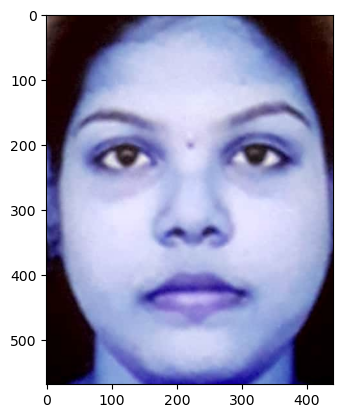

Predicted Image: 


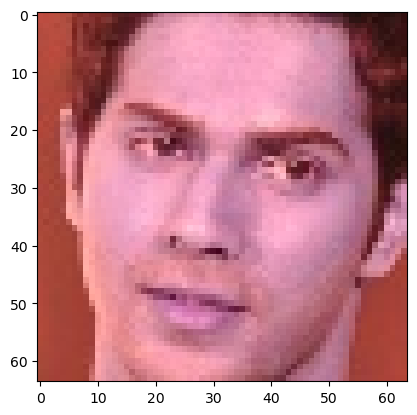

In [103]:
print("Uploaded Image: ")
pyplot.imshow(face)
pyplot.show()

print('Predicted Image: ')
pyplot.imshow(predicted_img)
pyplot.show()

In [64]:
f_list = [
    [0.1, 0.2, 0.3, 0.4, 0.5],
    [0.5, 0.4, 0.3, 0.2, 0.1],
    # Add more feature lists as needed
]

In [66]:
print(np.array(f_list).reshape(1,-1))

[[0.1 0.2 0.3 0.4 0.5 0.5 0.4 0.3 0.2 0.1]]


In [119]:
x="Bollywood_celeb_face_localized\bollywood_celeb_faces_0\Aamir_Khan\Aamir.68.jpg"
print(" ".join(x.split("\\")[1].split("_")))

Aamir Khan


In [1]:
x="Bollywood_celeb_face_localized/bollywood_celeb_faces_0"
print(" ".join(x.split("/")[1].split("_")))

bollywood celeb faces 0
